# Descripción del dataset

Usando el conjunto de datos de [food-101](https://www.kaggle.com/datasets/dansbecker/food-101) que nos presenta un archivo comprimido con miles de imágenes de comidas comunes.

Por el cual procedemos a mostrar por medio de un *Dataframe* de la librería **pandas** los labels existentes en nuestro dataset.

Posteriormente, en el siguiente apartado se quiere buscar la dirección de la imágen según el orden de los directorios que se manejan de la siguiente forma ***Comida*/*número del archivo***. Se busca tomar los primeros 2 una vez que se haya usado el método *shuffle* que busca reordenar el arreglo de forma aleatoria, para de esta forma mostrar algunas de las imágenes existentes, si se desea poder ver más imágenes se puede volver a correr los correspondientes bloques de código. 


In [1]:
# Declaración de algunos de los paquetes que se estarán utilizando dentro de este archivo
import time, cv2, os # type: ignore
import pandas as pd # type: ignore
from random import shuffle
from matplotlib import pyplot as plt # type: ignore
# from sklearn.model_selection import ShuffleSplit # Función para reordenar los datos de entrenamiento, haciendo dos conjuntos para entrenamiento y pruebas para asegurarse que el modelo esté siendo entrenado de la manera correcta. 

In [2]:
PATH = "../../dataset/food-101/food-101/meta/labels.txt"
LABELS = []
print("Extracting labels...")
time.sleep(2)

with open(PATH, "r") as labels:
    for line in labels:
        LABELS.append(line[:-1])

df_labels = pd.DataFrame(data=LABELS, columns=["Labels"])
df_labels

Extracting labels...


,Labels
0,Apple pie
1,Baby back ribs
2,Baklava
3,Beef carpaccio
4,Beef tartare
...,...
96,Tacos
97,Takoyaki
98,Tiramisu
99,Tuna tartare


In [3]:
PATH = "../../dataset/food-101/food-101/meta/test.txt"
IMG_NAMES = []
print("Extracting data for show images...")
time.sleep(2)

with open(PATH, "r") as train: 
    for line in train:
        IMG_NAMES.append(line[:-1])
    shuffle(IMG_NAMES)
    IMG_NAMES_COPY = IMG_NAMES[:2]

df_img_names = pd.DataFrame(columns=["Name","Label"])
for name in IMG_NAMES:
    new_row = pd.DataFrame(data=[[name.split("/")[1], name.split("/")[0]]], columns=["Name","Label"])
    df_img_names = pd.concat([df_img_names, new_row]).reset_index(drop=True)
df_img_names        

Extracting data for show images...


,Name,Label
0,278360,mussels
1,1297812,red_velvet_cake
2,1393708,falafel
3,68382,miso_soup
4,926416,sushi
...,...,...
25245,522224,bread_pudding
25246,154376,pork_chop
25247,1087611,gnocchi
25248,1479375,guacamole


## Extracción de las imagenes

Por medio de la extracción del nombre de las imágenes en el proceso anterior las pasamos por la función *imread* de la librería *cv2* que nos permitirá leer las imágenes y tenerlas en un arreglo para su posterior presentación con la librería **matplotlib**

In [4]:
images = [cv2.imread(f'/home/jonasaray/Workspace/NutricionAI/nutricionBackend/dataset/food-101/food-101/images/{img}.jpg') for img in IMG_NAMES_COPY]

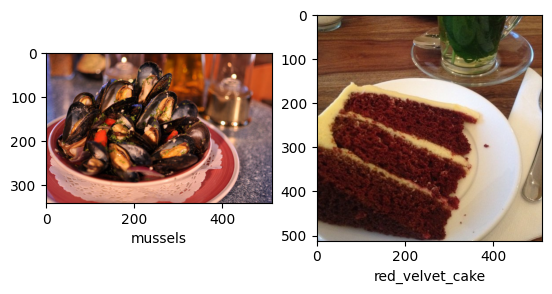

In [5]:
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(images[0], cv2.COLOR_BGR2RGB))
plt.xlabel(IMG_NAMES[0].split("/")[0])
plt.margins(y=10)

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(images[1], cv2.COLOR_BGR2RGB))
plt.xlabel(IMG_NAMES[1].split("/")[0])

plt.show()

del images
del IMG_NAMES_COPY

# Vista minable

A partir del preview anterior tenemos una idea del proceso del cuál será parte la extracción de los datos para el modelo que se desea entrenar. Tomamos el mismo proceso anterior pero apartando 1000 imágenes que serán tomadas como imágenes de entrenamiento y prueba del modelo basado en las etiquetas que se tomen primero que serán guardadas en un archivo aparte para poder usarlas posteriormente.

In [6]:
PATH = "../../dataset/food-101/food-101/meta/test.txt"
IMG_NAMES = []
print("Extracting data...")
time.sleep(2)

with open(PATH, "r") as train: 
    for line in train:
        IMG_NAMES.append(line[:-1])
    shuffle(IMG_NAMES)
    IMG_NAMES = IMG_NAMES[:1500]

df_img_names = pd.DataFrame(columns=["Name","Label"])
for name in IMG_NAMES:
    new_row = pd.DataFrame(data=[[name.split("/")[1], name.split("/")[0]]], columns=["Name","Label"])
    df_img_names = pd.concat([df_img_names, new_row]).reset_index(drop=True)

del IMG_NAMES
del new_row

df_img_names["Label"].unique()

Extracting data...


array(['pork_chop', 'caesar_salad', 'hot_dog', 'huevos_rancheros',
       'lobster_roll_sandwich', 'baby_back_ribs', 'french_onion_soup',
       'chicken_quesadilla', 'hummus', 'greek_salad',
       'grilled_cheese_sandwich', 'ice_cream', 'beignets',
       'beef_carpaccio', 'guacamole', 'escargots', 'bread_pudding',
       'paella', 'churros', 'macarons', 'ceviche', 'cannoli', 'ramen',
       'bruschetta', 'baklava', 'filet_mignon', 'scallops', 'foie_gras',
       'nachos', 'club_sandwich', 'deviled_eggs', 'bibimbap',
       'peking_duck', 'eggs_benedict', 'panna_cotta', 'seaweed_salad',
       'dumplings', 'shrimp_and_grits', 'frozen_yogurt', 'crab_cakes',
       'carrot_cake', 'miso_soup', 'hot_and_sour_soup', 'donuts',
       'poutine', 'spaghetti_carbonara', 'mussels', 'tacos', 'samosa',
       'tuna_tartare', 'sashimi', 'macaroni_and_cheese', 'pad_thai',
       'breakfast_burrito', 'chicken_wings', 'tiramisu', 'hamburger',
       'grilled_salmon', 'chocolate_mousse', 'falafel', '

In [7]:
os.makedirs('../../dataset/vista_minable/meta', exist_ok=True)
df_img_names.to_csv('../../dataset/vista_minable/meta/train_test_labels.csv', encoding='utf-8', index=False)
del df_img_names
del df_labels

## Procesamiento de las imagenes para entrenamiento

Una vez procesada la información de las imágenes que serán usadas para el entrenamiento del modelo procedemos a identificar las imágenes con un algoritmo que nos permite redimencionarlas para que sea más fácil para el modelo identificar las diferencias entre las mismas para de esta forma clasificarlas. Utilizaremos los siguientes pasos

1. Sacar la información guardada en el archivo de la vista minable.
2. Pasar cada imagen por la función resize de nuestra librería para asegurarnos que la misma tenga el formato deseado (28x28).
3. Bajo un esquema similar al de la extracción de imágenes que se muestra con anterioridad pero con las 1000 imágenes que fueron apartadas.

In [8]:
df_img = pd.read_csv('../../dataset/vista_minable/meta/train_test_labels.csv')
df_img

,Name,Label
0,346088,pork_chop
1,2269300,caesar_salad
2,3552463,hot_dog
3,2092011,huevos_rancheros
4,2044369,lobster_roll_sandwich
...,...,...
1495,2113478,apple_pie
1496,1093582,ravioli
1497,99109,creme_brulee
1498,191486,mussels


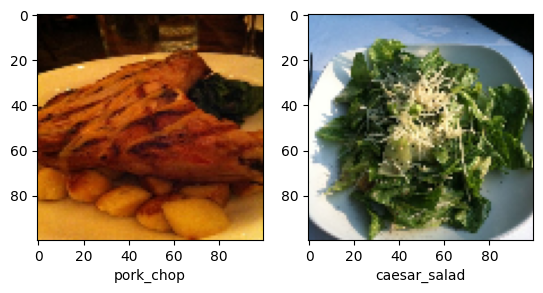

In [22]:
images_training = [cv2.imread(f'/home/jonasaray/Workspace/NutricionAI/nutricionBackend/dataset/food-101/food-101/images/{label}/{name}.jpg') for name, label in df_img.values]

images_training = [cv2.resize(img, (100, 100)) for img in images_training]

plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(images_training[0], cv2.COLOR_BGR2RGB))
plt.xlabel(df_img.values[0][1])
plt.margins(y=10)

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(images_training[1], cv2.COLOR_BGR2RGB))
plt.xlabel(df_img.values[1][1])

plt.show()

## Diseño del modelo

Se busca con el mismo poder analizar imágenes, ya sea provenientes del módulo de la aplicación así como dentro de las pruebas internas para asegurar que el modelo fue entrenado de manera adecuada. Se busca utilizar las siguientes capas para este modelo, cómo lo son:

* *Conv2D*: capa encargada de analizar la imagen por medio de una mátriz o kernel que busca identificar las características más relevantes de la misma. Entendiendo que mientras más capas existan dentro de la jerarquía puede analizar características mucho más complejas de la imagen en cuestión.
* *MaxPooling2D*: Reduce el tamaño del mapa generado por la capa anterior para de esta manera preservar las características más relevantes de los datos suministrados.
* *Flatten*: permite moldear los datos a un arreglo lineal para posterior análisis dependiendo de los datos que se tengan producto de las capas anteriores.
* *Dense*: las capas densas son la forma más básica dentro de los modelos que permiten realizar cálculos con respecto a los valores previamente presentados con su respectiva capa de activación, para este caso se va a usar *ReLU* para el análisis preliminar antes de brindar una respuesta definitiva usando la capa *softmax*.

In [10]:
import tensorflow # type: ignore
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout # type: ignore
from tensorflow.keras.metrics import SparseCategoricalAccuracy # type: ignore
from tensorflow.keras.losses import SparseCategoricalCrossentropy # type: ignore

2024-12-16 10:35:00.258128: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-16 10:35:00.385286: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-16 10:35:00.429460: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734359700.509716   10676 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734359700.524544   10676 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-16 10:35:00.672138: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [25]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1), padding='same'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.03),
    Dense(512, activation='relu'),
    Dropout(0.03),
    Dense(df_img["Label"].nunique(), activation='softmax') 
])

model.compile(loss=SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=[SparseCategoricalAccuracy()])

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 100, 100, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 80000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 512)            │    40,960,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 101)            │        51,813 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,275,301 (157.45 MB)

 Trainable params: 41,275,301 (157.45 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
labels = df_img["Label"].values[:1200].tolist()
labels

['pork_chop',
 'caesar_salad',
 'hot_dog',
 'huevos_rancheros',
 'lobster_roll_sandwich',
 'baby_back_ribs',
 'french_onion_soup',
 'chicken_quesadilla',
 'lobster_roll_sandwich',
 'hummus',
 'greek_salad',
 'greek_salad',
 'grilled_cheese_sandwich',
 'ice_cream',
 'beignets',
 'beef_carpaccio',
 'guacamole',
 'escargots',
 'bread_pudding',
 'paella',
 'bread_pudding',
 'churros',
 'macarons',
 'beef_carpaccio',
 'ceviche',
 'cannoli',
 'ramen',
 'beignets',
 'bruschetta',
 'baklava',
 'filet_mignon',
 'scallops',
 'foie_gras',
 'nachos',
 'baby_back_ribs',
 'club_sandwich',
 'deviled_eggs',
 'beef_carpaccio',
 'ceviche',
 'bibimbap',
 'peking_duck',
 'bread_pudding',
 'eggs_benedict',
 'baby_back_ribs',
 'bruschetta',
 'panna_cotta',
 'macarons',
 'seaweed_salad',
 'dumplings',
 'lobster_roll_sandwich',
 'shrimp_and_grits',
 'frozen_yogurt',
 'crab_cakes',
 'bread_pudding',
 'carrot_cake',
 'miso_soup',
 'hot_and_sour_soup',
 'guacamole',
 'donuts',
 'crab_cakes',
 'seaweed_salad',
 '

In [40]:
model.fit(images_training[:1200], labels,epochs=10)

ValueError: Unrecognized data type: x=[array([[[  4,   4,  17],
        [  0,   1,   2],
        [  2,   7,   6],
        ...,
        [ 45,  85, 130],
        [ 27,  81, 136],
        [ 35,  81, 138]],

       [[  2,   3,  12],
        [  0,   0,   4],
        [  2,   5,   6],
        ...,
        [ 46,  92, 140],
        [ 36,  97, 153],
        [ 31,  93, 148]],

       [[  1,   4,   9],
        [  1,   3,   7],
        [  2,   5,   9],
        ...,
        [ 43, 103, 152],
        [ 34, 105, 160],
        [ 31, 101, 154]],

       ...,

       [[ 51, 163, 229],
        [ 52, 162, 230],
        [ 51, 158, 229],
        ...,
        [103, 211, 245],
        [108, 211, 246],
        [100, 214, 247]],

       [[ 58, 171, 237],
        [ 46, 162, 229],
        [ 52, 165, 233],
        ...,
        [105, 213, 248],
        [100, 214, 248],
        [ 94, 220, 251]],

       [[ 45, 173, 238],
        [ 65, 175, 243],
        [ 63, 162, 230],
        ...,
        [123, 216, 247],
        [126, 225, 254],
        [114, 220, 248]]], dtype=uint8), array([[[221, 174, 130],
        [215, 168, 124],
        [215, 167, 125],
        ...,
        [  2,   5,   3],
        [  1,   4,   2],
        [  3,   6,   4]],

       [[216, 169, 125],
        [214, 166, 124],
        [215, 166, 126],
        ...,
        [  0,   1,   0],
        [  3,   6,   4],
        [  1,   4,   2]],

       [[217, 169, 127],
        [215, 166, 126],
        [212, 163, 123],
        ...,
        [  0,   3,   1],
        [  0,   3,   1],
        [  0,   3,   1]],

       ...,

       [[ 91,  71,  54],
        [ 91,  70,  56],
        [ 86,  66,  55],
        ...,
        [250, 245, 246],
        [246, 240, 241],
        [242, 236, 237]],

       [[ 96,  74,  56],
        [ 91,  71,  54],
        [ 90,  69,  56],
        ...,
        [248, 242, 243],
        [244, 238, 239],
        [246, 238, 239]],

       [[101,  77,  57],
        [ 96,  73,  57],
        [ 95,  74,  59],
        ...,
        [246, 240, 241],
        [246, 238, 239],
        [248, 237, 239]]], dtype=uint8), array([[[229, 228, 219],
        [241, 243, 238],
        [254, 254, 250],
        ...,
        [118, 116, 115],
        [124, 120, 119],
        [121, 125, 121]],

       [[237, 240, 231],
        [244, 251, 246],
        [237, 244, 238],
        ...,
        [141, 141, 134],
        [111, 109, 107],
        [123, 124, 124]],

       [[231, 223, 216],
        [251, 249, 248],
        [242, 243, 239],
        ...,
        [129, 127, 119],
        [162, 163, 160],
        [128, 127, 129]],

       ...,

       [[249, 253, 248],
        [195, 196, 189],
        [223, 229, 212],
        ...,
        [129, 135, 146],
        [ 94, 102, 115],
        [ 92, 101, 116]],

       [[226, 223, 216],
        [200, 198, 184],
        [201, 203, 187],
        ...,
        [112, 122, 132],
        [107, 117, 127],
        [135, 145, 156]],

       [[200, 193, 175],
        [174, 167, 146],
        [197, 192, 178],
        ...,
        [111, 121, 131],
        [134, 144, 152],
        [134, 143, 152]]], dtype=uint8), array([[[ 70,  82, 142],
        [ 75,  92, 145],
        [ 67,  55, 108],
        ...,
        [ 65,  60,  92],
        [ 63,  56,  83],
        [ 73,  59,  86]],

       [[ 73, 139, 172],
        [ 63,  97, 140],
        [ 59,  51, 106],
        ...,
        [ 52,  45,  80],
        [ 72,  62, 104],
        [ 82,  75,  90]],

       [[ 81, 109, 163],
        [ 57,  68, 120],
        [ 81,  97, 146],
        ...,
        [ 38,  31,  67],
        [ 46,  40,  74],
        [ 52,  45,  73]],

       ...,

       [[ 39,  30,  47],
        [ 36,  30,  57],
        [ 46,  30,  58],
        ...,
        [ 24,  19,  26],
        [ 28,  25,  33],
        [ 30,  26,  37]],

       [[ 37,  31,  50],
        [ 35,  30,  49],
        [ 32,  24,  58],
        ...,
        [ 35,  27,  37],
        [ 27,  22,  28],
        [ 29,  24,  35]],

       [[ 33,  31,  60],
        [ 40,  29,  41],
        [ 41,  26,  62],
        ...,
        [ 30,  21,  31],
        [ 29,  24,  27],
        [ 27,  21,  32]]], dtype=uint8), array([[[193, 214, 242],
        [178, 198, 223],
        [174, 194, 212],
        ...,
        [122, 161, 200],
        [125, 164, 203],
        [122, 161, 200]],

       [[167, 181, 209],
        [166, 180, 205],
        [172, 185, 208],
        ...,
        [135, 167, 206],
        [130, 163, 202],
        [129, 162, 201]],

       [[164, 179, 205],
        [168, 181, 207],
        [168, 180, 204],
        ...,
        [137, 171, 207],
        [134, 167, 203],
        [136, 170, 206]],

       ...,

       [[236, 236, 222],
        [239, 239, 225],
        [237, 236, 226],
        ...,
        [220, 230, 230],
        [217, 229, 229],
        [215, 228, 228]],

       [[239, 236, 228],
        [232, 234, 224],
        [224, 232, 221],
        ...,
        [214, 226, 228],
        [214, 227, 229],
        [210, 225, 227]],

       [[216, 220, 214],
        [222, 226, 220],
        [222, 228, 217],
        ...,
        [212, 227, 230],
        [212, 228, 231],
        [208, 225, 228]]], dtype=uint8), array([[[  0,   9,  16],
        [ 10,  23,  39],
        [ 10,  25,  47],
        ...,
        [157, 171, 183],
        [147, 162, 171],
        [138, 155, 164]],

       [[  1,  17,  25],
        [ 12,  31,  48],
        [ 18,  42,  61],
        ...,
        [165, 181, 188],
        [151, 169, 176],
        [140, 159, 167]],

       [[ 11,  27,  34],
        [  4,  21,  34],
        [129, 155, 168],
        ...,
        [167, 187, 188],
        [159, 179, 184],
        [144, 163, 170]],

       ...,

       [[119, 140, 148],
        [128, 149, 157],
        [140, 162, 168],
        ...,
        [  0,   5,  10],
        [  1,   4,  10],
        [  3,   5,   6]],

       [[110, 131, 143],
        [120, 141, 152],
        [131, 154, 162],
        ...,
        [  6,   5,  13],
        [  2,   2,  11],
        [  1,   4,   8]],

       [[ 97, 118, 133],
        [110, 131, 145],
        [118, 140, 152],
        ...,
        [  0,   3,  11],
        [  1,   6,  15],
        [  0,   9,  13]]], dtype=uint8), array([[[104, 114, 121],
        [116, 120, 125],
        [245, 243, 232],
        ...,
        [  4,  20,  56],
        [  9,  24,  57],
        [  8,  18,  52]],

       [[ 97, 107, 119],
        [110, 116, 122],
        [246, 242, 236],
        ...,
        [  6,  21,  53],
        [ 10,  23,  51],
        [  2,  13,  40]],

       [[100, 108, 120],
        [101, 113, 120],
        [166, 172, 179],
        ...,
        [ 11,  29,  69],
        [  2,  19,  55],
        [  1,  16,  46]],

       ...,

       [[243, 245, 239],
        [242, 244, 238],
        [242, 244, 238],
        ...,
        [204, 213, 210],
        [203, 213, 209],
        [202, 211, 208]],

       [[242, 244, 238],
        [242, 244, 238],
        [243, 245, 239],
        ...,
        [203, 213, 210],
        [202, 212, 209],
        [203, 212, 209]],

       [[244, 246, 240],
        [242, 244, 238],
        [242, 244, 238],
        ...,
        [205, 214, 211],
        [203, 212, 209],
        [203, 212, 209]]], dtype=uint8), array([[[137, 134, 129],
        [145, 139, 132],
        [107, 106,  96],
        ...,
        [ 57,  70, 114],
        [ 51,  65, 107],
        [ 52,  64, 104]],

       [[142, 139, 134],
        [144, 138, 132],
        [134, 132, 123],
        ...,
        [ 48,  63, 103],
        [ 49,  63, 105],
        [ 50,  62, 104]],

       [[ 98,  95,  90],
        [139, 133, 128],
        [130, 128, 120],
        ...,
        [ 45,  60,  97],
        [ 48,  63, 104],
        [ 50,  62, 105]],

       ...,

       [[ 46,  67,  88],
        [ 40,  64,  84],
        [ 34,  58,  78],
        ...,
        [118, 122, 151],
        [101, 106, 139],
        [ 95, 101, 136]],

       [[ 37,  55,  78],
        [ 29,  50,  72],
        [ 40,  60,  81],
        ...,
        [104, 107, 138],
        [107, 111, 144],
        [114, 119, 153]],

       [[ 41,  54,  80],
        [ 37,  53,  76],
        [ 36,  53,  74],
        ...,
        [ 88,  91, 122],
        [112, 115, 146],
        [117, 122, 153]]], dtype=uint8), array([[[150, 111, 126],
        [145, 106, 121],
        [151, 114, 126],
        ...,
        [ 65, 118, 208],
        [ 58, 131, 212],
        [118, 178, 234]],

       [[142, 106, 122],
        [147, 111, 125],
        [151, 111, 123],
        ...,
        [ 35,  88, 178],
        [ 49,  99, 196],
        [ 55, 122, 208]],

       [[140, 108, 125],
        [147, 111, 127],
        [149, 108, 123],
        ...,
        [ 73, 127, 199],
        [ 53, 106, 188],
        [ 48, 106, 190]],

       ...,

       [[115, 102, 116],
        [120, 106, 118],
        [122, 105, 116],
        ...,
        [  6,  32,  88],
        [  6,  42, 104],
        [ 18,  68, 130]],

       [[117, 104, 118],
        [121, 104, 121],
        [120, 103, 114],
        ...,
        [  1,  36,  92],
        [  9,  54, 114],
        [ 35,  84, 142]],

       [[115, 102, 116],
        [121, 103, 124],
        [126, 108, 122],
        ...,
        [  3,  51, 107],
        [ 19,  72, 133],
        [ 43,  92, 148]]], dtype=uint8), array([[[ 60,  60,  51],
        [ 72,  69,  68],
        [ 79,  74,  71],
        ...,
        [ 82,  83,  52],
        [ 64,  63,  30],
        [ 72,  60,  28]],

       [[ 55,  47,  34],
        [ 76,  69,  68],
        [ 78,  75,  70],
        ...,
        [ 49,  49,  16],
        [ 68,  65,  31],
        [ 69,  59,  25]],

       [[ 41,  31,  15],
        [ 72,  63,  59],
        [ 76,  73,  68],
        ...,
        [ 85,  80,  49],
        [ 50,  45,  12],
        [ 73,  61,  27]],

       ...,

       [[ 47,  63,  62],
        [ 57,  72,  71],
        [ 50,  62,  62],
        ...,
        [108, 107,  97],
        [119, 121, 107],
        [119, 121, 109]],

       [[ 38,  54,  53],
        [ 48,  64,  63],
        [ 53,  69,  68],
        ...,
        [101, 101,  92],
        [120, 122, 110],
        [117, 121, 110]],

       [[ 50,  66,  65],
        [ 48,  64,  63],
        [ 33,  51,  50],
        ...,
        [103, 104,  95],
        [120, 123, 111],
        [109, 113, 102]]], dtype=uint8), array([[[ 12,   8,   7],
        [ 12,   8,   7],
        [ 15,   9,  10],
        ...,
        [ 61,  54,  57],
        [ 65,  64,  68],
        [ 39,  34,  36]],

       [[ 13,   9,   8],
        [ 13,   9,   8],
        [ 15,   9,  10],
        ...,
        [ 25,  18,  21],
        [ 34,  29,  30],
        [ 36,  31,  33]],

       [[ 13,   9,   8],
        [ 13,   9,   8],
        [ 13,   7,   8],
        ...,
        [ 32,  26,  28],
        [ 93,  84,  80],
        [ 35,  30,  32]],

       ...,

       [[ 86, 114, 128],
        [ 59,  92, 119],
        [ 75, 107, 132],
        ...,
        [ 90, 117, 131],
        [ 91, 118, 132],
        [ 93, 119, 133]],

       [[102, 128, 140],
        [ 97, 121, 140],
        [ 65,  91, 108],
        ...,
        [ 91, 118, 132],
        [ 92, 118, 132],
        [ 91, 116, 130]],

       [[102, 129, 143],
        [103, 126, 141],
        [ 96, 121, 137],
        ...,
        [ 90, 118, 132],
        [ 93, 119, 133],
        [ 92, 118, 132]]], dtype=uint8), array([[[113, 143, 154],
        [106, 142, 150],
        [108, 144, 150],
        ...,
        [122, 154, 174],
        [130, 163, 182],
        [134, 170, 188]],

       [[117, 145, 156],
        [105, 140, 149],
        [111, 145, 151],
        ...,
        [182, 232, 254],
        [182, 235, 255],
        [180, 235, 255]],

       [[115, 142, 153],
        [114, 146, 155],
        [118, 150, 156],
        ...,
        [187, 238, 254],
        [186, 238, 254],
        [184, 237, 253]],

       ...,

       [[ 14,  10,  15],
        [ 12,  11,  15],
        [  6,   9,  13],
        ...,
        [ 47,  67,  65],
        [ 74, 101, 103],
        [ 73, 102, 107]],

       [[  8,  11,  12],
        [  9,  11,  12],
        [  9,  11,  12],
        ...,
        [ 63,  88,  82],
        [ 96, 125, 122],
        [ 89, 113, 115]],

       [[  8,  13,  14],
        [  7,  11,  13],
        [  9,  11,  12],
        ...,
        [ 77, 102, 106],
        [ 53,  80,  77],
        [ 62,  85,  81]]], dtype=uint8), array([[[179, 228, 251],
        [164, 222, 255],
        [161, 229, 253],
        ...,
        [113, 162, 206],
        [114, 164, 206],
        [115, 165, 207]],

       [[159, 204, 242],
        [147, 201, 242],
        [150, 215, 243],
        ...,
        [115, 164, 208],
        [114, 164, 206],
        [116, 166, 208]],

       [[160, 202, 249],
        [151, 201, 248],
        [142, 202, 238],
        ...,
        [114, 163, 207],
        [115, 165, 207],
        [117, 167, 209]],

       ...,

       [[141, 192, 248],
        [132, 197, 250],
        [134, 196, 250],
        ...,
        [ 65, 100, 126],
        [ 65, 101, 125],
        [ 65, 101, 125]],

       [[140, 192, 246],
        [130, 195, 247],
        [132, 195, 246],
        ...,
        [ 67, 102, 128],
        [ 66, 102, 126],
        [ 69, 105, 129]],

       [[141, 193, 246],
        [130, 196, 246],
        [131, 194, 245],
        ...,
        [ 69, 104, 130],
        [ 72, 107, 132],
        [ 69, 105, 129]]], dtype=uint8), array([[[138, 182, 216],
        [169, 204, 227],
        [164, 198, 227],
        ...,
        [  1, 118, 155],
        [  2, 120, 149],
        [  9, 117, 135]],

       [[214, 212, 219],
        [242, 237, 239],
        [241, 235, 240],
        ...,
        [  1, 125, 159],
        [  6, 117, 135],
        [ 14, 105, 105]],

       [[248, 241, 238],
        [254, 250, 249],
        [253, 251, 250],
        ...,
        [  6, 125, 151],
        [ 12, 105, 108],
        [ 27,  88,  64]],

       ...,

       [[ 10,  21,  63],
        [  8,  18,  66],
        [  7,  18,  70],
        ...,
        [ 52,  48,  83],
        [ 22,  25,  69],
        [ 20,  24,  86]],

       [[  1,  14,  62],
        [  2,  15,  66],
        [ 10,  22,  80],
        ...,
        [ 35,  32,  70],
        [ 22,  24,  81],
        [ 22,  30,  99]],

       [[  0,  14,  66],
        [  4,  17,  73],
        [ 13,  27,  86],
        ...,
        [ 22,  24,  71],
        [ 23,  26,  91],
        [ 22,  29, 102]]], dtype=uint8), array([[[107, 153, 187],
        [107, 157, 187],
        [104, 150, 184],
        ...,
        [ 22,  43,  70],
        [ 19,  40,  68],
        [ 16,  37,  65]],

       [[107, 151, 188],
        [110, 153, 186],
        [110, 154, 191],
        ...,
        [ 23,  44,  72],
        [ 23,  44,  72],
        [ 23,  44,  71]],

       [[111, 160, 196],
        [122, 164, 199],
        [ 96, 143, 179],
        ...,
        [ 27,  48,  79],
        [ 21,  44,  70],
        [ 22,  45,  70]],

       ...,

       [[ 10,  29,  85],
        [ 11,  26,  68],
        [ 12,  25,  67],
        ...,
        [ 15,  36,  74],
        [ 17,  38,  76],
        [ 16,  37,  75]],

       [[  2,  21,  78],
        [  8,  19,  61],
        [  9,  21,  60],
        ...,
        [ 16,  38,  74],
        [ 19,  41,  77],
        [ 19,  41,  77]],

       [[  2,  24,  80],
        [  8,  15,  55],
        [  5,  17,  53],
        ...,
        [ 19,  41,  76],
        [ 18,  40,  75],
        [ 20,  42,  77]]], dtype=uint8), array([[[ 42, 113, 157],
        [ 36, 110, 154],
        [ 32,  87, 142],
        ...,
        [ 52, 182, 235],
        [ 50, 181, 230],
        [ 61, 187, 235]],

       [[ 60, 112, 162],
        [ 30,  95, 144],
        [ 24,  77, 136],
        ...,
        [ 44, 179, 233],
        [ 51, 184, 235],
        [ 63, 185, 237]],

       [[  0,  20,  99],
        [ 24,  60, 131],
        [ 27,  55, 126],
        ...,
        [ 38, 171, 225],
        [ 47, 182, 236],
        [ 55, 187, 244]],

       ...,

       [[ 49,  65, 189],
        [ 10,  20, 162],
        [  6,  13, 161],
        ...,
        [ 18,  88, 183],
        [ 62, 140, 222],
        [ 76, 161, 231]],

       [[  4,  19, 141],
        [  3,  14, 148],
        [  2,  13, 147],
        ...,
        [ 79, 194, 237],
        [ 84, 193, 238],
        [ 88, 194, 237]],

       [[  5,  22, 142],
        [  4,  18, 148],
        [  9,  24, 149],
        ...,
        [ 70, 189, 228],
        [ 68, 182, 222],
        [ 72, 185, 225]]], dtype=uint8), array([[[251, 255, 255],
        [251, 255, 255],
        [251, 255, 255],
        ...,
        [199, 211, 199],
        [197, 213, 200],
        [218, 237, 240]],

       [[251, 255, 255],
        [251, 255, 255],
        [251, 255, 255],
        ...,
        [206, 219, 203],
        [206, 221, 212],
        [219, 238, 241]],

       [[251, 255, 255],
        [251, 255, 255],
        [251, 255, 255],
        ...,
        [208, 222, 203],
        [228, 241, 235],
        [227, 246, 251]],

       ...,

       [[234, 232, 214],
        [230, 225, 210],
        [236, 231, 209],
        ...,
        [ 91, 145, 216],
        [ 93, 145, 222],
        [ 93, 147, 224]],

       [[233, 230, 214],
        [227, 227, 211],
        [220, 218, 206],
        ...,
        [ 83, 142, 216],
        [ 79, 140, 219],
        [ 79, 138, 217]],

       [[245, 240, 237],
        [235, 234, 220],
        [239, 242, 230],
        ...,
        [ 79, 142, 218],
        [ 66, 134, 214],
        [ 64, 127, 208]]], dtype=uint8), array([[[ 27,  52,  78],
        [ 28,  50,  78],
        [ 30,  52,  80],
        ...,
        [123, 166, 182],
        [125, 163, 169],
        [128, 166, 178]],

       [[ 24,  45,  70],
        [ 21,  44,  70],
        [ 27,  49,  77],
        ...,
        [132, 167, 182],
        [134, 165, 176],
        [128, 161, 174]],

       [[ 25,  42,  68],
        [ 23,  43,  68],
        [ 21,  46,  72],
        ...,
        [126, 160, 174],
        [132, 163, 178],
        [128, 163, 176]],

       ...,

       [[ 57,  62,  60],
        [ 70,  71,  69],
        [ 61,  66,  61],
        ...,
        [163, 169, 157],
        [159, 161, 149],
        [159, 168, 155]],

       [[ 38,  50,  49],
        [ 58,  64,  59],
        [ 59,  63,  56],
        ...,
        [198, 205, 192],
        [166, 172, 159],
        [169, 171, 159]],

       [[ 27,  38,  36],
        [ 48,  55,  50],
        [ 52,  64,  52],
        ...,
        [160, 169, 156],
        [153, 163, 149],
        [170, 170, 158]]], dtype=uint8), array([[[ 21,  24,  42],
        [ 22,  29,  49],
        [ 24,  35,  61],
        ...,
        [149, 157, 147],
        [125, 132, 130],
        [ 63,  67,  82]],

       [[ 22,  29,  48],
        [ 20,  31,  54],
        [ 25,  37,  65],
        ...,
        [160, 164, 159],
        [ 74,  77,  81],
        [ 68,  69,  83]],

       [[ 21,  33,  57],
        [ 21,  35,  63],
        [ 23,  38,  71],
        ...,
        [136, 141, 141],
        [ 72,  73,  83],
        [ 67,  67,  80]],

       ...,

       [[ 60,  68,  85],
        [ 58,  64,  83],
        [ 61,  62,  77],
        ...,
        [ 42,  68, 105],
        [ 41,  67, 104],
        [ 42,  68, 108]],

       [[ 58,  67,  82],
        [ 57,  60,  79],
        [ 60,  60,  73],
        ...,
        [ 47,  72, 112],
        [ 40,  64, 101],
        [ 40,  64, 101]],

       [[ 56,  66,  79],
        [ 55,  60,  73],
        [ 59,  59,  67],
        ...,
        [ 38,  59, 100],
        [ 44,  64, 102],
        [ 42,  60,  97]]], dtype=uint8), array([[[ 15,  17,  27],
        [ 18,  20,  30],
        [ 16,  18,  28],
        ...,
        [139, 160, 161],
        [147, 168, 169],
        [154, 175, 176]],

       [[ 16,  18,  28],
        [ 16,  18,  28],
        [ 19,  21,  31],
        ...,
        [  4,  15,  19],
        [  7,  18,  22],
        [  8,  19,  23]],

       [[ 15,  17,  27],
        [ 16,  18,  28],
        [ 19,  21,  31],
        ...,
        [ 22,  26,  33],
        [ 26,  30,  38],
        [ 25,  29,  37]],

       ...,

       [[ 11,  55, 116],
        [ 33,  94, 151],
        [ 33,  96, 146],
        ...,
        [ 31, 161, 230],
        [ 57, 211, 252],
        [147, 231, 255]],

       [[  8,  70, 130],
        [ 19,  82, 142],
        [  5,  83, 141],
        ...,
        [ 60, 194, 237],
        [147, 229, 252],
        [218, 243, 250]],

       [[ 22,  90, 148],
        [ 82, 132, 183],
        [ 43, 113, 162],
        ...,
        [174, 233, 249],
        [225, 240, 246],
        [236, 243, 246]]], dtype=uint8), array([[[114, 134, 145],
        [121, 141, 152],
        [120, 140, 151],
        ...,
        [ 64,  88, 110],
        [ 65,  89, 110],
        [ 65,  88, 110]],

       [[118, 137, 149],
        [117, 136, 149],
        [120, 139, 152],
        ...,
        [ 61,  86, 108],
        [ 59,  84, 106],
        [ 56,  81, 102]],

       [[115, 137, 149],
        [123, 145, 157],
        [122, 144, 156],
        ...,
        [ 57,  81, 103],
        [ 56,  80, 100],
        [ 58,  80,  98]],

       ...,

       [[ 68,  89, 108],
        [ 65,  87, 105],
        [ 58,  80,  98],
        ...,
        [ 46,  63,  82],
        [ 47,  66,  87],
        [ 44,  68,  88]],

       [[ 85, 110, 130],
        [ 82, 112, 131],
        [ 90, 115, 135],
        ...,
        [ 42,  64,  85],
        [ 37,  56,  77],
        [ 41,  58,  79]],

       [[ 88, 114, 131],
        [ 83, 107, 125],
        [ 60,  83, 101],
        ...,
        [ 29,  44,  63],
        [ 47,  66,  84],
        [ 41,  63,  81]]], dtype=uint8), array([[[ 52,  71, 255],
        [ 30,  45, 238],
        [ 27,  47, 243],
        ...,
        [110,  93, 244],
        [102,  99, 243],
        [ 92,  94, 242]],

       [[ 36,  52, 248],
        [ 19,  30, 235],
        [ 22,  34, 231],
        ...,
        [ 92,  88, 241],
        [ 87,  74, 229],
        [ 81,  87, 245]],

       [[ 35,  51, 246],
        [ 18,  31, 233],
        [ 47,  78, 191],
        ...,
        [ 58,  47, 218],
        [ 89,  77, 251],
        [ 70,  60, 231]],

       ...,

       [[156, 198, 227],
        [159, 203, 231],
        [160, 204, 233],
        ...,
        [233, 233, 240],
        [246, 249, 247],
        [243, 245, 244]],

       [[153, 201, 229],
        [152, 198, 227],
        [155, 199, 228],
        ...,
        [231, 231, 239],
        [232, 234, 238],
        [249, 251, 251]],

       [[145, 195, 223],
        [145, 193, 221],
        [156, 198, 227],
        ...,
        [230, 230, 239],
        [235, 234, 244],
        [240, 242, 242]]], dtype=uint8), array([[[ 38,  73, 163],
        [ 41,  74, 167],
        [ 40,  74, 168],
        ...,
        [ 35,  54, 105],
        [ 35,  50, 102],
        [ 34,  47,  99]],

       [[ 36,  67, 157],
        [ 34,  67, 157],
        [ 31,  65, 158],
        ...,
        [ 39,  60, 112],
        [ 38,  56, 107],
        [ 39,  55, 103]],

       [[ 31,  55, 145],
        [ 32,  58, 148],
        [ 33,  60, 151],
        ...,
        [ 45,  69, 123],
        [ 42,  65, 113],
        [ 39,  59, 106]],

       ...,

       [[103, 141, 183],
        [134, 172, 214],
        [151, 189, 231],
        ...,
        [ 86, 130, 171],
        [ 91, 135, 176],
        [ 87, 131, 172]],

       [[147, 184, 228],
        [151, 188, 231],
        [151, 188, 232],
        ...,
        [ 83, 127, 168],
        [ 85, 129, 170],
        [ 89, 133, 174]],

       [[149, 186, 230],
        [146, 183, 227],
        [146, 183, 227],
        ...,
        [ 80, 124, 165],
        [ 87, 131, 172],
        [ 88, 132, 173]]], dtype=uint8), array([[[ 0,  0,  0],
        [ 0,  1,  1],
        [ 0,  2,  2],
        ...,
        [ 7, 11, 12],
        [ 4,  8,  9],
        [ 7, 11, 12]],

       [[ 0,  1,  1],
        [ 0,  2,  2],
        [ 0,  2,  2],
        ...,
        [ 9, 13, 14],
        [ 9, 13, 14],
        [ 7, 11, 12]],

       [[ 0,  1,  1],
        [ 0,  1,  1],
        [ 0,  2,  2],
        ...,
        [ 8, 12, 20],
        [10, 14, 20],
        [ 8, 13, 17]],

       ...,

       [[ 3,  7,  8],
        [ 2,  6,  7],
        [ 1,  5,  6],
        ...,
        [28, 47, 70],
        [13, 19, 31],
        [ 4,  8,  9]],

       [[ 3,  7,  8],
        [ 3,  7,  8],
        [ 1,  5,  6],
        ...,
        [19, 31, 47],
        [ 0,  5,  9],
        [ 2,  6,  6]],

       [[ 1,  5,  7],
        [ 3,  7,  8],
        [ 0,  4,  5],
        ...,
        [ 0,  4, 10],
        [ 3,  5,  6],
        [ 0,  4,  4]]], dtype=uint8), array([[[111, 126, 136],
        [113, 125, 135],
        [110, 127, 137],
        ...,
        [140, 149, 159],
        [145, 152, 161],
        [145, 153, 160]],

       [[106, 129, 137],
        [111, 127, 136],
        [110, 127, 136],
        ...,
        [140, 149, 158],
        [141, 148, 157],
        [145, 153, 160]],

       [[104, 130, 137],
        [110, 128, 137],
        [113, 128, 137],
        ...,
        [137, 146, 156],
        [143, 150, 159],
        [145, 153, 160]],

       ...,

       [[159, 174, 176],
        [168, 177, 181],
        [169, 178, 181],
        ...,
        [129, 142, 150],
        [132, 143, 152],
        [137, 139, 150]],

       [[159, 174, 176],
        [166, 177, 179],
        [171, 179, 182],
        ...,
        [118, 132, 143],
        [119, 131, 143],
        [129, 134, 147]],

       [[162, 177, 179],
        [164, 177, 179],
        [171, 178, 181],
        ...,
        [111, 128, 139],
        [115, 132, 144],
        [123, 132, 145]]], dtype=uint8), array([[[123, 120, 129],
        [124, 122, 131],
        [125, 122, 131],
        ...,
        [  8,   6,   6],
        [  8,   6,   6],
        [  8,   6,   6]],

       [[127, 124, 133],
        [127, 124, 133],
        [127, 124, 133],
        ...,
        [  8,   6,   6],
        [  7,   5,   5],
        [  7,   5,   5]],

       [[128, 125, 134],
        [127, 124, 133],
        [129, 126, 135],
        ...,
        [  8,   6,   6],
        [  7,   5,   5],
        [  7,   5,   5]],

       ...,

       [[221, 216, 225],
        [221, 216, 225],
        [221, 216, 225],
        ...,
        [ 98,  95, 104],
        [ 96,  93, 102],
        [ 94,  91, 100]],

       [[219, 214, 223],
        [221, 216, 225],
        [222, 217, 226],
        ...,
        [ 98,  96, 102],
        [ 99,  97, 102],
        [ 93,  91,  97]],

       [[219, 214, 223],
        [218, 213, 222],
        [222, 217, 226],
        ...,
        [ 98,  94, 105],
        [ 95,  91, 102],
        [ 93,  89, 100]]], dtype=uint8), array([[[122, 171, 233],
        [122, 169, 231],
        [124, 171, 233],
        ...,
        [ 99, 135, 193],
        [ 64, 110, 174],
        [ 46,  87, 150]],

       [[118, 169, 232],
        [118, 166, 231],
        [117, 163, 227],
        ...,
        [100, 135, 188],
        [ 60, 105, 166],
        [ 55,  99, 160]],

       [[ 91, 140, 208],
        [ 92, 141, 209],
        [108, 155, 223],
        ...,
        [ 98, 132, 177],
        [ 67, 113, 169],
        [ 59, 103, 162]],

       ...,

       [[ 47,  70, 120],
        [ 86,  92, 116],
        [184, 197, 216],
        ...,
        [ 96, 130, 183],
        [ 92, 129, 179],
        [101, 141, 189]],

       [[ 47,  74, 128],
        [ 45,  72, 125],
        [ 51,  62,  94],
        ...,
        [ 96, 135, 187],
        [104, 142, 195],
        [ 95, 132, 184]],

       [[ 54,  80, 134],
        [ 35,  71, 123],
        [ 39,  69, 117],
        ...,
        [ 85, 126, 175],
        [ 95, 133, 186],
        [ 68, 103, 159]]], dtype=uint8), array([[[191, 188, 167],
        [192, 189, 169],
        [195, 192, 172],
        ...,
        [150, 153, 138],
        [151, 160, 147],
        [155, 171, 157]],

       [[191, 188, 167],
        [191, 188, 167],
        [193, 190, 169],
        ...,
        [152, 155, 140],
        [142, 150, 138],
        [149, 161, 147]],

       [[191, 188, 167],
        [192, 189, 168],
        [193, 190, 169],
        ...,
        [149, 154, 139],
        [149, 153, 141],
        [145, 152, 139]],

       ...,

       [[116, 115, 105],
        [138, 138, 126],
        [150, 150, 136],
        ...,
        [171, 173, 154],
        [133, 136, 123],
        [ 91,  90,  86]],

       [[137, 137, 125],
        [143, 143, 129],
        [151, 151, 137],
        ...,
        [154, 156, 136],
        [155, 159, 142],
        [ 90,  88,  85]],

       [[112, 112, 100],
        [141, 141, 127],
        [148, 149, 133],
        ...,
        [146, 148, 129],
        [147, 153, 131],
        [149, 150, 141]]], dtype=uint8), array([[[242, 247, 248],
        [225, 236, 240],
        [188, 214, 224],
        ...,
        [ 18,  31,  22],
        [ 30,  47,  32],
        [ 38,  63,  59]],

       [[240, 245, 247],
        [222, 234, 238],
        [188, 212, 223],
        ...,
        [ 16,  22,  17],
        [ 39,  57,  46],
        [ 25,  26,  11]],

       [[235, 239, 244],
        [227, 236, 240],
        [191, 213, 224],
        ...,
        [ 11,  28,  31],
        [ 47,  82,  63],
        [ 17,  13,  15]],

       ...,

       [[ 99, 110, 116],
        [ 89, 104, 102],
        [117, 133, 136],
        ...,
        [ 11,  11,  11],
        [ 12,  12,  12],
        [ 15,  15,  15]],

       [[ 99, 112, 121],
        [150, 167, 159],
        [ 99, 104, 106],
        ...,
        [ 12,  12,  12],
        [ 11,  12,   9],
        [ 13,  13,  13]],

       [[105, 108, 112],
        [ 81,  91,  93],
        [100, 122, 117],
        ...,
        [ 13,  13,  13],
        [ 10,  10,  10],
        [ 12,  13,  11]]], dtype=uint8), array([[[ 86, 116, 121],
        [ 86, 116, 121],
        [ 86, 116, 121],
        ...,
        [ 15,  51,  71],
        [ 38,  74,  81],
        [ 51,  99, 122]],

       [[ 86, 116, 121],
        [ 86, 115, 121],
        [ 85, 115, 120],
        ...,
        [ 22,  61,  77],
        [ 43,  83,  95],
        [ 58, 109, 134]],

       [[ 85, 115, 120],
        [ 84, 114, 119],
        [ 83, 113, 118],
        ...,
        [ 33,  69,  85],
        [ 50,  94, 111],
        [ 61, 115, 140]],

       ...,

       [[ 62, 125, 159],
        [ 64, 132, 163],
        [ 59, 130, 167],
        ...,
        [ 56,  84,  92],
        [ 21,  51,  63],
        [ 31,  68,  71]],

       [[ 53, 117, 155],
        [ 60, 129, 162],
        [ 56, 126, 163],
        ...,
        [143, 164, 150],
        [100, 122, 117],
        [ 33,  61,  78]],

       [[ 47, 113, 154],
        [ 55, 126, 160],
        [ 55, 126, 160],
        ...,
        [ 80, 131, 128],
        [154, 170, 159],
        [ 62, 107, 118]]], dtype=uint8), array([[[ 39,  38, 146],
        [ 42,  41, 138],
        [ 65,  68, 129],
        ...,
        [197, 185, 181],
        [198, 187, 180],
        [198, 186, 176]],

       [[ 49,  49, 152],
        [ 34,  37, 130],
        [ 96,  84, 136],
        ...,
        [194, 184, 180],
        [201, 187, 179],
        [199, 187, 177]],

       [[ 44,  51, 124],
        [111, 112, 147],
        [117, 113, 132],
        ...,
        [193, 188, 183],
        [208, 192, 185],
        [201, 189, 179]],

       ...,

       [[187, 171, 157],
        [187, 170, 157],
        [185, 169, 155],
        ...,
        [ 60,  58,  70],
        [ 17,  22,  33],
        [ 63,  73,  86]],

       [[191, 172, 157],
        [190, 171, 156],
        [186, 167, 152],
        ...,
        [ 30,  40,  50],
        [ 30,  39,  49],
        [ 46,  54,  67]],

       [[202, 181, 166],
        [200, 179, 164],
        [196, 175, 160],
        ...,
        [ 25,  29,  40],
        [ 55,  61,  72],
        [ 21,  29,  42]]], dtype=uint8), array([[[161, 214, 251],
        [161, 213, 250],
        [167, 216, 254],
        ...,
        [172, 222, 250],
        [180, 226, 253],
        [183, 223, 251]],

       [[159, 217, 253],
        [154, 212, 248],
        [162, 217, 254],
        ...,
        [174, 227, 255],
        [175, 224, 252],
        [181, 228, 254]],

       [[159, 217, 253],
        [156, 215, 251],
        [161, 216, 253],
        ...,
        [165, 220, 251],
        [169, 223, 253],
        [170, 225, 252]],

       ...,

       [[141, 212, 252],
        [136, 210, 249],
        [136, 213, 252],
        ...,
        [119, 191, 254],
        [114, 188, 252],
        [104, 181, 244]],

       [[134, 213, 252],
        [128, 209, 247],
        [127, 209, 247],
        ...,
        [118, 190, 254],
        [110, 184, 248],
        [105, 182, 245]],

       [[131, 212, 250],
        [133, 214, 252],
        [133, 212, 251],
        ...,
        [114, 186, 250],
        [113, 186, 250],
        [112, 189, 252]]], dtype=uint8), array([[[190, 167, 151],
        [187, 170, 151],
        [195, 170, 153],
        ...,
        [152, 130, 129],
        [188, 167, 163],
        [253, 250, 237]],

       [[189, 167, 156],
        [196, 174, 161],
        [196, 171, 157],
        ...,
        [160, 141, 138],
        [177, 156, 155],
        [185, 167, 161]],

       [[199, 180, 167],
        [203, 177, 163],
        [200, 177, 161],
        ...,
        [130, 120, 117],
        [143, 130, 132],
        [145, 125, 124]],

       ...,

       [[ 58,  60,  78],
        [ 53,  55,  73],
        [ 59,  59,  75],
        ...,
        [ 99,  85,  84],
        [ 95,  81,  83],
        [ 97,  80,  84]],

       [[ 51,  53,  71],
        [ 52,  54,  72],
        [ 55,  55,  70],
        ...,
        [ 93,  81,  81],
        [ 95,  81,  82],
        [ 92,  75,  78]],

       [[ 48,  50,  68],
        [ 49,  51,  69],
        [ 50,  50,  66],
        ...,
        [ 85,  76,  77],
        [ 84,  76,  76],
        [ 85,  75,  75]]], dtype=uint8), array([[[130, 108,  67],
        [155, 142, 104],
        [204, 193, 161],
        ...,
        [ 37,  33,  22],
        [ 49,  40,  27],
        [ 64,  57,  40]],

       [[ 91,  64,  27],
        [ 86,  64,  24],
        [ 91,  65,  25],
        ...,
        [ 43,  40,  26],
        [ 51,  44,  30],
        [ 69,  62,  47]],

       [[ 68,  47,  20],
        [ 72,  55,  28],
        [ 68,  51,  24],
        ...,
        [ 49,  46,  31],
        [ 48,  47,  33],
        [ 76,  68,  55]],

       ...,

       [[  3,   7,   2],
        [  2,   6,   1],
        [  2,   5,   1],
        ...,
        [  8,  14,  13],
        [ 16,  21,  21],
        [ 16,  27,  25]],

       [[  2,   6,   1],
        [  1,   5,   0],
        [  2,   6,   1],
        ...,
        [ 10,  20,  18],
        [ 18,  28,  26],
        [ 17,  26,  25]],

       [[  1,   5,   0],
        [  0,   4,   0],
        [  2,   6,   1],
        ...,
        [ 14,  27,  25],
        [ 12,  25,  23],
        [  8,  14,  13]]], dtype=uint8), array([[[ 29,  35,  46],
        [ 34,  39,  50],
        [ 36,  38,  49],
        ...,
        [ 41,  48,  63],
        [ 41,  51,  65],
        [ 43,  60,  73]],

       [[ 38,  44,  55],
        [ 36,  40,  51],
        [ 32,  36,  47],
        ...,
        [ 42,  49,  64],
        [ 44,  57,  71],
        [ 38,  54,  67]],

       [[ 35,  38,  49],
        [ 38,  43,  54],
        [ 31,  37,  48],
        ...,
        [ 49,  57,  72],
        [ 38,  55,  68],
        [ 43,  52,  66]],

       ...,

       [[114, 122, 129],
        [111, 117, 124],
        [115, 120, 129],
        ...,
        [ 10,   8,   7],
        [  7,   5,   4],
        [  8,   6,   5]],

       [[115, 119, 132],
        [110, 118, 127],
        [115, 119, 126],
        ...,
        [  9,   8,   8],
        [ 13,  10,  10],
        [ 14,  12,  12]],

       [[117, 122, 131],
        [113, 123, 133],
        [115, 116, 128],
        ...,
        [ 15,  12,  14],
        [ 14,  11,  13],
        [ 12,   9,  11]]], dtype=uint8), array([[[ 21,  24,  38],
        [  8,  10,  20],
        [ 13,  14,  18],
        ...,
        [252, 229, 181],
        [254, 230, 183],
        [253, 227, 180]],

       [[ 24,  26,  40],
        [ 15,  16,  26],
        [ 10,  11,  15],
        ...,
        [252, 229, 182],
        [255, 229, 182],
        [252, 227, 180]],

       [[ 24,  25,  39],
        [ 19,  18,  28],
        [ 14,  13,  17],
        ...,
        [253, 229, 183],
        [253, 228, 181],
        [255, 229, 183]],

       ...,

       [[164, 121,  96],
        [162, 119,  97],
        [164, 121, 102],
        ...,
        [163, 119, 102],
        [161, 120, 105],
        [166, 121, 108]],

       [[123,  83,  68],
        [120,  82,  68],
        [116,  79,  65],
        ...,
        [166, 126, 108],
        [168, 125, 107],
        [169, 125, 109]],

       [[118,  85,  70],
        [115,  84,  69],
        [113,  84,  69],
        ...,
        [149, 111,  93],
        [175, 129, 111],
        [175, 132, 111]]], dtype=uint8), array([[[ 24,  30,  49],
        [ 31,  35,  59],
        [ 35,  40,  65],
        ...,
        [132, 131, 135],
        [130, 130, 136],
        [136, 129, 136]],

       [[ 26,  32,  51],
        [ 30,  34,  58],
        [ 35,  40,  65],
        ...,
        [136, 132, 138],
        [135, 132, 137],
        [143, 136, 141]],

       [[ 28,  34,  53],
        [ 30,  34,  58],
        [ 35,  40,  65],
        ...,
        [146, 136, 146],
        [145, 139, 145],
        [153, 142, 146]],

       ...,

       [[ 10,   8,   7],
        [ 12,  10,   8],
        [ 10,   9,   5],
        ...,
        [  8,   6,   5],
        [ 10,   8,   7],
        [  9,   7,   6]],

       [[ 13,  12,  10],
        [ 12,  10,   9],
        [ 17,  16,  12],
        ...,
        [  9,   7,   6],
        [  8,   6,   5],
        [  9,   7,   6]],

       [[ 13,  11,  10],
        [ 13,  11,  10],
        [ 11,  10,   6],
        ...,
        [  8,   6,   5],
        [  8,   6,   5],
        [  9,   7,   6]]], dtype=uint8), array([[[ 75,  75,  94],
        [ 90,  82,  97],
        [ 90,  80,  96],
        ...,
        [247, 228, 215],
        [247, 227, 216],
        [247, 227, 216]],

       [[ 91,  89, 108],
        [ 93,  86,  99],
        [ 93,  84,  97],
        ...,
        [250, 233, 220],
        [250, 232, 220],
        [248, 230, 218]],

       [[ 97,  94, 110],
        [ 99,  90, 102],
        [ 98,  88, 100],
        ...,
        [254, 237, 224],
        [252, 235, 223],
        [249, 231, 220]],

       ...,

       [[245, 239, 232],
        [245, 239, 232],
        [244, 238, 231],
        ...,
        [253, 252, 237],
        [254, 251, 238],
        [194, 210, 209]],

       [[245, 240, 232],
        [244, 239, 230],
        [242, 237, 229],
        ...,
        [251, 244, 233],
        [253, 253, 239],
        [253, 250, 239]],

       [[244, 239, 230],
        [244, 239, 230],
        [244, 239, 230],
        ...,
        [253, 250, 235],
        [254, 254, 240],
        [254, 255, 239]]], dtype=uint8), array([[[ 25,  77,  93],
        [  8,  61,  78],
        [  8,  59,  72],
        ...,
        [ 50, 107, 132],
        [ 73, 137, 162],
        [ 52, 103, 126]],

       [[ 11,  54,  69],
        [ 17,  55,  70],
        [ 31,  73,  86],
        ...,
        [ 82, 141, 165],
        [119, 185, 210],
        [ 63, 121, 143]],

       [[ 36,  86,  99],
        [ 26,  69,  86],
        [ 17,  68,  86],
        ...,
        [116, 171, 196],
        [ 38,  97, 123],
        [129, 187, 209]],

       ...,

       [[  0,   5,   8],
        [  0,   5,   8],
        [  0,   5,   8],
        ...,
        [  2,   6,  11],
        [  0,   4,   9],
        [  0,   4,   9]],

       [[  0,   4,   5],
        [  0,   3,   4],
        [  0,   2,   3],
        ...,
        [  2,   7,  10],
        [  0,   5,   8],
        [  0,   4,   7]],

       [[  1,   5,   6],
        [  0,   3,   5],
        [  0,   2,   3],
        ...,
        [  0,   5,   8],
        [  1,   6,   9],
        [  0,   5,   8]]], dtype=uint8), array([[[250, 255, 239],
        [255, 253, 240],
        [252, 254, 242],
        ...,
        [ 55,  28,  19],
        [ 80,  44,  27],
        [118,  58,  36]],

       [[255, 253, 245],
        [247, 255, 243],
        [254, 253, 237],
        ...,
        [ 40,  31,  28],
        [ 48,  30,  23],
        [ 64,  34,  24]],

       [[255, 255, 240],
        [248, 231, 215],
        [123,  88,  73],
        ...,
        [ 32,  23,  23],
        [ 31,  20,  18],
        [ 32,  21,  17]],

       ...,

       [[ 32,  26,  18],
        [ 37,  53,  47],
        [ 44,  71,  71],
        ...,
        [ 37, 112, 164],
        [ 17,  88, 151],
        [ 34,  59,  85]],

       [[ 40,  21,  14],
        [ 32,  29,  24],
        [ 60,  75,  72],
        ...,
        [ 47, 127, 135],
        [ 67, 140, 160],
        [ 75, 115, 130]],

       [[ 33,  17,  10],
        [ 35,  22,  16],
        [ 32,  33,  27],
        ...,
        [ 23,  99, 108],
        [ 49, 132, 133],
        [ 27, 102, 111]]], dtype=uint8), array([[[ 35,  41,  44],
        [ 33,  42,  46],
        [ 43,  53,  60],
        ...,
        [ 82,  90,  80],
        [104, 109, 100],
        [102, 107,  98]],

       [[ 34,  43,  43],
        [ 38,  47,  54],
        [ 49,  60,  72],
        ...,
        [ 62,  70,  60],
        [ 94,  99,  90],
        [104, 109, 100]],

       [[ 34,  44,  51],
        [ 41,  52,  60],
        [ 47,  61,  73],
        ...,
        [ 46,  48,  40],
        [ 77,  83,  71],
        [ 99, 104,  95]],

       ...,

       [[214, 200, 188],
        [212, 198, 186],
        [211, 197, 185],
        ...,
        [126, 133, 132],
        [129, 136, 134],
        [132, 139, 136]],

       [[205, 191, 179],
        [209, 195, 183],
        [213, 199, 187],
        ...,
        [133, 138, 137],
        [132, 139, 136],
        [137, 144, 139]],

       [[207, 193, 181],
        [209, 195, 183],
        [210, 196, 184],
        ...,
        [134, 141, 138],
        [141, 146, 141],
        [145, 150, 144]]], dtype=uint8), array([[[ 24,  57,  60],
        [ 24,  59,  62],
        [ 43,  81,  83],
        ...,
        [ 56,  93,  97],
        [ 60,  98, 103],
        [ 60,  97,  97]],

       [[ 22,  55,  58],
        [ 23,  58,  61],
        [ 43,  81,  83],
        ...,
        [ 58,  95,  99],
        [ 45,  83,  87],
        [ 58,  92,  92]],

       [[ 22,  54,  59],
        [ 21,  56,  60],
        [ 28,  65,  69],
        ...,
        [ 48,  83,  87],
        [ 43,  80,  84],
        [ 57,  91,  91]],

       ...,

       [[ 30,  60,  71],
        [ 31,  63,  75],
        [ 37,  69,  80],
        ...,
        [ 45,  83,  95],
        [ 48,  84,  93],
        [ 54,  78,  78]],

       [[ 31,  60,  71],
        [ 30,  60,  71],
        [ 29,  61,  72],
        ...,
        [ 47,  91, 105],
        [ 41,  77,  88],
        [ 19,  40,  39]],

       [[ 31,  60,  69],
        [ 32,  62,  71],
        [ 29,  60,  69],
        ...,
        [ 60, 105, 114],
        [ 42,  76,  82],
        [ 10,  22,  25]]], dtype=uint8), array([[[ 14,  12,  12],
        [ 13,  11,  11],
        [ 13,  11,  11],
        ...,
        [ 13,  11,  11],
        [ 13,  11,  11],
        [ 12,  10,  10]],

       [[ 14,  12,  12],
        [ 13,  11,  11],
        [ 13,  11,  11],
        ...,
        [ 14,  12,  12],
        [ 12,  10,  10],
        [ 14,  12,  12]],

       [[ 17,  15,  15],
        [ 14,  12,  12],
        [ 13,  11,  11],
        ...,
        [ 13,  11,  11],
        [ 13,  11,  11],
        [ 14,  12,  12]],

       ...,

       [[203, 204, 202],
        [206, 206, 205],
        [206, 207, 205],
        ...,
        [ 60,  61,  71],
        [ 64,  67,  75],
        [ 64,  67,  75]],

       [[189, 191, 191],
        [190, 192, 192],
        [194, 196, 196],
        ...,
        [ 75,  74,  81],
        [ 74,  75,  84],
        [ 79,  80,  90]],

       [[186, 188, 188],
        [186, 188, 188],
        [187, 189, 189],
        ...,
        [ 85,  82,  89],
        [ 85,  85,  94],
        [ 88,  88, 100]]], dtype=uint8), array([[[ 90,  78,  62],
        [ 43,  38,  31],
        [ 35,  33,  32],
        ...,
        [ 19,  31,  34],
        [ 15,  31,  30],
        [ 16,  37,  39]],

       [[ 82,  72,  58],
        [ 48,  45,  40],
        [ 31,  31,  30],
        ...,
        [ 17,  25,  24],
        [ 17,  26,  23],
        [ 14,  25,  23]],

       [[ 95,  78,  67],
        [ 58,  51,  47],
        [ 31,  26,  27],
        ...,
        [ 14,  18,  23],
        [ 13,  22,  32],
        [ 29,  42,  62]],

       ...,

       [[180, 180, 180],
        [180, 179, 181],
        [182, 178, 183],
        ...,
        [185, 179, 172],
        [184, 179, 170],
        [185, 181, 170]],

       [[175, 174, 173],
        [181, 178, 178],
        [185, 181, 180],
        ...,
        [189, 183, 172],
        [184, 177, 167],
        [190, 184, 173]],

       [[185, 183, 182],
        [181, 178, 174],
        [188, 184, 179],
        ...,
        [181, 173, 160],
        [179, 170, 160],
        [190, 181, 172]]], dtype=uint8), array([[[  7,   7,   3],
        [  8,   9,   5],
        [  7,  11,   6],
        ...,
        [  0,   0,   0],
        [  1,   1,   1],
        [  0,   0,   0]],

       [[  9,  10,   6],
        [ 11,  12,   8],
        [ 10,  14,   9],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]],

       [[ 13,  14,  10],
        [ 14,  15,  11],
        [ 13,  17,  12],
        ...,
        [  1,   1,   1],
        [  0,   0,   0],
        [  1,   1,   1]],

       ...,

       [[100, 104,  99],
        [105, 109, 104],
        [108, 112, 107],
        ...,
        [  6,  10,  90],
        [  7,  10,  86],
        [ 10,  13,  89]],

       [[ 96, 102,  97],
        [102, 108, 103],
        [104, 110, 105],
        ...,
        [  9,  14,  89],
        [ 12,  18,  85],
        [  9,  15,  81]],

       [[ 99, 106, 101],
        [102, 109, 104],
        [107, 114, 109],
        ...,
        [ 18,  26,  93],
        [ 23,  29,  94],
        [  8,  14,  79]]], dtype=uint8), array([[[ 3,  6,  4],
        [ 2,  5,  3],
        [ 2,  4,  3],
        ...,
        [ 0,  2,  0],
        [ 0,  2,  0],
        [ 0,  2,  0]],

       [[ 0,  1,  0],
        [ 0,  2,  0],
        [ 0,  2,  0],
        ...,
        [ 0,  2,  0],
        [ 0,  2,  0],
        [ 0,  2,  0]],

       [[ 3,  6,  4],
        [ 0,  2,  1],
        [ 0,  2,  0],
        ...,
        [ 0,  2,  0],
        [ 0,  2,  0],
        [ 0,  2,  0]],

       ...,

       [[ 2,  7,  6],
        [ 2,  7,  6],
        [ 4,  9,  8],
        ...,
        [12, 31, 36],
        [14, 33, 38],
        [12, 31, 36]],

       [[ 2,  7,  6],
        [ 3,  8,  7],
        [ 5, 10,  9],
        ...,
        [12, 31, 37],
        [12, 31, 37],
        [14, 32, 39]],

       [[ 2,  7,  6],
        [ 2,  7,  6],
        [ 2,  7,  6],
        ...,
        [14, 32, 39],
        [13, 31, 38],
        [16, 34, 41]]], dtype=uint8), array([[[101,  99,  98],
        [101, 101,  95],
        [107, 102,  99],
        ...,
        [157, 153, 228],
        [155, 154, 223],
        [144, 142, 212]],

       [[103, 101, 101],
        [111, 109, 103],
        [105, 104,  96],
        ...,
        [163, 160, 232],
        [167, 165, 235],
        [148, 144, 219]],

       [[110, 113, 111],
        [109, 115, 112],
        [103, 109, 112],
        ...,
        [142, 137, 215],
        [150, 147, 219],
        [139, 135, 208]],

       ...,

       [[ 53,  50,  52],
        [ 36,  31,  33],
        [ 38,  29,  32],
        ...,
        [ 96,  97, 101],
        [ 96,  96, 100],
        [ 88,  86,  90]],

       [[ 70,  72,  73],
        [ 44,  42,  44],
        [ 40,  35,  37],
        ...,
        [ 86,  86,  92],
        [ 94,  94,  98],
        [ 95,  94,  96]],

       [[ 88,  92,  93],
        [ 74,  75,  76],
        [ 59,  56,  58],
        ...,
        [ 85,  84,  93],
        [ 98,  98, 100],
        [102, 102, 102]]], dtype=uint8), array([[[ 12,  16,  11],
        [ 11,  14,  12],
        [  4,   6,   6],
        ...,
        [  0,   3,   1],
        [  0,   1,   0],
        [  1,   4,   2]],

       [[ 31,  38,  31],
        [  9,  14,  12],
        [  8,  10,  10],
        ...,
        [  0,   2,   1],
        [  2,   5,   3],
        [  1,   4,   2]],

       [[ 17,  22,  23],
        [ 13,  17,  20],
        [ 10,  13,  18],
        ...,
        [  0,   3,   1],
        [  0,   2,   0],
        [  0,   3,   1]],

       ...,

       [[ 91, 146, 207],
        [ 93, 146, 209],
        [ 93, 146, 209],
        ...,
        [ 77, 115, 180],
        [ 67, 105, 169],
        [ 72, 110, 175]],

       [[ 93, 145, 206],
        [ 97, 149, 211],
        [ 83, 132, 196],
        ...,
        [ 67, 111, 172],
        [ 75, 119, 180],
        [ 76, 120, 181]],

       [[ 89, 131, 195],
        [ 86, 127, 191],
        [ 89, 129, 194],
        ...,
        [ 72, 110, 174],
        [ 74, 112, 176],
        [ 76, 114, 178]]], dtype=uint8), array([[[ 34,  44, 157],
        [ 32,  45, 143],
        [ 24,  33,  76],
        ...,
        [  6,   7,   8],
        [  2,   2,   4],
        [  0,   1,   1]],

       [[ 64,  89, 143],
        [ 22,  34,  55],
        [ 16,  30,  28],
        ...,
        [ 12,  21,  35],
        [ 12,  21,  36],
        [ 10,  19,  34]],

       [[ 30,  52,  54],
        [ 14,  29,  35],
        [ 28,  35,  49],
        ...,
        [ 14,  28,  51],
        [ 17,  31,  54],
        [ 12,  26,  49]],

       ...,

       [[ 10,  20,  20],
        [  4,  14,  14],
        [165, 184, 182],
        ...,
        [ 85, 109, 107],
        [ 96, 111, 113],
        [ 84, 112, 106]],

       [[  1,  10,   7],
        [  3,  13,  13],
        [  6,  20,  26],
        ...,
        [101, 126, 122],
        [103, 127, 123],
        [ 99, 129, 124]],

       [[  7,  19,  19],
        [  7,  15,  15],
        [  7,  20,  19],
        ...,
        [114, 133, 128],
        [115, 140, 131],
        [110, 135, 132]]], dtype=uint8), array([[[249, 252, 232],
        [249, 249, 233],
        [255, 255, 244],
        ...,
        [248, 249, 224],
        [247, 249, 229],
        [249, 252, 236]],

       [[248, 238, 219],
        [248, 242, 224],
        [247, 248, 232],
        ...,
        [246, 245, 225],
        [251, 252, 236],
        [248, 251, 236]],

       [[247, 245, 227],
        [251, 252, 234],
        [253, 255, 239],
        ...,
        [248, 248, 231],
        [252, 252, 238],
        [248, 248, 236]],

       ...,

       [[168, 203, 232],
        [148, 200, 234],
        [123, 184, 226],
        ...,
        [ 93, 157, 177],
        [108, 164, 183],
        [115, 181, 197]],

       [[163, 199, 228],
        [160, 201, 230],
        [147, 193, 225],
        ...,
        [ 97, 161, 185],
        [106, 168, 191],
        [113, 185, 205]],

       [[163, 205, 234],
        [162, 202, 233],
        [150, 195, 228],
        ...,
        [101, 168, 193],
        [104, 176, 202],
        [106, 187, 213]]], dtype=uint8), array([[[150, 119, 116],
        [155, 123, 123],
        [159, 125, 125],
        ...,
        [ 76,  56,  60],
        [ 74,  55,  58],
        [ 73,  54,  57]],

       [[140, 109, 110],
        [145, 114, 113],
        [147, 114, 114],
        ...,
        [ 82,  49,  50],
        [ 89,  62,  65],
        [ 78,  55,  62]],

       [[116,  86,  91],
        [122,  91,  93],
        [128,  97,  94],
        ...,
        [ 64,  13,   8],
        [ 70,  23,  16],
        [ 64,  21,  14]],

       ...,

       [[158, 166, 153],
        [160, 164, 149],
        [159, 167, 150],
        ...,
        [ 53, 169, 226],
        [ 70, 182, 235],
        [ 73, 182, 238]],

       [[155, 169, 157],
        [161, 173, 161],
        [157, 171, 156],
        ...,
        [ 37, 160, 224],
        [ 51, 169, 228],
        [ 58, 170, 230]],

       [[154, 167, 159],
        [161, 172, 162],
        [163, 177, 165],
        ...,
        [ 30, 148, 220],
        [ 36, 159, 223],
        [ 37, 162, 223]]], dtype=uint8), array([[[249, 254, 253],
        [249, 254, 253],
        [250, 255, 254],
        ...,
        [ 25,  13,  19],
        [ 23,   9,  15],
        [ 18,  10,  16]],

       [[250, 255, 254],
        [250, 255, 254],
        [250, 255, 254],
        ...,
        [ 19,  16,  22],
        [ 29,  36,  45],
        [137, 155, 164]],

       [[251, 255, 255],
        [251, 255, 255],
        [251, 255, 255],
        ...,
        [ 62,  69,  87],
        [179, 202, 214],
        [207, 235, 243]],

       ...,

       [[ 32,  62, 121],
        [ 36,  65, 126],
        [ 42,  68, 128],
        ...,
        [ 77,  63,  60],
        [ 62,  50,  48],
        [ 46,  35,  30]],

       [[ 42,  65, 121],
        [ 44,  66, 124],
        [ 40,  61, 118],
        ...,
        [ 68,  52,  49],
        [ 58,  45,  43],
        [ 48,  35,  30]],

       [[ 48,  65, 114],
        [ 44,  62, 112],
        [ 40,  60, 107],
        ...,
        [ 63,  46,  43],
        [ 57,  42,  40],
        [ 48,  32,  27]]], dtype=uint8), array([[[233, 227, 222],
        [246, 240, 235],
        [247, 241, 236],
        ...,
        [230, 221, 218],
        [230, 221, 218],
        [233, 224, 221]],

       [[241, 237, 227],
        [250, 245, 236],
        [244, 239, 230],
        ...,
        [231, 225, 220],
        [242, 236, 231],
        [242, 236, 231]],

       [[244, 238, 233],
        [249, 243, 238],
        [243, 237, 232],
        ...,
        [245, 242, 234],
        [253, 250, 242],
        [246, 243, 235]],

       ...,

       [[246, 243, 233],
        [243, 241, 231],
        [244, 241, 231],
        ...,
        [193, 215, 227],
        [177, 206, 225],
        [142, 191, 213]],

       [[224, 219, 210],
        [246, 241, 232],
        [248, 243, 234],
        ...,
        [180, 207, 221],
        [180, 206, 223],
        [166, 205, 223]],

       [[230, 223, 214],
        [241, 234, 225],
        [241, 234, 225],
        ...,
        [169, 201, 215],
        [182, 205, 221],
        [177, 206, 220]]], dtype=uint8), array([[[ 41,  29,  47],
        [ 33,  23,  36],
        [ 16,   7,  17],
        ...,
        [ 38,  28,  34],
        [ 41,  25,  29],
        [ 44,  32,  32]],

       [[ 35,  23,  36],
        [ 21,   8,  22],
        [ 32,  20,  32],
        ...,
        [ 36,  25,  38],
        [ 47,  30,  33],
        [ 42,  33,  30]],

       [[ 17,   9,  19],
        [ 25,  16,  28],
        [ 34,  24,  41],
        ...,
        [ 64,  84, 108],
        [ 35,  27,  35],
        [ 43,  30,  32]],

       ...,

       [[103, 154, 186],
        [ 96, 151, 182],
        [ 91, 146, 177],
        ...,
        [ 35,  37,  44],
        [ 37,  39,  47],
        [ 54,  59,  80]],

       [[101, 155, 186],
        [100, 148, 180],
        [ 96, 147, 179],
        ...,
        [ 32,  31,  40],
        [ 11,  14,  19],
        [ 37,  41,  59]],

       [[ 96, 156, 186],
        [103, 151, 183],
        [ 95, 149, 180],
        ...,
        [ 15,  13,  19],
        [ 21,  22,  25],
        [ 24,  28,  39]]], dtype=uint8), array([[[246, 208, 125],
        [245, 195, 118],
        [239, 186, 121],
        ...,
        [ 62, 185, 217],
        [ 60, 181, 211],
        [ 60, 177, 206]],

       [[248, 201, 124],
        [247, 195, 122],
        [235, 182, 117],
        ...,
        [ 56, 181, 214],
        [ 58, 183, 211],
        [ 56, 178, 200]],

       [[246, 197, 132],
        [234, 186, 122],
        [224, 177, 119],
        ...,
        [ 57, 175, 208],
        [ 55, 175, 206],
        [ 51, 170, 197]],

       ...,

       [[  6,  74, 124],
        [  6,  78, 130],
        [  0,  74, 130],
        ...,
        [  1,  25,  77],
        [  6,  31,  80],
        [  2,  32,  78]],

       [[  0,  70, 123],
        [  2,  75, 129],
        [  6,  83, 139],
        ...,
        [  6,  32,  84],
        [  1,  27,  80],
        [  0,  29,  83]],

       [[ 11,  79, 133],
        [  9,  78, 135],
        [  9,  81, 135],
        ...,
        [  3,  30,  80],
        [  0,  31,  76],
        [  1,  35,  77]]], dtype=uint8), array([[[ 22, 132, 166],
        [ 25, 128, 163],
        [ 24, 118, 154],
        ...,
        [ 10,  19,  46],
        [ 20,  26,  51],
        [ 11,  19,  48]],

       [[ 27, 137, 167],
        [ 26, 131, 164],
        [ 25, 122, 156],
        ...,
        [ 17,  22,  51],
        [ 21,  28,  60],
        [ 16,  26,  66]],

       [[ 41, 151, 176],
        [ 30, 135, 162],
        [ 21, 119, 153],
        ...,
        [ 11,  20,  53],
        [ 16,  24,  54],
        [ 13,  22,  59]],

       ...,

       [[204, 187, 184],
        [205, 188, 186],
        [204, 187, 184],
        ...,
        [ 20,  45,  85],
        [ 25,  44,  87],
        [  5,  27,  69]],

       [[208, 194, 188],
        [208, 194, 188],
        [194, 180, 174],
        ...,
        [ 14,  37,  76],
        [ 18,  38,  81],
        [ 37,  62, 107]],

       [[219, 206, 204],
        [199, 186, 184],
        [203, 191, 189],
        ...,
        [ 15,  38,  79],
        [ 16,  32,  69],
        [  7,  25,  57]]], dtype=uint8), array([[[175, 165, 207],
        [178, 170, 207],
        [181, 172, 205],
        ...,
        [227, 216, 232],
        [227, 217, 230],
        [226, 216, 229]],

       [[175, 165, 208],
        [180, 170, 211],
        [179, 168, 206],
        ...,
        [229, 218, 234],
        [226, 216, 229],
        [227, 216, 229]],

       [[175, 167, 204],
        [179, 171, 206],
        [180, 170, 207],
        ...,
        [230, 219, 235],
        [231, 221, 234],
        [229, 219, 232]],

       ...,

       [[243, 232, 235],
        [246, 235, 238],
        [246, 235, 237],
        ...,
        [247, 254, 249],
        [247, 254, 249],
        [247, 254, 249]],

       [[244, 233, 236],
        [246, 235, 238],
        [249, 238, 239],
        ...,
        [247, 254, 249],
        [247, 254, 249],
        [247, 254, 249]],

       [[244, 233, 236],
        [246, 235, 238],
        [247, 236, 238],
        ...,
        [247, 254, 249],
        [247, 254, 249],
        [247, 254, 249]]], dtype=uint8), array([[[ 58, 117, 113],
        [ 73, 134, 132],
        [ 55, 119, 119],
        ...,
        [ 50,  99,  91],
        [ 56, 106,  96],
        [ 66, 116, 107]],

       [[ 73, 130, 127],
        [ 84, 141, 140],
        [ 63, 122, 120],
        ...,
        [ 30,  76,  74],
        [ 44,  91,  88],
        [ 35,  83,  77]],

       [[ 97, 148, 150],
        [129, 181, 181],
        [ 87, 140, 137],
        ...,
        [ 60, 103, 107],
        [ 57, 101, 102],
        [ 50,  94,  93]],

       ...,

       [[ 17,  67,  63],
        [ 22,  76,  71],
        [ 15,  71,  67],
        ...,
        [ 47, 101, 101],
        [ 61, 108, 108],
        [ 47,  88,  90]],

       [[ 33,  78,  75],
        [ 35,  83,  80],
        [  8,  59,  55],
        ...,
        [ 43, 100,  99],
        [ 66, 117, 117],
        [ 39,  85,  86]],

       [[ 45,  95,  91],
        [ 40,  91,  87],
        [ 25,  81,  76],
        ...,
        [ 35,  92,  91],
        [ 51, 105, 105],
        [ 49, 102, 102]]], dtype=uint8), array([[[ 12,  10,   2],
        [ 14,  13,   4],
        [ 11,  12,   2],
        ...,
        [ 94,  88,  82],
        [111, 103,  96],
        [110, 105, 102]],

       [[ 14,  12,   4],
        [ 12,  13,   4],
        [ 12,  15,   6],
        ...,
        [123, 116, 108],
        [132, 123, 114],
        [108, 104,  99]],

       [[ 14,  15,   6],
        [  8,  10,   1],
        [ 12,  15,   6],
        ...,
        [ 98,  92,  85],
        [108, 101,  92],
        [ 95,  92,  87]],

       ...,

       [[243, 254, 252],
        [231, 251, 248],
        [217, 239, 237],
        ...,
        [ 65,  39,  32],
        [ 65,  39,  32],
        [ 64,  36,  29]],

       [[246, 250, 251],
        [245, 254, 247],
        [241, 253, 247],
        ...,
        [ 65,  38,  32],
        [ 64,  37,  30],
        [ 62,  39,  31]],

       [[224, 233, 237],
        [249, 254, 248],
        [248, 252, 246],
        ...,
        [ 68,  42,  35],
        [ 62,  39,  31],
        [ 60,  39,  31]]], dtype=uint8), array([[[  1,   0,  25],
        [  1,   0,  14],
        [  7,   5,  17],
        ...,
        [ 21,  44, 100],
        [ 28,  50, 105],
        [ 25,  44,  95]],

       [[ 11,   2,  22],
        [ 24,  28,  35],
        [ 43,  56,  58],
        ...,
        [ 30,  44,  93],
        [ 27,  43,  90],
        [ 25,  41,  83]],

       [[ 12,  24,  37],
        [ 32,  37,  46],
        [ 44,  53,  64],
        ...,
        [ 20,  57, 121],
        [ 20,  51, 115],
        [ 28,  57, 117]],

       ...,

       [[  1,   2,  12],
        [  4,   6,  15],
        [ 13,  15,  25],
        ...,
        [143,  56,  32],
        [156,  61,  38],
        [138,  48,  26]],

       [[  0,   0,   8],
        [  0,   0,   5],
        [  0,   1,   2],
        ...,
        [127,  53,  29],
        [122,  39,  20],
        [114,  39,  21]],

       [[  2,   1,   0],
        [  2,   0,   0],
        [  1,   1,   1],
        ...,
        [111,  49,  24],
        [103,  34,  17],
        [ 94,  33,  16]]], dtype=uint8), array([[[171, 208, 242],
        [164, 194, 233],
        [166, 191, 230],
        ...,
        [217, 212, 227],
        [224, 220, 232],
        [213, 213, 225]],

       [[231, 250, 255],
        [183, 203, 220],
        [208, 227, 245],
        ...,
        [225, 224, 234],
        [229, 223, 234],
        [224, 218, 229]],

       [[206, 227, 234],
        [234, 254, 255],
        [222, 240, 249],
        ...,
        [233, 229, 232],
        [252, 246, 251],
        [239, 237, 243]],

       ...,

       [[235, 212, 180],
        [231, 212, 183],
        [236, 221, 195],
        ...,
        [251, 254, 252],
        [251, 254, 252],
        [250, 253, 251]],

       [[248, 227, 200],
        [228, 205, 177],
        [236, 215, 188],
        ...,
        [252, 255, 253],
        [252, 255, 253],
        [252, 255, 253]],

       [[236, 221, 199],
        [232, 211, 184],
        [229, 208, 180],
        ...,
        [252, 255, 253],
        [252, 255, 253],
        [252, 255, 253]]], dtype=uint8), array([[[ 91,  99, 116],
        [ 91,  99, 116],
        [ 93, 101, 118],
        ...,
        [178, 147, 128],
        [163, 136, 124],
        [161, 135, 123]],

       [[ 97, 105, 122],
        [ 95, 103, 120],
        [ 92, 100, 117],
        ...,
        [219, 190, 175],
        [167, 144, 136],
        [205, 185, 177]],

       [[ 95, 105, 122],
        [ 96, 106, 123],
        [ 97, 107, 124],
        ...,
        [209, 189, 178],
        [179, 165, 166],
        [176, 167, 169]],

       ...,

       [[211, 191, 183],
        [155, 146, 154],
        [ 82,  96, 127],
        ...,
        [101, 101, 115],
        [125, 117, 129],
        [144, 135, 145]],

       [[247, 223, 205],
        [208, 187, 182],
        [142, 135, 146],
        ...,
        [140, 132, 140],
        [162, 148, 154],
        [167, 154, 160]],

       [[250, 233, 212],
        [232, 209, 194],
        [195, 178, 176],
        ...,
        [157, 147, 153],
        [169, 154, 162],
        [161, 148, 156]]], dtype=uint8), array([[[221, 240, 237],
        [221, 237, 234],
        [224, 237, 235],
        ...,
        [125, 129, 138],
        [136, 138, 148],
        [140, 144, 155]],

       [[220, 237, 234],
        [220, 234, 232],
        [222, 235, 233],
        ...,
        [107, 117, 126],
        [100, 109, 121],
        [113, 121, 136]],

       [[223, 236, 234],
        [223, 236, 234],
        [221, 235, 233],
        ...,
        [188, 204, 207],
        [104, 118, 127],
        [108, 120, 134]],

       ...,

       [[170, 198, 182],
        [175, 199, 181],
        [176, 199, 184],
        ...,
        [ 16,  86, 134],
        [ 12,  90, 136],
        [ 39, 131, 174]],

       [[167, 199, 182],
        [172, 202, 183],
        [175, 197, 182],
        ...,
        [ 20,  93, 139],
        [ 30, 110, 152],
        [ 37, 129, 164]],

       [[159, 193, 176],
        [161, 195, 176],
        [175, 195, 180],
        ...,
        [ 17,  93, 139],
        [ 35, 116, 154],
        [ 41, 131, 164]]], dtype=uint8), array([[[12, 11, 15],
        [10,  6,  9],
        [10,  4,  5],
        ...,
        [ 1,  4,  2],
        [ 0,  1,  0],
        [ 0,  1,  0]],

       [[10,  8, 13],
        [11,  8, 10],
        [12,  7,  9],
        ...,
        [ 0,  3,  1],
        [ 1,  4,  2],
        [ 0,  3,  1]],

       [[ 9,  6,  8],
        [ 6,  5,  7],
        [ 9,  8, 12],
        ...,
        [ 0,  3,  1],
        [ 2,  5,  3],
        [ 0,  3,  1]],

       ...,

       [[22, 20, 32],
        [15, 17, 32],
        [13, 14, 28],
        ...,
        [ 4,  8, 13],
        [ 4,  8, 13],
        [ 4,  7, 15]],

       [[13, 12, 22],
        [20, 22, 37],
        [18, 19, 33],
        ...,
        [ 4,  8, 13],
        [ 4,  8, 12],
        [ 5, 10, 13]],

       [[22, 18, 29],
        [15, 15, 29],
        [15, 13, 25],
        ...,
        [ 7, 10, 15],
        [ 6,  9, 14],
        [ 5,  9, 10]]], dtype=uint8), array([[[175, 229, 229],
        [175, 225, 223],
        [189, 236, 232],
        ...,
        [159, 208, 210],
        [160, 208, 209],
        [152, 204, 204]],

       [[175, 227, 227],
        [174, 226, 226],
        [179, 229, 228],
        ...,
        [158, 207, 209],
        [159, 205, 206],
        [143, 190, 191]],

       [[178, 227, 225],
        [175, 228, 228],
        [165, 220, 223],
        ...,
        [158, 207, 209],
        [159, 200, 203],
        [134, 175, 177]],

       ...,

       [[139, 204, 204],
        [136, 200, 200],
        [125, 196, 195],
        ...,
        [123, 170, 167],
        [117, 171, 164],
        [121, 177, 169]],

       [[137, 202, 201],
        [142, 203, 202],
        [136, 202, 200],
        ...,
        [131, 181, 175],
        [131, 183, 175],
        [146, 193, 185]],

       [[140, 203, 201],
        [146, 204, 203],
        [142, 203, 202],
        ...,
        [153, 204, 197],
        [141, 196, 187],
        [142, 195, 185]]], dtype=uint8), array([[[214, 221, 240],
        [207, 223, 240],
        [209, 223, 239],
        ...,
        [181, 213, 244],
        [187, 212, 240],
        [178, 205, 231]],

       [[211, 224, 241],
        [209, 223, 239],
        [214, 227, 241],
        ...,
        [105, 155, 192],
        [ 93, 138, 170],
        [ 78, 118, 147]],

       [[206, 222, 238],
        [213, 224, 238],
        [211, 225, 237],
        ...,
        [ 98, 117, 137],
        [ 81, 103, 124],
        [ 81,  98, 121]],

       ...,

       [[141, 174, 200],
        [134, 171, 197],
        [138, 171, 197],
        ...,
        [183, 214, 235],
        [177, 209, 231],
        [175, 206, 231]],

       [[142, 175, 201],
        [136, 174, 200],
        [137, 170, 195],
        ...,
        [181, 212, 235],
        [177, 208, 233],
        [174, 205, 231]],

       [[138, 171, 197],
        [137, 174, 200],
        [136, 169, 195],
        ...,
        [181, 213, 232],
        [178, 211, 231],
        [175, 208, 228]]], dtype=uint8), array([[[233, 239, 238],
        [235, 240, 239],
        [238, 241, 239],
        ...,
        [ 13,   4,  15],
        [ 14,   3,  10],
        [  7,   5,   5]],

       [[232, 238, 237],
        [237, 241, 240],
        [238, 241, 239],
        ...,
        [  9,   6,  10],
        [  9,   4,  11],
        [  3,   4,  10]],

       [[232, 238, 237],
        [233, 238, 237],
        [235, 238, 236],
        ...,
        [ 14,   4,  16],
        [ 13,   3,   9],
        [ 11,   6,   7]],

       ...,

       [[218, 227, 230],
        [223, 229, 229],
        [223, 228, 226],
        ...,
        [252, 250, 232],
        [251, 249, 231],
        [251, 249, 231]],

       [[219, 227, 231],
        [221, 227, 227],
        [222, 227, 225],
        ...,
        [252, 250, 232],
        [254, 252, 234],
        [252, 250, 232]],

       [[216, 225, 228],
        [223, 229, 229],
        [223, 228, 226],
        ...,
        [254, 252, 234],
        [253, 251, 233],
        [252, 250, 232]]], dtype=uint8), array([[[ 18,  14,   9],
        [ 18,  15,   7],
        [ 18,  14,   8],
        ...,
        [ 20,  16,  11],
        [ 18,  11,  16],
        [ 15,  12,  26]],

       [[ 19,  15,   9],
        [ 18,  15,   7],
        [ 19,  14,  11],
        ...,
        [ 24,  20,  15],
        [ 21,  18,  18],
        [ 19,  15,  24]],

       [[ 45,  35,  28],
        [ 17,  15,  10],
        [ 16,  16,   7],
        ...,
        [ 24,  20,  15],
        [ 24,  23,  20],
        [ 23,  20,  22]],

       ...,

       [[ 66,   0, 153],
        [ 56,   2, 151],
        [124,  92, 180],
        ...,
        [ 65,   0, 142],
        [ 68,   0, 144],
        [ 69,   3, 146]],

       [[ 73,   1, 156],
        [ 70,   1, 155],
        [ 61,   1, 158],
        ...,
        [ 69,   1, 145],
        [ 66,   0, 145],
        [ 65,   0, 145]],

       [[ 71,   1, 155],
        [ 60,   0, 155],
        [ 54,   0, 154],
        ...,
        [ 66,   0, 145],
        [ 64,   0, 146],
        [ 67,   0, 146]]], dtype=uint8), array([[[ 21,  11,  17],
        [ 17,   7,  13],
        [ 15,   5,  11],
        ...,
        [ 13,   8,  17],
        [ 14,   9,  18],
        [ 15,  10,  19]],

       [[ 16,   6,  13],
        [ 15,   5,  11],
        [ 16,   6,  12],
        ...,
        [ 14,  10,  19],
        [ 12,   7,  16],
        [ 15,  10,  19]],

       [[ 19,   9,  15],
        [ 18,   8,  14],
        [ 18,   8,  14],
        ...,
        [ 14,   9,  18],
        [ 13,   8,  17],
        [ 13,   8,  17]],

       ...,

       [[ 18,  18,  42],
        [ 18,  19,  45],
        [ 27,  31,  58],
        ...,
        [ 61,  75,  97],
        [ 61,  77,  98],
        [ 62,  79, 100]],

       [[ 19,  20,  43],
        [ 24,  28,  57],
        [ 20,  29,  64],
        ...,
        [ 63,  77,  95],
        [ 67,  82, 101],
        [ 60,  75,  97]],

       [[ 26,  28,  62],
        [ 17,  22,  55],
        [ 22,  28,  63],
        ...,
        [ 68,  81,  97],
        [ 64,  78,  97],
        [ 64,  78, 100]]], dtype=uint8), array([[[120, 124, 142],
        [114, 108, 124],
        [109, 108, 120],
        ...,
        [ 74,  61,  61],
        [ 77,  65,  65],
        [ 76,  64,  62]],

       [[207, 210, 225],
        [138, 134, 148],
        [118, 117, 127],
        ...,
        [ 68,  55,  53],
        [ 71,  59,  59],
        [ 73,  61,  62]],

       [[206, 212, 231],
        [209, 214, 230],
        [177, 178, 193],
        ...,
        [ 61,  49,  45],
        [ 65,  53,  53],
        [ 69,  55,  59]],

       ...,

       [[181, 175, 180],
        [181, 176, 178],
        [178, 173, 175],
        ...,
        [ 26,  20,  25],
        [ 28,  21,  27],
        [ 36,  28,  38]],

       [[186, 181, 185],
        [183, 178, 180],
        [180, 175, 177],
        ...,
        [ 30,  23,  28],
        [ 40,  33,  38],
        [ 86,  79,  83]],

       [[191, 185, 190],
        [189, 184, 186],
        [182, 178, 180],
        ...,
        [ 41,  30,  37],
        [ 85,  76,  79],
        [162, 154, 155]]], dtype=uint8), array([[[ 43,  46,  67],
        [ 28,  39,  68],
        [118, 124, 137],
        ...,
        [ 65,  74, 137],
        [ 74,  81, 148],
        [ 76,  83, 146]],

       [[216, 218, 228],
        [ 45,  50,  70],
        [ 78,  79,  95],
        ...,
        [ 68,  73, 136],
        [ 61,  67, 134],
        [ 70,  77, 140]],

       [[ 27,  42,  62],
        [ 50,  60,  78],
        [116, 119, 128],
        ...,
        [ 73,  73, 137],
        [ 64,  67, 135],
        [ 63,  72, 135]],

       ...,

       [[119, 124, 132],
        [119, 123, 131],
        [122, 127, 135],
        ...,
        [214, 210, 186],
        [214, 219, 192],
        [210, 213, 191]],

       [[112, 114, 120],
        [111, 114, 120],
        [117, 120, 125],
        ...,
        [209, 204, 183],
        [212, 215, 190],
        [217, 218, 193]],

       [[112, 110, 111],
        [120, 117, 119],
        [117, 115, 117],
        ...,
        [214, 209, 188],
        [215, 214, 193],
        [211, 211, 181]]], dtype=uint8), array([[[ 29, 154, 234],
        [ 46, 166, 242],
        [ 50, 184, 251],
        ...,
        [ 35,  69, 115],
        [ 44,  75, 123],
        [ 38,  71, 113]],

       [[ 30, 159, 241],
        [ 36, 160, 239],
        [ 37, 167, 239],
        ...,
        [ 38,  71, 116],
        [ 42,  75, 125],
        [ 33,  66, 115]],

       [[ 35, 163, 245],
        [ 31, 158, 235],
        [ 36, 165, 238],
        ...,
        [ 39,  65, 100],
        [ 41,  72, 120],
        [ 47,  72, 128]],

       ...,

       [[ 13, 203, 246],
        [ 26, 204, 251],
        [ 14, 200, 248],
        ...,
        [ 20, 172, 227],
        [  8, 171, 226],
        [ 29, 181, 235]],

       [[ 19, 204, 248],
        [ 21, 207, 251],
        [ 16, 200, 246],
        ...,
        [ 24, 175, 232],
        [ 19, 179, 237],
        [ 31, 181, 235]],

       [[ 23, 205, 247],
        [ 20, 214, 255],
        [ 22, 204, 248],
        ...,
        [ 22, 172, 231],
        [ 17, 178, 236],
        [ 15, 176, 229]]], dtype=uint8), array([[[115, 146, 121],
        [116, 146, 121],
        [120, 149, 124],
        ...,
        [  0,   2,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[116, 146, 121],
        [120, 149, 124],
        [121, 149, 125],
        ...,
        [  0,   2,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[120, 150, 125],
        [121, 150, 125],
        [122, 148, 123],
        ...,
        [  0,   1,   0],
        [  1,   1,   1],
        [  0,   0,   0]],

       ...,

       [[121, 143, 118],
        [122, 145, 117],
        [124, 148, 118],
        ...,
        [  7,  19,   8],
        [ 48,  69,  54],
        [  9,  29,  17]],

       [[118, 140, 115],
        [121, 143, 118],
        [122, 144, 118],
        ...,
        [  6,  11,   5],
        [  0,  13,   0],
        [  2,  20,   9]],

       [[116, 138, 113],
        [120, 142, 117],
        [123, 145, 120],
        ...,
        [  0,   4,   0],
        [  2,  13,   2],
        [  1,  10,   0]]], dtype=uint8), array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [102, 110, 103],
        [ 41,  53,  45],
        [ 48,  56,  49]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 46,  53,  48],
        [ 42,  55,  49],
        [ 45,  55,  49]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  1,   1,   1],
        ...,
        [ 38,  47,  41],
        [ 43,  59,  52],
        [ 46,  62,  55]],

       ...,

       [[150, 154, 143],
        [144, 148, 137],
        [137, 141, 130],
        ...,
        [174, 172, 154],
        [181, 180, 159],
        [184, 182, 158]],

       [[134, 139, 130],
        [130, 135, 126],
        [132, 137, 128],
        ...,
        [156, 155, 141],
        [165, 163, 147],
        [172, 169, 154]],

       [[128, 133, 124],
        [129, 134, 125],
        [130, 135, 126],
        ...,
        [152, 152, 137],
        [152, 152, 136],
        [156, 153, 139]]], dtype=uint8), array([[[5, 4, 4],
        [4, 3, 3],
        [4, 3, 3],
        ...,
        [8, 3, 4],
        [8, 3, 4],
        [8, 3, 4]],

       [[8, 3, 4],
        [8, 3, 4],
        [8, 3, 4],
        ...,
        [8, 4, 5],
        [8, 3, 4],
        [7, 3, 4]],

       [[8, 3, 4],
        [8, 3, 4],
        [8, 3, 4],
        ...,
        [6, 4, 4],
        [6, 4, 4],
        [6, 4, 4]],

       ...,

       [[3, 3, 3],
        [3, 3, 3],
        [3, 3, 3],
        ...,
        [3, 3, 3],
        [3, 3, 3],
        [3, 3, 3]],

       [[3, 3, 3],
        [3, 3, 3],
        [3, 3, 3],
        ...,
        [3, 3, 3],
        [3, 3, 3],
        [3, 3, 3]],

       [[3, 3, 3],
        [3, 3, 3],
        [3, 3, 3],
        ...,
        [3, 3, 3],
        [3, 3, 3],
        [3, 3, 3]]], dtype=uint8), array([[[143, 159, 166],
        [138, 153, 162],
        [125, 140, 149],
        ...,
        [156, 150, 155],
        [158, 155, 157],
        [170, 162, 169]],

       [[131, 143, 149],
        [122, 133, 141],
        [102, 112, 122],
        ...,
        [178, 168, 169],
        [175, 168, 164],
        [167, 155, 155]],

       [[ 93, 101, 108],
        [ 80,  88,  95],
        [ 94, 101, 110],
        ...,
        [188, 182, 177],
        [194, 188, 176],
        [209, 197, 187]],

       ...,

       [[201, 208, 201],
        [206, 214, 204],
        [211, 219, 208],
        ...,
        [253, 252, 248],
        [255, 254, 250],
        [255, 254, 250]],

       [[192, 202, 196],
        [197, 208, 199],
        [201, 212, 202],
        ...,
        [254, 253, 249],
        [253, 253, 249],
        [252, 251, 246]],

       [[199, 205, 200],
        [199, 205, 200],
        [202, 209, 202],
        ...,
        [255, 254, 250],
        [252, 251, 247],
        [255, 254, 250]]], dtype=uint8), array([[[ 20,  16,  21],
        [ 18,  14,  19],
        [ 18,  14,  19],
        ...,
        [180, 194, 215],
        [157, 183, 217],
        [136, 170, 214]],

       [[ 16,  13,  15],
        [ 16,  13,  15],
        [ 17,  14,  16],
        ...,
        [198, 184, 176],
        [186, 182, 182],
        [176, 185, 200]],

       [[ 15,  12,  14],
        [ 18,  15,  17],
        [ 19,  16,  18],
        ...,
        [106,  99,  98],
        [195, 184, 170],
        [187, 182, 171]],

       ...,

       [[ 31,  35,  46],
        [ 39,  46,  55],
        [ 17,  19,  29],
        ...,
        [ 36,  39,  63],
        [ 42,  51,  71],
        [ 49,  60,  87]],

       [[ 18,  26,  42],
        [ 21,  32,  46],
        [ 26,  32,  45],
        ...,
        [ 30,  40,  67],
        [ 47,  59,  87],
        [ 41,  55,  83]],

       [[ 36,  40,  59],
        [ 24,  31,  50],
        [ 28,  30,  48],
        ...,
        [ 32,  43,  71],
        [ 44,  52,  86],
        [ 34,  45,  77]]], dtype=uint8), array([[[ 18,  40,  61],
        [ 19,  44,  64],
        [  9,  34,  54],
        ...,
        [ 10,   9,  11],
        [  9,   8,  10],
        [  8,   7,   9]],

       [[ 16,  44,  63],
        [ 18,  48,  68],
        [ 13,  43,  63],
        ...,
        [ 10,   9,  11],
        [ 10,   9,  11],
        [  9,   8,  10]],

       [[ 27,  60,  80],
        [ 22,  55,  75],
        [ 22,  53,  75],
        ...,
        [ 10,   9,  11],
        [  9,   8,  10],
        [  8,   7,   9]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [103, 102, 112],
        [ 97,  97, 109],
        [ 93,  95, 106]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [105, 104, 114],
        [100, 100, 112],
        [ 95,  97, 108]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [106, 105, 115],
        [ 99,  99, 111],
        [ 94,  96, 107]]], dtype=uint8), array([[[  4,  11,  20],
        [  0,  21,  48],
        [ 19,  42,  72],
        ...,
        [ 14,   7,  14],
        [ 10,   5,  16],
        [ 11,   7,  18]],

       [[  4,   9,  26],
        [ 15,  36,  71],
        [  9,  31,  66],
        ...,
        [ 19,  10,  20],
        [ 13,   8,  13],
        [ 13,  15,  19]],

       [[  1,   8,  17],
        [ 24,  46,  75],
        [  6,  28,  64],
        ...,
        [ 10,  13,  23],
        [ 17,  17,  17],
        [ 16,  22,  19]],

       ...,

       [[ 13,  19,  33],
        [  2,  19,  30],
        [ 88, 125, 138],
        ...,
        [185, 219, 229],
        [178, 213, 223],
        [180, 212, 222]],

       [[ 16,  16,  26],
        [ 13,  16,  24],
        [  6,  16,  26],
        ...,
        [190, 216, 228],
        [183, 216, 227],
        [182, 218, 228]],

       [[143, 175, 190],
        [ 73,  93, 104],
        [  6,  17,  25],
        ...,
        [180, 216, 226],
        [180, 215, 225],
        [189, 216, 227]]], dtype=uint8), array([[[252, 254, 254],
        [252, 254, 254],
        [252, 254, 254],
        ...,
        [220, 229, 239],
        [219, 228, 237],
        [219, 228, 237]],

       [[252, 254, 254],
        [252, 254, 254],
        [252, 254, 254],
        ...,
        [222, 231, 240],
        [220, 229, 238],
        [219, 228, 237]],

       [[252, 254, 254],
        [252, 254, 254],
        [251, 253, 253],
        ...,
        [219, 228, 237],
        [220, 229, 238],
        [220, 229, 238]],

       ...,

       [[199, 218, 233],
        [196, 215, 230],
        [197, 216, 231],
        ...,
        [189, 210, 225],
        [192, 211, 226],
        [191, 207, 223]],

       [[197, 216, 231],
        [194, 214, 229],
        [198, 217, 231],
        ...,
        [192, 211, 226],
        [194, 210, 226],
        [194, 209, 225]],

       [[196, 215, 230],
        [195, 214, 230],
        [195, 214, 229],
        ...,
        [194, 210, 226],
        [195, 210, 226],
        [195, 210, 226]]], dtype=uint8), array([[[ 74,  67,  69],
        [ 64,  59,  60],
        [ 61,  57,  60],
        ...,
        [ 90,  44,  37],
        [ 96,  48,  42],
        [ 97,  49,  43]],

       [[208, 196, 190],
        [ 81,  74,  70],
        [ 66,  64,  63],
        ...,
        [ 87,  41,  34],
        [ 92,  44,  38],
        [ 92,  44,  38]],

       [[247, 228, 220],
        [254, 238, 231],
        [252, 235, 228],
        ...,
        [ 86,  40,  34],
        [ 89,  41,  35],
        [ 90,  42,  36]],

       ...,

       [[ 39,  39,  51],
        [ 40,  40,  52],
        [ 24,  24,  35],
        ...,
        [ 32,  30,  49],
        [ 43,  42,  60],
        [ 50,  52,  67]],

       [[ 20,  20,  32],
        [ 37,  37,  49],
        [ 41,  41,  52],
        ...,
        [118, 107, 127],
        [ 58,  49,  70],
        [ 39,  32,  54]],

       [[ 34,  34,  48],
        [ 28,  28,  42],
        [ 18,  18,  32],
        ...,
        [101,  98, 114],
        [117, 114, 135],
        [126, 122, 147]]], dtype=uint8), array([[[103,  71,  59],
        [ 44,  31,  40],
        [ 52,  43,  70],
        ...,
        [ 21,  11,  22],
        [ 16,  14,  23],
        [ 22,  11,  21]],

       [[ 57,  48,  49],
        [ 46,  44,  61],
        [ 44,  45,  75],
        ...,
        [ 17,  15,  38],
        [ 21,  19,  34],
        [ 19,   8,  18]],

       [[ 48,  43,  60],
        [ 44,  48,  75],
        [ 44,  59,  90],
        ...,
        [ 21,  24,  52],
        [ 19,  17,  40],
        [ 20,  14,  32]],

       ...,

       [[ 35,  52,  88],
        [ 41,  69, 106],
        [ 54,  84, 127],
        ...,
        [ 51,  58,  71],
        [ 51,  60,  74],
        [ 56,  60,  78]],

       [[ 17,  24,  67],
        [ 22,  32,  72],
        [ 41,  55,  93],
        ...,
        [ 53,  53,  71],
        [ 37,  40,  58],
        [ 35,  42,  59]],

       [[ 23,  33,  87],
        [ 24,  30,  76],
        [ 21,  33,  70],
        ...,
        [ 47,  54,  74],
        [ 47,  49,  68],
        [ 48,  55,  70]]], dtype=uint8), array([[[  2,   0,   0],
        [ 16,  11,  10],
        [  6,  10,  14],
        ...,
        [  6,   4,   2],
        [  3,   2,   2],
        [  3,   4,   5]],

       [[  2,   1,   1],
        [  9,   5,   4],
        [  3,   5,   6],
        ...,
        [ 15,  23,  31],
        [ 75,  92, 100],
        [ 90, 113, 121]],

       [[  0,   0,   1],
        [  2,   0,   0],
        [  0,   2,   2],
        ...,
        [ 97, 124, 138],
        [ 98, 131, 146],
        [ 84, 121, 135]],

       ...,

       [[ 35,  76, 108],
        [ 29,  70, 104],
        [ 39,  80, 115],
        ...,
        [196, 183, 163],
        [220, 209, 189],
        [225, 214, 194]],

       [[ 39,  80, 112],
        [ 29,  70, 102],
        [ 40,  78, 113],
        ...,
        [211, 197, 178],
        [223, 211, 191],
        [224, 213, 193]],

       [[ 43,  87, 117],
        [ 30,  71, 103],
        [ 49,  86, 120],
        ...,
        [215, 201, 182],
        [223, 212, 192],
        [224, 213, 193]]], dtype=uint8), array([[[195,  76,  33],
        [196,  79,  24],
        [187,  72,  19],
        ...,
        [ 30,  23,  23],
        [ 33,  21,  17],
        [ 56,  28,  21]],

       [[195,  77,  28],
        [189,  72,  17],
        [183,  72,  20],
        ...,
        [ 26,  21,  20],
        [ 30,  24,  21],
        [ 88,  36,  24]],

       [[207,  82,  32],
        [193,  73,  18],
        [184,  68,  21],
        ...,
        [ 33,  29,  28],
        [ 52,  32,  30],
        [110,  53,  33]],

       ...,

       [[213, 227, 223],
        [222, 228, 223],
        [223, 230, 224],
        ...,
        [ 66, 193, 234],
        [ 68, 190, 231],
        [ 74, 192, 233]],

       [[214, 225, 223],
        [215, 226, 223],
        [223, 234, 226],
        ...,
        [ 62, 194, 234],
        [ 75, 193, 235],
        [ 81, 188, 230]],

       [[224, 226, 227],
        [216, 227, 225],
        [227, 234, 228],
        ...,
        [ 66, 194, 235],
        [ 70, 194, 234],
        [ 66, 184, 225]]], dtype=uint8), array([[[ 13,  13,  13],
        [ 12,  12,  12],
        [ 10,  10,  10],
        ...,
        [ 10,  10,  10],
        [ 10,  10,  10],
        [ 11,  11,  11]],

       [[ 13,  13,  13],
        [ 11,  11,  11],
        [ 10,  10,  10],
        ...,
        [ 12,  12,  12],
        [ 11,  11,  11],
        [ 10,  10,  10]],

       [[ 11,  11,  11],
        [ 12,  12,  12],
        [ 11,  11,  11],
        ...,
        [ 10,  10,  10],
        [  9,   9,   9],
        [ 10,  10,  10]],

       ...,

       [[215, 231, 237],
        [217, 233, 236],
        [215, 233, 234],
        ...,
        [134, 147, 163],
        [137, 145, 162],
        [134, 144, 161]],

       [[220, 233, 242],
        [219, 233, 240],
        [219, 234, 239],
        ...,
        [135, 145, 162],
        [139, 146, 164],
        [133, 146, 162]],

       [[223, 231, 245],
        [225, 234, 246],
        [222, 231, 242],
        ...,
        [137, 146, 163],
        [138, 146, 163],
        [131, 145, 161]]], dtype=uint8), array([[[ 25, 100,  86],
        [ 45, 120, 106],
        [ 54, 123, 108],
        ...,
        [ 55,  68,  73],
        [ 53,  63,  73],
        [ 46,  54,  61]],

       [[ 28,  99,  83],
        [ 89, 164, 150],
        [ 50, 125, 111],
        ...,
        [ 60,  70,  77],
        [ 43,  55,  60],
        [ 52,  60,  67]],

       [[ 38, 117,  98],
        [ 49, 129, 112],
        [ 67, 137, 127],
        ...,
        [ 68,  77,  83],
        [ 46,  58,  58],
        [ 49,  55,  62]],

       ...,

       [[171, 198, 225],
        [169, 200, 223],
        [170, 200, 225],
        ...,
        [  8,  66, 166],
        [ 37,  97, 192],
        [ 74, 142, 219]],

       [[171, 198, 224],
        [171, 202, 225],
        [167, 196, 223],
        ...,
        [ 26, 103, 188],
        [ 29, 100, 189],
        [ 55, 125, 205]],

       [[172, 200, 224],
        [171, 202, 224],
        [155, 183, 213],
        ...,
        [ 35, 113, 200],
        [ 35,  99, 191],
        [ 53, 111, 193]]], dtype=uint8), array([[[ 81,  88,  91],
        [ 72,  83,  85],
        [ 75,  87,  90],
        ...,
        [126, 125, 115],
        [113, 105, 107],
        [102, 105,  99]],

       [[107, 110, 113],
        [101, 105, 108],
        [102, 105, 108],
        ...,
        [114, 106,  99],
        [101, 104,  90],
        [ 36,  37,  66]],

       [[118, 118, 118],
        [120, 118, 118],
        [118, 116, 116],
        ...,
        [105, 103, 102],
        [ 36,  37,  63],
        [ 17,  25,  55]],

       ...,

       [[  3,   3,   3],
        [  3,   3,   3],
        [  4,   4,   4],
        ...,
        [ 22,  22,  34],
        [ 24,  24,  36],
        [ 20,  20,  32]],

       [[  4,   4,   4],
        [  4,   4,   4],
        [  4,   4,   4],
        ...,
        [ 16,  18,  27],
        [ 17,  19,  28],
        [ 17,  18,  27]],

       [[  4,   4,   4],
        [  4,   4,   4],
        [  4,   4,   4],
        ...,
        [ 27,  30,  34],
        [ 25,  28,  32],
        [ 26,  29,  33]]], dtype=uint8), array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [237, 237, 237],
        [229, 230, 229],
        [217, 219, 213]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [244, 240, 234],
        [232, 232, 230],
        [224, 230, 232]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [228, 226, 207],
        [223, 229, 216],
        [226, 241, 236]],

       ...,

       [[ 98, 110, 117],
        [102, 111, 114],
        [108, 116, 118],
        ...,
        [ 82, 156, 223],
        [ 82, 151, 220],
        [ 83, 145, 225]],

       [[ 98, 117, 124],
        [102, 127, 135],
        [ 91, 120, 131],
        ...,
        [ 97, 152, 223],
        [ 91, 148, 224],
        [ 83, 144, 229]],

       [[ 94, 101, 107],
        [ 97, 113, 120],
        [ 90, 112, 118],
        ...,
        [105, 150, 224],
        [111, 153, 232],
        [108, 157, 239]]], dtype=uint8), array([[[166, 189, 215],
        [164, 186, 214],
        [159, 182, 214],
        ...,
        [ 30,  56,  69],
        [ 21,  49,  50],
        [ 21,  50,  57]],

       [[163, 187, 215],
        [157, 185, 215],
        [151, 178, 213],
        ...,
        [ 10,  36,  42],
        [ 17,  44,  48],
        [ 17,  47,  57]],

       [[159, 184, 215],
        [153, 182, 216],
        [143, 177, 213],
        ...,
        [  9,  35,  35],
        [ 14,  39,  46],
        [ 16,  48,  57]],

       ...,

       [[141, 168, 205],
        [141, 168, 205],
        [141, 168, 206],
        ...,
        [ 16,  68, 138],
        [ 12,  66, 137],
        [ 16,  69, 142]],

       [[140, 167, 204],
        [142, 169, 206],
        [140, 167, 204],
        ...,
        [ 19,  73, 140],
        [ 17,  73, 141],
        [ 17,  74, 143]],

       [[139, 166, 203],
        [141, 168, 205],
        [139, 166, 203],
        ...,
        [ 22,  78, 143],
        [ 19,  77, 142],
        [ 15,  75, 141]]], dtype=uint8), array([[[  1,   3,  11],
        [ 11,  13,  21],
        [ 18,  22,  27],
        ...,
        [ 46,  53,  78],
        [ 41,  51,  75],
        [ 32,  44,  68]],

       [[  0,   1,   9],
        [  3,   5,  13],
        [ 15,  19,  24],
        ...,
        [ 47,  53,  78],
        [ 36,  43,  68],
        [ 39,  49,  73]],

       [[  0,   2,  10],
        [  1,   3,  11],
        [ 14,  18,  23],
        ...,
        [ 48,  53,  78],
        [ 49,  56,  81],
        [ 43,  50,  75]],

       ...,

       [[ 34,  76, 123],
        [ 36,  79, 123],
        [ 40,  85, 123],
        ...,
        [ 84,  91, 106],
        [ 83,  86, 101],
        [ 81,  79,  99]],

       [[ 22,  64, 109],
        [ 39,  81, 125],
        [ 35,  78, 121],
        ...,
        [ 73,  79,  98],
        [ 73,  78,  93],
        [ 77,  80,  99]],

       [[ 25,  65, 114],
        [ 25,  66, 114],
        [ 25,  65, 115],
        ...,
        [ 75,  77, 100],
        [ 77,  84, 101],
        [ 73,  79,  98]]], dtype=uint8), array([[[ 16,  19,  27],
        [ 14,  17,  25],
        [ 12,  15,  23],
        ...,
        [247, 254, 249],
        [248, 254, 249],
        [252, 253, 249]],

       [[  1,  48,  95],
        [  1,  47,  95],
        [  2,  46,  95],
        ...,
        [237, 255, 251],
        [242, 254, 252],
        [242, 254, 251]],

       [[  3, 109, 212],
        [  0, 103, 205],
        [  2, 106, 209],
        ...,
        [223, 255, 255],
        [228, 253, 253],
        [225, 254, 254]],

       ...,

       [[  1, 162, 250],
        [  0, 162, 251],
        [  1, 163, 252],
        ...,
        [  4,  89, 195],
        [  3,  90, 198],
        [  0,  85, 193]],

       [[  3, 169, 253],
        [  3, 168, 254],
        [  4, 169, 255],
        ...,
        [  5, 103, 209],
        [  3,  99, 207],
        [  5, 102, 210]],

       [[  0, 167, 248],
        [  2, 170, 253],
        [  3, 171, 255],
        ...,
        [  0, 130, 231],
        [  4, 139, 241],
        [ 11, 149, 252]]], dtype=uint8), array([[[236, 243, 230],
        [237, 244, 231],
        [238, 245, 232],
        ...,
        [180, 170, 163],
        [181, 171, 164],
        [178, 168, 161]],

       [[236, 243, 230],
        [237, 244, 231],
        [238, 245, 232],
        ...,
        [180, 170, 163],
        [179, 169, 162],
        [179, 169, 162]],

       [[234, 241, 228],
        [236, 243, 230],
        [238, 245, 232],
        ...,
        [180, 170, 163],
        [180, 170, 163],
        [178, 168, 161]],

       ...,

       [[197, 202, 201],
        [198, 203, 202],
        [199, 203, 204],
        ...,
        [ 29,  73, 144],
        [ 33,  77, 148],
        [ 31,  70, 144]],

       [[197, 202, 201],
        [198, 203, 202],
        [199, 203, 204],
        ...,
        [ 30,  74, 148],
        [ 29,  76, 146],
        [ 33,  74, 147]],

       [[197, 202, 201],
        [198, 203, 202],
        [198, 202, 203],
        ...,
        [ 29,  73, 150],
        [ 28,  77, 146],
        [ 33,  77, 148]]], dtype=uint8), array([[[124, 123, 103],
        [128, 124, 105],
        [124, 128, 106],
        ...,
        [225, 209, 193],
        [227, 208, 200],
        [222, 206, 190]],

       [[126, 121, 107],
        [128, 122, 110],
        [123, 122, 111],
        ...,
        [228, 212, 196],
        [228, 210, 199],
        [225, 209, 193]],

       [[126, 119, 100],
        [130, 125, 110],
        [124, 121, 108],
        ...,
        [233, 217, 201],
        [232, 216, 200],
        [227, 211, 195]],

       ...,

       [[142, 166, 190],
        [134, 160, 176],
        [133, 160, 177],
        ...,
        [114, 135, 150],
        [111, 136, 152],
        [117, 143, 160]],

       [[118, 141, 162],
        [135, 160, 174],
        [135, 163, 177],
        ...,
        [129, 146, 156],
        [118, 143, 150],
        [127, 155, 163]],

       [[145, 161, 173],
        [138, 161, 169],
        [150, 177, 191],
        ...,
        [119, 138, 153],
        [131, 159, 160],
        [135, 151, 163]]], dtype=uint8), array([[[ 88,  86,  76],
        [ 94,  86,  77],
        [ 95,  88,  79],
        ...,
        [  0,   0,   3],
        [  2,   2,   2],
        [  1,   0,   2]],

       [[ 94,  92,  82],
        [ 94,  87,  78],
        [101,  94,  85],
        ...,
        [  0,   2,   5],
        [  2,   2,   2],
        [  1,   0,   2]],

       [[ 90,  88,  78],
        [ 95,  88,  79],
        [102,  95,  86],
        ...,
        [  1,   4,   6],
        [  1,   1,   1],
        [  1,   0,   2]],

       ...,

       [[ 13,  61,  79],
        [ 15,  61,  78],
        [ 15,  62,  76],
        ...,
        [ 59,  85, 101],
        [ 57,  84,  98],
        [ 55,  84,  94]],

       [[ 17,  66,  85],
        [ 11,  61,  81],
        [ 18,  63,  80],
        ...,
        [ 55,  82,  96],
        [ 56,  83,  97],
        [ 57,  83,  98]],

       [[  9,  56,  77],
        [ 15,  64,  87],
        [ 23,  66,  83],
        ...,
        [ 60,  89,  96],
        [ 54,  81,  94],
        [ 57,  83, 100]]], dtype=uint8), array([[[ 70,  42,  41],
        [ 67,  38,  38],
        [ 70,  39,  40],
        ...,
        [ 57,  29,  32],
        [ 59,  33,  36],
        [ 52,  25,  35]],

       [[ 63,  38,  34],
        [ 66,  39,  38],
        [ 72,  41,  42],
        ...,
        [206, 187, 187],
        [238, 200, 200],
        [234, 201, 203]],

       [[ 65,  43,  37],
        [ 70,  45,  41],
        [ 70,  42,  41],
        ...,
        [130, 155, 175],
        [187, 167, 186],
        [185, 165, 184]],

       ...,

       [[247, 219, 209],
        [231, 194, 194],
        [158, 132, 140],
        ...,
        [254, 237, 228],
        [254, 233, 226],
        [252, 228, 222]],

       [[239, 203, 200],
        [194, 167, 175],
        [135, 116, 129],
        ...,
        [253, 241, 231],
        [252, 235, 227],
        [252, 233, 226]],

       [[162, 144, 157],
        [129, 117, 137],
        [123, 103, 118],
        ...,
        [253, 243, 233],
        [254, 238, 231],
        [253, 235, 228]]], dtype=uint8), array([[[  2,  14,  18],
        [  1,  13,  17],
        [  2,  15,  17],
        ...,
        [ 12,  32,  30],
        [  6,  38,  34],
        [ 12,  28,  26]],

       [[  1,  13,  17],
        [  2,  14,  18],
        [  2,  15,  17],
        ...,
        [ 13,  31,  30],
        [  5,  38,  34],
        [ 13,  35,  33]],

       [[  0,  11,  15],
        [  2,  13,  16],
        [  2,  14,  16],
        ...,
        [ 12,  25,  24],
        [ 11,  41,  38],
        [ 13,  43,  40]],

       ...,

       [[ 84, 126, 138],
        [ 83, 127, 136],
        [ 88, 134, 141],
        ...,
        [ 79, 137, 134],
        [ 77, 137, 135],
        [ 74, 139, 137]],

       [[ 86, 125, 137],
        [ 89, 130, 141],
        [ 88, 134, 142],
        ...,
        [100, 159, 157],
        [ 96, 159, 157],
        [ 89, 153, 153]],

       [[ 83, 116, 131],
        [ 90, 128, 140],
        [ 91, 134, 143],
        ...,
        [103, 160, 159],
        [ 96, 156, 156],
        [ 91, 154, 154]]], dtype=uint8), array([[[  8,  51,  88],
        [  7,  45,  80],
        [  1,  27,  56],
        ...,
        [  4,  46, 114],
        [  5,  42, 110],
        [  4,  39, 105]],

       [[  2,  48,  92],
        [ 24,  76, 120],
        [  1,  42,  81],
        ...,
        [  2,  40, 105],
        [  5,  43, 112],
        [  2,  40, 112]],

       [[  9,  45,  95],
        [ 22,  73, 123],
        [  4,  41,  89],
        ...,
        [  8,  48, 120],
        [  7,  44, 114],
        [  3,  37, 107]],

       ...,

       [[ 44, 134, 195],
        [ 35, 124, 195],
        [ 44, 129, 195],
        ...,
        [  2,  15,  61],
        [  1,  14,  60],
        [  5,  18,  64]],

       [[ 41, 117, 183],
        [ 28, 110, 178],
        [ 39, 129, 195],
        ...,
        [  2,  15,  59],
        [  1,  14,  58],
        [  5,  18,  62]],

       [[ 52, 140, 204],
        [ 50, 132, 197],
        [ 39, 125, 192],
        ...,
        [  1,  14,  57],
        [  6,  20,  62],
        [  1,  15,  57]]], dtype=uint8), array([[[171, 197, 211],
        [174, 200, 214],
        [169, 196, 209],
        ...,
        [ 41, 139, 178],
        [ 41, 121, 164],
        [ 40,  96, 139]],

       [[168, 194, 210],
        [170, 196, 213],
        [169, 195, 211],
        ...,
        [ 25,  41,  86],
        [ 15,  39,  83],
        [ 16,  41,  80]],

       [[169, 195, 211],
        [170, 196, 212],
        [167, 192, 208],
        ...,
        [ 14,  33,  68],
        [ 18,  36,  72],
        [ 17,  35,  72]],

       ...,

       [[120, 146, 170],
        [119, 145, 169],
        [133, 159, 183],
        ...,
        [111, 133, 139],
        [111, 133, 139],
        [111, 133, 139]],

       [[120, 145, 171],
        [125, 151, 175],
        [128, 152, 176],
        ...,
        [120, 142, 148],
        [117, 139, 145],
        [117, 139, 145]],

       [[132, 156, 180],
        [124, 148, 170],
        [127, 151, 172],
        ...,
        [110, 132, 138],
        [117, 139, 145],
        [110, 132, 138]]], dtype=uint8), array([[[250, 252, 253],
        [250, 252, 253],
        [251, 253, 254],
        ...,
        [231, 233, 243],
        [227, 232, 241],
        [224, 231, 240]],

       [[250, 252, 253],
        [250, 252, 253],
        [249, 251, 252],
        ...,
        [238, 240, 248],
        [231, 234, 242],
        [228, 234, 241]],

       [[243, 244, 248],
        [243, 244, 248],
        [242, 244, 247],
        ...,
        [240, 243, 248],
        [235, 239, 244],
        [231, 235, 240]],

       ...,

       [[ 88, 116, 146],
        [ 92, 120, 150],
        [ 98, 126, 157],
        ...,
        [ 60,  87, 120],
        [ 55,  82, 116],
        [ 65,  92, 126]],

       [[ 92, 119, 150],
        [ 91, 119, 150],
        [ 90, 119, 150],
        ...,
        [ 66,  93, 127],
        [ 57,  85, 118],
        [ 67,  94, 128]],

       [[ 92, 120, 150],
        [ 90, 118, 148],
        [ 92, 120, 151],
        ...,
        [ 60,  87, 121],
        [ 64,  90, 124],
        [ 62,  89, 123]]], dtype=uint8), array([[[ 29,  63, 109],
        [ 35,  62, 109],
        [ 34,  61, 107],
        ...,
        [132, 152, 190],
        [ 31,  34,  66],
        [ 24,  30,  59]],

       [[ 32,  64, 110],
        [ 36,  61, 108],
        [ 29,  57, 104],
        ...,
        [178, 212, 251],
        [117, 138, 176],
        [ 42,  53,  84]],

       [[ 33,  59, 106],
        [ 35,  58, 106],
        [ 29,  57, 104],
        ...,
        [188, 221, 246],
        [176, 206, 245],
        [ 48,  65, 103]],

       ...,

       [[ 17,  53, 127],
        [ 50,  95, 159],
        [ 93, 141, 205],
        ...,
        [ 38,  84, 168],
        [ 41,  87, 172],
        [ 42,  88, 173]],

       [[ 15,  40, 111],
        [ 58,  96, 164],
        [ 50, 100, 163],
        ...,
        [ 36,  83, 167],
        [ 42,  89, 173],
        [ 44,  94, 177]],

       [[  9,  26,  99],
        [ 54,  90, 164],
        [ 52, 107, 175],
        ...,
        [ 46,  93, 179],
        [ 46,  95, 181],
        [ 42,  93, 179]]], dtype=uint8), array([[[252, 245, 246],
        [244, 243, 253],
        [231, 232, 245],
        ...,
        [253, 255, 255],
        [255, 255, 250],
        [255, 242, 227]],

       [[218, 219, 229],
        [200, 207, 224],
        [209, 218, 238],
        ...,
        [255, 255, 255],
        [251, 254, 250],
        [253, 249, 239]],

       [[209, 199, 200],
        [173, 170, 179],
        [151, 150, 162],
        ...,
        [255, 255, 250],
        [254, 255, 248],
        [250, 241, 228]],

       ...,

       [[254, 252, 252],
        [255, 255, 254],
        [255, 255, 254],
        ...,
        [136, 139, 149],
        [135, 138, 144],
        [132, 137, 142]],

       [[253, 244, 241],
        [254, 247, 244],
        [253, 248, 245],
        ...,
        [131, 133, 141],
        [126, 127, 137],
        [119, 120, 130]],

       [[246, 229, 226],
        [248, 236, 232],
        [249, 240, 236],
        ...,
        [115, 114, 123],
        [107, 106, 116],
        [100,  98, 110]]], dtype=uint8), array([[[ 81,  85,  82],
        [102, 105, 103],
        [109, 120, 117],
        ...,
        [ 52,  60,  60],
        [ 50,  62,  64],
        [ 48,  60,  67]],

       [[ 90,  94, 100],
        [ 98,  99, 106],
        [ 85,  97, 103],
        ...,
        [ 56,  65,  68],
        [ 44,  56,  60],
        [ 50,  66,  70]],

       [[ 36,  63,  63],
        [ 40,  54,  55],
        [ 41,  58,  61],
        ...,
        [ 54,  57,  64],
        [ 52,  60,  67],
        [ 48,  59,  62]],

       ...,

       [[138, 145, 144],
        [138, 146, 144],
        [119, 132, 127],
        ...,
        [ 25,  32,  47],
        [ 24,  31,  46],
        [ 10,  18,  31]],

       [[134, 149, 155],
        [128, 142, 144],
        [119, 135, 134],
        ...,
        [ 25,  32,  47],
        [  8,  18,  28],
        [ 19,  29,  37]],

       [[142, 145, 152],
        [143, 149, 151],
        [126, 137, 134],
        ...,
        [  3,  12,  22],
        [ 13,  21,  32],
        [  1,  10,  20]]], dtype=uint8), array([[[244, 206, 197],
        [219, 192, 187],
        [137, 128, 124],
        ...,
        [205, 167, 179],
        [207, 174, 188],
        [140, 114, 130]],

       [[250, 215, 204],
        [249, 217, 207],
        [223, 202, 191],
        ...,
        [200, 162, 173],
        [213, 177, 192],
        [171, 141, 157]],

       [[220, 183, 178],
        [246, 209, 201],
        [255, 230, 218],
        ...,
        [206, 166, 177],
        [206, 170, 183],
        [194, 160, 176]],

       ...,

       [[189, 155, 171],
        [186, 159, 175],
        [227, 204, 219],
        ...,
        [ 57,  60,  49],
        [ 28,  29,  18],
        [217, 171, 149]],

       [[155, 124, 139],
        [168, 139, 153],
        [218, 194, 206],
        ...,
        [ 42,  52,  39],
        [ 68,  58,  45],
        [223, 173, 149]],

       [[165, 136, 151],
        [216, 186, 199],
        [238, 213, 221],
        ...,
        [ 62,  78,  61],
        [141, 119, 105],
        [222, 168, 142]]], dtype=uint8), array([[[212, 232, 250],
        [215, 232, 251],
        [210, 232, 250],
        ...,
        [178, 202, 232],
        [176, 199, 231],
        [180, 203, 235]],

       [[213, 234, 252],
        [216, 234, 253],
        [208, 232, 250],
        ...,
        [180, 206, 236],
        [177, 202, 234],
        [178, 203, 235]],

       [[210, 232, 250],
        [213, 234, 252],
        [208, 233, 251],
        ...,
        [182, 203, 234],
        [180, 201, 233],
        [183, 204, 236]],

       ...,

       [[202, 224, 242],
        [209, 223, 242],
        [209, 223, 241],
        ...,
        [138, 159, 181],
        [145, 168, 190],
        [131, 155, 176]],

       [[209, 226, 245],
        [204, 221, 240],
        [203, 219, 236],
        ...,
        [136, 159, 181],
        [132, 156, 178],
        [117, 143, 165]],

       [[196, 218, 236],
        [196, 222, 239],
        [194, 218, 234],
        ...,
        [141, 165, 187],
        [134, 160, 181],
        [142, 169, 190]]], dtype=uint8), array([[[ 51,  58,  85],
        [ 35,  55,  83],
        [ 39,  59,  86],
        ...,
        [ 19,  11,  20],
        [ 36,  30,  49],
        [ 26,  21,  30]],

       [[ 16,  12,  16],
        [ 17,  23,  33],
        [ 51,  60,  74],
        ...,
        [ 20,  10,  23],
        [ 24,  19,  42],
        [ 23,  17,  30]],

       [[ 10,   4,   5],
        [ 15,   9,  14],
        [  9,   5,   9],
        ...,
        [ 42,  38,  61],
        [ 94,  96, 127],
        [ 13,   7,  31]],

       ...,

       [[ 14,  10,  12],
        [ 15,  10,  12],
        [ 14,   9,  11],
        ...,
        [ 32,  28,  64],
        [ 35,  25,  67],
        [ 38,  30,  71]],

       [[ 13,  18,  21],
        [ 13,  13,  17],
        [ 12,   6,  12],
        ...,
        [ 33,  26,  63],
        [ 34,  25,  67],
        [ 34,  29,  70]],

       [[ 22,  18,  24],
        [ 17,  15,  21],
        [ 15,  13,  19],
        ...,
        [ 31,  24,  61],
        [ 30,  23,  66],
        [ 30,  30,  70]]], dtype=uint8), array([[[  0,  37,  27],
        [  2,  47,  26],
        [  0,  55,  28],
        ...,
        [138,  89,  38],
        [163, 162, 134],
        [174, 165, 146]],

       [[ 41,  66,  74],
        [  1,  51,  22],
        [  4,  49,  10],
        ...,
        [161, 110,  60],
        [153, 145, 118],
        [170, 166, 142]],

       [[ 89,  99, 130],
        [ 64,  79,  96],
        [ 35,  41,  62],
        ...,
        [158, 123,  71],
        [173, 159, 134],
        [144, 132, 113]],

       ...,

       [[  0,   0,   0],
        [  0,   1,   0],
        [  6,   0,   2],
        ...,
        [254, 255, 253],
        [254, 255, 253],
        [254, 255, 253]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 254],
        [254, 255, 253],
        [255, 255, 254]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [253, 254, 252],
        [254, 255, 253],
        [253, 254, 252]]], dtype=uint8), array([[[142, 148, 155],
        [137, 143, 152],
        [155, 156, 161],
        ...,
        [149, 157, 173],
        [148, 155, 170],
        [146, 154, 164]],

       [[135, 140, 143],
        [150, 153, 161],
        [154, 153, 156],
        ...,
        [133, 145, 157],
        [145, 153, 170],
        [144, 153, 166]],

       [[156, 160, 165],
        [152, 155, 160],
        [155, 156, 160],
        ...,
        [127, 136, 149],
        [132, 141, 155],
        [136, 152, 165]],

       ...,

       [[  5,  69, 119],
        [  2,  68, 113],
        [  8,  68, 112],
        ...,
        [107, 116, 136],
        [108, 124, 143],
        [104, 128, 148]],

       [[  3,  66, 115],
        [  5,  64, 113],
        [  5,  64, 105],
        ...,
        [102, 114, 134],
        [105, 119, 138],
        [107, 127, 148]],

       [[  3,  65, 110],
        [  4,  61, 111],
        [  5,  60, 109],
        ...,
        [108, 124, 143],
        [ 95, 109, 128],
        [100, 118, 139]]], dtype=uint8), array([[[  7,  50, 137],
        [  5,  47, 136],
        [ 12,  52, 145],
        ...,
        [ 34,  78, 168],
        [ 34,  85, 174],
        [ 32,  82, 171]],

       [[ 16,  55, 143],
        [ 12,  51, 136],
        [  7,  47, 130],
        ...,
        [ 41,  95, 187],
        [ 32,  92, 185],
        [ 34,  91, 183]],

       [[  2,  13,  65],
        [  0,  12,  61],
        [  5,  18,  66],
        ...,
        [ 36,  96, 192],
        [ 25,  90, 185],
        [ 27,  88, 184]],

       ...,

       [[  2,   3,  23],
        [  1,   2,  23],
        [  0,   2,  26],
        ...,
        [ 18,  66, 159],
        [ 20,  63, 148],
        [  5,  43, 128]],

       [[  0,   4,  28],
        [  0,   4,  31],
        [  2,   6,  35],
        ...,
        [  0,  19,  88],
        [  1,  21,  80],
        [  9,  25,  82]],

       [[  2,   7,  43],
        [  2,   9,  45],
        [  1,   8,  45],
        ...,
        [ 10,  29,  86],
        [  2,  20,  72],
        [  1,  16,  68]]], dtype=uint8), array([[[ 45,  29,  23],
        [ 44,  28,  22],
        [ 45,  29,  23],
        ...,
        [ 25,  19,  19],
        [ 42,  52,  55],
        [ 28,  45,  48]],

       [[ 43,  27,  20],
        [ 44,  28,  22],
        [ 45,  29,  23],
        ...,
        [ 26,  29,  33],
        [ 54,  72,  75],
        [ 26,  42,  41]],

       [[ 41,  26,  16],
        [ 43,  28,  19],
        [ 45,  29,  23],
        ...,
        [ 39,  47,  52],
        [ 44,  63,  66],
        [ 10,  19,  14]],

       ...,

       [[ 14,  34,  71],
        [ 11,  34,  70],
        [ 12,  34,  70],
        ...,
        [ 22,  47, 111],
        [ 20,  47, 111],
        [ 18,  46, 110]],

       [[ 15,  33,  72],
        [ 11,  34,  72],
        [  8,  35,  72],
        ...,
        [ 18,  46, 110],
        [ 19,  46, 110],
        [ 18,  45, 109]],

       [[ 12,  32,  68],
        [ 12,  35,  71],
        [ 13,  35,  71],
        ...,
        [ 22,  51, 115],
        [ 22,  49, 113],
        [ 19,  46, 110]]], dtype=uint8), array([[[  2,   1,   1],
        [  1,   0,   0],
        [  2,   0,   1],
        ...,
        [123, 157, 146],
        [119, 153, 142],
        [118, 152, 141]],

       [[  5,   1,   1],
        [  4,   1,   2],
        [  4,   1,   1],
        ...,
        [122, 158, 144],
        [114, 151, 136],
        [118, 154, 139]],

       [[ 62,  77,  75],
        [ 61,  77,  73],
        [ 51,  67,  60],
        ...,
        [121, 158, 142],
        [118, 156, 140],
        [112, 149, 134]],

       ...,

       [[172, 181, 168],
        [170, 180, 166],
        [171, 182, 166],
        ...,
        [ 83, 116, 101],
        [ 94, 124, 110],
        [101, 130, 115]],

       [[173, 183, 167],
        [172, 182, 168],
        [173, 183, 170],
        ...,
        [ 72, 111,  96],
        [ 87, 122, 108],
        [ 97, 130, 116]],

       [[188, 198, 182],
        [187, 197, 181],
        [188, 198, 186],
        ...,
        [ 70, 106,  94],
        [ 87, 120, 108],
        [ 99, 126, 116]]], dtype=uint8), array([[[ 68, 174, 238],
        [ 66, 156, 212],
        [ 91, 155, 208],
        ...,
        [ 11, 123, 175],
        [ 16, 128, 185],
        [ 15, 130, 181]],

       [[ 30, 110, 177],
        [ 35, 114, 165],
        [ 68, 167, 231],
        ...,
        [  7, 118, 174],
        [ 13, 124, 184],
        [ 16, 129, 185]],

       [[ 64, 140, 191],
        [ 68, 178, 239],
        [ 45, 175, 242],
        ...,
        [ 10, 119, 181],
        [  2, 111, 175],
        [ 18, 129, 190]],

       ...,

       [[104, 195, 229],
        [102, 195, 225],
        [107, 198, 228],
        ...,
        [ 69, 164, 197],
        [ 66, 162, 197],
        [ 67, 163, 199]],

       [[113, 193, 223],
        [100, 198, 226],
        [111, 198, 228],
        ...,
        [ 68, 165, 197],
        [ 68, 166, 200],
        [ 67, 164, 200]],

       [[116, 202, 228],
        [111, 200, 227],
        [104, 198, 227],
        ...,
        [ 65, 162, 195],
        [ 65, 164, 198],
        [ 62, 162, 197]]], dtype=uint8), array([[[ 10,   8,   8],
        [ 10,   8,   8],
        [ 10,   8,   8],
        ...,
        [ 12,  14,  15],
        [ 13,  15,  16],
        [ 13,  15,  16]],

       [[ 10,   8,   8],
        [ 10,   8,   8],
        [ 10,   8,   8],
        ...,
        [ 13,  15,  16],
        [ 15,  17,  18],
        [ 13,  15,  16]],

       [[  9,   7,   7],
        [ 10,   8,   8],
        [ 10,   8,   8],
        ...,
        [ 14,  15,  17],
        [ 14,  16,  17],
        [ 13,  15,  16]],

       ...,

       [[241, 242, 246],
        [242, 244, 245],
        [253, 255, 255],
        ...,
        [ 18,  20,  24],
        [ 21,  22,  26],
        [ 19,  20,  24]],

       [[234, 235, 239],
        [239, 241, 242],
        [253, 255, 255],
        ...,
        [ 21,  24,  29],
        [ 18,  18,  23],
        [ 17,  17,  22]],

       [[227, 228, 232],
        [238, 240, 241],
        [253, 255, 255],
        ...,
        [ 15,  18,  23],
        [ 24,  24,  29],
        [ 23,  23,  29]]], dtype=uint8), array([[[ 60,  71, 101],
        [ 48,  64,  94],
        [ 47,  65, 103],
        ...,
        [205, 206, 190],
        [201, 203, 185],
        [199, 201, 181]],

       [[ 56,  62,  99],
        [ 58,  68,  98],
        [ 53,  67,  95],
        ...,
        [207, 207, 189],
        [206, 207, 188],
        [207, 207, 189]],

       [[ 54,  63,  97],
        [ 56,  67,  95],
        [ 50,  61,  91],
        ...,
        [212, 209, 188],
        [209, 205, 186],
        [212, 208, 190]],

       ...,

       [[ 58,  66, 115],
        [ 33,  50, 101],
        [ 22,  38,  88],
        ...,
        [192, 198, 187],
        [197, 199, 187],
        [198, 196, 186]],

       [[ 47,  61, 112],
        [ 23,  41,  98],
        [ 23,  36,  94],
        ...,
        [191, 197, 186],
        [193, 195, 188],
        [195, 199, 188]],

       [[ 25,  42, 105],
        [ 16,  34,  97],
        [ 27,  39,  96],
        ...,
        [191, 194, 185],
        [190, 193, 191],
        [189, 195, 184]]], dtype=uint8), array([[[201, 226, 228],
        [204, 226, 229],
        [203, 224, 226],
        ...,
        [247, 242, 237],
        [251, 241, 237],
        [253, 241, 237]],

       [[200, 225, 227],
        [199, 222, 224],
        [203, 224, 226],
        ...,
        [243, 241, 236],
        [246, 242, 237],
        [245, 241, 236]],

       [[199, 225, 225],
        [200, 224, 224],
        [202, 223, 224],
        ...,
        [241, 241, 235],
        [241, 241, 235],
        [241, 241, 235]],

       ...,

       [[172, 183, 187],
        [165, 178, 182],
        [162, 177, 180],
        ...,
        [172, 173, 174],
        [160, 175, 182],
        [152, 173, 181]],

       [[165, 175, 181],
        [166, 178, 184],
        [168, 183, 188],
        ...,
        [162, 179, 178],
        [163, 183, 184],
        [166, 189, 186]],

       [[173, 183, 190],
        [166, 178, 184],
        [155, 169, 175],
        ...,
        [162, 178, 180],
        [166, 181, 186],
        [172, 191, 189]]], dtype=uint8), array([[[ 24,  15,  25],
        [ 24,  14,  26],
        [ 31,  17,  30],
        ...,
        [ 39,  21,  54],
        [ 35,  17,  57],
        [ 39,  23,  69]],

       [[ 26,  17,  27],
        [ 28,  17,  27],
        [ 59,  46,  57],
        ...,
        [ 31,  15,  57],
        [ 36,  17,  60],
        [ 30,  13,  56]],

       [[ 34,  20,  31],
        [ 33,  19,  31],
        [147, 134, 150],
        ...,
        [ 35,  22,  76],
        [ 32,  19,  71],
        [ 27,  15,  66]],

       ...,

       [[249, 255, 250],
        [249, 255, 250],
        [249, 255, 250],
        ...,
        [249, 255, 250],
        [249, 255, 250],
        [249, 255, 250]],

       [[249, 255, 250],
        [249, 255, 250],
        [249, 255, 250],
        ...,
        [249, 255, 250],
        [249, 255, 250],
        [249, 255, 250]],

       [[249, 255, 250],
        [249, 255, 250],
        [249, 255, 250],
        ...,
        [249, 255, 250],
        [249, 255, 250],
        [249, 255, 250]]], dtype=uint8), array([[[177, 116,  84],
        [178, 117,  85],
        [181, 120,  87],
        ...,
        [253, 184, 115],
        [252, 183, 114],
        [254, 185, 116]],

       [[175, 116,  84],
        [176, 117,  85],
        [177, 118,  86],
        ...,
        [255, 187, 118],
        [254, 185, 116],
        [255, 187, 118]],

       [[172, 115,  83],
        [173, 116,  84],
        [172, 115,  83],
        ...,
        [255, 188, 119],
        [255, 187, 118],
        [254, 185, 115]],

       ...,

       [[164, 126, 124],
        [171, 133, 129],
        [152, 119, 118],
        ...,
        [204, 163, 138],
        [201, 159, 136],
        [ 95,  51,  34]],

       [[160, 120, 116],
        [174, 138, 130],
        [133, 102,  99],
        ...,
        [220, 176, 148],
        [207, 161, 137],
        [ 74,  25,   9]],

       [[171, 119, 119],
        [153, 113, 110],
        [150, 112, 112],
        ...,
        [226, 179, 152],
        [217, 169, 145],
        [ 76,  26,   8]]], dtype=uint8), array([[[170, 179, 166],
        [218, 229, 220],
        [111, 116, 114],
        ...,
        [ 97,  93, 104],
        [ 76,  75,  86],
        [199, 193, 198]],

       [[157, 168, 158],
        [126, 132, 126],
        [133, 130, 129],
        ...,
        [100,  99, 109],
        [ 84,  82,  95],
        [ 76,  75,  85]],

       [[195, 200, 195],
        [251, 249, 245],
        [233, 232, 231],
        ...,
        [100, 100, 114],
        [ 93,  91, 103],
        [ 80,  82, 100]],

       ...,

       [[ 37,  35,  34],
        [ 33,  31,  30],
        [ 35,  34,  33],
        ...,
        [ 46,  42,  48],
        [ 43,  40,  42],
        [ 45,  41,  46]],

       [[ 35,  33,  32],
        [ 34,  32,  31],
        [ 34,  32,  31],
        ...,
        [ 38,  36,  45],
        [ 42,  41,  49],
        [ 50,  48,  57]],

       [[ 32,  30,  29],
        [ 33,  31,  30],
        [ 31,  29,  28],
        ...,
        [ 46,  47,  57],
        [ 40,  40,  54],
        [ 35,  36,  46]]], dtype=uint8), array([[[247, 202, 165],
        [245, 200, 164],
        [247, 201, 167],
        ...,
        [125, 136, 140],
        [202, 226, 228],
        [215, 245, 247]],

       [[255, 208, 172],
        [250, 202, 166],
        [252, 201, 168],
        ...,
        [179, 186, 189],
        [199, 215, 219],
        [213, 238, 242]],

       [[253, 211, 174],
        [255, 211, 174],
        [251, 205, 171],
        ...,
        [187, 189, 190],
        [200, 208, 215],
        [211, 229, 237]],

       ...,

       [[ 14,   7,   4],
        [ 16,   7,   3],
        [ 17,   8,   4],
        ...,
        [ 52,  26,   9],
        [ 53,  27,  10],
        [ 54,  28,  11]],

       [[ 14,   7,   5],
        [ 16,   7,   3],
        [ 16,   7,   3],
        ...,
        [ 52,  26,   9],
        [ 53,  27,  10],
        [ 53,  27,  10]],

       [[ 13,   6,   3],
        [ 15,   6,   2],
        [ 16,   7,   3],
        ...,
        [ 53,  27,  10],
        [ 53,  27,  10],
        [ 52,  26,   9]]], dtype=uint8), array([[[ 38, 143, 195],
        [ 55, 149, 198],
        [ 68, 154, 200],
        ...,
        [ 10,  67, 119],
        [ 28,  72, 123],
        [ 40,  59, 105]],

       [[ 52, 158, 196],
        [ 61, 161, 203],
        [ 51, 147, 194],
        ...,
        [ 49, 125, 166],
        [ 45, 111, 156],
        [ 61, 113, 159]],

       [[ 51, 155, 204],
        [ 40, 128, 183],
        [ 57, 139, 194],
        ...,
        [ 40,  83, 126],
        [ 58,  88, 132],
        [ 52,  78, 123]],

       ...,

       [[ 75, 135, 185],
        [ 89, 139, 191],
        [ 78, 138, 188],
        ...,
        [ 47,  74, 125],
        [ 55,  74, 123],
        [ 49,  81, 126]],

       [[ 79, 136, 185],
        [ 64, 132, 180],
        [ 68, 142, 188],
        ...,
        [ 37,  76, 121],
        [ 51,  73, 120],
        [ 57,  76, 125]],

       [[ 69, 136, 181],
        [ 89, 140, 188],
        [ 85, 140, 187],
        ...,
        [ 53,  69, 116],
        [ 64,  67, 116],
        [ 57,  75, 127]]], dtype=uint8), array([[[ 45,  94, 108],
        [ 34,  86, 102],
        [ 35,  81,  99],
        ...,
        [  6,  33,  11],
        [  9,  58,  16],
        [  1,  77,  14]],

       [[ 33,  86,  99],
        [ 46,  97, 113],
        [ 43,  91, 109],
        ...,
        [  9,  47,  16],
        [  5,  98,  19],
        [  4,  94,  18]],

       [[ 45, 100, 113],
        [ 43,  92, 108],
        [ 44,  95, 112],
        ...,
        [ 16,  81,  26],
        [  5,  82,  17],
        [  5,  67,  15]],

       ...,

       [[ 42, 109, 130],
        [ 89, 156, 179],
        [ 84, 156, 180],
        ...,
        [ 52, 119, 144],
        [ 71, 143, 167],
        [ 75, 150, 173]],

       [[ 64, 127, 148],
        [ 82, 151, 174],
        [101, 168, 193],
        ...,
        [ 58, 124, 149],
        [ 83, 152, 176],
        [ 69, 141, 166]],

       [[ 47, 106, 128],
        [ 98, 168, 191],
        [ 55, 121, 146],
        ...,
        [ 86, 152, 177],
        [ 45, 112, 137],
        [ 69, 139, 163]]], dtype=uint8), array([[[247, 235, 217],
        [251, 237, 219],
        [248, 238, 220],
        ...,
        [189, 147, 110],
        [194, 156, 117],
        [223, 179, 140]],

       [[247, 235, 217],
        [250, 237, 219],
        [245, 238, 219],
        ...,
        [205, 166, 124],
        [204, 166, 126],
        [222, 182, 143]],

       [[247, 237, 219],
        [248, 236, 218],
        [246, 239, 221],
        ...,
        [210, 170, 128],
        [213, 177, 137],
        [209, 178, 140]],

       ...,

       [[ 59, 113, 140],
        [ 37,  83, 116],
        [105, 149, 165],
        ...,
        [ 85, 108, 123],
        [ 72,  88, 111],
        [ 19,  35,  64]],

       [[ 52, 106, 137],
        [ 30,  76, 115],
        [ 83, 129, 152],
        ...,
        [ 79, 104, 120],
        [ 68,  84, 109],
        [ 23,  38,  71]],

       [[ 48, 101, 134],
        [ 22,  69, 111],
        [ 36,  85, 111],
        ...,
        [ 75,  99, 118],
        [ 64,  81, 108],
        [ 20,  37,  71]]], dtype=uint8), array([[[ 87, 134,  72],
        [ 61, 111,  57],
        [ 42,  90,  43],
        ...,
        [ 89, 106, 127],
        [ 64,  84, 108],
        [ 50,  66,  95]],

       [[ 41,  84,  42],
        [ 11,  51,  20],
        [ 17,  51,  21],
        ...,
        [ 86,  98, 120],
        [ 62,  77, 103],
        [ 50,  61,  91]],

       [[ 32,  71,  33],
        [ 11,  51,  26],
        [ 16,  57,  26],
        ...,
        [ 81,  88, 111],
        [ 58,  69,  95],
        [ 47,  55,  85]],

       ...,

       [[ 43,  92, 138],
        [ 46,  92, 139],
        [ 42,  93, 139],
        ...,
        [ 62,  89, 117],
        [ 72,  99, 119],
        [ 68,  91, 117]],

       [[ 50,  94, 135],
        [ 51,  93, 137],
        [ 50,  94, 138],
        ...,
        [ 59,  83, 111],
        [ 79, 104, 129],
        [ 67,  91, 119]],

       [[ 30,  74, 111],
        [ 36,  74, 116],
        [ 34,  70, 116],
        ...,
        [ 63,  86, 112],
        [ 59,  83, 113],
        [ 60,  86, 116]]], dtype=uint8), array([[[  2,  84, 195],
        [  2,  67, 181],
        [  0,  44, 162],
        ...,
        [216, 247, 250],
        [218, 247, 251],
        [219, 246, 250]],

       [[  0,  62, 179],
        [  8,  68, 184],
        [  1,  56, 170],
        ...,
        [212, 242, 247],
        [214, 244, 249],
        [216, 245, 250]],

       [[  0,  55, 169],
        [ 10,  73, 187],
        [  6,  72, 187],
        ...,
        [211, 243, 249],
        [213, 243, 249],
        [215, 245, 252]],

       ...,

       [[125, 206, 237],
        [113, 208, 234],
        [127, 206, 233],
        ...,
        [130, 198, 226],
        [158, 212, 235],
        [175, 228, 246]],

       [[145, 212, 240],
        [141, 219, 245],
        [139, 215, 238],
        ...,
        [148, 216, 239],
        [168, 223, 244],
        [170, 229, 245]],

       [[131, 212, 239],
        [137, 217, 244],
        [137, 217, 242],
        ...,
        [164, 224, 244],
        [176, 228, 246],
        [173, 232, 247]]], dtype=uint8), array([[[108, 113, 111],
        [116, 113, 107],
        [134, 125, 115],
        ...,
        [122, 110, 100],
        [100,  89,  89],
        [ 85,  83,  89]],

       [[113, 121, 119],
        [112, 117, 112],
        [127, 125, 117],
        ...,
        [133, 117, 111],
        [102,  88,  89],
        [ 77,  72,  74]],

       [[111, 119, 116],
        [115, 119, 114],
        [122, 121, 117],
        ...,
        [ 97,  96,  97],
        [ 81,  75,  77],
        [ 78,  75,  77]],

       ...,

       [[  0,   2,   0],
        [  0,   2,   0],
        [  0,   2,   0],
        ...,
        [  5,   7,   8],
        [  9,  12,  16],
        [ 15,  18,  26]],

       [[  0,   2,   0],
        [  0,   2,   0],
        [  0,   2,   1],
        ...,
        [  5,   8,   6],
        [  7,  13,  18],
        [ 10,  19,  29]],

       [[  0,   2,   0],
        [  0,   2,   0],
        [  0,   3,   1],
        ...,
        [  8,   6,   5],
        [  9,  11,  16],
        [ 11,  17,  28]]], dtype=uint8), array([[[50, 35, 43],
        [47, 32, 40],
        [45, 30, 38],
        ...,
        [41, 25, 32],
        [50, 39, 47],
        [52, 45, 60]],

       [[41, 29, 30],
        [43, 30, 31],
        [42, 29, 31],
        ...,
        [39, 28, 35],
        [40, 32, 47],
        [50, 47, 70]],

       [[43, 29, 31],
        [41, 27, 29],
        [40, 26, 28],
        ...,
        [42, 34, 49],
        [46, 41, 65],
        [53, 56, 77]],

       ...,

       [[35, 27, 37],
        [35, 27, 37],
        [34, 26, 36],
        ...,
        [38, 31, 44],
        [38, 31, 44],
        [38, 31, 44]],

       [[36, 28, 38],
        [35, 27, 37],
        [37, 29, 39],
        ...,
        [37, 30, 43],
        [37, 30, 43],
        [37, 30, 43]],

       [[35, 27, 37],
        [35, 27, 37],
        [35, 27, 37],
        ...,
        [37, 30, 45],
        [36, 29, 44],
        [37, 30, 45]]], dtype=uint8), array([[[ 1,  1,  1],
        [11, 11, 11],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 8,  8,  8],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 1,  1,  1],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       ...,

       [[ 0,  1,  5],
        [ 0,  2,  6],
        [ 0,  3,  8],
        ...,
        [ 2,  8, 15],
        [ 0,  6, 13],
        [ 1,  4, 12]],

       [[ 0,  2,  6],
        [ 0,  2,  7],
        [ 0,  2,  9],
        ...,
        [ 0,  6, 13],
        [ 1,  7, 14],
        [ 0,  2, 10]],

       [[ 0,  2,  7],
        [ 0,  1,  6],
        [ 0,  0,  7],
        ...,
        [ 0,  6, 13],
        [ 1,  7, 14],
        [ 0,  1,  9]]], dtype=uint8), array([[[  1,   4,   9],
        [  1,   5,  10],
        [  1,   6,  13],
        ...,
        [128, 121, 124],
        [137, 124, 126],
        [140, 123, 124]],

       [[  6,   6,  18],
        [  3,   3,  16],
        [  5,   6,  20],
        ...,
        [141, 130, 133],
        [140, 128, 129],
        [139, 129, 129]],

       [[  7,   5,  26],
        [  8,   7,  28],
        [  7,   8,  30],
        ...,
        [146, 133, 135],
        [137, 129, 130],
        [133, 127, 128]],

       ...,

       [[197, 181, 169],
        [173, 171, 163],
        [105, 129, 112],
        ...,
        [123, 119, 124],
        [119, 117, 123],
        [109, 108, 117]],

       [[202, 185, 172],
        [193, 183, 173],
        [163, 173, 160],
        ...,
        [124, 120, 125],
        [116, 114, 120],
        [108, 107, 116]],

       [[208, 188, 174],
        [207, 186, 174],
        [194, 183, 175],
        ...,
        [120, 116, 122],
        [113, 111, 117],
        [106, 106, 112]]], dtype=uint8), array([[[ 82,  96,  94],
        [ 90,  97,  97],
        [ 89,  97,  97],
        ...,
        [106, 121, 113],
        [106, 122, 111],
        [109, 125, 113]],

       [[ 73,  95,  91],
        [ 80,  93,  90],
        [ 89,  96,  95],
        ...,
        [107, 125, 120],
        [110, 125, 122],
        [112, 132, 121]],

       [[ 69,  82,  88],
        [ 65,  83,  88],
        [ 72,  88,  88],
        ...,
        [115, 135, 126],
        [121, 145, 137],
        [117, 140, 132]],

       ...,

       [[146, 159, 141],
        [152, 167, 155],
        [142, 164, 152],
        ...,
        [ 17,  12,  13],
        [ 15,  11,  12],
        [ 26,  27,  27]],

       [[170, 186, 162],
        [149, 166, 151],
        [155, 175, 170],
        ...,
        [ 14,  14,  12],
        [ 19,  22,  20],
        [ 29,  32,  31]],

       [[167, 188, 169],
        [151, 170, 163],
        [151, 172, 170],
        ...,
        [ 18,  14,  14],
        [ 29,  24,  26],
        [ 34,  27,  32]]], dtype=uint8), array([[[ 19,  23,  83],
        [ 17,  26,  85],
        [ 19,  25,  89],
        ...,
        [210, 196, 199],
        [187, 175, 197],
        [138, 129, 180]],

       [[ 22,  29,  96],
        [ 23,  32,  99],
        [ 24,  34, 105],
        ...,
        [220, 203, 196],
        [209, 197, 194],
        [199, 188, 196]],

       [[ 28,  41, 109],
        [ 30,  43, 113],
        [ 27,  40, 114],
        ...,
        [210, 197, 199],
        [204, 188, 187],
        [194, 183, 181]],

       ...,

       [[228, 228, 222],
        [225, 224, 225],
        [224, 219, 216],
        ...,
        [ 19,  24,  81],
        [ 18,  27,  87],
        [ 20,  25,  80]],

       [[234, 225, 221],
        [223, 220, 217],
        [221, 216, 213],
        ...,
        [ 17,  21,  71],
        [ 20,  26,  83],
        [ 18,  22,  74]],

       [[224, 220, 216],
        [221, 217, 210],
        [221, 215, 210],
        ...,
        [ 16,  19,  70],
        [ 20,  23,  76],
        [ 17,  23,  70]]], dtype=uint8), array([[[ 45,  52,  49],
        [ 47,  54,  51],
        [ 50,  57,  54],
        ...,
        [ 49,  57,  58],
        [ 61,  61,  61],
        [ 31,  36,  37]],

       [[ 48,  53,  51],
        [ 51,  56,  54],
        [ 48,  53,  51],
        ...,
        [ 27,  42,  52],
        [ 18,  27,  31],
        [ 18,  27,  31]],

       [[ 52,  55,  53],
        [ 53,  56,  54],
        [ 50,  54,  52],
        ...,
        [ 29,  45,  57],
        [  9,  22,  25],
        [ 11,  18,  21]],

       ...,

       [[ 24,  56,  90],
        [ 31,  73, 110],
        [ 32,  78, 119],
        ...,
        [ 27,  48,  81],
        [ 14,  28,  48],
        [ 30,  36,  50]],

       [[ 41,  88, 130],
        [ 39,  95, 140],
        [ 32,  89, 135],
        ...,
        [ 29,  50,  87],
        [ 29,  46,  73],
        [ 17,  27,  51]],

       [[  8,  63, 114],
        [ 22,  81, 133],
        [ 23,  83, 135],
        ...,
        [ 17,  43,  83],
        [ 22,  47,  81],
        [ 36,  57,  92]]], dtype=uint8), array([[[113, 194, 232],
        [127, 202, 234],
        [133, 216, 244],
        ...,
        [ 34, 104, 188],
        [ 41, 104, 188],
        [ 35,  98, 172]],

       [[109, 197, 233],
        [131, 210, 241],
        [134, 209, 241],
        ...,
        [ 46, 148, 210],
        [ 39, 125, 191],
        [ 46, 144, 209]],

       [[115, 199, 234],
        [122, 204, 235],
        [128, 202, 236],
        ...,
        [ 35, 134, 193],
        [ 38, 141, 194],
        [ 39, 137, 195]],

       ...,

       [[227, 232, 247],
        [229, 236, 249],
        [229, 236, 250],
        ...,
        [229, 242, 250],
        [231, 242, 250],
        [231, 240, 249]],

       [[192, 212, 233],
        [173, 193, 220],
        [132, 155, 179],
        ...,
        [229, 242, 250],
        [228, 239, 247],
        [232, 241, 250]],

       [[ 16,  51,  77],
        [ 20,  53,  92],
        [ 26,  60,  96],
        ...,
        [231, 244, 252],
        [230, 241, 249],
        [231, 240, 249]]], dtype=uint8), array([[[ 66,  99, 115],
        [ 87, 112, 120],
        [ 90, 100, 110],
        ...,
        [ 15,  19,  42],
        [ 11,  16,  41],
        [  5,  17,  45]],

       [[ 85, 108, 114],
        [ 89, 110, 117],
        [107, 121, 130],
        ...,
        [ 15,  18,  22],
        [  5,   4,  12],
        [  0,   1,   7]],

       [[ 92, 112, 123],
        [123, 136, 149],
        [128, 137, 143],
        ...,
        [  2,   4,   5],
        [  6,   3,   5],
        [  5,   5,   5]],

       ...,

       [[ 16,  11,  12],
        [ 14,  11,  13],
        [ 16,  15,  19],
        ...,
        [  2,   5,   5],
        [  6,   6,   6],
        [ 11,   9,   9]],

       [[ 16,  15,  19],
        [ 16,  15,  19],
        [ 14,  13,  17],
        ...,
        [  4,   7,  11],
        [  7,   8,  12],
        [  5,   4,   8]],

       [[ 13,  15,  23],
        [ 11,  11,  17],
        [ 14,  13,  17],
        ...,
        [  2,   5,  10],
        [  6,   7,  13],
        [  9,   9,  15]]], dtype=uint8), array([[[  8,  13,  16],
        [  3,   7,   9],
        [ 13,  18,  21],
        ...,
        [  9,   4,   7],
        [ 12,  14,  15],
        [ 52,  54,  55]],

       [[  5,  10,  13],
        [ 15,  20,  23],
        [ 16,  21,  24],
        ...,
        [  3,   1,   4],
        [  2,   4,   5],
        [ 16,  18,  19]],

       [[  4,   9,  12],
        [ 14,  19,  22],
        [ 26,  31,  34],
        ...,
        [  9,   9,  26],
        [  2,   3,   6],
        [  7,   7,   8]],

       ...,

       [[ 25,  49,  73],
        [ 24,  49,  73],
        [ 24,  49,  75],
        ...,
        [161, 159, 159],
        [166, 164, 163],
        [169, 167, 166]],

       [[ 21,  50,  80],
        [ 15,  44,  70],
        [ 17,  39,  66],
        ...,
        [164, 166, 166],
        [171, 168, 167],
        [171, 169, 168]],

       [[ 14,  44,  70],
        [ 18,  41,  66],
        [ 16,  33,  60],
        ...,
        [167, 169, 169],
        [176, 170, 171],
        [179, 173, 174]]], dtype=uint8), array([[[ 93, 161, 190],
        [102, 167, 198],
        [ 92, 173, 202],
        ...,
        [166, 219, 232],
        [167, 219, 232],
        [165, 220, 233]],

       [[ 79, 166, 198],
        [ 91, 172, 204],
        [ 93, 181, 210],
        ...,
        [160, 220, 232],
        [149, 213, 224],
        [170, 219, 233]],

       [[103, 172, 207],
        [118, 185, 216],
        [115, 191, 218],
        ...,
        [165, 226, 238],
        [169, 220, 233],
        [162, 218, 230]],

       ...,

       [[ 82, 162, 189],
        [ 73, 163, 195],
        [ 73, 164, 195],
        ...,
        [ 39, 132, 178],
        [ 50, 141, 184],
        [ 63, 141, 184]],

       [[ 94, 172, 201],
        [ 75, 164, 198],
        [ 64, 164, 196],
        ...,
        [ 43, 146, 185],
        [ 46, 141, 181],
        [ 61, 149, 189]],

       [[ 75, 169, 198],
        [ 77, 165, 201],
        [ 71, 164, 199],
        ...,
        [ 47, 148, 183],
        [ 59, 146, 186],
        [ 63, 148, 188]]], dtype=uint8), array([[[248, 246, 241],
        [238, 235, 230],
        [238, 237, 233],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[248, 245, 240],
        [250, 247, 243],
        [254, 254, 250],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[241, 237, 232],
        [216, 213, 208],
        [246, 245, 241],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[199, 210, 208],
        [191, 202, 200],
        [199, 209, 208],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[199, 210, 208],
        [198, 209, 207],
        [196, 207, 205],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[197, 208, 206],
        [195, 206, 203],
        [195, 206, 204],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8), array([[[ 11,  13,  21],
        [ 14,  16,  24],
        [ 11,  13,  21],
        ...,
        [ 36,  38,  46],
        [ 33,  38,  42],
        [ 26,  31,  32]],

       [[ 10,  12,  20],
        [ 12,  14,  22],
        [ 12,  14,  22],
        ...,
        [ 15,  18,  23],
        [ 18,  19,  23],
        [ 22,  23,  27]],

       [[  7,  10,  17],
        [  9,  11,  19],
        [ 11,  13,  21],
        ...,
        [ 31,  35,  36],
        [ 33,  30,  35],
        [ 36,  28,  38]],

       ...,

       [[ 69, 122, 157],
        [190, 216, 235],
        [218, 239, 254],
        ...,
        [196, 216, 233],
        [182, 207, 223],
        [122, 145, 170]],

       [[ 50, 118, 158],
        [ 75, 125, 156],
        [194, 224, 242],
        ...,
        [181, 207, 222],
        [117, 141, 168],
        [ 21,  47,  83]],

       [[ 69, 137, 176],
        [ 41, 110, 152],
        [ 77, 126, 155],
        ...,
        [115, 140, 171],
        [ 20,  43,  87],
        [ 15,  41,  87]]], dtype=uint8), array([[[61, 57, 68],
        [41, 52, 74],
        [47, 57, 79],
        ...,
        [ 1,  2,  0],
        [ 1,  2,  0],
        [ 1,  2,  0]],

       [[67, 63, 71],
        [51, 54, 68],
        [52, 57, 73],
        ...,
        [ 1,  2,  0],
        [ 1,  2,  0],
        [ 1,  2,  0]],

       [[89, 82, 87],
        [68, 63, 70],
        [62, 60, 70],
        ...,
        [ 1,  2,  0],
        [ 1,  2,  0],
        [ 1,  2,  0]],

       ...,

       [[12, 15, 17],
        [11, 15, 16],
        [12, 16, 17],
        ...,
        [10, 10,  9],
        [ 9, 10,  8],
        [ 7,  8,  6]],

       [[13, 17, 18],
        [10, 14, 16],
        [10, 14, 15],
        ...,
        [ 9, 10,  8],
        [ 9, 10,  8],
        [12, 13, 11]],

       [[12, 16, 17],
        [12, 16, 17],
        [11, 15, 16],
        ...,
        [10, 11,  9],
        [12, 13, 11],
        [15, 16, 14]]], dtype=uint8), array([[[ 60,  69,  59],
        [185, 183, 185],
        [135, 143, 173],
        ...,
        [ 22,  32,  36],
        [ 21,  33,  37],
        [ 11,  23,  27]],

       [[ 81,  84,  75],
        [172, 170, 169],
        [ 81,  88, 101],
        ...,
        [ 20,  29,  32],
        [ 24,  36,  38],
        [ 21,  34,  36]],

       [[158, 160, 149],
        [161, 164, 163],
        [ 69,  78,  87],
        ...,
        [ 20,  28,  28],
        [ 17,  27,  27],
        [ 23,  35,  35]],

       ...,

       [[ 77,  97, 105],
        [117, 142, 153],
        [109, 131, 140],
        ...,
        [  5,   9,  10],
        [ 47,  58,  58],
        [ 66,  90,  88]],

       [[ 71,  88,  92],
        [102, 121, 128],
        [105, 125, 129],
        ...,
        [ 22,  26,  27],
        [  6,  10,  11],
        [ 33,  50,  49]],

       [[ 71,  87,  93],
        [ 91, 111, 118],
        [118, 138, 143],
        ...,
        [ 84,  88,  89],
        [ 21,  23,  24],
        [  0,   6,   6]]], dtype=uint8), array([[[140, 142, 152],
        [143, 145, 155],
        [146, 147, 157],
        ...,
        [134, 133, 143],
        [129, 130, 140],
        [124, 126, 136]],

       [[145, 147, 157],
        [146, 148, 158],
        [150, 150, 160],
        ...,
        [136, 137, 148],
        [136, 137, 148],
        [130, 131, 141]],

       [[151, 153, 163],
        [152, 154, 164],
        [152, 153, 163],
        ...,
        [138, 141, 151],
        [136, 136, 148],
        [136, 134, 146]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8), array([[[  6,  11,   9],
        [  2,   4,   3],
        [  6,   4,   3],
        ...,
        [ 97,  81, 102],
        [ 43,  34,  63],
        [ 49,  36,  61]],

       [[ 67,  63,  84],
        [ 65,  61,  78],
        [ 56,  51,  64],
        ...,
        [101,  84,  95],
        [115,  93,  90],
        [218, 183, 152]],

       [[ 62,  57,  78],
        [ 65,  60,  81],
        [ 62,  58,  78],
        ...,
        [100,  83, 100],
        [116,  89,  92],
        [215, 173, 136]],

       ...,

       [[ 29,  40,  32],
        [ 37,  47,  38],
        [ 38,  47,  35],
        ...,
        [ 33,  44,  36],
        [ 31,  43,  37],
        [ 28,  42,  38]],

       [[ 46,  53,  47],
        [ 48,  55,  52],
        [ 44,  50,  49],
        ...,
        [ 29,  40,  40],
        [ 24,  36,  38],
        [ 29,  41,  43]],

       [[ 51,  56,  54],
        [ 42,  47,  46],
        [ 49,  55,  54],
        ...,
        [ 23,  36,  38],
        [ 27,  40,  42],
        [ 27,  41,  40]]], dtype=uint8), array([[[  1,   6,   4],
        [  2,   8,   7],
        [ 10,  15,  16],
        ...,
        [ 52,  49,  51],
        [ 47,  46,  48],
        [ 46,  45,  47]],

       [[  2,   7,   5],
        [  1,   6,   5],
        [  3,   8,   9],
        ...,
        [ 41,  38,  40],
        [ 40,  39,  41],
        [ 41,  40,  42]],

       [[  1,   6,   4],
        [  0,   5,   4],
        [  1,   6,   7],
        ...,
        [ 30,  27,  29],
        [ 26,  24,  26],
        [ 20,  19,  21]],

       ...,

       [[  6,  12,  23],
        [  1,   7,  17],
        [  9,  15,  27],
        ...,
        [141, 144, 142],
        [136, 139, 137],
        [134, 137, 135]],

       [[  3,   9,  20],
        [  0,   5,  14],
        [  1,   6,  18],
        ...,
        [139, 141, 139],
        [137, 139, 137],
        [134, 135, 133]],

       [[  0,   5,  16],
        [  1,   7,  16],
        [  0,   6,  18],
        ...,
        [141, 142, 140],
        [138, 139, 137],
        [137, 138, 136]]], dtype=uint8), array([[[ 3, 16, 30],
        [ 1, 13, 31],
        [ 4, 16, 34],
        ...,
        [ 2, 17, 36],
        [ 1, 15, 34],
        [ 1, 16, 35]],

       [[ 3, 16, 30],
        [ 4, 16, 34],
        [ 0, 13, 29],
        ...,
        [ 1, 15, 33],
        [ 4, 18, 36],
        [ 0, 13, 31]],

       [[ 3, 15, 27],
        [ 0, 10, 27],
        [ 2, 13, 26],
        ...,
        [ 5, 18, 34],
        [ 1, 14, 30],
        [ 3, 15, 32]],

       ...,

       [[ 4, 38, 61],
        [ 4, 38, 62],
        [ 4, 38, 62],
        ...,
        [ 4, 13, 33],
        [ 3, 12, 32],
        [ 2, 11, 31]],

       [[10, 42, 65],
        [ 3, 35, 59],
        [ 6, 38, 62],
        ...,
        [ 3, 14, 34],
        [ 2, 13, 33],
        [ 0, 10, 30]],

       [[ 6, 38, 61],
        [ 6, 38, 61],
        [ 8, 39, 64],
        ...,
        [ 1, 11, 32],
        [ 4, 14, 34],
        [ 1, 12, 32]]], dtype=uint8), array([[[  3,   3,   9],
        [  0,   3,   8],
        [  2,   2,   8],
        ...,
        [  5,   6,  20],
        [  5,   4,  13],
        [  8,   4,  10]],

       [[  0,   3,   8],
        [  4,   4,  10],
        [  0,   3,   8],
        ...,
        [  3,   5,  16],
        [  6,   5,  16],
        [  4,   3,  12]],

       [[  0,   4,   9],
        [  4,   2,   8],
        [  0,   4,   9],
        ...,
        [  4,   4,  16],
        [  4,   6,  17],
        [  5,   6,  20]],

       ...,

       [[ 64, 239, 216],
        [ 74, 249, 228],
        [  6, 247, 218],
        ...,
        [  1,  47,  38],
        [  3,  50,  41],
        [  5,  47,  40]],

       [[ 71, 247, 230],
        [ 19, 244, 218],
        [ 36, 254, 230],
        ...,
        [  5,  53,  41],
        [  2,  52,  41],
        [  4,  47,  38]],

       [[ 74, 248, 229],
        [ 27, 248, 220],
        [ 87, 253, 233],
        ...,
        [  4,  48,  35],
        [  3,  47,  36],
        [  2,  41,  33]]], dtype=uint8), array([[[ 27,  37,  71],
        [ 25,  31,  66],
        [ 42,  46,  81],
        ...,
        [ 71, 103, 152],
        [ 77, 109, 158],
        [ 67, 100, 149]],

       [[ 60,  66, 111],
        [ 62,  72, 120],
        [ 69,  75, 128],
        ...,
        [ 79, 112, 161],
        [ 66,  98, 147],
        [ 66,  98, 146]],

       [[ 57,  72, 121],
        [ 58,  78, 126],
        [ 62,  72, 122],
        ...,
        [ 74, 110, 158],
        [ 76, 108, 157],
        [ 61,  91, 140]],

       ...,

       [[ 12,  25,  79],
        [ 15,  28,  80],
        [ 15,  29,  78],
        ...,
        [ 12,  33,  65],
        [ 14,  35,  67],
        [ 17,  38,  69]],

       [[ 16,  30,  81],
        [ 14,  27,  79],
        [ 15,  29,  80],
        ...,
        [ 15,  34,  67],
        [ 15,  34,  67],
        [ 12,  31,  64]],

       [[ 14,  27,  77],
        [ 14,  27,  78],
        [ 12,  24,  78],
        ...,
        [ 14,  33,  66],
        [ 12,  31,  64],
        [ 16,  35,  68]]], dtype=uint8), array([[[ 68,  66, 102],
        [ 70,  67, 105],
        [ 54,  60, 100],
        ...,
        [  7,  39, 134],
        [  9,  48, 160],
        [  3,  40, 150]],

       [[ 45,  51,  86],
        [ 80,  82, 113],
        [ 41,  48,  79],
        ...,
        [  8,  44, 151],
        [  7,  44, 160],
        [  4,  40, 158]],

       [[ 40,  33,  51],
        [ 66,  58,  75],
        [ 42,  43,  62],
        ...,
        [ 10,  47, 154],
        [ 12,  45, 148],
        [ 10,  40, 151]],

       ...,

       [[  7,  16,  36],
        [ 33,  38,  58],
        [ 69,  72,  86],
        ...,
        [229, 204, 178],
        [217, 194, 175],
        [133, 122, 120]],

       [[ 60,  65,  87],
        [ 28,  32,  58],
        [ 10,  15,  39],
        ...,
        [190, 172, 158],
        [ 64,  57,  62],
        [ 17,  29,  54]],

       [[ 72,  72,  84],
        [ 69,  70,  90],
        [ 57,  62,  82],
        ...,
        [ 12,  11,  17],
        [  5,  13,  25],
        [  5,  18,  34]]], dtype=uint8), array([[[113, 132, 147],
        [118, 135, 156],
        [141, 157, 180],
        ...,
        [206, 222, 235],
        [203, 220, 233],
        [202, 221, 234]],

       [[116, 135, 150],
        [116, 132, 153],
        [157, 172, 191],
        ...,
        [205, 222, 235],
        [205, 222, 235],
        [204, 223, 236]],

       [[116, 134, 151],
        [119, 134, 153],
        [160, 173, 190],
        ...,
        [205, 224, 237],
        [204, 221, 234],
        [205, 221, 234]],

       ...,

       [[166, 198, 217],
        [171, 203, 224],
        [170, 202, 225],
        ...,
        [161, 193, 212],
        [162, 193, 216],
        [163, 192, 219]],

       [[163, 194, 215],
        [170, 202, 222],
        [169, 202, 223],
        ...,
        [159, 192, 212],
        [158, 190, 213],
        [162, 194, 217]],

       [[167, 198, 221],
        [170, 202, 223],
        [169, 202, 221],
        ...,
        [160, 192, 215],
        [160, 192, 214],
        [160, 193, 213]]], dtype=uint8), array([[[ 69,  64,  66],
        [ 72,  67,  69],
        [ 74,  69,  71],
        ...,
        [176, 182, 178],
        [ 90,  92,  89],
        [ 86,  82,  87]],

       [[ 75,  68,  71],
        [ 79,  73,  75],
        [ 70,  64,  67],
        ...,
        [180, 188, 183],
        [180, 186, 180],
        [177, 179, 179]],

       [[ 63,  61,  64],
        [ 72,  72,  74],
        [ 70,  69,  71],
        ...,
        [178, 189, 181],
        [184, 198, 186],
        [177, 190, 182]],

       ...,

       [[102,  98, 104],
        [ 95,  98, 103],
        [ 96,  99, 104],
        ...,
        [143, 139, 145],
        [141, 135, 140],
        [144, 146, 150]],

       [[ 98,  95, 104],
        [ 94,  97, 105],
        [ 93,  95, 103],
        ...,
        [142, 145, 149],
        [147, 142, 145],
        [149, 144, 146]],

       [[ 94,  95, 105],
        [ 89,  94, 103],
        [ 93,  94, 104],
        ...,
        [135, 137, 145],
        [137, 132, 141],
        [143, 143, 149]]], dtype=uint8), array([[[238, 200, 158],
        [237, 199, 157],
        [236, 198, 156],
        ...,
        [228, 199, 162],
        [233, 199, 163],
        [232, 196, 160]],

       [[235, 197, 155],
        [236, 197, 155],
        [238, 200, 158],
        ...,
        [231, 198, 163],
        [230, 197, 161],
        [230, 196, 160]],

       [[237, 199, 157],
        [238, 200, 158],
        [237, 199, 157],
        ...,
        [236, 200, 164],
        [231, 198, 163],
        [229, 200, 163]],

       ...,

       [[210, 174, 139],
        [210, 174, 137],
        [210, 175, 135],
        ...,
        [208, 164, 123],
        [206, 163, 121],
        [208, 163, 125]],

       [[208, 172, 136],
        [206, 170, 132],
        [209, 174, 134],
        ...,
        [208, 164, 123],
        [205, 161, 120],
        [207, 162, 124]],

       [[212, 176, 140],
        [208, 172, 134],
        [209, 174, 134],
        ...,
        [208, 164, 123],
        [207, 163, 122],
        [210, 165, 127]]], dtype=uint8), array([[[ 47,  53, 100],
        [ 62,  67, 108],
        [ 47,  53, 101],
        ...,
        [ 29,  17,  64],
        [ 37,  23,  81],
        [ 47,  43, 118]],

       [[ 62,  68, 109],
        [ 70,  59,  99],
        [ 45,  58,  87],
        ...,
        [ 31,  15,  62],
        [ 33,  19,  72],
        [ 44,  44, 102]],

       [[ 49,  48,  92],
        [ 65,  57,  96],
        [ 78,  77,  97],
        ...,
        [ 36,  27,  71],
        [ 56,  35,  96],
        [ 47,  33,  95]],

       ...,

       [[243, 253, 255],
        [191, 209, 223],
        [149, 177, 194],
        ...,
        [ 60, 112, 133],
        [ 79, 114, 137],
        [ 53, 108, 135]],

       [[206, 221, 228],
        [218, 228, 236],
        [187, 209, 216],
        ...,
        [ 53, 112, 132],
        [ 71, 117, 144],
        [ 62, 111, 140]],

       [[169, 194, 210],
        [195, 225, 230],
        [235, 244, 251],
        ...,
        [ 66, 115, 132],
        [ 59, 112, 135],
        [ 64, 113, 135]]], dtype=uint8), array([[[  3,   5,  13],
        [  3,   5,  13],
        [  4,   6,  14],
        ...,
        [ 57,  64,  59],
        [ 57,  65,  60],
        [ 55,  62,  57]],

       [[  4,   6,  14],
        [  4,   6,  14],
        [  4,   6,  14],
        ...,
        [ 60,  67,  62],
        [ 58,  65,  60],
        [ 57,  64,  59]],

       [[  4,   6,  14],
        [  4,   6,  14],
        [  5,   7,  15],
        ...,
        [ 65,  72,  67],
        [ 61,  68,  63],
        [ 59,  66,  61]],

       ...,

       [[ 34,  23,  93],
        [ 32,  21,  93],
        [ 30,  20,  94],
        ...,
        [  8,  11, 116],
        [  8,  11, 115],
        [  6,   9, 113]],

       [[ 37,  26,  96],
        [ 32,  21,  93],
        [ 30,  21,  94],
        ...,
        [  5,   9, 111],
        [  7,  11, 113],
        [  6,  11, 110]],

       [[ 37,  26,  96],
        [ 33,  22,  94],
        [ 31,  22,  95],
        ...,
        [  7,  10, 115],
        [  8,  11, 115],
        [  7,  10, 114]]], dtype=uint8), array([[[144, 182, 216],
        [142, 180, 214],
        [142, 180, 214],
        ...,
        [122, 167, 201],
        [126, 167, 200],
        [122, 164, 201]],

       [[144, 182, 216],
        [144, 182, 216],
        [144, 182, 216],
        ...,
        [124, 169, 203],
        [131, 172, 203],
        [124, 167, 200]],

       [[144, 182, 216],
        [144, 182, 216],
        [143, 181, 215],
        ...,
        [124, 169, 203],
        [132, 174, 203],
        [127, 171, 200]],

       ...,

       [[194, 209, 228],
        [189, 211, 224],
        [173, 195, 219],
        ...,
        [ 80, 113, 128],
        [ 70, 110, 129],
        [134, 165, 182]],

       [[193, 211, 228],
        [191, 210, 226],
        [184, 204, 223],
        ...,
        [140, 170, 185],
        [194, 215, 220],
        [217, 221, 221]],

       [[189, 207, 224],
        [191, 209, 226],
        [189, 205, 221],
        ...,
        [205, 215, 216],
        [214, 219, 214],
        [218, 219, 217]]], dtype=uint8), array([[[191, 202, 192],
        [177, 192, 189],
        [127, 158, 185],
        ...,
        [ 32,  64, 100],
        [ 38,  77, 106],
        [ 52,  96, 125]],

       [[145, 162, 188],
        [ 75, 106, 166],
        [ 45,  77, 152],
        ...,
        [ 27,  64,  99],
        [ 52,  93, 124],
        [ 36,  79, 112]],

       [[ 48,  72, 153],
        [ 33,  56, 144],
        [ 29,  54, 128],
        ...,
        [ 48,  86, 127],
        [ 34,  73, 113],
        [ 39,  78, 124]],

       ...,

       [[ 16,  23, 127],
        [ 14,  19, 121],
        [ 17,  18, 116],
        ...,
        [ 18,  18,  93],
        [ 13,  20,  90],
        [ 21,  29, 100]],

       [[ 18,  22, 135],
        [ 21,  24, 132],
        [ 29,  34, 136],
        ...,
        [  9,  15,  86],
        [  5,  16,  77],
        [ 15,  34,  95]],

       [[ 22,  26, 131],
        [ 14,  20, 125],
        [ 18,  24, 131],
        ...,
        [  7,  16,  83],
        [ 13,  24,  81],
        [ 19,  46, 100]]], dtype=uint8), array([[[ 35,  73, 128],
        [  7,  41,  87],
        [  2,  24,  79],
        ...,
        [ 28,  45,  53],
        [ 39,  49,  67],
        [ 20,  29,  43]],

       [[ 28,  60, 119],
        [ 57, 112, 162],
        [  1,  23,  79],
        ...,
        [ 27,  43,  56],
        [ 12,  22,  49],
        [ 15,  22,  49]],

       [[ 14,  50, 114],
        [  9,  51, 121],
        [ 31,  44, 125],
        ...,
        [ 22,  28,  51],
        [ 21,  25,  54],
        [ 15,  22,  42]],

       ...,

       [[196, 223, 248],
        [189, 219, 252],
        [185, 222, 249],
        ...,
        [ 31,  59, 103],
        [ 31,  60, 100],
        [ 30,  60,  99]],

       [[185, 220, 246],
        [169, 206, 236],
        [169, 218, 245],
        ...,
        [ 52,  91, 135],
        [ 34,  73, 117],
        [ 33,  71, 113]],

       [[169, 216, 243],
        [181, 219, 247],
        [168, 213, 244],
        ...,
        [ 85, 135, 181],
        [ 67, 114, 158],
        [ 61, 105, 149]]], dtype=uint8), array([[[ 82,  80,  92],
        [ 57,  60,  81],
        [ 83,  87, 102],
        ...,
        [ 89,  88,  97],
        [ 87,  86,  96],
        [ 85,  84,  94]],

       [[ 50,  59,  73],
        [ 87,  88, 102],
        [ 98,  93,  99],
        ...,
        [ 98,  90, 100],
        [ 95,  87,  98],
        [ 93,  85,  96]],

       [[ 92,  90,  99],
        [103,  95, 102],
        [104,  96, 103],
        ...,
        [ 98,  93, 102],
        [ 95,  89, 100],
        [ 94,  88,  99]],

       ...,

       [[142, 147, 145],
        [148, 151, 149],
        [155, 156, 154],
        ...,
        [136, 132, 131],
        [130, 129, 129],
        [124, 129, 128]],

       [[141, 147, 145],
        [143, 148, 147],
        [148, 150, 150],
        ...,
        [132, 130, 129],
        [129, 127, 126],
        [124, 124, 124]],

       [[137, 143, 142],
        [141, 146, 145],
        [143, 148, 147],
        ...,
        [121, 126, 124],
        [120, 122, 122],
        [117, 119, 119]]], dtype=uint8), array([[[ 24,  10,  14],
        [ 24,  11,  13],
        [ 23,  10,  12],
        ...,
        [ 40,  23,  20],
        [ 42,  24,  21],
        [ 51,  28,  26]],

       [[ 27,  12,  13],
        [ 28,  11,  14],
        [ 26,  11,  15],
        ...,
        [ 56,  29,  23],
        [ 55,  32,  26],
        [ 92,  44,  41]],

       [[ 29,  20,  33],
        [ 33,  18,  26],
        [ 40,  18,  23],
        ...,
        [ 56,  30,  29],
        [ 54,  28,  26],
        [ 47,  29,  27]],

       ...,

       [[ 24,  16,  16],
        [ 24,  17,  17],
        [ 25,  17,  17],
        ...,
        [130, 139, 124],
        [104, 117, 113],
        [121, 114, 106]],

       [[ 19,  11,  11],
        [ 19,  11,  11],
        [ 20,  12,  12],
        ...,
        [ 98, 117, 103],
        [136, 170, 170],
        [138, 152, 146]],

       [[ 18,  10,  10],
        [ 20,  12,  12],
        [ 18,  10,  10],
        ...,
        [194, 186, 175],
        [157, 145, 123],
        [110,  91,  76]]], dtype=uint8), array([[[ 28,  27,  31],
        [ 27,  28,  39],
        [ 40,  47,  76],
        ...,
        [ 49,  73, 131],
        [ 44,  67, 123],
        [ 44,  67, 123]],

       [[ 33,  31,  51],
        [ 41,  43,  70],
        [ 50,  59,  93],
        ...,
        [ 48,  72, 132],
        [ 47,  69, 127],
        [ 47,  70, 126]],

       [[ 50,  53,  92],
        [ 49,  58,  93],
        [ 48,  52,  78],
        ...,
        [ 48,  71, 133],
        [ 49,  70, 131],
        [ 49,  71, 129]],

       ...,

       [[ 45,  53,  90],
        [ 41,  44,  79],
        [ 37,  37,  73],
        ...,
        [ 88, 127, 166],
        [ 89, 126, 164],
        [ 89, 126, 164]],

       [[ 42,  52,  86],
        [ 40,  47,  80],
        [ 37,  38,  72],
        ...,
        [ 86, 124, 166],
        [ 86, 123, 163],
        [ 86, 122, 162]],

       [[ 40,  45,  78],
        [ 36,  37,  71],
        [ 34,  31,  63],
        ...,
        [ 84, 121, 165],
        [ 85, 120, 163],
        [ 84, 120, 160]]], dtype=uint8), array([[[184, 202, 223],
        [220, 226, 231],
        [219, 222, 225],
        ...,
        [218, 224, 219],
        [215, 222, 217],
        [213, 220, 215]],

       [[214, 228, 226],
        [227, 234, 226],
        [227, 234, 228],
        ...,
        [218, 225, 220],
        [215, 222, 217],
        [213, 220, 215]],

       [[229, 234, 232],
        [235, 238, 236],
        [232, 238, 237],
        ...,
        [214, 221, 216],
        [214, 220, 215],
        [212, 218, 213]],

       ...,

       [[ 41,  50,  59],
        [ 40,  47,  56],
        [ 34,  40,  51],
        ...,
        [147, 179, 197],
        [145, 175, 194],
        [144, 171, 191]],

       [[ 41,  47,  58],
        [ 46,  53,  62],
        [ 47,  53,  61],
        ...,
        [143, 175, 195],
        [145, 175, 195],
        [142, 169, 190]],

       [[ 42,  46,  54],
        [ 35,  41,  47],
        [ 32,  41,  45],
        ...,
        [144, 172, 192],
        [144, 170, 191],
        [147, 171, 193]]], dtype=uint8), array([[[ 34,  24,   2],
        [ 35,  28,   8],
        [ 39,  28,   3],
        ...,
        [ 49,  42,   8],
        [ 50,  41,   8],
        [ 48,  39,   5]],

       [[ 39,  27,   3],
        [ 30,  24,   1],
        [ 40,  29,   2],
        ...,
        [ 51,  40,   4],
        [ 54,  47,  14],
        [ 48,  41,   8]],

       [[ 36,  29,   4],
        [ 36,  29,   6],
        [ 42,  35,  10],
        ...,
        [ 54,  46,   8],
        [ 50,  44,  10],
        [ 47,  38,   4]],

       ...,

       [[116, 107,  27],
        [121, 115,  36],
        [124, 117,  39],
        ...,
        [173, 162,  60],
        [163, 149,  42],
        [167, 157,  62]],

       [[130, 122,  39],
        [130, 126,  46],
        [121, 116,  37],
        ...,
        [169, 156,  66],
        [168, 156,  56],
        [165, 153,  58]],

       [[119, 113,  28],
        [122, 112,  38],
        [118, 114,  35],
        ...,
        [172, 158,  59],
        [178, 168,  67],
        [165, 155,  60]]], dtype=uint8), array([[[  8,  20,  34],
        [  8,  17,  37],
        [  5,  19,  37],
        ...,
        [  3,   5,   6],
        [  3,   5,   6],
        [  3,   5,   6]],

       [[ 10,  18,  33],
        [ 14,  20,  38],
        [ 10,  20,  38],
        ...,
        [  3,   5,   6],
        [  1,   4,   5],
        [  1,   3,   4]],

       [[  7,  14,  31],
        [ 14,  17,  32],
        [  8,  13,  28],
        ...,
        [  2,   6,   7],
        [  4,   8,   9],
        [  1,   5,   6]],

       ...,

       [[ 85, 111, 151],
        [101, 124, 159],
        [ 95, 119, 154],
        ...,
        [  1,   6,   9],
        [  2,   7,   8],
        [  1,   7,   6]],

       [[ 90, 120, 156],
        [ 92, 118, 154],
        [ 89, 113, 145],
        ...,
        [  1,   4,   5],
        [  2,   7,   6],
        [  2,   7,   6]],

       [[ 80, 112, 141],
        [ 68,  99, 132],
        [ 67,  93, 120],
        ...,
        [  3,   7,   7],
        [  1,   6,   5],
        [  1,   6,   4]]], dtype=uint8), array([[[ 51, 110, 156],
        [ 73, 128, 167],
        [ 85, 139, 176],
        ...,
        [ 43, 107, 192],
        [ 67, 129, 192],
        [120, 174, 216]],

       [[ 47, 106, 152],
        [ 70, 124, 164],
        [ 83, 138, 177],
        ...,
        [ 56, 116, 213],
        [ 52, 111, 200],
        [ 67, 124, 204]],

       [[ 42, 100, 149],
        [ 68, 121, 163],
        [ 83, 137, 178],
        ...,
        [ 28,  81, 177],
        [ 46,  94, 187],
        [ 55, 107, 195]],

       ...,

       [[  3,  23,  88],
        [  6,  41, 134],
        [ 23, 108, 204],
        ...,
        [ 21, 218, 248],
        [  5,  74, 150],
        [ 11,  18, 145]],

       [[  0,  33, 138],
        [ 72, 164, 216],
        [103, 169, 234],
        ...,
        [ 42, 172, 200],
        [  2, 218, 248],
        [ 34, 144, 202]],

       [[  9,  72, 182],
        [  1,  54, 174],
        [  0,  36, 131],
        ...,
        [128, 104, 133],
        [ 12, 110, 144],
        [ 16, 219, 254]]], dtype=uint8), array([[[  8,   6,  12],
        [  9,   5,  16],
        [  4,   2,   8],
        ...,
        [  0,   2,   8],
        [  3,   3,   9],
        [  2,   5,   4]],

       [[  5,   2,  21],
        [  2,   3,  11],
        [  8,   2,  19],
        ...,
        [  1,   3,   1],
        [  1,   1,   7],
        [  0,   2,   2]],

       [[ 10,   5,  23],
        [ 10,   6,  17],
        [ 11,   3,  15],
        ...,
        [  2,   3,   4],
        [  1,   3,  11],
        [  3,   4,   0]],

       ...,

       [[200, 195, 208],
        [194, 190, 203],
        [192, 192, 201],
        ...,
        [226, 222, 217],
        [223, 217, 220],
        [222, 215, 218]],

       [[227, 227, 225],
        [218, 218, 220],
        [222, 223, 222],
        ...,
        [224, 220, 219],
        [221, 216, 216],
        [223, 217, 218]],

       [[235, 232, 242],
        [233, 233, 234],
        [235, 233, 238],
        ...,
        [223, 218, 219],
        [222, 214, 220],
        [220, 213, 216]]], dtype=uint8), array([[[ 16,  21,  36],
        [ 16,  21,  36],
        [ 15,  20,  35],
        ...,
        [ 22,  70, 128],
        [ 18,  62, 124],
        [ 21,  59, 123]],

       [[ 17,  22,  37],
        [ 13,  18,  33],
        [ 18,  23,  38],
        ...,
        [ 44, 101, 156],
        [ 27,  76, 134],
        [ 25,  66, 128]],

       [[ 13,  18,  33],
        [ 17,  22,  37],
        [ 15,  20,  35],
        ...,
        [ 51, 110, 160],
        [ 54, 112, 164],
        [ 50, 107, 162]],

       ...,

       [[ 28,  63, 113],
        [ 29,  64, 109],
        [ 24,  53,  95],
        ...,
        [126, 143, 162],
        [125, 142, 161],
        [124, 141, 160]],

       [[ 19,  55, 109],
        [ 15,  49,  99],
        [ 12,  43,  88],
        ...,
        [122, 143, 165],
        [118, 139, 161],
        [120, 141, 163]],

       [[ 14,  53, 105],
        [ 10,  45,  92],
        [ 19,  53,  96],
        ...,
        [149, 166, 185],
        [150, 167, 186],
        [151, 168, 187]]], dtype=uint8), array([[[ 68,  84,  77],
        [ 66,  82,  75],
        [ 68,  84,  77],
        ...,
        [126, 152, 152],
        [115, 146, 145],
        [107, 138, 138]],

       [[ 77,  93,  86],
        [ 79,  95,  88],
        [ 77,  93,  86],
        ...,
        [135, 161, 160],
        [122, 153, 151],
        [114, 145, 144]],

       [[ 78,  96,  89],
        [ 78,  96,  89],
        [ 81,  99,  92],
        ...,
        [137, 161, 159],
        [123, 151, 148],
        [115, 146, 143]],

       ...,

       [[110, 176, 164],
        [114, 180, 169],
        [110, 176, 165],
        ...,
        [120, 171, 163],
        [120, 171, 164],
        [119, 170, 163]],

       [[108, 174, 163],
        [112, 179, 166],
        [121, 187, 173],
        ...,
        [120, 171, 163],
        [119, 170, 163],
        [118, 168, 164]],

       [[ 98, 164, 153],
        [101, 167, 155],
        [121, 189, 173],
        ...,
        [118, 169, 162],
        [123, 173, 169],
        [115, 165, 161]]], dtype=uint8), array([[[ 40,  47,  72],
        [ 38,  44,  67],
        [122, 130, 142],
        ...,
        [ 65,  58,  55],
        [ 63,  55,  56],
        [ 63,  55,  55]],

       [[ 26,  29,  51],
        [ 67,  76,  96],
        [117, 129, 149],
        ...,
        [ 66,  58,  58],
        [ 62,  55,  56],
        [ 63,  57,  53]],

       [[ 52,  60,  94],
        [ 90, 103, 130],
        [107, 123, 150],
        ...,
        [ 88,  85,  85],
        [ 81,  79,  78],
        [ 93,  94,  87]],

       ...,

       [[149, 152, 153],
        [147, 149, 150],
        [147, 149, 150],
        ...,
        [133, 138, 141],
        [133, 138, 140],
        [134, 139, 142]],

       [[148, 150, 152],
        [146, 148, 149],
        [147, 148, 149],
        ...,
        [137, 141, 142],
        [134, 139, 140],
        [134, 138, 139]],

       [[148, 150, 151],
        [148, 150, 151],
        [148, 149, 151],
        ...,
        [141, 146, 147],
        [136, 141, 142],
        [140, 145, 146]]], dtype=uint8), array([[[ 11,  28,  50],
        [ 10,  28,  52],
        [ 11,  31,  56],
        ...,
        [ 24,  37,  68],
        [ 25,  36,  59],
        [ 28,  37,  76]],

       [[ 15,  35,  53],
        [ 12,  31,  52],
        [  8,  29,  51],
        ...,
        [ 22,  33,  63],
        [ 24,  30,  63],
        [ 26,  35,  61]],

       [[  7,  27,  45],
        [  7,  28,  49],
        [  4,  27,  49],
        ...,
        [ 31,  38,  72],
        [ 30,  36,  73],
        [ 24,  32,  55]],

       ...,

       [[164, 157, 142],
        [155, 155, 139],
        [155, 155, 137],
        ...,
        [ 92, 103, 111],
        [ 93, 105, 109],
        [100, 106, 113]],

       [[162, 154, 141],
        [156, 157, 141],
        [156, 156, 138],
        ...,
        [ 92, 102, 107],
        [ 96, 106, 106],
        [105, 109, 114]],

       [[160, 152, 139],
        [154, 153, 138],
        [154, 154, 138],
        ...,
        [ 97, 106, 110],
        [103, 111, 110],
        [112, 116, 117]]], dtype=uint8), array([[[ 18,  18,  31],
        [ 17,  20,  29],
        [ 20,  21,  31],
        ...,
        [ 42,  32,  22],
        [ 46,  34,  24],
        [ 55,  39,  26]],

       [[ 25,  31,  47],
        [ 30,  30,  46],
        [ 35,  33,  49],
        ...,
        [ 39,  30,  17],
        [ 37,  27,  18],
        [ 43,  28,  19]],

       [[ 25,  30,  44],
        [ 29,  36,  53],
        [ 28,  41,  55],
        ...,
        [ 45,  34,  21],
        [ 35,  26,  17],
        [ 33,  22,  18]],

       ...,

       [[ 39,  74, 116],
        [ 39,  75, 115],
        [ 39,  70, 109],
        ...,
        [ 44,  80, 123],
        [ 44,  77, 120],
        [ 46,  74, 118]],

       [[ 39,  76, 119],
        [ 40,  72, 113],
        [ 36,  72, 110],
        ...,
        [ 44,  84, 126],
        [ 40,  74, 117],
        [ 48,  74, 118]],

       [[ 39,  72, 117],
        [ 35,  70, 113],
        [ 34,  73, 111],
        ...,
        [ 48,  75, 119],
        [ 48,  76, 120],
        [ 41,  73, 116]]], dtype=uint8), array([[[  5,  30,  66],
        [ 22,  53,  93],
        [  4,  39,  79],
        ...,
        [182, 184, 185],
        [184, 188, 189],
        [182, 186, 192]],

       [[  1,  32,  80],
        [ 18,  51,  93],
        [ 15,  43,  80],
        ...,
        [181, 184, 192],
        [176, 185, 188],
        [171, 183, 187]],

       [[ 11,  41,  80],
        [ 18,  46,  75],
        [ 24,  48,  71],
        ...,
        [182, 185, 193],
        [178, 187, 194],
        [173, 184, 194]],

       ...,

       [[155, 184, 188],
        [144, 179, 185],
        [135, 167, 176],
        ...,
        [ 17,  37,  65],
        [ 25,  39,  70],
        [ 26,  38,  70]],

       [[151, 173, 184],
        [143, 168, 178],
        [157, 180, 188],
        ...,
        [ 24,  43,  70],
        [ 28,  40,  69],
        [ 20,  31,  62]],

       [[135, 163, 179],
        [134, 163, 172],
        [161, 190, 196],
        ...,
        [ 18,  33,  66],
        [ 21,  38,  71],
        [ 17,  39,  74]]], dtype=uint8), array([[[  4,  27,  73],
        [ 14,  46,  74],
        [ 16,  69,  96],
        ...,
        [170, 239, 254],
        [162, 229, 250],
        [156, 227, 247]],

       [[  6,  28,  75],
        [ 13,  47,  81],
        [ 50, 106, 141],
        ...,
        [190, 243, 252],
        [190, 235, 246],
        [191, 236, 245]],

       [[  8,  34,  75],
        [ 11,  47,  80],
        [ 66, 119, 154],
        ...,
        [184, 239, 250],
        [201, 247, 254],
        [199, 248, 254]],

       ...,

       [[  4,   6,   6],
        [  5,   7,   7],
        [ 10,  12,  12],
        ...,
        [ 28,  20,  47],
        [ 18,  14,  55],
        [ 13,  11,  52]],

       [[ 10,  10,  10],
        [ 10,  10,  10],
        [  7,   7,   7],
        ...,
        [ 25,  17,  56],
        [ 19,  16,  61],
        [ 15,  21,  63]],

       [[ 12,  10,  10],
        [ 13,  11,  11],
        [ 14,  12,  12],
        ...,
        [ 22,  15,  60],
        [ 22,  26,  75],
        [ 35,  60, 109]]], dtype=uint8), array([[[ 92, 181, 218],
        [ 83, 185, 217],
        [ 46, 168, 207],
        ...,
        [ 12, 238, 255],
        [ 23, 215, 243],
        [ 33, 179, 214]],

       [[ 97, 193, 232],
        [ 80, 179, 213],
        [ 32, 176, 211],
        ...,
        [  3, 224, 246],
        [ 20, 216, 246],
        [ 22, 177, 211]],

       [[ 83, 192, 230],
        [ 85, 185, 220],
        [ 25, 187, 221],
        ...,
        [  2, 208, 239],
        [ 10, 209, 241],
        [ 19, 192, 223]],

       ...,

       [[ 98, 206, 234],
        [100, 202, 234],
        [101, 200, 234],
        ...,
        [ 72, 171, 200],
        [ 74, 175, 203],
        [ 76, 187, 211]],

       [[ 99, 199, 227],
        [ 97, 198, 227],
        [104, 209, 241],
        ...,
        [ 77, 179, 206],
        [ 76, 175, 203],
        [ 86, 178, 207]],

       [[113, 210, 238],
        [104, 209, 236],
        [ 90, 204, 231],
        ...,
        [ 77, 184, 208],
        [ 79, 189, 216],
        [ 75, 173, 203]]], dtype=uint8), array([[[  0,   2,   3],
        [  0,   2,   3],
        [  2,   1,   3],
        ...,
        [119, 105, 109],
        [105,  96,  99],
        [100,  86,  90]],

       [[  1,   3,   4],
        [  1,   3,   4],
        [  0,   3,   4],
        ...,
        [145, 137, 137],
        [193, 188, 187],
        [167, 158, 158]],

       [[  3,   2,   6],
        [  0,   2,   6],
        [  0,   5,   8],
        ...,
        [134, 127, 130],
        [128, 125, 127],
        [127, 120, 123]],

       ...,

       [[  1,  81, 150],
        [  4,  79, 152],
        [  0,  68, 145],
        ...,
        [  3,   5,  15],
        [  2,   3,  13],
        [  1,   3,  13]],

       [[  5, 101, 167],
        [  0,  82, 153],
        [  5,  78, 155],
        ...,
        [  4,   5,  15],
        [  1,   3,  13],
        [  3,   5,  15]],

       [[  4, 110, 174],
        [  3,  99, 167],
        [  4,  91, 164],
        ...,
        [  2,   3,  13],
        [  1,   3,  13],
        [  5,   7,  17]]], dtype=uint8), array([[[ 32,  64, 123],
        [ 31,  60, 119],
        [ 27,  53, 113],
        ...,
        [164, 153, 190],
        [171, 156, 194],
        [168, 157, 195]],

       [[ 30,  60, 119],
        [ 28,  57, 116],
        [ 28,  52, 110],
        ...,
        [167, 152, 190],
        [173, 155, 194],
        [173, 158, 196]],

       [[ 31,  59, 119],
        [ 27,  54, 110],
        [ 23,  49, 103],
        ...,
        [168, 157, 195],
        [174, 159, 197],
        [169, 158, 196]],

       ...,

       [[188, 229, 251],
        [195, 234, 251],
        [197, 237, 255],
        ...,
        [114, 129, 168],
        [112, 127, 166],
        [118, 133, 172]],

       [[188, 229, 251],
        [194, 232, 250],
        [193, 233, 252],
        ...,
        [112, 127, 166],
        [115, 127, 167],
        [118, 128, 168]],

       [[191, 232, 254],
        [195, 233, 251],
        [194, 234, 253],
        ...,
        [116, 131, 170],
        [115, 125, 165],
        [123, 131, 170]]], dtype=uint8), array([[[  4,   8,  19],
        [ 11,  13,  23],
        [ 12,  15,  20],
        ...,
        [ 30,  56,  76],
        [ 62,  81,  96],
        [ 47,  73,  89]],

       [[ 13,  17,  28],
        [ 15,  20,  28],
        [ 14,  18,  23],
        ...,
        [ 68,  84, 100],
        [ 99, 118, 131],
        [ 45,  71,  87]],

       [[  9,  15,  26],
        [ 10,  17,  25],
        [  7,  13,  18],
        ...,
        [ 41,  56,  76],
        [ 67,  89, 104],
        [ 55,  80,  96]],

       ...,

       [[ 54, 131, 134],
        [ 63, 130, 135],
        [ 66, 128, 137],
        ...,
        [ 86, 139, 136],
        [ 82, 145, 145],
        [ 84, 143, 148]],

       [[ 43, 138, 139],
        [ 61, 126, 134],
        [ 52, 125, 133],
        ...,
        [ 88, 149, 149],
        [ 85, 150, 149],
        [ 98, 146, 149]],

       [[ 51, 138, 142],
        [ 52, 128, 130],
        [ 66, 132, 131],
        ...,
        [ 83, 149, 149],
        [ 71, 154, 150],
        [ 90, 156, 155]]], dtype=uint8), array([[[ 52,  58,  57],
        [204, 220, 233],
        [200, 224, 236],
        ...,
        [ 11,  10,  14],
        [ 10,   7,  16],
        [ 14,  10,  15]],

       [[206, 225, 236],
        [205, 223, 238],
        [208, 227, 240],
        ...,
        [ 13,  11,  13],
        [ 14,  10,  16],
        [ 18,  12,  15]],

       [[205, 227, 237],
        [209, 225, 237],
        [209, 225, 239],
        ...,
        [ 62,  64,  72],
        [ 29,  28,  38],
        [ 18,  16,  23]],

       ...,

       [[107, 131, 159],
        [ 97, 129, 154],
        [100, 132, 155],
        ...,
        [ 95, 131, 157],
        [ 99, 135, 159],
        [101, 135, 158]],

       [[ 98, 126, 155],
        [102, 129, 156],
        [104, 131, 157],
        ...,
        [100, 131, 157],
        [101, 135, 159],
        [ 98, 137, 159]],

       [[ 88, 124, 152],
        [ 98, 126, 156],
        [107, 138, 165],
        ...,
        [ 99, 132, 158],
        [103, 134, 159],
        [147, 178, 202]]], dtype=uint8), array([[[ 61, 149, 195],
        [ 65, 166, 211],
        [ 71, 163, 210],
        ...,
        [ 22,  95, 188],
        [ 24,  99, 191],
        [ 13,  97, 179]],

       [[ 76, 166, 210],
        [ 52, 151, 195],
        [ 53, 149, 198],
        ...,
        [ 42, 113, 193],
        [ 33, 106, 192],
        [ 34, 104, 191]],

       [[ 92, 184, 225],
        [ 89, 186, 231],
        [ 76, 176, 226],
        ...,
        [ 53, 123, 205],
        [ 36, 111, 197],
        [ 43, 108, 193]],

       ...,

       [[131, 118, 104],
        [148, 135, 121],
        [145, 131, 116],
        ...,
        [177, 177, 173],
        [196, 187, 187],
        [167, 167, 167]],

       [[134, 122, 108],
        [137, 121, 106],
        [172, 152, 134],
        ...,
        [199, 194, 191],
        [194, 186, 186],
        [188, 183, 184]],

       [[164, 154, 136],
        [145, 131, 108],
        [164, 141, 114],
        ...,
        [196, 191, 182],
        [194, 188, 181],
        [191, 185, 180]]], dtype=uint8), array([[[ 52,  78,  61],
        [ 70,  84,  62],
        [ 78,  84,  65],
        ...,
        [189, 179, 162],
        [197, 182, 166],
        [185, 184, 172]],

       [[ 63,  83,  61],
        [ 78,  86,  65],
        [ 81,  91,  71],
        ...,
        [138, 131, 116],
        [154, 140, 127],
        [184, 186, 171]],

       [[ 63,  81,  62],
        [ 83,  84,  64],
        [ 76,  96,  73],
        ...,
        [172, 156, 148],
        [200, 184, 172],
        [150, 139, 129]],

       ...,

       [[241, 254, 254],
        [245, 255, 253],
        [236, 253, 252],
        ...,
        [254, 253, 247],
        [247, 250, 241],
        [244, 251, 245]],

       [[229, 255, 253],
        [238, 253, 251],
        [242, 253, 251],
        ...,
        [250, 253, 246],
        [241, 251, 239],
        [236, 247, 238]],

       [[236, 254, 253],
        [241, 254, 252],
        [235, 252, 249],
        ...,
        [235, 251, 244],
        [240, 250, 243],
        [221, 242, 236]]], dtype=uint8), array([[[  1,  27,  19],
        [  1,  23,  14],
        [  4,  31,  21],
        ...,
        [ 70,  95, 116],
        [ 58,  92, 111],
        [ 55,  87, 110]],

       [[  1,  30,  24],
        [  3,  27,  21],
        [  0,  24,  15],
        ...,
        [ 83, 103, 119],
        [ 70,  98, 118],
        [ 49,  89, 112]],

       [[  0,  31,  26],
        [  4,  43,  35],
        [  2,  34,  24],
        ...,
        [ 90, 106, 122],
        [ 76, 100, 120],
        [ 68, 100, 120]],

       ...,

       [[  1,  28,  55],
        [  7,  37,  62],
        [ 13,  42,  72],
        ...,
        [177, 195, 217],
        [175, 200, 215],
        [160, 188, 217]],

       [[  0,  24,  53],
        [  5,  31,  63],
        [  5,  35,  62],
        ...,
        [155, 184, 219],
        [203, 221, 236],
        [196, 207, 216]],

       [[  1,  24,  50],
        [  2,  25,  57],
        [  4,  32,  63],
        ...,
        [171, 192, 211],
        [153, 186, 219],
        [213, 224, 233]]], dtype=uint8), array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8), array([[[255, 253, 242],
        [255, 255, 247],
        [253, 232, 216],
        ...,
        [255, 255, 251],
        [245, 250, 255],
        [111, 129, 159]],

       [[255, 255, 255],
        [252, 254, 253],
        [255, 254, 244],
        ...,
        [130, 116, 101],
        [253, 252, 245],
        [255, 255, 254]],

       [[252, 253, 238],
        [254, 251, 238],
        [255, 255, 247],
        ...,
        [106,  61,  43],
        [ 71,  48,  36],
        [103,  93,  81]],

       ...,

       [[219, 210, 207],
        [220, 211, 208],
        [219, 210, 207],
        ...,
        [201, 199, 205],
        [201, 198, 200],
        [199, 195, 195]],

       [[223, 210, 209],
        [221, 209, 207],
        [221, 209, 207],
        ...,
        [203, 200, 202],
        [201, 194, 194],
        [206, 195, 191]],

       [[219, 210, 207],
        [218, 209, 206],
        [220, 211, 208],
        ...,
        [204, 196, 189],
        [205, 194, 190],
        [206, 194, 192]]], dtype=uint8), array([[[ 21,  23,  31],
        [ 17,  20,  27],
        [ 17,  19,  27],
        ...,
        [ 38,  48,  66],
        [ 40,  56,  73],
        [ 40,  63,  79]],

       [[ 22,  24,  32],
        [ 16,  18,  26],
        [ 21,  23,  31],
        ...,
        [ 40,  56,  73],
        [ 45,  59,  77],
        [ 43,  57,  74]],

       [[ 20,  22,  32],
        [ 20,  22,  32],
        [ 18,  20,  30],
        ...,
        [ 40,  53,  69],
        [ 43,  56,  72],
        [ 45,  60,  76]],

       ...,

       [[187, 208, 230],
        [187, 208, 230],
        [185, 206, 228],
        ...,
        [181, 207, 224],
        [182, 208, 225],
        [182, 208, 225]],

       [[184, 205, 227],
        [183, 204, 226],
        [188, 209, 231],
        ...,
        [181, 207, 224],
        [180, 207, 223],
        [180, 206, 223]],

       [[184, 205, 227],
        [184, 205, 227],
        [187, 208, 230],
        ...,
        [181, 207, 224],
        [182, 208, 225],
        [182, 208, 225]]], dtype=uint8), array([[[204, 179, 175],
        [169, 162, 166],
        [157, 149, 159],
        ...,
        [ 34, 109, 153],
        [ 43, 110, 155],
        [ 47, 107, 153]],

       [[222, 196, 192],
        [175, 163, 167],
        [159, 151, 161],
        ...,
        [ 35, 107, 151],
        [ 39, 104, 149],
        [ 41, 101, 147]],

       [[232, 203, 199],
        [185, 168, 173],
        [159, 151, 161],
        ...,
        [ 38, 106, 151],
        [ 45, 107, 153],
        [ 39,  99, 145]],

       ...,

       [[223, 202, 187],
        [226, 204, 188],
        [223, 209, 190],
        ...,
        [ 90,  92,  72],
        [128, 111,  88],
        [242, 211, 188]],

       [[229, 206, 191],
        [230, 207, 191],
        [225, 210, 191],
        ...,
        [118, 109,  91],
        [141, 124, 105],
        [224, 196, 171]],

       [[230, 207, 192],
        [234, 209, 193],
        [227, 211, 192],
        ...,
        [132, 118, 100],
        [149, 134, 115],
        [168, 145, 119]]], dtype=uint8), array([[[ 29,  33,  61],
        [ 26,  32,  56],
        [ 25,  31,  52],
        ...,
        [  2,   2,   2],
        [  3,   3,   3],
        [  1,   1,   1]],

       [[ 26,  29,  57],
        [ 27,  28,  53],
        [ 26,  27,  48],
        ...,
        [  4,   4,   3],
        [  3,   3,   3],
        [  2,   2,   2]],

       [[ 25,  29,  57],
        [ 23,  28,  52],
        [ 19,  24,  45],
        ...,
        [  5,   3,   2],
        [  5,   3,   2],
        [  4,   2,   1]],

       ...,

       [[252, 217, 214],
        [251, 216, 213],
        [251, 216, 213],
        ...,
        [ 60,  61,  75],
        [ 63,  59,  77],
        [ 68,  67,  87]],

       [[252, 217, 214],
        [251, 216, 213],
        [251, 216, 213],
        ...,
        [ 62,  61,  77],
        [ 62,  59,  79],
        [ 64,  65,  86]],

       [[250, 215, 212],
        [249, 214, 211],
        [250, 215, 211],
        ...,
        [ 63,  59,  78],
        [ 63,  61,  81],
        [ 70,  72,  96]]], dtype=uint8), array([[[220, 182, 182],
        [242, 201, 199],
        [249, 211, 207],
        ...,
        [170, 158, 154],
        [180, 161, 158],
        [212, 188, 181]],

       [[203, 164, 172],
        [205, 170, 177],
        [230, 184, 191],
        ...,
        [185, 168, 158],
        [166, 150, 138],
        [179, 148, 132]],

       [[173, 139, 146],
        [239, 184, 190],
        [243, 193, 194],
        ...,
        [145, 128, 122],
        [122, 119, 113],
        [109, 107, 102]],

       ...,

       [[219, 188, 185],
        [219, 190, 186],
        [217, 190, 186],
        ...,
        [ 23,  31,  31],
        [ 48,  57,  61],
        [ 39,  50,  54]],

       [[219, 189, 184],
        [221, 190, 187],
        [220, 190, 189],
        ...,
        [ 26,  38,  39],
        [ 53,  64,  66],
        [ 73,  85,  87]],

       [[218, 189, 182],
        [221, 191, 185],
        [221, 191, 186],
        ...,
        [ 67,  83,  89],
        [ 80,  92,  98],
        [ 76,  86,  93]]], dtype=uint8), array([[[  3,   4,   4],
        [  4,   6,   6],
        [  6,   8,   8],
        ...,
        [ 21,  33,  43],
        [ 21,  32,  40],
        [ 21,  30,  39]],

       [[  3,   5,   5],
        [  4,   6,   6],
        [  4,   6,   6],
        ...,
        [ 23,  32,  42],
        [ 20,  30,  39],
        [ 17,  30,  38]],

       [[  2,   4,   4],
        [  2,   4,   4],
        [  5,   7,   7],
        ...,
        [ 20,  30,  40],
        [ 18,  29,  37],
        [ 20,  31,  39]],

       ...,

       [[ 54, 103, 141],
        [ 56, 109, 149],
        [ 50, 109, 148],
        ...,
        [ 64, 117, 154],
        [ 66, 118, 154],
        [ 65, 115, 151]],

       [[ 38,  85, 129],
        [ 47,  94, 138],
        [ 44,  99, 142],
        ...,
        [ 61, 112, 152],
        [ 63, 112, 149],
        [ 55, 107, 142]],

       [[ 44, 100, 140],
        [ 44,  98, 138],
        [ 45, 104, 143],
        ...,
        [ 64, 110, 143],
        [ 54, 106, 140],
        [ 51, 103, 139]]], dtype=uint8), array([[[ 0, 10, 10],
        [ 0,  8, 12],
        [ 0,  8,  8],
        ...,
        [ 2, 10,  9],
        [ 4, 12, 12],
        [ 7, 14, 17]],

       [[ 2, 10, 20],
        [ 9, 22, 37],
        [12, 29, 48],
        ...,
        [ 0, 21, 37],
        [ 2, 24, 39],
        [ 0, 23, 38]],

       [[15, 37, 65],
        [12, 39, 65],
        [ 9, 38, 72],
        ...,
        [12, 35, 49],
        [10, 33, 45],
        [10, 36, 45]],

       ...,

       [[ 7, 23, 39],
        [ 5, 21, 38],
        [ 9, 24, 40],
        ...,
        [ 5, 14, 28],
        [ 2, 11, 25],
        [ 6, 15, 29]],

       [[ 1, 17, 31],
        [ 7, 21, 40],
        [ 1, 17, 32],
        ...,
        [ 3, 15, 29],
        [ 3, 16, 30],
        [ 0, 12, 27]],

       [[ 0,  9, 19],
        [ 1,  9, 22],
        [ 2, 12, 22],
        ...,
        [ 1, 17, 30],
        [ 1, 17, 30],
        [ 1, 17, 30]]], dtype=uint8), array([[[  8,   5,   7],
        [  7,   5,   5],
        [  7,   6,   5],
        ...,
        [ 16,  19,  28],
        [ 18,  16,  28],
        [ 15,  15,  29]],

       [[  7,   4,   6],
        [  4,   2,   2],
        [  5,   3,   2],
        ...,
        [ 16,  19,  25],
        [ 15,  11,  22],
        [ 16,  14,  26]],

       [[  5,   2,   4],
        [  4,   2,   2],
        [  7,   5,   4],
        ...,
        [ 15,  21,  32],
        [ 21,  21,  36],
        [ 21,  22,  40]],

       ...,

       [[ 23,  33,  54],
        [ 17,  22,  34],
        [ 13,  13,  18],
        ...,
        [ 40,  64, 100],
        [ 33,  56,  90],
        [ 35,  58,  88]],

       [[ 40,  61,  88],
        [ 29,  44,  66],
        [ 15,  19,  32],
        ...,
        [ 30,  60, 101],
        [ 37,  60, 100],
        [ 41,  58,  97]],

       [[ 46,  65,  98],
        [ 31,  55,  89],
        [ 15,  32,  50],
        ...,
        [ 33,  59,  96],
        [ 39,  58,  99],
        [ 45,  60, 102]]], dtype=uint8), array([[[152, 159, 160],
        [153, 166, 170],
        [159, 169, 169],
        ...,
        [ 74,  77,  88],
        [ 70,  76,  88],
        [ 77,  87, 101]],

       [[173, 170, 172],
        [166, 170, 175],
        [174, 177, 178],
        ...,
        [125, 125, 128],
        [119, 121, 128],
        [118, 120, 131]],

       [[181, 170, 173],
        [174, 174, 180],
        [175, 173, 175],
        ...,
        [114, 115, 113],
        [123, 123, 124],
        [111, 112, 116]],

       ...,

       [[ 19,  28,  41],
        [ 17,  25,  38],
        [ 58,  65,  82],
        ...,
        [185, 169, 142],
        [197, 166, 142],
        [153, 140, 117]],

       [[ 77,  85,  92],
        [ 22,  30,  44],
        [ 15,  22,  39],
        ...,
        [183, 163, 136],
        [164, 138, 116],
        [120, 106,  92]],

       [[ 88,  95,  98],
        [ 76,  82,  96],
        [ 29,  36,  55],
        ...,
        [155, 134, 109],
        [117, 108,  85],
        [122, 112,  98]]], dtype=uint8), array([[[ 34,  33,  38],
        [ 29,  31,  38],
        [ 28,  34,  42],
        ...,
        [  4,  10,  29],
        [  3,  13,  40],
        [  6,  26,  47]],

       [[ 26,  25,  26],
        [ 24,  25,  29],
        [ 18,  22,  25],
        ...,
        [  3,  12,  31],
        [  1,  23,  45],
        [ 20,  31,  47]],

       [[ 15,  18,  16],
        [ 15,  17,  17],
        [ 13,  18,  17],
        ...,
        [  0,  14,  33],
        [ 18,  45,  65],
        [  1,   3,   8]],

       ...,

       [[ 42,  63,  84],
        [ 76,  93, 117],
        [ 22,  39,  66],
        ...,
        [ 36,  66,  99],
        [  9,  40,  71],
        [ 49,  82, 111]],

       [[ 15,  30,  52],
        [ 50,  72,  97],
        [ 54,  76, 104],
        ...,
        [ 31,  48,  80],
        [ 34,  63,  97],
        [ 50,  70, 101]],

       [[ 80,  93, 115],
        [ 23,  49,  73],
        [ 38,  66,  96],
        ...,
        [  3,  12,  41],
        [ 34,  73, 109],
        [ 29,  46,  79]]], dtype=uint8), array([[[ 0,  0, 38],
        [ 0,  0, 38],
        [ 0,  0, 38],
        ...,
        [ 2,  0, 39],
        [ 0,  0, 39],
        [ 0,  0, 39]],

       [[ 0,  0, 38],
        [ 0,  0, 38],
        [ 0,  0, 38],
        ...,
        [ 0,  0, 38],
        [ 0,  0, 38],
        [ 0,  0, 38]],

       [[ 0,  0, 38],
        [ 0,  0, 38],
        [ 3,  2, 40],
        ...,
        [ 7, 10, 45],
        [ 0,  1, 36],
        [ 2,  0, 36]],

       ...,

       [[ 0,  0, 38],
        [ 0,  0, 38],
        [ 1,  0, 39],
        ...,
        [ 1,  3, 33],
        [ 0,  0, 39],
        [ 0,  0, 38]],

       [[ 0,  0, 38],
        [ 0,  0, 38],
        [ 0,  0, 38],
        ...,
        [ 0,  0, 36],
        [ 0,  0, 38],
        [ 0,  0, 39]],

       [[ 0,  0, 38],
        [ 0,  0, 38],
        [ 0,  0, 38],
        ...,
        [ 0,  0, 39],
        [ 0,  0, 36],
        [ 0,  0, 39]]], dtype=uint8), array([[[145, 161, 173],
        [144, 160, 172],
        [143, 159, 172],
        ...,
        [ 93,  96, 100],
        [ 88,  91,  95],
        [ 89,  92,  96]],

       [[ 55,  71,  59],
        [ 69,  85,  73],
        [ 70,  85,  76],
        ...,
        [ 95,  94,  98],
        [ 90,  89,  93],
        [ 92,  91,  95]],

       [[ 75,  89,  80],
        [105, 118, 111],
        [102, 114, 108],
        ...,
        [ 89,  90,  94],
        [ 92,  93,  97],
        [ 88,  89,  93]],

       ...,

       [[ 47,  61,  37],
        [ 54,  68,  44],
        [ 42,  56,  32],
        ...,
        [ 60,  64,  35],
        [ 60,  65,  36],
        [ 59,  67,  37]],

       [[ 49,  59,  36],
        [ 45,  55,  32],
        [ 48,  58,  34],
        ...,
        [ 57,  58,  32],
        [ 65,  68,  42],
        [ 70,  73,  47]],

       [[ 46,  60,  36],
        [ 58,  72,  48],
        [ 46,  60,  36],
        ...,
        [ 62,  65,  40],
        [ 62,  66,  41],
        [ 65,  71,  46]]], dtype=uint8), array([[[225, 220, 221],
        [225, 220, 221],
        [223, 217, 219],
        ...,
        [165, 160, 159],
        [164, 159, 158],
        [165, 160, 159]],

       [[219, 217, 217],
        [218, 216, 216],
        [217, 215, 215],
        ...,
        [165, 160, 159],
        [165, 160, 160],
        [163, 158, 157]],

       [[215, 213, 213],
        [216, 214, 214],
        [217, 215, 215],
        ...,
        [170, 165, 164],
        [168, 163, 162],
        [163, 158, 157]],

       ...,

       [[185, 177, 167],
        [182, 173, 163],
        [187, 177, 167],
        ...,
        [118, 113, 110],
        [125, 114, 111],
        [127, 118, 114]],

       [[181, 172, 162],
        [183, 175, 165],
        [185, 175, 165],
        ...,
        [114, 109, 106],
        [114, 103,  99],
        [116, 107, 103]],

       [[180, 171, 161],
        [177, 169, 159],
        [179, 169, 159],
        ...,
        [118, 113, 110],
        [119, 108, 104],
        [114, 105, 101]]], dtype=uint8), array([[[181, 200, 203],
        [183, 204, 202],
        [185, 204, 207],
        ...,
        [164, 180, 179],
        [161, 177, 176],
        [158, 173, 175]],

       [[183, 202, 205],
        [185, 206, 204],
        [186, 205, 208],
        ...,
        [165, 181, 180],
        [163, 179, 178],
        [160, 175, 177]],

       [[186, 205, 208],
        [186, 207, 205],
        [188, 207, 210],
        ...,
        [168, 184, 183],
        [165, 181, 180],
        [162, 177, 179]],

       ...,

       [[215, 238, 240],
        [216, 239, 241],
        [218, 242, 242],
        ...,
        [175, 194, 202],
        [171, 190, 198],
        [167, 188, 196]],

       [[215, 237, 242],
        [216, 239, 241],
        [217, 240, 242],
        ...,
        [173, 192, 200],
        [170, 189, 197],
        [165, 186, 194]],

       [[214, 236, 242],
        [215, 237, 242],
        [215, 238, 240],
        ...,
        [173, 192, 200],
        [170, 189, 197],
        [165, 186, 194]]], dtype=uint8), array([[[ 57,  86, 111],
        [ 98, 109, 133],
        [117, 124, 142],
        ...,
        [203, 196, 199],
        [205, 198, 201],
        [206, 199, 202]],

       [[128, 140, 157],
        [158, 166, 182],
        [156, 169, 182],
        ...,
        [204, 197, 200],
        [204, 197, 200],
        [205, 198, 201]],

       [[155, 165, 175],
        [154, 167, 180],
        [ 87, 100, 116],
        ...,
        [201, 195, 197],
        [203, 196, 199],
        [202, 195, 198]],

       ...,

       [[217, 204, 202],
        [226, 209, 207],
        [226, 210, 208],
        ...,
        [ 74,  76, 107],
        [ 77,  79, 110],
        [ 78,  80, 111]],

       [[224, 207, 204],
        [235, 213, 210],
        [236, 217, 210],
        ...,
        [ 79,  81, 111],
        [ 78,  80, 110],
        [ 80,  82, 112]],

       [[220, 203, 206],
        [230, 209, 208],
        [235, 215, 211],
        ...,
        [ 83,  86, 115],
        [ 81,  84, 112],
        [ 81,  84, 113]]], dtype=uint8), array([[[ 28,  15,  24],
        [ 26,  11,  28],
        [ 25,  14,  25],
        ...,
        [ 90,  42,  59],
        [ 88,  50,  58],
        [ 81,  45,  64]],

       [[ 22,  14,  33],
        [ 27,  21,  43],
        [ 18,  14,  29],
        ...,
        [ 87,  40,  60],
        [ 93,  47,  64],
        [ 87,  38,  59]],

       [[ 46,  50, 101],
        [ 53,  64, 113],
        [ 43,  68, 108],
        ...,
        [ 74,  35,  53],
        [ 79,  41,  56],
        [ 91,  43,  61]],

       ...,

       [[199, 227, 227],
        [209, 228, 230],
        [208, 238, 239],
        ...,
        [ 73, 124, 148],
        [ 68, 128, 150],
        [ 53, 121, 139]],

       [[192, 224, 224],
        [203, 231, 232],
        [205, 235, 236],
        ...,
        [ 60, 125, 142],
        [ 66, 125, 143],
        [ 61, 130, 147]],

       [[194, 218, 216],
        [190, 226, 227],
        [193, 233, 235],
        ...,
        [ 54, 134, 144],
        [ 63, 131, 144],
        [ 71, 131, 146]]], dtype=uint8), array([[[242, 243, 247],
        [242, 243, 247],
        [242, 243, 247],
        ...,
        [ 13,   9,  11],
        [ 12,   9,  11],
        [ 10,   7,   9]],

       [[244, 246, 247],
        [243, 245, 246],
        [242, 244, 245],
        ...,
        [ 23,  20,  22],
        [ 12,   8,  10],
        [ 11,   8,  10]],

       [[243, 245, 246],
        [243, 245, 246],
        [243, 245, 246],
        ...,
        [ 13,  10,  12],
        [ 13,  10,  12],
        [ 11,   8,  10]],

       ...,

       [[178, 182, 193],
        [181, 183, 194],
        [184, 185, 197],
        ...,
        [ 32,  31,  33],
        [ 33,  32,  36],
        [ 31,  28,  35]],

       [[181, 182, 192],
        [183, 185, 195],
        [183, 190, 199],
        ...,
        [ 40,  37,  39],
        [ 55,  51,  56],
        [179, 175, 180]],

       [[180, 185, 194],
        [185, 187, 197],
        [184, 186, 196],
        ...,
        [208, 209, 210],
        [212, 213, 217],
        [222, 222, 229]]], dtype=uint8), array([[[ 56,  72,  96],
        [ 59,  74, 100],
        [ 53,  67,  90],
        ...,
        [169, 145, 139],
        [162, 140, 134],
        [152, 133, 126]],

       [[ 43,  63,  74],
        [ 41,  57,  74],
        [ 43,  57,  81],
        ...,
        [168, 144, 133],
        [171, 144, 133],
        [169, 142, 131]],

       [[ 34,  53,  61],
        [ 42,  57,  72],
        [ 39,  52,  73],
        ...,
        [188, 154, 138],
        [183, 149, 133],
        [179, 149, 132]],

       ...,

       [[ 74,  99, 111],
        [ 78, 104, 116],
        [ 72, 104, 117],
        ...,
        [150, 158, 150],
        [148, 156, 149],
        [149, 157, 150]],

       [[101, 127, 137],
        [ 80, 107, 118],
        [ 73, 103, 114],
        ...,
        [151, 159, 152],
        [153, 161, 154],
        [152, 160, 153]],

       [[ 78, 105, 115],
        [ 80, 107, 117],
        [ 74, 103, 113],
        ...,
        [149, 160, 152],
        [152, 159, 152],
        [152, 156, 150]]], dtype=uint8), array([[[ 21,  44,  82],
        [ 17,  43,  80],
        [ 22,  48,  85],
        ...,
        [ 59,  95, 131],
        [ 58,  91, 129],
        [ 57,  88, 127]],

       [[ 21,  47,  84],
        [ 22,  48,  85],
        [ 26,  49,  87],
        ...,
        [ 65, 101, 139],
        [ 63,  98, 132],
        [ 62,  95, 128]],

       [[ 19,  48,  85],
        [ 20,  45,  82],
        [ 27,  48,  86],
        ...,
        [ 67, 105, 137],
        [ 70, 105, 139],
        [ 66,  98, 133]],

       ...,

       [[ 51,  74,  96],
        [ 52,  79,  99],
        [ 47,  69,  85],
        ...,
        [ 73,  94, 109],
        [ 74,  93, 108],
        [ 75,  94, 109]],

       [[ 56,  79,  96],
        [ 59,  83,  99],
        [ 43,  70,  84],
        ...,
        [ 69,  89, 102],
        [ 75,  94, 107],
        [ 81,  98, 111]],

       [[ 68,  92, 104],
        [ 62,  79,  92],
        [ 55,  70,  86],
        ...,
        [ 72,  93, 104],
        [ 81,  99, 110],
        [ 80,  96, 108]]], dtype=uint8), array([[[249, 255, 249],
        [252, 254, 245],
        [232, 223, 206],
        ...,
        [146, 194, 230],
        [113, 166, 205],
        [119, 174, 217]],

       [[252, 255, 249],
        [242, 235, 222],
        [208, 191, 169],
        ...,
        [122, 183, 219],
        [111, 174, 213],
        [ 94, 160, 204]],

       [[241, 233, 219],
        [207, 193, 171],
        [215, 198, 179],
        ...,
        [ 99, 170, 213],
        [ 90, 160, 208],
        [ 76, 146, 197]],

       ...,

       [[202, 215, 193],
        [184, 210, 181],
        [149, 203, 167],
        ...,
        [249, 255, 250],
        [249, 255, 250],
        [249, 255, 250]],

       [[202, 217, 199],
        [194, 210, 191],
        [189, 209, 187],
        ...,
        [249, 255, 250],
        [249, 255, 250],
        [249, 255, 250]],

       [[211, 223, 203],
        [199, 216, 195],
        [193, 213, 191],
        ...,
        [249, 255, 250],
        [249, 255, 250],
        [249, 255, 250]]], dtype=uint8), array([[[252, 247, 244],
        [251, 247, 242],
        [254, 246, 246],
        ...,
        [231, 240, 242],
        [ 47, 147, 195],
        [ 57, 156, 194]],

       [[253, 247, 242],
        [252, 244, 245],
        [251, 246, 245],
        ...,
        [237, 237, 236],
        [ 56, 142, 190],
        [ 60, 157, 196]],

       [[244, 240, 251],
        [250, 245, 246],
        [174, 171, 200],
        ...,
        [245, 243, 236],
        [ 61, 143, 187],
        [ 55, 156, 195]],

       ...,

       [[205, 199, 204],
        [206, 200, 205],
        [204, 198, 203],
        ...,
        [196, 194, 193],
        [198, 196, 195],
        [198, 195, 195]],

       [[210, 199, 199],
        [207, 197, 198],
        [201, 190, 190],
        ...,
        [192, 191, 191],
        [188, 188, 188],
        [196, 196, 195]],

       [[204, 191, 191],
        [198, 185, 184],
        [188, 175, 175],
        ...,
        [195, 195, 195],
        [189, 189, 189],
        [191, 191, 191]]], dtype=uint8), array([[[  1,   3,   3],
        [  1,   3,   3],
        [  1,   3,   3],
        ...,
        [ 45,  35,  25],
        [ 42,  33,  23],
        [ 43,  34,  24]],

       [[  1,   3,   3],
        [  2,   4,   4],
        [  1,   3,   3],
        ...,
        [ 44,  34,  24],
        [ 44,  34,  24],
        [ 42,  33,  23]],

       [[  0,   2,   2],
        [  0,   2,   2],
        [  0,   2,   2],
        ...,
        [ 45,  35,  25],
        [ 44,  35,  25],
        [ 43,  34,  24]],

       ...,

       [[ 15,  16,  23],
        [  5,   7,  11],
        [ 13,  16,  19],
        ...,
        [ 28, 129, 161],
        [ 25, 122, 158],
        [ 22, 117, 157]],

       [[ 35,  47,  58],
        [ 38,  47,  60],
        [ 42,  47,  61],
        ...,
        [ 24, 124, 159],
        [ 21, 118, 154],
        [ 20, 117, 151]],

       [[ 35,  44,  57],
        [ 36,  46,  60],
        [ 34,  44,  61],
        ...,
        [ 22, 119, 160],
        [ 22, 120, 155],
        [ 26, 123, 156]]], dtype=uint8), array([[[ 4,  9, 12],
        [ 5, 10, 13],
        [10, 15, 18],
        ...,
        [44, 57, 83],
        [46, 59, 85],
        [44, 57, 83]],

       [[ 2,  9, 12],
        [ 2,  9, 12],
        [ 2,  9, 12],
        ...,
        [ 5, 17, 34],
        [12, 23, 41],
        [17, 29, 46]],

       [[ 4, 12, 14],
        [ 3, 10, 13],
        [ 3, 10, 13],
        ...,
        [22, 34, 47],
        [19, 30, 44],
        [16, 27, 41]],

       ...,

       [[ 2,  7,  8],
        [ 0,  4,  5],
        [ 0,  7,  7],
        ...,
        [ 0,  4,  2],
        [ 0,  5,  3],
        [ 0,  5,  3]],

       [[ 4, 12, 16],
        [ 4,  7, 11],
        [ 0,  4,  5],
        ...,
        [ 0,  4,  2],
        [ 0,  5,  3],
        [ 0,  4,  2]],

       [[ 2, 10, 17],
        [ 5,  8, 13],
        [ 2,  6,  7],
        ...,
        [ 1,  6,  4],
        [ 0,  5,  3],
        [ 0,  4,  2]]], dtype=uint8), array([[[ 66,  85,  92],
        [ 60,  79,  87],
        [ 55,  75,  86],
        ...,
        [  6,  18,  22],
        [  6,  18,  24],
        [  7,  18,  26]],

       [[ 72,  91,  94],
        [ 67,  87,  92],
        [ 64,  86,  92],
        ...,
        [  9,  18,  23],
        [  5,  13,  20],
        [ 14,  20,  27]],

       [[ 86, 105, 104],
        [ 76,  97,  95],
        [ 76,  97,  98],
        ...,
        [  7,  18,  26],
        [ 11,  19,  26],
        [ 11,  17,  22]],

       ...,

       [[ 57, 142, 182],
        [ 45, 123, 164],
        [ 54, 123, 163],
        ...,
        [ 53,  60,  75],
        [ 10,  19,  33],
        [ 21,  28,  43]],

       [[ 52, 136, 178],
        [ 46, 126, 168],
        [ 47, 119, 161],
        ...,
        [ 18,  25,  40],
        [  7,  16,  29],
        [ 14,  21,  36]],

       [[ 53, 130, 176],
        [ 49, 122, 166],
        [ 47, 115, 160],
        ...,
        [  2,   8,  23],
        [ 12,  21,  35],
        [ 15,  22,  37]]], dtype=uint8), array([[[ 21,  25, 103],
        [ 44,  52, 126],
        [ 41,  44, 118],
        ...,
        [ 32,  26,  51],
        [ 22,  17,  38],
        [ 21,  17,  36]],

       [[ 19,  26, 107],
        [ 26,  36, 113],
        [ 16,  23,  93],
        ...,
        [ 33,  27,  52],
        [ 16,  11,  32],
        [ 19,  15,  34]],

       [[ 15,  21, 120],
        [ 26,  34, 129],
        [ 51,  55, 135],
        ...,
        [ 38,  31,  56],
        [ 16,  11,  32],
        [ 17,  13,  32]],

       ...,

       [[  3,   9,  28],
        [  3,   7,  26],
        [  7,   9,  27],
        ...,
        [ 19,  25,  56],
        [ 10,  20,  50],
        [ 23,  25,  65]],

       [[  4,   7,  27],
        [  8,  10,  29],
        [  8,   8,  27],
        ...,
        [ 13,  16,  44],
        [ 10,  14,  43],
        [ 13,  15,  45]],

       [[  0,   3,  18],
        [  0,   2,  16],
        [  3,   5,  16],
        ...,
        [ 19,  22,  53],
        [ 19,  24,  57],
        [ 17,  21,  50]]], dtype=uint8), array([[[219, 214, 199],
        [106,  96,  87],
        [173, 167, 160],
        ...,
        [220, 215, 212],
        [210, 205, 202],
        [144, 139, 136]],

       [[197, 185, 175],
        [152, 134, 123],
        [175, 167, 157],
        ...,
        [224, 221, 217],
        [228, 225, 221],
        [190, 187, 183]],

       [[225, 216, 203],
        [216, 197, 180],
        [110, 105,  98],
        ...,
        [226, 225, 221],
        [218, 217, 213],
        [222, 221, 217]],

       ...,

       [[186, 191, 196],
        [133, 142, 148],
        [170, 178, 185],
        ...,
        [ 44,  41,  54],
        [ 44,  46,  57],
        [ 42,  46,  57]],

       [[154, 159, 162],
        [156, 162, 167],
        [192, 198, 202],
        ...,
        [ 43,  47,  58],
        [ 40,  45,  56],
        [ 36,  42,  53]],

       [[125, 136, 134],
        [147, 161, 160],
        [163, 176, 176],
        ...,
        [ 25,  35,  45],
        [ 24,  34,  44],
        [ 32,  41,  51]]], dtype=uint8), array([[[247, 218, 209],
        [248, 217, 208],
        [252, 217, 207],
        ...,
        [ 95,  77,  66],
        [ 91,  72,  64],
        [ 86,  67,  60]],

       [[242, 207, 203],
        [245, 209, 203],
        [245, 205, 200],
        ...,
        [ 93,  75,  68],
        [ 89,  71,  64],
        [ 95,  77,  70]],

       [[241, 213, 204],
        [238, 207, 198],
        [236, 201, 191],
        ...,
        [110,  93,  90],
        [103,  87,  81],
        [106,  91,  83]],

       ...,

       [[156, 144, 174],
        [142, 136, 168],
        [ 79,  82, 108],
        ...,
        [160, 141, 181],
        [153, 133, 178],
        [138, 116, 174]],

       [[160, 148, 176],
        [150, 143, 170],
        [132, 131, 151],
        ...,
        [158, 141, 183],
        [149, 130, 178],
        [130, 103, 175]],

       [[165, 155, 178],
        [155, 144, 175],
        [153, 144, 176],
        ...,
        [149, 136, 182],
        [147, 128, 180],
        [ 85,  52, 136]]], dtype=uint8), array([[[ 40,  30,  46],
        [ 38,  30,  47],
        [ 36,  31,  48],
        ...,
        [123,  96, 106],
        [127,  99, 105],
        [128, 101, 105]],

       [[ 35,  30,  45],
        [ 32,  27,  42],
        [ 32,  30,  46],
        ...,
        [124,  98, 111],
        [125,  98, 107],
        [127,  99, 105]],

       [[ 33,  28,  49],
        [ 30,  28,  49],
        [ 30,  28,  50],
        ...,
        [120,  95, 109],
        [127, 101, 114],
        [126,  99, 108]],

       ...,

       [[ 27,  52, 122],
        [ 20,  47, 114],
        [ 29,  62, 133],
        ...,
        [ 24,  29,  54],
        [ 19,  23,  47],
        [ 17,  22,  43]],

       [[ 33,  62, 131],
        [ 21,  50, 117],
        [ 31,  63, 134],
        ...,
        [ 23,  27,  54],
        [ 16,  20,  47],
        [ 23,  28,  53]],

       [[ 30,  63, 133],
        [ 29,  59, 126],
        [ 31,  64, 134],
        ...,
        [ 23,  30,  63],
        [ 22,  27,  63],
        [ 21,  27,  64]]], dtype=uint8), array([[[  9,  32,  70],
        [ 15,  41,  85],
        [  8,  46,  96],
        ...,
        [219, 207, 187],
        [ 43,  50,  73],
        [ 23,  37,  79]],

       [[ 10,  40,  84],
        [ 12,  59, 110],
        [ 21,  84, 145],
        ...,
        [243, 221, 188],
        [219, 205, 189],
        [ 36,  42,  63]],

       [[  8,  61, 117],
        [ 14,  81, 142],
        [ 17,  90, 158],
        ...,
        [251, 222, 176],
        [251, 231, 192],
        [219, 204, 186]],

       ...,

       [[ 27,  86, 135],
        [ 27,  86, 143],
        [ 38,  96, 155],
        ...,
        [ 36,  87, 137],
        [ 12,  63, 106],
        [ 23,  73, 117]],

       [[ 53, 108, 162],
        [ 29,  88, 145],
        [ 18,  89, 149],
        ...,
        [ 26,  85, 136],
        [  5,  42,  92],
        [ 26,  85, 131]],

       [[ 59, 114, 166],
        [ 39,  95, 146],
        [ 24,  93, 151],
        ...,
        [ 27,  86, 140],
        [  6,  52, 103],
        [ 31,  84, 134]]], dtype=uint8), array([[[ 14,  12,  12],
        [  9,   7,   7],
        [ 12,  11,  13],
        ...,
        [ 13,   9,   8],
        [ 15,  16,  14],
        [ 18,  14,  13]],

       [[ 14,  12,  12],
        [  7,   6,   6],
        [ 53,  52,  54],
        ...,
        [101, 101, 105],
        [ 91,  94,  98],
        [ 85,  85,  89]],

       [[ 15,  13,  13],
        [  9,   7,   7],
        [ 92,  91,  93],
        ...,
        [119, 118, 120],
        [110, 112, 113],
        [ 97,  96,  98]],

       ...,

       [[161, 161, 168],
        [159, 158, 167],
        [159, 158, 168],
        ...,
        [149, 148, 157],
        [148, 147, 156],
        [148, 147, 155]],

       [[159, 160, 162],
        [160, 161, 165],
        [163, 163, 169],
        ...,
        [170, 167, 177],
        [164, 161, 170],
        [161, 158, 167]],

       [[186, 187, 191],
        [187, 187, 193],
        [192, 191, 200],
        ...,
        [212, 212, 213],
        [211, 210, 212],
        [205, 204, 206]]], dtype=uint8), array([[[198, 180, 184],
        [196, 183, 183],
        [197, 182, 184],
        ...,
        [ 95,  94,  84],
        [ 88,  76,  55],
        [ 82,  78,  67]],

       [[199, 182, 184],
        [201, 182, 180],
        [201, 185, 182],
        ...,
        [101,  83,  86],
        [103,  83,  65],
        [111, 120,  97]],

       [[199, 185, 187],
        [204, 184, 185],
        [206, 188, 187],
        ...,
        [199, 200, 183],
        [149, 129, 123],
        [126, 144, 123]],

       ...,

       [[214, 224, 231],
        [225, 224, 229],
        [218, 223, 228],
        ...,
        [234, 228, 218],
        [227, 228, 219],
        [219, 225, 220]],

       [[216, 223, 230],
        [223, 221, 229],
        [216, 222, 229],
        ...,
        [216, 229, 217],
        [221, 228, 217],
        [224, 224, 219]],

       [[214, 221, 226],
        [204, 219, 227],
        [208, 222, 231],
        ...,
        [225, 224, 221],
        [223, 226, 220],
        [221, 222, 218]]], dtype=uint8), array([[[ 17,  17,  33],
        [ 22,  14,  24],
        [ 14,  12,  20],
        ...,
        [ 20,  17,  20],
        [ 28,  25,  27],
        [ 20,  17,  19]],

       [[ 23,  24,  50],
        [ 17,  14,  19],
        [  9,   8,   7],
        ...,
        [ 23,  20,  22],
        [ 23,  20,  22],
        [ 19,  16,  18]],

       [[ 20,  30,  61],
        [ 11,  13,  21],
        [ 11,   9,  15],
        ...,
        [ 25,  20,  22],
        [ 24,  19,  21],
        [ 25,  20,  22]],

       ...,

       [[138, 123, 114],
        [136, 120, 113],
        [137, 120, 115],
        ...,
        [189, 184, 183],
        [187, 182, 183],
        [178, 177, 177]],

       [[142, 126, 114],
        [143, 126, 117],
        [142, 124, 117],
        ...,
        [179, 175, 180],
        [165, 163, 168],
        [146, 144, 150]],

       [[145, 127, 116],
        [146, 128, 117],
        [144, 125, 117],
        ...,
        [147, 145, 151],
        [117, 116, 125],
        [ 44,  45,  55]]], dtype=uint8), array([[[164, 185, 216],
        [163, 184, 215],
        [165, 186, 217],
        ...,
        [ 21,  23,  30],
        [ 23,  20,  29],
        [ 74,  86, 113]],

       [[161, 185, 215],
        [158, 182, 212],
        [156, 178, 208],
        ...,
        [ 21,  14,  26],
        [ 18,  16,  32],
        [ 72,  83, 104]],

       [[146, 177, 200],
        [139, 167, 191],
        [147, 171, 195],
        ...,
        [ 25,  26,  40],
        [ 51,  58,  81],
        [ 10,  19,  33]],

       ...,

       [[ 93, 142, 180],
        [ 96, 146, 182],
        [ 99, 150, 183],
        ...,
        [ 91, 160, 200],
        [ 92, 161, 201],
        [ 96, 158, 199]],

       [[ 92, 143, 181],
        [ 95, 147, 184],
        [ 95, 146, 185],
        ...,
        [ 90, 155, 200],
        [ 89, 157, 201],
        [ 94, 156, 202]],

       [[ 85, 140, 179],
        [ 90, 145, 185],
        [ 90, 143, 186],
        ...,
        [ 93, 155, 203],
        [ 87, 153, 201],
        [ 89, 153, 201]]], dtype=uint8), array([[[ 78,  33,  50],
        [ 85,  39,  64],
        [141, 142, 176],
        ...,
        [  9,  11,  12],
        [ 18,  21,  26],
        [ 11,  14,  22]],

       [[ 73,  50,  74],
        [140, 146, 178],
        [136, 162, 206],
        ...,
        [  5,   6,   7],
        [ 13,  15,  20],
        [  9,  11,  19]],

       [[143, 156, 189],
        [135, 162, 202],
        [135, 165, 206],
        ...,
        [  8,   7,   9],
        [ 12,  12,  18],
        [ 13,  12,  21]],

       ...,

       [[191, 197, 202],
        [201, 207, 211],
        [209, 214, 218],
        ...,
        [176, 175, 177],
        [171, 174, 174],
        [171, 173, 173]],

       [[193, 199, 204],
        [192, 199, 203],
        [202, 207, 210],
        ...,
        [174, 178, 178],
        [179, 180, 180],
        [180, 180, 180]],

       [[190, 196, 201],
        [195, 201, 206],
        [196, 201, 204],
        ...,
        [172, 175, 177],
        [175, 176, 176],
        [189, 187, 187]]], dtype=uint8), array([[[  0,   0,   0],
        [  0,   0,   0],
        [  1,   1,   1],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[229, 224, 223],
        [228, 223, 222],
        [228, 223, 222],
        ...,
        [  3, 111,  68],
        [ 27, 111,  64],
        [ 51, 125,  73]],

       [[228, 223, 222],
        [228, 223, 222],
        [227, 222, 221],
        ...,
        [  2,  95,  57],
        [  6,  98,  54],
        [ 23, 104,  59]],

       [[228, 223, 222],
        [228, 223, 222],
        [227, 222, 221],
        ...,
        [  5, 100,  57],
        [ 37, 113,  65],
        [ 12, 100,  54]]], dtype=uint8), array([[[ 37,  47,  47],
        [ 33,  43,  43],
        [ 33,  43,  43],
        ...,
        [ 46,  55,  55],
        [ 48,  56,  56],
        [ 51,  62,  60]],

       [[ 33,  47,  46],
        [ 35,  49,  48],
        [ 37,  51,  50],
        ...,
        [ 49,  64,  63],
        [ 45,  60,  58],
        [ 42,  59,  56]],

       [[ 32,  42,  42],
        [ 33,  43,  43],
        [ 38,  48,  48],
        ...,
        [ 52,  66,  65],
        [ 54,  68,  68],
        [ 53,  66,  66]],

       ...,

       [[110, 120, 114],
        [114, 124, 118],
        [111, 121, 115],
        ...,
        [ 67,  84,  80],
        [ 76,  91,  87],
        [ 75,  92,  90]],

       [[109, 119, 113],
        [110, 120, 114],
        [112, 121, 116],
        ...,
        [ 56,  73,  70],
        [ 61,  75,  73],
        [ 69,  84,  80]],

       [[111, 121, 115],
        [110, 120, 114],
        [108, 118, 112],
        ...,
        [ 51,  67,  65],
        [ 56,  71,  69],
        [ 62,  74,  74]]], dtype=uint8), array([[[24, 22, 26],
        [ 3,  5,  0],
        [ 4,  3,  4],
        ...,
        [24, 28, 39],
        [26, 28, 39],
        [26, 26, 38]],

       [[43, 37, 54],
        [ 6,  4,  8],
        [ 4,  4,  4],
        ...,
        [25, 29, 40],
        [28, 30, 41],
        [30, 30, 42]],

       [[41, 37, 48],
        [37, 34, 43],
        [ 5,  5,  5],
        ...,
        [29, 32, 46],
        [32, 33, 47],
        [34, 34, 48]],

       ...,

       [[14, 12, 12],
        [13, 11, 11],
        [11, 10,  6],
        ...,
        [ 2,  4,  5],
        [ 2,  4,  5],
        [ 2,  4,  5]],

       [[12, 11, 10],
        [12,  9,  9],
        [12, 10,  9],
        ...,
        [ 4,  5,  6],
        [ 0,  2,  3],
        [ 0,  2,  2]],

       [[10,  9,  5],
        [11,  9,  8],
        [15, 13, 13],
        ...,
        [ 2,  4,  4],
        [ 1,  3,  3],
        [ 1,  3,  3]]], dtype=uint8), array([[[ 59,  75,  91],
        [ 59,  74,  90],
        [ 60,  75,  91],
        ...,
        [111, 116, 126],
        [105, 112, 123],
        [139, 143, 148]],

       [[ 59,  76,  91],
        [ 60,  76,  92],
        [ 58,  73,  89],
        ...,
        [108, 116, 125],
        [111, 114, 123],
        [137, 144, 147]],

       [[ 56,  74,  91],
        [ 53,  68,  84],
        [ 49,  62,  78],
        ...,
        [112, 114, 124],
        [107, 109, 119],
        [158, 163, 166]],

       ...,

       [[211, 216, 215],
        [213, 218, 217],
        [213, 217, 218],
        ...,
        [ 92, 108, 151],
        [ 84,  98, 142],
        [ 78,  87, 130]],

       [[210, 214, 215],
        [213, 217, 218],
        [213, 217, 218],
        ...,
        [ 91, 108, 149],
        [ 82,  99, 142],
        [ 75,  86, 133]],

       [[209, 213, 214],
        [212, 216, 217],
        [226, 230, 231],
        ...,
        [ 78,  93, 135],
        [ 75,  85, 129],
        [ 73,  85, 131]]], dtype=uint8), array([[[238, 216, 218],
        [242, 218, 218],
        [245, 217, 216],
        ...,
        [206, 188, 195],
        [201, 184, 193],
        [200, 184, 195]],

       [[242, 217, 219],
        [243, 217, 217],
        [246, 219, 217],
        ...,
        [206, 188, 195],
        [204, 187, 196],
        [199, 183, 194]],

       [[246, 217, 220],
        [247, 219, 219],
        [245, 217, 216],
        ...,
        [206, 188, 195],
        [203, 186, 195],
        [201, 185, 196]],

       ...,

       [[ 76,  69, 235],
        [102, 101, 247],
        [ 79,  74, 234],
        ...,
        [147, 150, 226],
        [191, 179, 218],
        [207, 186, 211]],

       [[ 68,  67, 230],
        [ 89,  90, 239],
        [ 88,  85, 241],
        ...,
        [208, 197, 226],
        [207, 192, 209],
        [209, 190, 208]],

       [[ 58,  60, 225],
        [ 75,  81, 230],
        [ 75,  76, 220],
        ...,
        [213, 198, 217],
        [209, 196, 211],
        [207, 191, 208]]], dtype=uint8), array([[[ 76,  50,  60],
        [ 92,  67,  77],
        [ 93,  68,  78],
        ...,
        [180, 144, 134],
        [181, 144, 131],
        [181, 140, 131]],

       [[ 42,  28,  33],
        [ 39,  25,  30],
        [ 48,  34,  36],
        ...,
        [182, 143, 134],
        [179, 140, 131],
        [170, 132, 126]],

       [[ 36,  36,  57],
        [ 34,  33,  51],
        [ 40,  37,  53],
        ...,
        [185, 141, 133],
        [179, 137, 131],
        [144, 109, 106]],

       ...,

       [[251, 255, 247],
        [251, 255, 249],
        [251, 255, 250],
        ...,
        [160, 162, 176],
        [159, 160, 173],
        [157, 158, 171]],

       [[250, 254, 249],
        [250, 254, 249],
        [251, 255, 249],
        ...,
        [254, 244, 231],
        [251, 239, 226],
        [244, 231, 220]],

       [[250, 253, 251],
        [250, 254, 249],
        [251, 255, 249],
        ...,
        [250, 254, 249],
        [253, 255, 251],
        [252, 253, 249]]], dtype=uint8), array([[[133, 157, 169],
        [135, 159, 171],
        [135, 159, 171],
        ...,
        [190, 215, 235],
        [189, 214, 234],
        [187, 212, 232]],

       [[131, 154, 166],
        [134, 156, 168],
        [136, 158, 170],
        ...,
        [185, 210, 231],
        [191, 216, 236],
        [187, 212, 232]],

       [[131, 150, 163],
        [134, 153, 166],
        [135, 154, 167],
        ...,
        [186, 210, 231],
        [188, 212, 234],
        [188, 212, 234]],

       ...,

       [[170, 178, 177],
        [171, 180, 180],
        [169, 178, 181],
        ...,
        [169, 163, 158],
        [174, 172, 171],
        [136, 141, 152]],

       [[165, 174, 177],
        [164, 176, 178],
        [164, 176, 180],
        ...,
        [155, 156, 160],
        [127, 137, 145],
        [ 96, 114, 127]],

       [[168, 176, 175],
        [167, 176, 176],
        [168, 177, 180],
        ...,
        [115, 131, 140],
        [ 90, 113, 128],
        [ 72,  93, 108]]], dtype=uint8), array([[[ 15,   4,   6],
        [  9,   4,   4],
        [ 23,  14,  24],
        ...,
        [ 24,  15,  27],
        [ 11,   1,   2],
        [ 25,  11,  13]],

       [[ 14,   3,   6],
        [  7,   1,   4],
        [ 11,   3,  10],
        ...,
        [ 20,  12,  29],
        [ 20,  11,  21],
        [ 14,   6,   9]],

       [[ 13,   1,   7],
        [ 44,  35,  45],
        [ 16,   9,  14],
        ...,
        [ 22,  18,  31],
        [ 19,  13,  32],
        [ 20,  12,  30]],

       ...,

       [[114, 132, 149],
        [117, 130, 144],
        [105, 125, 142],
        ...,
        [ 92, 114, 125],
        [ 96, 116, 127],
        [107, 119, 131]],

       [[109, 129, 144],
        [115, 131, 143],
        [117, 130, 145],
        ...,
        [ 96, 119, 130],
        [103, 121, 132],
        [101, 115, 127]],

       [[120, 134, 146],
        [114, 131, 140],
        [111, 127, 139],
        ...,
        [105, 113, 126],
        [106, 115, 127],
        [ 93, 111, 122]]], dtype=uint8), array([[[ 48, 109, 165],
        [ 53, 119, 170],
        [ 61, 134, 173],
        ...,
        [ 40,  87, 150],
        [ 43,  91, 157],
        [ 56, 105, 175]],

       [[ 33,  68, 107],
        [ 25,  70, 111],
        [ 73, 129, 165],
        ...,
        [ 37,  79, 150],
        [ 32,  78, 155],
        [ 39,  88, 168]],

       [[ 23,  52,  79],
        [ 22,  52,  82],
        [ 32,  63,  87],
        ...,
        [ 55,  95, 170],
        [ 34,  81, 161],
        [ 33,  86, 167]],

       ...,

       [[  2,  49, 127],
        [  5,  35, 120],
        [ 13,  47, 136],
        ...,
        [140, 200, 206],
        [129, 190, 200],
        [113, 174, 181]],

       [[  3,  45, 128],
        [  5,  41, 125],
        [  0,  33, 117],
        ...,
        [138, 199, 207],
        [106, 170, 179],
        [117, 175, 180]],

       [[  9,  46, 130],
        [ 13,  60, 142],
        [ 19,  58, 141],
        ...,
        [ 22,  65,  83],
        [ 17,  68,  84],
        [ 42,  78,  88]]], dtype=uint8), array([[[ 42, 118, 170],
        [ 39, 121, 163],
        [ 89, 173, 203],
        ...,
        [ 35, 177, 222],
        [ 33, 188, 233],
        [ 33, 192, 236]],

       [[ 44, 136, 186],
        [ 41, 144, 189],
        [ 83, 178, 209],
        ...,
        [ 46, 172, 221],
        [ 40, 196, 240],
        [ 27, 179, 226]],

       [[ 60, 144, 188],
        [ 17, 132, 175],
        [ 63, 178, 204],
        ...,
        [ 48, 179, 219],
        [ 53, 192, 233],
        [ 50, 201, 242]],

       ...,

       [[251, 250, 246],
        [254, 253, 249],
        [255, 254, 250],
        ...,
        [173, 206, 216],
        [178, 208, 219],
        [180, 210, 221]],

       [[254, 253, 249],
        [255, 254, 250],
        [255, 254, 250],
        ...,
        [173, 208, 218],
        [179, 211, 222],
        [179, 210, 221]],

       [[255, 255, 251],
        [255, 254, 250],
        [255, 255, 251],
        ...,
        [169, 205, 215],
        [173, 208, 218],
        [177, 209, 220]]], dtype=uint8), array([[[  0,  13,  11],
        [  4,  16,  16],
        [  4,  17,  18],
        ...,
        [  2,  14,  14],
        [  2,  13,  16],
        [  5,  15,  22]],

       [[  2,  16,  15],
        [  1,  13,  15],
        [  9,  21,  24],
        ...,
        [  2,  14,  16],
        [  4,  16,  19],
        [  0,  10,  14]],

       [[  0,  14,  16],
        [  5,  20,  22],
        [  6,  21,  23],
        ...,
        [  5,  14,  21],
        [  2,  13,  16],
        [ 10,  22,  22]],

       ...,

       [[101, 172, 190],
        [108, 173, 191],
        [103, 162, 181],
        ...,
        [107, 179, 196],
        [104, 172, 193],
        [107, 179, 203]],

       [[ 99, 168, 188],
        [100, 164, 183],
        [100, 158, 177],
        ...,
        [119, 176, 196],
        [118, 179, 199],
        [124, 189, 211]],

       [[ 90, 159, 176],
        [ 94, 163, 182],
        [ 96, 169, 191],
        ...,
        [111, 176, 198],
        [144, 196, 210],
        [211, 243, 249]]], dtype=uint8), array([[[122, 125, 130],
        [124, 125, 133],
        [126, 125, 135],
        ...,
        [  2,  13,  51],
        [  2,  13,  51],
        [  0,  11,  49]],

       [[116, 117, 121],
        [120, 120, 124],
        [128, 126, 132],
        ...,
        [  3,  14,  52],
        [  0,  12,  50],
        [  3,  14,  52]],

       [[116, 113, 113],
        [121, 118, 117],
        [127, 122, 124],
        ...,
        [  1,  13,  53],
        [  2,  14,  54],
        [  2,  15,  55]],

       ...,

       [[ 68, 105, 161],
        [ 73, 110, 166],
        [ 78, 112, 161],
        ...,
        [  1, 126, 223],
        [ 11, 148, 238],
        [  0, 124, 219]],

       [[ 81, 120, 176],
        [ 81, 123, 180],
        [ 96, 133, 189],
        ...,
        [  2, 123, 220],
        [  0, 127, 219],
        [  9, 143, 231]],

       [[103, 145, 183],
        [112, 156, 198],
        [125, 168, 207],
        ...,
        [  9, 140, 241],
        [  3, 133, 234],
        [  0, 134, 224]]], dtype=uint8), array([[[ 23,  38,  27],
        [ 26,  46,  37],
        [ 25,  47,  31],
        ...,
        [ 10,  11,  12],
        [ 20,  22,  30],
        [ 10,   9,  13]],

       [[ 17,  34,  23],
        [ 17,  35,  22],
        [ 23,  41,  24],
        ...,
        [ 15,   9,   8],
        [  8,   4,   9],
        [ 12,   6,   7]],

       [[ 23,  41,  39],
        [ 27,  39,  30],
        [ 16,  24,  17],
        ...,
        [ 33,  27,  22],
        [ 21,  17,  16],
        [ 23,  15,  13]],

       ...,

       [[181, 158, 145],
        [ 67,  44,  34],
        [ 61,  52,  53],
        ...,
        [ 14,  34,  90],
        [ 18,  37,  93],
        [ 18,  36,  90]],

       [[255, 250, 236],
        [ 57,  44,  31],
        [ 53,  52,  51],
        ...,
        [  4,  23,  78],
        [ 13,  30,  85],
        [  7,  25,  78]],

       [[157, 137, 121],
        [ 64,  49,  34],
        [ 53,  51,  47],
        ...,
        [ 12,  28,  86],
        [ 13,  31,  88],
        [  7,  28,  83]]], dtype=uint8), array([[[125, 159, 175],
        [129, 162, 177],
        [137, 167, 178],
        ...,
        [141, 171, 220],
        [137, 170, 215],
        [133, 167, 210]],

       [[133, 166, 181],
        [133, 164, 177],
        [138, 166, 177],
        ...,
        [140, 170, 217],
        [133, 167, 212],
        [130, 163, 209]],

       [[129, 161, 172],
        [132, 161, 172],
        [133, 159, 171],
        ...,
        [135, 165, 212],
        [130, 162, 211],
        [127, 158, 209]],

       ...,

       [[183, 187, 201],
        [184, 187, 201],
        [117, 132, 146],
        ...,
        [ 42,  76, 122],
        [ 35,  76, 121],
        [ 42,  78, 124]],

       [[186, 189, 203],
        [179, 181, 192],
        [ 90, 110, 127],
        ...,
        [ 41,  76, 122],
        [ 32,  68, 116],
        [ 33,  71, 120]],

       [[183, 192, 206],
        [160, 167, 176],
        [ 61,  93, 113],
        ...,
        [ 41,  76, 122],
        [ 39,  72, 122],
        [ 39,  78, 130]]], dtype=uint8), array([[[26, 23, 25],
        [25, 22, 24],
        [26, 23, 25],
        ...,
        [24, 22, 21],
        [25, 22, 24],
        [23, 23, 23]],

       [[26, 25, 29],
        [24, 23, 28],
        [26, 25, 29],
        ...,
        [26, 23, 27],
        [25, 22, 32],
        [24, 24, 30]],

       [[22, 24, 32],
        [22, 24, 32],
        [23, 25, 33],
        ...,
        [25, 24, 28],
        [24, 23, 32],
        [24, 24, 30]],

       ...,

       [[28, 20, 16],
        [27, 21, 16],
        [28, 20, 16],
        ...,
        [28, 34, 57],
        [31, 36, 56],
        [26, 33, 51]],

       [[32, 20, 16],
        [32, 20, 16],
        [32, 20, 16],
        ...,
        [28, 35, 54],
        [28, 35, 51],
        [27, 35, 48]],

       [[31, 20, 16],
        [31, 20, 16],
        [31, 20, 16],
        ...,
        [32, 38, 61],
        [29, 35, 55],
        [28, 35, 52]]], dtype=uint8), array([[[21, 29, 28],
        [16, 22, 22],
        [12, 18, 13],
        ...,
        [25, 38, 36],
        [23, 36, 34],
        [25, 38, 36]],

       [[23, 31, 30],
        [19, 26, 26],
        [22, 29, 24],
        ...,
        [26, 39, 37],
        [26, 40, 37],
        [25, 38, 36]],

       [[20, 31, 29],
        [23, 32, 32],
        [16, 26, 20],
        ...,
        [28, 42, 38],
        [26, 40, 36],
        [17, 31, 27]],

       ...,

       [[ 6,  4,  4],
        [ 6,  4,  4],
        [ 7,  5,  5],
        ...,
        [ 1,  6,  9],
        [ 2,  7, 10],
        [ 2,  7, 10]],

       [[ 7,  5,  5],
        [ 6,  4,  4],
        [ 5,  3,  3],
        ...,
        [ 4,  5,  9],
        [ 6,  7, 11],
        [ 4,  5,  9]],

       [[ 5,  3,  3],
        [ 5,  3,  3],
        [ 5,  3,  3],
        ...,
        [ 2,  5,  9],
        [ 1,  4,  8],
        [ 1,  4,  8]]], dtype=uint8), array([[[180, 191, 181],
        [182, 191, 184],
        [189, 198, 187],
        ...,
        [ 21,  17,  15],
        [ 14,   9,   8],
        [ 19,  14,  15]],

       [[182, 192, 179],
        [186, 194, 184],
        [184, 190, 179],
        ...,
        [ 21,  18,  17],
        [ 16,  11,  12],
        [ 19,  13,  14]],

       [[183, 193, 181],
        [180, 188, 178],
        [186, 191, 182],
        ...,
        [ 18,  16,  15],
        [  9,   4,   5],
        [ 20,  15,  17]],

       ...,

       [[ 71,  92,  93],
        [ 67,  85,  92],
        [ 73,  98, 104],
        ...,
        [172, 172, 158],
        [179, 172, 157],
        [164, 169, 148]],

       [[ 71,  92,  93],
        [ 79, 101, 107],
        [ 68,  90,  96],
        ...,
        [177, 178, 164],
        [182, 176, 157],
        [169, 166, 151]],

       [[ 66,  91,  91],
        [ 68,  95, 101],
        [ 76,  99, 105],
        ...,
        [170, 174, 158],
        [179, 172, 152],
        [174, 166, 154]]], dtype=uint8), array([[[  0,   0,  12],
        [  0,   1,  11],
        [  0,   1,  11],
        ...,
        [  1,   0,   4],
        [  0,   1,   2],
        [  0,   2,   6]],

       [[  0,   0,  12],
        [  0,   0,  12],
        [  0,   0,  12],
        ...,
        [  1,   0,   5],
        [  1,   1,   8],
        [  0,   7,  20]],

       [[  0,   0,  14],
        [  1,   1,  15],
        [  0,   0,  14],
        ...,
        [  0,   5,  12],
        [  7,  21,  28],
        [  2,  14,  24]],

       ...,

       [[ 40,  66, 126],
        [ 30,  57, 122],
        [ 32,  61, 128],
        ...,
        [ 45,  71, 138],
        [ 40,  63, 138],
        [ 44,  66, 145]],

       [[ 37,  65, 128],
        [ 49,  77, 141],
        [ 45,  73, 137],
        ...,
        [ 41,  67, 133],
        [ 34,  58, 130],
        [ 30,  54, 125]],

       [[ 52,  78, 144],
        [ 42,  65, 127],
        [ 41,  62, 124],
        ...,
        [ 42,  69, 133],
        [ 35,  60, 130],
        [ 36,  59, 127]]], dtype=uint8), array([[[ 31,  33,  51],
        [ 34,  34,  52],
        [ 34,  34,  52],
        ...,
        [154, 175, 177],
        [150, 174, 171],
        [147, 127, 119]],

       [[ 31,  33,  52],
        [ 34,  33,  51],
        [ 43,  36,  56],
        ...,
        [168, 219, 231],
        [164, 154, 158],
        [200, 180, 151]],

       [[ 65,  47,  54],
        [117,  95,  98],
        [163, 135, 133],
        ...,
        [159, 172, 188],
        [ 83,  96,  97],
        [133, 119, 108]],

       ...,

       [[ 81,  61,  58],
        [ 51,  30,  36],
        [ 45,  27,  38],
        ...,
        [  1,   3,   3],
        [  0,   2,   2],
        [  4,   6,   6]],

       [[ 55,  40,  40],
        [ 62,  45,  49],
        [ 51,  31,  37],
        ...,
        [  2,   4,   4],
        [  1,   3,   3],
        [  2,   4,   4]],

       [[ 47,  26,  24],
        [ 53,  30,  34],
        [ 65,  42,  49],
        ...,
        [  2,   4,   4],
        [  1,   3,   3],
        [  0,   2,   2]]], dtype=uint8), array([[[ 79,  82,  87],
        [ 92,  93,  97],
        [ 80,  76,  81],
        ...,
        [175, 159, 163],
        [166, 149, 152],
        [170, 154, 155]],

       [[ 85,  89, 100],
        [ 67,  68,  77],
        [ 89,  88,  93],
        ...,
        [230, 211, 205],
        [195, 175, 174],
        [178, 157, 160]],

       [[ 78,  86, 103],
        [ 64,  68,  79],
        [ 64,  61,  70],
        ...,
        [255, 245, 228],
        [248, 235, 220],
        [242, 228, 218]],

       ...,

       [[182, 175, 175],
        [183, 177, 178],
        [182, 176, 181],
        ...,
        [235, 228, 219],
        [234, 227, 218],
        [227, 220, 211]],

       [[180, 172, 173],
        [182, 175, 178],
        [180, 174, 177],
        ...,
        [232, 226, 221],
        [228, 221, 216],
        [224, 217, 213]],

       [[186, 177, 180],
        [183, 176, 179],
        [183, 178, 179],
        ...,
        [229, 222, 219],
        [224, 217, 214],
        [223, 216, 213]]], dtype=uint8), array([[[ 56,  36,  59],
        [ 48,  34,  58],
        [ 46,  33,  59],
        ...,
        [ 56,  52,  81],
        [ 60,  55,  84],
        [ 62,  54,  84]],

       [[ 55,  34,  60],
        [ 49,  35,  59],
        [ 55,  37,  64],
        ...,
        [ 38,  34,  69],
        [ 31,  25,  60],
        [ 32,  26,  62]],

       [[ 54,  35,  62],
        [ 56,  40,  64],
        [ 57,  37,  60],
        ...,
        [ 49,  46,  81],
        [ 44,  43,  77],
        [ 44,  45,  79]],

       ...,

       [[ 55, 108, 153],
        [ 55, 122, 156],
        [ 62, 131, 161],
        ...,
        [176, 239, 243],
        [175, 241, 246],
        [182, 244, 252]],

       [[ 56, 117, 157],
        [ 46, 114, 154],
        [ 58, 126, 165],
        ...,
        [181, 242, 246],
        [184, 246, 252],
        [186, 245, 254]],

       [[ 47, 113, 151],
        [ 54, 124, 168],
        [ 51, 119, 163],
        ...,
        [177, 241, 245],
        [177, 243, 248],
        [184, 246, 254]]], dtype=uint8), array([[[ 12,  15,  20],
        [ 12,  15,  20],
        [ 12,  15,  20],
        ...,
        [ 19,  19,  42],
        [ 22,  21,  63],
        [ 35,  37,  85]],

       [[ 12,  16,  20],
        [ 12,  15,  20],
        [ 12,  15,  20],
        ...,
        [ 17,  17,  35],
        [ 19,  19,  48],
        [ 19,  21,  61]],

       [[ 12,  15,  20],
        [ 13,  16,  21],
        [ 11,  14,  19],
        ...,
        [ 19,  18,  30],
        [ 18,  20,  37],
        [ 18,  20,  49]],

       ...,

       [[113, 129, 158],
        [107, 127, 158],
        [113, 136, 171],
        ...,
        [ 75,  97, 132],
        [ 65,  86, 121],
        [ 51,  70, 105]],

       [[124, 138, 167],
        [113, 129, 160],
        [109, 129, 160],
        ...,
        [ 65,  84, 119],
        [ 51,  70, 105],
        [ 42,  62,  97]],

       [[136, 150, 179],
        [121, 135, 164],
        [106, 122, 151],
        ...,
        [ 61,  77, 113],
        [ 39,  58,  93],
        [ 39,  60,  94]]], dtype=uint8), array([[[ 53,  87, 108],
        [ 63,  87, 108],
        [ 67,  94, 109],
        ...,
        [ 89, 130,  92],
        [ 92, 129,  90],
        [ 31,  48,  15]],

       [[ 63,  88, 122],
        [ 62,  86, 103],
        [ 74, 104, 125],
        ...,
        [ 87, 125,  97],
        [103, 133, 112],
        [ 21,  42,   8]],

       [[ 67,  92, 111],
        [ 70,  97, 103],
        [ 63,  95, 108],
        ...,
        [ 97, 134, 101],
        [112, 143, 115],
        [ 64,  94,  50]],

       ...,

       [[205, 220, 217],
        [207, 222, 220],
        [206, 222, 221],
        ...,
        [242, 242, 236],
        [242, 243, 239],
        [242, 243, 241]],

       [[193, 211, 208],
        [197, 217, 214],
        [204, 225, 222],
        ...,
        [246, 246, 240],
        [242, 242, 238],
        [240, 241, 239]],

       [[200, 217, 209],
        [204, 222, 217],
        [202, 219, 216],
        ...,
        [246, 246, 240],
        [242, 242, 239],
        [243, 244, 242]]], dtype=uint8), array([[[244, 251, 254],
        [234, 237, 246],
        [165, 170, 202],
        ...,
        [  0,  45, 119],
        [  2,  45, 118],
        [  3,  45, 116]],

       [[225, 234, 240],
        [225, 237, 241],
        [226, 237, 241],
        ...,
        [  3,  52, 126],
        [  1,  57, 127],
        [  1,  53, 122]],

       [[219, 231, 235],
        [221, 233, 237],
        [223, 234, 238],
        ...,
        [  0,  49, 121],
        [  3,  52, 124],
        [  2,  48, 121]],

       ...,

       [[  4,  14,  43],
        [112, 120, 138],
        [240, 251, 249],
        ...,
        [  0,   8,  42],
        [  2,  15,  52],
        [  7,  27,  77]],

       [[244, 254, 254],
        [244, 252, 253],
        [225, 234, 238],
        ...,
        [  4,  10,  44],
        [  1,  14,  55],
        [  1,  40, 106]],

       [[221, 234, 236],
        [206, 218, 222],
        [188, 200, 206],
        ...,
        [  0,  17,  54],
        [  4,  52, 112],
        [  0,  57, 126]]], dtype=uint8), array([[[ 54,  40,  41],
        [ 32,  30,  30],
        [ 50,  40,  44],
        ...,
        [ 47,  93, 140],
        [ 49,  92, 143],
        [ 36,  86, 139]],

       [[ 73,  54,  52],
        [ 40,  33,  35],
        [ 50,  39,  39],
        ...,
        [ 40,  86, 139],
        [ 39,  91, 138],
        [ 54, 109, 154]],

       [[ 85,  60,  55],
        [ 78,  64,  66],
        [ 84,  73,  66],
        ...,
        [ 40,  83, 134],
        [ 37,  88, 138],
        [ 48,  97, 145]],

       ...,

       [[ 21,  40,  98],
        [ 18,  43,  99],
        [ 11,  30,  88],
        ...,
        [154, 158, 177],
        [149, 156, 173],
        [153, 160, 175]],

       [[ 28,  54, 108],
        [ 10,  28,  87],
        [ 12,  26,  83],
        ...,
        [154, 157, 172],
        [146, 151, 168],
        [145, 152, 169]],

       [[  8,  29,  81],
        [  5,  18,  80],
        [  9,  29,  83],
        ...,
        [153, 153, 178],
        [150, 151, 172],
        [145, 149, 167]]], dtype=uint8), array([[[ 66,  72,  95],
        [ 69,  73,  94],
        [ 76,  77,  98],
        ...,
        [ 53,  43,  34],
        [ 45,  36,  23],
        [ 41,  33,  16]],

       [[ 70,  64,  95],
        [ 71,  69,  95],
        [ 69,  70,  91],
        ...,
        [ 51,  38,  30],
        [ 33,  25,  18],
        [ 37,  36,  27]],

       [[ 55,  62,  86],
        [ 62,  68,  89],
        [ 64,  69,  90],
        ...,
        [ 43,  35,  28],
        [ 30,  27,  17],
        [ 32,  32,  18]],

       ...,

       [[201, 202, 200],
        [198, 207, 205],
        [202, 210, 209],
        ...,
        [188, 196, 186],
        [193, 198, 192],
        [194, 195, 191]],

       [[205, 210, 208],
        [205, 211, 209],
        [201, 207, 206],
        ...,
        [189, 200, 190],
        [194, 200, 189],
        [206, 206, 199]],

       [[207, 214, 211],
        [208, 211, 209],
        [206, 212, 211],
        ...,
        [191, 203, 191],
        [193, 199, 183],
        [206, 203, 198]]], dtype=uint8), array([[[ 6,  8,  9],
        [ 2,  4,  5],
        [ 2,  4,  5],
        ...,
        [ 7,  9, 20],
        [10, 12, 23],
        [ 9, 11, 22]],

       [[ 2,  5,  5],
        [ 2,  4,  5],
        [ 2,  4,  5],
        ...,
        [ 7,  9, 20],
        [10, 12, 23],
        [ 8, 10, 21]],

       [[ 4,  5,  7],
        [ 0,  2,  3],
        [ 2,  4,  5],
        ...,
        [ 9, 11, 22],
        [ 8, 10, 22],
        [ 8, 10, 20]],

       ...,

       [[ 7, 19, 32],
        [ 8, 19, 33],
        [ 4, 15, 29],
        ...,
        [20, 45, 79],
        [20, 38, 70],
        [10, 28, 57]],

       [[ 2, 13, 27],
        [ 0, 11, 25],
        [ 8, 19, 33],
        ...,
        [17, 38, 67],
        [15, 31, 61],
        [14, 33, 60]],

       [[ 6, 17, 31],
        [ 2, 12, 26],
        [10, 21, 35],
        ...,
        [14, 29, 48],
        [17, 30, 52],
        [11, 28, 49]]], dtype=uint8), array([[[ 15,  41, 107],
        [ 24,  52, 113],
        [ 18,  46, 106],
        ...,
        [ 66, 126, 173],
        [ 67, 127, 172],
        [ 56, 122, 163]],

       [[ 22,  48, 114],
        [ 14,  42, 103],
        [ 18,  46, 106],
        ...,
        [ 65, 121, 160],
        [ 59, 118, 158],
        [ 59, 116, 155]],

       [[ 13,  39, 105],
        [ 26,  54, 115],
        [ 16,  44, 104],
        ...,
        [ 78, 127, 157],
        [ 70, 127, 158],
        [ 73, 123, 157]],

       ...,

       [[ 73, 134, 184],
        [ 80, 147, 196],
        [ 81, 154, 204],
        ...,
        [ 81, 140, 185],
        [ 79, 138, 184],
        [ 83, 139, 188]],

       [[ 57, 104, 162],
        [ 82, 141, 195],
        [ 79, 151, 201],
        ...,
        [ 76, 135, 184],
        [ 80, 139, 188],
        [ 83, 140, 190]],

       [[ 16,  51, 115],
        [ 73, 125, 185],
        [ 78, 146, 199],
        ...,
        [ 75, 137, 186],
        [ 78, 139, 184],
        [ 78, 139, 183]]], dtype=uint8), array([[[ 3, 15, 15],
        [ 1, 13, 13],
        [ 3, 15, 15],
        ...,
        [ 1,  5,  6],
        [ 0,  4,  5],
        [ 0,  4,  5]],

       [[ 2, 14, 14],
        [ 5, 17, 17],
        [ 0, 11, 11],
        ...,
        [ 1,  5,  6],
        [ 1,  5,  6],
        [ 2,  6,  7]],

       [[ 2, 14, 14],
        [ 4, 16, 16],
        [ 1, 13, 13],
        ...,
        [ 1,  5,  6],
        [ 0,  4,  5],
        [ 0,  3,  4]],

       ...,

       [[31, 63, 74],
        [55, 87, 98],
        [23, 53, 64],
        ...,
        [ 1,  9,  9],
        [ 2,  8,  8],
        [ 4, 10,  9]],

       [[37, 71, 84],
        [48, 76, 90],
        [28, 56, 67],
        ...,
        [ 1, 11, 11],
        [ 2, 10,  9],
        [ 1,  8,  8]],

       [[37, 72, 86],
        [38, 65, 79],
        [30, 58, 69],
        ...,
        [ 2, 12, 12],
        [ 4, 12, 11],
        [ 0,  8,  7]]], dtype=uint8), array([[[ 3,  5,  6],
        [ 1,  5,  6],
        [ 4,  8,  9],
        ...,
        [20, 24, 35],
        [17, 24, 34],
        [ 7, 12, 20]],

       [[ 5,  6,  4],
        [ 4,  6,  3],
        [ 4,  6,  5],
        ...,
        [ 2,  1,  1],
        [ 5,  6,  3],
        [ 5,  1,  0]],

       [[ 8,  3,  4],
        [ 7,  5,  5],
        [ 6,  4,  4],
        ...,
        [ 3,  1,  1],
        [ 8,  3,  2],
        [14,  5,  3]],

       ...,

       [[16, 26, 27],
        [16, 27, 29],
        [10, 23, 25],
        ...,
        [ 3,  5,  6],
        [ 3,  6,  7],
        [ 2,  4,  5]],

       [[17, 29, 24],
        [ 9, 23, 23],
        [14, 30, 36],
        ...,
        [ 0,  1,  2],
        [ 1,  4,  4],
        [ 5,  6,  8]],

       [[ 2,  4,  4],
        [20, 30, 34],
        [ 9, 22, 28],
        ...,
        [ 3,  5,  6],
        [ 3,  5,  6],
        [ 0,  2,  3]]], dtype=uint8), array([[[181, 200, 207],
        [184, 202, 209],
        [189, 205, 211],
        ...,
        [248, 249, 240],
        [249, 250, 241],
        [251, 249, 241]],

       [[182, 200, 207],
        [186, 203, 210],
        [189, 205, 211],
        ...,
        [251, 252, 243],
        [251, 252, 243],
        [253, 251, 242]],

       [[180, 197, 204],
        [186, 201, 208],
        [190, 204, 210],
        ...,
        [253, 254, 244],
        [252, 253, 243],
        [254, 253, 243]],

       ...,

       [[ 50,  70, 125],
        [ 56,  77, 129],
        [ 56,  78, 127],
        ...,
        [203, 235, 235],
        [178, 227, 234],
        [193, 232, 237]],

       [[ 52,  69, 118],
        [ 49,  67, 114],
        [ 48,  67, 113],
        ...,
        [233, 244, 241],
        [238, 245, 243],
        [229, 240, 230]],

       [[ 45,  61, 108],
        [ 50,  66, 111],
        [ 52,  70, 111],
        ...,
        [228, 241, 233],
        [233, 241, 234],
        [231, 241, 230]]], dtype=uint8), array([[[102,  70,  90],
        [114,  90, 100],
        [133, 110, 126],
        ...,
        [ 26,  20,  25],
        [ 23,  15,  22],
        [ 26,  15,  25]],

       [[ 99,  85, 114],
        [ 95,  58,  78],
        [104,  73,  84],
        ...,
        [ 22,  15,  22],
        [ 22,  14,  21],
        [ 30,  19,  27]],

       [[115, 119, 163],
        [112, 102, 139],
        [ 90,  65,  93],
        ...,
        [ 25,  17,  27],
        [ 19,  11,  18],
        [ 32,  22,  28]],

       ...,

       [[209, 233, 240],
        [209, 232, 240],
        [208, 231, 239],
        ...,
        [214, 240, 247],
        [215, 241, 248],
        [214, 240, 247]],

       [[207, 229, 240],
        [207, 229, 240],
        [206, 228, 239],
        ...,
        [214, 240, 247],
        [214, 240, 247],
        [215, 241, 248]],

       [[210, 233, 241],
        [204, 227, 235],
        [204, 227, 235],
        ...,
        [215, 241, 248],
        [215, 241, 248],
        [215, 241, 248]]], dtype=uint8), array([[[107,  99, 169],
        [152, 164, 189],
        [161, 182, 190],
        ...,
        [146, 165, 172],
        [146, 166, 171],
        [151, 165, 171]],

       [[160, 174, 189],
        [167, 185, 191],
        [158, 175, 188],
        ...,
        [152, 165, 173],
        [149, 162, 168],
        [153, 165, 171]],

       [[157, 173, 186],
        [156, 171, 187],
        [159, 175, 189],
        ...,
        [153, 166, 174],
        [154, 166, 172],
        [148, 167, 172]],

       ...,

       [[169, 182, 198],
        [176, 189, 205],
        [174, 187, 203],
        ...,
        [187, 191, 202],
        [185, 193, 206],
        [178, 189, 203]],

       [[177, 190, 206],
        [173, 186, 202],
        [174, 187, 203],
        ...,
        [189, 197, 210],
        [187, 195, 208],
        [183, 191, 205]],

       [[189, 202, 218],
        [178, 191, 207],
        [173, 186, 202],
        ...,
        [182, 191, 205],
        [185, 193, 206],
        [182, 191, 201]]], dtype=uint8), array([[[103, 129, 156],
        [110, 141, 167],
        [116, 158, 183],
        ...,
        [ 40,  70, 105],
        [ 37,  65, 100],
        [ 37,  75, 105]],

       [[ 92, 123, 143],
        [117, 159, 188],
        [132, 179, 202],
        ...,
        [ 40,  76, 115],
        [ 39,  71, 110],
        [ 49,  87, 121]],

       [[ 93, 144, 167],
        [102, 156, 185],
        [118, 167, 197],
        ...,
        [ 36,  70, 108],
        [ 39,  70, 107],
        [ 52,  87, 121]],

       ...,

       [[126, 178, 188],
        [125, 178, 183],
        [129, 182, 190],
        ...,
        [110, 170, 161],
        [103, 159, 151],
        [ 97, 159, 152]],

       [[125, 179, 186],
        [130, 185, 188],
        [123, 180, 179],
        ...,
        [109, 167, 161],
        [101, 162, 155],
        [ 94, 160, 158]],

       [[121, 177, 182],
        [116, 175, 170],
        [116, 173, 163],
        ...,
        [113, 169, 171],
        [ 98, 163, 162],
        [103, 167, 172]]], dtype=uint8), array([[[ 61,  47, 152],
        [ 65,  46, 155],
        [ 56,  50, 159],
        ...,
        [ 54,  65,  94],
        [ 49,  63,  94],
        [ 88,  91, 126]],

       [[ 65,  60, 164],
        [ 78,  62, 170],
        [ 56,  40, 152],
        ...,
        [ 61,  69, 106],
        [ 55,  67, 102],
        [ 57,  61,  98]],

       [[ 60,  63, 161],
        [ 79,  70, 172],
        [ 74,  66, 170],
        ...,
        [ 64,  68, 103],
        [ 60,  71, 101],
        [ 55,  60,  91]],

       ...,

       [[ 53,  40, 137],
        [ 47,  36, 128],
        [ 48,  38, 128],
        ...,
        [ 63,  63, 146],
        [ 60,  56, 147],
        [ 57,  45, 137]],

       [[ 46,  40, 123],
        [ 47,  38, 128],
        [ 45,  37, 127],
        ...,
        [ 59,  52, 141],
        [ 66,  66, 155],
        [ 54,  54, 144]],

       [[ 44,  36, 129],
        [ 44,  33, 135],
        [ 42,  34, 130],
        ...,
        [ 65,  54, 147],
        [ 51,  47, 136],
        [ 61,  56, 147]]], dtype=uint8), array([[[ 45,  30,  58],
        [ 41,  28,  50],
        [ 40,  28,  46],
        ...,
        [ 39,  67,  44],
        [ 43,  79,  49],
        [ 66, 105,  71]],

       [[ 54,  39,  60],
        [115, 104, 111],
        [230, 225, 218],
        ...,
        [ 37,  59,  40],
        [ 38,  67,  42],
        [ 47,  83,  53]],

       [[253, 251, 239],
        [253, 253, 238],
        [254, 254, 236],
        ...,
        [ 34,  52,  35],
        [ 38,  60,  42],
        [ 33,  59,  39]],

       ...,

       [[235, 240, 234],
        [210, 223, 219],
        [241, 242, 233],
        ...,
        [251, 251, 233],
        [251, 252, 236],
        [250, 250, 236]],

       [[225, 235, 227],
        [235, 242, 232],
        [246, 246, 235],
        ...,
        [250, 250, 232],
        [249, 250, 234],
        [251, 251, 237]],

       [[198, 208, 207],
        [246, 245, 238],
        [248, 247, 237],
        ...,
        [247, 247, 229],
        [251, 252, 236],
        [250, 250, 236]]], dtype=uint8), array([[[135, 170, 166],
        [134, 169, 165],
        [139, 173, 169],
        ...,
        [145, 168, 160],
        [144, 164, 157],
        [146, 167, 159]],

       [[143, 172, 169],
        [138, 170, 166],
        [131, 167, 163],
        ...,
        [156, 172, 165],
        [147, 171, 163],
        [147, 165, 158]],

       [[129, 164, 158],
        [131, 163, 158],
        [130, 166, 167],
        ...,
        [149, 170, 161],
        [154, 168, 162],
        [151, 167, 163]],

       ...,

       [[ 50,  86,  84],
        [ 62, 109, 101],
        [ 61, 100,  99],
        ...,
        [ 80, 117, 113],
        [102, 128, 124],
        [ 93, 123, 111]],

       [[ 65,  95,  96],
        [ 59,  96,  92],
        [ 62, 100, 104],
        ...,
        [ 84, 123, 121],
        [115, 142, 134],
        [ 88, 110, 105]],

       [[ 71, 104, 102],
        [ 54,  99,  98],
        [ 46,  88,  90],
        ...,
        [ 87, 120, 122],
        [ 98, 132, 125],
        [ 91, 115, 113]]], dtype=uint8), array([[[135,  40,  17],
        [ 49,  12,   0],
        [ 86,  19,   1],
        ...,
        [ 35,  31,  27],
        [ 27,  22,  19],
        [ 35,  30,  27]],

       [[ 40,  10,   0],
        [145,  45,  16],
        [169,  45,  11],
        ...,
        [ 36,  30,  31],
        [ 40,  35,  35],
        [ 31,  25,  26]],

       [[145,  38,  12],
        [161,  38,   6],
        [154,  36,   2],
        ...,
        [ 36,  31,  28],
        [ 43,  38,  35],
        [ 31,  26,  23]],

       ...,

       [[250, 241, 221],
        [241, 232, 213],
        [234, 225, 208],
        ...,
        [234, 223, 209],
        [235, 225, 214],
        [243, 240, 231]],

       [[143, 118, 104],
        [220, 199, 183],
        [255, 242, 224],
        ...,
        [239, 232, 223],
        [252, 245, 238],
        [252, 253, 249]],

       [[ 42,   8,   2],
        [ 40,   9,   0],
        [ 40,  11,   0],
        ...,
        [255, 252, 244],
        [255, 253, 249],
        [250, 255, 253]]], dtype=uint8), array([[[ 75, 136, 184],
        [ 66, 132, 177],
        [ 62, 125, 169],
        ...,
        [ 36,  82, 126],
        [ 66, 137, 185],
        [ 55, 106, 153]],

       [[ 75, 138, 186],
        [ 72, 135, 180],
        [ 71, 128, 173],
        ...,
        [ 24,  46,  81],
        [ 29,  70, 116],
        [ 71, 113, 161]],

       [[ 74, 138, 188],
        [ 74, 139, 186],
        [ 71, 130, 175],
        ...,
        [  9,  18,  37],
        [ 21,  42,  75],
        [ 23,  61, 106]],

       ...,

       [[ 61, 115, 162],
        [ 62, 117, 164],
        [ 61, 117, 164],
        ...,
        [ 36,  78, 153],
        [ 41,  80, 159],
        [ 41,  71, 154]],

       [[ 59, 112, 160],
        [ 64, 117, 165],
        [ 64, 118, 165],
        ...,
        [ 37,  76, 152],
        [ 40,  77, 151],
        [ 35,  68, 149]],

       [[ 61, 114, 161],
        [ 63, 117, 164],
        [ 60, 116, 162],
        ...,
        [ 38,  72, 154],
        [ 37,  71, 147],
        [ 40,  71, 149]]], dtype=uint8), array([[[ 14,  12,  48],
        [ 27,  34,  84],
        [ 30,  43, 101],
        ...,
        [ 37,  45,  93],
        [ 35,  43,  83],
        [ 34,  44,  84]],

       [[ 34,  44,  94],
        [ 26,  42,  98],
        [ 23,  40,  95],
        ...,
        [ 40,  56, 104],
        [ 20,  34,  78],
        [ 26,  45,  90]],

       [[ 22,  38,  91],
        [ 18,  32,  88],
        [ 23,  30,  83],
        ...,
        [ 41,  67, 116],
        [ 37,  60, 108],
        [ 51,  76, 126]],

       ...,

       [[108, 136, 167],
        [106, 135, 166],
        [106, 134, 165],
        ...,
        [119, 139, 164],
        [120, 142, 167],
        [113, 136, 162]],

       [[108, 136, 167],
        [106, 134, 166],
        [107, 135, 166],
        ...,
        [121, 134, 166],
        [120, 137, 164],
        [116, 137, 161]],

       [[107, 135, 166],
        [105, 133, 163],
        [108, 136, 167],
        ...,
        [118, 136, 164],
        [115, 136, 164],
        [115, 137, 165]]], dtype=uint8), array([[[ 14,  34,  53],
        [ 17,  31,  50],
        [ 21,  35,  53],
        ...,
        [  2,  13,  46],
        [ 18,  32,  72],
        [ 20,  37,  84]],

       [[  9,  26,  47],
        [ 17,  29,  51],
        [  7,  21,  40],
        ...,
        [ 15,  26,  58],
        [ 12,  21,  53],
        [ 19,  28,  59]],

       [[ 12,  29,  49],
        [  8,  19,  38],
        [  3,  15,  33],
        ...,
        [  5,  16,  48],
        [  0,   7,  36],
        [  1,   4,  29]],

       ...,

       [[ 28,  37,  50],
        [ 27,  37,  50],
        [ 25,  36,  50],
        ...,
        [ 78,  94, 123],
        [ 78,  93, 123],
        [ 73,  89, 118]],

       [[ 23,  32,  45],
        [ 25,  34,  48],
        [ 24,  35,  49],
        ...,
        [ 77,  92, 121],
        [ 74,  90, 119],
        [ 74,  91, 120]],

       [[ 23,  35,  48],
        [ 28,  39,  52],
        [ 30,  39,  52],
        ...,
        [ 77,  94, 122],
        [ 76,  93, 121],
        [ 75,  91, 119]]], dtype=uint8), array([[[ 24,  19,   4],
        [ 21,  18,   4],
        [ 32,  29,  19],
        ...,
        [128, 109,  73],
        [119, 102,  72],
        [101,  86,  60]],

       [[ 21,  18,   3],
        [ 29,  27,  13],
        [ 28,  26,  15],
        ...,
        [106,  90,  60],
        [112,  97,  71],
        [116, 102,  79]],

       [[ 21,  18,   3],
        [ 28,  27,  13],
        [ 25,  25,  13],
        ...,
        [ 74,  61,  40],
        [ 77,  63,  44],
        [ 64,  52,  34]],

       ...,

       [[ 53,  71,  78],
        [ 54,  73,  79],
        [ 58,  76,  83],
        ...,
        [ 89, 103, 101],
        [ 80,  96,  95],
        [ 77,  92,  94]],

       [[ 54,  71,  79],
        [ 53,  70,  79],
        [ 56,  74,  82],
        ...,
        [ 83,  98,  97],
        [ 83,  98, 100],
        [ 81,  96,  98]],

       [[ 51,  68,  77],
        [ 53,  69,  78],
        [ 49,  66,  75],
        ...,
        [ 82,  96,  95],
        [ 76,  91,  93],
        [ 78,  93,  96]]], dtype=uint8), array([[[201, 144, 169],
        [205, 147, 175],
        [203, 145, 174],
        ...,
        [212, 149, 175],
        [212, 148, 173],
        [214, 150, 172]],

       [[203, 146, 171],
        [203, 145, 173],
        [205, 147, 175],
        ...,
        [215, 152, 178],
        [218, 154, 178],
        [216, 152, 174]],

       [[206, 149, 174],
        [206, 148, 176],
        [207, 149, 177],
        ...,
        [218, 155, 181],
        [213, 149, 173],
        [215, 151, 173]],

       ...,

       [[137, 106, 121],
        [136, 105, 120],
        [139, 110, 125],
        ...,
        [185, 140, 156],
        [163, 117, 133],
        [171, 124, 140]],

       [[143, 114, 128],
        [123,  95, 108],
        [135, 109, 122],
        ...,
        [167, 124, 137],
        [176, 132, 145],
        [173, 127, 140]],

       [[149, 121, 134],
        [142, 116, 129],
        [125, 101, 113],
        ...,
        [176, 134, 145],
        [169, 127, 138],
        [189, 146, 158]]], dtype=uint8), array([[[205, 252, 189],
        [147, 228, 143],
        [125, 215, 121],
        ...,
        [255, 254, 254],
        [254, 254, 254],
        [254, 255, 253]],

       [[215, 238, 185],
        [135, 201, 133],
        [144, 226, 147],
        ...,
        [247, 254, 252],
        [252, 255, 255],
        [255, 253, 255]],

       [[124, 149, 101],
        [159, 185, 140],
        [161, 220, 167],
        ...,
        [127, 177, 120],
        [194, 221, 189],
        [245, 255, 244]],

       ...,

       [[195, 196, 173],
        [ 77, 100,  65],
        [ 32,  57,  24],
        ...,
        [ 11,  30,  11],
        [ 21,  56,  30],
        [ 19,  52,  26]],

       [[ 90, 102,  65],
        [155, 178, 138],
        [ 52,  79,  39],
        ...,
        [ 18,  45,  23],
        [ 13,  43,  18],
        [ 23,  51,  22]],

       [[ 58, 107,  54],
        [ 58, 102,  53],
        [ 50,  90,  43],
        ...,
        [ 24,  47,  25],
        [ 30,  56,  31],
        [ 25,  56,  27]]], dtype=uint8), array([[[105,  98, 103],
        [120, 102, 105],
        [126, 112, 113],
        ...,
        [ 31,  47,  62],
        [ 34,  45,  58],
        [ 30,  52,  63]],

       [[105, 104, 102],
        [127, 105, 110],
        [182, 159, 141],
        ...,
        [ 26,  46,  57],
        [ 37,  52,  61],
        [ 44,  65,  72]],

       [[ 98, 104, 104],
        [121, 104, 111],
        [206, 178, 159],
        ...,
        [ 26,  49,  57],
        [ 30,  48,  56],
        [ 22,  42,  47]],

       ...,

       [[  2,   2,   2],
        [  8,  19,  19],
        [ 26,  38,  44],
        ...,
        [ 25,  28,  26],
        [  0,   3,   1],
        [  0,   3,   1]],

       [[  3,   1,   1],
        [  1,   3,   5],
        [ 20,  35,  38],
        ...,
        [  1,   3,   1],
        [  0,   3,   1],
        [  1,   4,   1]],

       [[  0,   1,   1],
        [  0,   1,   1],
        [  9,  21,  22],
        ...,
        [  0,   3,   1],
        [  0,   3,   1],
        [  1,   4,   2]]], dtype=uint8), array([[[ 9,  7,  3],
        [13, 10,  6],
        [21, 15, 12],
        ...,
        [ 8,  8,  4],
        [ 8,  8,  4],
        [ 8,  8,  4]],

       [[12,  7,  4],
        [36, 30, 27],
        [29, 21, 18],
        ...,
        [ 9,  8,  4],
        [ 9,  8,  4],
        [ 9,  8,  4]],

       [[44, 35, 32],
        [27, 20, 17],
        [34, 27, 24],
        ...,
        [13, 13,  7],
        [14, 14,  8],
        [13, 13,  7]],

       ...,

       [[ 0,  3,  1],
        [ 1,  3,  1],
        [ 7,  8,  6],
        ...,
        [ 0,  3,  8],
        [ 2,  7, 16],
        [ 3,  7, 18]],

       [[ 0,  3,  1],
        [ 0,  2,  0],
        [ 9, 10,  8],
        ...,
        [ 1,  6,  9],
        [ 0,  4, 11],
        [ 2,  7, 16]],

       [[ 0,  3,  1],
        [ 1,  4,  2],
        [10, 11,  9],
        ...,
        [ 0,  5,  8],
        [ 1,  7, 12],
        [ 0,  6, 13]]], dtype=uint8), array([[[ 3,  4, 14],
        [ 4,  5, 15],
        [ 3,  6, 17],
        ...,
        [ 9,  9, 23],
        [11, 10, 22],
        [13, 11, 23]],

       [[ 2,  3, 13],
        [ 5,  6, 15],
        [ 6,  8, 19],
        ...,
        [ 6,  6, 20],
        [ 8,  7, 19],
        [10,  8, 20]],

       [[ 4,  3, 12],
        [ 4,  3, 12],
        [ 6,  6, 18],
        ...,
        [ 8,  7, 21],
        [10,  8, 20],
        [10,  8, 20]],

       ...,

       [[10, 19, 48],
        [11, 18, 45],
        [17, 24, 54],
        ...,
        [19, 22, 71],
        [18, 24, 67],
        [19, 25, 65]],

       [[12, 27, 58],
        [13, 27, 51],
        [11, 21, 44],
        ...,
        [19, 26, 69],
        [14, 21, 62],
        [15, 21, 63]],

       [[16, 31, 64],
        [16, 28, 63],
        [14, 29, 56],
        ...,
        [21, 29, 69],
        [19, 27, 68],
        [21, 29, 69]]], dtype=uint8), array([[[106, 103,  99],
        [108, 105, 101],
        [108, 105, 101],
        ...,
        [ 88,  91,  89],
        [ 80,  82,  80],
        [ 85,  88,  86]],

       [[101,  98,  94],
        [ 93,  90,  86],
        [ 99,  96,  92],
        ...,
        [ 78,  81,  79],
        [ 80,  83,  81],
        [ 82,  85,  84]],

       [[104, 101,  97],
        [ 99,  96,  92],
        [105, 102,  98],
        ...,
        [ 83,  85,  85],
        [ 82,  84,  84],
        [ 84,  86,  86]],

       ...,

       [[ 23,  19,  15],
        [ 24,  20,  16],
        [ 23,  18,  14],
        ...,
        [ 45,  29,  13],
        [ 48,  32,  16],
        [ 45,  26,  11]],

       [[ 26,  22,  17],
        [ 30,  26,  21],
        [ 28,  24,  19],
        ...,
        [ 45,  29,  13],
        [ 45,  29,  13],
        [ 47,  28,  13]],

       [[ 31,  28,  20],
        [ 30,  27,  19],
        [ 30,  27,  18],
        ...,
        [ 46,  30,  14],
        [ 45,  29,  13],
        [ 52,  32,  17]]], dtype=uint8), array([[[203, 184, 199],
        [206, 187, 202],
        [205, 186, 201],
        ...,
        [ 79,  65,  53],
        [ 77,  64,  52],
        [ 51,  39,  27]],

       [[205, 186, 201],
        [203, 184, 199],
        [207, 188, 203],
        ...,
        [ 81,  67,  55],
        [ 75,  63,  51],
        [ 52,  40,  28]],

       [[204, 185, 200],
        [203, 184, 199],
        [206, 187, 202],
        ...,
        [ 81,  67,  55],
        [ 80,  67,  55],
        [ 63,  51,  38]],

       ...,

       [[192, 174, 187],
        [188, 170, 183],
        [188, 170, 183],
        ...,
        [ 81,  64,  48],
        [ 72,  58,  42],
        [ 67,  54,  38]],

       [[193, 175, 189],
        [186, 168, 181],
        [190, 172, 185],
        ...,
        [ 58,  49,  35],
        [ 52,  46,  32],
        [ 38,  33,  18]],

       [[184, 167, 179],
        [190, 172, 185],
        [189, 172, 185],
        ...,
        [ 35,  29,  22],
        [ 37,  35,  27],
        [ 51,  50,  42]]], dtype=uint8), array([[[47, 38, 33],
        [51, 41, 39],
        [59, 47, 46],
        ...,
        [16, 27, 50],
        [14, 25, 55],
        [10, 24, 53]],

       [[40, 32, 25],
        [41, 32, 25],
        [44, 33, 28],
        ...,
        [14, 28, 56],
        [12, 27, 61],
        [ 8, 25, 57]],

       [[41, 34, 25],
        [40, 33, 24],
        [47, 38, 29],
        ...,
        [10, 25, 57],
        [ 6, 22, 59],
        [ 8, 25, 58]],

       ...,

       [[ 5,  3,  2],
        [ 7,  5,  4],
        [ 2,  0,  0],
        ...,
        [ 2,  8, 14],
        [ 8, 15, 24],
        [17, 26, 35]],

       [[ 9,  7,  6],
        [ 7,  5,  4],
        [ 4,  2,  1],
        ...,
        [ 2,  8, 15],
        [ 4, 12, 20],
        [12, 21, 30]],

       [[ 9,  7,  6],
        [ 7,  5,  4],
        [ 4,  3,  1],
        ...,
        [ 0,  5, 12],
        [ 2,  9, 18],
        [ 7, 16, 25]]], dtype=uint8), array([[[208, 217, 231],
        [208, 217, 231],
        [207, 216, 231],
        ...,
        [200, 209, 223],
        [198, 207, 221],
        [194, 203, 217]],

       [[207, 216, 229],
        [209, 218, 232],
        [206, 215, 229],
        ...,
        [200, 209, 223],
        [198, 207, 221],
        [199, 208, 222]],

       [[211, 220, 234],
        [208, 217, 231],
        [207, 216, 231],
        ...,
        [197, 206, 220],
        [199, 208, 222],
        [197, 206, 220]],

       ...,

       [[205, 207, 218],
        [201, 203, 214],
        [203, 205, 216],
        ...,
        [152, 164, 199],
        [134, 157, 196],
        [108, 139, 183]],

       [[212, 212, 224],
        [206, 206, 218],
        [210, 211, 222],
        ...,
        [172, 178, 200],
        [176, 183, 204],
        [172, 181, 202]],

       [[207, 207, 219],
        [208, 208, 220],
        [207, 207, 219],
        ...,
        [183, 189, 206],
        [184, 188, 209],
        [181, 185, 209]]], dtype=uint8), array([[[ 21,   4,   0],
        [ 23,   5,   2],
        [ 25,   5,   4],
        ...,
        [ 36,  25,   8],
        [ 27,  13,   0],
        [ 28,  11,   0]],

       [[ 33,  10,   5],
        [ 38,  13,   8],
        [ 40,  12,   7],
        ...,
        [ 29,  11,   3],
        [ 32,  12,   5],
        [ 26,   7,   0]],

       [[ 56,  24,  18],
        [ 60,  28,  17],
        [ 63,  28,  13],
        ...,
        [ 33,   8,   2],
        [ 31,   7,   1],
        [ 30,   5,   1]],

       ...,

       [[ 34,  36,  37],
        [ 46,  50,  52],
        [ 35,  45,  54],
        ...,
        [ 99, 133, 129],
        [107, 140, 137],
        [108, 141, 137]],

       [[ 36,  38,  39],
        [ 46,  50,  51],
        [ 34,  44,  53],
        ...,
        [101, 134, 130],
        [ 99, 132, 128],
        [102, 135, 131]],

       [[ 41,  43,  44],
        [ 43,  46,  48],
        [ 32,  41,  50],
        ...,
        [ 94, 126, 122],
        [ 96, 128, 123],
        [100, 131, 127]]], dtype=uint8), array([[[230, 211, 142],
        [228, 209, 141],
        [230, 211, 143],
        ...,
        [182, 158,  98],
        [188, 157, 101],
        [174, 153,  98]],

       [[227, 209, 142],
        [227, 209, 141],
        [231, 212, 145],
        ...,
        [186, 160, 112],
        [188, 160, 109],
        [176, 153,  98]],

       [[228, 210, 145],
        [224, 206, 141],
        [229, 211, 146],
        ...,
        [241, 217, 192],
        [195, 173, 140],
        [173, 150, 111]],

       ...,

       [[ 92,  89,  90],
        [103,  93,  99],
        [106,  95, 103],
        ...,
        [112, 214, 227],
        [223, 254, 252],
        [196, 206, 203]],

       [[ 90,  85,  87],
        [104,  93,  96],
        [105,  94,  97],
        ...,
        [174, 240, 245],
        [207, 222, 217],
        [198, 209, 198]],

       [[ 93,  86,  91],
        [ 96,  85,  88],
        [104,  95,  95],
        ...,
        [232, 253, 251],
        [194, 215, 210],
        [205, 213, 212]]], dtype=uint8), array([[[ 12,  27,  46],
        [  3,  19,  66],
        [ 21,  49, 141],
        ...,
        [ 15,  40, 160],
        [ 22,  44, 163],
        [ 14,  35, 134]],

       [[  5,  19,  31],
        [  2,   7,  31],
        [ 14,  22,  68],
        ...,
        [  1,   6, 106],
        [  1,   7, 110],
        [  6,  12, 101]],

       [[  3,  17,  23],
        [  6,   9,  22],
        [  2,   7,  24],
        ...,
        [  4,   1, 103],
        [  4,   5, 116],
        [  8,   9, 114]],

       ...,

       [[224, 229, 230],
        [225, 230, 231],
        [226, 230, 231],
        ...,
        [ 87, 169, 238],
        [ 59, 109, 170],
        [116, 125, 137]],

       [[223, 233, 233],
        [222, 230, 230],
        [225, 233, 233],
        ...,
        [ 43,  82, 142],
        [112, 126, 151],
        [116, 133, 140]],

       [[230, 235, 236],
        [225, 230, 231],
        [229, 233, 235],
        ...,
        [ 77,  99, 123],
        [137, 144, 151],
        [117, 129, 139]]], dtype=uint8), array([[[ 4, 10, 24],
        [ 2,  9, 14],
        [ 7, 19, 19],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  5],
        [ 2, 11, 24]],

       [[ 4,  9, 32],
        [ 1,  3, 10],
        [ 2,  2,  5],
        ...,
        [ 0,  0,  0],
        [ 1,  0,  4],
        [ 0,  8, 20]],

       [[ 0,  3, 24],
        [ 0,  0,  4],
        [ 1,  0,  4],
        ...,
        [ 0,  0,  0],
        [ 2,  0,  5],
        [ 0,  8, 18]],

       ...,

       [[ 0,  0,  4],
        [ 1,  0,  8],
        [ 0,  0,  5],
        ...,
        [ 1,  3,  8],
        [ 8, 21, 42],
        [ 1, 15, 32]],

       [[ 1,  0,  4],
        [ 0,  1,  5],
        [ 0,  0,  6],
        ...,
        [ 4, 18, 33],
        [ 3, 26, 50],
        [ 2,  5, 19]],

       [[ 1,  0,  4],
        [ 0,  1,  5],
        [ 0,  0,  6],
        ...,
        [ 1, 23, 53],
        [ 0,  5, 18],
        [ 3, 10, 28]]], dtype=uint8), array([[[231, 237, 242],
        [226, 237, 241],
        [218, 233, 236],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[224, 236, 239],
        [228, 237, 241],
        [219, 231, 235],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[119, 154, 153],
        [218, 233, 235],
        [225, 235, 238],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[144, 165, 187],
        [141, 162, 184],
        [140, 160, 185],
        ...,
        [142, 163, 190],
        [141, 163, 189],
        [143, 164, 189]],

       [[146, 167, 188],
        [146, 167, 188],
        [147, 168, 190],
        ...,
        [145, 165, 191],
        [144, 165, 188],
        [145, 167, 189]],

       [[151, 173, 191],
        [151, 172, 193],
        [149, 170, 191],
        ...,
        [146, 166, 191],
        [148, 169, 191],
        [149, 170, 191]]], dtype=uint8), array([[[ 19,  21,  45],
        [  8,  16,  40],
        [ 11,  23,  41],
        ...,
        [ 14,  33,  71],
        [ 17,  32,  73],
        [ 21,  31,  79]],

       [[  9,  12,  33],
        [ 14,  28,  50],
        [ 79,  99, 116],
        ...,
        [ 18,  34,  71],
        [ 21,  31,  73],
        [ 26,  30,  81]],

       [[ 11,  19,  34],
        [ 44,  58,  77],
        [ 36,  51,  68],
        ...,
        [ 29,  51,  93],
        [ 22,  44,  82],
        [ 28,  44,  87]],

       ...,

       [[171, 199, 233],
        [166, 199, 233],
        [166, 199, 232],
        ...,
        [143, 179, 209],
        [136, 178, 207],
        [131, 178, 205]],

       [[169, 200, 233],
        [165, 200, 233],
        [168, 199, 232],
        ...,
        [145, 186, 211],
        [141, 180, 208],
        [142, 179, 209]],

       [[166, 201, 234],
        [162, 200, 232],
        [171, 202, 235],
        ...,
        [157, 196, 218],
        [147, 187, 214],
        [140, 178, 208]]], dtype=uint8), array([[[ 66,  61,  63],
        [ 67,  62,  63],
        [ 68,  63,  65],
        ...,
        [ 56,  53,  55],
        [ 56,  53,  55],
        [ 54,  51,  53]],

       [[ 69,  62,  65],
        [ 72,  65,  68],
        [ 70,  64,  66],
        ...,
        [ 58,  56,  56],
        [ 60,  58,  58],
        [ 56,  54,  54]],

       [[ 73,  65,  66],
        [ 74,  66,  67],
        [ 74,  66,  67],
        ...,
        [ 60,  58,  57],
        [ 57,  55,  54],
        [ 59,  57,  56]],

       ...,

       [[217, 208, 205],
        [222, 213, 210],
        [222, 213, 210],
        ...,
        [168, 172, 167],
        [162, 166, 161],
        [159, 163, 158]],

       [[221, 210, 208],
        [219, 208, 205],
        [222, 211, 209],
        ...,
        [167, 168, 164],
        [172, 173, 169],
        [161, 162, 158]],

       [[217, 205, 203],
        [220, 208, 206],
        [227, 215, 213],
        ...,
        [172, 172, 168],
        [165, 164, 160],
        [168, 167, 163]]], dtype=uint8), array([[[ 19, 124, 197],
        [ 14, 120, 193],
        [ 13, 118, 192],
        ...,
        [ 12,  27,  83],
        [ 15,  28,  84],
        [  9,  20,  64]],

       [[ 17, 131, 203],
        [  9, 124, 197],
        [ 10, 121, 196],
        ...,
        [  8,  18,  66],
        [ 12,  18,  59],
        [  6,  14,  47]],

       [[ 15, 130, 203],
        [  8, 129, 203],
        [ 11, 120, 198],
        ...,
        [ 14,  23,  67],
        [ 16,  18,  49],
        [ 14,  21,  48]],

       ...,

       [[  0,   6,   5],
        [  1,   8,   5],
        [  3,   8,  11],
        ...,
        [  9,  11,  19],
        [ 10,  10,  16],
        [  5,   7,  15]],

       [[  3,   8,   9],
        [  3,   9,   8],
        [  5,  10,  13],
        ...,
        [  8,  11,  16],
        [ 11,  10,  14],
        [  5,   7,  13]],

       [[  2,   7,  10],
        [  0,   4,   5],
        [  2,   6,  11],
        ...,
        [ 10,  10,  16],
        [ 14,  11,  13],
        [ 11,  11,  17]]], dtype=uint8), array([[[166, 208, 250],
        [167, 209, 251],
        [167, 210, 249],
        ...,
        [163, 209, 250],
        [161, 207, 248],
        [163, 209, 250]],

       [[163, 210, 251],
        [163, 210, 250],
        [165, 212, 250],
        ...,
        [163, 210, 248],
        [161, 208, 246],
        [162, 209, 247]],

       [[165, 211, 252],
        [163, 209, 250],
        [166, 212, 251],
        ...,
        [162, 206, 243],
        [161, 209, 245],
        [157, 209, 245]],

       ...,

       [[162, 194, 229],
        [164, 196, 231],
        [162, 194, 230],
        ...,
        [164, 195, 226],
        [159, 193, 227],
        [157, 194, 227]],

       [[159, 196, 230],
        [157, 193, 228],
        [159, 194, 230],
        ...,
        [158, 193, 223],
        [161, 194, 227],
        [158, 191, 224]],

       [[156, 194, 228],
        [155, 193, 227],
        [155, 193, 228],
        ...,
        [154, 192, 222],
        [157, 191, 224],
        [161, 192, 225]]], dtype=uint8), array([[[249, 206, 147],
        [251, 206, 148],
        [252, 205, 150],
        ...,
        [250, 254, 243],
        [249, 252, 242],
        [252, 255, 246]],

       [[251, 208, 151],
        [251, 207, 151],
        [253, 207, 153],
        ...,
        [250, 255, 244],
        [248, 253, 244],
        [250, 254, 246]],

       [[251, 210, 155],
        [249, 207, 154],
        [251, 207, 154],
        ...,
        [250, 255, 247],
        [246, 250, 244],
        [252, 255, 250]],

       ...,

       [[247, 248, 246],
        [224, 230, 235],
        [211, 217, 230],
        ...,
        [234, 238, 233],
        [238, 242, 236],
        [243, 244, 240]],

       [[218, 226, 238],
        [202, 216, 232],
        [193, 207, 226],
        ...,
        [231, 237, 232],
        [238, 242, 238],
        [241, 244, 239]],

       [[200, 211, 234],
        [186, 203, 225],
        [185, 201, 224],
        ...,
        [231, 237, 235],
        [237, 242, 240],
        [240, 243, 241]]], dtype=uint8), array([[[  4,   8,   3],
        [  4,   8,   3],
        [  3,   7,   2],
        ...,
        [157, 158, 139],
        [138, 138, 122],
        [162, 161, 147]],

       [[  4,   8,   3],
        [  2,   6,   1],
        [  2,   6,   1],
        ...,
        [ 59,  72,  52],
        [ 65,  73,  55],
        [119, 125, 108]],

       [[  3,   7,   2],
        [  2,   6,   1],
        [  1,   5,   0],
        ...,
        [ 57,  77,  54],
        [117, 130, 109],
        [156, 165, 145]],

       ...,

       [[143, 193, 213],
        [141, 197, 216],
        [146, 197, 219],
        ...,
        [ 85,  94, 103],
        [ 86,  96, 103],
        [ 95, 105, 111]],

       [[142, 192, 214],
        [146, 196, 217],
        [153, 201, 219],
        ...,
        [ 38,  50,  56],
        [ 91, 103, 107],
        [ 93, 105, 109]],

       [[127, 185, 207],
        [143, 193, 214],
        [146, 198, 215],
        ...,
        [ 27,  33,  40],
        [108, 115, 120],
        [107, 114, 117]]], dtype=uint8), array([[[108, 125, 134],
        [112, 128, 140],
        [124, 137, 151],
        ...,
        [157, 168, 176],
        [157, 170, 178],
        [159, 172, 180]],

       [[124, 136, 146],
        [125, 138, 150],
        [119, 132, 146],
        ...,
        [166, 178, 184],
        [165, 176, 183],
        [161, 170, 177]],

       [[132, 141, 151],
        [129, 141, 153],
        [120, 136, 149],
        ...,
        [164, 176, 180],
        [170, 176, 181],
        [171, 175, 180]],

       ...,

       [[ 16,   1,   1],
        [ 19,   4,   2],
        [ 16,   2,   1],
        ...,
        [ 24,  26,  24],
        [ 24,  27,  25],
        [ 28,  26,  25]],

       [[177, 161, 145],
        [202, 187, 171],
        [202, 185, 172],
        ...,
        [ 22,  29,  26],
        [ 22,  31,  28],
        [ 23,  27,  25]],

       [[196, 180, 157],
        [200, 182, 164],
        [194, 175, 160],
        ...,
        [ 22,  27,  25],
        [ 19,  24,  22],
        [ 25,  26,  24]]], dtype=uint8), array([[[254, 232, 190],
        [255, 234, 189],
        [254, 234, 186],
        ...,
        [251, 215, 151],
        [253, 217, 153],
        [255, 219, 155]],

       [[253, 232, 187],
        [253, 232, 187],
        [254, 233, 188],
        ...,
        [255, 212, 155],
        [254, 209, 152],
        [254, 209, 152]],

       [[253, 232, 187],
        [253, 231, 189],
        [254, 232, 191],
        ...,
        [253, 211, 153],
        [254, 211, 154],
        [252, 209, 152]],

       ...,

       [[255, 246, 220],
        [233, 209, 198],
        [254, 237, 213],
        ...,
        [ 92,  97, 133],
        [ 87,  90, 121],
        [ 93,  95, 116]],

       [[183, 136, 185],
        [148, 122, 184],
        [196, 172, 190],
        ...,
        [115, 107, 126],
        [118,  98, 132],
        [108,  80, 123]],

       [[112,  65, 163],
        [115,  95, 187],
        [155, 149, 196],
        ...,
        [133, 112, 135],
        [128,  95, 130],
        [117,  75, 116]]], dtype=uint8), array([[[ 2,  0,  0],
        [ 2,  0,  1],
        [ 2,  0,  0],
        ...,
        [ 2,  0,  0],
        [ 2,  0,  1],
        [ 2,  0,  0]],

       [[ 2,  0,  1],
        [ 0,  1,  0],
        [ 2,  0,  2],
        ...,
        [ 3,  1,  3],
        [ 0,  1,  0],
        [ 2,  0,  1]],

       [[ 3,  1,  1],
        [ 1,  0,  1],
        [32,  7, 33],
        ...,
        [30,  5, 31],
        [ 3,  1,  3],
        [ 2,  0,  0]],

       ...,

       [[ 5,  1,  0],
        [ 3,  2,  3],
        [66, 61, 82],
        ...,
        [46, 52, 72],
        [ 4,  0,  3],
        [ 0,  0,  0]],

       [[ 2,  0,  0],
        [ 2,  0,  0],
        [ 1,  1,  2],
        ...,
        [ 1,  1,  3],
        [ 5,  0,  0],
        [ 4,  0,  1]],

       [[ 0,  0,  0],
        [ 2,  0,  0],
        [ 2,  0,  0],
        ...,
        [ 4,  0,  0],
        [ 0,  0,  1],
        [ 2,  0,  0]]], dtype=uint8), array([[[ 40,  44,  85],
        [ 37,  46,  84],
        [ 48,  55,  94],
        ...,
        [ 90, 106, 124],
        [104, 119, 139],
        [ 88, 109, 137]],

       [[ 37,  44,  83],
        [ 41,  50,  88],
        [ 45,  51,  87],
        ...,
        [ 73,  97, 117],
        [ 81, 104, 127],
        [ 67,  94, 122]],

       [[ 37,  46,  84],
        [ 44,  53,  91],
        [ 33,  41,  70],
        ...,
        [ 69,  97, 123],
        [ 63,  89, 119],
        [ 44,  76, 105]],

       ...,

       [[ 88,  93,  92],
        [ 85,  90,  88],
        [ 82,  87,  87],
        ...,
        [191, 183, 160],
        [210, 196, 174],
        [212, 194, 171]],

       [[ 89,  93,  94],
        [ 85,  89,  90],
        [ 83,  87,  88],
        ...,
        [207, 194, 171],
        [212, 195, 174],
        [204, 187, 167]],

       [[ 88,  91,  94],
        [ 86,  89,  92],
        [ 83,  87,  89],
        ...,
        [212, 193, 174],
        [201, 187, 168],
        [195, 181, 164]]], dtype=uint8), array([[[ 36,  46,  80],
        [ 29,  39,  73],
        [ 31,  41,  75],
        ...,
        [ 34,  37,  68],
        [ 31,  34,  65],
        [ 31,  35,  64]],

       [[ 30,  41,  73],
        [ 28,  39,  71],
        [ 28,  39,  71],
        ...,
        [ 31,  34,  65],
        [ 34,  38,  67],
        [ 28,  32,  60]],

       [[ 26,  36,  66],
        [ 26,  36,  66],
        [ 25,  35,  65],
        ...,
        [ 28,  32,  61],
        [ 27,  31,  59],
        [ 28,  32,  59]],

       ...,

       [[ 74, 108, 154],
        [ 79, 125, 184],
        [ 76, 120, 177],
        ...,
        [ 21,  22,  26],
        [ 21,  22,  26],
        [ 20,  22,  23]],

       [[ 70, 107, 159],
        [ 92, 140, 202],
        [ 83, 130, 183],
        ...,
        [ 21,  21,  27],
        [ 27,  27,  32],
        [ 21,  22,  26]],

       [[ 97, 143, 201],
        [ 72, 125, 188],
        [ 74, 115, 169],
        ...,
        [ 23,  22,  31],
        [ 22,  22,  28],
        [ 25,  25,  31]]], dtype=uint8), array([[[113,  87, 100],
        [123,  87, 103],
        [143, 120, 144],
        ...,
        [130, 108, 127],
        [250, 252, 248],
        [255, 248, 241]],

       [[121,  88, 102],
        [118,  89, 108],
        [ 96,  83, 112],
        ...,
        [172, 157, 170],
        [255, 250, 246],
        [249, 226, 220]],

       [[112,  86,  96],
        [115,  97, 115],
        [ 86,  77, 111],
        ...,
        [254, 247, 247],
        [247, 226, 221],
        [241, 205, 210]],

       ...,

       [[249, 255, 250],
        [249, 255, 250],
        [249, 255, 250],
        ...,
        [ 65,  96, 135],
        [ 32,  64, 103],
        [ 10,  21,  59]],

       [[249, 255, 250],
        [249, 255, 250],
        [249, 255, 250],
        ...,
        [ 61,  72, 115],
        [ 25,  47,  95],
        [ 14,  28,  70]],

       [[249, 255, 250],
        [249, 255, 250],
        [249, 255, 250],
        ...,
        [ 60,  74, 125],
        [ 43,  66, 128],
        [ 51,  69, 122]]], dtype=uint8), array([[[120, 146, 176],
        [120, 149, 179],
        [127, 151, 181],
        ...,
        [ 15,  27,  41],
        [ 31,  48,  61],
        [ 42,  58,  71]],

       [[131, 153, 178],
        [127, 154, 182],
        [129, 156, 190],
        ...,
        [ 31,  50,  65],
        [ 61,  80,  95],
        [ 84,  97, 113]],

       [[127, 151, 177],
        [127, 154, 180],
        [130, 152, 180],
        ...,
        [ 58,  75,  92],
        [ 48,  71,  87],
        [ 67,  85, 102]],

       ...,

       [[119, 139, 170],
        [116, 139, 171],
        [116, 133, 168],
        ...,
        [119, 117, 137],
        [131, 126, 142],
        [128, 125, 147]],

       [[121, 136, 169],
        [116, 134, 167],
        [127, 139, 173],
        ...,
        [136, 128, 145],
        [131, 122, 142],
        [131, 129, 149]],

       [[118, 134, 170],
        [123, 141, 174],
        [121, 136, 168],
        ...,
        [146, 144, 164],
        [148, 139, 166],
        [139, 136, 158]]], dtype=uint8), array([[[ 58,  41,  55],
        [ 56,  29,  40],
        [ 64,  49,  68],
        ...,
        [122, 134, 156],
        [119, 114, 133],
        [113,  91, 110]],

       [[ 68,  33,  47],
        [ 47,  24,  40],
        [ 91,  85, 108],
        ...,
        [123, 130, 150],
        [129, 127, 148],
        [117, 106, 126]],

       [[ 57,  30,  48],
        [ 69,  59,  79],
        [ 91,  89, 109],
        ...,
        [121, 126, 147],
        [129, 132, 153],
        [129, 131, 155]],

       ...,

       [[162, 195, 197],
        [164, 195, 190],
        [164, 195, 192],
        ...,
        [ 84,  74,  84],
        [ 32,  15,  22],
        [ 27,   5,  10]],

       [[117, 127, 146],
        [160, 191, 199],
        [167, 195, 194],
        ...,
        [ 30,   9,  17],
        [ 32,   9,  13],
        [ 31,   5,   8]],

       [[ 96, 100, 125],
        [117, 126, 148],
        [165, 196, 204],
        ...,
        [ 28,   0,   4],
        [ 33,   4,   7],
        [ 29,   1,   1]]], dtype=uint8), array([[[ 89,  95, 114],
        [ 77,  81,  99],
        [ 88,  96, 113],
        ...,
        [ 40,  28,  24],
        [ 35,  27,  27],
        [ 34,  25,  22]],

       [[ 90, 104, 123],
        [ 84,  94, 112],
        [ 63,  71,  88],
        ...,
        [ 43,  28,  25],
        [ 37,  28,  28],
        [ 34,  25,  22]],

       [[ 94, 103, 123],
        [ 88,  93, 114],
        [ 69,  80,  99],
        ...,
        [ 47,  30,  27],
        [ 40,  28,  28],
        [ 36,  24,  22]],

       ...,

       [[ 71,  86, 109],
        [ 59,  73, 101],
        [ 46,  61,  87],
        ...,
        [ 15,  16,  20],
        [ 21,  22,  26],
        [ 19,  18,  28]],

       [[ 50,  61,  81],
        [ 66,  80, 103],
        [ 50,  70,  93],
        ...,
        [ 29,  28,  37],
        [ 28,  28,  34],
        [ 21,  20,  29]],

       [[ 70,  88, 117],
        [ 56,  74, 102],
        [ 66,  87, 109],
        ...,
        [ 24,  22,  34],
        [ 13,  13,  20],
        [ 27,  26,  35]]], dtype=uint8), array([[[ 43,  44,  54],
        [ 44,  45,  55],
        [ 45,  47,  57],
        ...,
        [  9,  21,  33],
        [  6,  13,  26],
        [  5,  13,  23]],

       [[ 47,  49,  59],
        [ 48,  49,  59],
        [ 50,  52,  62],
        ...,
        [ 15,  28,  41],
        [ 10,  19,  32],
        [  8,  17,  30]],

       [[ 49,  54,  63],
        [ 50,  55,  64],
        [ 53,  55,  65],
        ...,
        [ 17,  40,  52],
        [ 19,  37,  50],
        [ 14,  31,  47]],

       ...,

       [[118, 134, 139],
        [125, 134, 141],
        [124, 130, 137],
        ...,
        [127, 138, 135],
        [129, 139, 135],
        [130, 137, 132]],

       [[121, 132, 139],
        [121, 129, 136],
        [125, 128, 136],
        ...,
        [129, 136, 133],
        [131, 136, 134],
        [128, 134, 129]],

       [[118, 127, 135],
        [120, 123, 131],
        [125, 124, 133],
        ...,
        [134, 137, 135],
        [132, 135, 133],
        [129, 133, 128]]], dtype=uint8), array([[[  0,   1,  11],
        [  0,   2,  10],
        [  0,   2,  10],
        ...,
        [  3,  23,  38],
        [  3,  29,  43],
        [  2,  37,  51]],

       [[  1,   3,  11],
        [  1,   2,  11],
        [  0,   1,  11],
        ...,
        [  6,  15,  29],
        [  1,  10,  23],
        [  5,  14,  28]],

       [[  1,   3,  11],
        [  0,   1,  11],
        [  2,   2,  14],
        ...,
        [  3,  18,  27],
        [  3,  16,  26],
        [  8,  18,  28]],

       ...,

       [[  0,  13,  12],
        [  4,  17,  23],
        [ 65, 123, 140],
        ...,
        [  0,   3,  23],
        [  1,   9,  26],
        [  0,   6,  20]],

       [[  0,  11,  11],
        [ 12,  20,  23],
        [ 15,  58,  69],
        ...,
        [  0,   7,  24],
        [  1,   8,  23],
        [  1,   7,  22]],

       [[  1,  11,  11],
        [  1,  15,  14],
        [  0,  20,  29],
        ...,
        [  0,   7,  24],
        [  1,   6,  21],
        [  3,   6,  20]]], dtype=uint8), array([[[ 32,  57, 143],
        [ 34,  58, 140],
        [ 42,  63, 145],
        ...,
        [ 42,  56, 108],
        [ 37,  53,  97],
        [ 34,  47,  93]],

       [[ 34,  63, 148],
        [ 36,  63, 150],
        [ 37,  63, 149],
        ...,
        [ 43,  59, 112],
        [ 42,  56, 106],
        [ 41,  55, 105]],

       [[ 31,  58, 137],
        [ 40,  64, 153],
        [ 37,  63, 147],
        ...,
        [ 40,  59, 110],
        [ 35,  52, 109],
        [ 45,  61, 114]],

       ...,

       [[ 30,  32, 116],
        [ 37,  36, 114],
        [ 36,  35,  97],
        ...,
        [138, 155, 147],
        [126, 128, 128],
        [ 84,  75,  89]],

       [[ 33,  35, 123],
        [ 29,  31, 112],
        [ 29,  31, 105],
        ...,
        [ 79,  68,  83],
        [ 38,  14,  41],
        [ 31,   3,  38]],

       [[ 30,  33, 118],
        [ 27,  33, 111],
        [ 32,  36, 115],
        ...,
        [ 28,   7,  35],
        [ 30,   2,  36],
        [ 28,   5,  33]]], dtype=uint8), array([[[ 50, 135, 181],
        [ 58, 139, 191],
        [ 46, 141, 191],
        ...,
        [251, 250, 252],
        [248, 247, 249],
        [248, 247, 249]],

       [[ 81, 139, 189],
        [ 68, 150, 202],
        [ 68, 151, 204],
        ...,
        [249, 249, 250],
        [248, 247, 248],
        [249, 248, 250]],

       [[237, 251, 254],
        [156, 184, 216],
        [ 89, 144, 190],
        ...,
        [247, 251, 252],
        [249, 248, 250],
        [253, 248, 250]],

       ...,

       [[242, 242, 242],
        [238, 236, 239],
        [236, 232, 237],
        ...,
        [169, 184, 180],
        [171, 185, 182],
        [174, 193, 190]],

       [[251, 247, 246],
        [244, 239, 242],
        [237, 233, 242],
        ...,
        [179, 190, 184],
        [182, 189, 186],
        [177, 191, 187]],

       [[250, 243, 240],
        [246, 241, 243],
        [238, 235, 244],
        ...,
        [180, 191, 183],
        [179, 188, 182],
        [177, 191, 187]]], dtype=uint8), array([[[ 16,  74, 153],
        [ 13,  83, 168],
        [  8,  91, 180],
        ...,
        [238, 242, 237],
        [241, 242, 238],
        [244, 243, 239]],

       [[  5,  41, 132],
        [  2,  56, 148],
        [  2,  75, 173],
        ...,
        [238, 242, 237],
        [242, 243, 239],
        [245, 244, 240]],

       [[  5,  39, 132],
        [ 11,  58, 138],
        [  4,  57, 139],
        ...,
        [239, 243, 238],
        [241, 242, 238],
        [243, 242, 238]],

       ...,

       [[104, 166, 198],
        [ 58, 118, 155],
        [ 15,  76, 142],
        ...,
        [227, 231, 225],
        [228, 235, 232],
        [233, 241, 240]],

       [[102, 158, 193],
        [ 47, 100, 144],
        [  5,  71, 137],
        ...,
        [228, 235, 230],
        [227, 236, 234],
        [223, 234, 234]],

       [[ 95, 149, 184],
        [ 36,  84, 135],
        [  2,  72, 140],
        ...,
        [225, 234, 231],
        [223, 236, 234],
        [222, 235, 237]]], dtype=uint8), array([[[171, 159, 171],
        [133, 121, 121],
        [237, 228, 225],
        ...,
        [168, 199, 218],
        [161, 188, 209],
        [147, 185, 209]],

       [[119, 121, 135],
        [142, 137, 148],
        [105,  95, 103],
        ...,
        [160, 196, 219],
        [156, 194, 218],
        [170, 202, 221]],

       [[129, 140, 150],
        [112, 123, 136],
        [124, 127, 135],
        ...,
        [111, 152, 170],
        [116, 174, 199],
        [160, 201, 223]],

       ...,

       [[186, 196, 204],
        [187, 196, 205],
        [188, 198, 205],
        ...,
        [245, 240, 231],
        [243, 237, 230],
        [243, 237, 230]],

       [[183, 192, 201],
        [186, 195, 203],
        [187, 197, 204],
        ...,
        [245, 238, 229],
        [246, 238, 231],
        [246, 238, 231]],

       [[186, 195, 204],
        [182, 191, 200],
        [186, 196, 203],
        ...,
        [247, 238, 229],
        [247, 237, 230],
        [248, 238, 231]]], dtype=uint8), array([[[ 64, 104, 132],
        [ 60, 103, 130],
        [ 56,  99, 125],
        ...,
        [  4,   1,  10],
        [  2,   1,   5],
        [  1,   0,   2]],

       [[ 64, 101, 129],
        [ 59,  98, 126],
        [ 61, 100, 128],
        ...,
        [  1,   0,   9],
        [  2,   1,  10],
        [  0,   0,   8]],

       [[ 59,  98, 126],
        [ 56,  96, 123],
        [ 37,  76, 104],
        ...,
        [  3,   4,  14],
        [  2,   4,  10],
        [  0,   1,   5]],

       ...,

       [[ 27,  67,  96],
        [ 57, 100, 131],
        [ 51,  96, 129],
        ...,
        [ 70, 116, 154],
        [117, 157, 196],
        [119, 157, 198]],

       [[ 13,  62,  88],
        [ 31,  79, 107],
        [ 51,  97, 128],
        ...,
        [112, 152, 190],
        [115, 154, 191],
        [114, 154, 195]],

       [[ 11,  52,  78],
        [ 21,  61,  89],
        [ 40,  82, 111],
        ...,
        [119, 154, 188],
        [117, 155, 190],
        [110, 154, 192]]], dtype=uint8), array([[[221, 219, 211],
        [225, 223, 215],
        [223, 220, 215],
        ...,
        [ 77,  80,  84],
        [207, 202, 219],
        [120, 110, 153]],

       [[221, 219, 211],
        [220, 218, 210],
        [218, 215, 210],
        ...,
        [222, 223, 228],
        [151, 141, 180],
        [ 52,  36,  88]],

       [[214, 211, 203],
        [213, 210, 202],
        [215, 211, 206],
        ...,
        [208, 207, 215],
        [140, 127, 182],
        [ 79,  66, 110]],

       ...,

       [[ 86,  88,  96],
        [ 79,  82,  90],
        [ 76,  81,  90],
        ...,
        [ 90, 100, 110],
        [ 87,  97, 107],
        [ 87,  97, 107]],

       [[ 81,  84,  92],
        [ 80,  85,  92],
        [ 75,  81,  90],
        ...,
        [ 84,  93, 106],
        [ 83,  92, 105],
        [ 87,  96, 109]],

       [[ 73,  79,  86],
        [ 67,  73,  80],
        [ 68,  75,  84],
        ...,
        [ 94, 104, 114],
        [105, 115, 125],
        [112, 123, 133]]], dtype=uint8), array([[[177, 219, 224],
        [228, 254, 254],
        [179, 218, 227],
        ...,
        [ 75, 132, 149],
        [ 70, 126, 143],
        [ 68, 124, 141]],

       [[177, 224, 232],
        [202, 246, 253],
        [159, 215, 224],
        ...,
        [ 74, 130, 147],
        [ 76, 132, 149],
        [ 80, 136, 153]],

       [[164, 220, 233],
        [151, 207, 222],
        [148, 207, 222],
        ...,
        [ 86, 140, 157],
        [ 81, 135, 152],
        [ 90, 144, 161]],

       ...,

       [[  5, 117, 162],
        [  0,  90, 144],
        [  7,  92, 154],
        ...,
        [  0,  49,  91],
        [  4,  42,  84],
        [  1,  42,  82]],

       [[  7, 130, 173],
        [  0, 103, 157],
        [  8, 105, 162],
        ...,
        [  2,  42,  80],
        [  3,  36,  72],
        [  2,  32,  65]],

       [[ 10, 124, 165],
        [  0,  67,  94],
        [ 24, 111, 159],
        ...,
        [  0,  35,  71],
        [  2,  35,  66],
        [  0,  23,  49]]], dtype=uint8), array([[[156, 201, 235],
        [156, 198, 233],
        [161, 199, 234],
        ...,
        [ 70, 110, 145],
        [ 76, 114, 149],
        [ 78, 114, 150]],

       [[156, 201, 235],
        [159, 201, 236],
        [163, 201, 236],
        ...,
        [ 67, 107, 142],
        [ 70, 108, 143],
        [ 75, 111, 147]],

       [[158, 203, 237],
        [161, 203, 238],
        [167, 205, 240],
        ...,
        [ 67, 107, 142],
        [ 66, 104, 139],
        [ 68, 104, 140]],

       ...,

       [[175, 222, 250],
        [173, 220, 248],
        [174, 221, 249],
        ...,
        [130, 168, 210],
        [125, 166, 205],
        [119, 162, 201]],

       [[172, 219, 247],
        [175, 222, 250],
        [174, 221, 249],
        ...,
        [127, 169, 205],
        [120, 161, 200],
        [120, 161, 200]],

       [[172, 219, 247],
        [172, 219, 247],
        [173, 220, 248],
        ...,
        [122, 167, 200],
        [120, 162, 198],
        [121, 159, 201]]], dtype=uint8), array([[[ 26,  41,  50],
        [ 25,  40,  43],
        [ 52,  64,  68],
        ...,
        [  3,   4,   2],
        [156, 162, 157],
        [194, 198, 192]],

       [[ 44,  59,  68],
        [ 28,  43,  46],
        [ 44,  56,  60],
        ...,
        [  0,   1,   2],
        [132, 139, 134],
        [208, 212, 206]],

       [[ 46,  61,  70],
        [ 36,  51,  53],
        [ 21,  33,  37],
        ...,
        [ 72,  81,  85],
        [ 91, 102,  99],
        [224, 232, 222]],

       ...,

       [[  0,   4,   5],
        [  0,   4,   5],
        [  0,   3,   4],
        ...,
        [  0,   2,   0],
        [  0,   2,   0],
        [  0,   2,   0]],

       [[  0,   4,   5],
        [  0,   4,   5],
        [  0,   4,   5],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]],

       [[  0,   2,   3],
        [  0,   2,   3],
        [  0,   4,   5],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]]], dtype=uint8), array([[[ 49, 129, 158],
        [178, 246, 252],
        [190, 250, 250],
        ...,
        [ 10, 112, 165],
        [ 10, 113, 166],
        [  4, 100, 154]],

       [[  2,  80,  92],
        [167, 233, 242],
        [184, 252, 254],
        ...,
        [  5, 107, 160],
        [  5, 111, 164],
        [ 12, 115, 169]],

       [[ 12,  91, 104],
        [ 75, 141, 159],
        [182, 253, 255],
        ...,
        [  4, 105, 160],
        [ 14, 117, 172],
        [ 21, 118, 174]],

       ...,

       [[  5,  93, 184],
        [  3,  89, 184],
        [ 14,  96, 175],
        ...,
        [ 34, 111, 144],
        [103, 175, 205],
        [ 41, 116, 149]],

       [[  1,  69, 164],
        [  1,  70, 152],
        [  4,  75, 162],
        ...,
        [ 41, 116, 149],
        [105, 180, 202],
        [ 47, 118, 138]],

       [[ 10,  92, 173],
        [ 15,  88, 177],
        [ 12,  88, 174],
        ...,
        [ 43, 121, 141],
        [ 37, 123, 136],
        [ 75, 153, 169]]], dtype=uint8), array([[[ 39,  50,  75],
        [ 36,  50,  73],
        [ 37,  54,  75],
        ...,
        [ 13,  24,  28],
        [ 13,  22,  26],
        [ 16,  22,  27]],

       [[ 34,  48,  73],
        [ 33,  48,  71],
        [ 33,  48,  69],
        ...,
        [ 14,  23,  27],
        [ 12,  19,  23],
        [ 19,  25,  30]],

       [[ 16,  25,  37],
        [ 15,  23,  33],
        [ 14,  19,  30],
        ...,
        [ 15,  21,  26],
        [ 17,  22,  27],
        [ 18,  22,  27]],

       ...,

       [[130, 167, 201],
        [131, 167, 205],
        [133, 170, 204],
        ...,
        [132, 167, 201],
        [135, 170, 204],
        [132, 167, 201]],

       [[128, 166, 198],
        [128, 164, 200],
        [132, 169, 203],
        ...,
        [136, 168, 204],
        [135, 167, 203],
        [137, 169, 205]],

       [[127, 165, 197],
        [127, 164, 198],
        [130, 168, 200],
        ...,
        [137, 170, 203],
        [130, 163, 196],
        [138, 171, 205]]], dtype=uint8), array([[[ 25,  29,  40],
        [ 36,  29,  38],
        [161, 119, 123],
        ...,
        [ 87,  91, 110],
        [ 63,  67,  85],
        [ 79,  83, 102]],

       [[ 30,  30,  44],
        [ 92,  75,  86],
        [128,  96, 102],
        ...,
        [ 49,  56,  75],
        [ 86,  94, 111],
        [ 50,  57,  76]],

       [[ 35,  39,  48],
        [136, 110, 114],
        [111,  81,  86],
        ...,
        [ 45,  55,  73],
        [ 83,  93, 110],
        [ 26,  36,  54]],

       ...,

       [[209, 191, 204],
        [210, 191, 205],
        [212, 192, 205],
        ...,
        [213, 192, 207],
        [212, 191, 206],
        [212, 191, 206]],

       [[209, 192, 206],
        [211, 193, 206],
        [211, 192, 205],
        ...,
        [213, 190, 205],
        [214, 192, 207],
        [216, 192, 207]],

       [[205, 191, 203],
        [207, 190, 203],
        [208, 190, 203],
        ...,
        [214, 188, 204],
        [216, 190, 206],
        [217, 191, 207]]], dtype=uint8), array([[[ 62,  75,  91],
        [ 60,  73,  89],
        [ 54,  67,  81],
        ...,
        [108, 153, 180],
        [105, 147, 176],
        [104, 141, 179]],

       [[ 57,  70,  88],
        [ 58,  70,  90],
        [ 56,  66,  91],
        ...,
        [111, 158, 186],
        [116, 160, 190],
        [110, 149, 187]],

       [[ 61,  80, 101],
        [ 60,  79, 100],
        [ 62,  82, 101],
        ...,
        [128, 168, 194],
        [129, 171, 194],
        [127, 165, 195]],

       ...,

       [[ 22,  19,  64],
        [ 16,  16,  56],
        [ 18,  20,  61],
        ...,
        [132, 184, 214],
        [131, 182, 212],
        [129, 181, 211]],

       [[ 18,  20,  71],
        [ 18,  24,  69],
        [ 19,  25,  72],
        ...,
        [135, 177, 206],
        [137, 178, 207],
        [138, 181, 210]],

       [[ 24,  26,  89],
        [ 20,  26,  83],
        [ 22,  30,  89],
        ...,
        [148, 182, 211],
        [145, 179, 208],
        [134, 168, 197]]], dtype=uint8), array([[[ 4,  4,  4],
        [ 3,  3,  3],
        [ 3,  3,  3],
        ...,
        [ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       [[ 3,  3,  3],
        [ 4,  4,  4],
        [ 3,  3,  3],
        ...,
        [ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       [[ 3,  3,  3],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       ...,

       [[15, 15, 15],
        [17, 20, 20],
        [ 5,  5,  5],
        ...,
        [ 6,  6,  6],
        [ 6,  6,  6],
        [ 4,  4,  4]],

       [[17, 17, 17],
        [15, 16, 16],
        [ 8,  8,  8],
        ...,
        [ 6,  6,  6],
        [ 6,  6,  6],
        [ 5,  5,  5]],

       [[18, 18, 18],
        [14, 14, 14],
        [13, 13, 13],
        ...,
        [ 5,  5,  5],
        [ 6,  6,  6],
        [ 5,  5,  5]]], dtype=uint8), array([[[ 18,  34,  51],
        [ 21,  38,  59],
        [ 16,  30,  48],
        ...,
        [214, 212, 182],
        [210, 206, 177],
        [206, 202, 173]],

       [[ 22,  39,  58],
        [ 21,  40,  61],
        [ 15,  30,  49],
        ...,
        [217, 217, 187],
        [215, 213, 183],
        [216, 212, 183]],

       [[ 20,  39,  60],
        [ 19,  40,  62],
        [ 17,  32,  53],
        ...,
        [222, 224, 194],
        [223, 223, 193],
        [220, 218, 188]],

       ...,

       [[165, 185, 203],
        [169, 188, 206],
        [152, 175, 202],
        ...,
        [232, 222, 237],
        [161, 141, 205],
        [174, 158, 227]],

       [[156, 177, 204],
        [149, 173, 209],
        [107, 130, 178],
        ...,
        [255, 245, 238],
        [250, 245, 243],
        [230, 227, 244]],

       [[124, 151, 201],
        [ 78, 103, 165],
        [ 78,  95, 162],
        ...,
        [224, 177, 186],
        [204, 165, 167],
        [221, 187, 188]]], dtype=uint8), array([[[ 23,  32,  44],
        [ 13,  25,  39],
        [ 12,  25,  40],
        ...,
        [109, 108,  94],
        [ 92,  87,  73],
        [139, 130, 117]],

       [[ 13,  17,  17],
        [ 10,  15,  16],
        [  7,  14,  16],
        ...,
        [ 98,  96,  83],
        [ 94,  89,  76],
        [170, 163, 150]],

       [[ 30,  30,  24],
        [ 16,  17,  13],
        [ 15,  19,  14],
        ...,
        [ 97,  95,  84],
        [ 97,  93,  82],
        [141, 137, 126]],

       ...,

       [[ 81,  95, 101],
        [ 83,  90,  93],
        [ 88,  94,  95],
        ...,
        [ 30,  30,  24],
        [ 29,  28,  24],
        [ 32,  30,  29]],

       [[ 88,  96,  96],
        [ 91,  94,  95],
        [ 91,  95,  96],
        ...,
        [ 28,  29,  27],
        [ 25,  26,  24],
        [ 27,  28,  26]],

       [[  9,  15,  15],
        [ 18,  21,  22],
        [ 10,  15,  17],
        ...,
        [ 28,  27,  25],
        [ 28,  27,  23],
        [ 28,  27,  23]]], dtype=uint8), array([[[ 56, 183, 238],
        [ 47, 178, 235],
        [ 41, 174, 234],
        ...,
        [131, 197, 242],
        [127, 197, 237],
        [142, 201, 241]],

       [[ 53, 180, 235],
        [ 51, 179, 237],
        [ 46, 174, 234],
        ...,
        [126, 193, 241],
        [127, 194, 238],
        [140, 201, 242]],

       [[ 66, 187, 237],
        [ 63, 184, 237],
        [ 62, 182, 238],
        ...,
        [115, 184, 233],
        [121, 185, 234],
        [130, 193, 237]],

       ...,

       [[  6, 117, 189],
        [  3, 114, 186],
        [  1, 118, 190],
        ...,
        [  2,  65, 144],
        [  1,  62, 137],
        [  1,  52, 125]],

       [[  2, 111, 183],
        [  2, 109, 183],
        [  3, 115, 195],
        ...,
        [  0,  55, 126],
        [  1,  50, 122],
        [  2,  48, 119]],

       [[  0,  97, 171],
        [  3,  96, 170],
        [  3,  97, 172],
        ...,
        [  1,  51, 125],
        [  3,  45, 120],
        [  0,  45, 119]]], dtype=uint8), array([[[  2,   1,   0],
        [  4,   4,   3],
        [  0,   1,   1],
        ...,
        [177, 162, 156],
        [ 81,  71,  67],
        [  9,  15,  13]],

       [[  3,   2,   1],
        [  0,   1,   0],
        [  0,   1,   1],
        ...,
        [ 24,  17,  15],
        [ 22,  27,  25],
        [ 10,   7,   8]],

       [[  1,   1,   1],
        [  0,   1,   0],
        [  0,   1,   0],
        ...,
        [ 40,  38,  38],
        [  3,  10,   9],
        [ 10,   6,   8]],

       ...,

       [[  3,  11,  11],
        [  1,   6,   6],
        [  2,   4,   5],
        ...,
        [  0,   3,   7],
        [  3,   4,   6],
        [  1,   3,   4]],

       [[  1,   1,   1],
        [  4,   4,   4],
        [  2,   2,   2],
        ...,
        [  2,   5,   9],
        [  3,   5,   6],
        [  2,   4,   5]],

       [[  2,   2,   2],
        [  3,   3,   3],
        [  2,   4,   4],
        ...,
        [  4,   7,  11],
        [  1,   3,   4],
        [  0,   2,   3]]], dtype=uint8), array([[[186, 170, 158],
        [209, 188, 164],
        [246, 237, 222],
        ...,
        [171, 180, 174],
        [175, 184, 175],
        [196, 197, 188]],

       [[201, 189, 179],
        [238, 218, 200],
        [253, 246, 234],
        ...,
        [224, 227, 220],
        [221, 229, 219],
        [214, 218, 208]],

       [[201, 189, 178],
        [225, 204, 189],
        [235, 222, 210],
        ...,
        [219, 222, 213],
        [197, 204, 197],
        [215, 222, 216]],

       ...,

       [[ 99, 110, 107],
        [106, 110, 109],
        [158, 155, 148],
        ...,
        [211, 208, 191],
        [216, 210, 191],
        [226, 219, 199]],

       [[124, 136, 130],
        [122, 125, 121],
        [133, 135, 132],
        ...,
        [228, 224, 203],
        [251, 244, 222],
        [240, 236, 212]],

       [[150, 163, 150],
        [154, 158, 148],
        [134, 141, 136],
        ...,
        [208, 201, 181],
        [243, 229, 210],
        [247, 242, 221]]], dtype=uint8), array([[[209, 202, 184],
        [215, 211, 191],
        [199, 196, 180],
        ...,
        [178, 174, 169],
        [190, 183, 180],
        [195, 191, 189]],

       [[202, 193, 180],
        [214, 207, 192],
        [200, 193, 182],
        ...,
        [181, 177, 172],
        [185, 178, 175],
        [195, 191, 190]],

       [[191, 183, 170],
        [212, 205, 190],
        [203, 194, 184],
        ...,
        [175, 168, 165],
        [174, 168, 163],
        [195, 193, 192]],

       ...,

       [[164, 161, 156],
        [111, 115, 116],
        [142, 143, 141],
        ...,
        [235, 194, 155],
        [241, 212, 172],
        [245, 218, 186]],

       [[152, 156, 150],
        [106, 112, 117],
        [139, 143, 141],
        ...,
        [197, 165, 140],
        [193, 169, 151],
        [203, 183, 170]],

       [[148, 154, 149],
        [103, 112, 119],
        [138, 144, 143],
        ...,
        [163, 147, 135],
        [165, 150, 139],
        [170, 155, 144]]], dtype=uint8), array([[[48, 59, 63],
        [54, 62, 69],
        [53, 58, 70],
        ...,
        [ 0,  0,  0],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       [[47, 59, 61],
        [54, 63, 68],
        [57, 62, 71],
        ...,
        [ 0,  0,  0],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       [[42, 52, 52],
        [50, 58, 62],
        [60, 66, 73],
        ...,
        [ 0,  0,  0],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       ...,

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8), array([[[ 61,  96, 132],
        [ 27,  15,  37],
        [ 10,  18,  49],
        ...,
        [ 16,   2,   6],
        [ 13,   1,   1],
        [ 14,   2,   0]],

       [[ 49,  78, 127],
        [ 11,  21,  59],
        [ 57,  81, 131],
        ...,
        [ 12,   4,   4],
        [ 15,   1,   3],
        [ 20,   2,   5]],

       [[ 41,  72, 125],
        [ 34,  72, 120],
        [ 52,  94, 154],
        ...,
        [ 18,   2,   1],
        [ 16,   2,   4],
        [ 14,   3,   6]],

       ...,

       [[185, 191, 196],
        [181, 187, 192],
        [187, 191, 196],
        ...,
        [ 27,  59, 130],
        [ 29,  62, 134],
        [ 29,  62, 134]],

       [[180, 186, 191],
        [183, 190, 194],
        [187, 191, 196],
        ...,
        [ 30,  61, 132],
        [ 33,  65, 138],
        [ 28,  61, 134]],

       [[185, 188, 196],
        [187, 191, 196],
        [189, 194, 197],
        ...,
        [ 30,  58, 129],
        [ 35,  66, 135],
        [ 34,  67, 136]]], dtype=uint8), array([[[147, 147, 153],
        [208, 206, 218],
        [238, 238, 246],
        ...,
        [172, 175, 189],
        [162, 167, 181],
        [171, 177, 190]],

       [[226, 221, 232],
        [242, 240, 246],
        [244, 243, 243],
        ...,
        [170, 175, 184],
        [168, 172, 187],
        [105, 109, 128]],

       [[240, 234, 240],
        [247, 242, 243],
        [248, 242, 246],
        ...,
        [142, 145, 160],
        [142, 147, 162],
        [134, 139, 154]],

       ...,

       [[ 97, 116, 120],
        [100, 122, 140],
        [125, 149, 158],
        ...,
        [170, 164, 165],
        [156, 149, 158],
        [174, 171, 180]],

       [[ 81, 101,  89],
        [ 86, 108,  83],
        [150, 167, 150],
        ...,
        [190, 182, 175],
        [150, 143, 149],
        [131, 130, 140]],

       [[ 85, 106,  91],
        [134, 154, 134],
        [123, 145, 127],
        ...,
        [194, 190, 182],
        [163, 162, 171],
        [156, 160, 176]]], dtype=uint8), array([[[  6,  29,  31],
        [  3,  27,  27],
        [  2,  26,  24],
        ...,
        [103,  93,  62],
        [102,  99,  68],
        [106,  98,  69]],

       [[  1,  24,  26],
        [  5,  30,  30],
        [  1,  23,  21],
        ...,
        [ 97,  85,  59],
        [105,  94,  66],
        [105,  96,  64]],

       [[  2,  30,  25],
        [  8,  31,  26],
        [  9,  29,  22],
        ...,
        [104,  99,  69],
        [102,  97,  64],
        [106, 100,  71]],

       ...,

       [[ 38,  85,  92],
        [ 27,  71,  84],
        [ 34,  76,  93],
        ...,
        [ 29,  69,  81],
        [ 20,  60,  69],
        [ 30,  65,  71]],

       [[ 16,  59,  76],
        [ 20,  63,  80],
        [ 26,  71,  87],
        ...,
        [ 24,  69,  82],
        [ 13,  61,  71],
        [ 13,  57,  73]],

       [[ 20,  71,  87],
        [ 25,  75,  87],
        [ 22,  73,  81],
        ...,
        [ 17,  62,  76],
        [ 25,  68,  81],
        [ 29,  71,  83]]], dtype=uint8), array([[[149, 130, 127],
        [141, 124, 120],
        [114, 111, 102],
        ...,
        [159, 147, 143],
        [162, 150, 144],
        [158, 147, 139]],

       [[159, 140, 137],
        [147, 128, 124],
        [117, 115, 105],
        ...,
        [160, 147, 144],
        [160, 146, 142],
        [157, 144, 137]],

       [[155, 136, 131],
        [154, 133, 129],
        [130, 121, 114],
        ...,
        [156, 144, 143],
        [160, 148, 145],
        [155, 145, 138]],

       ...,

       [[ 43,  47,  45],
        [ 25,  28,  27],
        [  8,   7,  11],
        ...,
        [ 38,  37,  38],
        [ 38,  44,  45],
        [ 85,  70,  60]],

       [[ 24,  26,  28],
        [ 36,  37,  39],
        [ 32,  31,  35],
        ...,
        [ 46,  49,  51],
        [ 93,  77,  63],
        [ 48,  39,  31]],

       [[ 18,  20,  21],
        [ 12,  15,  15],
        [ 23,  25,  25],
        ...,
        [ 85,  68,  55],
        [ 45,  40,  37],
        [ 38,  39,  35]]], dtype=uint8), array([[[  0,   3,   1],
        [  0,   3,   1],
        [  0,   3,   1],
        ...,
        [  9,  11,  19],
        [  4,   7,  11],
        [  7,  10,  15]],

       [[  0,   3,   1],
        [  0,   3,   1],
        [  1,   4,   2],
        ...,
        [  7,   9,  19],
        [  5,   9,  14],
        [  5,   8,  15]],

       [[  0,   3,   1],
        [  0,   2,   0],
        [  0,   3,   1],
        ...,
        [  5,  10,  19],
        [  4,  10,  17],
        [  7,  13,  21]],

       ...,

       [[  6,  30,  93],
        [  3,  28,  99],
        [ 27,  63, 137],
        ...,
        [109, 160, 205],
        [157, 209, 251],
        [ 60, 111, 160]],

       [[ 32,  54, 116],
        [ 38,  73, 128],
        [  2,  42,  94],
        ...,
        [ 75, 116, 170],
        [ 57, 105, 156],
        [114, 169, 219]],

       [[ 36,  59,  93],
        [ 29,  63, 117],
        [ 19,  63, 126],
        ...,
        [ 82, 119, 175],
        [ 80, 119, 174],
        [ 80, 119, 180]]], dtype=uint8), array([[[ 12,   9,  24],
        [ 17,  16,  33],
        [ 17,  21,  40],
        ...,
        [ 60,  77,  78],
        [ 43,  60,  57],
        [ 91, 102,  86]],

       [[ 15,  15,  29],
        [ 17,  18,  35],
        [ 15,  19,  38],
        ...,
        [ 65,  83,  83],
        [ 61,  78,  71],
        [ 52,  65,  51]],

       [[ 16,  16,  32],
        [ 21,  22,  40],
        [ 12,  15,  35],
        ...,
        [ 57,  72,  74],
        [ 76,  93,  85],
        [ 92, 107,  93]],

       ...,

       [[ 11,  13,  15],
        [ 10,  11,  15],
        [ 16,  16,  21],
        ...,
        [ 16,  20,  45],
        [ 20,  21,  47],
        [ 17,  18,  44]],

       [[  6,   8,   9],
        [ 12,  13,  18],
        [ 13,  12,  21],
        ...,
        [ 10,  14,  39],
        [ 22,  24,  49],
        [ 21,  22,  48]],

       [[  9,  10,  14],
        [  9,   8,  17],
        [ 17,  15,  27],
        ...,
        [ 17,  21,  46],
        [ 21,  22,  48],
        [ 19,  20,  46]]], dtype=uint8), array([[[ 66,  81,  97],
        [ 75,  80,  89],
        [ 72,  79,  90],
        ...,
        [  2,   1,  12],
        [  9,   7,  19],
        [  6,   4,  16]],

       [[ 93, 117, 132],
        [ 83,  96, 111],
        [ 72,  83,  96],
        ...,
        [  9,   7,  19],
        [ 12,   9,  21],
        [  4,   1,  13]],

       [[ 95, 121, 135],
        [ 81,  98, 117],
        [ 82,  91, 108],
        ...,
        [ 12,   8,  20],
        [ 11,   7,  19],
        [ 11,   7,  20]],

       ...,

       [[200, 231, 240],
        [204, 233, 242],
        [204, 230, 240],
        ...,
        [204, 236, 249],
        [207, 236, 250],
        [207, 233, 248]],

       [[204, 232, 243],
        [202, 230, 241],
        [202, 232, 243],
        ...,
        [207, 236, 250],
        [204, 233, 247],
        [205, 234, 248]],

       [[205, 231, 243],
        [202, 230, 241],
        [201, 231, 242],
        ...,
        [210, 236, 250],
        [204, 233, 247],
        [195, 227, 240]]], dtype=uint8), array([[[ 18,  17,  21],
        [ 19,  17,  23],
        [ 19,  16,  25],
        ...,
        [ 38,  59,  74],
        [ 46,  61,  80],
        [ 44,  60,  73]],

       [[ 14,  15,  25],
        [ 14,  15,  26],
        [ 17,  18,  29],
        ...,
        [ 39,  56,  75],
        [ 38,  50,  74],
        [ 36,  47,  67]],

       [[ 22,  20,  32],
        [ 19,  18,  28],
        [ 18,  17,  26],
        ...,
        [ 33,  49,  66],
        [ 36,  49,  71],
        [ 30,  40,  58]],

       ...,

       [[158, 161, 165],
        [157, 160, 164],
        [155, 158, 163],
        ...,
        [207, 211, 216],
        [210, 214, 219],
        [204, 208, 213]],

       [[151, 153, 161],
        [159, 162, 167],
        [150, 154, 155],
        ...,
        [209, 212, 220],
        [208, 211, 219],
        [199, 202, 210]],

       [[151, 154, 158],
        [153, 156, 160],
        [148, 151, 156],
        ...,
        [207, 209, 219],
        [206, 209, 219],
        [205, 207, 217]]], dtype=uint8), array([[[ 78,  83,  81],
        [ 83,  84,  94],
        [ 82,  83,  96],
        ...,
        [ 92,  79,  65],
        [ 93,  80,  64],
        [ 96,  83,  67]],

       [[ 74,  78,  72],
        [ 74,  80,  77],
        [ 78,  83,  84],
        ...,
        [ 95,  82,  68],
        [100,  87,  71],
        [100,  87,  71]],

       [[ 72,  73,  71],
        [ 71,  76,  67],
        [ 72,  79,  73],
        ...,
        [103,  90,  76],
        [104,  91,  75],
        [105,  92,  76]],

       ...,

       [[ 65,  87, 113],
        [ 59,  82, 107],
        [ 52,  76,  99],
        ...,
        [225, 220, 221],
        [224, 226, 231],
        [224, 232, 242]],

       [[ 79,  94, 117],
        [ 63,  84, 107],
        [ 54,  77, 103],
        ...,
        [230, 228, 230],
        [218, 227, 237],
        [209, 222, 231]],

       [[117, 124, 144],
        [ 83,  97, 121],
        [ 64,  86, 112],
        ...,
        [219, 223, 228],
        [214, 223, 236],
        [183, 187, 195]]], dtype=uint8), array([[[ 58,  78,  95],
        [ 60,  80,  93],
        [ 58,  86, 103],
        ...,
        [ 17,  41,  83],
        [ 16,  41,  83],
        [ 19,  43,  85]],

       [[ 55,  77,  88],
        [ 64,  80,  96],
        [ 51,  74,  94],
        ...,
        [ 15,  38,  84],
        [ 16,  43,  88],
        [ 20,  43,  88]],

       [[ 62,  88, 103],
        [ 65,  84, 102],
        [ 65,  90, 103],
        ...,
        [ 72,  63,  78],
        [ 35,  45,  73],
        [ 20,  41,  82]],

       ...,

       [[171, 166, 156],
        [175, 165, 155],
        [178, 169, 159],
        ...,
        [160, 162, 161],
        [157, 162, 160],
        [160, 163, 161]],

       [[172, 166, 155],
        [175, 165, 155],
        [175, 169, 158],
        ...,
        [159, 161, 161],
        [158, 163, 162],
        [162, 164, 163]],

       [[174, 165, 155],
        [175, 165, 155],
        [169, 165, 155],
        ...,
        [161, 163, 163],
        [159, 164, 163],
        [162, 164, 164]]], dtype=uint8), array([[[214, 198, 186],
        [211, 195, 183],
        [209, 193, 181],
        ...,
        [ 24,  47,  85],
        [ 29,  51,  86],
        [ 29,  50,  82]],

       [[205, 191, 179],
        [204, 189, 177],
        [203, 188, 176],
        ...,
        [ 24,  48,  84],
        [ 29,  52,  87],
        [ 28,  50,  84]],

       [[204, 189, 180],
        [208, 193, 184],
        [206, 191, 182],
        ...,
        [ 29,  53,  89],
        [ 24,  49,  83],
        [ 27,  52,  86]],

       ...,

       [[131, 135, 146],
        [132, 136, 147],
        [132, 136, 147],
        ...,
        [ 20,  41,  68],
        [ 18,  37,  64],
        [ 22,  39,  66]],

       [[131, 135, 146],
        [127, 131, 142],
        [129, 133, 144],
        ...,
        [ 19,  39,  66],
        [ 20,  38,  66],
        [ 21,  38,  65]],

       [[126, 130, 141],
        [132, 136, 147],
        [131, 135, 146],
        ...,
        [ 20,  39,  65],
        [ 21,  38,  65],
        [ 20,  37,  64]]], dtype=uint8), array([[[ 18,  63, 120],
        [ 19,  64, 120],
        [ 16,  52, 108],
        ...,
        [222, 153, 138],
        [223, 153, 136],
        [223, 155, 135]],

       [[ 11,  53, 112],
        [ 10,  55, 112],
        [  8,  46, 101],
        ...,
        [222, 155, 140],
        [229, 160, 145],
        [220, 150, 133]],

       [[  4,  38,  91],
        [  0,  36,  89],
        [  0,  32,  82],
        ...,
        [216, 151, 137],
        [219, 151, 137],
        [217, 148, 133]],

       ...,

       [[ 17,  37,  32],
        [ 15,  33,  31],
        [ 10,  29,  26],
        ...,
        [135, 108, 107],
        [144, 110, 106],
        [156, 118, 109]],

       [[ 20,  41,  32],
        [ 11,  31,  25],
        [  6,  24,  23],
        ...,
        [143, 106, 102],
        [155, 114, 109],
        [167, 120, 113]],

       [[ 25,  42,  38],
        [ 12,  28,  27],
        [  3,  17,  23],
        ...,
        [152, 110, 109],
        [157, 112, 109],
        [161, 113, 111]]], dtype=uint8), array([[[ 12,  12,  24],
        [ 20,  17,  29],
        [ 23,  16,  29],
        ...,
        [236, 242, 237],
        [240, 244, 236],
        [233, 243, 230]],

       [[ 15,  15,  27],
        [ 17,  15,  27],
        [ 17,  13,  25],
        ...,
        [235, 243, 236],
        [233, 239, 230],
        [235, 243, 232]],

       [[ 23,  20,  31],
        [ 16,  14,  26],
        [ 19,  17,  29],
        ...,
        [228, 243, 232],
        [239, 247, 237],
        [236, 243, 236]],

       ...,

       [[248, 253, 251],
        [248, 253, 251],
        [249, 254, 253],
        ...,
        [230, 238, 231],
        [233, 244, 238],
        [231, 245, 239]],

       [[250, 253, 251],
        [253, 255, 254],
        [251, 253, 253],
        ...,
        [228, 233, 227],
        [237, 243, 237],
        [232, 239, 234]],

       [[253, 254, 252],
        [252, 253, 252],
        [253, 253, 253],
        ...,
        [238, 242, 236],
        [237, 238, 234],
        [240, 241, 237]]], dtype=uint8), array([[[ 16,  17,  27],
        [ 24,  18,  29],
        [ 33,  20,  32],
        ...,
        [ 18,  13,  28],
        [ 14,  14,  26],
        [ 12,  12,  24]],

       [[128, 140, 153],
        [115, 133, 146],
        [ 94, 121, 132],
        ...,
        [ 15,  14,  24],
        [ 14,  12,  24],
        [ 14,  12,  24]],

       [[129, 144, 158],
        [120, 141, 154],
        [114, 146, 157],
        ...,
        [ 14,  14,  28],
        [ 14,  14,  28],
        [ 13,  13,  27]],

       ...,

       [[ 23,  29,  71],
        [ 21,  27,  70],
        [ 23,  28,  71],
        ...,
        [ 40,  55, 101],
        [ 40,  55, 102],
        [ 35,  51,  96]],

       [[ 23,  29,  64],
        [ 23,  29,  65],
        [ 23,  29,  64],
        ...,
        [ 43,  55, 103],
        [ 39,  55,  97],
        [ 41,  56, 100]],

       [[ 24,  30,  65],
        [ 23,  29,  64],
        [ 23,  29,  64],
        ...,
        [ 38,  51, 103],
        [ 35,  51,  97],
        [ 35,  50,  98]]], dtype=uint8), array([[[  4,  12,  10],
        [ 10,  17,  14],
        [ 11,  16,  15],
        ...,
        [ 22,  21,  15],
        [ 14,  17,  21],
        [ 16,  15,  18]],

       [[ 10,  19,  16],
        [ 15,  22,  19],
        [ 18,  23,  21],
        ...,
        [ 43,  35,  26],
        [ 35,  23,  18],
        [ 68,  52,  50]],

       [[ 10,  19,  17],
        [ 17,  24,  21],
        [ 11,  16,  14],
        ...,
        [ 26,  28,  30],
        [ 34,  34,  33],
        [ 26,  29,  34]],

       ...,

       [[ 78, 170, 195],
        [ 72, 172, 197],
        [ 72, 169, 197],
        ...,
        [ 49, 126, 163],
        [ 47, 126, 165],
        [ 39, 119, 160]],

       [[ 77, 170, 196],
        [ 73, 170, 198],
        [ 71, 171, 200],
        ...,
        [ 43, 124, 166],
        [ 48, 128, 169],
        [ 54, 131, 171]],

       [[ 69, 171, 198],
        [ 74, 170, 199],
        [ 65, 162, 192],
        ...,
        [ 47, 128, 165],
        [ 56, 138, 173],
        [ 54, 137, 169]]], dtype=uint8), array([[[ 65, 116, 166],
        [ 68, 117, 167],
        [ 65, 122, 171],
        ...,
        [110, 149, 193],
        [115, 154, 199],
        [117, 155, 203]],

       [[ 59, 115, 166],
        [ 68, 119, 170],
        [ 62, 117, 168],
        ...,
        [121, 162, 207],
        [122, 162, 211],
        [124, 164, 212]],

       [[ 57, 115, 167],
        [ 68, 120, 173],
        [ 66, 121, 174],
        ...,
        [127, 169, 216],
        [127, 168, 217],
        [128, 169, 218]],

       ...,

       [[179, 193, 212],
        [181, 197, 214],
        [175, 194, 209],
        ...,
        [ 44,  60, 109],
        [ 47,  64, 114],
        [ 24,  39,  88]],

       [[180, 194, 215],
        [180, 197, 217],
        [177, 195, 215],
        ...,
        [ 80, 103, 156],
        [107, 134, 187],
        [124, 147, 199]],

       [[178, 197, 224],
        [179, 200, 228],
        [176, 197, 228],
        ...,
        [134, 159, 207],
        [131, 160, 207],
        [146, 169, 217]]], dtype=uint8), array([[[237, 237, 226],
        [237, 236, 226],
        [234, 231, 225],
        ...,
        [174, 175, 163],
        [196, 192, 181],
        [170, 160, 150]],

       [[236, 235, 225],
        [235, 234, 224],
        [234, 234, 221],
        ...,
        [169, 173, 162],
        [179, 178, 168],
        [193, 187, 178]],

       [[234, 232, 224],
        [234, 233, 223],
        [234, 234, 220],
        ...,
        [166, 170, 159],
        [169, 170, 160],
        [178, 176, 167]],

       ...,

       [[156, 155, 145],
        [157, 156, 146],
        [156, 155, 145],
        ...,
        [169, 167, 156],
        [172, 170, 160],
        [173, 170, 162]],

       [[155, 155, 142],
        [156, 156, 144],
        [157, 157, 145],
        ...,
        [170, 168, 157],
        [170, 167, 159],
        [173, 170, 162]],

       [[153, 153, 141],
        [157, 157, 145],
        [156, 156, 143],
        ...,
        [169, 167, 157],
        [169, 166, 159],
        [168, 165, 159]]], dtype=uint8), array([[[ 48,  41,  44],
        [ 48,  41,  44],
        [ 49,  42,  47],
        ...,
        [ 72,  75,  60],
        [ 74,  77,  62],
        [ 78,  81,  66]],

       [[ 47,  40,  43],
        [ 50,  43,  46],
        [ 48,  42,  47],
        ...,
        [ 72,  75,  60],
        [ 76,  80,  65],
        [ 72,  75,  60]],

       [[ 48,  43,  45],
        [ 49,  44,  45],
        [ 48,  42,  47],
        ...,
        [ 73,  76,  61],
        [ 71,  75,  60],
        [ 74,  77,  62]],

       ...,

       [[252, 250, 220],
        [250, 248, 218],
        [250, 247, 217],
        ...,
        [242, 215, 189],
        [236, 206, 181],
        [228, 194, 170]],

       [[251, 249, 219],
        [250, 248, 218],
        [249, 248, 217],
        ...,
        [250, 221, 195],
        [239, 207, 181],
        [235, 200, 175]],

       [[250, 248, 218],
        [249, 247, 217],
        [249, 247, 217],
        ...,
        [247, 218, 191],
        [243, 210, 184],
        [245, 210, 184]]], dtype=uint8), array([[[253, 253, 253],
        [254, 254, 254],
        [253, 253, 253],
        ...,
        [251, 251, 251],
        [248, 248, 248],
        [252, 252, 252]],

       [[254, 254, 254],
        [251, 251, 251],
        [245, 245, 245],
        ...,
        [140, 140, 140],
        [198, 198, 198],
        [255, 255, 255]],

       [[252, 252, 252],
        [199, 199, 199],
        [ 75,  75,  75],
        ...,
        [ 81,  81,  81],
        [186, 186, 186],
        [251, 251, 251]],

       ...,

       [[242, 242, 242],
        [ 74,  74,  74],
        [200, 200, 200],
        ...,
        [185, 196, 146],
        [172, 183, 137],
        [253, 253, 246]],

       [[253, 253, 253],
        [ 89,  89,  89],
        [113, 113, 113],
        ...,
        [174, 188, 135],
        [173, 193, 128],
        [235, 242, 220]],

       [[253, 253, 253],
        [ 80,  80,  80],
        [ 99,  99,  99],
        ...,
        [246, 247, 235],
        [248, 252, 233],
        [228, 233, 217]]], dtype=uint8), array([[[106, 137, 168],
        [115, 149, 178],
        [115, 146, 171],
        ...,
        [148, 169, 160],
        [142, 159, 150],
        [142, 158, 147]],

       [[ 94, 123, 150],
        [ 98, 132, 157],
        [ 95, 132, 153],
        ...,
        [156, 175, 166],
        [139, 155, 144],
        [148, 163, 149]],

       [[ 94, 127, 147],
        [ 90, 127, 148],
        [ 83, 115, 138],
        ...,
        [150, 172, 175],
        [142, 162, 161],
        [147, 166, 159]],

       ...,

       [[ 85, 128, 147],
        [ 79, 124, 147],
        [ 88, 132, 172],
        ...,
        [186, 222, 231],
        [147, 182, 186],
        [146, 186, 185]],

       [[ 83, 127, 156],
        [100, 144, 173],
        [ 98, 137, 176],
        ...,
        [145, 185, 183],
        [130, 166, 167],
        [166, 206, 207]],

       [[ 87, 133, 167],
        [ 78, 123, 149],
        [ 78, 118, 148],
        ...,
        [133, 172, 174],
        [141, 175, 178],
        [140, 179, 181]]], dtype=uint8), array([[[131, 119, 115],
        [128, 116, 112],
        [127, 116, 112],
        ...,
        [ 73,  91, 105],
        [144, 136, 147],
        [ 80,  87, 104]],

       [[135, 122, 115],
        [135, 122, 116],
        [133, 121, 115],
        ...,
        [ 77,  89, 105],
        [107, 105, 120],
        [ 80,  88, 105]],

       [[134, 119, 110],
        [137, 125, 115],
        [135, 123, 113],
        ...,
        [ 66,  89, 104],
        [ 67,  88, 104],
        [ 63,  90, 103]],

       ...,

       [[125, 116, 107],
        [121, 110, 102],
        [124, 108, 101],
        ...,
        [ 77,  91,  97],
        [ 83,  93, 100],
        [ 79,  91,  97]],

       [[124, 112, 103],
        [123, 111, 103],
        [120, 109, 101],
        ...,
        [ 83,  93, 100],
        [ 87,  91,  98],
        [ 81,  89,  96]],

       [[125, 109, 102],
        [123, 111, 103],
        [119, 110, 101],
        ...,
        [ 83,  90,  96],
        [ 90,  89,  98],
        [ 90,  93, 101]]], dtype=uint8), array([[[ 3,  4,  4],
        [ 0,  1,  1],
        [ 0,  1,  1],
        ...,
        [ 0,  1,  5],
        [ 0,  1,  5],
        [ 0,  2,  6]],

       [[ 7,  9,  9],
        [ 0,  0,  0],
        [ 0,  1,  1],
        ...,
        [ 0,  2,  6],
        [ 0,  2,  6],
        [ 0,  2,  6]],

       [[ 1,  1,  1],
        [ 1,  3,  3],
        [ 0,  1,  1],
        ...,
        [ 1,  4,  9],
        [ 0,  3,  8],
        [ 1,  4,  9]],

       ...,

       [[ 6, 11, 21],
        [ 2,  9, 17],
        [ 1, 10, 20],
        ...,
        [ 6, 21, 40],
        [ 4, 20, 40],
        [11, 23, 43]],

       [[ 3,  9, 14],
        [ 1,  7, 15],
        [ 1,  8, 18],
        ...,
        [ 5, 20, 39],
        [ 5, 22, 41],
        [ 2, 13, 33]],

       [[ 2,  8, 11],
        [ 3,  9, 16],
        [ 2,  8, 19],
        ...,
        [ 2, 17, 36],
        [ 0, 17, 36],
        [ 7, 18, 38]]], dtype=uint8), array([[[  7,  74,  28],
        [  9,  61,  23],
        [ 13,  50,  22],
        ...,
        [158, 162, 158],
        [163, 162, 152],
        [164, 160, 145]],

       [[ 22,  74,  30],
        [ 37,  85,  44],
        [ 20,  57,  32],
        ...,
        [161, 166, 162],
        [158, 164, 159],
        [160, 164, 159]],

       [[ 68, 105,  74],
        [ 28,  75,  37],
        [ 30,  70,  46],
        ...,
        [188, 186, 175],
        [181, 179, 169],
        [169, 169, 160]],

       ...,

       [[ 17,  19,   7],
        [ 19,  19,   7],
        [ 22,  21,   7],
        ...,
        [121, 116, 100],
        [ 81,  79,  69],
        [  9,  11,   2]],

       [[ 18,  19,   9],
        [ 19,  19,   8],
        [ 21,  20,   8],
        ...,
        [ 67,  67,  55],
        [ 10,   8,   4],
        [  6,   8,   1]],

       [[ 13,  14,   4],
        [ 18,  17,   7],
        [ 20,  18,   7],
        ...,
        [  6,   8,   1],
        [  2,   3,   1],
        [  3,   4,   1]]], dtype=uint8), array([[[16, 51, 82],
        [14, 52, 84],
        [14, 55, 88],
        ...,
        [ 7,  3,  2],
        [10,  6,  5],
        [ 6,  2,  1]],

       [[20, 51, 83],
        [27, 61, 93],
        [17, 53, 85],
        ...,
        [ 5,  1,  1],
        [ 7,  4,  2],
        [ 9,  5,  3]],

       [[21, 48, 75],
        [ 8, 38, 63],
        [25, 59, 83],
        ...,
        [ 7,  3,  2],
        [ 9,  5,  4],
        [ 9,  5,  4]],

       ...,

       [[ 5, 19, 41],
        [ 5, 19, 42],
        [ 3, 16, 42],
        ...,
        [ 0,  2,  0],
        [ 0,  3,  1],
        [ 0,  1,  1]],

       [[14, 25, 52],
        [ 8, 21, 44],
        [ 4, 17, 39],
        ...,
        [ 0,  3,  1],
        [ 0,  2,  2],
        [ 1,  2,  4]],

       [[ 0, 10, 32],
        [ 0, 12, 36],
        [ 1, 12, 39],
        ...,
        [ 0,  2,  2],
        [ 2,  4,  5],
        [ 0,  0,  1]]], dtype=uint8), array([[[  6,   9,  13],
        [ 12,  15,  19],
        [  7,  10,  14],
        ...,
        [ 28,  29,  39],
        [ 19,  18,  27],
        [ 12,  11,  20]],

       [[  7,  10,  14],
        [ 10,  13,  17],
        [  3,   6,  10],
        ...,
        [ 12,  11,  21],
        [ 13,  10,  20],
        [ 15,  11,  20]],

       [[  5,   9,  10],
        [  5,   9,  13],
        [  8,  11,  16],
        ...,
        [ 16,  11,  20],
        [ 15,  11,  17],
        [ 15,  10,  19]],

       ...,

       [[ 94, 165, 198],
        [ 80, 175, 198],
        [ 87, 197, 226],
        ...,
        [113, 130, 159],
        [102, 118, 146],
        [106, 121, 147]],

       [[ 98, 161, 184],
        [ 76, 159, 192],
        [ 92, 190, 223],
        ...,
        [ 90, 109, 136],
        [ 97, 116, 143],
        [ 99, 118, 145]],

       [[154, 194, 214],
        [ 91, 159, 189],
        [ 96, 175, 203],
        ...,
        [ 95, 114, 141],
        [101, 120, 147],
        [ 99, 118, 145]]], dtype=uint8), array([[[ 9, 20, 34],
        [10, 21, 35],
        [10, 21, 35],
        ...,
        [36, 34, 33],
        [34, 32, 32],
        [34, 31, 33]],

       [[ 7, 20, 34],
        [ 7, 20, 34],
        [ 9, 22, 36],
        ...,
        [35, 32, 28],
        [38, 34, 33],
        [60, 55, 56]],

       [[ 4, 17, 31],
        [ 3, 17, 31],
        [ 8, 21, 35],
        ...,
        [96, 93, 90],
        [92, 88, 87],
        [86, 81, 82]],

       ...,

       [[20, 44, 74],
        [17, 46, 77],
        [24, 52, 86],
        ...,
        [16, 31, 54],
        [13, 27, 49],
        [14, 27, 49]],

       [[21, 42, 73],
        [19, 47, 79],
        [20, 48, 82],
        ...,
        [16, 30, 53],
        [10, 23, 45],
        [ 9, 22, 44]],

       [[17, 38, 69],
        [15, 45, 70],
        [21, 48, 82],
        ...,
        [ 9, 22, 48],
        [ 6, 17, 40],
        [ 6, 17, 37]]], dtype=uint8), array([[[ 13, 102, 136],
        [ 10,  98, 134],
        [  8,  96, 133],
        ...,
        [ 20, 100, 125],
        [ 21, 101, 126],
        [ 23, 103, 128]],

       [[  7,  96, 130],
        [ 18, 105, 141],
        [ 12, 100, 137],
        ...,
        [ 16,  98, 123],
        [ 17,  99, 124],
        [ 13,  95, 120]],

       [[ 13, 100, 134],
        [ 19, 105, 141],
        [ 16, 101, 139],
        ...,
        [ 14,  98, 123],
        [  9,  93, 118],
        [  6,  90, 115]],

       ...,

       [[ 28, 125, 158],
        [ 29, 128, 160],
        [ 29, 130, 162],
        ...,
        [ 16, 127, 157],
        [ 21, 129, 160],
        [  7, 121, 151]],

       [[ 28, 125, 155],
        [ 32, 130, 160],
        [ 29, 129, 158],
        ...,
        [ 16, 123, 151],
        [ 13, 123, 151],
        [  9, 122, 149]],

       [[ 27, 124, 152],
        [ 29, 126, 154],
        [ 32, 131, 159],
        ...,
        [ 19, 129, 155],
        [  7, 117, 143],
        [ 13, 113, 141]]], dtype=uint8), array([[[ 54,  77,  95],
        [ 67, 100, 119],
        [ 80, 118, 140],
        ...,
        [  0,  19,  46],
        [  4,  25,  48],
        [  7,  34,  54]],

       [[ 76, 107, 128],
        [ 96, 135, 157],
        [110, 151, 176],
        ...,
        [  0,  17,  46],
        [  2,  21,  47],
        [  3,  30,  51]],

       [[ 81, 109, 126],
        [ 93, 128, 146],
        [101, 135, 158],
        ...,
        [  1,  19,  50],
        [  0,  19,  46],
        [  3,  29,  53]],

       ...,

       [[ 50,  59,  68],
        [ 48,  60,  68],
        [ 44,  58,  65],
        ...,
        [ 71,  89,  98],
        [ 76,  91, 100],
        [ 80,  92, 102]],

       [[ 81,  96, 105],
        [ 78,  93, 102],
        [ 76,  91, 100],
        ...,
        [101, 120, 127],
        [104, 123, 130],
        [104, 123, 131]],

       [[125, 154, 168],
        [126, 153, 167],
        [126, 151, 165],
        ...,
        [159, 175, 191],
        [157, 176, 191],
        [155, 176, 191]]], dtype=uint8), array([[[ 45, 122, 114],
        [ 43, 120, 112],
        [ 48, 126, 118],
        ...,
        [  3,  34, 155],
        [  1,  30, 151],
        [  5,  32, 153]],

       [[ 55, 132, 121],
        [ 37, 115, 104],
        [ 46, 124, 113],
        ...,
        [  0,  29, 149],
        [  1,  30, 151],
        [  0,  27, 148]],

       [[ 43, 121, 110],
        [ 53, 131, 120],
        [ 73, 151, 140],
        ...,
        [  0,  28, 149],
        [  3,  32, 153],
        [  3,  30, 151]],

       ...,

       [[178, 248, 231],
        [183, 254, 237],
        [176, 250, 232],
        ...,
        [172, 247, 225],
        [171, 249, 226],
        [169, 249, 226]],

       [[179, 250, 233],
        [179, 253, 235],
        [173, 249, 231],
        ...,
        [168, 246, 223],
        [170, 250, 227],
        [166, 248, 225]],

       [[178, 252, 234],
        [176, 250, 232],
        [175, 251, 233],
        ...,
        [167, 247, 224],
        [170, 252, 229],
        [164, 246, 223]]], dtype=uint8), array([[[23, 11, 31],
        [23, 11, 31],
        [23, 11, 31],
        ...,
        [21,  4, 25],
        [20,  3, 24],
        [19,  2, 23]],

       [[27, 14, 35],
        [28, 16, 37],
        [29, 17, 37],
        ...,
        [22,  5, 26],
        [21,  4, 25],
        [21,  4, 25]],

       [[30, 16, 38],
        [33, 20, 42],
        [29, 16, 38],
        ...,
        [20,  4, 25],
        [22,  5, 26],
        [21,  4, 25]],

       ...,

       [[33, 18, 39],
        [33, 18, 39],
        [34, 19, 40],
        ...,
        [46, 40, 59],
        [46, 37, 57],
        [53, 42, 62]],

       [[34, 19, 40],
        [28, 13, 34],
        [33, 18, 39],
        ...,
        [51, 42, 58],
        [43, 36, 51],
        [48, 41, 56]],

       [[31, 16, 37],
        [29, 14, 35],
        [29, 14, 35],
        ...,
        [50, 39, 59],
        [42, 33, 53],
        [40, 34, 53]]], dtype=uint8), array([[[ 1,  3,  3],
        [ 1,  3,  3],
        [ 0,  4,  3],
        ...,
        [30, 34, 28],
        [54, 62, 62],
        [59, 67, 67]],

       [[ 1,  3,  3],
        [ 1,  3,  3],
        [ 0,  5,  4],
        ...,
        [19, 25, 20],
        [53, 63, 62],
        [57, 65, 64]],

       [[ 0,  2,  2],
        [ 0,  2,  2],
        [ 2,  7,  6],
        ...,
        [30, 38, 36],
        [55, 65, 65],
        [55, 63, 62]],

       ...,

       [[ 9, 14, 12],
        [10, 15, 14],
        [12, 17, 14],
        ...,
        [10, 15, 13],
        [11, 16, 14],
        [ 8, 13, 11]],

       [[ 7, 12, 10],
        [ 7, 12, 10],
        [11, 16, 14],
        ...,
        [ 9, 16, 13],
        [10, 17, 14],
        [ 9, 16, 13]],

       [[ 8, 13, 11],
        [11, 16, 14],
        [ 6, 11,  9],
        ...,
        [ 8, 15, 12],
        [ 9, 16, 13],
        [ 8, 15, 12]]], dtype=uint8), array([[[ 60, 144, 202],
        [ 56, 135, 194],
        [ 60, 154, 213],
        ...,
        [114, 115, 165],
        [103,  98, 153],
        [ 88,  93, 141]],

       [[ 45, 143, 197],
        [ 42, 139, 198],
        [ 55, 143, 202],
        ...,
        [112, 138, 188],
        [108, 120, 174],
        [ 81,  85, 141]],

       [[ 56, 140, 202],
        [ 63, 144, 198],
        [ 93, 139, 174],
        ...,
        [115, 133, 180],
        [126, 129, 178],
        [119, 111, 168]],

       ...,

       [[204, 220, 226],
        [203, 221, 222],
        [204, 222, 223],
        ...,
        [202, 198, 193],
        [186, 192, 183],
        [173, 178, 167]],

       [[190, 206, 212],
        [199, 214, 216],
        [201, 215, 216],
        ...,
        [196, 193, 184],
        [167, 160, 150],
        [173, 144, 135]],

       [[194, 210, 216],
        [197, 212, 213],
        [207, 219, 221],
        ...,
        [181, 162, 153],
        [175, 137, 129],
        [126,  99,  88]]], dtype=uint8), array([[[  5,  28,  76],
        [  2,  20,  68],
        [  1,  22,  68],
        ...,
        [  2,  14,  68],
        [  3,  14,  68],
        [  4,  16,  70]],

       [[  0,  22,  69],
        [  4,  21,  68],
        [  1,  22,  68],
        ...,
        [  0,  12,  60],
        [  1,  13,  61],
        [  0,   8,  55]],

       [[  3,  24,  69],
        [  2,  19,  67],
        [  0,  23,  71],
        ...,
        [  2,  16,  64],
        [  6,  16,  65],
        [  7,  14,  63]],

       ...,

       [[ 46, 155, 209],
        [ 45, 157, 210],
        [ 48, 156, 211],
        ...,
        [ 66, 190, 238],
        [ 65, 189, 237],
        [ 62, 188, 236]],

       [[ 44, 153, 207],
        [ 46, 157, 211],
        [ 47, 155, 209],
        ...,
        [ 64, 190, 238],
        [ 68, 189, 238],
        [ 67, 186, 235]],

       [[ 47, 156, 210],
        [ 47, 159, 212],
        [ 50, 158, 212],
        ...,
        [ 69, 188, 237],
        [ 68, 188, 237],
        [ 68, 189, 238]]], dtype=uint8), array([[[  4,   5,   9],
        [  5,   6,  10],
        [  6,   6,  10],
        ...,
        [168, 175, 194],
        [158, 172, 189],
        [167, 171, 200]],

       [[  3,   4,   8],
        [  5,   6,  10],
        [  5,   6,  10],
        ...,
        [166, 175, 194],
        [158, 172, 190],
        [170, 177, 195]],

       [[  6,   7,  11],
        [  3,   4,   8],
        [  4,   5,   9],
        ...,
        [176, 177, 190],
        [164, 173, 192],
        [168, 174, 193]],

       ...,

       [[183, 182, 188],
        [171, 175, 180],
        [170, 173, 178],
        ...,
        [178, 182, 187],
        [176, 181, 182],
        [186, 182, 181]],

       [[191, 186, 191],
        [178, 179, 183],
        [181, 180, 184],
        ...,
        [180, 183, 184],
        [185, 183, 185],
        [191, 188, 189]],

       [[206, 197, 200],
        [187, 184, 186],
        [192, 187, 189],
        ...,
        [185, 185, 181],
        [198, 193, 190],
        [197, 196, 192]]], dtype=uint8), array([[[ 17,  23,  36],
        [ 15,  21,  34],
        [ 14,  21,  34],
        ...,
        [222, 196, 189],
        [226, 200, 193],
        [220, 194, 187]],

       [[ 16,  23,  42],
        [ 14,  21,  41],
        [ 16,  23,  42],
        ...,
        [217, 191, 184],
        [179, 154, 146],
        [231, 204, 197]],

       [[ 18,  28,  46],
        [ 18,  28,  46],
        [ 17,  27,  46],
        ...,
        [229, 203, 196],
        [205, 179, 172],
        [190, 164, 157]],

       ...,

       [[222, 218, 213],
        [221, 217, 212],
        [223, 219, 214],
        ...,
        [210, 215, 213],
        [213, 213, 213],
        [207, 211, 212]],

       [[222, 219, 214],
        [220, 217, 211],
        [221, 218, 213],
        ...,
        [209, 214, 212],
        [216, 216, 216],
        [208, 212, 213]],

       [[219, 216, 211],
        [223, 219, 214],
        [222, 219, 214],
        ...,
        [211, 217, 215],
        [214, 214, 214],
        [211, 215, 216]]], dtype=uint8), array([[[ 68,  81,  73],
        [ 72,  88,  81],
        [ 59,  74,  70],
        ...,
        [112, 120, 110],
        [109, 118, 108],
        [121, 122, 112]],

       [[ 72,  82,  76],
        [ 64,  78,  72],
        [ 64,  74,  68],
        ...,
        [114, 118, 108],
        [114, 121, 108],
        [116, 117, 102]],

       [[ 67,  82,  78],
        [ 59,  75,  68],
        [ 65,  79,  70],
        ...,
        [124, 126, 130],
        [114, 121, 119],
        [111, 117, 111]],

       ...,

       [[  0,   3,   1],
        [  0,   3,   1],
        [  0,   3,   1],
        ...,
        [187, 175, 179],
        [183, 164, 169],
        [156, 141, 139]],

       [[  0,   3,   1],
        [  0,   3,   1],
        [  0,   3,   1],
        ...,
        [179, 168, 171],
        [183, 166, 170],
        [175, 160, 158]],

       [[  0,   3,   1],
        [  0,   3,   1],
        [  0,   2,   0],
        ...,
        [183, 168, 172],
        [185, 163, 168],
        [193, 173, 172]]], dtype=uint8), array([[[131, 188, 220],
        [131, 184, 221],
        [117, 176, 218],
        ...,
        [170, 194, 222],
        [161, 186, 212],
        [161, 180, 213]],

       [[117, 179, 216],
        [114, 175, 215],
        [106, 171, 216],
        ...,
        [165, 190, 221],
        [165, 187, 215],
        [159, 183, 212]],

       [[116, 177, 221],
        [112, 171, 220],
        [ 96, 161, 211],
        ...,
        [146, 187, 218],
        [168, 193, 221],
        [165, 189, 219]],

       ...,

       [[185, 205, 228],
        [184, 205, 228],
        [184, 205, 227],
        ...,
        [184, 205, 227],
        [181, 202, 224],
        [180, 201, 223]],

       [[183, 204, 226],
        [184, 205, 227],
        [184, 206, 227],
        ...,
        [183, 204, 226],
        [180, 201, 223],
        [180, 201, 223]],

       [[182, 203, 225],
        [181, 202, 224],
        [183, 204, 226],
        ...,
        [181, 202, 224],
        [182, 203, 225],
        [180, 201, 223]]], dtype=uint8), array([[[ 94,  96,  96],
        [119, 119, 110],
        [131, 128, 120],
        ...,
        [ 16,  31,  47],
        [137, 156, 167],
        [153, 162, 166]],

       [[117, 115, 106],
        [122, 119, 112],
        [167, 164, 160],
        ...,
        [ 22,  33,  45],
        [ 29,  45,  57],
        [131, 142, 150]],

       [[130, 122, 115],
        [142, 137, 135],
        [185, 185, 179],
        ...,
        [ 39,  48,  56],
        [ 25,  34,  47],
        [ 37,  53,  65]],

       ...,

       [[178, 179, 169],
        [175, 179, 168],
        [171, 179, 168],
        ...,
        [107, 116, 108],
        [ 15,  28,  34],
        [ 13,  27,  34]],

       [[182, 184, 172],
        [175, 182, 169],
        [171, 180, 167],
        ...,
        [ 21,  34,  32],
        [ 15,  28,  35],
        [ 34,  47,  49]],

       [[186, 185, 171],
        [182, 183, 169],
        [177, 182, 167],
        ...,
        [ 20,  34,  39],
        [ 14,  28,  35],
        [ 43,  57,  53]]], dtype=uint8), array([[[247, 247, 235],
        [248, 250, 238],
        [253, 255, 243],
        ...,
        [  2,   5,  19],
        [  2,   5,  19],
        [  1,   4,  18]],

       [[252, 251, 241],
        [254, 254, 248],
        [255, 254, 253],
        ...,
        [  2,   5,  20],
        [  3,   6,  21],
        [  4,   6,  22]],

       [[255, 255, 250],
        [255, 255, 250],
        [255, 255, 250],
        ...,
        [  3,   5,  23],
        [  4,   6,  24],
        [  3,   5,  23]],

       ...,

       [[236, 231, 227],
        [238, 234, 230],
        [238, 234, 229],
        ...,
        [  3,   6,  21],
        [  3,   6,  21],
        [  2,   5,  20]],

       [[237, 233, 229],
        [239, 236, 232],
        [239, 236, 231],
        ...,
        [  3,   6,  21],
        [  4,   7,  22],
        [  3,   6,  21]],

       [[231, 228, 224],
        [241, 238, 234],
        [241, 238, 233],
        ...,
        [  5,   8,  23],
        [  3,   6,  21],
        [  4,   7,  22]]], dtype=uint8), array([[[ 72,  60,  60],
        [ 77,  65,  59],
        [ 82,  75,  72],
        ...,
        [131, 114, 102],
        [133, 109,  99],
        [130, 108,  96]],

       [[144, 139, 138],
        [195, 190, 191],
        [186, 183, 184],
        ...,
        [ 85,  95,  92],
        [ 85,  84,  85],
        [ 92,  91,  92]],

       [[129, 114, 106],
        [129, 118, 117],
        [167, 154, 153],
        ...,
        [119, 113, 111],
        [122, 114, 116],
        [120, 115, 119]],

       ...,

       [[ 66, 124, 152],
        [ 59, 112, 139],
        [ 43,  96, 121],
        ...,
        [ 67, 128, 156],
        [ 60, 105, 124],
        [ 61, 106, 127]],

       [[ 47, 103, 132],
        [ 49,  97, 121],
        [ 31,  73,  92],
        ...,
        [ 77, 144, 170],
        [ 62, 110, 132],
        [ 61, 107, 133]],

       [[ 20,  69,  86],
        [ 50,  98, 112],
        [ 46,  99, 112],
        ...,
        [ 87, 143, 173],
        [ 66, 108, 132],
        [ 55, 102, 133]]], dtype=uint8), array([[[  9,  68, 127],
        [ 10,  48,  95],
        [  0,   7,  24],
        ...,
        [ 18, 126, 180],
        [ 13, 124, 178],
        [ 10, 127, 179]],

       [[  5,  79, 131],
        [ 11,  76, 134],
        [  2,  34,  68],
        ...,
        [ 13, 127, 180],
        [ 12, 129, 181],
        [ 10, 129, 181]],

       [[ 29,  96, 150],
        [ 19,  91, 151],
        [ 29,  86, 137],
        ...,
        [ 16, 130, 183],
        [ 13, 129, 182],
        [ 15, 129, 181]],

       ...,

       [[ 53,  58, 121],
        [ 61,  63, 128],
        [ 64,  63, 129],
        ...,
        [ 16,  67, 146],
        [ 20,  66, 138],
        [  1,  12,  44]],

       [[ 53,  59, 121],
        [ 59,  61, 126],
        [ 62,  63, 129],
        ...,
        [ 18,  70, 149],
        [ 11,  57, 132],
        [  0,   8,  43]],

       [[ 51,  53, 117],
        [ 55,  57, 122],
        [ 56,  60, 125],
        ...,
        [ 17,  70, 150],
        [ 16,  63, 141],
        [  1,  15,  53]]], dtype=uint8), array([[[133,  99,  73],
        [146, 122,  93],
        [149, 125,  95],
        ...,
        [199, 195, 176],
        [189, 187, 169],
        [180, 178, 160]],

       [[119, 102,  77],
        [157, 132, 107],
        [116,  97,  69],
        ...,
        [197, 192, 178],
        [187, 183, 170],
        [177, 172, 162]],

       [[107,  91,  72],
        [114, 115,  91],
        [116, 112,  87],
        ...,
        [194, 187, 174],
        [184, 180, 168],
        [175, 171, 160]],

       ...,

       [[130, 133, 148],
        [124, 128, 146],
        [139, 136, 151],
        ...,
        [  1,   3,   3],
        [  1,   2,   2],
        [  1,   3,   3]],

       [[132, 135, 150],
        [123, 127, 145],
        [131, 132, 146],
        ...,
        [  1,   3,   3],
        [  0,   2,   2],
        [  0,   2,   2]],

       [[129, 132, 147],
        [122, 128, 146],
        [124, 126, 141],
        ...,
        [  1,   3,   3],
        [  0,   2,   2],
        [  0,   2,   2]]], dtype=uint8), array([[[ 41,  31,  48],
        [ 50,  36,  52],
        [ 52,  35,  49],
        ...,
        [ 97,  63,  72],
        [ 43,  11,  29],
        [ 37,   8,  33]],

       [[ 46,  33,  49],
        [ 48,  33,  49],
        [ 53,  36,  50],
        ...,
        [ 96,  68,  74],
        [ 98,  65,  74],
        [ 96,  53,  66]],

       [[ 50,  33,  47],
        [ 53,  36,  49],
        [ 53,  39,  50],
        ...,
        [ 96,  69,  78],
        [ 96,  71,  74],
        [112,  72,  74]],

       ...,

       [[ 37,  25,  47],
        [ 44,  32,  54],
        [ 43,  31,  53],
        ...,
        [108,  65,  78],
        [108,  64,  77],
        [114,  71,  84]],

       [[ 38,  25,  47],
        [ 41,  28,  50],
        [ 45,  32,  54],
        ...,
        [109,  67,  78],
        [103,  65,  75],
        [101,  66,  76]],

       [[ 38,  22,  45],
        [ 41,  25,  48],
        [ 44,  28,  51],
        ...,
        [106,  73,  79],
        [ 99,  66,  73],
        [103,  69,  77]]], dtype=uint8), array([[[ 12,  94, 175],
        [ 17,  94, 186],
        [  3,  84, 173],
        ...,
        [ 49,  71, 105],
        [ 58,  75, 105],
        [ 60,  61,  91]],

       [[ 12,  90, 169],
        [ 13,  88, 175],
        [ 11,  87, 173],
        ...,
        [ 73,  93, 124],
        [ 71,  86, 118],
        [  9,  14,  44]],

       [[ 24,  91, 170],
        [ 19,  91, 171],
        [ 11,  93, 175],
        ...,
        [ 83,  94, 124],
        [ 76,  78, 101],
        [ 98,  88, 107]],

       ...,

       [[  2,  14,  69],
        [  0,  13,  66],
        [  5,  16,  62],
        ...,
        [ 30,  30,  80],
        [ 41,  40,  95],
        [ 50,  44,  91]],

       [[  8,  31,  91],
        [  0,  20,  80],
        [  4,  17,  72],
        ...,
        [ 69,  52,  99],
        [ 62,  37,  86],
        [ 69,  39,  82]],

       [[ 26,  55, 116],
        [ 10,  42, 105],
        [ 10,  38,  99],
        ...,
        [ 59,  43,  92],
        [ 55,  35,  78],
        [ 54,  36,  75]]], dtype=uint8), array([[[ 92,  70,  88],
        [ 71,  58,  82],
        [ 68,  58,  81],
        ...,
        [  3,  33,  82],
        [ 10,  38,  88],
        [ 14,  37,  89]],

       [[ 79,  63,  80],
        [ 74,  70,  95],
        [ 53,  51,  81],
        ...,
        [  8,  36,  83],
        [ 12,  35,  84],
        [ 17,  36,  86]],

       [[ 46,  60, 134],
        [ 34,  54, 124],
        [ 19,  37,  97],
        ...,
        [ 12,  35,  83],
        [ 15,  35,  82],
        [ 23,  39,  84]],

       ...,

       [[ 10,  27,  39],
        [ 10,  27,  40],
        [ 10,  27,  41],
        ...,
        [186, 154, 188],
        [188, 155, 190],
        [156, 133, 171]],

       [[ 14,  31,  42],
        [ 12,  29,  42],
        [ 10,  28,  41],
        ...,
        [202, 168, 191],
        [179, 153, 178],
        [162, 144, 175]],

       [[ 17,  34,  45],
        [ 15,  32,  45],
        [ 15,  32,  45],
        ...,
        [ 58,  55,  87],
        [ 56,  55,  95],
        [ 60,  60, 101]]], dtype=uint8), array([[[177, 212, 225],
        [176, 215, 227],
        [195, 230, 242],
        ...,
        [159, 132, 242],
        [161, 128, 239],
        [150, 126, 236]],

       [[169, 228, 233],
        [131, 191, 203],
        [180, 225, 235],
        ...,
        [158, 133, 248],
        [158, 129, 245],
        [156, 131, 246]],

       [[131, 191, 222],
        [140, 196, 221],
        [142, 195, 225],
        ...,
        [148, 128, 247],
        [152, 127, 247],
        [147, 121, 241]],

       ...,

       [[135, 167, 243],
        [136, 172, 248],
        [130, 163, 239],
        ...,
        [229, 221, 251],
        [225, 215, 246],
        [232, 220, 254]],

       [[127, 162, 238],
        [127, 159, 234],
        [126, 150, 225],
        ...,
        [217, 209, 246],
        [219, 208, 249],
        [217, 205, 247]],

       [[148, 181, 245],
        [155, 182, 248],
        [151, 173, 239],
        ...,
        [229, 222, 255],
        [210, 201, 242],
        [218, 208, 247]]], dtype=uint8), array([[[ 10,  46,  80],
        [ 16,  50,  97],
        [ 16,  46,  89],
        ...,
        [ 59, 101, 176],
        [ 51,  99, 173],
        [ 49,  97, 169]],

       [[ 12,  51,  97],
        [ 14,  53, 105],
        [  8,  43,  94],
        ...,
        [ 54,  99, 173],
        [ 43,  93, 166],
        [ 49,  98, 168]],

       [[ 12,  50, 104],
        [  8,  48, 100],
        [ 11,  48, 100],
        ...,
        [ 52, 100, 172],
        [ 50, 102, 172],
        [ 40,  91, 161]],

       ...,

       [[ 45,  99, 164],
        [ 46,  98, 166],
        [ 44, 101, 170],
        ...,
        [ 44,  89, 157],
        [ 40,  86, 153],
        [ 50,  91, 158]],

       [[ 47, 105, 171],
        [ 40, 100, 166],
        [ 43, 101, 167],
        ...,
        [ 53,  88, 156],
        [ 54,  93, 164],
        [ 56,  92, 165]],

       [[ 42, 103, 171],
        [ 34,  98, 163],
        [ 46, 104, 169],
        ...,
        [ 54,  89, 157],
        [ 53,  95, 165],
        [ 56,  98, 173]]], dtype=uint8), array([[[200, 207, 224],
        [198, 205, 224],
        [201, 202, 223],
        ...,
        [218, 230, 247],
        [170, 191, 219],
        [144, 185, 218]],

       [[211, 211, 229],
        [204, 208, 226],
        [203, 202, 222],
        ...,
        [226, 230, 249],
        [210, 220, 246],
        [155, 183, 217]],

       [[210, 213, 228],
        [204, 212, 227],
        [204, 211, 228],
        ...,
        [213, 230, 243],
        [220, 227, 243],
        [178, 193, 222]],

       ...,

       [[202, 223, 238],
        [197, 221, 236],
        [204, 223, 238],
        ...,
        [ 35,  87,  93],
        [162, 191, 202],
        [193, 212, 224]],

       [[201, 216, 233],
        [201, 216, 233],
        [203, 217, 235],
        ...,
        [158, 191, 204],
        [178, 200, 212],
        [191, 209, 217]],

       [[200, 220, 237],
        [205, 218, 236],
        [204, 222, 239],
        ...,
        [167, 194, 204],
        [185, 204, 217],
        [192, 214, 226]]], dtype=uint8), array([[[ 72, 102, 119],
        [ 83, 116, 135],
        [ 95, 129, 152],
        ...,
        [  4,  29,  58],
        [  7,  41,  77],
        [ 70, 118, 154]],

       [[ 76, 125, 142],
        [ 95, 139, 156],
        [118, 158, 177],
        ...,
        [  7,  24,  47],
        [ 39,  81, 112],
        [ 91, 148, 179]],

       [[116, 161, 182],
        [104, 147, 166],
        [104, 146, 161],
        ...,
        [  1,  24,  46],
        [ 72, 130, 159],
        [ 79, 140, 174]],

       ...,

       [[ 34,  90, 135],
        [ 45,  94, 137],
        [ 31,  86, 125],
        ...,
        [ 66, 131, 160],
        [ 65, 132, 161],
        [ 62, 126, 156]],

       [[  9,  68, 117],
        [ 25,  83, 123],
        [ 13,  71, 103],
        ...,
        [ 55, 114, 144],
        [ 69, 125, 156],
        [ 85, 151, 180]],

       [[ 31,  86, 125],
        [ 25,  78, 115],
        [ 20,  65, 102],
        ...,
        [ 67, 129, 159],
        [ 66, 117, 149],
        [ 69, 143, 171]]], dtype=uint8), array([[[ 63,  82, 102],
        [ 73,  91, 108],
        [ 75,  82,  96],
        ...,
        [111, 123, 133],
        [118, 130, 142],
        [109, 120, 134]],

       [[ 61,  74,  88],
        [ 77,  94, 107],
        [ 70,  83,  93],
        ...,
        [117, 129, 139],
        [111, 122, 135],
        [129, 140, 154]],

       [[ 51,  65,  77],
        [ 77,  92, 106],
        [ 76,  84,  98],
        ...,
        [105, 115, 125],
        [109, 118, 131],
        [109, 118, 132]],

       ...,

       [[ 11,  18,  21],
        [ 12,  23,  28],
        [ 31,  48,  64],
        ...,
        [ 21,  35,  47],
        [ 23,  37,  50],
        [ 24,  35,  43]],

       [[ 18,  26,  28],
        [ 10,  21,  26],
        [ 41,  58,  74],
        ...,
        [ 30,  41,  54],
        [ 23,  36,  48],
        [ 25,  34,  43]],

       [[ 15,  22,  25],
        [ 15,  25,  30],
        [ 41,  58,  74],
        ...,
        [ 27,  36,  49],
        [ 25,  37,  49],
        [ 20,  29,  38]]], dtype=uint8), array([[[ 42, 107, 158],
        [ 64, 134, 181],
        [106, 181, 214],
        ...,
        [ 61,  63,  77],
        [ 58,  56,  65],
        [ 62,  57,  60]],

       [[ 29,  71, 126],
        [ 38,  93, 142],
        [ 47, 119, 161],
        ...,
        [101, 125, 143],
        [107, 128, 144],
        [102, 121, 136]],

       [[ 10,  23,  83],
        [  6,  18,  66],
        [ 10,  35,  78],
        ...,
        [ 55,  60,  70],
        [ 71,  84,  95],
        [ 95, 114, 126]],

       ...,

       [[ 11,   9,   9],
        [ 10,   7,  10],
        [  9,   5,  10],
        ...,
        [ 19,  15,  20],
        [ 17,  15,  21],
        [ 13,  13,  19]],

       [[ 12,   8,  12],
        [ 11,   8,  10],
        [ 12,   9,  11],
        ...,
        [ 17,  13,  18],
        [ 20,  14,  20],
        [ 18,  12,  19]],

       [[ 17,  13,  18],
        [ 13,  10,  12],
        [ 10,   7,   7],
        ...,
        [ 22,  16,  21],
        [ 20,  12,  19],
        [ 22,  11,  19]]], dtype=uint8), array([[[ 37,  90, 178],
        [ 35,  68, 151],
        [123, 159, 237],
        ...,
        [ 90,  37,  17],
        [ 87,  34,  18],
        [ 86,  33,  21]],

       [[ 73, 126, 203],
        [ 42,  72, 148],
        [ 60,  87, 159],
        ...,
        [ 97,  41,  25],
        [100,  44,  29],
        [104,  47,  35]],

       [[226, 253, 252],
        [235, 248, 253],
        [232, 246, 254],
        ...,
        [108,  57,  43],
        [109,  57,  44],
        [113,  60,  47]],

       ...,

       [[ 73,  32,  19],
        [ 76,  33,  18],
        [ 83,  41,  26],
        ...,
        [ 15,  12,  14],
        [ 15,  12,  14],
        [ 14,  11,  13]],

       [[ 72,  37,  22],
        [ 64,  23,   6],
        [ 85,  42,  24],
        ...,
        [ 15,  12,  14],
        [ 16,  13,  15],
        [ 15,  12,  14]],

       [[ 80,  34,  21],
        [ 96,  48,  29],
        [ 92,  42,  22],
        ...,
        [ 15,  12,  14],
        [ 15,  12,  14],
        [ 12,   9,  11]]], dtype=uint8), array([[[217, 215, 207],
        [215, 213, 205],
        [220, 218, 210],
        ...,
        [200, 200, 188],
        [230, 227, 212],
        [162, 162, 150]],

       [[184, 182, 174],
        [230, 228, 220],
        [195, 192, 185],
        ...,
        [181, 181, 171],
        [227, 226, 214],
        [175, 173, 166]],

       [[188, 184, 179],
        [216, 212, 207],
        [191, 187, 182],
        ...,
        [200, 201, 191],
        [219, 217, 209],
        [167, 165, 164]],

       ...,

       [[ 61,  70,  80],
        [ 61,  74,  80],
        [ 89,  96,  95],
        ...,
        [ 68,  75,  74],
        [ 67,  74,  77],
        [111, 116, 115]],

       [[ 69,  82,  90],
        [ 80,  91,  89],
        [104, 109, 108],
        ...,
        [ 20,  32,  35],
        [ 50,  61,  64],
        [164, 171, 168]],

       [[ 81,  90,  94],
        [117, 124, 119],
        [ 96, 107, 106],
        ...,
        [ 57,  73,  79],
        [ 32,  47,  51],
        [134, 143, 140]]], dtype=uint8), array([[[ 67, 127, 137],
        [ 63, 132, 139],
        [ 52, 119, 120],
        ...,
        [ 22,  34,  38],
        [ 20,  27,  31],
        [ 18,  25,  36]],

       [[ 52, 125, 127],
        [ 56, 127, 130],
        [ 55, 120, 118],
        ...,
        [ 25,  30,  33],
        [ 22,  27,  31],
        [ 19,  30,  38]],

       [[ 54, 122, 121],
        [ 61, 128, 129],
        [ 53, 127, 125],
        ...,
        [  8,  12,  13],
        [ 11,  15,  16],
        [ 26,  36,  43]],

       ...,

       [[ 56,  92, 118],
        [ 41,  86, 119],
        [ 60,  94, 119],
        ...,
        [ 17,  53,  78],
        [ 54,  81, 108],
        [ 49,  94, 128]],

       [[ 66, 100, 125],
        [120, 165, 203],
        [ 25,  63,  92],
        ...,
        [ 59,  91, 116],
        [  6,  37,  70],
        [ 78, 117, 147]],

       [[ 66, 102, 135],
        [101, 138, 173],
        [109, 148, 185],
        ...,
        [ 67, 108, 135],
        [ 62,  91, 123],
        [ 10,  35,  54]]], dtype=uint8), array([[[  0,   0,  16],
        [ 11,   9,  21],
        [  0,   0,  16],
        ...,
        [237, 245, 245],
        [234, 240, 245],
        [231, 239, 246]],

       [[ 33,  35,  59],
        [  2,   1,  20],
        [ 12,   9,  23],
        ...,
        [232, 239, 243],
        [230, 239, 243],
        [225, 235, 242]],

       [[ 55,  56,  73],
        [ 18,  22,  41],
        [  4,   3,  14],
        ...,
        [231, 239, 246],
        [223, 233, 240],
        [226, 236, 243]],

       ...,

       [[  0,   0,   8],
        [  2,   0,   6],
        [  4,   4,  26],
        ...,
        [ 52,  72, 173],
        [ 59,  87, 165],
        [ 69, 113, 185]],

       [[  0,   0,   8],
        [  1,   1,  19],
        [  8,   7,  33],
        ...,
        [125, 165, 216],
        [ 69, 107, 162],
        [ 86, 128, 187]],

       [[  1,   0,  10],
        [  4,   7,  28],
        [  0,   2,  17],
        ...,
        [131, 177, 207],
        [ 96, 145, 191],
        [ 73, 122, 180]]], dtype=uint8), array([[[198, 162, 174],
        [203, 167, 179],
        [198, 162, 176],
        ...,
        [ 90,  90, 127],
        [ 87,  68, 100],
        [ 34,  33,  87]],

       [[197, 161, 173],
        [195, 159, 174],
        [195, 158, 174],
        ...,
        [ 77,  67,  93],
        [182, 136, 134],
        [ 74,  47,  68]],

       [[194, 159, 173],
        [191, 155, 171],
        [189, 153, 170],
        ...,
        [141, 118, 133],
        [147,  98,  93],
        [189, 145, 136]],

       ...,

       [[203, 173, 172],
        [193, 163, 162],
        [195, 164, 163],
        ...,
        [ 84,  90, 119],
        [ 90,  94, 125],
        [ 92,  94, 128]],

       [[208, 172, 167],
        [198, 164, 159],
        [205, 174, 168],
        ...,
        [ 73,  74, 102],
        [ 78,  82, 110],
        [ 84,  91, 118]],

       [[207, 168, 159],
        [199, 163, 153],
        [208, 176, 165],
        ...,
        [ 77,  81, 109],
        [ 76,  80, 105],
        [ 65,  67,  92]]], dtype=uint8), array([[[ 23,  50, 107],
        [ 18,  46, 106],
        [ 51,  88, 140],
        ...,
        [225, 242, 251],
        [224, 243, 255],
        [172, 192, 209]],

       [[ 18,  43,  99],
        [ 37,  70, 119],
        [ 29,  65, 110],
        ...,
        [227, 244, 255],
        [119, 143, 161],
        [100, 130, 149]],

       [[ 27,  47,  99],
        [ 19,  52,  91],
        [ 42,  70, 107],
        ...,
        [ 88, 110, 138],
        [ 54,  78, 110],
        [187, 219, 238]],

       ...,

       [[ 87,  90, 105],
        [ 86,  89, 102],
        [ 86,  93, 110],
        ...,
        [121, 147, 164],
        [119, 147, 164],
        [121, 149, 166]],

       [[ 86,  96, 113],
        [ 83,  92, 105],
        [ 79,  86, 101],
        ...,
        [129, 157, 174],
        [127, 157, 174],
        [120, 150, 167]],

       [[ 70,  68,  90],
        [ 94, 103, 116],
        [ 84,  93, 106],
        ...,
        [115, 145, 162],
        [124, 154, 172],
        [119, 151, 167]]], dtype=uint8), array([[[216, 180, 170],
        [217, 181, 171],
        [218, 182, 172],
        ...,
        [205, 170, 157],
        [200, 165, 152],
        [193, 158, 145]],

       [[219, 180, 171],
        [220, 181, 172],
        [221, 182, 173],
        ...,
        [205, 170, 157],
        [205, 170, 157],
        [199, 164, 151]],

       [[220, 181, 172],
        [221, 182, 173],
        [221, 182, 173],
        ...,
        [207, 172, 159],
        [205, 170, 157],
        [202, 167, 154]],

       ...,

       [[199, 177, 159],
        [200, 178, 160],
        [199, 179, 161],
        ...,
        [165, 155, 151],
        [139, 132, 144],
        [152, 134, 146]],

       [[199, 178, 157],
        [200, 179, 158],
        [199, 180, 159],
        ...,
        [165, 156, 157],
        [132, 125, 140],
        [156, 137, 146]],

       [[199, 178, 157],
        [200, 179, 158],
        [199, 180, 159],
        ...,
        [156, 149, 153],
        [130, 123, 140],
        [160, 142, 149]]], dtype=uint8), array([[[ 47,  61, 154],
        [ 22,  30, 182],
        [ 23,  29, 194],
        ...,
        [ 27,  33, 186],
        [ 25,  31, 184],
        [ 23,  29, 182]],

       [[ 21,  30, 188],
        [ 22,  31, 193],
        [ 24,  31, 187],
        ...,
        [ 25,  30, 185],
        [ 24,  29, 184],
        [ 24,  29, 184]],

       [[ 24,  29, 191],
        [ 24,  29, 191],
        [ 25,  31, 190],
        ...,
        [ 26,  29, 187],
        [ 25,  29, 184],
        [ 26,  31, 184]],

       ...,

       [[  4,  14,  31],
        [  7,  21,  43],
        [  4,  18,  38],
        ...,
        [126, 126, 195],
        [ 70,  70, 149],
        [ 18,  25,  50]],

       [[  2,  10,  22],
        [  5,  15,  37],
        [  3,  16,  36],
        ...,
        [ 86,  91, 159],
        [ 15,  24,  66],
        [  8,  13,  33]],

       [[  0,   7,   8],
        [  1,   9,  25],
        [  4,  16,  40],
        ...,
        [ 24,  28,  72],
        [ 10,  15,  35],
        [  9,  15,  30]]], dtype=uint8), array([[[ 40,  66,  80],
        [ 43,  65,  80],
        [ 47,  66,  81],
        ...,
        [ 47,  66, 101],
        [ 52,  71, 104],
        [ 40,  59,  92]],

       [[ 44,  67,  82],
        [ 46,  67,  82],
        [ 50,  69,  84],
        ...,
        [ 49,  68,  92],
        [ 47,  66,  88],
        [ 46,  66,  87]],

       [[ 46,  67,  82],
        [ 46,  67,  82],
        [ 49,  68,  83],
        ...,
        [  0,   0,  11],
        [  0,   1,   9],
        [  0,   1,  10]],

       ...,

       [[ 76,  94, 105],
        [ 78,  96, 108],
        [ 81,  98, 111],
        ...,
        [ 73,  91,  98],
        [ 70,  89,  97],
        [ 65,  84,  92]],

       [[ 77,  95, 106],
        [ 77,  95, 106],
        [ 79,  96, 109],
        ...,
        [ 72,  90,  97],
        [ 73,  91,  99],
        [ 69,  88,  96]],

       [[ 73,  94, 102],
        [ 80,  96, 108],
        [ 80,  96, 109],
        ...,
        [ 74,  91, 100],
        [ 66,  86,  94],
        [ 67,  86,  94]]], dtype=uint8), array([[[ 31,  42,  46],
        [ 36,  48,  50],
        [ 43,  48,  51],
        ...,
        [ 30,  42,  52],
        [156, 165, 179],
        [ 40,  49,  59]],

       [[ 47,  45,  47],
        [ 53,  47,  48],
        [ 61,  57,  55],
        ...,
        [ 68,  74,  87],
        [183, 186, 202],
        [ 92,  95, 109]],

       [[ 58,  54,  53],
        [ 84,  62,  59],
        [100,  75,  69],
        ...,
        [131, 138, 153],
        [155, 159, 177],
        [145, 150, 165]],

       ...,

       [[230, 251, 249],
        [229, 251, 250],
        [229, 250, 251],
        ...,
        [232, 250, 249],
        [241, 253, 251],
        [241, 252, 249]],

       [[234, 254, 251],
        [231, 252, 249],
        [228, 250, 248],
        ...,
        [228, 251, 254],
        [235, 250, 249],
        [238, 253, 249]],

       [[233, 253, 248],
        [232, 251, 248],
        [231, 252, 250],
        ...,
        [211, 239, 246],
        [231, 249, 251],
        [239, 254, 250]]], dtype=uint8), array([[[ 16,  31,  41],
        [ 76,  63,  47],
        [107, 115, 130],
        ...,
        [  2,  15,  32],
        [  2,  13,  31],
        [  1,  11,  29]],

       [[  7,  34,  51],
        [ 66,  62,  56],
        [109, 118, 130],
        ...,
        [  2,  17,  37],
        [  1,  15,  34],
        [  2,  14,  34]],

       [[  4,  36,  58],
        [ 72,  74,  76],
        [114, 124, 133],
        ...,
        [  0,  17,  40],
        [  0,  16,  39],
        [  1,  15,  38]],

       ...,

       [[  4,  58,  93],
        [  7,  61,  96],
        [  5,  54,  90],
        ...,
        [ 36,  83, 111],
        [ 19,  71, 101],
        [ 12,  62,  94]],

       [[  4,  58,  91],
        [  6,  58,  92],
        [  3,  55,  89],
        ...,
        [ 23,  70, 101],
        [ 17,  71, 102],
        [ 21,  72, 104]],

       [[  4,  58,  91],
        [  1,  54,  87],
        [  5,  58,  91],
        ...,
        [ 19,  66,  98],
        [ 12,  66,  97],
        [ 19,  72, 106]]], dtype=uint8), array([[[ 30,  17,  71],
        [ 28,  16,  68],
        [ 29,  17,  69],
        ...,
        [111, 119, 125],
        [113, 120, 127],
        [120, 122, 126]],

       [[ 31,  18,  72],
        [ 29,  17,  69],
        [ 29,  17,  69],
        ...,
        [123, 121, 120],
        [125, 124, 124],
        [125, 122, 121]],

       [[ 31,  18,  72],
        [ 30,  18,  70],
        [ 29,  17,  69],
        ...,
        [186, 177, 173],
        [154, 139, 136],
        [144, 125, 127]],

       ...,

       [[ 65,  60,  75],
        [ 63,  58,  72],
        [ 60,  56,  67],
        ...,
        [ 25,  27,  35],
        [ 22,  25,  33],
        [ 18,  22,  29]],

       [[ 59,  54,  69],
        [ 62,  58,  72],
        [ 63,  59,  70],
        ...,
        [ 25,  20,  18],
        [ 24,  20,  17],
        [ 24,  20,  17]],

       [[ 59,  55,  70],
        [ 63,  59,  73],
        [ 65,  61,  72],
        ...,
        [ 22,  20,  20],
        [ 22,  20,  20],
        [ 22,  20,  20]]], dtype=uint8), array([[[143, 143, 143],
        [142, 146, 147],
        [139, 153, 155],
        ...,
        [ 18,  13,  14],
        [ 18,  13,  14],
        [ 16,  11,  12]],

       [[150, 150, 148],
        [150, 156, 154],
        [ 93, 108, 107],
        ...,
        [ 16,  11,  12],
        [ 17,  12,  13],
        [ 16,  11,  12]],

       [[185, 181, 176],
        [176, 176, 172],
        [138, 146, 143],
        ...,
        [ 19,  14,  15],
        [ 16,  11,  12],
        [ 24,  19,  20]],

       ...,

       [[137, 135, 127],
        [144, 140, 129],
        [160, 154, 141],
        ...,
        [ 11,  11,  17],
        [ 15,  15,  21],
        [ 21,  21,  27]],

       [[138, 137, 127],
        [148, 145, 132],
        [158, 153, 138],
        ...,
        [ 23,  24,  28],
        [ 33,  34,  39],
        [ 39,  40,  45]],

       [[141, 141, 129],
        [155, 152, 139],
        [148, 143, 128],
        ...,
        [ 11,  12,  16],
        [ 11,  12,  16],
        [  9,  10,  14]]], dtype=uint8), array([[[  4,   2,   2],
        [  4,   2,   2],
        [  4,   2,   2],
        ...,
        [  5,   3,   3],
        [  4,   2,   2],
        [  4,   2,   2]],

       [[  4,   2,   2],
        [  4,   2,   2],
        [  4,   2,   2],
        ...,
        [  5,   3,   3],
        [  4,   2,   2],
        [  4,   2,   2]],

       [[  4,   2,   2],
        [  4,   2,   2],
        [  4,   2,   2],
        ...,
        [  5,   3,   3],
        [  4,   2,   2],
        [  5,   3,   3]],

       ...,

       [[175, 167, 178],
        [177, 169, 180],
        [178, 170, 181],
        ...,
        [165, 162, 171],
        [163, 160, 169],
        [161, 158, 167]],

       [[174, 166, 177],
        [177, 169, 180],
        [179, 171, 182],
        ...,
        [164, 161, 170],
        [163, 160, 169],
        [161, 158, 167]],

       [[175, 167, 178],
        [176, 168, 179],
        [178, 170, 181],
        ...,
        [164, 161, 170],
        [163, 160, 169],
        [161, 158, 167]]], dtype=uint8), array([[[133, 139, 154],
        [127, 135, 152],
        [128, 141, 158],
        ...,
        [138, 145, 162],
        [130, 137, 154],
        [131, 138, 155]],

       [[137, 145, 160],
        [134, 142, 160],
        [130, 143, 159],
        ...,
        [143, 149, 161],
        [139, 144, 157],
        [140, 145, 157]],

       [[139, 150, 164],
        [138, 148, 165],
        [138, 151, 167],
        ...,
        [ 87,  86,  95],
        [ 82,  81,  89],
        [ 73,  72,  81]],

       ...,

       [[178, 191, 199],
        [175, 191, 198],
        [176, 191, 200],
        ...,
        [156, 170, 182],
        [150, 165, 174],
        [148, 165, 172]],

       [[174, 190, 197],
        [174, 190, 198],
        [179, 192, 202],
        ...,
        [137, 149, 163],
        [133, 147, 159],
        [130, 145, 154]],

       [[172, 190, 197],
        [177, 192, 200],
        [176, 188, 198],
        ...,
        [119, 127, 143],
        [118, 128, 142],
        [116, 128, 140]]], dtype=uint8), array([[[  3,   5,   5],
        [  2,   4,   4],
        [  5,   7,   7],
        ...,
        [ 19,  91,  81],
        [ 17,  77,  66],
        [ 21,  59,  53]],

       [[  3,   5,   5],
        [  2,   4,   4],
        [  3,   5,   5],
        ...,
        [ 29,  90,  80],
        [ 20,  79,  66],
        [ 27,  83,  72]],

       [[  3,   5,   5],
        [  2,   4,   4],
        [  1,   3,   3],
        ...,
        [ 21,  87,  76],
        [ 28,  93,  78],
        [ 40, 111,  95]],

       ...,

       [[204, 230, 245],
        [207, 228, 245],
        [215, 230, 247],
        ...,
        [225, 238, 230],
        [229, 242, 234],
        [231, 245, 236]],

       [[211, 232, 247],
        [219, 235, 247],
        [235, 242, 250],
        ...,
        [232, 244, 238],
        [233, 245, 239],
        [236, 248, 242]],

       [[226, 246, 251],
        [227, 243, 249],
        [232, 244, 250],
        ...,
        [232, 244, 237],
        [236, 248, 242],
        [238, 250, 244]]], dtype=uint8), array([[[ 23,  71,  93],
        [ 33,  81, 106],
        [ 32,  81, 100],
        ...,
        [  3,   7,  21],
        [ 24,  47,  71],
        [ 27,  78, 114]],

       [[ 23,  51,  68],
        [ 38,  71,  94],
        [ 25,  64,  87],
        ...,
        [ 22,  59,  96],
        [ 55,  92, 130],
        [ 36,  81, 123]],

       [[ 51,  81,  92],
        [ 46,  77,  92],
        [ 38,  80, 102],
        ...,
        [ 28,  68, 112],
        [ 37,  76, 112],
        [ 52, 105, 138]],

       ...,

       [[ 34,  98, 139],
        [ 35,  94, 132],
        [ 55, 129, 163],
        ...,
        [ 11,  11, 127],
        [  2,   2, 146],
        [  2,   4, 142]],

       [[ 12,  74, 118],
        [ 32,  92, 133],
        [ 36, 109, 142],
        ...,
        [  8,  10, 104],
        [  4,   2, 145],
        [  0,   3, 142]],

       [[ 24,  95, 138],
        [ 18,  96, 137],
        [ 21,  96, 129],
        ...,
        [  3,   5,  85],
        [  6,   2, 145],
        [  0,   3, 141]]], dtype=uint8), array([[[  6,  11,  12],
        [  5,   9,  10],
        [  8,  10,  11],
        ...,
        [ 15,  15,  21],
        [ 18,  18,  24],
        [ 16,  19,  24]],

       [[  8,  12,  13],
        [  8,  11,  12],
        [  7,   9,  10],
        ...,
        [ 17,  17,  23],
        [ 19,  19,  25],
        [ 16,  19,  24]],

       [[ 12,  14,  15],
        [  9,  10,  11],
        [  9,   8,  10],
        ...,
        [ 18,  18,  24],
        [ 18,  18,  24],
        [ 19,  21,  26]],

       ...,

       [[105, 171, 189],
        [108, 175, 190],
        [108, 176, 189],
        ...,
        [ 90, 119, 139],
        [127, 175, 197],
        [153, 202, 219]],

       [[102, 170, 184],
        [106, 173, 188],
        [107, 174, 189],
        ...,
        [ 59, 147, 161],
        [ 23, 182, 215],
        [ 27, 151, 172]],

       [[101, 169, 182],
        [103, 170, 185],
        [106, 172, 190],
        ...,
        [171, 239, 251],
        [ 28, 186, 213],
        [ 12, 148, 182]]], dtype=uint8), array([[[ 39,  46,  49],
        [168, 164, 164],
        [205, 201, 202],
        ...,
        [ 38,  53,  62],
        [ 38,  54,  70],
        [ 53,  73,  84]],

       [[ 74,  80,  87],
        [ 81,  80,  85],
        [126, 123, 119],
        ...,
        [ 64,  84,  91],
        [ 33,  51,  64],
        [ 37,  60,  76]],

       [[ 64,  69,  72],
        [ 66,  71,  79],
        [206, 200, 201],
        ...,
        [ 13,  38,  57],
        [ 19,  31,  41],
        [ 38,  52,  56]],

       ...,

       [[212, 230, 244],
        [188, 218, 237],
        [222, 247, 253],
        ...,
        [ 80,  95,  73],
        [ 51,  87,  65],
        [ 47,  78,  61]],

       [[240, 254, 255],
        [216, 238, 250],
        [219, 242, 248],
        ...,
        [111, 121, 100],
        [ 75,  96,  80],
        [ 95, 101,  96]],

       [[246, 255, 248],
        [235, 252, 251],
        [215, 237, 243],
        ...,
        [134, 127, 119],
        [102, 108,  99],
        [104,  99,  96]]], dtype=uint8), array([[[ 0,  0,  1],
        [ 2,  1,  3],
        [ 2,  3,  7],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  1],
        [ 0,  2,  3],
        [ 1,  3,  7],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  1],
        [ 0,  1,  2],
        [ 1,  4,  8],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       ...,

       [[16, 21, 21],
        [22, 26, 27],
        [27, 31, 32],
        ...,
        [14, 17, 22],
        [11, 14, 19],
        [ 7, 11, 16]],

       [[15, 19, 19],
        [18, 22, 23],
        [22, 27, 28],
        ...,
        [29, 32, 38],
        [ 7, 11, 16],
        [ 6,  8, 13]],

       [[14, 18, 19],
        [16, 20, 21],
        [19, 23, 24],
        ...,
        [ 8, 13, 17],
        [ 5,  7, 12],
        [ 5,  4, 10]]], dtype=uint8), array([[[ 63,  51,  48],
        [ 15,  13,  12],
        [  3,   4,   2],
        ...,
        [133, 108, 130],
        [138, 110, 123],
        [114, 105, 114]],

       [[ 66,  51,  49],
        [ 25,  21,  20],
        [  2,   5,   3],
        ...,
        [ 98,  91, 129],
        [109, 101, 124],
        [ 92, 100, 113]],

       [[ 70,  52,  51],
        [ 43,  31,  31],
        [  4,   5,   4],
        ...,
        [118,  97, 127],
        [ 82,  71,  87],
        [ 85,  84,  93]],

       ...,

       [[ 52,  56,  51],
        [ 46,  49,  45],
        [ 43,  44,  40],
        ...,
        [ 48,  53,  48],
        [ 67,  52,  45],
        [ 87,  55,  46]],

       [[ 52,  58,  53],
        [ 45,  50,  45],
        [ 47,  50,  45],
        ...,
        [ 64,  53,  42],
        [ 82,  51,  38],
        [ 81,  53,  34]],

       [[ 48,  55,  50],
        [ 44,  50,  45],
        [ 40,  44,  39],
        ...,
        [ 76,  51,  33],
        [ 80,  53,  36],
        [ 78,  55,  36]]], dtype=uint8), array([[[45, 61, 73],
        [15, 44, 59],
        [42, 68, 84],
        ...,
        [19,  9, 51],
        [19,  9, 51],
        [18,  8, 50]],

       [[39, 65, 75],
        [19, 37, 54],
        [44, 71, 87],
        ...,
        [20, 10, 52],
        [19, 10, 51],
        [19,  9, 51]],

       [[34, 60, 70],
        [50, 64, 82],
        [39, 70, 85],
        ...,
        [19, 10, 50],
        [18,  8, 48],
        [19, 10, 50]],

       ...,

       [[23, 10, 12],
        [23, 10, 11],
        [23, 11, 11],
        ...,
        [16, 11, 38],
        [15, 10, 37],
        [16, 12, 37]],

       [[21,  9,  9],
        [22, 10, 10],
        [21,  9, 11],
        ...,
        [17, 11, 38],
        [19, 14, 39],
        [17, 12, 35]],

       [[21, 11,  8],
        [18,  9, 10],
        [17,  9, 11],
        ...,
        [18, 12, 37],
        [17, 11, 35],
        [17, 11, 34]]], dtype=uint8), array([[[  2,  15,  23],
        [  1,   9,  17],
        [  7,  12,  20],
        ...,
        [ 49,  89, 127],
        [ 50,  85, 125],
        [ 50,  93, 142]],

       [[  5,  13,  22],
        [  5,  12,  19],
        [  4,  10,  15],
        ...,
        [ 46, 100, 141],
        [ 21,  63, 102],
        [ 54,  91, 126]],

       [[  0,   6,  12],
        [  3,   9,  14],
        [  2,  11,  14],
        ...,
        [ 38,  89, 129],
        [ 47,  98, 136],
        [ 23,  66,  98]],

       ...,

       [[ 66,  94, 127],
        [ 59,  95, 132],
        [ 90, 119, 149],
        ...,
        [ 88, 154, 205],
        [ 85, 153, 203],
        [126, 182, 228]],

       [[ 81, 110, 145],
        [ 91, 119, 151],
        [182, 206, 229],
        ...,
        [ 87, 128, 161],
        [104, 150, 184],
        [101, 152, 190]],

       [[215, 229, 245],
        [220, 232, 246],
        [220, 234, 248],
        ...,
        [ 88, 126, 147],
        [ 75, 104, 124],
        [ 87, 125, 149]]], dtype=uint8), array([[[187, 199, 199],
        [182, 194, 194],
        [136, 146, 146],
        ...,
        [205, 217, 221],
        [189, 200, 208],
        [168, 177, 190]],

       [[181, 195, 194],
        [186, 198, 198],
        [193, 203, 203],
        ...,
        [208, 220, 226],
        [206, 217, 225],
        [200, 210, 220]],

       [[184, 200, 199],
        [182, 196, 195],
        [188, 200, 200],
        ...,
        [205, 216, 224],
        [206, 217, 225],
        [205, 216, 224]],

       ...,

       [[189, 206, 202],
        [183, 200, 197],
        [173, 185, 185],
        ...,
        [190, 209, 206],
        [188, 209, 206],
        [194, 211, 208]],

       [[188, 205, 201],
        [185, 202, 199],
        [183, 200, 199],
        ...,
        [190, 209, 206],
        [187, 208, 205],
        [197, 213, 211]],

       [[184, 201, 197],
        [182, 201, 198],
        [184, 205, 203],
        ...,
        [186, 205, 202],
        [187, 208, 205],
        [195, 212, 209]]], dtype=uint8), array([[[ 73,  51,  53],
        [ 28,  17,  15],
        [155, 140, 136],
        ...,
        [100,  54, 100],
        [ 94,  48, 103],
        [ 90,  45, 108]],

       [[ 80,  63,  70],
        [ 39,  24,  18],
        [115, 101, 100],
        ...,
        [ 79,  42,  97],
        [ 60,  26,  90],
        [ 56,  26,  99]],

       [[ 68,  42,  73],
        [196, 177, 176],
        [ 31,  16,  17],
        ...,
        [123,  71, 102],
        [105,  56,  99],
        [ 89,  45,  98]],

       ...,

       [[122,  92, 110],
        [129,  94, 108],
        [126,  93, 108],
        ...,
        [  9,  23,  41],
        [ 20,  29,  42],
        [ 17,  24,  33]],

       [[124,  95, 112],
        [121,  89, 104],
        [123,  90, 103],
        ...,
        [  9,  18,  31],
        [  9,  15,  26],
        [  8,  13,  22]],

       [[133, 106, 115],
        [118,  91, 107],
        [121,  86, 105],
        ...,
        [  7,  12,  21],
        [  8,  10,  20],
        [  7,  10,  18]]], dtype=uint8), array([[[  0,   3,   1],
        [  0,   3,   1],
        [  0,   3,   1],
        ...,
        [  4,   6,   6],
        [  4,   6,   6],
        [  4,   6,   6]],

       [[  0,   3,   1],
        [  0,   3,   1],
        [  0,   3,   1],
        ...,
        [  5,   9,   9],
        [  3,   8,   7],
        [  3,   8,   7]],

       [[  0,   3,   1],
        [  0,   3,   1],
        [  0,   3,   1],
        ...,
        [  2,   8,   7],
        [  3,   9,   8],
        [  3,   9,   8]],

       ...,

       [[171, 166, 165],
        [180, 175, 174],
        [192, 187, 186],
        ...,
        [212, 207, 206],
        [209, 205, 204],
        [201, 197, 196]],

       [[167, 162, 161],
        [174, 168, 167],
        [182, 176, 175],
        ...,
        [211, 207, 206],
        [205, 201, 200],
        [194, 192, 191]],

       [[158, 156, 155],
        [169, 167, 166],
        [179, 177, 176],
        ...,
        [204, 200, 199],
        [196, 194, 193],
        [186, 185, 184]]], dtype=uint8), array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 7,  9,  9],
        [ 5,  5,  5],
        [ 3,  3,  3]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 8, 10, 11],
        [ 7,  8,  8],
        [ 5,  5,  5]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [13, 16, 21],
        [ 6,  8,  9],
        [ 5,  6,  6]],

       ...,

       [[ 4,  5,  9],
        [ 6,  7, 11],
        [ 7,  8, 12],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 5,  6, 10],
        [ 7,  8, 12],
        [ 4,  5,  9],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 5,  6, 10],
        [ 4,  5,  9],
        [ 4,  5,  9],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8), array([[[ 19,  20,  30],
        [ 11,  24,  33],
        [ 23,  31,  44],
        ...,
        [ 23,  43,  81],
        [  4,  26,  77],
        [  6,  27,  88]],

       [[ 10,  18,  33],
        [ 21,  41,  53],
        [ 38,  57,  70],
        ...,
        [  0,  19,  63],
        [ 17,  33,  76],
        [ 21,  45,  91]],

       [[113, 129, 142],
        [ 57,  82,  92],
        [ 79,  98, 106],
        ...,
        [  0,   8,  54],
        [ 17,  24,  67],
        [ 17,  40,  90]],

       ...,

       [[  6,  15,  72],
        [  1,  12,  70],
        [ 14,  20,  74],
        ...,
        [  9,  16,  66],
        [ 13,  20,  75],
        [  8,  15,  65]],

       [[ 11,  18,  68],
        [ 10,  19,  76],
        [ 12,  17,  78],
        ...,
        [  7,  17,  66],
        [  7,  20,  72],
        [  7,  17,  65]],

       [[  6,  14,  67],
        [  9,  16,  75],
        [ 16,  17,  75],
        ...,
        [  9,  16,  63],
        [ 11,  20,  70],
        [  9,  17,  64]]], dtype=uint8), array([[[  1,  26,   0],
        [  1,  25,   1],
        [  1,  21,   2],
        ...,
        [  9,   4,   1],
        [ 27,  18,  18],
        [252, 252, 252]],

       [[  3,  43,   3],
        [  1,  75,   4],
        [  3,  44,   2],
        ...,
        [ 20,  16,  17],
        [158, 149, 150],
        [253, 255, 255]],

       [[  4,  33,   1],
        [  2,  35,   0],
        [  2,  25,   2],
        ...,
        [ 59,  56,  52],
        [253, 253, 253],
        [254, 254, 254]],

       ...,

       [[ 51,  46,  44],
        [ 62,  54,  44],
        [ 62,  56,  45],
        ...,
        [ 73,  68,  67],
        [ 86,  75,  69],
        [ 71,  71,  53]],

       [[ 57,  51,  41],
        [ 56,  51,  38],
        [ 59,  56,  46],
        ...,
        [ 82,  77,  66],
        [ 70,  75,  60],
        [ 68,  62,  58]],

       [[ 55,  49,  38],
        [ 58,  55,  39],
        [ 60,  57,  51],
        ...,
        [ 94,  94,  82],
        [ 66,  64,  63],
        [ 62,  60,  59]]], dtype=uint8), array([[[187, 188, 189],
        [204, 198, 199],
        [ 91,  95,  93],
        ...,
        [ 53,  72,  80],
        [ 52,  70,  78],
        [ 50,  68,  77]],

       [[ 91,  92,  92],
        [167, 162, 161],
        [145, 146, 144],
        ...,
        [ 58,  77,  86],
        [ 47,  70,  78],
        [ 45,  74,  81]],

       [[  1,   8,  11],
        [ 28,  32,  34],
        [ 40,  44,  45],
        ...,
        [ 57,  78,  86],
        [ 48,  73,  80],
        [ 43,  72,  79]],

       ...,

       [[  1,   5,   0],
        [  1,   6,   1],
        [  2,   6,   1],
        ...,
        [130, 127, 119],
        [124, 122, 114],
        [118, 118, 109]],

       [[  1,   5,   0],
        [  0,   4,   0],
        [  2,   6,   1],
        ...,
        [128, 125, 117],
        [121, 121, 112],
        [108, 111, 102]],

       [[  1,   5,   0],
        [  0,   3,   0],
        [  1,   5,   1],
        ...,
        [126, 126, 117],
        [114, 115, 106],
        [108, 109, 100]]], dtype=uint8), array([[[ 96, 136, 124],
        [ 95, 144, 132],
        [ 35, 118,  94],
        ...,
        [ 46, 131, 120],
        [ 74, 140, 124],
        [ 71, 139, 124]],

       [[ 74, 125, 117],
        [ 69, 130, 118],
        [  9,  96,  74],
        ...,
        [ 73, 156, 137],
        [ 64, 143, 126],
        [ 56, 136, 125]],

       [[ 60, 123, 116],
        [ 42, 119, 100],
        [ 41, 134, 109],
        ...,
        [ 62, 149, 132],
        [ 55, 147, 128],
        [ 43, 131, 116]],

       ...,

       [[118, 149, 134],
        [103, 137, 122],
        [ 99, 137, 122],
        ...,
        [  9,  23,  42],
        [  2,  14,  33],
        [ 12,  25,  41]],

       [[123, 149, 135],
        [108, 138, 125],
        [109, 143, 131],
        ...,
        [ 10,  23,  39],
        [ 10,  20,  37],
        [ 12,  20,  37]],

       [[123, 150, 137],
        [124, 151, 141],
        [123, 152, 143],
        ...,
        [ 14,  23,  37],
        [ 12,  19,  35],
        [ 14,  20,  39]]], dtype=uint8), array([[[ 11,  57,  69],
        [ 29,  71, 100],
        [ 30,  75, 102],
        ...,
        [ 14,  27,  28],
        [ 11,  30,  31],
        [ 14,  37,  35]],

       [[ 13,  58,  71],
        [ 10,  45,  54],
        [ 19,  56,  59],
        ...,
        [ 18,  32,  35],
        [ 11,  29,  32],
        [  9,  31,  30]],

       [[ 15,  58,  79],
        [ 16,  56,  76],
        [ 20,  58,  64],
        ...,
        [ 20,  34,  40],
        [ 12,  27,  33],
        [ 10,  29,  31]],

       ...,

       [[ 24,  98, 142],
        [ 33,  97, 135],
        [ 35,  98, 140],
        ...,
        [  4,  20,   6],
        [  8,  18,   7],
        [  7,  15,   8]],

       [[ 78, 147, 194],
        [ 90, 145, 182],
        [ 88, 146, 185],
        ...,
        [ 21,  53,  43],
        [ 82, 120, 108],
        [131, 167, 152]],

       [[ 80, 126, 177],
        [ 77, 126, 161],
        [ 64, 120, 157],
        ...,
        [124, 171, 162],
        [152, 189, 185],
        [172, 191, 184]]], dtype=uint8), array([[[174, 171, 150],
        [191, 190, 170],
        [190, 190, 173],
        ...,
        [ 81,  99,  98],
        [ 65,  83,  82],
        [ 63,  81,  80]],

       [[166, 165, 146],
        [171, 172, 153],
        [177, 177, 159],
        ...,
        [ 90, 108, 107],
        [ 81,  99,  98],
        [ 69,  87,  86]],

       [[152, 156, 140],
        [160, 161, 145],
        [173, 174, 154],
        ...,
        [100, 116, 115],
        [ 97, 113, 112],
        [ 94, 110, 109]],

       ...,

       [[ 31,  47,  55],
        [ 25,  48,  64],
        [ 32,  70,  97],
        ...,
        [194, 235, 238],
        [192, 237, 241],
        [187, 233, 241]],

       [[ 57,  75,  77],
        [  9,  13,  21],
        [ 24,  47,  63],
        ...,
        [194, 239, 243],
        [184, 231, 239],
        [178, 227, 237]],

       [[ 76,  88,  92],
        [  3,  14,  17],
        [ 11,  17,  27],
        ...,
        [186, 232, 240],
        [177, 225, 235],
        [174, 224, 236]]], dtype=uint8), array([[[130, 158, 182],
        [133, 159, 183],
        [130, 156, 180],
        ...,
        [160, 174, 186],
        [162, 177, 186],
        [159, 179, 184]],

       [[ 77, 108, 140],
        [ 71, 101, 134],
        [ 66,  93, 127],
        ...,
        [132, 151, 169],
        [154, 175, 194],
        [153, 177, 196]],

       [[ 19,  35,  57],
        [ 18,  34,  56],
        [ 22,  36,  59],
        ...,
        [ 52,  59,  78],
        [ 46,  53,  74],
        [ 66,  76,  98]],

       ...,

       [[ 13,  18,  43],
        [ 17,  22,  47],
        [ 11,  16,  41],
        ...,
        [  2,   6,  24],
        [  6,   8,  27],
        [ 11,  10,  30]],

       [[ 10,  16,  39],
        [ 11,  17,  40],
        [  9,  15,  38],
        ...,
        [ 30,  35,  50],
        [ 36,  40,  57],
        [ 31,  33,  49]],

       [[  9,  16,  35],
        [ 13,  20,  39],
        [ 10,  17,  36],
        ...,
        [ 30,  38,  56],
        [ 26,  35,  53],
        [ 25,  35,  52]]], dtype=uint8), array([[[228, 210, 193],
        [238, 219, 204],
        [219, 201, 190],
        ...,
        [206, 180, 156],
        [203, 182, 160],
        [201, 184, 151]],

       [[233, 216, 198],
        [234, 215, 200],
        [219, 196, 185],
        ...,
        [205, 186, 159],
        [201, 185, 162],
        [202, 185, 158]],

       [[230, 217, 191],
        [220, 201, 180],
        [234, 210, 192],
        ...,
        [201, 182, 160],
        [166, 149, 128],
        [172, 151, 124]],

       ...,

       [[ 89,  70,  65],
        [ 84,  64,  59],
        [ 93,  67,  64],
        ...,
        [161, 142, 114],
        [193, 182, 152],
        [190, 186, 153]],

       [[ 87,  67,  56],
        [100,  78,  68],
        [106,  79,  70],
        ...,
        [201, 184, 156],
        [187, 176, 146],
        [194, 188, 155]],

       [[101,  79,  67],
        [108,  83,  71],
        [112,  83,  73],
        ...,
        [197, 183, 154],
        [196, 184, 155],
        [186, 179, 146]]], dtype=uint8), array([[[18,  0, 29],
        [18,  0, 29],
        [18,  0, 29],
        ...,
        [ 9,  1, 51],
        [15,  2, 42],
        [17,  1, 47]],

       [[18,  0, 29],
        [18,  0, 29],
        [18,  0, 29],
        ...,
        [18, 10, 66],
        [17,  4, 51],
        [16,  2, 45]],

       [[18,  0, 29],
        [18,  0, 29],
        [18,  0, 29],
        ...,
        [15, 10, 68],
        [18,  2, 56],
        [27, 12, 56]],

       ...,

       [[18,  1, 34],
        [20,  3, 36],
        [19,  2, 35],
        ...,
        [18,  0, 29],
        [18,  0, 29],
        [18,  0, 29]],

       [[16,  0, 32],
        [18,  1, 34],
        [19,  2, 36],
        ...,
        [18,  0, 29],
        [18,  0, 29],
        [18,  0, 29]],

       [[18,  1, 34],
        [18,  1, 34],
        [16,  0, 32],
        ...,
        [18,  0, 29],
        [18,  0, 29],
        [18,  0, 29]]], dtype=uint8), array([[[ 77,  85, 144],
        [158, 167, 224],
        [161, 171, 225],
        ...,
        [  3,  64, 108],
        [ 91, 149, 199],
        [ 64, 130, 171]],

       [[178, 183, 237],
        [158, 168, 222],
        [128, 145, 196],
        ...,
        [ 30,  84, 114],
        [ 51, 104, 130],
        [ 72, 146, 194]],

       [[161, 171, 225],
        [152, 161, 218],
        [149, 157, 216],
        ...,
        [ 55, 110, 126],
        [ 36,  98, 135],
        [ 83, 150, 209]],

       ...,

       [[ 90, 109, 166],
        [ 89, 109, 167],
        [ 98, 121, 172],
        ...,
        [ 69,  59, 196],
        [ 75,  64, 202],
        [ 71,  64, 198]],

       [[106, 119, 177],
        [102, 118, 172],
        [100, 119, 170],
        ...,
        [ 68,  66, 196],
        [ 71,  68, 208],
        [ 70,  63, 200]],

       [[118, 119, 173],
        [130, 144, 188],
        [100, 125, 170],
        ...,
        [115, 125, 208],
        [ 56,  67, 187],
        [ 61,  65, 198]]], dtype=uint8), array([[[ 90, 110, 111],
        [ 90, 107, 109],
        [ 96, 111, 113],
        ...,
        [  0,   5,  22],
        [ 81, 150, 196],
        [ 10,  61, 103]],

       [[ 93, 114, 114],
        [ 94, 111, 112],
        [100, 112, 114],
        ...,
        [ 19,  19,  55],
        [  1,  34,  82],
        [ 15,  72, 106]],

       [[ 96, 117, 115],
        [ 99, 115, 113],
        [106, 116, 116],
        ...,
        [  0,  10,  42],
        [  5,  23,  72],
        [112, 191, 228]],

       ...,

       [[198, 195, 191],
        [147, 152, 153],
        [212, 201, 188],
        ...,
        [  4,   7,  75],
        [  4,   5,  73],
        [  4,   6,  71]],

       [[177, 178, 177],
        [144, 148, 149],
        [210, 203, 190],
        ...,
        [  6,  10,  80],
        [  2,   4,  73],
        [  3,   5,  70]],

       [[144, 153, 153],
        [138, 144, 145],
        [205, 203, 192],
        ...,
        [  4,   7,  82],
        [  2,   5,  76],
        [  4,   7,  75]]], dtype=uint8), array([[[ 26,  35,  39],
        [ 21,  31,  35],
        [ 26,  31,  35],
        ...,
        [ 32,  43,  51],
        [ 34,  46,  52],
        [ 51,  65,  71]],

       [[ 26,  35,  39],
        [ 25,  36,  40],
        [ 28,  32,  37],
        ...,
        [ 46,  51,  58],
        [ 38,  44,  54],
        [ 39,  48,  58]],

       [[ 28,  37,  41],
        [ 27,  37,  41],
        [ 31,  35,  40],
        ...,
        [160, 162, 152],
        [ 99, 105, 102],
        [ 58,  64,  68]],

       ...,

       [[224, 219, 217],
        [241, 235, 228],
        [240, 237, 232],
        ...,
        [222, 226, 221],
        [226, 226, 222],
        [228, 225, 220]],

       [[127, 119, 130],
        [220, 211, 213],
        [237, 231, 226],
        ...,
        [225, 227, 221],
        [225, 225, 219],
        [227, 226, 221]],

       [[ 44,  43,  53],
        [ 94,  86,  97],
        [203, 197, 199],
        ...,
        [226, 226, 220],
        [224, 224, 218],
        [224, 226, 220]]], dtype=uint8), array([[[164, 181, 202],
        [166, 181, 202],
        [173, 188, 209],
        ...,
        [ 23,  33, 121],
        [ 23,  32, 119],
        [ 20,  27, 112]],

       [[169, 182, 208],
        [209, 222, 237],
        [243, 255, 255],
        ...,
        [ 31,  42, 132],
        [ 28,  38, 126],
        [ 24,  34, 122]],

       [[165, 183, 206],
        [174, 192, 211],
        [176, 194, 212],
        ...,
        [ 31,  41, 135],
        [ 33,  46, 138],
        [ 29,  45, 134]],

       ...,

       [[ 23,  30, 109],
        [ 23,  30, 109],
        [ 26,  33, 112],
        ...,
        [188, 191, 212],
        [191, 194, 215],
        [185, 192, 215]],

       [[ 22,  32, 110],
        [ 21,  30, 109],
        [ 21,  31, 109],
        ...,
        [193, 193, 213],
        [190, 197, 217],
        [193, 190, 207]],

       [[ 23,  33, 111],
        [ 22,  32, 110],
        [ 22,  32, 110],
        ...,
        [190, 189, 208],
        [185, 189, 210],
        [165, 137, 152]]], dtype=uint8), array([[[ 88,  95,  97],
        [100, 104, 107],
        [106, 110, 113],
        ...,
        [  8,  10,  10],
        [  8,  10,  10],
        [  8,  10,  10]],

       [[ 95, 100, 101],
        [ 95,  99, 100],
        [101, 103, 104],
        ...,
        [ 13,  14,  12],
        [ 14,  15,  13],
        [ 13,  14,  12]],

       [[ 96, 101, 100],
        [167, 168, 168],
        [196, 196, 196],
        ...,
        [ 15,  16,  14],
        [ 15,  16,  14],
        [ 13,  14,  12]],

       ...,

       [[146, 138, 131],
        [147, 139, 132],
        [140, 132, 125],
        ...,
        [138, 136, 135],
        [138, 136, 136],
        [139, 134, 135]],

       [[136, 129, 120],
        [148, 141, 132],
        [143, 136, 127],
        ...,
        [138, 136, 135],
        [135, 133, 133],
        [135, 130, 131]],

       [[151, 144, 135],
        [142, 135, 126],
        [144, 137, 128],
        ...,
        [134, 132, 131],
        [131, 129, 129],
        [129, 124, 125]]], dtype=uint8), array([[[164, 162, 161],
        [164, 162, 161],
        [164, 162, 162],
        ...,
        [152, 147, 148],
        [151, 147, 148],
        [147, 142, 143]],

       [[164, 162, 161],
        [165, 163, 162],
        [165, 163, 163],
        ...,
        [149, 150, 148],
        [149, 150, 148],
        [147, 148, 146]],

       [[167, 165, 164],
        [166, 164, 162],
        [166, 164, 163],
        ...,
        [153, 151, 150],
        [153, 151, 150],
        [152, 150, 149]],

       ...,

       [[189, 191, 192],
        [188, 190, 191],
        [189, 191, 192],
        ...,
        [178, 178, 178],
        [175, 175, 175],
        [176, 176, 176]],

       [[189, 191, 192],
        [189, 191, 192],
        [188, 189, 191],
        ...,
        [176, 176, 176],
        [176, 176, 176],
        [160, 160, 160]],

       [[187, 189, 190],
        [187, 189, 190],
        [189, 191, 192],
        ...,
        [177, 178, 176],
        [175, 175, 173],
        [176, 177, 175]]], dtype=uint8), array([[[ 79, 128, 174],
        [ 79, 128, 175],
        [ 73, 116, 165],
        ...,
        [113, 152, 207],
        [106, 148, 201],
        [110, 153, 204]],

       [[ 82, 122, 170],
        [ 65, 114, 160],
        [ 71, 120, 168],
        ...,
        [113, 152, 207],
        [115, 153, 207],
        [115, 153, 207]],

       [[ 75, 118, 165],
        [ 74, 123, 169],
        [ 76, 124, 172],
        ...,
        [118, 155, 213],
        [113, 146, 203],
        [121, 151, 208]],

       ...,

       [[ 61, 113, 156],
        [ 64, 120, 161],
        [ 68, 120, 157],
        ...,
        [110, 150, 202],
        [117, 157, 206],
        [110, 155, 206]],

       [[ 61, 111, 154],
        [ 63, 116, 157],
        [ 63, 119, 160],
        ...,
        [111, 148, 200],
        [116, 151, 201],
        [109, 148, 200]],

       [[ 56,  98, 142],
        [ 68, 110, 155],
        [ 54, 105, 148],
        ...,
        [111, 150, 202],
        [107, 144, 194],
        [110, 150, 202]]], dtype=uint8), array([[[  4, 172, 225],
        [ 14, 180, 233],
        [ 18, 182, 236],
        ...,
        [ 28, 208, 247],
        [ 38, 210, 252],
        [ 43, 212, 250]],

       [[ 16, 177, 228],
        [ 10, 178, 232],
        [  5, 179, 235],
        ...,
        [ 30, 204, 250],
        [ 33, 205, 251],
        [ 43, 208, 249]],

       [[ 35, 194, 238],
        [ 22, 188, 235],
        [  7, 178, 230],
        ...,
        [ 42, 207, 248],
        [ 51, 208, 248],
        [ 79, 217, 251]],

       ...,

       [[ 17, 157, 220],
        [ 25, 162, 224],
        [ 29, 163, 222],
        ...,
        [139, 220, 253],
        [140, 221, 254],
        [141, 222, 255]],

       [[ 25, 143, 210],
        [ 25, 143, 210],
        [ 30, 147, 212],
        ...,
        [143, 223, 254],
        [143, 223, 254],
        [144, 224, 255]],

       [[ 51, 153, 212],
        [ 48, 153, 210],
        [ 48, 153, 209],
        ...,
        [148, 226, 255],
        [148, 226, 255],
        [147, 225, 254]]], dtype=uint8), array([[[ 0,  8, 25],
        [ 2, 10, 27],
        [ 1, 11, 28],
        ...,
        [ 0,  5, 18],
        [ 1,  4, 18],
        [ 1,  2, 16]],

       [[ 2, 10, 27],
        [ 2, 10, 27],
        [ 2, 13, 29],
        ...,
        [ 1,  6, 21],
        [ 1,  5, 20],
        [ 0,  3, 18]],

       [[ 1, 11, 29],
        [ 2, 12, 30],
        [ 1, 13, 31],
        ...,
        [ 0,  6, 21],
        [ 1,  5, 21],
        [ 3,  6, 21]],

       ...,

       [[15, 36, 63],
        [14, 37, 63],
        [16, 41, 67],
        ...,
        [ 1, 22, 44],
        [ 6, 23, 44],
        [ 3, 18, 37]],

       [[16, 36, 61],
        [15, 36, 63],
        [18, 40, 68],
        ...,
        [ 1, 20, 43],
        [ 4, 21, 42],
        [ 0, 15, 34]],

       [[12, 33, 55],
        [10, 31, 58],
        [12, 33, 64],
        ...,
        [ 3, 21, 44],
        [ 4, 18, 40],
        [ 2, 16, 35]]], dtype=uint8), array([[[ 30,  40,  80],
        [ 24,  34,  74],
        [ 15,  23,  63],
        ...,
        [ 76,  89, 115],
        [ 94,  94, 120],
        [102,  88, 116]],

       [[ 19,  32,  77],
        [ 30,  40,  85],
        [ 21,  27,  73],
        ...,
        [ 95, 107, 142],
        [ 92, 102, 135],
        [ 85,  91, 121]],

       [[ 36,  43,  91],
        [ 24,  35,  83],
        [ 11,  23,  71],
        ...,
        [ 94, 112, 149],
        [ 86,  99, 132],
        [ 87,  98, 126]],

       ...,

       [[100, 149, 199],
        [107, 149, 202],
        [108, 149, 204],
        ...,
        [ 22,  19,  41],
        [ 18,  16,  35],
        [ 16,  13,  35]],

       [[ 96, 147, 193],
        [104, 150, 198],
        [101, 146, 197],
        ...,
        [ 13,  16,  41],
        [ 12,  16,  41],
        [ 10,  14,  39]],

       [[103, 148, 199],
        [106, 146, 199],
        [108, 145, 201],
        ...,
        [ 14,  15,  43],
        [ 22,  21,  53],
        [ 18,  19,  47]]], dtype=uint8), array([[[ 69,  74, 107],
        [ 66,  74, 104],
        [ 70,  76, 111],
        ...,
        [  6,  69, 119],
        [  3,  29,  58],
        [  8,  33,  59]],

       [[ 74,  78, 113],
        [ 67,  74, 111],
        [ 79,  77, 110],
        ...,
        [  9,  71, 120],
        [  0,  24,  52],
        [  6,  35,  56]],

       [[ 68,  74, 109],
        [ 73,  77, 105],
        [173, 153, 164],
        ...,
        [ 12,  58,  99],
        [  3,  34,  63],
        [  7,  43,  67]],

       ...,

       [[220, 183, 197],
        [245, 203, 210],
        [122, 114, 176],
        ...,
        [240, 189, 169],
        [239, 187, 170],
        [222, 176, 166]],

       [[251, 213, 205],
        [201, 174, 190],
        [ 74,  77, 160],
        ...,
        [238, 191, 169],
        [233, 187, 168],
        [235, 189, 171]],

       [[247, 226, 208],
        [223, 190, 198],
        [142, 124, 170],
        ...,
        [233, 187, 169],
        [233, 188, 175],
        [236, 187, 171]]], dtype=uint8), array([[[220, 220, 208],
        [216, 221, 206],
        [217, 227, 210],
        ...,
        [197, 213, 201],
        [199, 216, 202],
        [227, 241, 230]],

       [[222, 224, 214],
        [225, 229, 218],
        [214, 220, 209],
        ...,
        [203, 214, 207],
        [195, 207, 195],
        [195, 210, 202]],

       [[224, 230, 213],
        [200, 205, 191],
        [181, 185, 173],
        ...,
        [198, 218, 216],
        [206, 217, 209],
        [198, 213, 205]],

       ...,

       [[228, 230, 222],
        [231, 234, 225],
        [228, 231, 222],
        ...,
        [255, 254, 243],
        [251, 249, 238],
        [253, 250, 240]],

       [[226, 229, 220],
        [225, 228, 219],
        [227, 230, 221],
        ...,
        [253, 252, 241],
        [253, 252, 241],
        [254, 252, 241]],

       [[226, 229, 220],
        [227, 230, 221],
        [231, 233, 224],
        ...,
        [255, 254, 243],
        [255, 254, 243],
        [255, 253, 242]]], dtype=uint8), array([[[171,  81,  47],
        [142,  56,  29],
        [154,  67,  40],
        ...,
        [117,  77, 102],
        [121,  81, 106],
        [120,  78, 109]],

       [[150,  62,  33],
        [139,  55,  28],
        [156,  68,  38],
        ...,
        [117,  78, 102],
        [115,  76, 100],
        [117,  75, 105]],

       [[141,  56,  31],
        [138,  54,  29],
        [145,  57,  27],
        ...,
        [118,  79, 101],
        [116,  77,  99],
        [116,  75, 103]],

       ...,

       [[181,  81,  76],
        [175,  82,  73],
        [180,  82,  72],
        ...,
        [ 65,  39,  61],
        [ 70,  42,  65],
        [ 74,  45,  68]],

       [[185,  87,  77],
        [182,  84,  74],
        [184,  86,  73],
        ...,
        [ 69,  45,  68],
        [ 64,  38,  62],
        [ 69,  40,  64]],

       [[184,  84,  79],
        [181,  77,  70],
        [179,  82,  71],
        ...,
        [ 70,  46,  70],
        [ 77,  51,  76],
        [ 67,  41,  65]]], dtype=uint8), array([[[109, 169, 209],
        [119, 167, 209],
        [114, 167, 212],
        ...,
        [ 49,  65,  90],
        [ 46,  62,  88],
        [ 48,  65,  88]],

       [[116, 167, 210],
        [116, 168, 211],
        [118, 172, 213],
        ...,
        [ 44,  64,  89],
        [ 42,  63,  88],
        [ 44,  65,  87]],

       [[117, 168, 208],
        [116, 169, 210],
        [112, 168, 211],
        ...,
        [ 50,  66,  95],
        [ 54,  69,  92],
        [ 49,  62,  88]],

       ...,

       [[150, 190, 215],
        [152, 193, 215],
        [152, 192, 218],
        ...,
        [171, 197, 214],
        [167, 193, 210],
        [165, 191, 208]],

       [[150, 186, 212],
        [150, 189, 211],
        [151, 191, 216],
        ...,
        [169, 195, 212],
        [167, 193, 210],
        [159, 185, 202]],

       [[151, 186, 212],
        [150, 189, 211],
        [147, 187, 212],
        ...,
        [166, 192, 209],
        [161, 187, 204],
        [162, 188, 205]]], dtype=uint8), array([[[123, 136, 154],
        [115, 135, 153],
        [128, 141, 155],
        ...,
        [240, 244, 239],
        [240, 242, 236],
        [241, 242, 233]],

       [[ 84, 129, 163],
        [ 81, 123, 158],
        [ 95, 129, 164],
        ...,
        [237, 242, 236],
        [241, 243, 237],
        [237, 240, 231]],

       [[ 83, 128, 160],
        [101, 136, 163],
        [123, 152, 167],
        ...,
        [233, 239, 234],
        [234, 238, 232],
        [231, 236, 227]],

       ...,

       [[  3,   7,  26],
        [  0,   4,  15],
        [  3,   7,  26],
        ...,
        [230, 240, 229],
        [213, 224, 215],
        [168, 184, 182]],

       [[  0,   6,  21],
        [  2,  10,  23],
        [  3,  10,  25],
        ...,
        [230, 243, 235],
        [226, 240, 231],
        [183, 200, 196]],

       [[  4,  10,  30],
        [  5,  12,  31],
        [  1,   8,  27],
        ...,
        [231, 243, 237],
        [228, 237, 227],
        [201, 213, 208]]], dtype=uint8), array([[[  6,  19,  40],
        [  6,  17,  45],
        [  3,  14,  41],
        ...,
        [ 18,  50,  97],
        [  7,  38,  92],
        [  7,  43, 101]],

       [[  5,  17,  42],
        [  2,  13,  42],
        [  4,  15,  42],
        ...,
        [  0,  14,  46],
        [  7,  26,  65],
        [  8,  37,  86]],

       [[  4,  13,  40],
        [  5,  13,  42],
        [  4,  14,  38],
        ...,
        [  7,  14,  34],
        [  0,   7,  33],
        [ 12,  30,  66]],

       ...,

       [[133, 208, 246],
        [144, 213, 252],
        [140, 215, 250],
        ...,
        [154, 232, 249],
        [163, 237, 255],
        [154, 232, 249]],

       [[134, 214, 251],
        [137, 210, 247],
        [136, 215, 251],
        ...,
        [155, 236, 255],
        [149, 232, 252],
        [147, 232, 252]],

       [[122, 210, 246],
        [135, 212, 249],
        [141, 218, 254],
        ...,
        [143, 227, 249],
        [141, 231, 252],
        [141, 231, 252]]], dtype=uint8), array([[[255, 255, 250],
        [148, 153, 155],
        [107, 111, 123],
        ...,
        [ 44,  72, 106],
        [ 38,  66,  97],
        [ 34,  60,  90]],

       [[ 87,  97, 104],
        [119, 122, 137],
        [248, 252, 252],
        ...,
        [ 41,  70, 101],
        [ 47,  75, 106],
        [ 51,  79, 109]],

       [[109, 116, 134],
        [250, 251, 253],
        [255, 254, 254],
        ...,
        [ 53,  80, 107],
        [ 40,  70,  99],
        [ 53,  82, 113]],

       ...,

       [[120, 144, 162],
        [116, 139, 158],
        [119, 143, 161],
        ...,
        [ 13,  27,  58],
        [ 16,  37,  68],
        [ 12,  32,  63]],

       [[122, 146, 164],
        [107, 131, 149],
        [124, 148, 166],
        ...,
        [ 30,  55,  87],
        [ 28,  58,  92],
        [ 26,  56,  91]],

       [[120, 144, 162],
        [114, 138, 156],
        [112, 136, 154],
        ...,
        [ 25,  49,  79],
        [ 32,  60,  93],
        [ 33,  61,  96]]], dtype=uint8), array([[[ 64, 166, 155],
        [ 58, 160, 146],
        [ 32, 139, 131],
        ...,
        [ 20,  56, 142],
        [ 13,  51, 144],
        [ 27,  54, 145]],

       [[ 50, 151, 144],
        [ 35, 138, 132],
        [ 73, 155, 154],
        ...,
        [ 12,  38, 129],
        [  8,  34, 127],
        [ 12,  37, 133]],

       [[ 38, 141, 130],
        [ 63, 155, 151],
        [ 53, 146, 140],
        ...,
        [ 10,  37, 124],
        [ 13,  30, 108],
        [  9,  31, 108]],

       ...,

       [[112, 139, 143],
        [123, 142, 145],
        [125, 143, 150],
        ...,
        [116, 195, 202],
        [104, 188, 198],
        [ 87, 172, 184]],

       [[138, 150, 152],
        [139, 149, 149],
        [122, 134, 138],
        ...,
        [116, 195, 204],
        [110, 188, 201],
        [ 56, 150, 163]],

       [[155, 152, 154],
        [153, 152, 152],
        [122, 127, 130],
        ...,
        [ 99, 190, 199],
        [ 61, 159, 171],
        [ 48, 127, 144]]], dtype=uint8), array([[[251, 255, 255],
        [251, 255, 255],
        [250, 255, 254],
        ...,
        [220, 209, 201],
        [221, 206, 198],
        [225, 207, 200]],

       [[251, 255, 255],
        [251, 255, 255],
        [251, 255, 255],
        ...,
        [223, 210, 202],
        [221, 205, 198],
        [223, 205, 198]],

       [[249, 254, 253],
        [248, 253, 252],
        [248, 253, 252],
        ...,
        [230, 212, 205],
        [229, 212, 204],
        [228, 210, 203]],

       ...,

       [[213, 193, 176],
        [212, 193, 177],
        [216, 199, 183],
        ...,
        [199, 176, 150],
        [197, 175, 149],
        [195, 175, 150]],

       [[194, 186, 179],
        [190, 184, 176],
        [190, 185, 176],
        ...,
        [197, 175, 150],
        [194, 171, 148],
        [195, 172, 150]],

       [[205, 191, 187],
        [200, 190, 181],
        [201, 193, 180],
        ...,
        [192, 172, 147],
        [186, 163, 141],
        [196, 171, 151]]], dtype=uint8), array([[[ 57, 153, 205],
        [ 71, 162, 212],
        [ 47, 139, 196],
        ...,
        [244, 242, 246],
        [242, 241, 245],
        [239, 240, 244]],

       [[ 67, 128, 172],
        [108, 172, 217],
        [ 91, 160, 211],
        ...,
        [245, 241, 247],
        [241, 240, 244],
        [239, 240, 244]],

       [[  9,  36,  82],
        [  0,  36,  84],
        [  1,  44, 105],
        ...,
        [249, 242, 249],
        [246, 242, 248],
        [242, 240, 246]],

       ...,

       [[213, 228, 254],
        [197, 214, 241],
        [205, 218, 240],
        ...,
        [ 15,  41, 102],
        [ 13,  40,  99],
        [ 32,  59, 117]],

       [[182, 197, 223],
        [213, 227, 250],
        [210, 222, 240],
        ...,
        [ 34,  69, 143],
        [ 40,  77, 145],
        [ 50,  83, 152]],

       [[198, 218, 237],
        [204, 215, 236],
        [224, 227, 241],
        ...,
        [ 25,  60, 126],
        [ 16,  53, 113],
        [ 23,  53, 114]]], dtype=uint8), array([[[  9,  30,  62],
        [ 14,  35,  67],
        [ 12,  32,  63],
        ...,
        [ 92,  49,  11],
        [ 91,  52,  11],
        [ 95,  52,  10]],

       [[ 17,  38,  70],
        [ 15,  36,  68],
        [  7,  27,  58],
        ...,
        [ 93,  50,  15],
        [ 85,  45,   9],
        [ 93,  53,  15]],

       [[ 15,  36,  68],
        [ 13,  34,  65],
        [  9,  29,  60],
        ...,
        [ 87,  54,  22],
        [ 88,  49,  15],
        [ 91,  53,  14]],

       ...,

       [[255, 255, 251],
        [255, 255, 251],
        [255, 255, 251],
        ...,
        [ 15,  16,  14],
        [ 14,  15,  13],
        [ 12,  13,  11]],

       [[255, 255, 251],
        [255, 255, 251],
        [255, 255, 251],
        ...,
        [ 14,  15,  13],
        [ 12,  13,  11],
        [  9,  10,   8]],

       [[255, 255, 251],
        [255, 255, 251],
        [255, 255, 251],
        ...,
        [ 12,  13,  11],
        [ 11,  12,  10],
        [  9,  10,   8]]], dtype=uint8), array([[[78, 69, 65],
        [73, 69, 75],
        [85, 81, 86],
        ...,
        [46, 51, 84],
        [20, 24, 59],
        [23, 27, 62]],

       [[84, 79, 88],
        [82, 89, 82],
        [77, 79, 79],
        ...,
        [10, 15, 46],
        [31, 36, 69],
        [11, 15, 50]],

       [[77, 80, 80],
        [76, 79, 81],
        [82, 82, 82],
        ...,
        [14, 20, 49],
        [45, 50, 81],
        [32, 37, 70]],

       ...,

       [[19, 31, 43],
        [25, 43, 52],
        [27, 40, 48],
        ...,
        [74, 79, 88],
        [80, 84, 80],
        [72, 78, 71]],

       [[21, 33, 39],
        [16, 28, 34],
        [23, 36, 42],
        ...,
        [56, 63, 90],
        [70, 76, 82],
        [75, 83, 82]],

       [[27, 40, 42],
        [34, 41, 45],
        [28, 39, 45],
        ...,
        [61, 68, 84],
        [75, 80, 78],
        [77, 82, 73]]], dtype=uint8), array([[[248, 245, 240],
        [249, 249, 239],
        [250, 250, 244],
        ...,
        [ 10,  10,  28],
        [  7,  10,  25],
        [  5,  11,  24]],

       [[250, 247, 242],
        [250, 250, 245],
        [248, 250, 244],
        ...,
        [  9,  11,  30],
        [  8,  10,  28],
        [  4,   7,  22]],

       [[248, 247, 243],
        [248, 248, 248],
        [246, 251, 246],
        ...,
        [  6,  10,  34],
        [ 11,  14,  35],
        [  9,  10,  30]],

       ...,

       [[224, 217, 208],
        [230, 232, 225],
        [224, 226, 220],
        ...,
        [229, 235, 218],
        [229, 234, 219],
        [229, 234, 219]],

       [[188, 176, 173],
        [223, 220, 212],
        [229, 231, 226],
        ...,
        [226, 234, 217],
        [227, 234, 219],
        [227, 233, 218]],

       [[ 56,  50,  68],
        [176, 172, 170],
        [213, 213, 207],
        ...,
        [226, 234, 217],
        [230, 237, 221],
        [227, 234, 219]]], dtype=uint8), array([[[ 21,  19,  48],
        [ 18,  21,  42],
        [ 16,  18,  38],
        ...,
        [176, 184, 191],
        [176, 182, 189],
        [176, 182, 189]],

       [[ 20,  25,  64],
        [ 16,  24,  61],
        [ 17,  24,  60],
        ...,
        [176, 184, 191],
        [178, 185, 192],
        [177, 183, 190]],

       [[ 27,  36,  80],
        [ 20,  29,  73],
        [ 20,  28,  75],
        ...,
        [180, 189, 195],
        [180, 187, 193],
        [178, 184, 191]],

       ...,

       [[185, 185, 194],
        [181, 180, 190],
        [180, 178, 190],
        ...,
        [245, 231, 232],
        [247, 233, 234],
        [245, 231, 232]],

       [[142, 141, 150],
        [168, 167, 177],
        [182, 180, 192],
        ...,
        [244, 230, 232],
        [247, 233, 235],
        [251, 237, 239]],

       [[160, 159, 168],
        [180, 180, 189],
        [179, 177, 189],
        ...,
        [245, 231, 234],
        [246, 232, 236],
        [246, 231, 235]]], dtype=uint8), array([[[127,  58,  20],
        [146,  55,   0],
        [129,  48,   3],
        ...,
        [  5,   4,   8],
        [  5,   4,   8],
        [  5,   4,   8]],

       [[119,  80,  63],
        [131,  49,   2],
        [136,  50,   0],
        ...,
        [  5,   4,   8],
        [  4,   4,   8],
        [  5,   4,   8]],

       [[110,  93,  89],
        [134,  57,  10],
        [159,  67,  11],
        ...,
        [  5,   4,   8],
        [  4,   3,   7],
        [  4,   3,   7]],

       ...,

       [[122, 129, 149],
        [117, 127, 147],
        [119, 129, 149],
        ...,
        [ 79,  50, 100],
        [149, 121, 151],
        [191, 164, 177]],

       [[125, 131, 152],
        [123, 126, 147],
        [129, 127, 147],
        ...,
        [184, 151, 184],
        [123,  94, 139],
        [ 79,  51, 110]],

       [[131, 131, 148],
        [138, 130, 145],
        [150, 132, 147],
        ...,
        [ 89,  51, 112],
        [170, 125, 151],
        [240, 197, 184]]], dtype=uint8), array([[[ 38,  23,  21],
        [ 44,  29,  27],
        [ 48,  33,  31],
        ...,
        [110, 102, 104],
        [101, 100,  94],
        [233, 221, 217]],

       [[ 40,  25,  23],
        [ 38,  23,  21],
        [ 43,  29,  26],
        ...,
        [141, 144, 147],
        [115, 120, 119],
        [174, 159, 153]],

       [[ 35,  22,  20],
        [ 35,  22,  20],
        [ 40,  27,  25],
        ...,
        [ 86,  87,  96],
        [211, 208, 199],
        [104, 108, 123]],

       ...,

       [[ 38,  53,  99],
        [ 45,  61, 104],
        [ 44,  60, 102],
        ...,
        [ 66,  61,  90],
        [ 57,  53,  78],
        [ 65,  58,  85]],

       [[ 35,  51,  93],
        [ 57,  73, 115],
        [ 45,  61, 103],
        ...,
        [ 61,  59,  88],
        [ 62,  59,  81],
        [ 58,  52,  75]],

       [[  4,  17,  49],
        [ 12,  24,  58],
        [ 11,  22,  60],
        ...,
        [ 66,  60,  88],
        [ 67,  65,  94],
        [ 69,  68, 102]]], dtype=uint8), array([[[130, 137, 132],
        [126, 135, 125],
        [126, 130, 125],
        ...,
        [206, 204, 194],
        [210, 204, 193],
        [209, 201, 187]],

       [[109, 116, 111],
        [113, 121, 111],
        [111, 115, 110],
        ...,
        [201, 200, 190],
        [208, 202, 192],
        [210, 202, 192]],

       [[ 85,  92,  89],
        [ 79,  86,  79],
        [ 78,  81,  79],
        ...,
        [172, 171, 161],
        [207, 203, 194],
        [208, 201, 192]],

       ...,

       [[210, 215, 206],
        [203, 211, 201],
        [193, 201, 191],
        ...,
        [165, 175, 163],
        [143, 154, 144],
        [126, 131, 129]],

       [[209, 214, 205],
        [203, 208, 199],
        [195, 200, 191],
        ...,
        [186, 195, 185],
        [167, 177, 165],
        [150, 154, 149]],

       [[207, 214, 207],
        [203, 207, 201],
        [198, 198, 192],
        ...,
        [195, 198, 189],
        [185, 190, 179],
        [181, 178, 173]]], dtype=uint8), array([[[235, 248, 250],
        [223, 246, 248],
        [230, 251, 252],
        ...,
        [187, 224, 232],
        [181, 223, 230],
        [181, 218, 226]],

       [[202, 226, 232],
        [187, 212, 216],
        [187, 217, 222],
        ...,
        [166, 200, 213],
        [168, 199, 213],
        [155, 186, 200]],

       [[215, 238, 245],
        [238, 253, 253],
        [196, 223, 229],
        ...,
        [149, 183, 192],
        [139, 165, 175],
        [124, 151, 161]],

       ...,

       [[223, 250, 250],
        [222, 248, 248],
        [225, 246, 247],
        ...,
        [153, 202, 205],
        [157, 204, 207],
        [158, 203, 206]],

       [[223, 246, 247],
        [225, 249, 250],
        [222, 247, 249],
        ...,
        [163, 201, 206],
        [154, 200, 206],
        [147, 198, 204]],

       [[224, 245, 247],
        [221, 245, 247],
        [218, 246, 247],
        ...,
        [153, 200, 202],
        [156, 205, 212],
        [146, 199, 209]]], dtype=uint8), array([[[29, 51, 62],
        [24, 44, 63],
        [30, 48, 70],
        ...,
        [74, 84, 91],
        [73, 81, 87],
        [71, 79, 91]],

       [[31, 50, 56],
        [31, 48, 61],
        [31, 47, 64],
        ...,
        [72, 84, 94],
        [76, 89, 99],
        [72, 86, 98]],

       [[29, 43, 62],
        [34, 48, 66],
        [26, 45, 60],
        ...,
        [58, 80, 85],
        [63, 82, 88],
        [73, 85, 90]],

       ...,

       [[36, 52, 64],
        [39, 56, 67],
        [37, 54, 61],
        ...,
        [ 2,  3,  1],
        [ 2,  3,  1],
        [ 2,  3,  1]],

       [[44, 52, 61],
        [40, 51, 58],
        [39, 50, 55],
        ...,
        [ 2,  3,  1],
        [ 3,  4,  2],
        [ 1,  2,  0]],

       [[45, 47, 57],
        [40, 47, 56],
        [34, 43, 47],
        ...,
        [ 2,  3,  1],
        [ 2,  3,  1],
        [ 1,  2,  0]]], dtype=uint8), array([[[ 56, 100, 163],
        [ 62, 116, 177],
        [ 71, 122, 184],
        ...,
        [ 16,  12,  17],
        [ 12,   8,  13],
        [ 12,   8,  13]],

       [[ 58, 105, 166],
        [ 35,  81, 142],
        [ 58, 103, 164],
        ...,
        [ 15,  11,  16],
        [ 14,  10,  15],
        [ 14,  10,  15]],

       [[ 52,  88, 148],
        [ 43,  82, 141],
        [ 63, 112, 170],
        ...,
        [ 14,  10,  15],
        [ 13,   9,  14],
        [ 15,  10,  15]],

       ...,

       [[142, 151, 156],
        [139, 149, 153],
        [140, 149, 153],
        ...,
        [ 42,  53, 109],
        [ 39,  51, 105],
        [ 39,  53, 105]],

       [[143, 151, 158],
        [139, 147, 154],
        [138, 145, 152],
        ...,
        [ 33,  46,  95],
        [ 38,  52, 105],
        [ 35,  52, 109]],

       [[143, 150, 159],
        [141, 148, 157],
        [140, 147, 156],
        ...,
        [160, 169, 183],
        [130, 141, 167],
        [ 48,  60,  96]]], dtype=uint8), array([[[ 81, 117, 163],
        [ 80, 119, 166],
        [ 82, 119, 169],
        ...,
        [196, 212, 225],
        [203, 220, 232],
        [206, 223, 236]],

       [[ 89, 131, 177],
        [ 96, 138, 183],
        [ 98, 139, 184],
        ...,
        [197, 220, 240],
        [198, 220, 241],
        [191, 215, 234]],

       [[123, 163, 197],
        [141, 179, 212],
        [151, 186, 218],
        ...,
        [143, 172, 198],
        [134, 163, 190],
        [136, 165, 191]],

       ...,

       [[  8,  20,  74],
        [ 13,  24,  73],
        [  9,  19,  66],
        ...,
        [142, 162, 187],
        [160, 184, 207],
        [168, 192, 212]],

       [[  7,  16,  65],
        [  9,  19,  67],
        [  9,  19,  66],
        ...,
        [145, 165, 190],
        [161, 185, 207],
        [168, 192, 212]],

       [[ 13,  19,  66],
        [ 11,  20,  67],
        [ 13,  23,  71],
        ...,
        [146, 166, 191],
        [161, 185, 207],
        [166, 190, 210]]], dtype=uint8), array([[[ 56,  46,  46],
        [ 59,  50,  50],
        [ 59,  51,  52],
        ...,
        [147, 158, 155],
        [144, 155, 153],
        [144, 155, 153]],

       [[ 58,  48,  48],
        [ 62,  54,  54],
        [ 56,  50,  51],
        ...,
        [143, 154, 151],
        [140, 151, 149],
        [147, 158, 156]],

       [[ 58,  51,  51],
        [ 61,  56,  55],
        [ 50,  45,  46],
        ...,
        [145, 159, 155],
        [140, 153, 151],
        [139, 152, 149]],

       ...,

       [[ 14,  28,  50],
        [ 15,  31,  55],
        [ 16,  35,  62],
        ...,
        [ 26,  59,  94],
        [ 19,  48,  79],
        [ 26,  54,  80]],

       [[ 16,  30,  52],
        [ 14,  30,  54],
        [ 15,  34,  61],
        ...,
        [ 28,  58,  93],
        [ 14,  42,  72],
        [ 34,  59,  85]],

       [[ 13,  27,  49],
        [ 14,  30,  53],
        [ 16,  35,  62],
        ...,
        [ 21,  52,  85],
        [ 23,  51,  78],
        [ 37,  60,  86]]], dtype=uint8), array([[[58, 56, 75],
        [73, 68, 93],
        [40, 28, 45],
        ...,
        [10, 13, 34],
        [ 8, 11, 38],
        [39, 40, 78]],

       [[43, 40, 62],
        [32, 27, 46],
        [17, 12, 20],
        ...,
        [60, 58, 99],
        [54, 54, 91],
        [54, 54, 93]],

       [[38, 35, 57],
        [20, 14, 33],
        [23, 21, 35],
        ...,
        [26, 28, 62],
        [26, 29, 57],
        [26, 26, 56]],

       ...,

       [[21, 21, 39],
        [34, 35, 49],
        [25, 27, 38],
        ...,
        [ 3,  1, 13],
        [ 3,  1, 13],
        [ 5,  3, 15]],

       [[ 5,  7, 14],
        [ 2,  3, 13],
        [ 4,  4, 16],
        ...,
        [ 8,  7, 17],
        [ 7,  6, 16],
        [ 3,  2, 12]],

       [[ 8,  4, 21],
        [ 2,  0, 14],
        [10,  8, 20],
        ...,
        [ 0,  0,  7],
        [ 0,  0,  8],
        [ 0,  0,  8]]], dtype=uint8), array([[[247, 247, 247],
        [247, 247, 247],
        [249, 249, 249],
        ...,
        [247, 247, 247],
        [248, 248, 248],
        [246, 246, 246]],

       [[246, 246, 246],
        [244, 244, 244],
        [248, 248, 248],
        ...,
        [244, 244, 244],
        [244, 244, 244],
        [246, 246, 246]],

       [[247, 247, 247],
        [248, 248, 248],
        [246, 246, 246],
        ...,
        [246, 246, 246],
        [247, 247, 247],
        [244, 244, 244]],

       ...,

       [[248, 248, 248],
        [245, 245, 245],
        [246, 246, 246],
        ...,
        [239, 239, 239],
        [241, 241, 241],
        [240, 240, 240]],

       [[244, 244, 244],
        [239, 239, 239],
        [242, 242, 242],
        ...,
        [243, 243, 243],
        [243, 243, 243],
        [244, 244, 244]],

       [[241, 241, 241],
        [244, 244, 244],
        [244, 244, 244],
        ...,
        [238, 238, 238],
        [239, 239, 239],
        [244, 244, 244]]], dtype=uint8), array([[[247, 216, 141],
        [228, 186, 117],
        [242, 203, 129],
        ...,
        [146,  95,  62],
        [147,  94,  57],
        [155,  96,  63]],

       [[229, 194, 127],
        [222, 178, 111],
        [247, 207, 133],
        ...,
        [148,  97,  62],
        [150,  98,  62],
        [149,  94,  63]],

       [[224, 192, 115],
        [226, 182, 111],
        [238, 196, 121],
        ...,
        [168, 114,  71],
        [165, 110,  69],
        [167, 111,  76]],

       ...,

       [[183, 141, 105],
        [172, 136,  87],
        [165, 131,  84],
        ...,
        [202, 146,  81],
        [214, 160,  95],
        [234, 183, 113]],

       [[167, 129,  82],
        [206, 169, 119],
        [166, 129,  80],
        ...,
        [218, 163,  91],
        [224, 170, 106],
        [214, 165, 101]],

       [[166, 129,  77],
        [169, 132,  82],
        [195, 154, 105],
        ...,
        [212, 162,  89],
        [207, 158, 100],
        [234, 190, 137]]], dtype=uint8), array([[[ 49, 119, 149],
        [ 47, 117, 148],
        [ 30,  98, 133],
        ...,
        [  1,   3,   4],
        [  1,   3,   4],
        [  1,   3,   4]],

       [[ 43, 112, 143],
        [ 36, 105, 139],
        [ 35, 106, 141],
        ...,
        [  1,   3,   4],
        [  1,   2,   4],
        [  0,   2,   3]],

       [[ 44, 111, 145],
        [ 45, 114, 149],
        [ 40, 111, 148],
        ...,
        [  1,   3,   4],
        [  1,   3,   4],
        [  1,   3,   4]],

       ...,

       [[ 67, 174, 202],
        [ 63, 170, 198],
        [ 63, 170, 198],
        ...,
        [ 26, 143, 204],
        [ 32, 148, 212],
        [ 29, 142, 208]],

       [[ 76, 176, 201],
        [ 71, 172, 198],
        [ 69, 172, 201],
        ...,
        [ 30, 147, 208],
        [ 36, 153, 217],
        [ 33, 150, 215]],

       [[ 80, 174, 197],
        [ 77, 175, 199],
        [ 69, 172, 199],
        ...,
        [ 37, 152, 213],
        [ 22, 139, 204],
        [ 21, 141, 206]]], dtype=uint8), array([[[219, 215, 204],
        [219, 215, 204],
        [220, 216, 205],
        ...,
        [179, 170, 157],
        [175, 169, 156],
        [178, 172, 159]],

       [[219, 215, 204],
        [217, 213, 202],
        [217, 213, 202],
        ...,
        [178, 169, 159],
        [177, 169, 156],
        [178, 172, 158]],

       [[219, 214, 204],
        [220, 216, 205],
        [220, 216, 205],
        ...,
        [175, 168, 159],
        [178, 170, 157],
        [178, 170, 153]],

       ...,

       [[176, 177, 168],
        [177, 181, 172],
        [181, 179, 171],
        ...,
        [140, 148, 147],
        [149, 149, 145],
        [154, 148, 141]],

       [[140, 141, 132],
        [153, 152, 139],
        [165, 160, 151],
        ...,
        [142, 148, 147],
        [146, 146, 141],
        [151, 148, 139]],

       [[143, 144, 135],
        [174, 168, 153],
        [167, 158, 149],
        ...,
        [143, 145, 144],
        [150, 148, 140],
        [153, 151, 141]]], dtype=uint8), array([[[ 54,  42,  42],
        [ 55,  42,  42],
        [ 52,  40,  40],
        ...,
        [ 30,  23,  20],
        [ 28,  22,  19],
        [ 29,  22,  19]],

       [[ 43,  35,  35],
        [ 44,  36,  36],
        [ 45,  37,  38],
        ...,
        [ 24,  19,  16],
        [ 24,  19,  16],
        [ 28,  23,  20]],

       [[ 40,  34,  35],
        [ 40,  35,  35],
        [ 40,  34,  35],
        ...,
        [ 23,  20,  16],
        [ 24,  21,  18],
        [ 24,  22,  18]],

       ...,

       [[ 12,  13,  11],
        [ 10,  10,   9],
        [  9,   9,   9],
        ...,
        [136, 123, 121],
        [144, 129, 127],
        [152, 133, 132]],

       [[ 12,  13,  11],
        [ 10,  11,   9],
        [ 10,  10,  10],
        ...,
        [140, 124, 125],
        [143, 127, 128],
        [148, 133, 134]],

       [[ 13,  14,  12],
        [  8,   9,   7],
        [ 11,  11,  11],
        ...,
        [139, 126, 128],
        [140, 129, 131],
        [136, 128, 129]]], dtype=uint8), array([[[110, 108, 130],
        [108, 109, 130],
        [105, 108, 129],
        ...,
        [ 36,  22,  13],
        [ 39,  22,  14],
        [ 38,  19,  12]],

       [[111, 105, 127],
        [113, 108, 130],
        [112, 109, 130],
        ...,
        [ 37,  20,  11],
        [ 37,  21,   9],
        [ 40,  23,   7]],

       [[107, 106, 126],
        [111, 109, 129],
        [113, 108, 129],
        ...,
        [157, 139, 116],
        [222, 201, 180],
        [115,  91,  71]],

       ...,

       [[ 91, 101, 125],
        [ 94, 100, 127],
        [ 82,  83,  98],
        ...,
        [ 76,  82, 102],
        [ 75,  82, 102],
        [ 81,  88, 108]],

       [[ 92, 100, 123],
        [ 96, 101, 126],
        [ 80,  80,  94],
        ...,
        [ 82,  89, 109],
        [ 81,  88, 108],
        [ 83,  90, 110]],

       [[ 95, 101, 124],
        [ 96, 101, 124],
        [ 77,  75,  88],
        ...,
        [ 74,  81, 101],
        [ 88,  94, 114],
        [ 76,  83, 103]]], dtype=uint8), array([[[21, 18, 36],
        [20, 24, 38],
        [21, 29, 49],
        ...,
        [12, 31, 81],
        [23, 42, 88],
        [21, 38, 86]],

       [[15, 21, 57],
        [21, 34, 75],
        [21, 31, 73],
        ...,
        [16, 31, 83],
        [14, 32, 79],
        [19, 41, 88]],

       [[31, 42, 74],
        [23, 27, 70],
        [23, 32, 69],
        ...,
        [20, 34, 82],
        [ 9, 24, 73],
        [15, 37, 85]],

       ...,

       [[21, 27, 60],
        [22, 35, 67],
        [22, 45, 88],
        ...,
        [18, 17, 54],
        [19, 25, 70],
        [14, 19, 58]],

       [[20, 31, 65],
        [23, 31, 68],
        [11, 24, 68],
        ...,
        [ 9,  8, 40],
        [20, 27, 72],
        [23, 25, 67]],

       [[15, 23, 58],
        [21, 28, 66],
        [25, 37, 71],
        ...,
        [17, 20, 57],
        [25, 28, 68],
        [18, 18, 62]]], dtype=uint8), array([[[ 50,  63,  86],
        [ 69,  93, 117],
        [ 82, 106, 136],
        ...,
        [110, 178, 201],
        [105, 165, 190],
        [133, 186, 213]],

       [[ 51,  74,  96],
        [ 71,  94, 121],
        [ 80, 103, 135],
        ...,
        [139, 202, 230],
        [118, 176, 205],
        [110, 164, 195]],

       [[ 48,  65,  91],
        [ 65,  81, 110],
        [ 74,  97, 132],
        ...,
        [117, 177, 201],
        [141, 202, 228],
        [137, 198, 224]],

       ...,

       [[224, 230, 235],
        [233, 237, 242],
        [234, 234, 240],
        ...,
        [103, 136, 151],
        [117, 142, 156],
        [125, 144, 155]],

       [[231, 240, 244],
        [230, 235, 240],
        [228, 231, 236],
        ...,
        [100, 122, 133],
        [108, 119, 135],
        [117, 121, 140]],

       [[231, 240, 244],
        [228, 234, 239],
        [232, 235, 240],
        ...,
        [ 94, 103, 122],
        [ 79,  80, 101],
        [ 92,  85, 108]]], dtype=uint8), array([[[ 26,  50,  68],
        [ 24,  48,  66],
        [ 34,  57,  73],
        ...,
        [ 19,  39,  50],
        [ 19,  38,  51],
        [ 23,  41,  58]],

       [[ 21,  49,  66],
        [ 33,  56,  74],
        [ 29,  54,  70],
        ...,
        [ 23,  41,  58],
        [ 14,  33,  48],
        [ 15,  34,  47]],

       [[ 32,  57,  75],
        [ 36,  52,  70],
        [ 34,  57,  73],
        ...,
        [ 20,  39,  51],
        [ 23,  42,  55],
        [ 20,  38,  55]],

       ...,

       [[ 70,  82,  90],
        [ 85,  91,  98],
        [ 99, 108, 111],
        ...,
        [ 82,  97, 113],
        [ 80,  96, 113],
        [ 83, 100, 119]],

       [[102, 105, 113],
        [107, 107, 113],
        [108, 113, 114],
        ...,
        [ 81,  93, 111],
        [ 79,  91, 109],
        [ 88,  99, 117]],

       [[107, 119, 123],
        [113, 116, 119],
        [117, 117, 117],
        ...,
        [ 91,  98, 107],
        [ 93,  99, 106],
        [ 95,  99, 105]]], dtype=uint8), array([[[17, 20, 47],
        [29, 29, 39],
        [33, 31, 37],
        ...,
        [16, 20, 21],
        [17, 22, 21],
        [12, 19, 14]],

       [[17, 20, 49],
        [29, 29, 41],
        [33, 31, 40],
        ...,
        [24, 28, 29],
        [20, 24, 28],
        [14, 18, 24]],

       [[16, 21, 54],
        [28, 31, 46],
        [33, 33, 45],
        ...,
        [34, 39, 42],
        [24, 28, 35],
        [15, 20, 29]],

       ...,

       [[20, 13, 20],
        [20, 13, 20],
        [23, 16, 23],
        ...,
        [23, 25, 26],
        [19, 21, 22],
        [17, 19, 20]],

       [[24, 16, 24],
        [24, 17, 24],
        [22, 15, 22],
        ...,
        [29, 31, 32],
        [24, 26, 27],
        [18, 20, 21]],

       [[24, 17, 24],
        [22, 15, 22],
        [25, 18, 25],
        ...,
        [27, 28, 32],
        [20, 21, 25],
        [17, 18, 22]]], dtype=uint8), array([[[ 41,  48,  43],
        [113, 123, 111],
        [105, 122, 109],
        ...,
        [ 45,  46,  37],
        [ 47,  48,  39],
        [ 45,  46,  37]],

       [[ 38,  44,  39],
        [121, 125, 110],
        [147, 151, 132],
        ...,
        [240, 234, 214],
        [245, 239, 220],
        [235, 230, 210]],

       [[ 42,  43,  39],
        [154, 154, 142],
        [110, 113, 101],
        ...,
        [239, 236, 221],
        [237, 234, 219],
        [237, 234, 219]],

       ...,

       [[198, 196, 185],
        [199, 199, 187],
        [200, 200, 188],
        ...,
        [214, 214, 200],
        [214, 213, 199],
        [215, 215, 201]],

       [[187, 189, 177],
        [196, 196, 184],
        [197, 196, 185],
        ...,
        [212, 211, 197],
        [211, 210, 196],
        [206, 206, 192]],

       [[108, 129, 114],
        [ 84, 102,  88],
        [134, 149, 134],
        ...,
        [141, 157, 140],
        [103, 119, 102],
        [117, 132, 116]]], dtype=uint8), array([[[ 57,  55,  55],
        [ 52,  48,  47],
        [ 37,  35,  34],
        ...,
        [ 23,  23,  39],
        [ 19,  19,  20],
        [ 18,  17,  19]],

       [[ 57,  50,  50],
        [ 58,  47,  47],
        [ 62,  54,  54],
        ...,
        [ 13,  15,  25],
        [ 17,  14,  17],
        [ 20,  18,  20]],

       [[ 30,  25,  24],
        [ 56,  46,  46],
        [ 63,  56,  56],
        ...,
        [ 10,  13,  18],
        [ 17,  12,  17],
        [ 17,  15,  15]],

       ...,

       [[ 34,  32,  38],
        [ 39,  37,  37],
        [138, 142, 152],
        ...,
        [191, 188, 184],
        [193, 186, 183],
        [190, 188, 184]],

       [[ 35,  29,  33],
        [ 24,  24,  25],
        [ 21,  25,  29],
        ...,
        [192, 189, 185],
        [194, 187, 184],
        [191, 188, 184]],

       [[ 35,  32,  34],
        [ 10,  12,  13],
        [ 13,  10,  11],
        ...,
        [190, 187, 183],
        [192, 185, 182],
        [190, 187, 183]]], dtype=uint8), array([[[  4,   7,   5],
        [  6,   9,   7],
        [  6,   9,   7],
        ...,
        [  1,   6,   4],
        [  0,   4,   2],
        [  0,   5,   3]],

       [[  4,   7,   5],
        [  4,   7,   5],
        [  5,   8,   6],
        ...,
        [  1,   6,   4],
        [  7,  12,  10],
        [  2,   6,   5]],

       [[  3,   6,   4],
        [  4,   7,   5],
        [  5,   8,   5],
        ...,
        [  7,  12,  10],
        [  1,   6,   4],
        [  1,   6,   4]],

       ...,

       [[ 23,  35,  39],
        [ 27,  37,  43],
        [ 28,  37,  46],
        ...,
        [ 85, 154, 186],
        [ 97, 161, 195],
        [102, 159, 191]],

       [[ 28,  38,  46],
        [ 33,  41,  49],
        [ 35,  43,  50],
        ...,
        [ 66, 141, 179],
        [ 75, 147, 182],
        [ 71, 136, 166]],

       [[ 35,  41,  51],
        [ 40,  47,  56],
        [ 43,  49,  56],
        ...,
        [ 64, 132, 169],
        [ 80, 146, 176],
        [ 87, 150, 174]]], dtype=uint8), array([[[  6,  11,  10],
        [  5,  10,   9],
        [  6,  11,  10],
        ...,
        [ 21,  28,  31],
        [ 18,  26,  26],
        [ 16,  22,  23]],

       [[  6,  11,  10],
        [  5,  10,   9],
        [  6,  11,  10],
        ...,
        [ 25,  32,  35],
        [ 18,  26,  26],
        [  7,  12,  13]],

       [[  8,  10,  11],
        [  8,  10,  11],
        [  6,   8,   9],
        ...,
        [ 18,  24,  28],
        [ 21,  29,  29],
        [  2,   7,   8]],

       ...,

       [[103, 125, 143],
        [104, 123, 142],
        [ 99, 114, 133],
        ...,
        [156, 167, 175],
        [158, 170, 176],
        [158, 170, 176]],

       [[ 85, 105, 123],
        [ 88, 106, 125],
        [116, 131, 150],
        ...,
        [156, 167, 175],
        [158, 169, 176],
        [158, 170, 176]],

       [[101, 118, 137],
        [111, 129, 148],
        [ 91, 106, 125],
        ...,
        [156, 167, 175],
        [156, 168, 174],
        [158, 170, 176]]], dtype=uint8), array([[[ 40,  30,  43],
        [ 37,  27,  38],
        [ 29,  20,  30],
        ...,
        [ 99,  83,  71],
        [ 96,  84,  70],
        [ 92,  81,  67]],

       [[ 35,  31,  39],
        [ 32,  29,  35],
        [ 24,  21,  26],
        ...,
        [114, 100,  85],
        [111,  97,  81],
        [ 92,  79,  61]],

       [[ 26,  28,  36],
        [ 24,  26,  34],
        [ 23,  26,  31],
        ...,
        [ 97,  83,  72],
        [113,  97,  84],
        [107,  90,  78]],

       ...,

       [[253, 254, 252],
        [253, 254, 248],
        [255, 255, 247],
        ...,
        [192, 222, 223],
        [187, 217, 221],
        [188, 217, 221]],

       [[255, 255, 247],
        [254, 255, 245],
        [252, 254, 237],
        ...,
        [193, 222, 223],
        [191, 218, 223],
        [194, 221, 225]],

       [[255, 255, 249],
        [252, 252, 240],
        [253, 255, 235],
        ...,
        [192, 220, 221],
        [194, 220, 224],
        [194, 221, 225]]], dtype=uint8), array([[[166, 153, 161],
        [142, 134, 144],
        [128, 119, 129],
        ...,
        [169, 164, 172],
        [135, 111, 107],
        [ 91,  85,  81]],

       [[167, 154, 162],
        [150, 142, 152],
        [127, 122, 131],
        ...,
        [142, 150, 158],
        [134, 147, 163],
        [122, 141, 153]],

       [[180, 165, 173],
        [160, 156, 165],
        [135, 134, 143],
        ...,
        [121, 135, 145],
        [125, 142, 152],
        [ 84, 113, 134]],

       ...,

       [[226, 225, 229],
        [226, 225, 229],
        [226, 225, 229],
        ...,
        [230, 225, 225],
        [229, 224, 225],
        [230, 225, 226]],

       [[223, 224, 228],
        [224, 225, 229],
        [224, 225, 229],
        ...,
        [229, 225, 224],
        [231, 226, 227],
        [232, 227, 228]],

       [[224, 225, 229],
        [223, 224, 228],
        [222, 223, 227],
        ...,
        [230, 226, 225],
        [231, 226, 227],
        [231, 226, 227]]], dtype=uint8), array([[[  9,  56, 110],
        [ 12,  57, 109],
        [ 20,  68, 118],
        ...,
        [ 42,  64, 122],
        [ 41,  72, 127],
        [ 38,  69, 124]],

       [[ 15,  69, 120],
        [ 23,  73, 125],
        [ 21,  74, 124],
        ...,
        [ 48,  78, 137],
        [ 42,  76, 132],
        [ 47,  80, 136]],

       [[ 10,  62, 109],
        [ 15,  64, 112],
        [ 23,  73, 125],
        ...,
        [ 38,  72, 135],
        [ 43,  80, 140],
        [ 37,  71, 131]],

       ...,

       [[ 80, 122, 145],
        [ 88, 123, 149],
        [ 89, 124, 151],
        ...,
        [ 58,  69,  85],
        [ 56,  78,  93],
        [ 59,  92, 105]],

       [[ 80, 123, 149],
        [ 88, 124, 154],
        [ 90, 124, 158],
        ...,
        [ 50,  75,  93],
        [ 59,  89, 106],
        [ 58,  94, 111]],

       [[ 83, 127, 151],
        [ 83, 121, 149],
        [ 87, 125, 155],
        ...,
        [ 57,  91, 104],
        [ 55,  91, 104],
        [ 63, 102, 113]]], dtype=uint8), array([[[ 26, 105, 190],
        [108, 174, 236],
        [161, 200, 240],
        ...,
        [  0,  94, 213],
        [  0,  94, 212],
        [  4, 100, 218]],

       [[170, 200, 239],
        [172, 201, 236],
        [176, 204, 235],
        ...,
        [  2,  94, 213],
        [  0,  94, 213],
        [  0,  96, 214]],

       [[169, 202, 238],
        [175, 201, 241],
        [173, 202, 241],
        ...,
        [  5,  95, 214],
        [  2,  94, 213],
        [  0,  94, 213]],

       ...,

       [[  5, 102, 219],
        [  1,  95, 212],
        [  3,  95, 212],
        ...,
        [  4,  12,  59],
        [  2,   7,  54],
        [  4,  14,  60]],

       [[  2, 105, 221],
        [  0,  99, 215],
        [  0,  95, 213],
        ...,
        [  0,  16,  63],
        [  3,  17,  65],
        [  0,  14,  61]],

       [[  0,  98, 214],
        [  1,  99, 215],
        [  2,  97, 214],
        ...,
        [  0,  15,  64],
        [  0,  13,  62],
        [  0,  17,  66]]], dtype=uint8), array([[[ 18,  25,  28],
        [ 24,  30,  34],
        [ 21,  30,  38],
        ...,
        [119, 122, 107],
        [109, 113,  98],
        [ 91,  98,  88]],

       [[ 17,  24,  33],
        [ 31,  35,  40],
        [ 24,  26,  31],
        ...,
        [125, 124, 114],
        [118, 120, 113],
        [ 48,  56,  55]],

       [[  8,  16,  22],
        [ 11,  16,  18],
        [ 20,  25,  28],
        ...,
        [119, 123, 117],
        [102, 109, 109],
        [ 31,  45,  55]],

       ...,

       [[ 16,  58,  89],
        [ 16,  59,  84],
        [ 28,  68,  92],
        ...,
        [ 20,  51,  76],
        [ 42,  75,  99],
        [ 19,  56,  80]],

       [[ 16,  57,  88],
        [ 19,  62,  88],
        [ 32,  73,  98],
        ...,
        [ 25,  62,  88],
        [ 43,  80, 106],
        [ 27,  68,  92]],

       [[ 23,  59,  89],
        [ 17,  54,  82],
        [ 36,  73, 101],
        ...,
        [ 32,  73,  98],
        [ 22,  63,  88],
        [ 24,  69,  93]]], dtype=uint8), array([[[ 34,  37,  58],
        [ 33,  36,  56],
        [ 27,  31,  50],
        ...,
        [249, 250, 247],
        [118, 111, 104],
        [149, 134, 132]],

       [[ 34,  37,  58],
        [ 35,  38,  59],
        [ 26,  30,  49],
        ...,
        [130, 111, 102],
        [120,  99,  90],
        [145, 119, 113]],

       [[ 35,  37,  59],
        [ 36,  39,  60],
        [ 26,  30,  49],
        ...,
        [197, 180, 166],
        [223, 197, 183],
        [238, 210, 188]],

       ...,

       [[ 10,  15,  23],
        [ 10,  14,  25],
        [ 13,  19,  26],
        ...,
        [  4,   7,   7],
        [  4,   6,   6],
        [  5,   7,   7]],

       [[  9,  15,  20],
        [ 18,  23,  31],
        [  8,  15,  18],
        ...,
        [ 11,  13,  13],
        [  2,   4,   4],
        [  2,   4,   4]],

       [[ 14,  19,  28],
        [ 14,  18,  29],
        [  8,  14,  21],
        ...,
        [  9,  11,  11],
        [  5,   7,   7],
        [  2,   4,   4]]], dtype=uint8), array([[[  7,   4,  28],
        [  7,   4,  12],
        [  7,   7,  16],
        ...,
        [120, 156, 192],
        [122, 156, 192],
        [124, 156, 192]],

       [[  5,  11,  36],
        [  2,  17,  51],
        [ 31,  55, 109],
        ...,
        [122, 158, 194],
        [121, 157, 193],
        [123, 157, 193]],

       [[ 71, 123, 183],
        [ 67, 128, 191],
        [ 71, 130, 198],
        ...,
        [124, 158, 194],
        [122, 160, 195],
        [120, 160, 195]],

       ...,

       [[145, 201, 230],
        [146, 201, 232],
        [150, 204, 237],
        ...,
        [145, 196, 236],
        [152, 202, 240],
        [155, 204, 242]],

       [[148, 203, 233],
        [145, 200, 231],
        [145, 199, 232],
        ...,
        [157, 207, 245],
        [160, 208, 244],
        [161, 209, 245]],

       [[149, 205, 234],
        [150, 205, 236],
        [147, 201, 234],
        ...,
        [161, 211, 247],
        [166, 214, 250],
        [165, 211, 245]]], dtype=uint8), array([[[  1,  83, 175],
        [  1,  78, 167],
        [  1,  75, 169],
        ...,
        [163, 167, 172],
        [162, 166, 171],
        [146, 158, 162]],

       [[  4,  83, 175],
        [  6,  87, 173],
        [  1,  84, 169],
        ...,
        [168, 166, 172],
        [164, 162, 168],
        [158, 162, 166]],

       [[ 59, 160, 217],
        [ 53, 153, 206],
        [ 40, 135, 194],
        ...,
        [175, 174, 178],
        [165, 163, 167],
        [159, 164, 167]],

       ...,

       [[ 19, 106, 158],
        [ 35, 112, 164],
        [ 34, 110, 158],
        ...,
        [185, 185, 185],
        [190, 184, 185],
        [196, 188, 189]],

       [[ 38, 110, 151],
        [ 43, 115, 156],
        [ 66, 117, 155],
        ...,
        [190, 188, 194],
        [196, 187, 192],
        [206, 191, 195]],

       [[ 70, 120, 140],
        [ 92, 126, 149],
        [ 96, 128, 147],
        ...,
        [195, 194, 198],
        [205, 195, 197],
        [213, 198, 196]]], dtype=uint8), array([[[218, 227, 231],
        [216, 225, 229],
        [218, 227, 231],
        ...,
        [217, 224, 233],
        [216, 223, 232],
        [217, 224, 233]],

       [[218, 227, 231],
        [219, 227, 231],
        [218, 227, 231],
        ...,
        [217, 226, 230],
        [217, 226, 230],
        [216, 225, 229]],

       [[222, 228, 233],
        [222, 228, 233],
        [220, 226, 231],
        ...,
        [217, 224, 233],
        [217, 224, 233],
        [216, 223, 232]],

       ...,

       [[196, 203, 212],
        [205, 212, 221],
        [207, 214, 223],
        ...,
        [206, 213, 222],
        [206, 213, 222],
        [204, 211, 220]],

       [[207, 214, 223],
        [203, 210, 219],
        [204, 211, 221],
        ...,
        [208, 215, 223],
        [207, 214, 223],
        [202, 209, 218]],

       [[206, 213, 222],
        [205, 213, 221],
        [207, 214, 223],
        ...,
        [206, 213, 222],
        [206, 213, 222],
        [208, 215, 224]]], dtype=uint8), array([[[11, 10,  6],
        [ 9, 10,  8],
        [ 5,  8,  6],
        ...,
        [16,  9,  6],
        [15,  8,  5],
        [16,  9,  6]],

       [[11,  9,  5],
        [ 8,  6,  5],
        [ 6,  8,  5],
        ...,
        [13,  6,  3],
        [14,  7,  4],
        [15,  8,  5]],

       [[10,  7,  3],
        [11,  8,  7],
        [ 9,  7,  6],
        ...,
        [14,  7,  4],
        [13,  6,  3],
        [16,  9,  6]],

       ...,

       [[27, 20, 17],
        [23, 18, 17],
        [26, 23, 22],
        ...,
        [28, 37, 37],
        [32, 39, 35],
        [28, 31, 31]],

       [[51, 46, 46],
        [34, 30, 29],
        [22, 17, 14],
        ...,
        [26, 30, 31],
        [29, 30, 30],
        [34, 32, 31]],

       [[23, 20, 22],
        [64, 60, 59],
        [55, 49, 44],
        ...,
        [26, 32, 31],
        [27, 30, 31],
        [30, 31, 29]]], dtype=uint8), array([[[166, 157, 130],
        [203, 199, 182],
        [236, 236, 231],
        ...,
        [237, 231, 224],
        [243, 238, 230],
        [244, 238, 231]],

       [[188, 178, 162],
        [188, 183, 170],
        [189, 189, 177],
        ...,
        [238, 233, 224],
        [240, 235, 226],
        [236, 231, 222]],

       [[197, 191, 184],
        [190, 187, 183],
        [193, 193, 190],
        ...,
        [239, 235, 224],
        [236, 232, 221],
        [240, 235, 225]],

       ...,

       [[234, 238, 232],
        [230, 234, 228],
        [228, 232, 226],
        ...,
        [230, 225, 222],
        [231, 226, 223],
        [229, 224, 221]],

       [[230, 234, 228],
        [229, 233, 227],
        [226, 230, 224],
        ...,
        [231, 226, 223],
        [228, 222, 219],
        [227, 222, 219]],

       [[226, 230, 224],
        [228, 232, 226],
        [230, 234, 228],
        ...,
        [229, 224, 221],
        [230, 225, 222],
        [229, 224, 221]]], dtype=uint8), array([[[ 31,  25,  20],
        [ 19,  12,   9],
        [ 32,  24,  24],
        ...,
        [110, 101,  88],
        [129, 115,  96],
        [135, 118, 100]],

       [[ 24,  18,  13],
        [ 13,   7,   4],
        [ 31,  24,  23],
        ...,
        [105,  91,  79],
        [108,  92,  76],
        [111,  98,  82]],

       [[ 17,  13,   8],
        [ 11,   6,   3],
        [ 36,  31,  30],
        ...,
        [117,  98,  85],
        [159, 138, 121],
        [131, 115, 102]],

       ...,

       [[ 20,  21,  25],
        [ 17,  18,  21],
        [ 21,  23,  24],
        ...,
        [  9,   5,   4],
        [  8,   6,   6],
        [  8,   5,   7]],

       [[ 18,  20,  22],
        [ 24,  26,  27],
        [ 19,  21,  21],
        ...,
        [ 14,   8,   5],
        [ 12,   7,   6],
        [ 12,   7,   6]],

       [[ 15,  17,  18],
        [ 22,  24,  25],
        [ 21,  22,  22],
        ...,
        [ 21,   9,   4],
        [ 21,  11,   7],
        [ 21,  13,  10]]], dtype=uint8), array([[[ 39,  66, 122],
        [ 45,  74, 119],
        [ 38,  67, 121],
        ...,
        [166, 186, 222],
        [161, 176, 210],
        [144, 157, 185]],

       [[ 35,  70, 122],
        [ 42,  73, 118],
        [ 42,  75, 120],
        ...,
        [162, 190, 221],
        [164, 187, 222],
        [155, 177, 206]],

       [[ 34,  76, 121],
        [ 40,  75, 125],
        [ 37,  71, 125],
        ...,
        [161, 191, 221],
        [164, 190, 226],
        [158, 186, 218]],

       ...,

       [[ 66, 125, 164],
        [ 62, 105, 144],
        [ 28,  56,  92],
        ...,
        [ 75, 138, 182],
        [ 70, 132, 172],
        [ 69, 131, 169]],

       [[ 64, 126, 163],
        [ 62, 106, 144],
        [ 37,  62,  99],
        ...,
        [ 71, 133, 174],
        [ 68, 130, 168],
        [ 63, 115, 152]],

       [[ 67, 124, 163],
        [ 59, 102, 141],
        [ 29,  57,  94],
        ...,
        [ 69, 126, 164],
        [ 55, 107, 144],
        [ 36,  72, 108]]], dtype=uint8), array([[[190, 159, 101],
        [184, 154,  93],
        [184, 153,  90],
        ...,
        [ 38,  47,  56],
        [ 37,  48,  56],
        [ 34,  45,  53]],

       [[190, 158,  92],
        [179, 148,  79],
        [177, 144,  75],
        ...,
        [ 40,  49,  58],
        [ 38,  49,  57],
        [ 32,  45,  53]],

       [[177, 145,  74],
        [172, 139,  67],
        [173, 138,  64],
        ...,
        [ 40,  51,  59],
        [ 37,  50,  58],
        [ 35,  48,  56]],

       ...,

       [[ 24,  22,  19],
        [ 27,  27,  21],
        [ 27,  28,  19],
        ...,
        [ 32,  36,  41],
        [ 35,  38,  42],
        [ 39,  42,  43]],

       [[ 24,  23,  19],
        [ 23,  23,  17],
        [ 24,  25,  16],
        ...,
        [ 33,  38,  41],
        [ 38,  41,  43],
        [ 41,  43,  44]],

       [[ 24,  23,  19],
        [ 27,  27,  21],
        [ 28,  29,  20],
        ...,
        [ 34,  39,  42],
        [ 39,  43,  44],
        [ 39,  41,  41]]], dtype=uint8), array([[[212, 225, 238],
        [201, 216, 234],
        [198, 197, 211],
        ...,
        [197, 187, 180],
        [195, 184, 176],
        [192, 181, 173]],

       [[210, 215, 224],
        [208, 203, 209],
        [212, 201, 197],
        ...,
        [195, 189, 182],
        [196, 189, 180],
        [195, 185, 176]],

       [[211, 198, 196],
        [211, 198, 196],
        [213, 200, 198],
        ...,
        [196, 193, 188],
        [199, 193, 186],
        [196, 189, 180]],

       ...,

       [[ 18,  31,  63],
        [ 14,  26,  60],
        [ 21,  33,  69],
        ...,
        [  9,  16,  36],
        [ 13,  20,  40],
        [  9,  16,  36]],

       [[ 14,  27,  59],
        [ 17,  30,  62],
        [ 14,  26,  59],
        ...,
        [ 14,  22,  43],
        [  8,  17,  38],
        [ 13,  20,  41]],

       [[ 13,  27,  60],
        [ 15,  27,  61],
        [ 14,  26,  60],
        ...,
        [  6,  17,  39],
        [ 13,  26,  48],
        [  7,  15,  39]]], dtype=uint8), array([[[210, 202, 202],
        [209, 201, 202],
        [205, 196, 199],
        ...,
        [188, 190, 198],
        [186, 188, 196],
        [184, 186, 194]],

       [[211, 203, 202],
        [210, 202, 202],
        [207, 199, 200],
        ...,
        [185, 187, 195],
        [184, 186, 195],
        [181, 183, 191]],

       [[212, 205, 202],
        [209, 202, 200],
        [209, 201, 201],
        ...,
        [184, 185, 195],
        [184, 185, 195],
        [181, 182, 192]],

       ...,

       [[ 82, 107,  96],
        [ 30,  52,  61],
        [ 18,  37,  54],
        ...,
        [212, 207, 205],
        [207, 202, 199],
        [210, 205, 202]],

       [[115, 124, 107],
        [ 62,  78,  79],
        [ 24,  48,  64],
        ...,
        [214, 209, 206],
        [209, 204, 201],
        [211, 206, 203]],

       [[132, 135, 119],
        [ 93, 112, 104],
        [ 38,  67,  73],
        ...,
        [211, 206, 203],
        [210, 205, 202],
        [212, 207, 204]]], dtype=uint8), array([[[103,  90,  64],
        [104,  91,  65],
        [107,  94,  68],
        ...,
        [216, 207, 187],
        [221, 210, 184],
        [220, 210, 186]],

       [[124, 111,  85],
        [119, 106,  80],
        [124, 111,  86],
        ...,
        [182, 178, 161],
        [219, 209, 187],
        [216, 205, 183]],

       [[128, 115,  89],
        [126, 113,  87],
        [125, 113,  86],
        ...,
        [194, 198, 183],
        [183, 177, 157],
        [215, 205, 187]],

       ...,

       [[137, 137, 125],
        [138, 137, 123],
        [148, 145, 131],
        ...,
        [ 32,  31,  27],
        [ 39,  41,  35],
        [  9,  14,   5]],

       [[148, 147, 133],
        [151, 148, 133],
        [135, 130, 115],
        ...,
        [ 32,  33,  29],
        [ 15,  19,  13],
        [ 59,  67,  57]],

       [[133, 131, 115],
        [156, 152, 137],
        [128, 124, 106],
        ...,
        [ 12,  16,  11],
        [ 55,  62,  55],
        [  8,  16,   6]]], dtype=uint8), array([[[  0,   4,  15],
        [  0,   3,  14],
        [  1,   5,  16],
        ...,
        [  4,   9,  18],
        [  2,   7,  16],
        [  1,   6,  15]],

       [[  0,   4,  15],
        [  0,   3,  14],
        [  0,   4,  15],
        ...,
        [  2,   7,  16],
        [  0,   5,  14],
        [  1,   6,  15]],

       [[  0,   3,  17],
        [  0,   2,  16],
        [  1,   4,  18],
        ...,
        [  2,   7,  16],
        [  1,   6,  15],
        [  0,   5,  14]],

       ...,

       [[210, 236, 242],
        [212, 236, 241],
        [218, 238, 242],
        ...,
        [ 30,  20,  13],
        [ 27,  18,   9],
        [ 33,  23,  13]],

       [[187, 206, 213],
        [208, 228, 234],
        [189, 209, 213],
        ...,
        [ 34,  23,  19],
        [ 33,  23,  16],
        [ 46,  35,  27]],

       [[188, 204, 211],
        [190, 208, 215],
        [192, 211, 217],
        ...,
        [ 35,  24,  20],
        [ 32,  22,  16],
        [ 29,  17,  11]]], dtype=uint8), array([[[138, 171, 200],
        [130, 161, 194],
        [138, 167, 204],
        ...,
        [143, 175, 204],
        [146, 178, 207],
        [145, 177, 206]],

       [[130, 165, 198],
        [118, 153, 187],
        [121, 155, 190],
        ...,
        [139, 171, 194],
        [136, 166, 195],
        [140, 168, 201]],

       [[134, 165, 196],
        [135, 166, 197],
        [132, 164, 194],
        ...,
        [137, 167, 192],
        [136, 166, 192],
        [144, 173, 200]],

       ...,

       [[135, 161, 191],
        [135, 162, 189],
        [131, 156, 182],
        ...,
        [157, 186, 207],
        [162, 191, 212],
        [163, 194, 215]],

       [[126, 154, 180],
        [129, 155, 181],
        [126, 151, 177],
        ...,
        [163, 190, 210],
        [155, 183, 203],
        [155, 185, 204]],

       [[135, 164, 185],
        [139, 167, 191],
        [136, 161, 187],
        ...,
        [159, 185, 202],
        [149, 177, 194],
        [145, 173, 190]]], dtype=uint8), array([[[ 82,  88,  82],
        [ 90,  98,  86],
        [ 92, 102,  86],
        ...,
        [ 54,  56,  64],
        [ 50,  55,  63],
        [ 43,  52,  63]],

       [[ 89,  90,  80],
        [ 97, 102,  90],
        [ 89,  98,  85],
        ...,
        [ 56,  62,  67],
        [ 53,  60,  68],
        [ 45,  54,  67]],

       [[ 94, 100,  82],
        [ 95,  99,  87],
        [ 81,  87,  76],
        ...,
        [ 58,  59,  67],
        [ 54,  56,  61],
        [ 52,  55,  63]],

       ...,

       [[127, 121, 102],
        [134, 123, 107],
        [135, 122, 110],
        ...,
        [156, 145, 123],
        [154, 146, 123],
        [153, 145, 124]],

       [[126, 118, 100],
        [130, 123,  99],
        [116, 116,  99],
        ...,
        [156, 146, 119],
        [155, 146, 120],
        [155, 148, 123]],

       [[122, 120,  94],
        [130, 121,  98],
        [129, 117,  99],
        ...,
        [153, 149, 120],
        [156, 153, 124],
        [152, 149, 121]]], dtype=uint8), array([[[176, 185, 194],
        [183, 192, 201],
        [187, 196, 204],
        ...,
        [  6,  15,  21],
        [  4,   3,   5],
        [  1,   3,   3]],

       [[182, 191, 200],
        [184, 193, 202],
        [187, 196, 205],
        ...,
        [ 19,  29,  45],
        [  0,   7,   4],
        [  2,   5,   3]],

       [[172, 180, 187],
        [179, 187, 194],
        [175, 183, 190],
        ...,
        [ 46,  63,  87],
        [ 26,  39,  44],
        [  0,   2,   1]],

       ...,

       [[  0,   2,   3],
        [  8,  13,  12],
        [ 26,  32,  39],
        ...,
        [177, 180, 178],
        [192, 197, 195],
        [191, 197, 196]],

       [[  1,   5,   7],
        [  3,   8,  10],
        [ 29,  32,  36],
        ...,
        [188, 192, 186],
        [189, 194, 193],
        [188, 193, 194]],

       [[ 27,  33,  39],
        [  0,   2,   7],
        [  2,   7,   5],
        ...,
        [187, 191, 185],
        [187, 192, 191],
        [186, 191, 192]]], dtype=uint8), array([[[212, 198, 192],
        [213, 198, 196],
        [215, 198, 194],
        ...,
        [111, 129, 132],
        [103, 122, 127],
        [ 76,  92, 105]],

       [[216, 197, 190],
        [224, 205, 202],
        [218, 202, 195],
        ...,
        [145, 158, 155],
        [148, 165, 162],
        [101, 121, 123]],

       [[223, 204, 202],
        [221, 203, 204],
        [218, 205, 203],
        ...,
        [164, 178, 176],
        [159, 174, 170],
        [135, 150, 149]],

       ...,

       [[204, 218, 224],
        [199, 217, 224],
        [191, 212, 220],
        ...,
        [204, 213, 222],
        [199, 208, 214],
        [201, 215, 218]],

       [[194, 216, 221],
        [195, 214, 219],
        [197, 217, 223],
        ...,
        [202, 216, 220],
        [206, 219, 221],
        [195, 213, 214]],

       [[193, 215, 221],
        [202, 213, 219],
        [203, 216, 220],
        ...,
        [194, 210, 217],
        [203, 217, 223],
        [201, 220, 223]]], dtype=uint8), array([[[  7,   7,   1],
        [  7,   7,   1],
        [  8,   8,   2],
        ...,
        [  9,  14,  15],
        [  9,  11,  13],
        [ 13,  12,  16]],

       [[  7,   7,   1],
        [  7,   7,   1],
        [  7,   7,   1],
        ...,
        [ 11,  15,  16],
        [ 10,  13,  14],
        [ 14,  15,  19]],

       [[  7,   7,   1],
        [  7,   7,   1],
        [  7,   7,   1],
        ...,
        [ 10,  14,  15],
        [ 11,  15,  16],
        [ 12,  13,  17]],

       ...,

       [[110,  80,  40],
        [112,  83,  46],
        [ 96,  68,  34],
        ...,
        [  6,   8,   9],
        [  5,   7,   8],
        [  4,   6,   7]],

       [[116,  87,  48],
        [121,  90,  56],
        [ 97,  67,  38],
        ...,
        [  7,   9,  10],
        [  6,   8,   9],
        [  4,   6,   7]],

       [[109,  80,  41],
        [114,  84,  49],
        [100,  70,  43],
        ...,
        [  6,   8,   9],
        [  7,   9,  10],
        [  5,   7,   8]]], dtype=uint8), array([[[134, 150, 186],
        [133, 148, 182],
        [132, 146, 175],
        ...,
        [ 86, 103, 106],
        [ 83, 100, 103],
        [ 81,  98, 101]],

       [[133, 149, 184],
        [134, 149, 182],
        [132, 148, 178],
        ...,
        [ 87, 109, 115],
        [ 83, 105, 111],
        [ 77, 101, 107]],

       [[133, 148, 181],
        [132, 147, 180],
        [130, 146, 176],
        ...,
        [ 96, 115, 122],
        [ 94, 113, 120],
        [ 93, 112, 119]],

       ...,

       [[ 28,  68,  97],
        [ 24,  64,  93],
        [ 25,  65,  94],
        ...,
        [134, 197, 225],
        [135, 198, 226],
        [133, 196, 224]],

       [[ 17,  55,  85],
        [ 22,  61,  90],
        [ 22,  60,  90],
        ...,
        [138, 201, 229],
        [137, 197, 226],
        [138, 198, 227]],

       [[ 15,  53,  83],
        [ 13,  51,  81],
        [ 21,  59,  89],
        ...,
        [137, 197, 226],
        [136, 197, 226],
        [136, 196, 225]]], dtype=uint8), array([[[ 32,  27,  29],
        [ 33,  26,  28],
        [ 31,  26,  27],
        ...,
        [ 22,  26,  37],
        [ 21,  29,  42],
        [ 17,  26,  39]],

       [[ 33,  28,  29],
        [ 33,  26,  27],
        [ 34,  27,  28],
        ...,
        [ 24,  26,  36],
        [ 25,  31,  42],
        [ 22,  32,  41]],

       [[ 25,  27,  31],
        [ 28,  26,  31],
        [ 29,  25,  31],
        ...,
        [ 18,  25,  38],
        [ 24,  33,  50],
        [ 22,  34,  48]],

       ...,

       [[173, 166, 173],
        [172, 165, 172],
        [172, 165, 172],
        ...,
        [  3,   9,   8],
        [  3,   9,   8],
        [  4,  10,   9]],

       [[169, 162, 169],
        [170, 163, 170],
        [171, 164, 171],
        ...,
        [  5,  10,  10],
        [  5,  10,  11],
        [  6,  11,  12]],

       [[170, 163, 170],
        [169, 162, 169],
        [170, 163, 170],
        ...,
        [  5,  10,  11],
        [  5,  10,  11],
        [  6,  11,  12]]], dtype=uint8), array([[[ 1,  5,  6],
        [ 3,  7,  8],
        [ 4,  8,  9],
        ...,
        [ 1,  3,  3],
        [ 3,  5,  5],
        [ 3,  5,  5]],

       [[ 3,  7,  8],
        [ 3,  6,  8],
        [ 3,  7,  8],
        ...,
        [ 2,  4,  4],
        [ 2,  4,  4],
        [ 3,  5,  5]],

       [[ 3,  7,  8],
        [ 3,  7,  8],
        [ 4,  8,  9],
        ...,
        [ 2,  4,  4],
        [ 2,  4,  4],
        [ 2,  4,  4]],

       ...,

       [[ 8, 34, 51],
        [10, 35, 55],
        [11, 37, 58],
        ...,
        [ 6, 16, 23],
        [ 4, 15, 19],
        [ 7, 19, 21]],

       [[ 8, 33, 51],
        [ 9, 33, 53],
        [12, 37, 59],
        ...,
        [ 6, 17, 24],
        [ 3, 14, 18],
        [ 6, 18, 20]],

       [[11, 33, 51],
        [10, 34, 54],
        [10, 34, 56],
        ...,
        [ 3, 13, 20],
        [ 4, 15, 19],
        [ 8, 20, 22]]], dtype=uint8), array([[[233, 238, 217],
        [229, 237, 214],
        [232, 238, 218],
        ...,
        [247, 255, 253],
        [253, 253, 251],
        [228, 250, 238]],

       [[235, 243, 213],
        [235, 243, 211],
        [232, 244, 217],
        ...,
        [222, 243, 219],
        [212, 240, 209],
        [174, 221, 203]],

       [[237, 244, 217],
        [239, 245, 215],
        [227, 243, 216],
        ...,
        [232, 246, 215],
        [179, 238, 217],
        [155, 234, 216]],

       ...,

       [[250, 255, 224],
        [248, 253, 223],
        [247, 251, 222],
        ...,
        [ 19,  65,  83],
        [ 38,  75,  96],
        [ 28,  76, 104]],

       [[246, 255, 222],
        [248, 253, 223],
        [249, 253, 224],
        ...,
        [ 31,  84, 112],
        [ 50,  90, 115],
        [ 39,  84, 111]],

       [[239, 250, 217],
        [242, 250, 219],
        [246, 251, 222],
        ...,
        [ 12,  65,  95],
        [ 29,  71, 100],
        [ 36,  87, 119]]], dtype=uint8), array([[[107, 118,  14],
        [108, 118,  17],
        [109, 117,  25],
        ...,
        [113, 137, 128],
        [110, 125, 120],
        [143, 168, 158]],

       [[112, 122,  15],
        [112, 123,  23],
        [114, 123,  38],
        ...,
        [114, 139, 131],
        [102, 113, 110],
        [115, 139, 129]],

       [[115, 124,  20],
        [112, 122,  31],
        [115, 122,  53],
        ...,
        [125, 145, 142],
        [102, 107, 107],
        [133, 159, 149]],

       ...,

       [[223, 220, 229],
        [224, 221, 227],
        [227, 223, 228],
        ...,
        [203, 191, 189],
        [166, 152, 153],
        [ 13,   4,   5]],

       [[227, 223, 231],
        [228, 221, 228],
        [230, 223, 228],
        ...,
        [ 82,  69,  71],
        [ 13,   7,  10],
        [  8,   7,  11]],

       [[229, 220, 230],
        [229, 220, 227],
        [231, 221, 227],
        ...,
        [  7,   3,   5],
        [  0,   1,   5],
        [  4,   2,   8]]], dtype=uint8), array([[[254, 253, 255],
        [254, 255, 253],
        [251, 253, 253],
        ...,
        [ 85, 131, 172],
        [ 91, 134, 175],
        [ 91, 131, 173]],

       [[251, 255, 255],
        [253, 255, 253],
        [255, 255, 245],
        ...,
        [ 91, 133, 176],
        [ 93, 133, 176],
        [ 92, 132, 176]],

       [[252, 251, 227],
        [251, 250, 233],
        [249, 251, 227],
        ...,
        [ 94, 136, 181],
        [ 92, 137, 182],
        [ 89, 136, 180]],

       ...,

       [[ 68,  49,  28],
        [ 76,  54,  36],
        [ 77,  55,  37],
        ...,
        [ 24,  20,   9],
        [ 25,  20,  11],
        [ 24,  19,  10]],

       [[ 80,  55,  35],
        [ 76,  53,  35],
        [ 75,  53,  35],
        ...,
        [ 27,  21,  10],
        [ 27,  20,  11],
        [ 21,  14,   5]],

       [[ 78,  51,  31],
        [ 76,  51,  33],
        [ 74,  54,  36],
        ...,
        [ 33,  24,  14],
        [ 25,  16,   7],
        [ 25,  16,   7]]], dtype=uint8), array([[[  4,   4,   4],
        [  4,   4,   4],
        [  5,   5,   5],
        ...,
        [ 14,  14,  14],
        [ 13,  13,  13],
        [ 13,  13,  13]],

       [[  4,   4,   4],
        [  4,   4,   4],
        [  6,   6,   6],
        ...,
        [ 17,  16,  16],
        [ 16,  16,  16],
        [ 16,  16,  16]],

       [[  5,   5,   5],
        [  3,   3,   3],
        [  5,   5,   5],
        ...,
        [ 33,  30,  32],
        [ 33,  30,  32],
        [ 32,  29,  31]],

       ...,

       [[ 67,  77,  94],
        [ 75,  84,  98],
        [ 82,  91, 101],
        ...,
        [167, 171, 182],
        [141, 145, 156],
        [ 85,  95, 105]],

       [[ 71,  82,  96],
        [ 74,  84,  97],
        [ 79,  87, 100],
        ...,
        [160, 164, 175],
        [ 88,  97, 107],
        [104, 114, 124]],

       [[ 78,  90, 102],
        [ 77,  86,  99],
        [ 81,  88, 103],
        ...,
        [153, 158, 169],
        [108, 120, 130],
        [111, 121, 131]]], dtype=uint8), array([[[  2,   2,   2],
        [  3,   3,   3],
        [  3,   3,   3],
        ...,
        [ 22,  23,  32],
        [ 27,  28,  37],
        [ 23,  24,  30]],

       [[  3,   3,   3],
        [  2,   2,   2],
        [  4,   4,   4],
        ...,
        [ 28,  28,  30],
        [ 55,  50,  41],
        [ 65,  63,  55]],

       [[ 60,  56,  50],
        [ 75,  68,  56],
        [ 62,  57,  41],
        ...,
        [ 52,  48,  43],
        [ 43,  42,  32],
        [ 23,  20,  15]],

       ...,

       [[110, 107,  99],
        [106, 104,  99],
        [103, 103,  99],
        ...,
        [187, 174, 155],
        [182, 165, 147],
        [189, 167, 149]],

       [[125, 121, 110],
        [112, 110, 102],
        [106, 107, 103],
        ...,
        [183, 169, 151],
        [186, 169, 150],
        [199, 179, 161]],

       [[128, 122, 109],
        [117, 113, 103],
        [107, 107, 101],
        ...,
        [185, 171, 153],
        [185, 168, 149],
        [196, 176, 158]]], dtype=uint8), array([[[161,  84,  87],
        [ 68,  25,  38],
        [131,  82,  92],
        ...,
        [ 93, 143, 225],
        [ 96, 146, 228],
        [ 95, 145, 226]],

       [[167, 105, 111],
        [108,  63,  73],
        [111,  66,  70],
        ...,
        [ 90, 141, 221],
        [ 94, 145, 225],
        [ 96, 147, 227]],

       [[ 58,  21,  37],
        [ 43,  15,  28],
        [ 43,  15,  29],
        ...,
        [ 90, 141, 221],
        [ 94, 145, 225],
        [ 95, 146, 226]],

       ...,

       [[ 12,  17,  73],
        [ 10,  11,  72],
        [ 13,  15,  85],
        ...,
        [ 17,  24,  84],
        [ 16,  25,  88],
        [ 18,  23,  84]],

       [[ 13,  26,  69],
        [ 15,  24,  77],
        [  8,  13,  77],
        ...,
        [ 17,  28,  85],
        [ 15,  24,  83],
        [ 19,  23,  78]],

       [[ 13,  27,  74],
        [  4,  18,  66],
        [ 14,  22,  75],
        ...,
        [ 15,  22,  79],
        [ 22,  30,  80],
        [ 18,  20,  60]]], dtype=uint8), array([[[129,  59, 159],
        [147,  67, 174],
        [107,  39, 137],
        ...,
        [ 28,  20,  25],
        [ 34,  27,  34],
        [ 32,  28,  34]],

       [[128,  58, 165],
        [140,  59, 168],
        [101,  37, 131],
        ...,
        [ 25,  18,  21],
        [ 23,  17,  22],
        [ 22,  18,  23]],

       [[125,  56, 159],
        [142,  63, 174],
        [ 99,  35, 135],
        ...,
        [ 22,  16,  17],
        [ 21,  16,  18],
        [ 22,  18,  23]],

       ...,

       [[247, 255, 248],
        [247, 255, 248],
        [247, 255, 248],
        ...,
        [248, 254, 249],
        [247, 252, 249],
        [247, 252, 251]],

       [[247, 255, 248],
        [247, 255, 248],
        [247, 255, 248],
        ...,
        [248, 252, 249],
        [248, 251, 249],
        [248, 252, 247]],

       [[247, 255, 248],
        [247, 255, 248],
        [247, 255, 248],
        ...,
        [251, 251, 251],
        [249, 250, 248],
        [252, 253, 249]]], dtype=uint8), array([[[255, 222, 173],
        [255, 219, 173],
        [254, 215, 174],
        ...,
        [ 40,  52,  87],
        [  6,  15,  49],
        [  5,   7,  25]],

       [[253, 220, 174],
        [255, 220, 176],
        [255, 217, 178],
        ...,
        [ 72,  76, 101],
        [ 13,  13,  33],
        [  2,   1,   9]],

       [[255, 221, 178],
        [255, 220, 180],
        [255, 217, 182],
        ...,
        [ 50,  51,  72],
        [ 20,  14,  27],
        [  1,   0,   4]],

       ...,

       [[ 61,  84, 132],
        [ 58,  80, 131],
        [ 60,  81, 136],
        ...,
        [  1,   0,  10],
        [  0,   0,   6],
        [  1,   0,  10]],

       [[ 58,  84, 130],
        [ 54,  79, 128],
        [ 53,  77, 129],
        ...,
        [  0,   0,  10],
        [  0,   1,   9],
        [  0,   0,  12]],

       [[ 56,  82, 128],
        [ 51,  77, 124],
        [ 50,  74, 126],
        ...,
        [  0,   1,  12],
        [  0,   0,  10],
        [  0,   1,  12]]], dtype=uint8), array([[[ 16,  84, 191],
        [ 24,  92, 199],
        [ 23,  93, 200],
        ...,
        [248, 241, 237],
        [243, 234, 231],
        [246, 237, 234]],

       [[ 22,  94, 202],
        [ 21,  93, 201],
        [ 21,  94, 202],
        ...,
        [247, 242, 239],
        [245, 239, 236],
        [247, 240, 237]],

       [[ 14,  80, 192],
        [ 17,  85, 196],
        [ 23,  92, 203],
        ...,
        [254, 253, 250],
        [245, 243, 239],
        [250, 247, 244]],

       ...,

       [[242, 243, 235],
        [244, 245, 236],
        [242, 243, 233],
        ...,
        [243, 246, 237],
        [244, 247, 238],
        [240, 244, 235]],

       [[246, 247, 238],
        [241, 242, 233],
        [243, 244, 234],
        ...,
        [242, 245, 236],
        [241, 244, 235],
        [243, 246, 237]],

       [[246, 247, 238],
        [242, 243, 234],
        [243, 244, 234],
        ...,
        [244, 247, 238],
        [240, 243, 234],
        [241, 244, 235]]], dtype=uint8), array([[[ 69,  93, 139],
        [105, 124, 169],
        [113, 146, 188],
        ...,
        [205, 219, 252],
        [194, 212, 247],
        [188, 207, 244]],

       [[101, 127, 171],
        [105, 138, 174],
        [ 76, 125, 152],
        ...,
        [197, 218, 250],
        [196, 215, 248],
        [198, 214, 250]],

       [[ 80, 129, 165],
        [ 63, 110, 144],
        [ 60, 105, 137],
        ...,
        [202, 223, 254],
        [201, 222, 254],
        [201, 220, 253]],

       ...,

       [[ 20,  21,  59],
        [ 21,  26,  65],
        [ 20,  27,  67],
        ...,
        [ 94, 137, 190],
        [111, 145, 199],
        [ 96, 130, 184]],

       [[ 17,  20,  52],
        [ 17,  19,  55],
        [ 16,  18,  59],
        ...,
        [101, 140, 195],
        [103, 136, 192],
        [ 96, 129, 184]],

       [[ 22,  22,  58],
        [ 20,  20,  55],
        [ 18,  20,  51],
        ...,
        [103, 143, 199],
        [ 96, 133, 189],
        [ 90, 131, 186]]], dtype=uint8), array([[[ 82,  97, 116],
        [ 94, 110, 134],
        [ 84, 106, 128],
        ...,
        [132, 176, 201],
        [129, 159, 179],
        [105, 117, 127]],

       [[ 95, 119, 138],
        [ 84, 111, 137],
        [123, 154, 181],
        ...,
        [ 57, 118, 154],
        [ 93, 141, 170],
        [130, 163, 179]],

       [[ 94, 121, 142],
        [ 93, 125, 154],
        [154, 192, 225],
        ...,
        [ 56, 120, 156],
        [ 68, 112, 139],
        [104, 125, 139]],

       ...,

       [[132, 144, 150],
        [128, 140, 147],
        [125, 138, 140],
        ...,
        [150, 135, 116],
        [168, 149, 123],
        [198, 172, 135]],

       [[139, 147, 146],
        [128, 135, 138],
        [117, 125, 125],
        ...,
        [162, 145, 121],
        [166, 148, 121],
        [195, 170, 136]],

       [[139, 143, 138],
        [132, 134, 134],
        [138, 140, 140],
        ...,
        [158, 139, 103],
        [174, 152, 118],
        [179, 152, 115]]], dtype=uint8), array([[[ 19,  23,  51],
        [ 14,  20,  49],
        [ 15,  23,  61],
        ...,
        [ 74,  90, 111],
        [ 40,  54,  76],
        [ 42,  54,  78]],

       [[ 16,  23,  64],
        [ 19,  25,  71],
        [ 20,  28,  79],
        ...,
        [207, 216, 229],
        [209, 215, 230],
        [159, 164, 181]],

       [[ 16,  27,  76],
        [ 21,  32,  90],
        [ 11,  25,  84],
        ...,
        [208, 220, 230],
        [208, 218, 228],
        [213, 222, 235]],

       ...,

       [[ 97, 142, 170],
        [141, 161, 182],
        [181, 195, 212],
        ...,
        [ 77,  84, 100],
        [ 36,  40,  58],
        [ 17,  21,  32]],

       [[159, 197, 221],
        [183, 208, 224],
        [132, 153, 166],
        ...,
        [ 11,  17,  28],
        [ 28,  33,  47],
        [ 13,  19,  30]],

       [[209, 223, 235],
        [215, 225, 235],
        [209, 219, 236],
        ...,
        [ 62,  65,  78],
        [  9,  13,  31],
        [ 47,  54,  71]]], dtype=uint8), array([[[229, 248, 247],
        [226, 249, 247],
        [224, 248, 246],
        ...,
        [198, 228, 233],
        [196, 228, 233],
        [192, 226, 230]],

       [[228, 249, 247],
        [224, 249, 247],
        [223, 250, 247],
        ...,
        [196, 231, 235],
        [193, 228, 232],
        [187, 225, 227]],

       [[227, 250, 246],
        [223, 250, 246],
        [222, 252, 247],
        ...,
        [193, 231, 233],
        [191, 230, 232],
        [187, 227, 226]],

       ...,

       [[ 95, 108, 106],
        [ 83, 104, 101],
        [ 72,  98,  95],
        ...,
        [235, 252, 245],
        [241, 252, 246],
        [245, 252, 247]],

       [[ 89, 112, 108],
        [ 82, 105, 101],
        [ 72,  99,  97],
        ...,
        [237, 252, 246],
        [241, 252, 246],
        [238, 252, 246]],

       [[ 90, 114, 110],
        [ 85, 106, 103],
        [ 75,  97,  95],
        ...,
        [239, 253, 247],
        [239, 253, 247],
        [236, 253, 246]]], dtype=uint8), array([[[157, 180, 255],
        [168, 192, 252],
        [189, 211, 254],
        ...,
        [ 33,  34,  84],
        [ 63,  59, 125],
        [ 80,  78, 140]],

       [[164, 173, 252],
        [163, 173, 249],
        [160, 178, 248],
        ...,
        [ 25,  22,  70],
        [ 59,  53, 115],
        [ 73,  68, 137]],

       [[130, 145, 242],
        [169, 175, 255],
        [176, 190, 253],
        ...,
        [  9,  14,  63],
        [ 44,  43,  99],
        [ 71,  66, 128]],

       ...,

       [[158, 195, 203],
        [ 26,  40,  52],
        [ 22,  17,  32],
        ...,
        [139, 103,  96],
        [111, 128, 163],
        [120, 158, 190]],

       [[161, 199, 204],
        [ 61,  81,  89],
        [ 17,  13,  25],
        ...,
        [115,  73,  61],
        [ 68,  85, 129],
        [136, 164, 201]],

       [[163, 199, 205],
        [140, 164, 171],
        [ 19,  17,  29],
        ...,
        [ 71,  52,  61],
        [ 95, 112, 149],
        [121, 157, 193]]], dtype=uint8), array([[[ 46,  42,  41],
        [ 43,  33,  32],
        [ 48,  39,  36],
        ...,
        [178, 173, 182],
        [189, 181, 191],
        [190, 181, 191]],

       [[ 56,  48,  49],
        [ 48,  43,  43],
        [ 53,  50,  47],
        ...,
        [151, 146, 155],
        [169, 162, 172],
        [182, 174, 184]],

       [[ 56,  51,  53],
        [ 92,  90,  90],
        [ 83,  75,  75],
        ...,
        [112, 109, 118],
        [144, 139, 148],
        [164, 159, 168]],

       ...,

       [[ 35,  91, 100],
        [ 74, 105, 111],
        [ 77, 101, 108],
        ...,
        [180, 183, 191],
        [182, 179, 189],
        [ 41,  35,  46]],

       [[ 39,  98, 107],
        [ 77, 104, 111],
        [ 79, 105, 112],
        ...,
        [178, 180, 189],
        [ 59,  55,  62],
        [122, 115, 122]],

       [[ 67, 129, 137],
        [ 85, 111, 117],
        [ 84, 110, 117],
        ...,
        [194, 193, 203],
        [ 67,  63,  69],
        [ 44,  37,  40]]], dtype=uint8), array([[[249, 253, 242],
        [249, 253, 242],
        [248, 252, 241],
        ...,
        [138, 141, 149],
        [112, 118, 123],
        [120, 126, 131]],

       [[249, 253, 242],
        [249, 253, 242],
        [248, 251, 241],
        ...,
        [142, 148, 157],
        [112, 118, 125],
        [ 91,  95, 101]],

       [[248, 252, 241],
        [246, 250, 239],
        [247, 251, 240],
        ...,
        [122, 131, 141],
        [118, 121, 131],
        [ 79,  81,  89]],

       ...,

       [[249, 250, 241],
        [249, 250, 241],
        [249, 250, 241],
        ...,
        [212, 217, 220],
        [211, 218, 221],
        [207, 216, 218]],

       [[247, 250, 241],
        [247, 249, 240],
        [246, 249, 240],
        ...,
        [211, 221, 221],
        [206, 216, 216],
        [208, 218, 218]],

       [[247, 250, 241],
        [248, 251, 242],
        [247, 249, 240],
        ...,
        [205, 219, 218],
        [207, 220, 220],
        [209, 219, 219]]], dtype=uint8), array([[[ 12,  13,  17],
        [ 14,  15,  19],
        [ 15,  16,  20],
        ...,
        [ 61,  69, 108],
        [ 82,  89, 122],
        [ 68,  86, 127]],

       [[ 17,  18,  22],
        [ 17,  18,  22],
        [ 18,  19,  23],
        ...,
        [ 96,  94, 124],
        [109, 109, 137],
        [106, 115, 147]],

       [[ 15,  17,  20],
        [ 16,  17,  21],
        [ 14,  15,  19],
        ...,
        [121, 106, 129],
        [120, 113, 137],
        [106, 107, 128]],

       ...,

       [[ 19,  18,  52],
        [ 21,  23,  54],
        [ 28,  27,  51],
        ...,
        [ 15,  30,  76],
        [ 17,  34,  83],
        [ 10,  24,  72]],

       [[ 21,  27,  56],
        [ 15,  24,  58],
        [ 16,  20,  57],
        ...,
        [ 15,  31,  74],
        [ 17,  32,  80],
        [ 17,  35,  80]],

       [[ 23,  27,  56],
        [ 10,  19,  54],
        [ 12,  21,  56],
        ...,
        [ 12,  28,  70],
        [ 19,  31,  79],
        [ 15,  36,  81]]], dtype=uint8), array([[[  4,   2,   1],
        [  5,   3,   2],
        [  4,   2,   1],
        ...,
        [ 12,  10,  10],
        [ 12,   9,  10],
        [ 13,   9,  14]],

       [[  7,   5,   4],
        [  5,   3,   2],
        [  7,   5,   4],
        ...,
        [ 11,   9,   9],
        [ 10,   7,   9],
        [ 11,   8,  10]],

       [[  7,   5,   4],
        [  4,   2,   1],
        [  6,   4,   3],
        ...,
        [ 14,  10,  15],
        [ 11,   9,   9],
        [ 12,  10,  10]],

       ...,

       [[ 15,  26,  63],
        [ 24,  33,  65],
        [ 22,  34,  66],
        ...,
        [ 30,  37,  55],
        [ 66,  70,  88],
        [ 89,  91, 109]],

       [[ 24,  62, 109],
        [ 14,  28,  70],
        [ 14,  22,  46],
        ...,
        [ 86,  89, 104],
        [118, 118, 134],
        [139, 139, 154]],

       [[ 97, 147, 207],
        [ 62, 123, 189],
        [ 24,  69, 126],
        ...,
        [139, 146, 163],
        [151, 155, 173],
        [145, 147, 165]]], dtype=uint8), array([[[ 56,  44,  26],
        [ 57,  45,  27],
        [ 56,  43,  27],
        ...,
        [ 91,  56,  33],
        [ 68,  42,  22],
        [ 57,  33,  15]],

       [[ 57,  45,  27],
        [ 56,  44,  26],
        [ 55,  42,  26],
        ...,
        [ 82,  49,  29],
        [ 62,  38,  20],
        [ 51,  26,  10]],

       [[ 61,  47,  29],
        [ 60,  46,  28],
        [ 61,  46,  30],
        ...,
        [ 72,  44,  25],
        [ 56,  33,  17],
        [ 49,  26,  11]],

       ...,

       [[219, 195, 167],
        [220, 197, 171],
        [211, 187, 163],
        ...,
        [224, 200, 179],
        [226, 202, 178],
        [222, 198, 174]],

       [[219, 195, 167],
        [221, 198, 171],
        [211, 188, 163],
        ...,
        [231, 208, 186],
        [231, 207, 183],
        [228, 204, 180]],

       [[222, 198, 169],
        [220, 198, 170],
        [216, 193, 167],
        ...,
        [239, 215, 193],
        [231, 207, 183],
        [232, 208, 184]]], dtype=uint8), array([[[140, 102,  97],
        [124,  92,  87],
        [134, 102,  91],
        ...,
        [112, 151, 189],
        [139, 175, 208],
        [110, 142, 177]],

       [[126,  96,  91],
        [118,  93,  90],
        [121,  93,  85],
        ...,
        [122, 157, 196],
        [121, 151, 186],
        [126, 154, 185]],

       [[111,  91,  88],
        [114,  94,  93],
        [113,  91,  85],
        ...,
        [116, 152, 190],
        [113, 145, 181],
        [121, 152, 177]],

       ...,

       [[146, 165, 186],
        [143, 162, 183],
        [156, 170, 192],
        ...,
        [123, 133, 157],
        [129, 136, 161],
        [134, 139, 164]],

       [[160, 175, 194],
        [158, 170, 189],
        [153, 169, 188],
        ...,
        [127, 135, 164],
        [118, 126, 155],
        [126, 133, 162]],

       [[158, 176, 199],
        [155, 166, 190],
        [150, 171, 193],
        ...,
        [125, 132, 157],
        [119, 130, 154],
        [126, 140, 163]]], dtype=uint8), array([[[  1,   2,  12],
        [  2,   3,  13],
        [  5,   7,  16],
        ...,
        [132, 187, 218],
        [120, 178, 207],
        [128, 185, 217]],

       [[  4,   5,  15],
        [  3,   4,  14],
        [  5,   6,  16],
        ...,
        [123, 180, 212],
        [124, 182, 211],
        [134, 189, 219]],

       [[  1,   2,  12],
        [  2,   3,  13],
        [  2,   3,  13],
        ...,
        [119, 181, 214],
        [128, 185, 212],
        [134, 188, 218]],

       ...,

       [[ 71,  85, 102],
        [ 78,  91, 105],
        [ 71,  87, 103],
        ...,
        [ 87, 160, 190],
        [102, 169, 200],
        [101, 171, 201]],

       [[ 59,  79,  97],
        [ 77,  92, 105],
        [ 80,  95, 105],
        ...,
        [ 95, 168, 200],
        [103, 168, 201],
        [ 95, 162, 195]],

       [[ 56,  84,  95],
        [ 71,  89,  98],
        [ 73,  84,  98],
        ...,
        [ 89, 155, 190],
        [ 87, 145, 181],
        [ 66, 124, 160]]], dtype=uint8), array([[[242, 242, 249],
        [156, 145, 239],
        [159, 143, 249],
        ...,
        [145, 145, 179],
        [255, 252, 245],
        [254, 255, 251]],

       [[237, 233, 254],
        [167, 148, 246],
        [159, 139, 251],
        ...,
        [171, 158, 198],
        [255, 254, 254],
        [254, 255, 251]],

       [[234, 239, 249],
        [245, 248, 251],
        [247, 243, 253],
        ...,
        [188, 167, 195],
        [255, 253, 252],
        [255, 254, 253]],

       ...,

       [[ 98, 174, 197],
        [ 69, 154, 181],
        [112, 192, 208],
        ...,
        [ 55, 106, 144],
        [ 50, 105, 142],
        [ 49, 121, 161]],

       [[120, 189, 200],
        [116, 195, 204],
        [133, 194, 208],
        ...,
        [ 58, 112, 150],
        [ 69, 122, 155],
        [ 61, 124, 158]],

       [[110, 163, 178],
        [140, 195, 203],
        [105, 183, 201],
        ...,
        [ 96, 129, 156],
        [ 84, 124, 152],
        [ 76, 133, 164]]], dtype=uint8), array([[[  2,   7,  56],
        [  1,   8,  58],
        [  0,  10,  58],
        ...,
        [ 31,  56, 112],
        [ 35,  60, 116],
        [ 34,  59, 115]],

       [[  0,   6,  53],
        [  0,   7,  57],
        [  1,  11,  58],
        ...,
        [ 29,  54, 110],
        [ 35,  60, 116],
        [ 32,  57, 113]],

       [[  4,  10,  55],
        [  2,   8,  57],
        [  0,  11,  55],
        ...,
        [ 20,  45, 101],
        [ 23,  48, 105],
        [ 18,  43,  99]],

       ...,

       [[193, 179, 173],
        [193, 179, 173],
        [192, 178, 172],
        ...,
        [143, 138, 147],
        [140, 137, 146],
        [138, 135, 144]],

       [[192, 178, 172],
        [194, 180, 173],
        [192, 178, 172],
        ...,
        [143, 138, 147],
        [140, 137, 146],
        [137, 134, 143]],

       [[193, 179, 173],
        [193, 179, 173],
        [193, 179, 173],
        ...,
        [143, 138, 147],
        [138, 134, 143],
        [138, 135, 144]]], dtype=uint8), array([[[ 67,  67,  57],
        [ 80,  78,  70],
        [ 82,  80,  76],
        ...,
        [196, 176, 144],
        [170, 170, 157],
        [161, 167, 161]],

       [[ 67,  73,  62],
        [ 76,  76,  67],
        [ 84,  77,  72],
        ...,
        [230, 205, 164],
        [177, 166, 147],
        [169, 162, 156]],

       [[ 69,  77,  67],
        [ 81,  81,  71],
        [ 92,  83,  74],
        ...,
        [177, 155, 144],
        [178, 163, 152],
        [165, 157, 140]],

       ...,

       [[ 79, 105, 111],
        [ 79, 105, 111],
        [ 79, 105, 111],
        ...,
        [ 27,  71,  84],
        [  5,  36,  45],
        [ 10,  22,  27]],

       [[ 80, 106, 112],
        [ 78, 104, 111],
        [ 79, 105, 111],
        ...,
        [ 14,  50,  61],
        [  3,  22,  26],
        [ 14,  19,  20]],

       [[ 77, 105, 109],
        [ 78, 104, 114],
        [ 79, 107, 112],
        ...,
        [  0,  25,  32],
        [  8,  26,  26],
        [  4,  12,  14]]], dtype=uint8), array([[[ 16,  18,  28],
        [  9,  13,  20],
        [ 21,  24,  29],
        ...,
        [ 62,  61,  71],
        [ 75,  78,  82],
        [ 69,  78,  82]],

       [[ 19,  17,  26],
        [ 14,  16,  24],
        [ 24,  26,  35],
        ...,
        [ 96,  92,  97],
        [153, 150, 151],
        [108, 111, 115]],

       [[ 95, 110, 138],
        [103, 124, 154],
        [102, 125, 157],
        ...,
        [118, 118, 118],
        [252, 252, 252],
        [202, 207, 210]],

       ...,

       [[ 18,  35, 116],
        [ 15,  25, 107],
        [ 25,  28, 103],
        ...,
        [158, 158, 170],
        [153, 153, 165],
        [158, 158, 170]],

       [[ 36,  40,  65],
        [ 41,  47,  71],
        [ 51,  58,  77],
        ...,
        [161, 160, 170],
        [158, 157, 167],
        [156, 155, 165]],

       [[ 54,  60,  71],
        [ 41,  46,  59],
        [ 16,  22,  30],
        ...,
        [162, 159, 168],
        [161, 158, 167],
        [166, 163, 172]]], dtype=uint8), array([[[  0,   0,   0],
        [  0,   0,   0],
        [  1,   1,   1],
        ...,
        [ 18,  18,  18],
        [  3,   5,   5],
        [  2,   3,   7]],

       [[  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [  1,   2,   4],
        [ 51,  54,  59],
        [ 34,  21,   4]],

       [[  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [ 11,  13,  14],
        [150, 173, 151],
        [  4,   7,   8]],

       ...,

       [[  0,   3,   1],
        [  1,   4,   2],
        [  3,   6,   4],
        ...,
        [229, 223, 211],
        [230, 224, 212],
        [226, 213, 194]],

       [[  0,   3,   1],
        [  0,   3,   1],
        [  0,   3,   1],
        ...,
        [229, 221, 209],
        [229, 218, 202],
        [ 65,  50,  46]],

       [[  0,   3,   1],
        [  0,   3,   1],
        [  0,   3,   1],
        ...,
        [229, 215, 205],
        [ 80,  67,  61],
        [  3,   5,   5]]], dtype=uint8), array([[[ 61, 128, 167],
        [ 49, 103, 143],
        [ 35,  82, 115],
        ...,
        [ 65, 109, 163],
        [ 67, 109, 162],
        [ 76, 123, 174]],

       [[ 69, 122, 183],
        [  6,  49,  81],
        [  6,  39,  70],
        ...,
        [ 70, 116, 170],
        [ 71, 115, 168],
        [ 65, 115, 167]],

       [[ 53, 101, 148],
        [ 47,  90, 123],
        [ 31,  70, 103],
        ...,
        [ 68, 117, 173],
        [ 77, 124, 178],
        [ 66, 118, 171]],

       ...,

       [[ 51, 100, 143],
        [ 58, 105, 149],
        [ 58, 103, 147],
        ...,
        [ 38,  74, 104],
        [ 36,  68,  99],
        [ 38,  67,  98]],

       [[ 46,  89, 132],
        [ 39,  78, 122],
        [ 48,  81, 125],
        ...,
        [ 41,  75, 105],
        [ 40,  69, 100],
        [ 39,  67,  98]],

       [[ 32,  64, 107],
        [ 36,  67, 111],
        [ 32,  61, 104],
        ...,
        [ 38,  70, 100],
        [ 38,  67,  97],
        [ 47,  71, 104]]], dtype=uint8), array([[[253, 242, 232],
        [246, 240, 236],
        [211, 226, 236],
        ...,
        [104, 131, 136],
        [234, 208, 201],
        [237, 207, 202]],

       [[196, 208, 223],
        [209, 223, 240],
        [187, 209, 226],
        ...,
        [207, 194, 194],
        [244, 208, 201],
        [241, 207, 201]],

       [[143, 184, 214],
        [148, 190, 224],
        [143, 186, 216],
        ...,
        [244, 211, 201],
        [240, 209, 198],
        [239, 207, 201]],

       ...,

       [[193, 189, 199],
        [191, 188, 197],
        [190, 186, 197],
        ...,
        [191, 184, 201],
        [192, 184, 200],
        [195, 188, 202]],

       [[199, 192, 198],
        [200, 192, 200],
        [198, 189, 199],
        ...,
        [198, 188, 200],
        [198, 190, 200],
        [199, 191, 198]],

       [[205, 194, 197],
        [206, 195, 198],
        [205, 193, 199],
        ...,
        [201, 189, 201],
        [204, 193, 203],
        [204, 193, 203]]], dtype=uint8), array([[[ 79,  97, 108],
        [ 74,  84,  94],
        [ 55,  66,  75],
        ...,
        [ 91, 107, 113],
        [ 93, 106, 119],
        [ 86,  99, 115]],

       [[ 74,  81,  94],
        [ 77,  79,  90],
        [ 75,  79,  90],
        ...,
        [ 86, 102, 110],
        [ 91, 104, 120],
        [ 81,  95, 110]],

       [[102, 111, 124],
        [104, 110, 121],
        [ 99, 109, 119],
        ...,
        [ 82,  98, 110],
        [ 69,  84, 100],
        [ 74,  90, 103]],

       ...,

       [[ 92,  85,  92],
        [ 87,  88,  90],
        [109, 128, 140],
        ...,
        [239, 229, 224],
        [212, 188, 176],
        [223, 186, 171]],

       [[ 89,  85,  96],
        [ 79,  85,  92],
        [121, 139, 151],
        ...,
        [237, 230, 226],
        [212, 189, 179],
        [225, 183, 160]],

       [[ 89,  87,  93],
        [ 99,  98, 107],
        [ 97,  94, 103],
        ...,
        [235, 230, 231],
        [236, 228, 230],
        [238, 218, 207]]], dtype=uint8), array([[[18, 25, 28],
        [18, 25, 28],
        [17, 24, 27],
        ...,
        [ 0,  2,  2],
        [ 0,  2,  2],
        [ 0,  2,  2]],

       [[17, 24, 27],
        [18, 25, 29],
        [19, 26, 29],
        ...,
        [ 0,  2,  2],
        [ 0,  2,  2],
        [ 0,  2,  2]],

       [[17, 24, 27],
        [17, 24, 27],
        [18, 25, 28],
        ...,
        [ 0,  2,  2],
        [ 0,  1,  1],
        [ 2,  4,  4]],

       ...,

       [[ 9, 14, 23],
        [13, 15, 23],
        [67, 67, 73],
        ...,
        [25, 38, 40],
        [26, 36, 38],
        [27, 36, 39]],

       [[ 2, 13, 21],
        [ 3, 12, 21],
        [ 6, 12, 22],
        ...,
        [30, 42, 44],
        [35, 45, 47],
        [60, 69, 72]],

       [[ 0,  9, 18],
        [ 2, 11, 21],
        [ 7, 15, 28],
        ...,
        [47, 59, 61],
        [44, 53, 56],
        [45, 54, 57]]], dtype=uint8), array([[[ 6, 22, 39],
        [12, 26, 44],
        [15, 27, 45],
        ...,
        [ 4, 64, 84],
        [12, 60, 87],
        [15, 59, 88]],

       [[ 6, 21, 37],
        [ 8, 22, 38],
        [11, 23, 39],
        ...,
        [15, 65, 87],
        [20, 63, 90],
        [ 7, 48, 77]],

       [[ 9, 22, 36],
        [ 6, 18, 32],
        [ 8, 19, 33],
        ...,
        [16, 60, 83],
        [15, 52, 80],
        [20, 56, 86]],

       ...,

       [[ 0,  3,  1],
        [ 0,  3,  1],
        [ 0,  2,  0],
        ...,
        [ 0,  2,  0],
        [ 0,  2,  0],
        [ 0,  2,  0]],

       [[ 0,  2,  0],
        [ 0,  2,  0],
        [ 0,  2,  0],
        ...,
        [ 0,  3,  1],
        [ 0,  3,  1],
        [ 0,  2,  0]],

       [[ 0,  2,  0],
        [ 0,  2,  0],
        [ 0,  2,  0],
        ...,
        [ 0,  3,  1],
        [ 0,  3,  1],
        [ 0,  2,  0]]], dtype=uint8), array([[[ 15,  11,  16],
        [ 23,  16,  22],
        [ 23,  13,  19],
        ...,
        [ 21,  21,  33],
        [ 22,  41,  63],
        [ 47,  90, 115]],

       [[ 14,  10,  14],
        [ 20,  13,  18],
        [ 22,  13,  18],
        ...,
        [ 25,  36,  46],
        [ 31,  70,  89],
        [ 30,  83, 106]],

       [[ 16,  11,  13],
        [ 20,  12,  15],
        [ 22,  12,  14],
        ...,
        [  3,  12,  19],
        [ 40,  86, 108],
        [ 36,  84, 108]],

       ...,

       [[ 91, 151, 197],
        [ 99, 154, 199],
        [101, 157, 200],
        ...,
        [ 79, 147, 194],
        [ 78, 144, 192],
        [ 73, 137, 185]],

       [[ 86, 145, 191],
        [ 97, 149, 195],
        [ 99, 152, 195],
        ...,
        [ 79, 144, 192],
        [ 75, 138, 186],
        [ 75, 138, 186]],

       [[ 91, 147, 194],
        [ 97, 147, 193],
        [ 99, 150, 193],
        ...,
        [ 75, 138, 186],
        [ 75, 137, 185],
        [ 75, 134, 183]]], dtype=uint8), array([[[  5,   7,   8],
        [  6,   7,  11],
        [  5,   5,  11],
        ...,
        [226, 236, 246],
        [227, 237, 247],
        [228, 238, 248]],

       [[  5,   7,   8],
        [  6,   7,  11],
        [  5,   5,  11],
        ...,
        [227, 238, 246],
        [227, 237, 246],
        [226, 237, 245]],

       [[  5,   7,   8],
        [  5,   6,  10],
        [  7,   7,  13],
        ...,
        [222, 234, 240],
        [224, 236, 242],
        [224, 236, 242]],

       ...,

       [[ 10,   9,  13],
        [ 10,   9,  13],
        [ 10,   9,  13],
        ...,
        [ 53,  68, 124],
        [ 45,  63, 128],
        [ 47,  61, 127]],

       [[  8,   8,  13],
        [  8,   8,  14],
        [  9,   9,  15],
        ...,
        [ 45,  59, 117],
        [ 58,  74, 133],
        [ 58,  76, 138]],

       [[  8,  11,  16],
        [  7,  10,  15],
        [  6,   9,  14],
        ...,
        [ 46,  57, 117],
        [ 41,  56, 112],
        [ 51,  75, 135]]], dtype=uint8), array([[[148, 129, 151],
        [143, 122, 144],
        [147, 122, 145],
        ...,
        [ 95,  82, 106],
        [ 94,  86, 109],
        [ 78,  76,  97]],

       [[146, 124, 148],
        [140, 120, 143],
        [146, 129, 153],
        ...,
        [ 93,  86, 112],
        [ 90,  84, 109],
        [ 76,  72,  97]],

       [[152, 127, 153],
        [143, 121, 146],
        [145, 123, 148],
        ...,
        [ 81,  87, 112],
        [ 75,  79, 104],
        [ 65,  70,  95]],

       ...,

       [[144, 118, 132],
        [149, 125, 137],
        [139, 118, 127],
        ...,
        [ 37,  45,  58],
        [ 39,  48,  61],
        [ 37,  53,  65]],

       [[144, 120, 132],
        [141, 116, 130],
        [146, 121, 134],
        ...,
        [ 33,  45,  55],
        [ 40,  50,  60],
        [ 34,  51,  60]],

       [[148, 126, 138],
        [144, 119, 133],
        [145, 118, 134],
        ...,
        [ 44,  53,  66],
        [ 49,  55,  68],
        [ 44,  52,  65]]], dtype=uint8), array([[[ 40,  47,  51],
        [ 18,  15,  18],
        [ 20,  24,  30],
        ...,
        [ 81,  79,  98],
        [ 87,  82, 103],
        [ 95,  90, 105]],

       [[ 34,  37,  41],
        [  7,  12,  12],
        [ 21,  31,  37],
        ...,
        [ 79,  78,  98],
        [ 87,  80, 103],
        [ 91,  82, 100]],

       [[ 10,   8,   9],
        [  8,  11,   9],
        [  8,   7,  10],
        ...,
        [ 72,  80, 102],
        [ 75,  76, 101],
        [ 84,  82, 102]],

       ...,

       [[  7,  16,  22],
        [  8,  18,  26],
        [ 10,  21,  29],
        ...,
        [215, 232, 221],
        [220, 234, 223],
        [222, 233, 223]],

       [[  3,  12,  24],
        [  3,  13,  21],
        [  7,  18,  26],
        ...,
        [216, 235, 226],
        [223, 239, 230],
        [223, 240, 231]],

       [[  3,  18,  37],
        [  9,  24,  40],
        [  8,  21,  35],
        ...,
        [214, 232, 225],
        [206, 224, 217],
        [215, 236, 228]]], dtype=uint8), array([[[  7,   5,   5],
        [  7,   5,   5],
        [  7,   5,   5],
        ...,
        [136, 140, 151],
        [133, 139, 150],
        [133, 136, 144]],

       [[  7,   5,   5],
        [  7,   5,   5],
        [  7,   5,   5],
        ...,
        [137, 145, 152],
        [131, 140, 147],
        [115, 134, 145]],

       [[  8,   6,   6],
        [  9,   7,   7],
        [ 10,   8,   8],
        ...,
        [138, 145, 155],
        [123, 140, 148],
        [ 40,  91, 110]],

       ...,

       [[ 44, 128, 176],
        [ 44, 124, 175],
        [ 40, 114, 162],
        ...,
        [117, 129, 147],
        [114, 128, 147],
        [113, 128, 147]],

       [[ 37, 116, 160],
        [ 35, 112, 161],
        [ 33, 105, 153],
        ...,
        [118, 130, 148],
        [113, 127, 146],
        [103, 118, 137]],

       [[ 46, 122, 164],
        [ 31, 108, 156],
        [ 33, 104, 154],
        ...,
        [113, 125, 143],
        [112, 126, 145],
        [110, 125, 143]]], dtype=uint8), array([[[ 25,  20,  14],
        [ 69,  60,  53],
        [116, 105,  97],
        ...,
        [ 70,  71,  69],
        [ 71,  72,  70],
        [ 78,  81,  79]],

       [[ 31,  25,  20],
        [ 32,  25,  17],
        [ 43,  34,  24],
        ...,
        [ 67,  68,  67],
        [ 73,  76,  74],
        [ 78,  82,  80]],

       [[ 27,  21,  15],
        [ 36,  28,  21],
        [ 65,  58,  49],
        ...,
        [ 67,  69,  69],
        [ 73,  78,  77],
        [ 72,  77,  76]],

       ...,

       [[  8,   8,   8],
        [  8,   8,   8],
        [  8,   8,   8],
        ...,
        [ 16,  14,  13],
        [ 15,  13,  12],
        [ 18,  15,  14]],

       [[  7,   7,   7],
        [  8,   8,   8],
        [  7,   7,   7],
        ...,
        [ 15,  13,  12],
        [ 15,  13,  12],
        [ 16,  14,  13]],

       [[  7,   7,   7],
        [  8,   8,   8],
        [  7,   7,   7],
        ...,
        [ 14,  12,  11],
        [ 14,  12,  11],
        [ 14,  13,  12]]], dtype=uint8), array([[[ 78, 105, 131],
        [ 81, 119, 143],
        [ 90, 121, 146],
        ...,
        [ 26,  47,  68],
        [ 21,  42,  63],
        [ 27,  46,  67]],

       [[ 24,  47,  71],
        [  7,  30,  54],
        [  7,  22,  48],
        ...,
        [ 28,  49,  76],
        [ 24,  45,  67],
        [ 25,  45,  63]],

       [[  9,  20,  41],
        [ 10,  22,  44],
        [ 15,  26,  48],
        ...,
        [ 25,  53,  77],
        [ 25,  47,  72],
        [ 25,  43,  67]],

       ...,

       [[208, 216, 233],
        [207, 218, 232],
        [203, 218, 234],
        ...,
        [200, 214, 232],
        [199, 215, 232],
        [201, 214, 231]],

       [[204, 217, 233],
        [205, 218, 232],
        [203, 218, 234],
        ...,
        [199, 213, 231],
        [197, 212, 229],
        [202, 212, 230]],

       [[200, 215, 231],
        [202, 218, 231],
        [203, 218, 234],
        ...,
        [199, 211, 229],
        [198, 212, 230],
        [203, 210, 229]]], dtype=uint8), array([[[  7, 247, 252],
        [ 31, 252, 255],
        [ 19, 252, 254],
        ...,
        [ 97, 187, 217],
        [211, 245, 255],
        [224, 250, 249]],

       [[ 10, 238, 255],
        [  0, 223, 245],
        [  6, 229, 251],
        ...,
        [ 10,  90, 183],
        [ 93, 162, 234],
        [ 72, 162, 222]],

       [[ 35, 230, 248],
        [  1, 172, 207],
        [ 25, 191, 227],
        ...,
        [  4,  90, 191],
        [ 50, 121, 222],
        [ 16,  97, 208]],

       ...,

       [[124, 159, 166],
        [  6,  31,  38],
        [ 13,  36,  32],
        ...,
        [226, 252, 255],
        [118, 142, 148],
        [ 42,  59,  66]],

       [[193, 239, 247],
        [  6,  36,  50],
        [  8,  27,  30],
        ...,
        [ 33,  65,  79],
        [ 12,  29,  39],
        [ 10,  16,  22]],

       [[163, 222, 237],
        [143, 184, 204],
        [ 13,  37,  36],
        ...,
        [  2,  15,  19],
        [ 10,  13,  17],
        [ 12,  17,  16]]], dtype=uint8), array([[[17, 25, 41],
        [17, 33, 49],
        [13, 21, 32],
        ...,
        [12, 15, 19],
        [12, 15, 19],
        [12, 15, 19]],

       [[ 3,  7, 12],
        [13, 24, 36],
        [15, 24, 41],
        ...,
        [12, 15, 19],
        [11, 14, 18],
        [13, 16, 20]],

       [[ 5,  7,  7],
        [ 5, 11, 17],
        [22, 29, 48],
        ...,
        [11, 14, 18],
        [13, 15, 20],
        [10, 13, 17]],

       ...,

       [[17, 20, 25],
        [ 4,  7, 12],
        [ 6,  8, 13],
        ...,
        [10, 11, 15],
        [ 9, 10, 14],
        [ 9, 10, 14]],

       [[ 2,  5, 10],
        [13, 16, 21],
        [ 8, 11, 15],
        ...,
        [11, 12, 16],
        [ 8,  9, 13],
        [ 8,  9, 13]],

       [[ 8, 11, 16],
        [11, 14, 19],
        [ 7, 10, 15],
        ...,
        [10, 11, 15],
        [ 8,  9, 13],
        [ 7,  8, 12]]], dtype=uint8), array([[[132, 134, 145],
        [135, 137, 148],
        [135, 137, 148],
        ...,
        [116, 114, 125],
        [ 92,  98, 110],
        [ 88,  97, 111]],

       [[137, 137, 149],
        [136, 136, 148],
        [138, 138, 150],
        ...,
        [116, 112, 123],
        [ 94,  97, 110],
        [ 91,  97, 112]],

       [[138, 138, 150],
        [138, 138, 150],
        [139, 139, 151],
        ...,
        [121, 114, 126],
        [ 94,  96, 109],
        [ 95,  98, 113]],

       ...,

       [[185, 184, 200],
        [183, 183, 198],
        [185, 185, 199],
        ...,
        [170, 165, 180],
        [164, 165, 179],
        [161, 161, 175]],

       [[184, 183, 199],
        [183, 183, 198],
        [186, 186, 200],
        ...,
        [166, 163, 178],
        [162, 163, 178],
        [161, 161, 175]],

       [[185, 184, 200],
        [183, 183, 198],
        [184, 184, 198],
        ...,
        [166, 163, 179],
        [161, 161, 177],
        [162, 161, 177]]], dtype=uint8), array([[[ 29, 118, 229],
        [ 32, 119, 227],
        [ 33, 117, 222],
        ...,
        [242, 246, 247],
        [240, 244, 245],
        [240, 244, 245]],

       [[ 32, 108, 213],
        [ 29, 103, 205],
        [ 33, 105, 206],
        ...,
        [241, 246, 245],
        [241, 246, 245],
        [241, 246, 245]],

       [[ 29, 104, 207],
        [ 25,  98, 200],
        [ 27,  98, 197],
        ...,
        [243, 248, 246],
        [244, 249, 247],
        [242, 247, 245]],

       ...,

       [[142, 159, 185],
        [145, 162, 189],
        [148, 165, 192],
        ...,
        [204, 205, 215],
        [203, 205, 213],
        [206, 207, 216]],

       [[147, 162, 188],
        [147, 163, 189],
        [146, 161, 187],
        ...,
        [200, 202, 212],
        [206, 208, 217],
        [202, 205, 213]],

       [[146, 161, 187],
        [144, 159, 185],
        [147, 162, 188],
        ...,
        [201, 206, 215],
        [199, 205, 213],
        [199, 205, 212]]], dtype=uint8), array([[[254, 253, 249],
        [255, 255, 251],
        [255, 255, 249],
        ...,
        [ 13,  18,  17],
        [ 15,  17,  17],
        [ 17,  17,  17]],

       [[222, 217, 218],
        [224, 219, 220],
        [214, 210, 209],
        ...,
        [ 13,  15,  15],
        [ 15,  17,  17],
        [ 15,  17,  16]],

       [[214, 208, 209],
        [222, 217, 216],
        [231, 226, 223],
        ...,
        [ 18,  16,  15],
        [ 16,  17,  15],
        [ 15,  19,  17]],

       ...,

       [[  5,   4,   5],
        [  9,   6,   8],
        [ 12,   3,   6],
        ...,
        [ 55,  50,  47],
        [ 35,  28,  25],
        [ 41,  32,  32]],

       [[  7,   4,   5],
        [  9,   4,   5],
        [ 10,   5,   6],
        ...,
        [ 27,  19,  20],
        [ 39,  31,  28],
        [ 43,  34,  30]],

       [[ 30,  24,  26],
        [ 24,  19,  20],
        [  5,   1,   1],
        ...,
        [ 38,  31,  28],
        [ 29,  20,  17],
        [ 41,  29,  29]]], dtype=uint8), array([[[  5,   6,  62],
        [  1,   5,  53],
        [  6,   7,  63],
        ...,
        [  1,   0,   4],
        [  3,   0,   4],
        [  3,   0,   2]],

       [[  5,   6,  92],
        [  6,   9,  82],
        [  8,   8,  74],
        ...,
        [  0,   1,   1],
        [  1,   1,   1],
        [  3,   0,   4]],

       [[  4,   6,  57],
        [  2,   3,  56],
        [  3,   4,  56],
        ...,
        [  0,   0,  12],
        [  0,   2,   2],
        [  1,   0,   4]],

       ...,

       [[ 63, 109, 162],
        [ 59, 116, 169],
        [ 59, 121, 177],
        ...,
        [ 63, 120, 175],
        [ 53, 107, 164],
        [ 47,  90, 148]],

       [[ 57, 107, 159],
        [ 55, 113, 166],
        [ 59, 116, 172],
        ...,
        [ 56, 115, 171],
        [ 57, 109, 163],
        [ 53,  90, 146]],

       [[ 44,  92, 144],
        [ 53, 105, 159],
        [ 58, 105, 163],
        ...,
        [ 53, 103, 161],
        [ 43,  91, 145],
        [ 37,  77, 129]]], dtype=uint8), array([[[ 11,   4,   7],
        [ 10,   3,   6],
        [  8,   1,   4],
        ...,
        [ 12,   5,  10],
        [  9,   5,   4],
        [ 42,  29,  27]],

       [[  9,   2,   5],
        [ 11,   4,   7],
        [ 11,   4,   7],
        ...,
        [ 10,   3,   6],
        [ 12,   7,   9],
        [ 18,   8,   9]],

       [[ 10,   3,   6],
        [ 11,   4,   7],
        [ 10,   3,   6],
        ...,
        [ 11,   6,   8],
        [ 13,   6,   9],
        [ 12,   6,  11]],

       ...,

       [[106,  30,  63],
        [106,  32,  62],
        [104,  27,  62],
        ...,
        [ 54,  15,  30],
        [ 51,  16,  26],
        [ 42,  13,  28]],

       [[106,  32,  68],
        [115,  39,  73],
        [117,  42,  72],
        ...,
        [ 58,  11,  28],
        [ 54,  10,  25],
        [ 51,  18,  29]],

       [[110,  40,  70],
        [100,  26,  62],
        [103,  27,  61],
        ...,
        [ 64,  19,  36],
        [ 55,  13,  30],
        [ 54,  23,  30]]], dtype=uint8), array([[[34, 36, 37],
        [32, 34, 35],
        [33, 36, 36],
        ...,
        [45, 59, 98],
        [41, 49, 86],
        [36, 42, 66]],

       [[38, 40, 41],
        [36, 38, 39],
        [29, 31, 32],
        ...,
        [46, 54, 93],
        [44, 49, 82],
        [31, 36, 51]],

       [[40, 41, 45],
        [35, 36, 40],
        [31, 32, 36],
        ...,
        [43, 51, 90],
        [38, 42, 68],
        [24, 24, 36]],

       ...,

       [[ 2,  2,  2],
        [ 2,  2,  2],
        [ 3,  3,  3],
        ...,
        [11, 15, 18],
        [ 2,  4,  6],
        [ 3,  5,  6]],

       [[ 2,  2,  2],
        [ 2,  2,  2],
        [ 2,  2,  2],
        ...,
        [26, 30, 35],
        [ 9, 14, 14],
        [ 4,  3,  9]],

       [[ 2,  2,  2],
        [ 2,  2,  2],
        [ 2,  2,  2],
        ...,
        [26, 40, 47],
        [ 9, 11, 11],
        [10, 10, 12]]], dtype=uint8), array([[[167, 172, 188],
        [201, 207, 212],
        [210, 213, 210],
        ...,
        [  4,   4,   4],
        [  4,   4,   4],
        [  3,   3,   3]],

       [[202, 211, 213],
        [208, 219, 211],
        [207, 210, 217],
        ...,
        [  6,   6,   6],
        [  3,   3,   3],
        [  1,   1,   1]],

       [[206, 214, 225],
        [113, 116, 142],
        [203, 208, 225],
        ...,
        [  3,   3,   3],
        [  2,   2,   2],
        [  1,   1,   1]],

       ...,

       [[113,  80,  95],
        [105,  74,  89],
        [101,  71,  86],
        ...,
        [209, 183, 199],
        [192, 161, 178],
        [192, 162, 181]],

       [[103,  74,  89],
        [101,  71,  86],
        [102,  73,  88],
        ...,
        [208, 182, 198],
        [196, 167, 183],
        [196, 168, 187]],

       [[102,  76,  90],
        [ 98,  69,  84],
        [104,  75,  90],
        ...,
        [204, 181, 196],
        [205, 176, 192],
        [190, 162, 181]]], dtype=uint8), array([[[205, 166, 164],
        [208, 170, 167],
        [207, 169, 167],
        ...,
        [174, 149, 159],
        [169, 145, 157],
        [166, 144, 156]],

       [[208, 169, 167],
        [210, 171, 169],
        [209, 172, 169],
        ...,
        [178, 153, 163],
        [176, 151, 163],
        [170, 146, 158]],

       [[210, 172, 168],
        [206, 168, 164],
        [211, 174, 170],
        ...,
        [180, 154, 164],
        [180, 154, 167],
        [174, 148, 161]],

       ...,

       [[178, 152, 152],
        [180, 155, 153],
        [181, 154, 158],
        ...,
        [221, 201, 200],
        [221, 203, 202],
        [230, 212, 211]],

       [[186, 158, 157],
        [188, 162, 156],
        [190, 162, 161],
        ...,
        [221, 203, 201],
        [225, 209, 206],
        [247, 232, 230]],

       [[195, 165, 164],
        [196, 167, 162],
        [198, 169, 164],
        ...,
        [225, 208, 205],
        [243, 227, 224],
        [252, 240, 236]]], dtype=uint8), array([[[ 88, 118, 134],
        [ 88, 121, 133],
        [ 93, 125, 136],
        ...,
        [139, 164, 168],
        [135, 162, 166],
        [132, 158, 164]],

       [[ 91, 126, 139],
        [ 88, 124, 135],
        [ 94, 130, 140],
        ...,
        [130, 160, 165],
        [141, 169, 173],
        [140, 167, 171]],

       [[ 97, 132, 142],
        [105, 140, 150],
        [103, 138, 148],
        ...,
        [114, 146, 152],
        [117, 146, 151],
        [101, 129, 134]],

       ...,

       [[ 65,  97, 120],
        [ 66,  97, 121],
        [ 65,  97, 120],
        ...,
        [ 62,  84, 102],
        [ 61,  83, 101],
        [ 59,  81,  99]],

       [[ 61,  93, 116],
        [ 62,  94, 117],
        [ 64,  96, 119],
        ...,
        [ 59,  83, 101],
        [ 57,  81,  99],
        [ 59,  82, 100]],

       [[ 56,  89, 111],
        [ 57,  89, 112],
        [ 62,  94, 117],
        ...,
        [ 55,  79,  97],
        [ 50,  74,  92],
        [ 48,  72,  90]]], dtype=uint8), array([[[ 22,  16,  11],
        [ 23,  16,  12],
        [ 22,  15,  12],
        ...,
        [241, 208, 230],
        [248, 219, 236],
        [252, 222, 241]],

       [[ 22,  16,  11],
        [ 24,  18,  13],
        [ 21,  14,  11],
        ...,
        [241, 203, 232],
        [247, 213, 237],
        [242, 207, 233]],

       [[ 20,  14,   9],
        [ 21,  14,  10],
        [ 23,  16,  13],
        ...,
        [236, 192, 228],
        [232, 191, 222],
        [236, 197, 229]],

       ...,

       [[ 42,  83, 115],
        [ 43,  78, 111],
        [ 45,  83, 115],
        ...,
        [253, 227, 193],
        [252, 223, 189],
        [255, 223, 188]],

       [[ 49,  90, 122],
        [ 55,  90, 123],
        [ 49,  87, 119],
        ...,
        [253, 241, 211],
        [251, 232, 197],
        [255, 229, 192]],

       [[ 45,  86, 118],
        [ 50,  85, 118],
        [ 47,  85, 117],
        ...,
        [250, 240, 206],
        [248, 233, 200],
        [255, 236, 203]]], dtype=uint8), array([[[13, 15, 16],
        [14, 12, 14],
        [20, 15, 17],
        ...,
        [18, 12, 13],
        [20, 15, 14],
        [22, 11, 11]],

       [[16, 13, 15],
        [22, 19, 20],
        [22, 17, 19],
        ...,
        [24, 12, 15],
        [25, 15, 15],
        [22, 13, 13]],

       [[22, 15, 18],
        [19, 12, 15],
        [21, 14, 17],
        ...,
        [19, 11, 12],
        [21, 14, 14],
        [13, 10,  9]],

       ...,

       [[25, 22, 28],
        [12, 24, 28],
        [18, 23, 28],
        ...,
        [14, 27, 39],
        [21, 32, 42],
        [20, 28, 39]],

       [[23, 23, 30],
        [13, 25, 33],
        [21, 28, 43],
        ...,
        [33, 24, 36],
        [33, 25, 42],
        [20, 27, 45]],

       [[20, 23, 31],
        [13, 25, 33],
        [18, 19, 31],
        ...,
        [23, 23, 36],
        [23, 25, 40],
        [23, 29, 44]]], dtype=uint8), array([[[12, 15, 19],
        [11, 14, 18],
        [11, 14, 18],
        ...,
        [22, 22, 34],
        [22, 22, 32],
        [26, 25, 35]],

       [[13, 16, 20],
        [14, 17, 22],
        [13, 16, 20],
        ...,
        [23, 23, 35],
        [22, 22, 32],
        [24, 23, 33]],

       [[14, 17, 22],
        [15, 18, 23],
        [14, 17, 22],
        ...,
        [23, 23, 35],
        [26, 25, 35],
        [24, 23, 33]],

       ...,

       [[15, 19, 20],
        [15, 20, 23],
        [23, 28, 33],
        ...,
        [18, 17, 25],
        [18, 19, 28],
        [33, 34, 43]],

       [[19, 18, 20],
        [14, 15, 19],
        [22, 29, 33],
        ...,
        [18, 17, 26],
        [17, 18, 26],
        [24, 25, 34]],

       [[14, 18, 19],
        [13, 18, 21],
        [19, 24, 29],
        ...,
        [15, 14, 23],
        [20, 22, 30],
        [18, 20, 29]]], dtype=uint8), array([[[ 83, 129, 131],
        [101, 144, 145],
        [114, 155, 157],
        ...,
        [128, 162, 155],
        [130, 162, 157],
        [132, 161, 158]],

       [[ 98, 142, 144],
        [110, 154, 155],
        [112, 153, 154],
        ...,
        [141, 170, 167],
        [140, 172, 167],
        [141, 175, 165]],

       [[114, 150, 153],
        [115, 151, 154],
        [118, 153, 155],
        ...,
        [135, 179, 156],
        [146, 181, 169],
        [152, 183, 172]],

       ...,

       [[129, 151, 146],
        [128, 151, 143],
        [129, 153, 143],
        ...,
        [129, 157, 157],
        [126, 155, 155],
        [126, 154, 154]],

       [[128, 153, 143],
        [129, 154, 144],
        [129, 154, 145],
        ...,
        [120, 150, 150],
        [121, 151, 152],
        [121, 151, 151]],

       [[128, 156, 143],
        [125, 152, 142],
        [125, 152, 143],
        ...,
        [118, 149, 150],
        [122, 153, 154],
        [122, 153, 154]]], dtype=uint8), array([[[177, 184, 199],
        [115, 123, 127],
        [ 43,  43,  55],
        ...,
        [ 19,  19,  23],
        [ 15,  15,  21],
        [151, 153, 161]],

       [[ 75,  79,  87],
        [ 60,  61,  80],
        [122, 130, 146],
        ...,
        [ 51,  52,  56],
        [ 82,  84,  92],
        [ 36,  38,  48]],

       [[120, 136, 160],
        [ 16,  24,  35],
        [ 26,  34,  43],
        ...,
        [ 27,  30,  35],
        [ 76,  79,  88],
        [ 10,  12,  23]],

       ...,

       [[208, 208, 214],
        [205, 208, 213],
        [199, 202, 210],
        ...,
        [194, 196, 197],
        [195, 197, 198],
        [195, 197, 198]],

       [[210, 211, 215],
        [210, 213, 217],
        [205, 209, 214],
        ...,
        [197, 197, 197],
        [199, 199, 199],
        [197, 197, 197]],

       [[211, 213, 214],
        [212, 215, 219],
        [207, 212, 215],
        ...,
        [200, 200, 200],
        [199, 199, 199],
        [197, 197, 197]]], dtype=uint8), array([[[ 68, 121, 139],
        [ 60, 119, 142],
        [ 67, 124, 147],
        ...,
        [155, 163, 158],
        [153, 165, 157],
        [154, 167, 159]],

       [[114, 135, 142],
        [ 62,  98, 112],
        [ 49,  98, 114],
        ...,
        [151, 163, 158],
        [150, 164, 157],
        [149, 165, 156]],

       [[190, 211, 202],
        [174, 193, 196],
        [136, 152, 158],
        ...,
        [151, 162, 159],
        [150, 164, 158],
        [146, 162, 155]],

       ...,

       [[197, 197, 191],
        [211, 208, 200],
        [215, 216, 207],
        ...,
        [194, 196, 190],
        [190, 194, 188],
        [187, 194, 187]],

       [[193, 193, 187],
        [200, 197, 189],
        [208, 209, 200],
        ...,
        [191, 195, 189],
        [190, 197, 190],
        [188, 195, 188]],

       [[190, 190, 184],
        [194, 191, 183],
        [200, 201, 192],
        ...,
        [193, 197, 191],
        [190, 197, 190],
        [185, 193, 186]]], dtype=uint8), array([[[253, 254, 250],
        [253, 254, 250],
        [254, 255, 251],
        ...,
        [234, 250, 249],
        [232, 249, 250],
        [232, 250, 251]],

       [[253, 254, 250],
        [253, 254, 250],
        [254, 255, 251],
        ...,
        [239, 252, 250],
        [238, 252, 251],
        [234, 249, 250]],

       [[253, 254, 250],
        [253, 254, 250],
        [254, 255, 251],
        ...,
        [244, 255, 252],
        [240, 253, 251],
        [240, 253, 253]],

       ...,

       [[255, 255, 251],
        [255, 255, 251],
        [255, 255, 251],
        ...,
        [253, 254, 252],
        [252, 255, 253],
        [250, 255, 253]],

       [[255, 255, 251],
        [255, 255, 251],
        [255, 255, 251],
        ...,
        [250, 255, 253],
        [252, 255, 253],
        [252, 255, 253]],

       [[255, 255, 251],
        [255, 255, 251],
        [255, 255, 251],
        ...,
        [249, 254, 252],
        [251, 254, 252],
        [253, 254, 252]]], dtype=uint8), array([[[ 22,   7,  68],
        [ 21,   8,  79],
        [ 20,   7,  75],
        ...,
        [ 54,  62,  61],
        [ 60,  69,  71],
        [ 71,  83,  87]],

       [[ 20,   7,  69],
        [ 20,   8,  80],
        [ 20,   7,  77],
        ...,
        [ 55,  64,  62],
        [ 66,  78,  78],
        [ 71,  85,  86]],

       [[ 17,   6,  64],
        [ 18,   9,  76],
        [ 18,   8,  72],
        ...,
        [ 83,  84,  84],
        [ 79,  83,  82],
        [ 81,  88,  88]],

       ...,

       [[ 35,  72, 106],
        [ 37,  72, 106],
        [ 37,  70, 105],
        ...,
        [ 64,  70,  83],
        [ 45,  51,  64],
        [ 40,  46,  59]],

       [[ 29,  70, 104],
        [ 32,  72, 107],
        [ 35,  73, 108],
        ...,
        [ 12,  19,  35],
        [ 13,  19,  36],
        [ 12,  19,  35]],

       [[ 34,  72, 107],
        [ 35,  73, 108],
        [ 38,  74, 110],
        ...,
        [ 13,  19,  38],
        [ 14,  20,  39],
        [ 15,  21,  40]]], dtype=uint8), array([[[ 66,  96, 163],
        [116, 176, 226],
        [119, 175, 226],
        ...,
        [182, 136, 136],
        [197, 146, 142],
        [196, 146, 140]],

       [[137, 185, 233],
        [100, 158, 208],
        [ 24,  60, 136],
        ...,
        [124, 125, 161],
        [183, 138, 132],
        [196, 147, 141]],

       [[ 78, 117, 186],
        [117, 162, 209],
        [ 82, 107, 166],
        ...,
        [ 83, 127, 188],
        [ 79,  86, 130],
        [173, 134, 139]],

       ...,

       [[ 68, 117, 170],
        [ 59, 110, 165],
        [ 45, 104, 170],
        ...,
        [ 40,  67, 119],
        [ 28,  44, 100],
        [ 24,  31,  63]],

       [[ 36,  92, 168],
        [ 35,  94, 164],
        [ 35,  93, 168],
        ...,
        [ 32,  50, 106],
        [ 28,  32,  67],
        [191, 186, 190]],

       [[ 36,  84, 162],
        [ 42, 101, 173],
        [ 45, 103, 180],
        ...,
        [ 33,  37,  70],
        [224, 221, 227],
        [249, 249, 231]]], dtype=uint8), array([[[  7,  18,  32],
        [  9,  21,  34],
        [ 11,  23,  36],
        ...,
        [  9,  13,  24],
        [  6,  10,  21],
        [  6,  10,  21]],

       [[  9,  19,  34],
        [  7,  18,  32],
        [  7,  18,  32],
        ...,
        [  7,  11,  22],
        [  8,  12,  24],
        [  8,  12,  23]],

       [[  6,  15,  27],
        [ 11,  20,  32],
        [ 10,  19,  31],
        ...,
        [  8,  11,  25],
        [  9,  13,  24],
        [  8,  12,  23]],

       ...,

       [[ 10,  16,  19],
        [  9,  13,  19],
        [  9,  12,  21],
        ...,
        [ 52,  75,  95],
        [ 37,  56,  73],
        [ 29,  45,  59]],

       [[  7,  12,  17],
        [ 11,  16,  21],
        [ 12,  17,  22],
        ...,
        [ 63,  96, 120],
        [ 53,  81, 101],
        [ 43,  60,  73]],

       [[  3,  12,  16],
        [  4,  13,  17],
        [  4,  13,  17],
        ...,
        [ 64,  99, 125],
        [ 60,  93, 119],
        [ 58,  82, 104]]], dtype=uint8), array([[[ 69, 117, 141],
        [ 74, 121, 143],
        [ 82, 127, 148],
        ...,
        [141, 172, 166],
        [ 91, 125, 115],
        [135, 155, 143]],

       [[ 66, 104, 122],
        [ 67, 109, 128],
        [ 63, 104, 129],
        ...,
        [ 92, 123, 110],
        [ 84, 110,  96],
        [157, 179, 164]],

       [[ 97, 111, 109],
        [ 76,  96,  94],
        [ 98, 121, 122],
        ...,
        [157, 171, 160],
        [161, 175, 164],
        [ 98, 125, 112]],

       ...,

       [[ 83,  83,  79],
        [ 68,  72,  67],
        [ 77,  81,  73],
        ...,
        [ 82,  80,  65],
        [ 58,  54,  41],
        [ 42,  40,  30]],

       [[ 88,  92,  87],
        [108, 105,  90],
        [109, 104,  85],
        ...,
        [ 48,  43,  34],
        [ 45,  39,  34],
        [ 47,  38,  31]],

       [[143, 147, 135],
        [144, 136, 112],
        [125, 115,  95],
        ...,
        [ 39,  43,  30],
        [ 45,  51,  44],
        [ 53,  50,  35]]], dtype=uint8), array([[[219, 212, 209],
        [223, 216, 213],
        [221, 214, 211],
        ...,
        [ 26,  17,  20],
        [ 23,  18,  20],
        [ 20,  17,  19]],

       [[219, 212, 209],
        [218, 211, 207],
        [219, 212, 209],
        ...,
        [ 25,  18,  21],
        [ 24,  18,  20],
        [ 23,  17,  19]],

       [[218, 210, 208],
        [220, 213, 210],
        [218, 211, 208],
        ...,
        [ 18,  15,  17],
        [ 23,  17,  19],
        [ 28,  19,  22]],

       ...,

       [[189, 177, 173],
        [188, 176, 170],
        [188, 176, 170],
        ...,
        [ 74,  77,  82],
        [ 80,  80,  86],
        [ 82,  82,  88]],

       [[188, 176, 172],
        [189, 177, 171],
        [186, 174, 168],
        ...,
        [ 76,  79,  84],
        [ 83,  83,  89],
        [ 85,  85,  91]],

       [[189, 177, 173],
        [188, 176, 170],
        [186, 174, 168],
        ...,
        [ 81,  83,  89],
        [ 83,  83,  89],
        [ 86,  86,  92]]], dtype=uint8), array([[[158, 179, 181],
        [152, 171, 176],
        [231, 232, 227],
        ...,
        [112, 129, 138],
        [116, 133, 142],
        [118, 135, 144]],

       [[158, 178, 183],
        [159, 179, 184],
        [153, 164, 162],
        ...,
        [125, 136, 146],
        [121, 132, 142],
        [126, 137, 148]],

       [[159, 178, 185],
        [160, 181, 185],
        [162, 183, 185],
        ...,
        [123, 136, 146],
        [124, 136, 146],
        [129, 141, 151]],

       ...,

       [[ 30,  47,  73],
        [ 27,  44,  67],
        [ 26,  43,  64],
        ...,
        [ 20,  30,  47],
        [ 20,  31,  50],
        [ 23,  34,  56]],

       [[ 28,  45,  71],
        [ 28,  46,  69],
        [ 27,  44,  65],
        ...,
        [ 16,  30,  49],
        [ 23,  36,  57],
        [ 23,  37,  59]],

       [[ 33,  50,  76],
        [ 28,  46,  69],
        [ 27,  44,  65],
        ...,
        [ 20,  34,  56],
        [ 22,  39,  60],
        [ 27,  44,  65]]], dtype=uint8), array([[[106, 122, 179],
        [102, 123, 180],
        [105, 123, 183],
        ...,
        [ 20,  49, 107],
        [ 22,  51,  95],
        [ 33,  52, 113]],

       [[ 70, 101, 161],
        [ 73, 105, 164],
        [ 80, 109, 166],
        ...,
        [ 21,  48, 103],
        [ 17,  50,  96],
        [ 12,  24,  98]],

       [[ 58,  83, 143],
        [ 66,  90, 148],
        [ 73,  95, 154],
        ...,
        [ 16,  43,  95],
        [ 21,  44,  94],
        [  6,  14,  81]],

       ...,

       [[ 37,  44,  38],
        [ 37,  43,  36],
        [ 38,  44,  34],
        ...,
        [ 76,  81,  72],
        [ 77,  82,  73],
        [ 71,  81,  74]],

       [[ 33,  44,  32],
        [ 34,  45,  34],
        [ 35,  45,  34],
        ...,
        [ 68,  79,  69],
        [ 70,  81,  71],
        [ 69,  80,  70]],

       [[ 36,  47,  34],
        [ 37,  48,  35],
        [ 40,  49,  37],
        ...,
        [ 73,  81,  71],
        [ 69,  78,  67],
        [ 69,  77,  67]]], dtype=uint8), array([[[  9,  13,  40],
        [ 11,  15,  43],
        [ 11,  15,  44],
        ...,
        [ 98, 121, 136],
        [ 93, 116, 134],
        [ 91, 116, 132]],

       [[  8,  13,  38],
        [ 13,  18,  43],
        [  9,  13,  40],
        ...,
        [121, 142, 153],
        [112, 133, 148],
        [103, 127, 141]],

       [[  6,  13,  36],
        [ 10,  14,  38],
        [  5,   9,  33],
        ...,
        [124, 154, 170],
        [112, 140, 157],
        [100, 123, 138]],

       ...,

       [[ 50,  64,  72],
        [ 41,  54,  62],
        [ 42,  55,  63],
        ...,
        [ 98, 110, 116],
        [ 99, 111, 119],
        [ 98, 112, 120]],

       [[ 62,  75,  81],
        [ 60,  72,  79],
        [ 47,  60,  68],
        ...,
        [ 97, 107, 114],
        [100, 109, 118],
        [104, 113, 122]],

       [[ 67,  79,  84],
        [ 64,  76,  82],
        [ 60,  73,  81],
        ...,
        [100, 110, 117],
        [100, 109, 118],
        [102, 111, 120]]], dtype=uint8), array([[[ 70,  65,  62],
        [ 45,  46,  42],
        [ 61,  59,  59],
        ...,
        [ 20,  29, 135],
        [ 19,  23, 128],
        [ 14,  33, 146]],

       [[ 51,  49,  41],
        [ 58,  61,  53],
        [ 59,  59,  53],
        ...,
        [ 20,  31, 134],
        [  6,  18, 128],
        [ 22,  49, 127]],

       [[ 52,  52,  47],
        [ 60,  62,  56],
        [ 66,  64,  56],
        ...,
        [  6,  18, 114],
        [ 20,  41, 122],
        [ 57,  77,  97]],

       ...,

       [[ 43,  73, 108],
        [ 48,  78, 113],
        [ 50,  80, 117],
        ...,
        [185, 170, 153],
        [186, 170, 153],
        [186, 172, 150]],

       [[ 46,  77, 115],
        [ 47,  77, 117],
        [ 47,  76, 119],
        ...,
        [187, 168, 159],
        [186, 168, 156],
        [187, 170, 156]],

       [[ 47,  67, 124],
        [ 46,  68, 125],
        [ 45,  67, 125],
        ...,
        [185, 161, 170],
        [186, 160, 174],
        [191, 163, 175]]], dtype=uint8), array([[[ 79,  64,  91],
        [130, 111, 107],
        [126, 107,  94],
        ...,
        [119, 136, 145],
        [125, 147, 157],
        [117, 156, 188]],

       [[ 70,  61, 104],
        [104,  91, 105],
        [131, 113, 102],
        ...,
        [126, 146, 168],
        [ 79, 119, 163],
        [100, 144, 191]],

       [[ 57,  53,  97],
        [ 73,  65,  95],
        [111,  93, 100],
        ...,
        [214, 229, 210],
        [209, 225, 218],
        [190, 208, 207]],

       ...,

       [[125, 120, 119],
        [126, 117, 117],
        [108,  96,  96],
        ...,
        [ 85,  67,  82],
        [125, 115, 118],
        [134, 127, 130]],

       [[111, 106, 103],
        [121, 115, 112],
        [116, 108, 105],
        ...,
        [ 75,  57,  75],
        [105,  93, 102],
        [130, 123, 127]],

       [[122, 118, 113],
        [118, 114, 109],
        [116, 112, 107],
        ...,
        [ 72,  52,  73],
        [ 94,  80,  95],
        [120, 112, 119]]], dtype=uint8), array([[[ 46,  40,  51],
        [ 45,  39,  50],
        [ 47,  41,  52],
        ...,
        [ 71,  73,  81],
        [ 75,  74,  83],
        [ 77,  76,  85]],

       [[ 42,  38,  44],
        [ 47,  43,  49],
        [ 47,  43,  49],
        ...,
        [ 71,  73,  81],
        [ 75,  74,  83],
        [ 73,  72,  81]],

       [[ 45,  39,  50],
        [ 44,  38,  49],
        [ 49,  43,  54],
        ...,
        [ 70,  72,  80],
        [ 74,  73,  82],
        [ 73,  72,  81]],

       ...,

       [[176, 178, 189],
        [174, 176, 187],
        [187, 189, 200],
        ...,
        [158, 181, 188],
        [150, 176, 186],
        [165, 183, 189]],

       [[169, 171, 182],
        [183, 185, 196],
        [189, 190, 201],
        ...,
        [160, 180, 185],
        [153, 170, 177],
        [153, 160, 169]],

       [[174, 176, 187],
        [182, 184, 195],
        [188, 190, 201],
        ...,
        [131, 158, 172],
        [121, 157, 174],
        [ 54,  93, 122]]], dtype=uint8), array([[[139, 171, 206],
        [ 69,  82, 136],
        [ 76, 123, 163],
        ...,
        [206, 211, 212],
        [207, 212, 213],
        [206, 210, 211]],

       [[144, 166, 202],
        [110, 123, 175],
        [ 88, 120, 164],
        ...,
        [208, 213, 213],
        [206, 211, 212],
        [204, 208, 209]],

       [[149, 174, 210],
        [ 97, 119, 166],
        [ 94, 120, 167],
        ...,
        [207, 212, 213],
        [207, 211, 212],
        [204, 208, 209]],

       ...,

       [[ 95, 142, 194],
        [ 95, 142, 194],
        [ 93, 140, 192],
        ...,
        [123, 153, 180],
        [124, 154, 179],
        [124, 154, 179]],

       [[ 96, 141, 192],
        [ 97, 142, 193],
        [ 97, 142, 193],
        ...,
        [123, 152, 179],
        [126, 154, 180],
        [126, 153, 179]],

       [[ 99, 142, 191],
        [100, 143, 192],
        [ 98, 141, 190],
        ...,
        [125, 154, 181],
        [128, 156, 182],
        [129, 154, 180]]], dtype=uint8), array([[[228, 237, 247],
        [225, 234, 244],
        [229, 238, 247],
        ...,
        [236, 229, 232],
        [233, 230, 232],
        [231, 229, 231]],

       [[227, 236, 245],
        [228, 236, 245],
        [230, 238, 245],
        ...,
        [240, 234, 235],
        [237, 232, 233],
        [236, 232, 233]],

       [[230, 238, 245],
        [231, 238, 245],
        [232, 238, 243],
        ...,
        [238, 233, 232],
        [240, 235, 234],
        [240, 233, 232]],

       ...,

       [[214, 231, 225],
        [216, 231, 224],
        [221, 233, 227],
        ...,
        [250, 250, 238],
        [247, 249, 237],
        [244, 248, 236]],

       [[213, 228, 222],
        [210, 223, 217],
        [212, 222, 216],
        ...,
        [249, 247, 236],
        [244, 244, 232],
        [246, 247, 235]],

       [[211, 225, 219],
        [215, 227, 221],
        [213, 220, 215],
        ...,
        [251, 249, 238],
        [247, 247, 235],
        [249, 249, 237]]], dtype=uint8), array([[[195, 194, 174],
        [236, 230, 211],
        [251, 247, 239],
        ...,
        [  7,   9,  15],
        [  8,  10,  16],
        [ 10,  10,  15]],

       [[215, 196, 182],
        [252, 244, 228],
        [251, 255, 244],
        ...,
        [  9,   8,  17],
        [ 11,  11,  17],
        [ 11,  12,  16]],

       [[191, 188, 174],
        [210, 200, 190],
        [227, 218, 205],
        ...,
        [ 55,  50,  56],
        [ 35,  32,  38],
        [ 11,  11,  17]],

       ...,

       [[202, 234, 232],
        [204, 220, 217],
        [211, 219, 215],
        ...,
        [ 43,  43,  49],
        [ 42,  41,  51],
        [ 40,  40,  46]],

       [[129, 186, 194],
        [191, 210, 212],
        [201, 213, 212],
        ...,
        [ 44,  45,  49],
        [ 42,  42,  48],
        [ 41,  42,  46]],

       [[151, 190, 198],
        [189, 206, 204],
        [193, 210, 209],
        ...,
        [ 42,  43,  46],
        [ 42,  42,  48],
        [ 40,  41,  44]]], dtype=uint8), array([[[  0,  11,  25],
        [  1,  12,  24],
        [ 19,  31,  43],
        ...,
        [125, 127, 160],
        [101, 118, 157],
        [100, 114, 148]],

       [[ 50,  82,  90],
        [ 64,  99, 109],
        [ 71, 109, 122],
        ...,
        [118, 128, 161],
        [105, 118, 160],
        [107, 116, 150]],

       [[ 61, 111, 114],
        [ 54, 113, 115],
        [ 52, 122, 122],
        ...,
        [120, 131, 164],
        [129, 134, 172],
        [127, 126, 156]],

       ...,

       [[186, 192, 203],
        [177, 187, 197],
        [167, 183, 195],
        ...,
        [207, 227, 228],
        [192, 222, 236],
        [194, 222, 237]],

       [[183, 189, 200],
        [181, 191, 201],
        [170, 182, 194],
        ...,
        [232, 237, 228],
        [209, 228, 233],
        [197, 225, 236]],

       [[180, 189, 199],
        [182, 191, 201],
        [179, 188, 201],
        ...,
        [237, 241, 229],
        [230, 237, 231],
        [216, 228, 230]]], dtype=uint8), array([[[ 60, 112, 135],
        [ 61, 113, 136],
        [ 61, 113, 136],
        ...,
        [ 73, 107, 134],
        [  6,  21,  33],
        [  2,   9,  18]],

       [[ 61, 115, 138],
        [ 60, 114, 137],
        [ 60, 114, 137],
        ...,
        [ 50,  84, 110],
        [  2,  16,  28],
        [  1,   8,  17]],

       [[ 58, 115, 137],
        [ 60, 117, 139],
        [ 59, 116, 138],
        ...,
        [ 30,  64,  91],
        [  1,  14,  26],
        [  2,   9,  18]],

       ...,

       [[118, 150, 162],
        [163, 190, 197],
        [107, 144, 158],
        ...,
        [ 91, 130, 145],
        [ 92, 131, 146],
        [ 95, 135, 150]],

       [[108, 146, 164],
        [119, 149, 162],
        [156, 188, 199],
        ...,
        [ 92, 133, 148],
        [ 88, 129, 144],
        [ 90, 132, 147]],

       [[110, 147, 161],
        [113, 147, 162],
        [116, 149, 164],
        ...,
        [ 90, 133, 148],
        [ 88, 130, 146],
        [ 85, 128, 143]]], dtype=uint8), array([[[ 0,  4,  5],
        [ 0,  4,  5],
        [ 0,  4,  4],
        ...,
        [ 0, 16, 33],
        [ 3, 11, 26],
        [ 1, 11, 23]],

       [[ 0,  4,  5],
        [ 0,  4,  5],
        [ 0,  3,  4],
        ...,
        [ 1, 20, 38],
        [ 1, 15, 35],
        [ 1, 12, 27]],

       [[ 0,  4,  5],
        [ 0,  4,  5],
        [ 0,  4,  5],
        ...,
        [ 1, 21, 71],
        [ 1, 20, 57],
        [ 6, 18, 32]],

       ...,

       [[ 3,  2,  4],
        [ 3,  6, 14],
        [ 1,  6, 21],
        ...,
        [ 2, 26, 86],
        [ 1, 27, 81],
        [ 4, 28, 80]],

       [[ 1,  2,  6],
        [ 0,  4, 10],
        [ 1,  5, 22],
        ...,
        [ 0, 25, 85],
        [ 1, 28, 84],
        [ 0, 25, 82]],

       [[ 0,  3,  4],
        [ 0,  4, 12],
        [ 2,  5, 35],
        ...,
        [ 0, 25, 82],
        [ 1, 26, 80],
        [ 5, 26, 83]]], dtype=uint8), array([[[  6,  17,  14],
        [ 26,  30,  28],
        [ 46,  44,  44],
        ...,
        [ 19,  17,   9],
        [ 11,  12,   3],
        [ 11,  12,   2]],

       [[ 20,  42,  49],
        [ 34,  53,  59],
        [ 51,  64,  70],
        ...,
        [ 10,  13,  10],
        [  0,   5,   4],
        [  3,   6,   4]],

       [[ 16,  38,  50],
        [ 18,  42,  53],
        [ 20,  44,  57],
        ...,
        [  5,  10,  13],
        [  5,  12,  20],
        [  6,  17,  21]],

       ...,

       [[137, 150, 148],
        [133, 146, 144],
        [128, 141, 139],
        ...,
        [144, 157, 149],
        [144, 157, 149],
        [146, 159, 151]],

       [[146, 157, 155],
        [142, 153, 150],
        [136, 147, 144],
        ...,
        [145, 158, 149],
        [144, 157, 149],
        [145, 157, 151]],

       [[146, 155, 152],
        [145, 154, 151],
        [144, 153, 150],
        ...,
        [143, 156, 148],
        [143, 156, 148],
        [142, 154, 148]]], dtype=uint8), array([[[ 27,  23,  28],
        [ 29,  25,  30],
        [ 30,  26,  31],
        ...,
        [  0,   0,   1],
        [  0,   2,   3],
        [  0,   2,   3]],

       [[ 23,  19,  24],
        [ 29,  26,  31],
        [ 30,  26,  31],
        ...,
        [  0,   0,   1],
        [  0,   2,   3],
        [  0,   2,   3]],

       [[ 23,  19,  25],
        [ 25,  21,  27],
        [ 24,  20,  26],
        ...,
        [  0,   1,   2],
        [  0,   2,   3],
        [  0,   2,   3]],

       ...,

       [[123, 120, 129],
        [129, 127, 133],
        [135, 134, 138],
        ...,
        [117, 123, 128],
        [112, 115, 123],
        [107, 108, 118]],

       [[120, 120, 129],
        [124, 124, 131],
        [132, 132, 136],
        ...,
        [113, 121, 127],
        [109, 115, 122],
        [103, 106, 111]],

       [[119, 116, 125],
        [127, 124, 131],
        [135, 133, 137],
        ...,
        [108, 117, 126],
        [104, 110, 117],
        [ 97, 101, 106]]], dtype=uint8), array([[[  7, 147, 227],
        [ 17, 163, 239],
        [ 19, 174, 247],
        ...,
        [ 34,  72, 144],
        [ 30,  72, 141],
        [ 27,  69, 137]],

       [[  7, 142, 229],
        [  5, 147, 232],
        [  0, 152, 232],
        ...,
        [ 32,  71, 145],
        [ 30,  70, 142],
        [ 27,  62, 134]],

       [[  4, 138, 225],
        [  4, 142, 232],
        [ 13, 165, 249],
        ...,
        [ 35,  68, 141],
        [ 37,  68, 137],
        [ 32,  58, 125]],

       ...,

       [[ 71, 125, 146],
        [ 98, 147, 169],
        [ 94, 138, 162],
        ...,
        [ 37,  71, 101],
        [ 37,  72, 105],
        [ 32,  64,  99]],

       [[ 81, 133, 154],
        [110, 156, 177],
        [ 91, 132, 154],
        ...,
        [ 42,  76, 106],
        [ 47,  81, 112],
        [ 40,  75, 108]],

       [[ 95, 144, 165],
        [100, 144, 165],
        [ 86, 125, 147],
        ...,
        [ 60,  92, 123],
        [ 52,  85, 116],
        [ 55,  92, 122]]], dtype=uint8), array([[[108,  99, 112],
        [109,  99, 112],
        [110,  97, 111],
        ...,
        [114,  94, 106],
        [112,  92, 104],
        [112,  92, 104]],

       [[108,  98, 112],
        [109,  99, 112],
        [111,  98, 112],
        ...,
        [116,  95, 108],
        [114,  94, 106],
        [113,  93, 105]],

       [[109, 100, 113],
        [110, 100, 113],
        [112,  99, 113],
        ...,
        [117,  97, 109],
        [115,  95, 107],
        [113,  93, 105]],

       ...,

       [[138, 135, 151],
        [142, 137, 152],
        [147, 146, 157],
        ...,
        [111, 111, 125],
        [106, 106, 118],
        [103, 103, 115]],

       [[138, 132, 149],
        [142, 135, 151],
        [150, 146, 158],
        ...,
        [105, 106, 116],
        [106, 106, 118],
        [103, 103, 117]],

       [[137, 131, 148],
        [144, 134, 149],
        [164, 160, 172],
        ...,
        [104, 106, 114],
        [102, 102, 116],
        [102, 101, 117]]], dtype=uint8), array([[[ 10,  10,  16],
        [ 11,  11,  17],
        [ 10,  10,  16],
        ...,
        [ 68,  58,  75],
        [ 70,  64,  79],
        [ 78,  71,  84]],

       [[ 10,  10,  16],
        [  9,   9,  15],
        [ 10,  10,  16],
        ...,
        [ 69,  57,  79],
        [ 66,  57,  78],
        [ 65,  56,  76]],

       [[ 10,  10,  16],
        [ 11,  11,  17],
        [ 10,  10,  15],
        ...,
        [ 70,  60,  80],
        [ 69,  61,  82],
        [ 67,  57,  80]],

       ...,

       [[ 42,  56,  58],
        [ 48,  58,  61],
        [ 64,  72,  75],
        ...,
        [103, 119, 133],
        [ 88, 106, 119],
        [ 59,  73,  87]],

       [[ 53,  70,  90],
        [ 56,  76,  91],
        [ 53,  67,  79],
        ...,
        [123, 151, 168],
        [108, 138, 155],
        [ 74, 100, 116]],

       [[ 55,  58,  67],
        [  9,  19,  26],
        [ 60,  58,  67],
        ...,
        [ 63,  72,  85],
        [ 52,  70,  87],
        [ 38,  59,  80]]], dtype=uint8), array([[[249, 254, 252],
        [250, 255, 254],
        [249, 254, 255],
        ...,
        [ 26,  19,  46],
        [ 35,  24,  49],
        [ 37,  33,  58]],

       [[249, 254, 252],
        [250, 255, 254],
        [249, 254, 255],
        ...,
        [ 37,  25,  45],
        [ 34,  28,  51],
        [ 33,  31,  49]],

       [[250, 255, 253],
        [250, 255, 254],
        [249, 254, 255],
        ...,
        [ 39,  27,  46],
        [ 30,  29,  53],
        [ 44,  36,  43]],

       ...,

       [[ 16,  20,  42],
        [ 13,  17,  41],
        [  6,  13,  38],
        ...,
        [138, 160, 179],
        [109, 143, 174],
        [117, 150, 183]],

       [[ 18,  25,  45],
        [ 10,  17,  38],
        [ 11,  17,  40],
        ...,
        [117, 139, 159],
        [117, 152, 183],
        [125, 156, 195]],

       [[  7,  17,  35],
        [  9,  18,  38],
        [ 10,  16,  39],
        ...,
        [112, 136, 161],
        [ 95, 133, 164],
        [109, 145, 182]]], dtype=uint8), array([[[135, 146, 168],
        [126, 138, 163],
        [129, 142, 168],
        ...,
        [  8,  30, 131],
        [  7,  29, 125],
        [ 26,  38,  94]],

       [[123, 134, 152],
        [121, 132, 152],
        [111, 124, 146],
        ...,
        [ 20,  41, 142],
        [ 29,  46, 151],
        [  0,   0,  33]],

       [[ 97, 106, 126],
        [ 93, 102, 122],
        [ 85,  96, 118],
        ...,
        [  4,  18, 116],
        [  9,  25, 127],
        [ 19,  30, 104]],

       ...,

       [[144, 149, 152],
        [210, 194, 184],
        [240, 225, 207],
        ...,
        [127, 138, 157],
        [127, 140, 156],
        [122, 134, 150]],

       [[134, 148, 150],
        [180, 175, 171],
        [232, 214, 201],
        ...,
        [128, 141, 157],
        [122, 135, 150],
        [125, 138, 152]],

       [[135, 150, 153],
        [150, 154, 155],
        [216, 203, 194],
        ...,
        [128, 141, 157],
        [126, 139, 153],
        [122, 136, 148]]], dtype=uint8), array([[[130,  87, 100],
        [106,  67,  84],
        [ 68,  47,  64],
        ...,
        [127, 143, 172],
        [139, 147, 176],
        [147, 151, 176]],

       [[ 46,  25,  40],
        [ 42,  23,  36],
        [ 35,  21,  34],
        ...,
        [123, 144, 175],
        [127, 146, 174],
        [136, 151, 177]],

       [[105,  91,  86],
        [ 68,  57,  54],
        [ 49,  37,  40],
        ...,
        [126, 150, 181],
        [130, 151, 180],
        [136, 155, 182]],

       ...,

       [[ 28,  26,  62],
        [ 29,  30,  63],
        [ 35,  49,  77],
        ...,
        [ 81,  92, 236],
        [225, 235, 243],
        [237, 244, 237]],

       [[ 25,  34,  67],
        [ 31,  49,  77],
        [ 24,  51,  75],
        ...,
        [ 28,  40, 228],
        [188, 202, 253],
        [242, 249, 242]],

       [[ 29,  51,  79],
        [ 26,  53,  79],
        [ 30,  53,  75],
        ...,
        [  4,  15, 226],
        [110, 121, 235],
        [227, 238, 239]]], dtype=uint8), array([[[250, 255, 254],
        [250, 255, 254],
        [250, 255, 254],
        ...,
        [251, 255, 244],
        [252, 255, 245],
        [252, 255, 245]],

       [[250, 255, 254],
        [250, 255, 254],
        [250, 255, 254],
        ...,
        [254, 253, 243],
        [255, 255, 245],
        [254, 255, 245]],

       [[250, 255, 254],
        [250, 255, 254],
        [250, 255, 254],
        ...,
        [232, 216, 214],
        [240, 226, 224],
        [248, 237, 235]],

       ...,

       [[ 59, 138, 144],
        [ 64, 138, 140],
        [ 63, 146, 144],
        ...,
        [210, 242, 237],
        [207, 244, 240],
        [190, 231, 226]],

       [[ 69, 149, 155],
        [ 64, 141, 144],
        [ 57, 144, 142],
        ...,
        [228, 252, 247],
        [200, 231, 228],
        [172, 218, 212]],

       [[ 68, 161, 160],
        [ 69, 152, 150],
        [ 91, 175, 170],
        ...,
        [235, 254, 251],
        [230, 251, 248],
        [176, 213, 209]]], dtype=uint8), array([[[ 50,  55,  54],
        [ 47,  52,  51],
        [ 45,  50,  49],
        ...,
        [184, 176, 159],
        [184, 176, 159],
        [187, 179, 162]],

       [[ 37,  45,  45],
        [ 39,  47,  47],
        [ 43,  48,  49],
        ...,
        [184, 177, 158],
        [187, 180, 161],
        [187, 180, 161]],

       [[102, 107, 106],
        [ 94,  98,  97],
        [ 90,  95,  94],
        ...,
        [191, 184, 164],
        [188, 181, 161],
        [191, 184, 164]],

       ...,

       [[ 70,  70,  64],
        [ 76,  76,  70],
        [ 55,  55,  49],
        ...,
        [ 99, 137, 121],
        [ 95, 138, 120],
        [ 96, 140, 123]],

       [[ 54,  54,  48],
        [ 78,  78,  72],
        [ 90,  90,  84],
        ...,
        [115, 152, 133],
        [113, 154, 134],
        [113, 156, 136]],

       [[ 60,  60,  54],
        [ 81,  81,  74],
        [ 73,  73,  67],
        ...,
        [111, 148, 126],
        [112, 152, 130],
        [115, 159, 136]]], dtype=uint8), array([[[  1,   6,  31],
        [  2,   7,  32],
        [  4,   9,  34],
        ...,
        [187, 210, 213],
        [179, 209, 212],
        [175, 203, 204]],

       [[  1,   5,  30],
        [  3,   8,  33],
        [  4,   9,  34],
        ...,
        [162, 192, 193],
        [150, 189, 191],
        [203, 218, 221]],

       [[  0,   5,  30],
        [  4,   9,  34],
        [  2,   7,  32],
        ...,
        [142, 200, 197],
        [174, 205, 209],
        [217, 229, 232]],

       ...,

       [[190, 233, 234],
        [184, 232, 233],
        [188, 232, 233],
        ...,
        [213, 238, 234],
        [224, 243, 240],
        [218, 240, 237]],

       [[184, 231, 232],
        [184, 231, 232],
        [185, 232, 233],
        ...,
        [218, 243, 239],
        [224, 243, 240],
        [220, 241, 238]],

       [[180, 232, 232],
        [184, 232, 233],
        [181, 233, 233],
        ...,
        [214, 239, 235],
        [224, 244, 241],
        [222, 243, 240]]], dtype=uint8), array([[[ 48,  72,  80],
        [ 53,  74,  80],
        [ 57,  76,  83],
        ...,
        [ 32,  20,  10],
        [ 37,  20,  12],
        [ 44,  25,  18]],

       [[ 46,  69,  77],
        [ 58,  77,  84],
        [ 62,  80,  87],
        ...,
        [ 33,  21,  11],
        [ 40,  25,  16],
        [ 37,  22,  14]],

       [[ 51,  73,  81],
        [ 54,  73,  80],
        [ 59,  75,  82],
        ...,
        [ 30,  20,  10],
        [ 44,  34,  24],
        [ 32,  22,  13]],

       ...,

       [[154, 168, 180],
        [141, 159, 170],
        [129, 155, 169],
        ...,
        [212, 196, 189],
        [211, 194, 187],
        [207, 190, 182]],

       [[147, 165, 178],
        [152, 169, 182],
        [136, 159, 174],
        ...,
        [214, 194, 183],
        [208, 189, 179],
        [205, 189, 181]],

       [[156, 169, 185],
        [150, 166, 179],
        [143, 169, 183],
        ...,
        [208, 194, 182],
        [201, 195, 189],
        [184, 187, 194]]], dtype=uint8), array([[[224, 198, 162],
        [163, 181, 218],
        [172, 173, 228],
        ...,
        [ 27,  16,  26],
        [ 21,  12,  22],
        [ 17,   9,  19]],

       [[242, 202, 129],
        [138, 241, 189],
        [159, 175, 200],
        ...,
        [ 27,  16,  24],
        [ 20,  12,  19],
        [ 16,   9,  16]],

       [[186, 171, 150],
        [148, 159, 177],
        [141, 223, 182],
        ...,
        [ 23,  13,  19],
        [ 16,   9,  14],
        [ 14,   8,  13]],

       ...,

       [[ 17,  27,  57],
        [ 17,  26,  59],
        [ 16,  26,  56],
        ...,
        [126, 111, 155],
        [140, 123, 166],
        [136, 124, 174]],

       [[ 16,  27,  56],
        [ 17,  26,  59],
        [ 14,  24,  54],
        ...,
        [121, 111, 154],
        [135, 121, 168],
        [144, 131, 187]],

       [[ 16,  26,  56],
        [ 17,  26,  59],
        [ 17,  27,  57],
        ...,
        [131, 120, 171],
        [140, 128, 178],
        [137, 129, 182]]], dtype=uint8), array([[[ 59,  70, 100],
        [ 54,  58,  93],
        [ 48,  54,  89],
        ...,
        [ 63,  83,  88],
        [ 69,  81,  87],
        [ 67,  79,  85]],

       [[ 36,  41,  70],
        [ 49,  53,  88],
        [ 49,  52,  90],
        ...,
        [ 62,  81,  86],
        [ 65,  78,  84],
        [ 62,  76,  82]],

       [[ 45,  48,  69],
        [ 58,  63,  94],
        [ 51,  53,  87],
        ...,
        [ 60,  76,  82],
        [ 65,  79,  85],
        [ 58,  77,  82]],

       ...,

       [[ 19,  21,  21],
        [ 18,  20,  20],
        [ 22,  24,  24],
        ...,
        [ 16,  18,  18],
        [ 25,  30,  29],
        [ 21,  27,  26]],

       [[ 20,  20,  20],
        [ 20,  20,  20],
        [ 27,  27,  27],
        ...,
        [ 12,  14,  14],
        [ 16,  21,  20],
        [ 24,  30,  29]],

       [[ 20,  18,  18],
        [ 22,  20,  20],
        [ 24,  22,  22],
        ...,
        [ 17,  19,  19],
        [ 10,  15,  14],
        [ 23,  29,  28]]], dtype=uint8), array([[[148, 129, 173],
        [191, 179, 204],
        [191, 188, 188],
        ...,
        [191, 176, 170],
        [186, 174, 167],
        [193, 183, 175]],

       [[171, 165, 183],
        [179, 174, 192],
        [130, 123, 144],
        ...,
        [188, 182, 175],
        [187, 182, 175],
        [183, 180, 172]],

       [[178, 178, 193],
        [123, 120, 143],
        [119, 109, 151],
        ...,
        [184, 185, 176],
        [186, 187, 179],
        [189, 187, 179]],

       ...,

       [[217, 208, 204],
        [210, 204, 201],
        [194, 190, 189],
        ...,
        [139, 143, 133],
        [142, 141, 127],
        [132, 127, 118]],

       [[211, 205, 200],
        [206, 201, 198],
        [195, 193, 192],
        ...,
        [134, 140, 128],
        [135, 139, 124],
        [131, 131, 121]],

       [[208, 202, 197],
        [199, 194, 191],
        [187, 185, 184],
        ...,
        [129, 139, 123],
        [128, 136, 121],
        [126, 133, 122]]], dtype=uint8), array([[[ 14,   7,  14],
        [ 12,   5,  12],
        [ 14,   6,  14],
        ...,
        [ 21,  23,  77],
        [ 22,  26,  86],
        [ 25,  34, 102]],

       [[ 13,   6,  13],
        [ 14,   7,  14],
        [ 16,   9,  16],
        ...,
        [ 14,  16,  67],
        [ 24,  30,  93],
        [ 26,  35,  99]],

       [[ 15,   8,  15],
        [ 15,   9,  15],
        [ 16,   9,  16],
        ...,
        [ 26,  25,  81],
        [ 24,  32, 101],
        [ 26,  32, 100]],

       ...,

       [[ 18,  20,  30],
        [ 20,  16,  27],
        [ 20,  20,  30],
        ...,
        [ 10,   4,   9],
        [  9,   2,   5],
        [ 11,   3,   6]],

       [[ 19,  20,  30],
        [ 24,  18,  29],
        [ 20,  16,  27],
        ...,
        [ 11,   5,  10],
        [ 10,   4,   6],
        [  8,   1,   4]],

       [[ 14,  13,  23],
        [ 22,  15,  27],
        [ 18,  14,  25],
        ...,
        [ 10,   4,   9],
        [ 12,   6,   8],
        [ 11,   4,   7]]], dtype=uint8), array([[[ 21,  23,  34],
        [ 20,  22,  33],
        [ 20,  22,  33],
        ...,
        [ 17,  17,  17],
        [ 27,  28,  25],
        [ 31,  32,  27]],

       [[ 20,  22,  33],
        [ 21,  23,  34],
        [ 20,  22,  33],
        ...,
        [ 22,  24,  24],
        [ 22,  25,  23],
        [ 25,  28,  24]],

       [[ 22,  22,  34],
        [ 22,  22,  34],
        [ 21,  21,  33],
        ...,
        [ 27,  30,  28],
        [ 21,  23,  23],
        [ 26,  29,  29]],

       ...,

       [[146, 231, 255],
        [154, 236, 254],
        [130, 214, 251],
        ...,
        [ 27,  38,  60],
        [ 17,  25,  48],
        [ 15,  22,  42]],

       [[144, 231, 253],
        [ 75, 134, 185],
        [149, 236, 254],
        ...,
        [  4,  10,  22],
        [  4,   9,  23],
        [ 20,  23,  39]],

       [[134, 218, 254],
        [ 82, 137, 167],
        [166, 251, 255],
        ...,
        [ 10,  12,  21],
        [ 12,  14,  25],
        [ 15,  16,  29]]], dtype=uint8), array([[[ 41,  33,  40],
        [ 48,  39,  46],
        [ 57,  39,  48],
        ...,
        [  0,   0,   0],
        [  2,   0,   0],
        [ 27,  22,  23]],

       [[ 50,  34,  40],
        [ 51,  30,  37],
        [ 61,  38,  46],
        ...,
        [  2,   3,   3],
        [  1,   2,   2],
        [  1,   3,   2]],

       [[ 77,  56,  59],
        [ 82,  57,  60],
        [ 81,  59,  62],
        ...,
        [  2,   1,   1],
        [  1,   1,   1],
        [  0,   1,   1]],

       ...,

       [[120, 135, 131],
        [124, 138, 136],
        [126, 140, 139],
        ...,
        [134, 130, 125],
        [145, 139, 134],
        [152, 143, 139]],

       [[116, 130, 125],
        [121, 135, 131],
        [126, 139, 137],
        ...,
        [143, 140, 135],
        [148, 145, 141],
        [144, 140, 137]],

       [[119, 131, 125],
        [125, 137, 131],
        [126, 137, 134],
        ...,
        [149, 145, 144],
        [140, 138, 137],
        [136, 137, 135]]], dtype=uint8), array([[[187, 157, 140],
        [192, 163, 141],
        [195, 164, 139],
        ...,
        [217, 200, 174],
        [205, 187, 164],
        [209, 190, 169]],

       [[191, 158, 139],
        [194, 161, 142],
        [194, 162, 139],
        ...,
        [202, 181, 164],
        [200, 180, 163],
        [201, 181, 164]],

       [[195, 157, 139],
        [202, 164, 146],
        [197, 163, 147],
        ...,
        [200, 179, 164],
        [196, 176, 159],
        [201, 181, 163]],

       ...,

       [[156, 118,  70],
        [152, 119,  70],
        [156, 119,  71],
        ...,
        [109, 159, 182],
        [ 86, 126, 155],
        [ 62,  97, 123]],

       [[151, 115,  68],
        [149, 111,  63],
        [154, 118,  70],
        ...,
        [104, 158, 179],
        [112, 155, 182],
        [115, 155, 178]],

       [[148, 112,  64],
        [148, 108,  60],
        [151, 115,  67],
        ...,
        [ 88, 143, 170],
        [ 94, 140, 171],
        [104, 144, 173]]], dtype=uint8), array([[[139, 212, 255],
        [127, 203, 251],
        [147, 220, 255],
        ...,
        [ 86, 118, 183],
        [ 90, 136, 197],
        [ 79, 131, 191]],

       [[134, 208, 250],
        [136, 209, 251],
        [145, 217, 253],
        ...,
        [ 82, 119, 181],
        [ 90, 136, 198],
        [ 73, 117, 171]],

       [[140, 215, 253],
        [147, 216, 255],
        [147, 218, 255],
        ...,
        [ 84, 126, 185],
        [ 86, 135, 196],
        [ 87, 122, 172]],

       ...,

       [[159, 183, 201],
        [160, 186, 203],
        [159, 183, 201],
        ...,
        [147, 167, 185],
        [147, 168, 189],
        [150, 171, 192]],

       [[160, 184, 204],
        [158, 183, 203],
        [159, 183, 203],
        ...,
        [147, 166, 187],
        [146, 167, 189],
        [138, 159, 181]],

       [[160, 183, 205],
        [158, 182, 204],
        [155, 178, 199],
        ...,
        [148, 166, 189],
        [148, 169, 191],
        [146, 166, 191]]], dtype=uint8), array([[[ 48,  53,  69],
        [ 25,  31,  53],
        [ 21,  25,  49],
        ...,
        [ 51, 108, 160],
        [ 34, 109, 157],
        [ 50, 111, 159]],

       [[ 41,  55,  67],
        [ 26,  30,  64],
        [ 22,  20,  60],
        ...,
        [ 39, 104, 159],
        [ 38, 112, 164],
        [ 39, 111, 161]],

       [[ 27,  46,  75],
        [ 20,  31,  60],
        [ 20,  26,  54],
        ...,
        [ 39, 103, 158],
        [ 48, 106, 158],
        [ 39, 111, 160]],

       ...,

       [[102, 175, 238],
        [118, 188, 255],
        [128, 186, 250],
        ...,
        [ 53, 119, 190],
        [ 56, 120, 191],
        [ 54, 118, 189]],

       [[124, 198, 254],
        [121, 190, 255],
        [140, 198, 250],
        ...,
        [ 59, 118, 192],
        [ 61, 120, 194],
        [ 52, 116, 190]],

       [[116, 186, 249],
        [124, 191, 249],
        [153, 210, 249],
        ...,
        [ 63, 114, 184],
        [ 62, 114, 184],
        [ 49, 110, 178]]], dtype=uint8), array([[[ 52,  58,  63],
        [ 63,  66,  74],
        [ 64,  66,  74],
        ...,
        [  7,   7,  13],
        [  5,   2,   6],
        [  7,   6,  16]],

       [[ 51,  57,  62],
        [ 54,  59,  66],
        [ 61,  64,  72],
        ...,
        [ 12,  13,  24],
        [  1,   1,   5],
        [  1,   3,   7]],

       [[ 45,  54,  58],
        [ 47,  55,  62],
        [ 50,  56,  63],
        ...,
        [  1,   4,  15],
        [ 12,  13,  23],
        [  1,   4,  18]],

       ...,

       [[174, 170, 165],
        [173, 169, 164],
        [175, 169, 164],
        ...,
        [ 59,  77,  76],
        [ 57,  75,  74],
        [ 54,  72,  73]],

       [[168, 166, 158],
        [169, 166, 158],
        [175, 172, 164],
        ...,
        [ 59,  77,  76],
        [ 55,  73,  72],
        [ 52,  70,  71]],

       [[162, 163, 154],
        [165, 163, 155],
        [162, 160, 152],
        ...,
        [ 58,  74,  73],
        [ 56,  72,  71],
        [ 53,  68,  70]]], dtype=uint8), array([[[  2,   6,   7],
        [  0,   4,   5],
        [  0,   2,   3],
        ...,
        [  2,   2,   2],
        [  2,   6,   6],
        [ 10,  14,  13]],

       [[  2,   6,   7],
        [  1,   5,   6],
        [  1,   5,   6],
        ...,
        [  2,   4,   4],
        [  7,   9,   9],
        [  0,   5,   4]],

       [[  2,   6,   7],
        [  2,   6,   7],
        [  1,   5,   6],
        ...,
        [  0,   2,   2],
        [  0,   0,   0],
        [  0,   1,   0]],

       ...,

       [[ 37,  43,  54],
        [143, 146, 146],
        [194, 185, 171],
        ...,
        [109, 122, 127],
        [159, 161, 153],
        [246, 244, 232]],

       [[  1,   7,  14],
        [ 97, 106, 110],
        [184, 177, 170],
        ...,
        [124, 134, 131],
        [210, 206, 195],
        [232, 231, 227]],

       [[  6,  10,  11],
        [ 68,  78,  87],
        [161, 163, 160],
        ...,
        [155, 161, 151],
        [249, 246, 231],
        [ 16,  18,  18]]], dtype=uint8), array([[[112, 181, 230],
        [118, 184, 237],
        [118, 186, 234],
        ...,
        [157, 232, 254],
        [165, 234, 254],
        [167, 233, 252]],

       [[114, 188, 236],
        [110, 180, 233],
        [117, 185, 234],
        ...,
        [147, 224, 251],
        [151, 225, 253],
        [157, 229, 254]],

       [[114, 186, 234],
        [109, 182, 234],
        [108, 185, 233],
        ...,
        [147, 220, 250],
        [148, 222, 250],
        [149, 222, 250]],

       ...,

       [[  1,  51, 123],
        [  3,  53, 129],
        [  3,  67, 149],
        ...,
        [ 35, 156, 225],
        [ 41, 161, 226],
        [ 50, 163, 225]],

       [[  3,  66, 145],
        [  3,  61, 140],
        [  4,  62, 142],
        ...,
        [ 34, 156, 226],
        [ 32, 155, 220],
        [ 51, 170, 232]],

       [[  0,  68, 147],
        [  1,  68, 145],
        [  2,  62, 146],
        ...,
        [ 44, 155, 222],
        [ 52, 167, 228],
        [ 59, 171, 229]]], dtype=uint8), array([[[171, 104,  57],
        [163, 111,  82],
        [179, 145, 133],
        ...,
        [ 45,  13,   8],
        [ 46,  11,   7],
        [ 49,  12,   8]],

       [[180, 168, 169],
        [174, 167, 171],
        [177, 174, 183],
        ...,
        [ 44,  12,   7],
        [ 45,  10,   6],
        [ 48,  11,   7]],

       [[183, 175, 179],
        [183, 174, 177],
        [183, 172, 174],
        ...,
        [ 50,  17,  12],
        [ 45,  10,   6],
        [ 48,  11,   7]],

       ...,

       [[195, 202, 211],
        [196, 203, 212],
        [196, 203, 212],
        ...,
        [213, 218, 227],
        [214, 219, 228],
        [214, 219, 228]],

       [[201, 204, 214],
        [199, 204, 213],
        [196, 203, 212],
        ...,
        [215, 220, 228],
        [214, 220, 228],
        [213, 218, 227]],

       [[202, 203, 213],
        [201, 203, 213],
        [198, 205, 214],
        ...,
        [213, 215, 225],
        [212, 214, 224],
        [214, 216, 226]]], dtype=uint8), array([[[ 4, 26, 57],
        [ 3, 24, 56],
        [ 3, 32, 62],
        ...,
        [ 5,  7,  8],
        [ 4,  6,  7],
        [ 4,  6,  7]],

       [[ 6, 21, 59],
        [ 7, 25, 62],
        [ 7, 22, 59],
        ...,
        [ 5,  7,  8],
        [ 5,  7,  8],
        [ 5,  7,  8]],

       [[12, 37, 72],
        [ 9, 37, 72],
        [13, 45, 80],
        ...,
        [ 8,  6, 12],
        [ 6,  5,  9],
        [ 6,  5,  7]],

       ...,

       [[19, 18, 20],
        [16, 15, 17],
        [16, 16, 16],
        ...,
        [ 5, 10, 19],
        [ 3,  7, 18],
        [ 7, 10, 23]],

       [[16, 15, 17],
        [14, 13, 15],
        [13, 13, 13],
        ...,
        [ 6, 10, 28],
        [ 5, 11, 18],
        [ 5,  8, 20]],

       [[15, 14, 16],
        [14, 13, 14],
        [12, 12, 12],
        ...,
        [ 7, 10, 23],
        [ 8, 10, 20],
        [ 8, 10, 19]]], dtype=uint8), array([[[ 66,  63,  55],
        [113, 103,  90],
        [ 97,  81,  64],
        ...,
        [  6,   4,   3],
        [  9,   7,   6],
        [  8,   6,   5]],

       [[ 65,  57,  50],
        [ 94,  86,  73],
        [ 88,  72,  55],
        ...,
        [  6,   4,   3],
        [ 10,   8,   7],
        [  8,   6,   5]],

       [[ 87,  76,  70],
        [ 80,  76,  62],
        [106,  92,  74],
        ...,
        [  9,   7,   6],
        [  8,   6,   5],
        [  7,   5,   4]],

       ...,

       [[106,  90,  91],
        [105,  93,  93],
        [125, 111, 112],
        ...,
        [134, 111, 103],
        [144, 120, 108],
        [133, 110, 113]],

       [[108,  90,  91],
        [ 95,  83,  83],
        [116, 104, 104],
        ...,
        [126, 104,  98],
        [138, 118, 105],
        [ 66,  41,  61]],

       [[112,  94,  93],
        [108,  96,  96],
        [118, 106, 106],
        ...,
        [113,  95,  93],
        [118, 102, 100],
        [ 74,  49,  75]]], dtype=uint8), array([[[  9,  29,  34],
        [ 13,  29,  22],
        [ 23,  36,  19],
        ...,
        [ 56,  40,  21],
        [ 53,  39,  20],
        [ 61,  41,  16]],

       [[ 17,  31,  29],
        [ 24,  34,  24],
        [ 22,  30,  10],
        ...,
        [ 42,  30,  11],
        [ 39,  29,   9],
        [ 46,  36,  18]],

       [[ 14,  28,  27],
        [ 25,  36,  28],
        [ 28,  36,  19],
        ...,
        [ 46,  35,  17],
        [ 51,  33,  16],
        [ 46,  31,  15]],

       ...,

       [[ 39,  47,  36],
        [ 47,  55,  44],
        [ 37,  44,  33],
        ...,
        [158, 188, 163],
        [157, 187, 162],
        [157, 186, 165]],

       [[ 48,  48,  34],
        [ 40,  41,  27],
        [ 54,  55,  41],
        ...,
        [161, 187, 163],
        [162, 188, 164],
        [159, 186, 163]],

       [[ 59,  52,  35],
        [ 57,  53,  35],
        [ 53,  51,  33],
        ...,
        [158, 188, 163],
        [159, 189, 164],
        [157, 184, 164]]], dtype=uint8), array([[[13, 18, 29],
        [25, 32, 41],
        [28, 36, 44],
        ...,
        [29, 59, 82],
        [24, 54, 77],
        [28, 58, 81]],

       [[ 8, 22, 35],
        [ 9, 24, 34],
        [ 1, 18, 25],
        ...,
        [29, 54, 78],
        [33, 57, 81],
        [31, 56, 81]],

       [[19, 45, 59],
        [14, 38, 51],
        [28, 50, 61],
        ...,
        [33, 55, 80],
        [35, 57, 82],
        [35, 57, 82]],

       ...,

       [[35, 59, 77],
        [30, 58, 75],
        [30, 63, 79],
        ...,
        [15, 41, 71],
        [ 8, 31, 63],
        [ 7, 24, 57]],

       [[36, 61, 78],
        [35, 62, 79],
        [28, 61, 77],
        ...,
        [16, 41, 71],
        [14, 39, 70],
        [ 7, 26, 59]],

       [[27, 59, 75],
        [25, 57, 73],
        [29, 59, 76],
        ...,
        [18, 39, 70],
        [11, 33, 65],
        [ 8, 27, 60]]], dtype=uint8), array([[[ 17,  18,  39],
        [ 16,  19,  40],
        [ 16,  21,  42],
        ...,
        [ 56,  49, 101],
        [ 74,  67, 114],
        [ 63,  49,  90]],

       [[ 17,  20,  41],
        [ 14,  17,  38],
        [ 17,  20,  41],
        ...,
        [ 81,  73, 134],
        [ 65,  58, 109],
        [ 52,  44,  84]],

       [[ 12,  17,  38],
        [ 13,  17,  37],
        [ 18,  19,  40],
        ...,
        [ 54,  49, 105],
        [ 53,  47,  97],
        [ 50,  50,  90]],

       ...,

       [[ 18,  26,  55],
        [ 19,  29,  65],
        [ 23,  35,  79],
        ...,
        [250, 212, 160],
        [250, 219, 161],
        [222, 146, 119]],

       [[ 17,  26,  63],
        [ 19,  28,  62],
        [ 17,  23,  59],
        ...,
        [254, 219, 170],
        [251, 215, 161],
        [250, 214, 154]],

       [[ 12,  18,  47],
        [ 19,  26,  55],
        [ 15,  23,  52],
        ...,
        [217, 139, 119],
        [253, 220, 163],
        [251, 220, 157]]], dtype=uint8), array([[[ 62,  65,  80],
        [ 52,  55,  70],
        [ 50,  50,  66],
        ...,
        [116, 162, 166],
        [143, 181, 182],
        [139, 171, 170]],

       [[ 55,  58,  72],
        [ 58,  61,  75],
        [ 44,  46,  60],
        ...,
        [126, 167, 168],
        [140, 171, 173],
        [146, 172, 172]],

       [[ 51,  55,  66],
        [ 56,  61,  71],
        [ 53,  55,  66],
        ...,
        [124, 159, 157],
        [128, 165, 163],
        [133, 169, 169]],

       ...,

       [[  2,   2,   8],
        [  3,   3,   9],
        [  5,   5,  11],
        ...,
        [125, 118, 107],
        [127, 116, 107],
        [127, 122, 113]],

       [[  5,   8,  13],
        [  0,   3,   8],
        [  1,   4,   9],
        ...,
        [128, 116, 106],
        [127, 118, 109],
        [126, 119, 110]],

       [[  4,   8,  13],
        [  4,   8,  13],
        [  3,   7,  11],
        ...,
        [119, 110, 100],
        [125, 117, 107],
        [128, 110, 103]]], dtype=uint8), array([[[ 23,   0,  35],
        [  9,   2,  31],
        [  8,   3,  30],
        ...,
        [ 30,  20,  78],
        [ 31,  27,  91],
        [  1,   2,  45]],

       [[ 14,   0,  36],
        [  7,   1,  34],
        [  5,   0,  29],
        ...,
        [ 27,  23,  74],
        [  8,   6,  70],
        [ 41,  39, 101]],

       [[ 15,   0,  34],
        [ 24,   6,  45],
        [ 16,   2,  31],
        ...,
        [ 87,  79, 149],
        [  7,   3,  63],
        [  0,   0,  47]],

       ...,

       [[  0,   1,  82],
        [  0,   1,  89],
        [  4,   3,  99],
        ...,
        [  4,   2,   7],
        [  0,   0,  12],
        [  4,   2,  44]],

       [[  2,   0,  89],
        [  3,   1,  98],
        [  7,   1, 108],
        ...,
        [  1,   1,   7],
        [  0,   1,   9],
        [  3,   1,  26]],

       [[  6,   3,  83],
        [  5,   0,  88],
        [  9,   2, 102],
        ...,
        [  0,   2,   7],
        [  0,   1,   7],
        [  0,   0,  11]]], dtype=uint8), array([[[ 47, 116, 136],
        [ 52, 109, 128],
        [ 48, 105, 126],
        ...,
        [134, 151, 164],
        [121, 147, 157],
        [127, 159, 165]],

       [[ 35, 113, 130],
        [ 53, 112, 129],
        [ 51, 105, 128],
        ...,
        [131, 143, 155],
        [129, 150, 164],
        [115, 146, 161]],

       [[ 32, 106, 128],
        [ 45, 105, 129],
        [ 31,  88, 118],
        ...,
        [132, 149, 158],
        [134, 153, 161],
        [129, 152, 159]],

       ...,

       [[ 23,  64,  67],
        [ 20,  61,  64],
        [ 23,  65,  68],
        ...,
        [ 69,  95,  99],
        [ 73,  98, 103],
        [ 66, 100,  96]],

       [[ 27,  66,  68],
        [ 26,  64,  66],
        [ 31,  66,  69],
        ...,
        [ 86, 102, 106],
        [ 69,  91,  95],
        [ 57,  96,  93]],

       [[ 24,  67,  70],
        [ 31,  68,  72],
        [ 29,  64,  68],
        ...,
        [ 74,  94,  95],
        [ 70,  97, 101],
        [ 57,  99,  98]]], dtype=uint8), array([[[ 65,  26,  55],
        [ 34,  11,  44],
        [ 26,  12,  54],
        ...,
        [252, 237, 208],
        [255, 238, 205],
        [254, 235, 199]],

       [[ 36,  12,  47],
        [ 31,  12,  59],
        [ 29,  10,  72],
        ...,
        [254, 240, 211],
        [251, 237, 204],
        [248, 232, 196]],

       [[ 30,  14,  62],
        [ 34,  14,  75],
        [ 40,  16,  88],
        ...,
        [253, 242, 210],
        [251, 241, 207],
        [248, 238, 204]],

       ...,

       [[234, 162, 150],
        [238, 166, 154],
        [233, 163, 150],
        ...,
        [245, 172, 148],
        [236, 161, 135],
        [249, 178, 150]],

       [[240, 170, 160],
        [235, 164, 154],
        [241, 169, 159],
        ...,
        [250, 174, 151],
        [249, 175, 149],
        [253, 187, 158]],

       [[232, 164, 155],
        [230, 160, 152],
        [238, 165, 157],
        ...,
        [255, 184, 161],
        [251, 180, 154],
        [255, 186, 157]]], dtype=uint8), array([[[  9,  18,   5],
        [  7,  15,   5],
        [  4,  12,   2],
        ...,
        [128, 125, 125],
        [ 45,  47,  57],
        [ 64,  50,  98]],

       [[  7,  16,   6],
        [  6,  13,   8],
        [  8,  16,   8],
        ...,
        [132, 129, 122],
        [141, 142, 139],
        [ 74,  65,  85]],

       [[  7,  16,   6],
        [ 10,  17,  12],
        [  5,  12,   7],
        ...,
        [130, 125, 123],
        [140, 137, 129],
        [144, 138, 139]],

       ...,

       [[177, 153, 130],
        [185, 155, 124],
        [194, 162, 135],
        ...,
        [ 35,  47,  53],
        [  0,   1,   2],
        [  0,   2,   0]],

       [[156, 139, 129],
        [176, 150, 125],
        [188, 155, 129],
        ...,
        [  7,  12,  14],
        [  3,   1,   0],
        [  0,   0,   0]],

       [[148, 136, 126],
        [149, 125, 109],
        [190, 156, 127],
        ...,
        [  1,   1,   1],
        [  2,   0,   0],
        [  0,   0,   0]]], dtype=uint8), array([[[220, 217, 213],
        [222, 219, 215],
        [221, 218, 214],
        ...,
        [247, 243, 242],
        [245, 241, 240],
        [247, 243, 242]],

       [[222, 219, 215],
        [222, 219, 215],
        [223, 220, 216],
        ...,
        [246, 242, 241],
        [245, 241, 240],
        [246, 242, 241]],

       [[222, 219, 215],
        [222, 219, 215],
        [223, 220, 216],
        ...,
        [247, 243, 242],
        [246, 242, 241],
        [247, 243, 242]],

       ...,

       [[228, 220, 207],
        [226, 218, 204],
        [227, 220, 205],
        ...,
        [225, 228, 233],
        [225, 228, 235],
        [225, 228, 235]],

       [[226, 218, 205],
        [228, 220, 207],
        [228, 221, 206],
        ...,
        [227, 230, 234],
        [226, 228, 236],
        [227, 229, 237]],

       [[229, 221, 208],
        [229, 221, 207],
        [229, 222, 207],
        ...,
        [228, 231, 236],
        [225, 227, 235],
        [226, 228, 236]]], dtype=uint8), array([[[  2,   1,   4],
        [  0,   0,   9],
        [  2,   6,  24],
        ...,
        [  1,   0,   0],
        [  1,   0,   0],
        [  1,   0,   0]],

       [[  0,   0,   8],
        [  2,   4,  18],
        [  0,   5,  24],
        ...,
        [  3,   1,   1],
        [  3,   1,   1],
        [  3,   1,   1]],

       [[  0,   3,  18],
        [  0,   4,  22],
        [  0,   5,  24],
        ...,
        [  2,   0,   0],
        [  3,   1,   1],
        [  4,   2,   2]],

       ...,

       [[157, 129,  88],
        [160, 133,  88],
        [169, 140,  95],
        ...,
        [ 61,  83,  81],
        [ 60,  82,  80],
        [ 55,  77,  75]],

       [[153, 128,  87],
        [158, 132,  90],
        [163, 135,  92],
        ...,
        [ 67,  85,  80],
        [ 67,  85,  81],
        [ 62,  81,  75]],

       [[150, 124,  86],
        [155, 129,  89],
        [158, 132,  90],
        ...,
        [ 80,  89,  80],
        [ 79,  87,  79],
        [ 73,  83,  74]]], dtype=uint8), array([[[192, 233, 255],
        [161, 198, 229],
        [163, 192, 223],
        ...,
        [161, 188, 215],
        [165, 192, 219],
        [164, 191, 218]],

       [[190, 230, 255],
        [183, 222, 251],
        [151, 175, 205],
        ...,
        [159, 186, 213],
        [166, 193, 220],
        [166, 193, 220]],

       [[185, 221, 251],
        [186, 220, 253],
        [144, 157, 184],
        ...,
        [162, 188, 218],
        [169, 195, 225],
        [164, 190, 220]],

       ...,

       [[137, 146, 153],
        [135, 140, 144],
        [126, 128, 129],
        ...,
        [132, 165, 198],
        [137, 169, 204],
        [138, 170, 206]],

       [[134, 128, 128],
        [130, 127, 124],
        [130, 129, 125],
        ...,
        [183, 212, 243],
        [113, 142, 175],
        [162, 191, 225]],

       [[131, 128, 124],
        [139, 135, 131],
        [128, 124, 123],
        ...,
        [165, 193, 223],
        [158, 185, 216],
        [152, 181, 211]]], dtype=uint8), array([[[  9,  68, 138],
        [  0,  39, 110],
        [ 11,  58, 129],
        ...,
        [  2,  13,  43],
        [  8,  19,  46],
        [  3,  13,  37]],

       [[ 17,  74, 139],
        [ 19,  75, 140],
        [ 10,  71, 137],
        ...,
        [  6,  17,  54],
        [  4,  14,  48],
        [  3,  14,  44]],

       [[ 33, 104, 167],
        [ 30, 103, 170],
        [ 40, 115, 184],
        ...,
        [ 11,  22,  66],
        [  3,  15,  55],
        [  9,  20,  58]],

       ...,

       [[101, 201, 226],
        [110, 209, 237],
        [107, 214, 242],
        ...,
        [105, 188, 216],
        [114, 199, 225],
        [116, 204, 228]],

       [[ 95, 196, 221],
        [101, 201, 229],
        [ 99, 207, 235],
        ...,
        [105, 194, 220],
        [110, 201, 226],
        [114, 207, 230]],

       [[ 89, 190, 215],
        [ 97, 198, 226],
        [ 92, 201, 229],
        ...,
        [111, 198, 225],
        [112, 201, 227],
        [115, 205, 229]]], dtype=uint8), array([[[ 81, 118, 203],
        [ 77, 118, 203],
        [ 82, 119, 204],
        ...,
        [ 35,  70, 138],
        [ 29,  60, 129],
        [ 33,  65, 136]],

       [[ 84, 124, 206],
        [ 84, 128, 209],
        [ 89, 129, 211],
        ...,
        [ 31,  65, 135],
        [ 35,  65, 137],
        [ 34,  67, 136]],

       [[ 83, 125, 208],
        [ 78, 122, 205],
        [ 85, 127, 210],
        ...,
        [ 30,  62, 138],
        [ 38,  68, 139],
        [ 35,  68, 137]],

       ...,

       [[183, 184, 203],
        [187, 185, 204],
        [182, 184, 202],
        ...,
        [ 44,  66, 111],
        [ 29,  58, 104],
        [ 27,  46,  97]],

       [[187, 191, 202],
        [186, 188, 203],
        [187, 190, 205],
        ...,
        [ 25,  51, 101],
        [ 23,  50, 100],
        [ 37,  60, 110]],

       [[202, 205, 213],
        [187, 193, 204],
        [190, 190, 206],
        ...,
        [ 29,  64, 104],
        [ 34,  61, 108],
        [ 25,  48,  98]]], dtype=uint8), array([[[124, 182, 241],
        [122, 183, 239],
        [118, 182, 237],
        ...,
        [116, 170, 227],
        [112, 169, 225],
        [110, 167, 223]],

       [[123, 183, 236],
        [122, 182, 237],
        [121, 182, 238],
        ...,
        [113, 171, 227],
        [117, 172, 229],
        [120, 168, 226]],

       [[127, 186, 236],
        [125, 184, 236],
        [123, 181, 240],
        ...,
        [121, 174, 231],
        [121, 174, 231],
        [124, 175, 233]],

       ...,

       [[125, 179, 232],
        [120, 181, 235],
        [116, 181, 236],
        ...,
        [ 83, 117, 161],
        [ 11,  19,  38],
        [ 17,  17,  31]],

       [[124, 180, 235],
        [116, 181, 235],
        [113, 180, 233],
        ...,
        [  7,  18,  42],
        [ 16,  15,  27],
        [ 19,  13,  24]],

       [[126, 179, 236],
        [116, 177, 231],
        [118, 182, 233],
        ...,
        [ 14,  15,  25],
        [ 18,  16,  28],
        [ 16,  17,  31]]], dtype=uint8), array([[[ 17,  48, 122],
        [ 15,  46, 121],
        [  8,  51, 118],
        ...,
        [ 85, 209, 227],
        [ 79, 206, 227],
        [ 70, 208, 224]],

       [[ 11,  45, 117],
        [ 15,  49, 125],
        [  8,  47, 122],
        ...,
        [ 78, 208, 225],
        [ 71, 206, 223],
        [ 68, 208, 224]],

       [[ 15,  52, 120],
        [ 15,  55, 128],
        [ 11,  50, 127],
        ...,
        [ 87, 209, 228],
        [ 85, 211, 226],
        [ 78, 208, 225]],

       ...,

       [[ 18,  71, 114],
        [ 14,  45, 146],
        [ 19,  42, 153],
        ...,
        [ 23,  14,  10],
        [ 20,  13,  10],
        [ 20,  15,  12]],

       [[ 22,  67, 123],
        [ 15,  44, 159],
        [ 17,  38, 146],
        ...,
        [ 27,  18,  15],
        [ 21,  15,  16],
        [ 23,  20,  21]],

       [[ 25,  57, 132],
        [ 11,  41, 155],
        [  8,  34, 140],
        ...,
        [ 33,  21,  23],
        [ 31,  24,  30],
        [ 29,  26,  34]]], dtype=uint8), array([[[190, 196, 173],
        [194, 198, 172],
        [215, 208, 185],
        ...,
        [ 35,  18,  52],
        [ 37,  20,  54],
        [ 36,  19,  52]],

       [[191, 192, 175],
        [207, 197, 177],
        [210, 191, 168],
        ...,
        [ 34,  17,  50],
        [ 38,  21,  55],
        [ 36,  18,  56]],

       [[165, 175, 156],
        [192, 187, 167],
        [197, 191, 171],
        ...,
        [ 40,  21,  59],
        [ 38,  20,  57],
        [ 37,  20,  55]],

       ...,

       [[251, 233, 210],
        [250, 232, 209],
        [252, 231, 209],
        ...,
        [110,  87, 137],
        [161, 123, 169],
        [194, 149, 200]],

       [[253, 239, 217],
        [251, 237, 215],
        [250, 236, 213],
        ...,
        [132,  88, 116],
        [170, 124, 157],
        [207, 159, 201]],

       [[251, 242, 222],
        [250, 239, 219],
        [251, 240, 220],
        ...,
        [158, 110, 134],
        [154, 105, 138],
        [195, 145, 184]]], dtype=uint8), array([[[119, 136, 145],
        [120, 137, 146],
        [119, 136, 145],
        ...,
        [253, 230, 212],
        [255, 229, 212],
        [255, 229, 213]],

       [[119, 136, 145],
        [120, 137, 146],
        [119, 136, 145],
        ...,
        [240, 230, 215],
        [247, 230, 214],
        [254, 230, 212]],

       [[117, 133, 145],
        [118, 134, 146],
        [119, 135, 147],
        ...,
        [213, 230, 217],
        [226, 232, 215],
        [233, 232, 212]],

       ...,

       [[ 23,  22,  24],
        [ 52,  63,  71],
        [ 96, 126, 141],
        ...,
        [102, 115, 123],
        [107, 116, 125],
        [106, 119, 127]],

       [[ 26,  23,  25],
        [ 25,  31,  37],
        [ 91, 120, 135],
        ...,
        [103, 116, 123],
        [107, 116, 125],
        [104, 117, 125]],

       [[ 23,  23,  23],
        [ 27,  27,  27],
        [ 99, 117, 131],
        ...,
        [100, 115, 124],
        [106, 116, 126],
        [101, 116, 125]]], dtype=uint8), array([[[15, 12, 14],
        [15, 10, 17],
        [15,  7, 19],
        ...,
        [14, 13, 22],
        [19, 17, 26],
        [20, 15, 24]],

       [[12, 10, 15],
        [12,  8, 14],
        [16,  8, 18],
        ...,
        [14, 16, 24],
        [17, 17, 25],
        [17, 15, 24]],

       [[10, 10, 17],
        [11,  8, 15],
        [11,  7, 13],
        ...,
        [13, 16, 24],
        [14, 17, 25],
        [15, 17, 25]],

       ...,

       [[19, 14, 25],
        [12, 11, 23],
        [10, 14, 25],
        ...,
        [16, 18, 26],
        [15, 17, 28],
        [19, 15, 27]],

       [[15, 14, 23],
        [14, 15, 25],
        [14, 15, 27],
        ...,
        [14, 15, 23],
        [17, 20, 28],
        [13, 14, 22]],

       [[ 9, 11, 19],
        [15, 16, 24],
        [12, 13, 23],
        ...,
        [16, 13, 26],
        [17, 20, 30],
        [13, 15, 23]]], dtype=uint8), array([[[ 21,  17,  22],
        [ 37,  30,  38],
        [ 47,  54,  61],
        ...,
        [ 86,  77,  80],
        [ 99,  93,  98],
        [106, 102, 107]],

       [[ 12,  12,  18],
        [ 46,  46,  52],
        [ 58,  62,  67],
        ...,
        [ 99,  94,  94],
        [106, 103, 105],
        [100, 100, 102]],

       [[ 31,  45,  58],
        [ 54,  64,  75],
        [ 11,  12,  20],
        ...,
        [ 24,  27,  31],
        [ 63,  67,  72],
        [ 80,  88,  95]],

       ...,

       [[145, 158, 174],
        [140, 153, 169],
        [137, 150, 166],
        ...,
        [107, 124, 133],
        [111, 124, 132],
        [115, 126, 134]],

       [[129, 143, 161],
        [130, 144, 162],
        [130, 144, 162],
        ...,
        [107, 124, 133],
        [109, 125, 133],
        [120, 127, 136]],

       [[105, 120, 139],
        [112, 127, 146],
        [118, 133, 152],
        ...,
        [104, 115, 125],
        [115, 126, 134],
        [142, 138, 149]]], dtype=uint8), array([[[ 24,  60,  40],
        [ 25,  60,  52],
        [ 10,  49,  38],
        ...,
        [  4,  78, 137],
        [ 22,  99, 157],
        [ 47, 125, 183]],

       [[  6,  55,  35],
        [  4,  49,  38],
        [ 15,  61,  47],
        ...,
        [  1,  73, 137],
        [  8,  78, 143],
        [ 15,  85, 149]],

       [[  5,  47,  30],
        [ 12,  53,  38],
        [ 24,  63,  48],
        ...,
        [ 21,  88, 157],
        [  7,  74, 143],
        [ 21,  88, 157]],

       ...,

       [[111, 189, 196],
        [113, 185, 193],
        [113, 187, 195],
        ...,
        [ 52, 138, 149],
        [ 70, 154, 162],
        [ 97, 169, 179]],

       [[117, 192, 197],
        [115, 187, 194],
        [104, 183, 188],
        ...,
        [ 48, 136, 146],
        [ 68, 153, 158],
        [ 90, 163, 172]],

       [[117, 189, 196],
        [116, 188, 195],
        [107, 188, 193],
        ...,
        [ 65, 147, 157],
        [ 78, 161, 163],
        [ 94, 163, 173]]], dtype=uint8), array([[[125, 138, 154],
        [125, 139, 155],
        [114, 136, 151],
        ...,
        [135, 149, 172],
        [135, 147, 164],
        [ 83, 113, 154]],

       [[111, 128, 145],
        [118, 131, 149],
        [115, 132, 149],
        ...,
        [164, 178, 197],
        [136, 150, 168],
        [ 57,  90, 140]],

       [[113, 133, 151],
        [122, 136, 155],
        [124, 135, 155],
        ...,
        [171, 184, 203],
        [160, 174, 203],
        [ 32,  66, 134]],

       ...,

       [[ 41,  51,  75],
        [ 81,  98, 121],
        [149, 172, 194],
        ...,
        [201, 229, 243],
        [204, 230, 244],
        [211, 233, 248]],

       [[ 36,  46,  70],
        [ 34,  42,  66],
        [ 33,  47,  70],
        ...,
        [211, 232, 249],
        [212, 236, 252],
        [206, 232, 248]],

       [[ 31,  47,  70],
        [ 36,  41,  66],
        [ 33,  44,  68],
        ...,
        [209, 231, 249],
        [201, 228, 246],
        [183, 218, 233]]], dtype=uint8), array([[[ 39,  57,  67],
        [ 20,  32,  32],
        [  1,   4,   2],
        ...,
        [136, 151, 177],
        [145, 161, 187],
        [128, 135, 150]],

       [[ 41,  62,  73],
        [ 26,  39,  41],
        [  5,  10,   8],
        ...,
        [168, 168, 156],
        [226, 226, 217],
        [231, 230, 220]],

       [[ 37,  64,  82],
        [ 23,  45,  51],
        [ 10,  21,  25],
        ...,
        [195, 190, 169],
        [255, 255, 244],
        [253, 255, 254]],

       ...,

       [[212, 200, 194],
        [211, 202, 193],
        [210, 204, 193],
        ...,
        [165, 168, 173],
        [166, 169, 174],
        [162, 165, 170]],

       [[213, 199, 193],
        [211, 199, 193],
        [211, 201, 194],
        ...,
        [164, 167, 172],
        [162, 165, 170],
        [162, 165, 170]],

       [[212, 199, 191],
        [212, 198, 192],
        [211, 199, 195],
        ...,
        [163, 166, 171],
        [162, 165, 170],
        [160, 163, 168]]], dtype=uint8), array([[[ 39,  99,  45],
        [ 39,  98,  46],
        [ 40,  99,  41],
        ...,
        [ 19,  17,  17],
        [ 13,  13,  13],
        [  9,  11,  11]],

       [[ 42,  96,  43],
        [ 40,  96,  46],
        [ 40,  97,  42],
        ...,
        [ 17,  15,  14],
        [ 15,  14,  14],
        [ 14,  14,  13]],

       [[ 43,  99,  48],
        [ 40,  97,  47],
        [ 39, 101,  47],
        ...,
        [ 19,  15,  14],
        [ 17,  14,  13],
        [ 16,  14,  13]],

       ...,

       [[ 26,  60,  54],
        [ 35,  68,  55],
        [123, 156, 174],
        ...,
        [ 98,  57,  35],
        [ 84,  38,  20],
        [122,  76,  59]],

       [[ 38,  63,  55],
        [ 21,  54,  41],
        [ 95, 139, 149],
        ...,
        [ 91,  48,  31],
        [ 85,  47,  28],
        [107,  65,  46]],

       [[ 73,  88,  84],
        [ 11,  41,  32],
        [ 66, 118, 128],
        ...,
        [ 94,  52,  37],
        [ 72,  40,  21],
        [101,  64,  44]]], dtype=uint8), array([[[ 1,  1,  1],
        [ 0,  0,  0],
        [ 1,  1,  1],
        ...,
        [ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       [[ 1,  1,  1],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 2,  2,  2],
        [ 2,  2,  2],
        [ 2,  2,  2]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 1,  1,  1],
        [ 2,  2,  2],
        [ 2,  2,  2]],

       ...,

       [[ 1,  6,  5],
        [18, 18, 18],
        [ 9, 14, 13],
        ...,
        [16, 25, 29],
        [13, 22, 32],
        [17, 34, 46]],

       [[ 5,  7,  7],
        [ 5, 10,  9],
        [ 6,  8,  8],
        ...,
        [27, 37, 43],
        [ 5, 13, 22],
        [18, 30, 40]],

       [[ 3,  5,  5],
        [ 6, 13, 11],
        [ 5,  7,  7],
        ...,
        [29, 40, 48],
        [ 1,  5, 14],
        [14, 21, 30]]], dtype=uint8), array([[[215, 244, 249],
        [225, 249, 253],
        [228, 248, 249],
        ...,
        [255, 255, 237],
        [252, 255, 246],
        [249, 252, 236]],

       [[221, 242, 250],
        [227, 245, 252],
        [232, 247, 250],
        ...,
        [251, 252, 242],
        [254, 254, 245],
        [249, 249, 231]],

       [[221, 241, 252],
        [228, 246, 253],
        [233, 245, 251],
        ...,
        [254, 255, 247],
        [254, 253, 243],
        [247, 250, 238]],

       ...,

       [[145, 139, 166],
        [147, 132, 154],
        [144, 126, 143],
        ...,
        [143, 117, 101],
        [109,  83,  67],
        [111,  82,  67]],

       [[144, 137, 164],
        [145, 129, 152],
        [143, 125, 142],
        ...,
        [223, 198, 178],
        [191, 166, 146],
        [118,  91,  71]],

       [[143, 144, 170],
        [140, 133, 154],
        [140, 129, 145],
        ...,
        [221, 196, 175],
        [235, 211, 189],
        [229, 201, 180]]], dtype=uint8), array([[[ 69, 134, 173],
        [ 77, 149, 191],
        [ 71, 148, 186],
        ...,
        [  0,   4,   3],
        [ 37,  49,  47],
        [ 38,  51,  49]],

       [[ 47,  92, 119],
        [ 51, 110, 146],
        [ 68, 136, 179],
        ...,
        [ 22,  30,  29],
        [ 43,  56,  54],
        [ 42,  53,  51]],

       [[ 81, 145, 183],
        [ 78, 144, 188],
        [ 80, 148, 191],
        ...,
        [ 45,  57,  57],
        [ 43,  57,  56],
        [ 21,  31,  31]],

       ...,

       [[245, 247, 245],
        [246, 247, 245],
        [246, 247, 245],
        ...,
        [  6,  16,  33],
        [  6,  16,  30],
        [  1,  16,  35]],

       [[246, 247, 245],
        [247, 247, 246],
        [245, 246, 244],
        ...,
        [  7,  15,  32],
        [  3,  17,  36],
        [ 10,  29,  54]],

       [[247, 248, 246],
        [247, 248, 245],
        [244, 245, 243],
        ...,
        [  3,  17,  38],
        [  8,  31,  63],
        [  7,  32,  64]]], dtype=uint8), array([[[ 61,  80, 118],
        [ 61,  80, 118],
        [ 61,  80, 118],
        ...,
        [ 98, 114, 150],
        [103, 119, 156],
        [105, 121, 157]],

       [[ 54,  73, 111],
        [ 56,  75, 113],
        [ 61,  79, 117],
        ...,
        [102, 119, 155],
        [107, 123, 159],
        [107, 123, 159]],

       [[ 53,  72, 110],
        [ 53,  72, 110],
        [ 55,  75, 113],
        ...,
        [105, 119, 155],
        [108, 122, 158],
        [109, 124, 159]],

       ...,

       [[ 72,  27,  83],
        [ 71,  26,  83],
        [ 68,  24,  85],
        ...,
        [192, 192, 192],
        [193, 193, 193],
        [189, 189, 189]],

       [[ 74,  27,  88],
        [ 72,  26,  85],
        [ 69,  25,  84],
        ...,
        [197, 196, 195],
        [196, 194, 193],
        [196, 194, 193]],

       [[ 74,  27,  90],
        [ 70,  23,  85],
        [ 69,  25,  84],
        ...,
        [200, 198, 197],
        [198, 196, 195],
        [197, 195, 194]]], dtype=uint8), array([[[211, 222, 219],
        [ 66,  82,  86],
        [ 38,  63,  87],
        ...,
        [ 85, 122, 165],
        [ 78, 116, 158],
        [ 70, 108, 150]],

       [[ 25,  38,  56],
        [ 36,  44,  59],
        [ 55,  70,  97],
        ...,
        [ 89, 126, 170],
        [ 87, 125, 167],
        [ 80, 118, 159]],

       [[ 49,  59,  76],
        [134, 133, 147],
        [ 98, 110, 130],
        ...,
        [ 91, 128, 172],
        [ 85, 123, 165],
        [ 86, 124, 166]],

       ...,

       [[220, 226, 231],
        [219, 225, 230],
        [219, 225, 230],
        ...,
        [231, 247, 254],
        [209, 223, 234],
        [200, 215, 224]],

       [[220, 226, 231],
        [220, 226, 231],
        [219, 225, 230],
        ...,
        [213, 230, 239],
        [202, 218, 231],
        [190, 206, 218]],

       [[224, 230, 235],
        [223, 229, 234],
        [221, 227, 232],
        ...,
        [203, 221, 231],
        [195, 211, 227],
        [181, 198, 211]]], dtype=uint8), array([[[ 43,  52,  62],
        [ 37,  45,  53],
        [ 31,  41,  45],
        ...,
        [ 19,  18,  28],
        [ 31,  23,  34],
        [ 67,  48,  41]],

       [[ 36,  47,  55],
        [ 35,  45,  52],
        [ 35,  45,  49],
        ...,
        [ 29,  23,  34],
        [ 51,  36,  33],
        [197, 154, 112]],

       [[ 26,  35,  39],
        [ 34,  40,  45],
        [ 38,  42,  47],
        ...,
        [ 51,  34,  33],
        [174, 143, 112],
        [236, 200, 163]],

       ...,

       [[117, 223, 204],
        [ 88, 209, 203],
        [ 57, 197, 198],
        ...,
        [ 42, 130, 213],
        [ 52, 147, 220],
        [ 61, 146, 212]],

       [[ 90, 220, 203],
        [ 72, 208, 204],
        [ 57, 193, 197],
        ...,
        [ 44, 135, 217],
        [ 53, 141, 215],
        [ 67, 146, 213]],

       [[ 78, 207, 198],
        [ 58, 196, 195],
        [ 53, 186, 193],
        ...,
        [ 60, 155, 230],
        [ 76, 160, 227],
        [ 68, 146, 205]]], dtype=uint8), array([[[ 0,  5,  6],
        [ 0,  5,  6],
        [ 0,  5,  6],
        ...,
        [53, 73, 78],
        [55, 71, 77],
        [63, 77, 83]],

       [[ 0,  6,  9],
        [ 0,  6,  9],
        [ 0,  7, 10],
        ...,
        [56, 72, 78],
        [59, 76, 82],
        [63, 79, 85]],

       [[ 0,  5, 10],
        [ 2,  8, 13],
        [ 1,  7, 12],
        ...,
        [60, 70, 79],
        [62, 75, 83],
        [62, 78, 85]],

       ...,

       [[ 2,  5, 13],
        [ 1,  4, 12],
        [ 3,  6, 14],
        ...,
        [ 1,  7, 20],
        [ 0,  4, 23],
        [ 1,  7, 20]],

       [[ 3,  5, 13],
        [ 1,  4, 12],
        [ 3,  6, 14],
        ...,
        [ 1,  6, 20],
        [ 1,  7, 20],
        [ 1,  6, 20]],

       [[ 1,  4, 12],
        [ 1,  4, 12],
        [ 2,  5, 13],
        ...,
        [ 0,  5, 20],
        [ 0,  5, 16],
        [ 0,  5, 20]]], dtype=uint8), array([[[ 32,  46,  95],
        [ 37,  59, 105],
        [ 43,  69, 114],
        ...,
        [  6,   6,  42],
        [  5,   9,  44],
        [  9,  13,  48]],

       [[ 27,  42,  89],
        [ 33,  49,  94],
        [ 35,  48,  92],
        ...,
        [  7,  10,  44],
        [  5,  10,  43],
        [  6,  11,  44]],

       [[ 28,  44,  86],
        [ 29,  42,  84],
        [ 36,  40,  84],
        ...,
        [  6,  13,  46],
        [  7,  12,  45],
        [  4,   9,  42]],

       ...,

       [[ 45,  58,  80],
        [ 47,  61,  83],
        [ 31,  39,  62],
        ...,
        [  8,  11,  25],
        [  6,   9,  33],
        [ 11,  18,  41]],

       [[ 50,  65,  90],
        [ 46,  63,  88],
        [ 43,  54,  81],
        ...,
        [  9,  12,  27],
        [ 13,  17,  39],
        [ 10,  17,  37]],

       [[ 53,  67,  96],
        [ 53,  72, 102],
        [ 55,  73, 106],
        ...,
        [ 13,  15,  33],
        [  5,   9,  31],
        [  6,  13,  33]]], dtype=uint8), array([[[ 63,  72, 141],
        [ 81,  86, 155],
        [ 67,  77, 145],
        ...,
        [ 59,  69, 147],
        [ 48,  67, 143],
        [ 49,  61, 139]],

       [[ 59,  70, 140],
        [ 73,  79, 150],
        [ 68,  73, 145],
        ...,
        [ 60,  68, 146],
        [ 63,  73, 152],
        [ 66,  71, 150]],

       [[ 66,  78, 150],
        [ 66,  76, 153],
        [ 71,  78, 151],
        ...,
        [ 62,  70, 150],
        [ 58,  65, 145],
        [ 61,  68, 148]],

       ...,

       [[ 88,  98, 112],
        [ 89, 107, 118],
        [ 94, 108, 120],
        ...,
        [ 69,  91, 108],
        [ 73, 100, 114],
        [ 86,  93, 108]],

       [[ 96, 118, 131],
        [ 83, 109, 119],
        [ 89, 113, 120],
        ...,
        [ 63,  95, 111],
        [ 70,  97, 113],
        [ 82,  86, 104]],

       [[ 92, 105, 119],
        [ 85, 106, 115],
        [ 84, 107, 112],
        ...,
        [ 49,  91, 106],
        [ 68,  90, 107],
        [ 78,  92, 109]]], dtype=uint8), array([[[115, 119, 120],
        [117, 121, 122],
        [114, 118, 119],
        ...,
        [ 96, 103,  95],
        [ 92, 104, 103],
        [ 81, 101, 106]],

       [[115, 119, 120],
        [112, 116, 117],
        [107, 111, 112],
        ...,
        [ 97,  98,  89],
        [ 91,  98,  93],
        [ 82,  99,  95]],

       [[108, 112, 113],
        [110, 114, 115],
        [110, 114, 115],
        ...,
        [ 51,  55,  43],
        [ 90, 101,  93],
        [ 81, 100,  97]],

       ...,

       [[ 57,  93, 117],
        [ 71, 113, 136],
        [ 63, 112, 134],
        ...,
        [ 19,  57,  77],
        [ 21,  54,  69],
        [ 20,  59,  70]],

       [[ 39,  78, 100],
        [ 65, 108, 130],
        [ 77, 124, 145],
        ...,
        [ 21,  64,  91],
        [ 22,  71,  93],
        [ 18,  74,  93]],

       [[ 58,  92, 115],
        [ 64, 101, 123],
        [ 71, 110, 132],
        ...,
        [ 23,  65,  87],
        [ 24,  74,  93],
        [ 33,  80,  98]]], dtype=uint8), array([[[139, 141, 152],
        [141, 143, 153],
        [144, 146, 154],
        ...,
        [144, 150, 161],
        [142, 148, 159],
        [140, 146, 157]],

       [[141, 142, 154],
        [142, 144, 154],
        [144, 146, 154],
        ...,
        [145, 151, 162],
        [142, 148, 159],
        [140, 146, 157]],

       [[140, 142, 153],
        [141, 143, 153],
        [145, 147, 155],
        ...,
        [143, 149, 160],
        [142, 148, 159],
        [139, 145, 156]],

       ...,

       [[187, 193, 204],
        [190, 196, 207],
        [197, 202, 211],
        ...,
        [199, 210, 218],
        [194, 206, 216],
        [189, 201, 211]],

       [[187, 193, 204],
        [190, 196, 207],
        [194, 199, 209],
        ...,
        [198, 209, 217],
        [192, 204, 214],
        [191, 203, 213]],

       [[186, 192, 203],
        [189, 195, 206],
        [192, 197, 206],
        ...,
        [197, 208, 216],
        [193, 205, 215],
        [190, 202, 212]]], dtype=uint8), array([[[  5,   9,  10],
        [  9,  11,  12],
        [  9,  11,  12],
        ...,
        [ 71,  89, 130],
        [ 81, 100, 136],
        [ 75,  91, 129]],

       [[  3,   7,   8],
        [  7,   9,  10],
        [  9,  11,  12],
        ...,
        [ 72,  89, 132],
        [ 76,  94, 131],
        [ 89, 107, 135]],

       [[  3,   7,   8],
        [  4,   8,   9],
        [  6,  10,  11],
        ...,
        [ 74,  90, 136],
        [ 67,  83, 130],
        [ 71,  89, 130]],

       ...,

       [[ 26,  50,  92],
        [ 27,  52,  92],
        [ 26,  58,  93],
        ...,
        [  5,   7,  15],
        [ 60,  71,  72],
        [134, 149, 151]],

       [[ 15,  54,  86],
        [ 26,  52,  90],
        [ 20,  48,  87],
        ...,
        [  6,   8,  16],
        [ 33,  43,  44],
        [132, 147, 150]],

       [[ 22,  54,  97],
        [ 20,  39,  74],
        [ 18,  35,  65],
        ...,
        [  5,   8,  16],
        [ 11,  17,  20],
        [129, 144, 147]]], dtype=uint8), array([[[131, 175, 176],
        [138, 179, 182],
        [158, 198, 203],
        ...,
        [ 34,  82, 110],
        [ 51,  96, 128],
        [ 52,  93, 118]],

       [[153, 209, 220],
        [178, 220, 229],
        [182, 225, 228],
        ...,
        [ 57, 138, 184],
        [ 46, 103, 142],
        [ 30,  77, 109]],

       [[140, 191, 198],
        [181, 214, 223],
        [197, 236, 240],
        ...,
        [ 58, 134, 180],
        [ 87, 133, 168],
        [ 76, 124, 155]],

       ...,

       [[ 17,  38,  46],
        [ 42,  73,  80],
        [ 58,  90,  98],
        ...,
        [  2,  51,  94],
        [  7,  70, 107],
        [ 71, 145, 175]],

       [[ 11,  14,  16],
        [  9,  13,  14],
        [  8,  15,  19],
        ...,
        [ 23, 104, 133],
        [ 20,  87, 115],
        [  0,  51,  79]],

       [[  5,  11,  10],
        [  7,   9,   9],
        [  5,  11,  11],
        ...,
        [ 16,  55,  83],
        [ 20,  61,  86],
        [ 15,  61,  85]]], dtype=uint8), array([[[ 10,  20,  39],
        [  9,  23,  45],
        [  7,  23,  42],
        ...,
        [ 28,  65, 101],
        [ 25,  60,  97],
        [ 23,  58,  84]],

       [[ 12,  18,  37],
        [  7,  20,  42],
        [  6,  18,  40],
        ...,
        [ 31,  71, 111],
        [ 31,  71, 106],
        [ 28,  67,  96]],

       [[ 10,  15,  36],
        [ 14,  24,  48],
        [ 10,  21,  43],
        ...,
        [ 35,  81, 124],
        [ 32,  80, 116],
        [ 29,  75, 108]],

       ...,

       [[ 27,  85, 166],
        [ 20,  76, 155],
        [ 14,  67, 144],
        ...,
        [122, 230, 252],
        [126, 233, 254],
        [120, 231, 253]],

       [[ 45, 116, 189],
        [ 30,  92, 172],
        [ 22,  80, 156],
        ...,
        [125, 231, 249],
        [127, 232, 253],
        [122, 231, 252]],

       [[109, 183, 243],
        [ 66, 133, 208],
        [ 41, 103, 182],
        ...,
        [128, 233, 251],
        [128, 230, 249],
        [123, 230, 251]]], dtype=uint8), array([[[249, 245, 250],
        [248, 244, 249],
        [248, 244, 249],
        ...,
        [ 86,  74, 111],
        [124, 113, 153],
        [113, 122, 166]],

       [[249, 245, 250],
        [248, 244, 249],
        [248, 244, 249],
        ...,
        [100,  87, 127],
        [136, 130, 172],
        [101, 112, 162]],

       [[249, 245, 250],
        [248, 244, 249],
        [248, 244, 249],
        ...,
        [129, 120, 156],
        [125, 129, 169],
        [101, 118, 167]],

       ...,

       [[214, 175, 190],
        [214, 175, 190],
        [214, 175, 190],
        ...,
        [238, 235, 250],
        [236, 233, 249],
        [235, 232, 248]],

       [[215, 182, 197],
        [214, 178, 194],
        [211, 174, 190],
        ...,
        [236, 233, 249],
        [236, 233, 249],
        [236, 233, 249]],

       [[224, 195, 211],
        [217, 183, 200],
        [212, 174, 192],
        ...,
        [234, 231, 247],
        [235, 231, 248],
        [236, 233, 249]]], dtype=uint8), array([[[169, 202, 181],
        [155, 176, 154],
        [161, 183, 168],
        ...,
        [ 99, 104, 143],
        [ 98, 104, 139],
        [ 98, 103, 142]],

       [[158, 180, 161],
        [157, 179, 162],
        [150, 178, 162],
        ...,
        [102, 109, 142],
        [101, 103, 143],
        [103, 103, 147]],

       [[162, 191, 170],
        [169, 200, 185],
        [181, 213, 196],
        ...,
        [108, 115, 148],
        [101, 100, 142],
        [108, 106, 148]],

       ...,

       [[ 51,  34,  48],
        [ 60,  42,  55],
        [ 59,  39,  51],
        ...,
        [ 90,  77,  79],
        [ 94,  79,  83],
        [ 98,  81,  88]],

       [[ 57,  35,  50],
        [ 56,  35,  48],
        [ 57,  35,  47],
        ...,
        [ 88,  79,  79],
        [ 83,  75,  75],
        [ 88,  80,  78]],

       [[ 50,  33,  47],
        [ 54,  36,  49],
        [ 54,  34,  46],
        ...,
        [ 95,  81,  85],
        [ 80,  69,  71],
        [ 87,  79,  79]]], dtype=uint8), array([[[  3,  14,  64],
        [  0,   9,  66],
        [  0,  12,  66],
        ...,
        [170, 163, 148],
        [192, 178, 162],
        [196, 179, 160]],

       [[  8,  17,  60],
        [  0,  11,  68],
        [  0,  12,  68],
        ...,
        [187, 178, 164],
        [190, 176, 159],
        [188, 171, 152]],

       [[ 13,  21,  50],
        [  0,  12,  64],
        [  0,  11,  68],
        ...,
        [188, 177, 162],
        [187, 173, 155],
        [185, 168, 149]],

       ...,

       [[  1,  15,  63],
        [  0,  15,  61],
        [  0,  14,  60],
        ...,
        [ 14,  30,  90],
        [ 14,  31,  87],
        [ 15,  31,  89]],

       [[  0,  14,  62],
        [  1,  15,  63],
        [  0,  14,  60],
        ...,
        [ 16,  29,  91],
        [ 15,  30,  86],
        [ 12,  29,  86]],

       [[  1,  17,  64],
        [  0,  15,  62],
        [  1,  16,  62],
        ...,
        [ 13,  29,  88],
        [ 12,  28,  87],
        [ 10,  26,  85]]], dtype=uint8), array([[[ 16,  17,  21],
        [ 15,  16,  20],
        [ 18,  19,  23],
        ...,
        [  9,  11,  12],
        [ 11,  13,  14],
        [ 12,  14,  15]],

       [[ 19,  19,  23],
        [ 20,  21,  25],
        [ 19,  20,  24],
        ...,
        [ 13,  14,  18],
        [ 12,  13,  17],
        [ 13,  14,  18]],

       [[ 17,  18,  22],
        [ 18,  19,  23],
        [ 20,  21,  25],
        ...,
        [ 14,  14,  20],
        [ 14,  14,  20],
        [ 15,  15,  21]],

       ...,

       [[134, 127, 132],
        [135, 128, 133],
        [136, 129, 134],
        ...,
        [119, 111, 119],
        [123, 116, 123],
        [124, 117, 124]],

       [[135, 128, 133],
        [134, 127, 132],
        [136, 129, 134],
        ...,
        [122, 115, 122],
        [125, 118, 125],
        [124, 117, 124]],

       [[133, 126, 131],
        [133, 125, 130],
        [136, 128, 134],
        ...,
        [124, 117, 124],
        [125, 118, 125],
        [124, 117, 124]]], dtype=uint8), array([[[250, 252, 252],
        [250, 252, 252],
        [249, 251, 251],
        ...,
        [129, 130, 140],
        [129, 128, 137],
        [130, 132, 138]],

       [[249, 251, 251],
        [250, 252, 252],
        [249, 251, 251],
        ...,
        [127, 128, 138],
        [134, 133, 142],
        [134, 136, 142]],

       [[249, 251, 251],
        [250, 252, 252],
        [250, 252, 252],
        ...,
        [131, 133, 143],
        [135, 134, 143],
        [138, 139, 145]],

       ...,

       [[255, 254, 253],
        [255, 254, 253],
        [255, 254, 253],
        ...,
        [254, 255, 253],
        [254, 255, 253],
        [253, 254, 252]],

       [[255, 254, 253],
        [255, 254, 253],
        [255, 254, 253],
        ...,
        [249, 255, 250],
        [249, 254, 249],
        [249, 255, 250]],

       [[255, 254, 253],
        [255, 254, 253],
        [255, 254, 253],
        ...,
        [247, 255, 248],
        [245, 253, 246],
        [245, 253, 246]]], dtype=uint8), array([[[  5,   5,  51],
        [ 14,   9,  60],
        [  4,   3,  47],
        ...,
        [160, 155, 155],
        [154, 149, 150],
        [150, 144, 145]],

       [[  3,   4,  42],
        [ 10,   8,  51],
        [  4,   3,  41],
        ...,
        [159, 160, 160],
        [156, 154, 154],
        [152, 147, 148]],

       [[  3,   4,  34],
        [  7,   9,  44],
        [  2,   1,  31],
        ...,
        [162, 168, 167],
        [158, 158, 158],
        [154, 149, 150]],

       ...,

       [[188, 183, 181],
        [185, 180, 180],
        [185, 179, 180],
        ...,
        [203, 197, 198],
        [200, 194, 195],
        [203, 197, 198]],

       [[193, 183, 179],
        [195, 183, 181],
        [196, 185, 185],
        ...,
        [193, 187, 188],
        [188, 182, 183],
        [187, 180, 181]],

       [[192, 184, 177],
        [192, 184, 177],
        [194, 185, 181],
        ...,
        [172, 170, 176],
        [169, 167, 173],
        [166, 164, 170]]], dtype=uint8), array([[[167, 204, 233],
        [153, 190, 220],
        [151, 182, 213],
        ...,
        [ 52,  65,  81],
        [ 55,  64,  74],
        [ 58,  73,  85]],

       [[151, 187, 217],
        [148, 186, 216],
        [149, 183, 213],
        ...,
        [ 45,  57,  67],
        [ 50,  59,  72],
        [ 92, 106, 124]],

       [[151, 190, 218],
        [157, 197, 225],
        [152, 189, 217],
        ...,
        [ 60,  66,  82],
        [ 79,  93, 103],
        [ 82,  98, 111]],

       ...,

       [[ 25,  28,  33],
        [ 25,  29,  33],
        [ 17,  30,  40],
        ...,
        [187, 214, 235],
        [186, 216, 235],
        [183, 213, 232]],

       [[ 22,  26,  31],
        [ 26,  26,  31],
        [ 21,  25,  36],
        ...,
        [191, 215, 235],
        [185, 214, 235],
        [182, 215, 235]],

       [[ 23,  29,  34],
        [ 32,  30,  34],
        [ 27,  26,  38],
        ...,
        [189, 217, 234],
        [186, 214, 235],
        [184, 212, 236]]], dtype=uint8), array([[[ 32,  30,  29],
        [ 34,  32,  31],
        [ 32,  32,  32],
        ...,
        [168, 171, 176],
        [149, 152, 157],
        [113, 116, 121]],

       [[ 28,  31,  29],
        [ 25,  28,  28],
        [ 25,  30,  30],
        ...,
        [  6,   9,  13],
        [  8,  11,  15],
        [  4,   7,  11]],

       [[ 29,  29,  29],
        [ 27,  29,  30],
        [ 22,  26,  27],
        ...,
        [  8,  12,  13],
        [ 14,  18,  19],
        [ 13,  17,  18]],

       ...,

       [[  8,  16,  16],
        [ 13,  21,  21],
        [ 13,  21,  21],
        ...,
        [210, 219, 228],
        [207, 217, 227],
        [203, 215, 227]],

       [[  7,  15,  15],
        [  5,  13,  13],
        [ 12,  20,  20],
        ...,
        [213, 224, 233],
        [208, 220, 231],
        [204, 218, 230]],

       [[  8,  16,  16],
        [  6,  14,  14],
        [ 15,  23,  23],
        ...,
        [226, 235, 238],
        [222, 232, 236],
        [217, 227, 234]]], dtype=uint8), array([[[ 99,  79,  82],
        [ 75,  71,  83],
        [ 50,  74, 107],
        ...,
        [199, 224, 250],
        [202, 225, 250],
        [192, 224, 243]],

       [[ 50,  82, 119],
        [ 59,  99, 156],
        [ 31,  67, 126],
        ...,
        [195, 222, 248],
        [197, 227, 244],
        [194, 227, 241]],

       [[ 83, 135, 201],
        [ 22,  50, 103],
        [  6,  18,  61],
        ...,
        [ 97,  94, 201],
        [ 91,  89, 196],
        [ 98, 106, 168]],

       ...,

       [[ 11,  13,  31],
        [ 11,  15,  33],
        [  6,  12,  31],
        ...,
        [ 35,  65, 129],
        [ 40,  87, 149],
        [ 52,  95, 145]],

       [[ 15,  17,  35],
        [ 12,  16,  35],
        [  9,  15,  36],
        ...,
        [ 34,  83, 143],
        [ 47,  97, 151],
        [ 24,  45,  92]],

       [[ 11,  12,  32],
        [  8,  11,  32],
        [ 11,  16,  37],
        ...,
        [ 47,  92, 146],
        [ 28,  52, 102],
        [  0,  18,  66]]], dtype=uint8), array([[[120, 113, 118],
        [119, 112, 117],
        [120, 113, 118],
        ...,
        [ 46,  62, 169],
        [ 48,  61, 167],
        [ 49,  59, 166]],

       [[118, 111, 116],
        [117, 110, 115],
        [118, 111, 116],
        ...,
        [ 32,  57, 173],
        [ 40,  58, 171],
        [ 47,  59, 171]],

       [[112, 105, 110],
        [110, 103, 108],
        [107, 100, 105],
        ...,
        [ 13,  45, 172],
        [ 19,  50, 171],
        [ 25,  54, 170]],

       ...,

       [[ 13,  14,  24],
        [ 14,  15,  25],
        [ 13,  15,  25],
        ...,
        [ 20,  37,  64],
        [ 24,  40,  69],
        [ 28,  43,  75]],

       [[ 12,  13,  23],
        [ 14,  15,  25],
        [ 14,  16,  26],
        ...,
        [ 24,  40,  69],
        [ 21,  36,  68],
        [ 22,  37,  70]],

       [[ 13,  14,  24],
        [ 14,  15,  25],
        [ 14,  16,  26],
        ...,
        [ 21,  36,  68],
        [ 23,  38,  71],
        [ 28,  43,  76]]], dtype=uint8), array([[[ 12,  44, 103],
        [ 15,  49, 109],
        [ 24,  54, 113],
        ...,
        [  7,   9,  27],
        [ 13,  12,  28],
        [ 20,  15,  30]],

       [[ 14,  43, 104],
        [ 11,  43, 108],
        [  8,  39, 102],
        ...,
        [ 29,  53, 103],
        [ 26,  48,  98],
        [ 16,  36,  85]],

       [[ 21,  47, 113],
        [ 10,  42, 108],
        [ 13,  48, 112],
        ...,
        [ 16,  61, 133],
        [  9,  54, 127],
        [  8,  52, 128]],

       ...,

       [[  8,  55, 133],
        [  2,  53, 130],
        [  8,  64, 141],
        ...,
        [ 24,  85, 165],
        [ 11,  70, 149],
        [ 18,  84, 165]],

       [[ 10,  67, 144],
        [ 12,  69, 145],
        [  4,  55, 133],
        ...,
        [ 35,  94, 173],
        [ 29,  91, 172],
        [ 18,  83, 163]],

       [[ 10,  58, 136],
        [  5,  57, 134],
        [ 10,  58, 136],
        ...,
        [ 14,  72, 151],
        [ 21,  85, 168],
        [ 12,  75, 155]]], dtype=uint8), array([[[  0,   0,   0],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [ 15,  34,  15],
        [ 11,  33,  21],
        [  8,  38,  35]],

       [[  1,   1,   1],
        [  0,   0,   0],
        [  1,   1,   1],
        ...,
        [ 10,  34,  24],
        [ 15,  33,  23],
        [ 11,  31,  21]],

       [[  4,   3,   0],
        [  2,   1,   1],
        [  0,   0,   0],
        ...,
        [ 11,  29,  20],
        [ 10,  29,  20],
        [ 10,  27,  23]],

       ...,

       [[151, 170, 149],
        [146, 173, 150],
        [150, 173, 151],
        ...,
        [ 18,  31,  23],
        [  6,  22,  21],
        [  6,  22,  15]],

       [[148, 170, 150],
        [149, 172, 148],
        [151, 171, 150],
        ...,
        [ 10,  30,  24],
        [  6,  23,  21],
        [  6,  22,  17]],

       [[145, 171, 147],
        [146, 172, 145],
        [150, 171, 149],
        ...,
        [ 14,  23,  20],
        [  4,  24,  15],
        [  4,  18,  16]]], dtype=uint8), array([[[ 97, 115, 152],
        [ 86, 111, 151],
        [ 86, 122, 158],
        ...,
        [148, 183, 216],
        [149, 182, 215],
        [152, 185, 218]],

       [[ 99, 118, 156],
        [ 83, 112, 150],
        [ 76, 111, 145],
        ...,
        [144, 182, 211],
        [134, 169, 199],
        [135, 167, 198]],

       [[100, 119, 151],
        [ 73, 102, 133],
        [ 53,  80, 105],
        ...,
        [129, 152, 182],
        [116, 146, 175],
        [ 99, 136, 164]],

       ...,

       [[186, 213, 247],
        [181, 212, 246],
        [183, 211, 245],
        ...,
        [173, 201, 231],
        [173, 201, 230],
        [161, 197, 230]],

       [[187, 216, 244],
        [179, 213, 242],
        [182, 215, 245],
        ...,
        [175, 204, 232],
        [172, 199, 226],
        [168, 196, 227]],

       [[187, 227, 248],
        [178, 222, 246],
        [176, 216, 245],
        ...,
        [166, 203, 229],
        [172, 203, 228],
        [173, 202, 231]]], dtype=uint8), array([[[ 30,  35,  32],
        [ 39,  39,  30],
        [ 44,  46,  34],
        ...,
        [225, 225, 213],
        [232, 226, 217],
        [234, 228, 217]],

       [[ 15,  33,  27],
        [ 21,  36,  25],
        [ 23,  33,  21],
        ...,
        [233, 242, 229],
        [231, 242, 227],
        [230, 243, 223]],

       [[ 13,  31,  37],
        [ 18,  34,  39],
        [ 10,  24,  24],
        ...,
        [207, 220, 204],
        [206, 220, 203],
        [198, 215, 198]],

       ...,

       [[ 58,  84, 100],
        [ 59,  82,  99],
        [ 29,  52,  55],
        ...,
        [ 10,  24,  19],
        [ 13,  25,  20],
        [ 11,  20,  16]],

       [[ 33,  54,  53],
        [ 30,  47,  49],
        [ 24,  43,  40],
        ...,
        [ 10,  21,  25],
        [  9,  23,  25],
        [ 11,  30,  31]],

       [[ 39,  50,  59],
        [ 51,  71,  94],
        [ 51,  81,  99],
        ...,
        [  5,  16,  20],
        [ 29,  42,  50],
        [ 23,  40,  47]]], dtype=uint8), array([[[ 0,  4,  0],
        [ 4,  8,  6],
        [ 0,  5,  4],
        ...,
        [16, 23, 27],
        [ 4, 16, 20],
        [12, 30, 34]],

       [[ 1,  4,  2],
        [ 3,  8,  7],
        [ 3,  9,  8],
        ...,
        [17, 29, 33],
        [17, 30, 37],
        [19, 37, 45]],

       [[ 5, 10,  8],
        [14, 20, 19],
        [11, 16, 17],
        ...,
        [ 1, 13, 19],
        [13, 28, 35],
        [19, 36, 44]],

       ...,

       [[ 8, 21, 19],
        [ 9, 20, 18],
        [ 7, 15, 14],
        ...,
        [13, 21, 30],
        [39, 54, 62],
        [21, 35, 41]],

       [[ 7, 20, 18],
        [ 8, 19, 17],
        [ 5, 12, 11],
        ...,
        [12, 25, 34],
        [16, 33, 37],
        [ 6, 18, 21]],

       [[11, 24, 22],
        [20, 31, 29],
        [15, 23, 22],
        ...,
        [50, 70, 79],
        [26, 43, 47],
        [11, 18, 17]]], dtype=uint8), array([[[22, 32, 39],
        [21, 30, 38],
        [23, 32, 41],
        ...,
        [ 0,  4,  6],
        [ 8, 20, 28],
        [20, 42, 54]],

       [[23, 33, 40],
        [22, 32, 39],
        [24, 33, 42],
        ...,
        [ 0,  4,  7],
        [ 6, 17, 24],
        [20, 40, 51]],

       [[24, 34, 41],
        [25, 34, 42],
        [25, 34, 43],
        ...,
        [ 0,  4,  9],
        [13, 24, 32],
        [17, 34, 43]],

       ...,

       [[17, 29, 58],
        [14, 26, 54],
        [ 7, 20, 45],
        ...,
        [ 5,  7,  7],
        [ 5,  8,  8],
        [ 4,  6,  6]],

       [[ 5, 11, 16],
        [ 4, 10, 16],
        [ 2,  8, 13],
        ...,
        [ 5,  6,  6],
        [ 3,  5,  5],
        [ 2,  4,  4]],

       [[ 2,  6,  7],
        [ 1,  6,  7],
        [ 3,  7, 12],
        ...,
        [ 5,  7,  7],
        [ 4,  6,  6],
        [ 5,  7,  7]]], dtype=uint8), array([[[  3,  14,  58],
        [  7,  15,  62],
        [  4,  10,  57],
        ...,
        [  6, 146, 254],
        [ 10, 163, 252],
        [  0, 161, 253]],

       [[  2,  15,  68],
        [  2,  13,  68],
        [  0,   9,  68],
        ...,
        [  1, 166, 244],
        [  2, 172, 253],
        [  3, 174, 247]],

       [[  6,  13,  56],
        [  6,  16,  63],
        [  8,  16,  69],
        ...,
        [  3, 176, 252],
        [  4, 189, 254],
        [  7, 183, 255]],

       ...,

       [[  3,  45, 164],
        [  1,  42, 162],
        [  2,  43, 165],
        ...,
        [  2, 166, 249],
        [  1, 157, 244],
        [  3, 155, 246]],

       [[  0,  48, 170],
        [ 12,  55, 180],
        [  3,  42, 169],
        ...,
        [  3, 158, 252],
        [  3, 159, 249],
        [  7, 162, 249]],

       [[ 10,  61, 186],
        [  9,  59, 186],
        [  6,  56, 186],
        ...,
        [  6, 159, 252],
        [  1, 151, 244],
        [  3, 158, 251]]], dtype=uint8), array([[[ 19,  34,  80],
        [ 19,  33,  81],
        [ 22,  36,  85],
        ...,
        [159, 196, 234],
        [160, 198, 232],
        [161, 200, 232]],

       [[ 21,  36,  82],
        [ 24,  38,  86],
        [ 23,  37,  86],
        ...,
        [153, 198, 232],
        [158, 196, 231],
        [164, 198, 235]],

       [[ 18,  33,  79],
        [ 26,  40,  88],
        [ 24,  38,  87],
        ...,
        [157, 197, 232],
        [160, 199, 237],
        [159, 198, 237]],

       ...,

       [[103, 187, 249],
        [102, 192, 230],
        [ 58, 165, 238],
        ...,
        [ 24,  17,  98],
        [ 24,  15,  97],
        [ 29,  20, 101]],

       [[115, 199, 245],
        [ 85, 184, 251],
        [ 82, 192, 245],
        ...,
        [ 31,  19, 104],
        [ 26,  17, 100],
        [ 17,  10,  91]],

       [[153, 214, 255],
        [134, 217, 251],
        [ 97, 195, 250],
        ...,
        [ 28,  14, 102],
        [ 23,  14,  98],
        [ 28,  22, 103]]], dtype=uint8), array([[[ 11,  18,  33],
        [ 15,  24,  38],
        [ 15,  30,  37],
        ...,
        [170, 177, 162],
        [163, 179, 162],
        [175, 186, 178]],

       [[ 11,  17,  29],
        [ 17,  25,  39],
        [ 10,  24,  31],
        ...,
        [166, 173, 160],
        [172, 185, 173],
        [174, 185, 177]],

       [[ 14,  21,  30],
        [ 14,  22,  34],
        [ 10,  23,  30],
        ...,
        [188, 194, 184],
        [184, 197, 189],
        [179, 190, 180]],

       ...,

       [[  1,   9,  16],
        [  2,   9,  16],
        [  0,   7,  11],
        ...,
        [  5,  14,  24],
        [  6,  14,  24],
        [ 11,  20,  33]],

       [[  0,   9,  15],
        [  7,  15,  19],
        [  2,  10,  14],
        ...,
        [  5,  13,  21],
        [  4,  12,  19],
        [  6,  12,  24]],

       [[  4,   9,  14],
        [  4,   9,  14],
        [  5,  10,  13],
        ...,
        [  7,  15,  21],
        [  8,  17,  21],
        [  7,  14,  23]]], dtype=uint8), array([[[ 39,  61,  73],
        [ 40,  57,  70],
        [ 38,  57,  72],
        ...,
        [ 28,  47,  62],
        [ 25,  43,  60],
        [ 25,  44,  61]],

       [[ 42,  64,  76],
        [ 40,  63,  76],
        [ 39,  63,  74],
        ...,
        [ 25,  47,  62],
        [ 22,  44,  60],
        [ 21,  43,  59]],

       [[ 41,  66,  76],
        [ 40,  65,  77],
        [ 38,  62,  74],
        ...,
        [ 25,  48,  64],
        [ 21,  44,  60],
        [ 21,  44,  60]],

       ...,

       [[ 56, 103, 141],
        [ 57, 106, 144],
        [ 54, 101, 137],
        ...,
        [102, 101,  97],
        [136, 133, 128],
        [211, 206, 197]],

       [[ 53,  99, 137],
        [ 57, 106, 144],
        [ 53, 102, 138],
        ...,
        [217, 212, 203],
        [215, 210, 203],
        [211, 205, 196]],

       [[ 53,  98, 135],
        [ 54, 101, 137],
        [ 53,  95, 130],
        ...,
        [209, 207, 197],
        [209, 204, 195],
        [208, 203, 194]]], dtype=uint8), array([[[159, 195, 225],
        [159, 199, 228],
        [155, 202, 230],
        ...,
        [141, 177, 207],
        [140, 174, 204],
        [140, 174, 203]],

       [[162, 198, 228],
        [158, 197, 226],
        [159, 201, 230],
        ...,
        [139, 177, 209],
        [139, 175, 205],
        [141, 175, 204]],

       [[161, 197, 227],
        [160, 198, 228],
        [162, 200, 230],
        ...,
        [140, 178, 212],
        [139, 177, 209],
        [140, 176, 206]],

       ...,

       [[193, 237, 254],
        [192, 236, 253],
        [192, 235, 252],
        ...,
        [ 18,  17,  19],
        [ 15,  15,  17],
        [ 13,  17,  18]],

       [[192, 234, 253],
        [192, 234, 252],
        [192, 232, 251],
        ...,
        [ 25,  16,  19],
        [ 15,   6,   9],
        [ 15,   6,   9]],

       [[192, 234, 253],
        [193, 233, 252],
        [195, 232, 252],
        ...,
        [ 23,  14,  17],
        [ 13,   2,   5],
        [ 17,   3,   7]]], dtype=uint8), array([[[ 32,  36,  47],
        [ 47,  49,  59],
        [ 32,  30,  36],
        ...,
        [ 38,  39,  49],
        [ 51,  54,  59],
        [ 28,  26,  27]],

       [[ 27,  27,  37],
        [ 25,  24,  34],
        [ 30,  27,  34],
        ...,
        [ 30,  31,  52],
        [ 85,  89, 101],
        [ 44,  49,  47]],

       [[ 30,  25,  33],
        [ 54,  49,  58],
        [ 46,  40,  51],
        ...,
        [ 71,  71,  96],
        [ 87,  88, 110],
        [ 39,  40,  44]],

       ...,

       [[255, 255, 255],
        [253, 255, 255],
        [255, 255, 252],
        ...,
        [140, 149, 157],
        [131, 138, 157],
        [125, 132, 152]],

       [[255, 255, 255],
        [253, 255, 255],
        [255, 255, 251],
        ...,
        [125, 136, 149],
        [132, 142, 162],
        [127, 139, 158]],

       [[255, 255, 255],
        [253, 255, 255],
        [252, 251, 247],
        ...,
        [132, 143, 163],
        [119, 131, 154],
        [135, 149, 167]]], dtype=uint8), array([[[140, 183, 222],
        [151, 191, 226],
        [148, 192, 230],
        ...,
        [ 12,  34, 113],
        [ 14,  28,  90],
        [  8,  25,  58]],

       [[127, 177, 223],
        [133, 180, 223],
        [129, 178, 225],
        ...,
        [  8,  27,  92],
        [ 23,  31,  79],
        [  7,  44,  70]],

       [[128, 175, 226],
        [134, 181, 228],
        [125, 171, 222],
        ...,
        [ 11,  38,  87],
        [ 15,  38,  69],
        [  8,  35,  57]],

       ...,

       [[178, 211, 231],
        [179, 210, 231],
        [193, 222, 243],
        ...,
        [164, 194, 219],
        [163, 190, 216],
        [163, 190, 216]],

       [[177, 210, 233],
        [177, 210, 233],
        [177, 210, 233],
        ...,
        [160, 194, 218],
        [161, 192, 217],
        [161, 191, 216]],

       [[176, 203, 229],
        [178, 208, 233],
        [175, 206, 231],
        ...,
        [162, 192, 217],
        [163, 190, 216],
        [164, 191, 217]]], dtype=uint8), array([[[ 89, 104, 130],
        [ 91, 106, 132],
        [ 78,  95, 121],
        ...,
        [ 72,  82,  92],
        [ 78,  88,  98],
        [ 95, 112, 121]],

       [[ 76,  92, 118],
        [ 79,  94, 120],
        [ 83, 100, 126],
        ...,
        [ 87,  99, 107],
        [ 92, 109, 116],
        [ 49,  61,  69]],

       [[ 79,  97, 120],
        [ 74,  91, 117],
        [ 77,  92, 117],
        ...,
        [ 69,  85,  92],
        [ 95, 111, 119],
        [ 97, 112, 121]],

       ...,

       [[ 97, 122, 142],
        [100, 124, 146],
        [104, 127, 153],
        ...,
        [175, 184, 188],
        [175, 184, 188],
        [174, 183, 187]],

       [[ 95, 119, 141],
        [ 99, 123, 147],
        [103, 125, 151],
        ...,
        [175, 178, 183],
        [174, 182, 186],
        [171, 182, 186]],

       [[ 89, 115, 141],
        [ 94, 120, 144],
        [102, 125, 147],
        ...,
        [172, 180, 184],
        [173, 179, 185],
        [173, 179, 184]]], dtype=uint8), array([[[ 95,  62,  66],
        [ 92,  58,  66],
        [ 92,  58,  65],
        ...,
        [140, 111, 102],
        [142, 114, 103],
        [142, 113, 106]],

       [[ 92,  56,  62],
        [ 92,  55,  65],
        [103,  66,  74],
        ...,
        [138, 110, 101],
        [141, 112, 102],
        [141, 111, 106]],

       [[ 91,  61,  68],
        [ 91,  61,  72],
        [ 94,  64,  73],
        ...,
        [139, 110, 104],
        [139, 112, 104],
        [136, 107, 103]],

       ...,

       [[ 17,  25,  54],
        [ 13,  24,  56],
        [ 15,  27,  64],
        ...,
        [ 89,  89,  95],
        [ 95,  93,  93],
        [ 97,  92,  94]],

       [[ 19,  31,  59],
        [ 15,  25,  52],
        [ 20,  27,  52],
        ...,
        [ 88,  88,  94],
        [ 93,  90,  93],
        [ 89,  82,  89]],

       [[ 19,  30,  62],
        [ 22,  33,  64],
        [ 20,  30,  64],
        ...,
        [ 85,  85,  91],
        [ 71,  68,  73],
        [ 48,  40,  51]]], dtype=uint8), array([[[ 49,  75, 129],
        [ 53,  80, 131],
        [ 47,  74, 125],
        ...,
        [ 72,  78,  78],
        [ 95,  96, 106],
        [139, 145, 156]],

       [[ 49,  74, 130],
        [ 46,  70, 126],
        [ 51,  75, 126],
        ...,
        [100, 101, 104],
        [147, 157, 170],
        [166, 188, 203]],

       [[ 47,  71, 129],
        [ 49,  70, 132],
        [ 54,  75, 126],
        ...,
        [158, 172, 191],
        [168, 191, 214],
        [185, 210, 230]],

       ...,

       [[ 43,  57,  93],
        [ 49,  63,  99],
        [ 59,  72, 110],
        ...,
        [182, 215, 235],
        [175, 209, 232],
        [174, 208, 231]],

       [[ 42,  57,  90],
        [ 54,  66, 106],
        [ 47,  61,  98],
        ...,
        [173, 209, 229],
        [177, 208, 231],
        [179, 208, 232]],

       [[ 45,  61,  93],
        [ 50,  62, 104],
        [ 35,  49,  86],
        ...,
        [175, 206, 227],
        [175, 206, 229],
        [175, 207, 230]]], dtype=uint8), array([[[218, 222, 223],
        [223, 224, 228],
        [232, 232, 231],
        ...,
        [135, 139, 163],
        [133, 139, 162],
        [130, 141, 163]],

       [[220, 224, 223],
        [224, 226, 227],
        [224, 228, 226],
        ...,
        [119, 133, 156],
        [116, 130, 153],
        [118, 132, 155]],

       [[223, 224, 220],
        [227, 229, 229],
        [224, 229, 228],
        ...,
        [125, 140, 166],
        [127, 147, 172],
        [104, 114, 142]],

       ...,

       [[166, 181, 207],
        [138, 157, 190],
        [121, 146, 186],
        ...,
        [111, 117, 146],
        [117, 123, 152],
        [118, 126, 155]],

       [[160, 178, 209],
        [134, 155, 190],
        [115, 137, 178],
        ...,
        [ 99, 110, 141],
        [107, 117, 147],
        [124, 132, 161]],

       [[132, 152, 187],
        [118, 140, 176],
        [109, 131, 173],
        ...,
        [106, 115, 149],
        [106, 112, 143],
        [136, 140, 169]]], dtype=uint8), array([[[255, 255, 243],
        [255, 255, 243],
        [255, 255, 243],
        ...,
        [ 29,  28,  38],
        [ 29,  26,  37],
        [ 27,  23,  34]],

       [[255, 255, 243],
        [255, 255, 243],
        [255, 255, 243],
        ...,
        [ 23,  25,  34],
        [ 28,  27,  37],
        [ 28,  25,  35]],

       [[255, 255, 243],
        [255, 255, 243],
        [255, 255, 243],
        ...,
        [ 23,  29,  36],
        [ 29,  29,  38],
        [ 28,  25,  34]],

       ...,

       [[  3,  16,  27],
        [  3,  16,  30],
        [  4,  15,  29],
        ...,
        [ 95, 102, 117],
        [ 86,  92, 111],
        [ 73,  82,  91]],

       [[  4,  15,  28],
        [  8,  22,  34],
        [  3,  15,  26],
        ...,
        [106, 115, 128],
        [ 96, 107, 121],
        [ 74,  89,  97]],

       [[  2,  13,  27],
        [  5,  19,  31],
        [  7,  21,  27],
        ...,
        [110, 121, 130],
        [102, 117, 126],
        [ 73,  91, 102]]], dtype=uint8), array([[[  8,   6,   6],
        [  8,   6,   6],
        [  7,   5,   5],
        ...,
        [  6,   4,   4],
        [  6,   4,   4],
        [  5,   3,   3]],

       [[  8,   7,  11],
        [  8,   7,  11],
        [  7,   6,  10],
        ...,
        [  6,   4,   4],
        [  6,   4,   4],
        [  5,   3,   3]],

       [[  6,   9,  14],
        [  5,   8,  13],
        [  5,   9,  14],
        ...,
        [  6,   4,   4],
        [  6,   4,   4],
        [  5,   3,   3]],

       ...,

       [[134, 140, 145],
        [193, 199, 204],
        [213, 219, 224],
        ...,
        [184, 182, 182],
        [176, 173, 175],
        [183, 180, 183]],

       [[109, 110, 114],
        [195, 213, 214],
        [218, 222, 225],
        ...,
        [222, 217, 218],
        [165, 160, 161],
        [177, 172, 174]],

       [[244, 252, 252],
        [247, 252, 253],
        [242, 250, 250],
        ...,
        [177, 179, 179],
        [176, 178, 179],
        [172, 174, 175]]], dtype=uint8), array([[[187, 169, 158],
        [162, 151, 153],
        [147, 156, 154],
        ...,
        [100,  99, 104],
        [ 42,  39,  41],
        [ 62,  60,  60]],

       [[197, 177, 169],
        [155, 152, 161],
        [139, 150, 154],
        ...,
        [ 21,  12,  29],
        [ 54,  52,  64],
        [ 71,  77,  84]],

       [[197, 172, 160],
        [157, 160, 169],
        [140, 152, 156],
        ...,
        [ 23,  10,  16],
        [ 20,  10,  21],
        [ 21,  13,  28]],

       ...,

       [[ 60, 110, 128],
        [ 59, 114, 129],
        [ 61, 111, 133],
        ...,
        [100, 125, 133],
        [100, 130, 141],
        [ 98, 126, 133]],

       [[ 62, 106, 134],
        [ 57, 106, 131],
        [ 65, 112, 139],
        ...,
        [ 96, 125, 131],
        [101, 129, 137],
        [ 93, 122, 129]],

       [[ 34,  63, 129],
        [ 55,  95, 146],
        [ 59, 107, 132],
        ...,
        [ 93, 126, 135],
        [ 98, 127, 132],
        [ 95, 124, 133]]], dtype=uint8), array([[[  2,   2,   2],
        [  3,   3,   3],
        [  3,   3,   3],
        ...,
        [  2,   2,   2],
        [  2,   2,   2],
        [  2,   2,   2]],

       [[  2,   2,   2],
        [  3,   3,   3],
        [  2,   2,   2],
        ...,
        [  2,   2,   2],
        [  2,   2,   2],
        [  2,   2,   2]],

       [[  3,   3,   3],
        [  3,   3,   3],
        [  2,   2,   2],
        ...,
        [  3,   3,   3],
        [  5,   5,   5],
        [  3,   3,   3]],

       ...,

       [[160, 167, 176],
        [162, 169, 178],
        [165, 172, 181],
        ...,
        [ 86,  95, 104],
        [ 85,  94, 103],
        [ 84,  93, 102]],

       [[157, 165, 174],
        [158, 166, 175],
        [165, 174, 183],
        ...,
        [ 86,  95, 104],
        [ 85,  93, 103],
        [ 81,  90,  99]],

       [[155, 164, 173],
        [145, 154, 163],
        [149, 158, 167],
        ...,
        [ 85,  94, 103],
        [ 84,  93, 102],
        [ 79,  88,  97]]], dtype=uint8), array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       ...,

       [[ 0,  1, 15],
        [ 3,  1, 20],
        [ 2,  3, 31],
        ...,
        [ 0,  4, 16],
        [ 5, 11, 22],
        [ 0,  5, 16]],

       [[ 0,  1, 15],
        [ 0,  1, 22],
        [ 0,  4, 35],
        ...,
        [ 0,  4, 18],
        [ 2, 11, 22],
        [ 0,  7, 16]],

       [[ 1,  2, 16],
        [ 3,  4, 26],
        [ 2,  9, 42],
        ...,
        [ 1,  5, 22],
        [ 8, 16, 29],
        [ 0,  5, 14]]], dtype=uint8), array([[[  0,   5,   3],
        [  1,   6,   4],
        [  0,   5,   3],
        ...,
        [  4,   8,  19],
        [  6,   9,  23],
        [  2,   5,  19]],

       [[  1,   6,   4],
        [  5,  10,   8],
        [  0,   4,   2],
        ...,
        [  4,   9,  19],
        [  6,  10,  21],
        [  3,   6,  20]],

       [[  3,   8,   5],
        [  5,  10,   8],
        [  5,  10,   8],
        ...,
        [  2,   7,  16],
        [  2,   7,  16],
        [  4,   8,  19]],

       ...,

       [[ 85, 116, 114],
        [ 90, 117, 112],
        [ 89, 112, 108],
        ...,
        [ 73,  96,  93],
        [ 77,  97,  94],
        [ 85,  97,  87]],

       [[ 82, 112, 109],
        [ 86, 109, 109],
        [ 88, 109, 111],
        ...,
        [ 81,  97,  96],
        [ 81,  96,  93],
        [ 78,  92,  86]],

       [[ 76, 110, 105],
        [ 76, 106, 107],
        [ 82, 107, 111],
        ...,
        [ 78,  95,  92],
        [ 71,  90,  85],
        [ 75,  94,  91]]], dtype=uint8), array([[[ 54, 139, 211],
        [ 48, 137, 210],
        [ 57, 136, 203],
        ...,
        [  8,  10,  10],
        [ 10,  12,  11],
        [ 68,  79,  78]],

       [[ 83, 155, 215],
        [ 67, 151, 216],
        [ 63, 141, 206],
        ...,
        [  0,   0,   0],
        [  0,   1,   1],
        [ 58,  67,  69]],

       [[ 87, 148, 197],
        [ 84, 154, 208],
        [ 74, 144, 197],
        ...,
        [  0,   0,   0],
        [  1,   1,   1],
        [ 70,  76,  81]],

       ...,

       [[173, 168, 169],
        [182, 177, 175],
        [201, 195, 189],
        ...,
        [139, 147, 147],
        [123, 129, 133],
        [121, 129, 129]],

       [[196, 190, 187],
        [172, 171, 168],
        [181, 175, 173],
        ...,
        [120, 129, 132],
        [120, 127, 128],
        [125, 133, 133]],

       [[209, 204, 203],
        [196, 192, 190],
        [176, 172, 171],
        ...,
        [123, 129, 132],
        [129, 134, 136],
        [135, 140, 141]]], dtype=uint8), array([[[178, 209, 210],
        [163, 198, 200],
        [145, 203, 193],
        ...,
        [122, 146, 164],
        [124, 151, 171],
        [119, 150, 171]],

       [[148, 191, 195],
        [131, 169, 171],
        [159, 207, 204],
        ...,
        [129, 154, 169],
        [126, 156, 174],
        [124, 157, 177]],

       [[ 96, 126, 131],
        [119, 147, 144],
        [142, 175, 171],
        ...,
        [129, 156, 170],
        [122, 154, 170],
        [122, 155, 174]],

       ...,

       [[237, 215, 197],
        [235, 213, 195],
        [235, 215, 197],
        ...,
        [238, 230, 216],
        [241, 238, 228],
        [221, 221, 212]],

       [[234, 212, 194],
        [234, 212, 194],
        [232, 212, 195],
        ...,
        [231, 228, 218],
        [219, 221, 214],
        [199, 206, 203]],

       [[231, 209, 191],
        [238, 216, 198],
        [233, 213, 196],
        ...,
        [207, 216, 206],
        [191, 204, 200],
        [172, 188, 187]]], dtype=uint8), array([[[ 6,  3, 47],
        [ 9,  1, 62],
        [12,  2, 68],
        ...,
        [12, 21, 48],
        [10, 21, 59],
        [11, 25, 55]],

       [[ 3,  1, 42],
        [ 9,  4, 56],
        [12,  4, 65],
        ...,
        [16, 26, 48],
        [11, 22, 59],
        [14, 23, 58]],

       [[ 2,  9, 26],
        [ 2,  2, 39],
        [12,  3, 66],
        ...,
        [13, 21, 44],
        [13, 22, 59],
        [10, 19, 56]],

       ...,

       [[25, 36, 66],
        [23, 42, 69],
        [29, 47, 73],
        ...,
        [29, 57, 82],
        [34, 58, 82],
        [34, 56, 81]],

       [[24, 35, 64],
        [26, 43, 69],
        [31, 44, 71],
        ...,
        [29, 48, 70],
        [29, 44, 66],
        [27, 40, 62]],

       [[21, 35, 58],
        [24, 39, 65],
        [30, 40, 70],
        ...,
        [17, 27, 47],
        [14, 22, 42],
        [17, 21, 42]]], dtype=uint8), array([[[  2,   4,   4],
        [  2,   4,   4],
        [  3,   6,   6],
        ...,
        [ 18,  17,  21],
        [ 18,  12,  13],
        [ 25,  23,  29]],

       [[  3,   6,   4],
        [  3,   6,   4],
        [  2,   5,   3],
        ...,
        [ 14,  16,  17],
        [ 17,  13,  17],
        [ 21,  20,  29]],

       [[  4,   7,   5],
        [  4,   7,   5],
        [  3,   5,   4],
        ...,
        [ 11,  13,  14],
        [ 41,  39,  44],
        [ 23,  21,  33]],

       ...,

       [[ 75,  75,  87],
        [ 79,  81,  89],
        [ 83,  84,  94],
        ...,
        [155, 159, 164],
        [151, 154, 159],
        [147, 150, 155]],

       [[ 72,  73,  83],
        [ 78,  82,  86],
        [ 82,  84,  92],
        ...,
        [154, 157, 162],
        [150, 153, 158],
        [146, 149, 154]],

       [[ 72,  75,  83],
        [ 77,  82,  85],
        [ 81,  86,  89],
        ...,
        [155, 158, 163],
        [150, 153, 158],
        [146, 149, 154]]], dtype=uint8), array([[[ 0,  0,  4],
        [ 0,  0,  4],
        [ 0,  0,  4],
        ...,
        [ 1,  1,  7],
        [ 0,  1,  6],
        [ 0,  0,  8]],

       [[ 0,  0,  4],
        [ 0,  0,  4],
        [ 0,  0,  4],
        ...,
        [ 0,  2, 10],
        [ 0,  1,  9],
        [ 0,  1,  9]],

       [[ 0,  0,  4],
        [ 0,  0,  4],
        [ 0,  0,  4],
        ...,
        [ 0,  1, 11],
        [ 0,  1, 11],
        [ 0,  2, 10]],

       ...,

       [[ 3, 13, 42],
        [ 0, 14, 43],
        [ 0, 26, 47],
        ...,
        [ 1,  3, 21],
        [ 3,  4, 22],
        [ 2,  4, 22]],

       [[ 2, 11, 44],
        [10, 27, 60],
        [ 0, 23, 49],
        ...,
        [ 2,  4, 21],
        [ 1,  3, 21],
        [ 0,  1, 19]],

       [[ 0,  8, 41],
        [ 9, 29, 61],
        [ 0, 26, 51],
        ...,
        [ 2,  3, 23],
        [ 1,  1, 20],
        [ 0,  2, 20]]], dtype=uint8), array([[[ 47,  54,  57],
        [ 45,  54,  58],
        [ 49,  61,  64],
        ...,
        [ 53,  33,  29],
        [ 36,  15,  14],
        [ 26,   6,   5]],

       [[ 44,  50,  57],
        [ 50,  57,  65],
        [ 52,  62,  69],
        ...,
        [ 75,  54,  37],
        [ 59,  33,  18],
        [ 53,  24,  13]],

       [[ 43,  48,  57],
        [ 41,  48,  57],
        [ 50,  59,  68],
        ...,
        [ 76,  49,  28],
        [ 69,  41,  17],
        [ 86,  53,  37]],

       ...,

       [[164, 168, 169],
        [165, 170, 171],
        [163, 171, 171],
        ...,
        [175, 190, 199],
        [177, 196, 204],
        [176, 196, 204]],

       [[162, 166, 167],
        [162, 167, 168],
        [161, 169, 169],
        ...,
        [175, 192, 199],
        [174, 195, 202],
        [179, 197, 204]],

       [[171, 175, 176],
        [161, 166, 167],
        [157, 166, 166],
        ...,
        [174, 196, 202],
        [173, 197, 203],
        [172, 191, 198]]], dtype=uint8), array([[[ 11,  12,  33],
        [ 12,  13,  37],
        [ 13,  20,  56],
        ...,
        [ 13,  71, 133],
        [ 12,  79, 141],
        [ 18,  90, 152]],

       [[ 34,  35,  62],
        [ 25,  34,  63],
        [ 37,  47,  82],
        ...,
        [ 13,  58, 122],
        [ 13,  66, 131],
        [  9,  70, 136]],

       [[ 15,  24,  72],
        [ 36,  62, 113],
        [ 76,  97, 145],
        ...,
        [ 20,  62, 121],
        [ 20,  69, 129],
        [ 21,  76, 136]],

       ...,

       [[225, 226, 235],
        [222, 224, 232],
        [223, 225, 233],
        ...,
        [245, 249, 250],
        [242, 246, 247],
        [245, 249, 250]],

       [[221, 223, 231],
        [216, 218, 226],
        [225, 227, 234],
        ...,
        [239, 243, 244],
        [245, 249, 250],
        [244, 248, 249]],

       [[219, 221, 229],
        [220, 222, 230],
        [222, 224, 232],
        ...,
        [240, 244, 245],
        [244, 248, 249],
        [244, 248, 249]]], dtype=uint8), array([[[ 39,  68,  71],
        [ 43,  66,  64],
        [ 41,  66,  62],
        ...,
        [  2,   4,   4],
        [  7,   7,   7],
        [  4,   2,   2]],

       [[ 56,  73,  76],
        [ 46,  62,  59],
        [ 40,  69,  66],
        ...,
        [  2,   4,   4],
        [  5,   5,   5],
        [  2,   1,   2]],

       [[ 65,  86,  84],
        [ 79,  93,  91],
        [ 80, 109, 109],
        ...,
        [  0,   2,   3],
        [  0,   1,   1],
        [  2,   4,   5]],

       ...,

       [[  9,  19,  55],
        [  8,  17,  54],
        [  8,  17,  55],
        ...,
        [ 76, 148, 162],
        [ 73, 143, 165],
        [ 41, 107, 135]],

       [[  1,  12,  48],
        [  7,  18,  56],
        [  5,  14,  54],
        ...,
        [103, 164, 178],
        [ 76, 138, 161],
        [ 34, 101, 134]],

       [[  0,  11,  49],
        [  2,  12,  52],
        [  3,  15,  55],
        ...,
        [ 90, 154, 174],
        [ 86, 145, 171],
        [ 71, 141, 171]]], dtype=uint8), array([[[ 70,  87,  96],
        [ 76,  93, 102],
        [ 74,  91, 100],
        ...,
        [ 48,  62,  68],
        [ 52,  63,  71],
        [ 50,  59,  69]],

       [[ 87,  98, 109],
        [ 73,  85,  95],
        [ 74,  86,  96],
        ...,
        [ 41,  55,  60],
        [ 44,  55,  63],
        [ 42,  51,  60]],

       [[ 84,  96, 106],
        [ 88, 100, 110],
        [ 83,  95, 105],
        ...,
        [ 37,  52,  55],
        [ 42,  55,  60],
        [ 44,  54,  61]],

       ...,

       [[ 82,  89, 107],
        [ 74,  81,  98],
        [ 77,  81,  99],
        ...,
        [ 29,  40,  37],
        [ 30,  45,  41],
        [ 34,  49,  44]],

       [[ 92,  95, 110],
        [ 84,  87, 102],
        [ 81,  81,  98],
        ...,
        [ 29,  39,  36],
        [ 32,  47,  43],
        [ 41,  55,  51]],

       [[ 87,  93, 106],
        [ 83,  89, 102],
        [ 79,  82,  96],
        ...,
        [ 32,  43,  39],
        [ 35,  50,  46],
        [ 39,  53,  49]]], dtype=uint8), array([[[ 24,  25,  85],
        [ 28,  26,  86],
        [ 27,  28,  88],
        ...,
        [141, 163, 199],
        [131, 149, 187],
        [130, 149, 187]],

       [[ 25,  29,  91],
        [ 25,  28,  89],
        [ 23,  27,  88],
        ...,
        [119, 137, 178],
        [132, 143, 186],
        [137, 150, 196]],

       [[ 25,  25,  85],
        [ 24,  28,  87],
        [ 32,  32,  92],
        ...,
        [121, 141, 180],
        [126, 142, 184],
        [132, 149, 192]],

       ...,

       [[150, 179, 195],
        [149, 177, 194],
        [150, 174, 192],
        ...,
        [162, 191, 212],
        [163, 188, 214],
        [162, 187, 212]],

       [[150, 175, 192],
        [150, 175, 192],
        [151, 177, 194],
        ...,
        [161, 188, 214],
        [163, 189, 213],
        [164, 190, 214]],

       [[154, 175, 196],
        [151, 175, 195],
        [150, 175, 195],
        ...,
        [159, 186, 212],
        [160, 187, 211],
        [163, 190, 211]]], dtype=uint8), array([[[ 12,  18,  15],
        [  8,  19,  11],
        [  2,  10,   9],
        ...,
        [  3,   3,   3],
        [  4,   6,   6],
        [  7,   8,   8]],

       [[  7,  18,  16],
        [ 21,  27,  33],
        [ 35,  35,  51],
        ...,
        [  0,   3,   3],
        [ 22,  24,  24],
        [ 47,  48,  48]],

       [[159, 146, 182],
        [230, 234, 213],
        [ 81,  87,  67],
        ...,
        [  1,   6,   5],
        [  1,   2,   2],
        [  1,   1,   1]],

       ...,

       [[ 64,  74,  79],
        [ 65,  79,  81],
        [ 64,  79,  81],
        ...,
        [ 50,  53,  51],
        [ 53,  56,  56],
        [ 46,  47,  47]],

       [[ 92, 103, 106],
        [ 93, 103, 103],
        [ 87,  97,  98],
        ...,
        [ 52,  53,  51],
        [ 50,  51,  51],
        [ 37,  36,  36]],

       [[100, 112, 113],
        [114, 122, 121],
        [101, 106, 107],
        ...,
        [ 41,  48,  45],
        [ 10,  16,  15],
        [  9,  14,  13]]], dtype=uint8), array([[[0, 2, 3],
        [0, 2, 3],
        [0, 2, 3],
        ...,
        [1, 3, 3],
        [1, 3, 4],
        [1, 3, 4]],

       [[0, 2, 3],
        [2, 4, 5],
        [0, 2, 2],
        ...,
        [1, 3, 4],
        [1, 3, 4],
        [1, 3, 4]],

       [[0, 2, 3],
        [1, 3, 4],
        [0, 2, 3],
        ...,
        [2, 4, 5],
        [1, 3, 4],
        [1, 3, 4]],

       ...,

       [[1, 3, 3],
        [0, 2, 2],
        [0, 2, 2],
        ...,
        [2, 4, 4],
        [3, 5, 5],
        [2, 4, 4]],

       [[0, 1, 1],
        [0, 2, 2],
        [1, 3, 3],
        ...,
        [2, 4, 4],
        [5, 7, 7],
        [2, 4, 4]],

       [[0, 2, 2],
        [1, 3, 3],
        [1, 3, 3],
        ...,
        [4, 6, 6],
        [5, 7, 7],
        [3, 5, 5]]], dtype=uint8), array([[[ 54,  76, 104],
        [ 55,  75, 110],
        [ 47,  67, 102],
        ...,
        [  8,   6,   6],
        [  7,   5,   5],
        [  7,   5,   5]],

       [[ 10,  12,  23],
        [ 76,  94, 132],
        [ 62,  81, 125],
        ...,
        [  9,   7,   7],
        [  8,   6,   6],
        [  8,   5,   5]],

       [[  7,   8,  12],
        [ 10,  14,  29],
        [ 67,  87, 134],
        ...,
        [ 10,   8,   8],
        [  7,   5,   5],
        [  8,   6,   6]],

       ...,

       [[ 24,  27,  38],
        [ 24,  22,  34],
        [ 25,  27,  38],
        ...,
        [ 75,  72,  91],
        [ 93,  85, 103],
        [112, 109, 124]],

       [[ 18,  18,  30],
        [ 18,  19,  31],
        [ 15,  16,  27],
        ...,
        [104,  95, 108],
        [127, 114, 128],
        [127, 116, 131]],

       [[ 19,  19,  31],
        [ 16,  20,  31],
        [ 17,  17,  29],
        ...,
        [117, 114, 129],
        [118, 109, 126],
        [133, 126, 145]]], dtype=uint8), array([[[171, 184, 200],
        [182, 196, 212],
        [195, 210, 226],
        ...,
        [ 81,  77,  82],
        [ 83,  79,  84],
        [ 85,  81,  86]],

       [[229, 241, 248],
        [231, 245, 252],
        [229, 245, 252],
        ...,
        [ 84,  78,  83],
        [ 84,  78,  83],
        [ 86,  80,  85]],

       [[223, 244, 255],
        [220, 244, 253],
        [218, 244, 253],
        ...,
        [ 84,  77,  82],
        [ 86,  79,  84],
        [ 85,  78,  83]],

       ...,

       [[200, 203, 201],
        [202, 205, 203],
        [203, 206, 204],
        ...,
        [ 96, 121, 146],
        [ 98, 124, 148],
        [ 98, 125, 146]],

       [[199, 202, 200],
        [200, 203, 201],
        [202, 205, 203],
        ...,
        [ 98, 122, 146],
        [102, 126, 150],
        [105, 128, 153]],

       [[198, 201, 199],
        [199, 202, 200],
        [201, 204, 202],
        ...,
        [100, 123, 145],
        [103, 124, 151],
        [107, 128, 155]]], dtype=uint8), array([[[108, 123, 185],
        [110, 123, 183],
        [114, 126, 184],
        ...,
        [180, 166, 207],
        [179, 166, 208],
        [177, 165, 207]],

       [[109, 124, 187],
        [114, 128, 190],
        [120, 131, 191],
        ...,
        [178, 164, 205],
        [179, 167, 209],
        [179, 167, 209]],

       [[110, 126, 187],
        [115, 129, 188],
        [119, 130, 189],
        ...,
        [170, 156, 197],
        [176, 164, 206],
        [178, 166, 208]],

       ...,

       [[ 60,  69, 121],
        [ 55,  66, 116],
        [ 53,  67, 119],
        ...,
        [ 69,  71, 125],
        [ 71,  73, 127],
        [ 74,  74, 128]],

       [[ 60,  69, 123],
        [ 57,  67, 121],
        [ 59,  70, 118],
        ...,
        [ 74,  75, 129],
        [ 80,  79, 133],
        [ 81,  78, 133]],

       [[ 67,  82, 135],
        [ 51,  62, 120],
        [ 56,  65, 118],
        ...,
        [ 82,  80, 135],
        [ 79,  76, 130],
        [ 87,  82, 137]]], dtype=uint8), array([[[3, 5, 5],
        [4, 6, 6],
        [5, 7, 7],
        ...,
        [4, 6, 6],
        [4, 7, 5],
        [4, 7, 5]],

       [[5, 7, 7],
        [4, 7, 7],
        [4, 6, 6],
        ...,
        [4, 6, 6],
        [5, 8, 6],
        [5, 8, 6]],

       [[4, 6, 6],
        [4, 6, 6],
        [4, 6, 6],
        ...,
        [4, 6, 6],
        [4, 7, 5],
        [5, 8, 6]],

       ...,

       [[4, 6, 6],
        [5, 7, 7],
        [4, 6, 6],
        ...,
        [4, 6, 6],
        [3, 5, 5],
        [3, 5, 5]],

       [[3, 5, 5],
        [3, 5, 5],
        [4, 6, 6],
        ...,
        [4, 6, 6],
        [4, 7, 7],
        [4, 6, 6]],

       [[3, 5, 5],
        [3, 5, 5],
        [4, 6, 6],
        ...,
        [4, 6, 6],
        [4, 6, 6],
        [3, 5, 5]]], dtype=uint8), array([[[175, 195, 206],
        [179, 198, 213],
        [178, 199, 209],
        ...,
        [223, 219, 218],
        [220, 218, 217],
        [224, 220, 219]],

       [[177, 197, 209],
        [177, 197, 212],
        [176, 196, 209],
        ...,
        [222, 218, 217],
        [220, 218, 217],
        [224, 220, 220]],

       [[156, 179, 190],
        [169, 189, 206],
        [168, 190, 202],
        ...,
        [222, 218, 217],
        [224, 222, 221],
        [222, 218, 217]],

       ...,

       [[184, 200, 210],
        [190, 207, 216],
        [179, 198, 206],
        ...,
        [ 82,  99, 220],
        [ 91, 108, 229],
        [ 84,  98, 227]],

       [[185, 203, 210],
        [185, 203, 210],
        [184, 203, 210],
        ...,
        [ 81,  99, 224],
        [ 72,  83, 214],
        [ 66,  68, 211]],

       [[187, 205, 212],
        [185, 203, 210],
        [182, 201, 208],
        ...,
        [ 72,  74, 212],
        [ 63,  64, 203],
        [ 68,  67, 213]]], dtype=uint8), array([[[199, 157, 110],
        [196, 149,  92],
        [194, 143,  88],
        ...,
        [152, 179, 131],
        [143, 168, 126],
        [145, 162, 128]],

       [[129,  93,  54],
        [149, 106,  55],
        [144, 104,  53],
        ...,
        [154, 179, 134],
        [137, 168, 123],
        [150, 181, 136]],

       [[113,  81,  58],
        [143,  96,  62],
        [142,  96,  59],
        ...,
        [221, 238, 228],
        [199, 221, 204],
        [165, 184, 163]],

       ...,

       [[171, 195, 201],
        [167, 193, 199],
        [169, 199, 199],
        ...,
        [191, 201, 201],
        [187, 199, 199],
        [195, 200, 202]],

       [[166, 199, 202],
        [171, 200, 204],
        [178, 200, 206],
        ...,
        [194, 199, 200],
        [192, 200, 200],
        [199, 203, 205]],

       [[179, 204, 206],
        [176, 201, 205],
        [180, 199, 206],
        ...,
        [195, 199, 200],
        [195, 200, 201],
        [206, 205, 207]]], dtype=uint8), array([[[ 13,  26,  34],
        [ 25,  37,  41],
        [  7,  19,  21],
        ...,
        [239, 250, 242],
        [241, 251, 239],
        [246, 255, 240]],

       [[ 17,  30,  38],
        [ 43,  54,  59],
        [ 13,  24,  27],
        ...,
        [245, 255, 239],
        [247, 255, 238],
        [248, 254, 235]],

       [[  4,  17,  25],
        [  8,  20,  24],
        [  7,  19,  21],
        ...,
        [245, 255, 238],
        [246, 255, 238],
        [247, 255, 238]],

       ...,

       [[ 17,  45,  75],
        [ 12,  38,  65],
        [  5,  30,  56],
        ...,
        [ 22,  50,  84],
        [ 24,  50,  82],
        [ 20,  44,  73]],

       [[  4,  28,  52],
        [  0,  21,  46],
        [  0,  25,  51],
        ...,
        [ 18,  42,  71],
        [ 22,  45,  72],
        [ 18,  41,  67]],

       [[  3,  28,  54],
        [  9,  36,  63],
        [ 12,  40,  70],
        ...,
        [ 13,  37,  65],
        [ 20,  44,  74],
        [ 20,  46,  76]]], dtype=uint8), array([[[  7,   9,  10],
        [ 14,  25,  24],
        [ 11,  22,  20],
        ...,
        [ 12,   8,  13],
        [ 10,   6,   5],
        [ 10,   6,   5]],

       [[ 31,  50,  48],
        [ 52,  79,  76],
        [ 12,  36,  36],
        ...,
        [  9,   8,  12],
        [  8,   7,   6],
        [ 10,   9,   8]],

       [[ 26,  53,  49],
        [ 45,  73,  73],
        [ 22,  45,  50],
        ...,
        [  2,   5,   9],
        [  2,   6,   3],
        [  6,   9,   7]],

       ...,

       [[ 24, 102, 109],
        [ 20,  98, 111],
        [ 31, 105, 117],
        ...,
        [ 16,  82, 100],
        [ 17,  85,  98],
        [ 20,  89,  98]],

       [[ 18, 100, 110],
        [ 26, 109, 121],
        [ 25, 104, 115],
        ...,
        [ 29,  99, 112],
        [ 20,  91, 100],
        [ 16,  87,  97]],

       [[ 23, 103, 114],
        [ 16,  98, 110],
        [ 17,  94, 102],
        ...,
        [ 21,  93, 101],
        [  7,  80,  89],
        [ 24,  96, 106]]], dtype=uint8), array([[[ 26,  40, 106],
        [ 12,  27,  87],
        [ 20,  33,  95],
        ...,
        [195, 210, 219],
        [189, 203, 215],
        [178, 194, 206]],

       [[ 23,  34, 113],
        [ 15,  27, 100],
        [ 21,  30, 105],
        ...,
        [181, 199, 210],
        [178, 198, 209],
        [172, 194, 206]],

       [[ 38,  57, 117],
        [ 60,  78, 136],
        [ 13,  29,  88],
        ...,
        [177, 196, 209],
        [177, 196, 209],
        [174, 195, 210]],

       ...,

       [[139, 161, 189],
        [139, 162, 189],
        [152, 174, 202],
        ...,
        [  7,   8,  18],
        [  6,   7,  17],
        [  7,   8,  18]],

       [[126, 143, 170],
        [113, 133, 160],
        [124, 145, 172],
        ...,
        [  8,   9,  19],
        [  8,   9,  19],
        [  4,   5,  15]],

       [[ 83,  95, 123],
        [ 88, 102, 130],
        [145, 166, 193],
        ...,
        [  7,   8,  18],
        [  8,   9,  19],
        [  7,   8,  18]]], dtype=uint8), array([[[145, 151, 150],
        [145, 151, 150],
        [116, 121, 120],
        ...,
        [  3,  17,  36],
        [  4,  15,  34],
        [  3,  15,  33]],

       [[ 33,  35,  35],
        [ 41,  42,  43],
        [ 49,  49,  50],
        ...,
        [  2,  16,  38],
        [  3,  17,  36],
        [  4,  16,  34]],

       [[ 27,  32,  33],
        [  8,  12,  13],
        [  1,   5,   6],
        ...,
        [  7,  21,  44],
        [  5,  18,  41],
        [  3,  17,  35]],

       ...,

       [[  4,  39,  73],
        [  3,  41,  76],
        [  8,  44,  80],
        ...,
        [  1,  16,  32],
        [  1,  15,  31],
        [  1,  14,  30]],

       [[  5,  38,  71],
        [  3,  40,  74],
        [  5,  39,  75],
        ...,
        [  0,  16,  31],
        [  2,  15,  31],
        [  0,  13,  29]],

       [[  3,  34,  67],
        [  4,  39,  72],
        [  3,  38,  72],
        ...,
        [  0,  15,  31],
        [  0,  13,  29],
        [  0,  13,  29]]], dtype=uint8), array([[[ 41,  42,  42],
        [ 41,  41,  41],
        [ 43,  42,  42],
        ...,
        [ 50,  47,  46],
        [ 39,  37,  36],
        [ 36,  37,  35]],

       [[ 40,  42,  42],
        [ 40,  40,  40],
        [ 51,  50,  50],
        ...,
        [ 45,  43,  42],
        [ 39,  40,  38],
        [ 37,  38,  36]],

       [[ 36,  41,  40],
        [ 36,  38,  38],
        [ 48,  48,  48],
        ...,
        [ 44,  42,  42],
        [ 34,  34,  34],
        [ 36,  38,  38]],

       ...,

       [[ 90, 106, 120],
        [ 88, 104, 117],
        [ 85,  96, 110],
        ...,
        [ 55,  58,  62],
        [ 52,  55,  59],
        [ 49,  52,  56]],

       [[ 96, 112, 125],
        [ 87, 101, 115],
        [ 86,  98, 112],
        ...,
        [ 55,  59,  62],
        [ 47,  51,  54],
        [ 41,  46,  49]],

       [[ 88, 101, 115],
        [ 85,  98, 112],
        [ 81,  96, 109],
        ...,
        [ 57,  62,  65],
        [ 43,  48,  51],
        [ 90,  95,  98]]], dtype=uint8), array([[[230, 242, 242],
        [226, 239, 237],
        [225, 238, 236],
        ...,
        [ 82, 179, 213],
        [ 82, 182, 216],
        [ 78, 183, 216]],

       [[231, 243, 243],
        [229, 241, 239],
        [229, 242, 240],
        ...,
        [ 87, 174, 206],
        [ 84, 177, 210],
        [ 78, 178, 213]],

       [[238, 248, 248],
        [239, 250, 248],
        [235, 246, 244],
        ...,
        [ 88, 163, 190],
        [ 85, 166, 198],
        [ 64, 154, 195]],

       ...,

       [[222, 241, 238],
        [226, 242, 240],
        [229, 244, 240],
        ...,
        [206, 229, 218],
        [207, 232, 221],
        [207, 231, 224]],

       [[226, 240, 238],
        [229, 242, 240],
        [231, 245, 241],
        ...,
        [203, 227, 217],
        [200, 227, 218],
        [199, 228, 222]],

       [[231, 242, 240],
        [233, 244, 241],
        [228, 242, 238],
        ...,
        [203, 226, 218],
        [195, 224, 215],
        [186, 219, 213]]], dtype=uint8), array([[[ 3,  8,  6],
        [ 2,  7,  5],
        [ 3,  8,  6],
        ...,
        [ 0,  1,  1],
        [ 0,  1,  1],
        [ 0,  1,  1]],

       [[ 3,  8,  6],
        [ 2,  7,  5],
        [ 3,  8,  6],
        ...,
        [ 0,  1,  2],
        [ 0,  1,  2],
        [ 0,  1,  2]],

       [[ 3,  8,  7],
        [ 3,  8,  7],
        [ 2,  7,  6],
        ...,
        [ 0,  1,  2],
        [ 0,  1,  2],
        [ 0,  1,  2]],

       ...,

       [[ 3, 10,  7],
        [ 4, 11,  8],
        [ 2,  9,  6],
        ...,
        [ 8, 18, 20],
        [ 5, 15, 15],
        [ 6, 16, 15]],

       [[ 3,  8,  6],
        [ 4,  9,  7],
        [ 3,  8,  6],
        ...,
        [ 4, 14, 15],
        [ 8, 18, 18],
        [ 4, 14, 14]],

       [[ 1,  7,  5],
        [ 1,  6,  5],
        [ 4,  8,  7],
        ...,
        [ 5, 17, 14],
        [ 4, 13, 16],
        [ 5, 14, 20]]], dtype=uint8), array([[[ 45,  69, 151],
        [ 39,  68, 151],
        [ 41,  71, 153],
        ...,
        [ 55,  59,  64],
        [ 51,  54,  61],
        [ 48,  51,  58]],

       [[ 53,  74, 145],
        [ 57,  75, 145],
        [ 62,  78, 147],
        ...,
        [ 60,  62,  73],
        [ 60,  62,  72],
        [ 56,  59,  69]],

       [[192, 204, 217],
        [203, 207, 215],
        [209, 210, 223],
        ...,
        [ 57,  58,  66],
        [ 67,  68,  78],
        [ 54,  59,  68]],

       ...,

       [[ 94, 135, 180],
        [123, 159, 204],
        [ 65,  97, 144],
        ...,
        [125, 138, 152],
        [123, 140, 152],
        [ 98, 114, 131]],

       [[115, 152, 196],
        [100, 134, 179],
        [116, 147, 192],
        ...,
        [130, 146, 162],
        [106, 123, 136],
        [117, 133, 150]],

       [[ 66,  96, 140],
        [117, 149, 194],
        [119, 151, 196],
        ...,
        [127, 145, 162],
        [105, 122, 135],
        [ 95, 111, 128]]], dtype=uint8), array([[[195, 190, 217],
        [189, 190, 218],
        [197, 192, 223],
        ...,
        [ 97,  98, 107],
        [ 98,  97, 101],
        [121, 118, 121]],

       [[193, 188, 217],
        [187, 184, 213],
        [191, 189, 219],
        ...,
        [112, 111, 125],
        [ 77,  77,  89],
        [107, 105, 108]],

       [[193, 188, 219],
        [196, 189, 219],
        [191, 191, 217],
        ...,
        [113, 119, 132],
        [ 69,  73,  86],
        [ 56,  51,  49]],

       ...,

       [[181, 167, 169],
        [181, 167, 169],
        [180, 169, 171],
        ...,
        [178, 174, 173],
        [172, 175, 173],
        [176, 177, 177]],

       [[177, 165, 168],
        [177, 165, 168],
        [179, 165, 169],
        ...,
        [179, 174, 174],
        [179, 177, 177],
        [180, 173, 176]],

       [[175, 166, 169],
        [178, 167, 170],
        [181, 167, 171],
        ...,
        [178, 176, 176],
        [175, 172, 174],
        [178, 171, 174]]], dtype=uint8), array([[[ 39,  46,  43],
        [ 42,  47,  45],
        [ 45,  48,  46],
        ...,
        [ 39,  41,  35],
        [ 37,  39,  33],
        [ 34,  36,  30]],

       [[ 38,  45,  42],
        [ 41,  46,  44],
        [ 44,  47,  45],
        ...,
        [ 38,  42,  37],
        [ 36,  40,  34],
        [ 33,  37,  31]],

       [[ 37,  44,  41],
        [ 38,  43,  42],
        [ 42,  45,  43],
        ...,
        [ 36,  42,  37],
        [ 33,  39,  34],
        [ 31,  37,  32]],

       ...,

       [[194, 184, 174],
        [194, 185, 172],
        [196, 188, 171],
        ...,
        [233, 218, 199],
        [231, 215, 198],
        [232, 216, 199]],

       [[192, 183, 170],
        [194, 185, 170],
        [195, 188, 169],
        ...,
        [233, 218, 199],
        [233, 217, 200],
        [233, 217, 200]],

       [[192, 183, 170],
        [194, 186, 169],
        [195, 188, 169],
        ...,
        [235, 220, 201],
        [233, 217, 200],
        [233, 217, 200]]], dtype=uint8), array([[[159, 146, 154],
        [160, 147, 155],
        [154, 141, 149],
        ...,
        [  7,   6,  15],
        [  2,   5,   9],
        [ 25,  42,  39]],

       [[154, 140, 151],
        [163, 149, 160],
        [157, 143, 155],
        ...,
        [ 27,  48,  43],
        [ 15,  39,  33],
        [ 28,  59,  50]],

       [[132, 124, 135],
        [148, 140, 151],
        [157, 149, 160],
        ...,
        [ 18,  44,  34],
        [  7,  40,  30],
        [  6,  35,  26]],

       ...,

       [[100, 210, 246],
        [101, 211, 247],
        [106, 216, 252],
        ...,
        [ 86, 192, 223],
        [ 83, 189, 220],
        [ 80, 188, 219]],

       [[104, 211, 248],
        [103, 210, 247],
        [104, 211, 248],
        ...,
        [ 84, 190, 221],
        [ 85, 189, 221],
        [ 87, 189, 221]],

       [[106, 212, 249],
        [104, 210, 248],
        [104, 210, 247],
        ...,
        [ 81, 189, 220],
        [ 87, 189, 221],
        [ 83, 182, 214]]], dtype=uint8), array([[[ 81,  74,  71],
        [ 78,  71,  68],
        [ 78,  71,  68],
        ...,
        [186, 192, 191],
        [186, 192, 191],
        [185, 191, 190]],

       [[ 81,  74,  71],
        [ 80,  73,  70],
        [ 79,  72,  69],
        ...,
        [182, 188, 187],
        [181, 188, 187],
        [185, 192, 191]],

       [[ 86,  79,  76],
        [ 82,  75,  72],
        [ 81,  74,  71],
        ...,
        [177, 186, 186],
        [178, 186, 186],
        [179, 188, 188]],

       ...,

       [[ 43,  48,  39],
        [ 57,  58,  49],
        [ 62,  69,  62],
        ...,
        [ 14,   7,   4],
        [ 17,   7,   7],
        [ 47,  36,  31]],

       [[ 44,  49,  40],
        [ 49,  53,  44],
        [ 53,  61,  54],
        ...,
        [ 14,   5,   5],
        [ 18,   8,   9],
        [ 57,  47,  43]],

       [[ 45,  50,  41],
        [ 46,  54,  45],
        [ 56,  64,  57],
        ...,
        [ 10,   4,   4],
        [ 18,  10,  11],
        [ 46,  37,  34]]], dtype=uint8), array([[[ 14,  41,  75],
        [ 17,  43,  80],
        [ 18,  46,  77],
        ...,
        [137, 187, 205],
        [117, 140, 152],
        [105, 126, 147]],

       [[ 15,  42,  76],
        [ 13,  40,  73],
        [ 15,  43,  73],
        ...,
        [143, 183, 202],
        [102, 116, 128],
        [ 62,  81,  96]],

       [[ 10,  38,  71],
        [ 11,  40,  67],
        [ 14,  42,  72],
        ...,
        [ 94, 125, 145],
        [185, 191, 202],
        [ 56,  69,  81]],

       ...,

       [[184, 178, 163],
        [191, 179, 165],
        [195, 183, 171],
        ...,
        [ 12,  24,  30],
        [ 12,  24,  30],
        [ 11,  23,  29]],

       [[142, 140, 136],
        [166, 155, 150],
        [181, 168, 159],
        ...,
        [ 20,  37,  49],
        [ 20,  36,  49],
        [ 17,  34,  47]],

       [[ 48,  69,  90],
        [ 76,  84, 101],
        [103, 105, 115],
        ...,
        [ 26,  43,  56],
        [ 25,  42,  55],
        [ 25,  42,  55]]], dtype=uint8), array([[[195, 240, 251],
        [195, 240, 252],
        [194, 239, 250],
        ...,
        [ 89,  88,  90],
        [128, 121, 126],
        [181, 176, 181]],

       [[196, 238, 250],
        [199, 241, 253],
        [196, 238, 250],
        ...,
        [ 89,  82,  89],
        [ 84,  70,  76],
        [ 74,  59,  62]],

       [[195, 240, 251],
        [196, 241, 252],
        [196, 241, 252],
        ...,
        [ 56,  49,  52],
        [101,  87,  93],
        [ 77,  65,  71]],

       ...,

       [[ 39,  43,  48],
        [ 39,  42,  46],
        [ 37,  41,  38],
        ...,
        [ 35,  55,  86],
        [ 47,  66,  99],
        [ 52,  75, 101]],

       [[ 44,  47,  52],
        [ 42,  47,  50],
        [ 56,  61,  63],
        ...,
        [ 37,  61,  89],
        [ 47,  73,  99],
        [127, 158, 181]],

       [[ 47,  50,  54],
        [ 53,  57,  62],
        [ 49,  55,  60],
        ...,
        [ 53,  83, 107],
        [140, 173, 192],
        [172, 205, 226]]], dtype=uint8), array([[[ 25, 123, 181],
        [  6, 104, 162],
        [ 12, 121, 171],
        ...,
        [ 40,  56,  73],
        [ 27,  46,  63],
        [ 59,  63,  81]],

       [[  5, 105, 164],
        [ 20, 110, 174],
        [ 13, 119, 175],
        ...,
        [ 50,  41,  39],
        [ 42,  41,  36],
        [ 83,  80,  75]],

       [[ 21, 104, 166],
        [ 15,  83, 152],
        [ 15,  98, 163],
        ...,
        [ 58,  53,  55],
        [ 50,  48,  48],
        [ 73,  70,  71]],

       ...,

       [[185, 173, 163],
        [187, 175, 163],
        [181, 170, 156],
        ...,
        [ 63,  83,  98],
        [ 74,  89,  98],
        [ 53,  77,  87]],

       [[181, 172, 163],
        [184, 175, 165],
        [179, 171, 158],
        ...,
        [ 63,  81,  92],
        [ 56,  73,  86],
        [ 50,  76,  88]],

       [[185, 175, 167],
        [179, 168, 159],
        [182, 172, 162],
        ...,
        [ 70,  93, 101],
        [ 66,  89, 104],
        [ 64,  86,  98]]], dtype=uint8), array([[[ 10,   6,  12],
        [  8,   4,  10],
        [  9,   5,  11],
        ...,
        [  7,   3,   9],
        [ 12,   6,  10],
        [ 15,   8,  13]],

       [[ 10,   5,  14],
        [ 14,   9,  18],
        [ 12,   7,  16],
        ...,
        [  9,   5,  10],
        [ 11,   5,  10],
        [ 11,   4,   9]],

       [[ 13,   7,  18],
        [ 12,   6,  17],
        [ 11,   5,  16],
        ...,
        [  7,   3,   8],
        [  9,   2,   7],
        [  8,   2,   7]],

       ...,

       [[ 11,   7,  23],
        [ 11,   7,  23],
        [ 12,   6,  23],
        ...,
        [102, 136, 179],
        [102, 137, 177],
        [108, 134, 174]],

       [[ 12,  11,  27],
        [ 12,  10,  26],
        [ 11,   8,  24],
        ...,
        [101, 131, 174],
        [105, 133, 174],
        [109, 138, 177]],

       [[  9,   9,  25],
        [ 10,   9,  25],
        [  8,   5,  21],
        ...,
        [102, 129, 173],
        [108, 133, 175],
        [105, 136, 175]]], dtype=uint8), array([[[  9,  15,  14],
        [  9,  15,  14],
        [  8,  14,  12],
        ...,
        [ 24,  38,  56],
        [ 26,  39,  57],
        [ 24,  38,  56]],

       [[  4,  10,   9],
        [  6,  12,  11],
        [  6,  12,  11],
        ...,
        [ 21,  35,  53],
        [ 22,  36,  54],
        [ 22,  36,  54]],

       [[  4,  10,   9],
        [  3,   9,   8],
        [  6,  12,  11],
        ...,
        [ 16,  32,  49],
        [ 22,  38,  55],
        [ 22,  38,  54]],

       ...,

       [[104, 143, 153],
        [ 98, 139, 149],
        [104, 146, 158],
        ...,
        [158, 163, 164],
        [160, 165, 166],
        [159, 164, 165]],

       [[114, 144, 151],
        [109, 143, 152],
        [108, 144, 156],
        ...,
        [158, 163, 164],
        [156, 161, 162],
        [156, 161, 162]],

       [[124, 149, 153],
        [116, 145, 152],
        [112, 145, 156],
        ...,
        [156, 161, 162],
        [152, 157, 158],
        [154, 159, 160]]], dtype=uint8), array([[[10,  5,  2],
        [12,  5,  1],
        [23, 13,  7],
        ...,
        [ 4,  9, 12],
        [ 5, 10, 10],
        [ 3,  9,  8]],

       [[17, 12,  3],
        [22, 16,  5],
        [28, 18,  6],
        ...,
        [ 8, 14, 22],
        [ 6, 12, 20],
        [ 3, 10, 16]],

       [[20, 14,  3],
        [23, 14,  4],
        [29, 17,  5],
        ...,
        [11, 20, 30],
        [ 7, 17, 26],
        [10, 19, 28]],

       ...,

       [[ 5, 15, 39],
        [ 5, 16, 39],
        [ 4, 14, 38],
        ...,
        [ 1,  1,  1],
        [ 1,  1,  1],
        [ 0,  0,  0]],

       [[ 2, 14, 45],
        [ 2, 15, 44],
        [ 4, 16, 47],
        ...,
        [ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       [[ 3, 16, 48],
        [ 4, 17, 49],
        [ 3, 16, 48],
        ...,
        [ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1]]], dtype=uint8), array([[[174, 196, 202],
        [160, 182, 187],
        [139, 164, 166],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[135, 150, 157],
        [120, 138, 141],
        [110, 132, 128],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[105, 118, 117],
        [102, 116, 115],
        [ 99, 112, 114],
        ...,
        [254, 254, 254],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[103, 106, 160],
        [107, 112, 162],
        [115, 127, 161],
        ...,
        [ 76, 116, 128],
        [ 71, 113, 125],
        [ 65, 107, 119]],

       [[118, 125, 165],
        [120, 132, 162],
        [120, 137, 160],
        ...,
        [ 77, 113, 125],
        [ 74, 112, 124],
        [ 72, 112, 123]],

       [[150, 160, 186],
        [145, 162, 176],
        [129, 153, 165],
        ...,
        [ 81, 115, 128],
        [ 84, 120, 133],
        [ 88, 126, 138]]], dtype=uint8), array([[[155, 163, 161],
        [148, 154, 151],
        [171, 174, 172],
        ...,
        [177, 190, 204],
        [176, 184, 197],
        [178, 188, 198]],

       [[139, 146, 143],
        [142, 148, 146],
        [151, 156, 154],
        ...,
        [160, 172, 183],
        [173, 183, 193],
        [179, 189, 199]],

       [[144, 147, 145],
        [138, 143, 141],
        [150, 159, 156],
        ...,
        [173, 188, 193],
        [171, 186, 195],
        [167, 175, 188]],

       ...,

       [[ 26,  22,  21],
        [ 18,  16,  15],
        [ 13,  11,  11],
        ...,
        [198, 206, 206],
        [180, 188, 188],
        [192, 200, 200]],

       [[ 13,  12,  11],
        [ 14,  12,  12],
        [ 28,  23,  25],
        ...,
        [198, 207, 210],
        [192, 201, 204],
        [203, 212, 215]],

       [[ 24,  16,  17],
        [ 22,  17,  19],
        [ 20,  22,  23],
        ...,
        [169, 177, 181],
        [200, 209, 213],
        [193, 203, 207]]], dtype=uint8), array([[[102,  54,  56],
        [123,  64,  60],
        [124,  64,  58],
        ...,
        [ 27,  28,  51],
        [ 17,  17,  26],
        [ 56,  73, 116]],

       [[133,  61,  59],
        [158,  79,  72],
        [164,  88,  82],
        ...,
        [ 26,  24,  52],
        [ 19,  13,  34],
        [ 57,  71, 120]],

       [[198, 104,  80],
        [215, 120,  94],
        [194, 107,  84],
        ...,
        [ 17,  22,  51],
        [ 15,  15,  39],
        [ 54,  74, 122]],

       ...,

       [[ 65, 113, 161],
        [ 23,  41,  73],
        [  7,   9,  22],
        ...,
        [ 12,  52, 111],
        [ 15,  51, 115],
        [ 10,  48, 113]],

       [[ 55, 127, 216],
        [  7,  41,  94],
        [  7,  17,  41],
        ...,
        [ 10,  51, 113],
        [ 11,  48, 115],
        [ 15,  54, 123]],

       [[ 41,  98, 182],
        [  0,  13,  63],
        [  7,  16,  45],
        ...,
        [ 24,  66, 131],
        [  7,  43, 113],
        [ 15,  55, 127]]], dtype=uint8), array([[[ 22,  27,  33],
        [ 44,  54,  67],
        [ 47,  60,  84],
        ...,
        [ 50,  41,  54],
        [ 62,  48,  62],
        [ 68,  49,  64]],

       [[ 39,  46,  64],
        [ 46,  57,  79],
        [ 51,  63,  91],
        ...,
        [ 49,  40,  53],
        [ 59,  47,  61],
        [ 69,  52,  66]],

       [[ 44,  55,  77],
        [ 52,  64,  88],
        [ 53,  65,  91],
        ...,
        [ 46,  39,  51],
        [ 58,  46,  60],
        [ 66,  51,  65]],

       ...,

       [[227, 231, 232],
        [229, 234, 233],
        [230, 235, 233],
        ...,
        [165, 171, 182],
        [169, 174, 183],
        [170, 172, 180]],

       [[228, 232, 233],
        [229, 234, 233],
        [229, 234, 232],
        ...,
        [171, 177, 184],
        [170, 174, 180],
        [172, 173, 178]],

       [[228, 232, 233],
        [228, 233, 232],
        [231, 236, 234],
        ...,
        [167, 173, 178],
        [170, 174, 177],
        [170, 171, 175]]], dtype=uint8), array([[[ 18,  15,  17],
        [ 18,  15,  17],
        [ 18,  15,  17],
        ...,
        [141, 159, 168],
        [143, 144, 144],
        [137, 137, 131]],

       [[ 18,  15,  16],
        [ 19,  16,  18],
        [ 20,  18,  19],
        ...,
        [148, 154, 153],
        [142, 147, 144],
        [ 99, 107, 108]],

       [[ 18,  14,  17],
        [ 17,  14,  16],
        [ 19,  16,  18],
        ...,
        [156, 165, 158],
        [137, 144, 139],
        [ 72,  73,  74]],

       ...,

       [[ 26,  22,  23],
        [ 29,  24,  27],
        [189, 158, 154],
        ...,
        [220, 202, 191],
        [218, 201, 190],
        [225, 202, 192]],

       [[ 26,  21,  23],
        [ 41,  27,  28],
        [240, 208, 201],
        ...,
        [219, 197, 186],
        [220, 198, 187],
        [214, 194, 183]],

       [[ 27,  22,  24],
        [117,  96,  91],
        [251, 223, 209],
        ...,
        [216, 191, 181],
        [216, 189, 179],
        [206, 188, 177]]], dtype=uint8), array([[[ 39,  64,  96],
        [ 39,  62,  97],
        [ 42,  63,  95],
        ...,
        [ 68,  85, 104],
        [ 72,  86, 109],
        [ 72,  90, 113]],

       [[ 45,  70, 102],
        [ 44,  66, 102],
        [ 41,  62,  94],
        ...,
        [ 68,  83, 102],
        [ 69,  83, 105],
        [ 70,  91, 113]],

       [[ 48,  73, 105],
        [ 40,  62,  98],
        [ 44,  65,  97],
        ...,
        [ 61,  75,  94],
        [ 73,  87, 109],
        [ 65,  88, 110]],

       ...,

       [[ 16,  20,  92],
        [ 11,  13,  88],
        [ 10,  10,  87],
        ...,
        [ 28,  28,  42],
        [ 30,  27,  42],
        [ 28,  26,  38]],

       [[134, 126, 150],
        [121, 116, 146],
        [ 88,  82, 118],
        ...,
        [ 38,  32,  49],
        [ 52,  43,  57],
        [ 69,  60,  70]],

       [[171, 138, 123],
        [175, 142, 127],
        [181, 147, 134],
        ...,
        [181, 145, 140],
        [181, 141, 133],
        [185, 142, 127]]], dtype=uint8), array([[[224, 216, 193],
        [226, 216, 198],
        [224, 212, 200],
        ...,
        [249, 250, 246],
        [249, 250, 246],
        [249, 250, 246]],

       [[226, 219, 200],
        [227, 219, 203],
        [230, 221, 208],
        ...,
        [248, 249, 245],
        [251, 252, 248],
        [249, 250, 246]],

       [[232, 224, 211],
        [235, 227, 214],
        [232, 223, 213],
        ...,
        [248, 249, 245],
        [250, 251, 247],
        [249, 250, 246]],

       ...,

       [[219, 222, 220],
        [219, 222, 220],
        [218, 221, 219],
        ...,
        [187, 199, 199],
        [191, 204, 203],
        [194, 207, 209]],

       [[218, 222, 217],
        [220, 224, 219],
        [220, 224, 219],
        ...,
        [203, 209, 214],
        [208, 218, 218],
        [206, 220, 217]],

       [[218, 222, 216],
        [219, 223, 217],
        [220, 224, 217],
        ...,
        [209, 221, 221],
        [212, 226, 225],
        [212, 225, 227]]], dtype=uint8), array([[[ 40,  40, 100],
        [ 45,  43, 103],
        [ 44,  44, 104],
        ...,
        [ 92, 108, 155],
        [100, 124, 167],
        [ 90,  99, 142]],

       [[ 39,  46, 105],
        [ 46,  50, 109],
        [ 52,  59, 118],
        ...,
        [ 95, 110, 159],
        [104, 122, 168],
        [ 73,  73, 119]],

       [[ 50,  55, 116],
        [ 57,  60, 121],
        [ 59,  64, 125],
        ...,
        [101, 114, 166],
        [100, 114, 162],
        [ 61,  52, 102]],

       ...,

       [[ 76,  93, 139],
        [ 56,  79, 125],
        [ 50,  59, 111],
        ...,
        [ 45,  44,  94],
        [ 52,  49,  99],
        [ 46,  48,  97]],

       [[ 72,  89, 133],
        [ 68,  90, 135],
        [ 67,  87, 136],
        ...,
        [ 55,  61, 108],
        [ 72,  72, 120],
        [ 63,  64, 112]],

       [[ 64,  89, 131],
        [ 71,  93, 138],
        [ 58,  80, 128],
        ...,
        [ 61,  67, 114],
        [ 59,  63, 111],
        [ 51,  61, 108]]], dtype=uint8), array([[[ 17,  18,  46],
        [ 17,  18,  46],
        [ 20,  21,  49],
        ...,
        [ 61,  78, 125],
        [ 49,  66, 118],
        [ 55,  69, 118]],

       [[ 22,  19,  43],
        [ 19,  16,  41],
        [ 23,  20,  45],
        ...,
        [ 69,  80, 129],
        [ 47,  60, 115],
        [ 56,  70, 123]],

       [[ 20,  16,  41],
        [ 20,  16,  41],
        [ 20,  16,  41],
        ...,
        [131, 161, 193],
        [ 74,  90, 132],
        [ 45,  62, 105]],

       ...,

       [[101,  94, 109],
        [103,  97, 114],
        [ 96,  94, 113],
        ...,
        [128, 160, 183],
        [132, 163, 186],
        [131, 155, 178]],

       [[ 97,  96, 111],
        [ 95,  92, 108],
        [100,  92, 109],
        ...,
        [138, 165, 186],
        [133, 162, 183],
        [134, 158, 180]],

       [[ 93,  93, 111],
        [ 98,  94, 111],
        [104,  95, 111],
        ...,
        [131, 161, 180],
        [129, 162, 181],
        [126, 156, 175]]], dtype=uint8), array([[[ 66, 117, 167],
        [ 59, 117, 166],
        [ 46, 109, 160],
        ...,
        [ 58,  83,  69],
        [ 64,  82,  73],
        [ 71,  83,  79]],

       [[ 63, 122, 172],
        [ 53, 119, 168],
        [ 62, 129, 180],
        ...,
        [ 48,  69,  68],
        [ 56,  73,  70],
        [ 67,  82,  78]],

       [[ 67, 124, 176],
        [ 66, 130, 181],
        [ 79, 148, 198],
        ...,
        [ 54,  68,  66],
        [ 54,  67,  64],
        [ 52,  63,  60]],

       ...,

       [[ 21,  45,  45],
        [ 24,  48,  48],
        [ 27,  50,  52],
        ...,
        [166, 160, 125],
        [161, 153, 122],
        [168, 157, 129]],

       [[ 16,  40,  40],
        [ 18,  42,  42],
        [ 17,  40,  42],
        ...,
        [162, 158, 128],
        [161, 156, 127],
        [160, 154, 124]],

       [[ 20,  44,  44],
        [ 24,  48,  48],
        [ 19,  42,  44],
        ...,
        [167, 163, 138],
        [162, 159, 130],
        [162, 160, 126]]], dtype=uint8), array([[[202, 235, 251],
        [210, 234, 254],
        [207, 231, 253],
        ...,
        [126, 173, 211],
        [125, 174, 212],
        [119, 171, 208]],

       [[208, 236, 253],
        [207, 234, 252],
        [207, 235, 254],
        ...,
        [121, 171, 209],
        [124, 173, 211],
        [120, 171, 209]],

       [[213, 238, 254],
        [206, 237, 253],
        [207, 235, 252],
        ...,
        [121, 173, 210],
        [125, 174, 211],
        [128, 175, 213]],

       ...,

       [[237, 236, 245],
        [238, 237, 246],
        [241, 240, 249],
        ...,
        [151, 167, 180],
        [223, 234, 248],
        [226, 233, 248]],

       [[233, 236, 243],
        [234, 236, 244],
        [235, 237, 245],
        ...,
        [223, 234, 248],
        [226, 235, 249],
        [227, 236, 250]],

       [[231, 234, 242],
        [231, 234, 242],
        [234, 236, 244],
        ...,
        [227, 234, 249],
        [227, 236, 250],
        [228, 237, 251]]], dtype=uint8), array([[[ 39,  39,  39],
        [ 43,  43,  43],
        [ 43,  43,  43],
        ...,
        [131, 122, 113],
        [128, 119, 111],
        [128, 119, 110]],

       [[ 43,  44,  42],
        [ 45,  46,  44],
        [ 46,  47,  45],
        ...,
        [130, 121, 111],
        [129, 120, 110],
        [126, 117, 107]],

       [[ 47,  48,  46],
        [ 49,  49,  48],
        [ 50,  51,  49],
        ...,
        [126, 117, 107],
        [123, 114, 104],
        [120, 111, 101]],

       ...,

       [[150, 152, 140],
        [175, 173, 173],
        [191, 192, 190],
        ...,
        [195, 200, 198],
        [157, 161, 162],
        [ 82,  88,  93]],

       [[189, 193, 183],
        [137, 138, 134],
        [184, 184, 184],
        ...,
        [179, 181, 182],
        [116, 120, 125],
        [ 97, 107, 101]],

       [[197, 198, 195],
        [182, 185, 175],
        [158, 159, 157],
        ...,
        [139, 142, 146],
        [ 71,  81,  81],
        [188, 193, 182]]], dtype=uint8), array([[[ 37,  35,  35],
        [ 39,  36,  36],
        [ 40,  38,  38],
        ...,
        [ 41,  41,  41],
        [ 46,  46,  46],
        [ 41,  41,  41]],

       [[ 39,  37,  37],
        [ 40,  38,  38],
        [ 39,  37,  37],
        ...,
        [ 45,  44,  44],
        [ 46,  46,  46],
        [ 43,  43,  43]],

       [[ 39,  37,  37],
        [ 41,  39,  39],
        [ 41,  39,  39],
        ...,
        [ 49,  47,  47],
        [ 46,  45,  45],
        [ 48,  46,  46]],

       ...,

       [[121, 117, 122],
        [122, 118, 123],
        [124, 120, 125],
        ...,
        [ 96,  94,  94],
        [ 91,  89,  89],
        [ 90,  88,  88]],

       [[115, 111, 116],
        [120, 116, 121],
        [123, 118, 123],
        ...,
        [ 93,  91,  91],
        [ 91,  89,  89],
        [ 88,  85,  87]],

       [[113, 109, 114],
        [118, 114, 119],
        [119, 115, 120],
        ...,
        [ 94,  93,  89],
        [ 90,  88,  88],
        [ 85,  81,  86]]], dtype=uint8), array([[[121, 150, 187],
        [123, 149, 189],
        [120, 142, 184],
        ...,
        [170, 210, 239],
        [165, 212, 243],
        [168, 219, 251]],

       [[123, 152, 189],
        [126, 152, 192],
        [126, 148, 190],
        ...,
        [166, 208, 241],
        [158, 202, 236],
        [167, 213, 247]],

       [[121, 153, 189],
        [121, 150, 189],
        [125, 149, 191],
        ...,
        [164, 211, 239],
        [166, 208, 239],
        [173, 211, 245]],

       ...,

       [[ 33,   9,  43],
        [ 32,   8,  43],
        [ 35,  11,  46],
        ...,
        [ 37,  17,  59],
        [ 29,   8,  50],
        [ 31,   9,  51]],

       [[ 30,   8,  39],
        [ 33,   9,  43],
        [ 32,   8,  43],
        ...,
        [ 37,  15,  57],
        [ 33,   9,  52],
        [ 31,   7,  49]],

       [[ 31,   7,  39],
        [ 31,   7,  39],
        [ 32,   7,  41],
        ...,
        [ 30,   8,  50],
        [ 37,  14,  56],
        [ 36,   9,  52]]], dtype=uint8), array([[[  1,   3,   3],
        [  0,   2,   2],
        [  0,   2,   2],
        ...,
        [  9,  13,  14],
        [  8,  12,  13],
        [  8,  12,  13]],

       [[  0,   2,   2],
        [  0,   1,   1],
        [  0,   2,   2],
        ...,
        [  7,  11,  12],
        [ 10,  14,  15],
        [  9,  13,  14]],

       [[  1,   3,   3],
        [  0,   2,   2],
        [  0,   2,   2],
        ...,
        [ 10,  14,  15],
        [ 10,  14,  15],
        [  7,  11,  12]],

       ...,

       [[ 91,  93, 101],
        [ 98, 100, 108],
        [132, 132, 142],
        ...,
        [ 21,  74, 107],
        [ 27,  79, 119],
        [ 21,  74, 111]],

       [[ 89,  89, 102],
        [ 77,  78,  88],
        [133, 135, 143],
        ...,
        [ 24,  74, 110],
        [ 23,  76, 110],
        [ 28,  80, 116]],

       [[ 75,  76,  86],
        [ 89,  89, 101],
        [117, 117, 129],
        ...,
        [ 19,  67, 104],
        [ 31,  83, 113],
        [ 25,  78, 111]]], dtype=uint8), array([[[ 35,  24,  27],
        [ 35,  24,  27],
        [ 36,  25,  28],
        ...,
        [ 68,  87, 160],
        [ 70,  92, 164],
        [ 67,  82, 155]],

       [[ 34,  23,  26],
        [ 37,  27,  30],
        [ 34,  24,  27],
        ...,
        [ 69,  92, 166],
        [ 66,  90, 164],
        [ 73,  92, 167]],

       [[ 35,  26,  29],
        [ 33,  23,  27],
        [ 34,  25,  28],
        ...,
        [ 77, 103, 179],
        [ 68,  97, 172],
        [ 72,  96, 172]],

       ...,

       [[ 33,  24,  27],
        [ 35,  24,  27],
        [ 37,  23,  27],
        ...,
        [ 45,  49,  76],
        [ 49,  51,  76],
        [ 54,  51,  74]],

       [[ 33,  24,  27],
        [ 35,  24,  27],
        [ 37,  23,  27],
        ...,
        [ 47,  50,  72],
        [ 45,  46,  66],
        [ 43,  46,  61]],

       [[ 33,  24,  27],
        [ 35,  24,  27],
        [ 37,  23,  27],
        ...,
        [ 52,  49,  74],
        [ 50,  51,  72],
        [ 45,  46,  66]]], dtype=uint8), array([[[218, 166, 113],
        [219, 175, 118],
        [223, 183, 125],
        ...,
        [116, 139, 125],
        [119, 135, 119],
        [ 92, 105,  87]],

       [[232, 179, 121],
        [236, 187, 128],
        [234, 189, 132],
        ...,
        [109, 132, 119],
        [111, 130, 116],
        [ 86, 103,  89]],

       [[148, 129, 107],
        [176, 146, 118],
        [213, 176, 139],
        ...,
        [104, 126, 121],
        [ 99, 119, 113],
        [ 73,  93,  87]],

       ...,

       [[ 14,  54,  70],
        [ 38,  77,  87],
        [ 38,  86, 100],
        ...,
        [ 11,  32,  34],
        [ 39,  48,  47],
        [ 52,  59,  52]],

       [[ 59,  80,  83],
        [ 59,  78,  78],
        [ 35,  65,  75],
        ...,
        [  0,  16,  23],
        [  8,  18,  26],
        [ 11,  21,  28]],

       [[133, 133, 108],
        [116, 117,  99],
        [ 53,  68,  71],
        ...,
        [  0,  14,  20],
        [  4,  13,  20],
        [  5,  14,  17]]], dtype=uint8), array([[[ 22,  14,  14],
        [  9,   4,   3],
        [  6,   2,   1],
        ...,
        [181, 202, 205],
        [163, 186, 197],
        [146, 177, 191]],

       [[ 15,   7,   7],
        [  8,   3,   2],
        [  4,   1,   0],
        ...,
        [158, 185, 195],
        [156, 183, 194],
        [148, 177, 187]],

       [[ 16,   8,   8],
        [ 10,   5,   4],
        [  6,   2,   2],
        ...,
        [144, 175, 190],
        [146, 174, 187],
        [135, 165, 175]],

       ...,

       [[180, 199, 212],
        [181, 202, 213],
        [200, 211, 221],
        ...,
        [140, 163, 180],
        [129, 155, 172],
        [130, 154, 174]],

       [[178, 197, 209],
        [171, 198, 211],
        [182, 199, 216],
        ...,
        [136, 161, 181],
        [127, 156, 176],
        [129, 154, 176]],

       [[172, 195, 211],
        [169, 194, 210],
        [168, 191, 207],
        ...,
        [131, 155, 173],
        [133, 159, 176],
        [134, 158, 178]]], dtype=uint8), array([[[225, 162, 127],
        [225, 172, 153],
        [216, 169, 153],
        ...,
        [  6,   4,   4],
        [  6,   3,   5],
        [ 10,   2,  12]],

       [[227, 158, 111],
        [228, 173, 152],
        [207, 171, 160],
        ...,
        [  8,   5,   6],
        [  7,   4,   6],
        [ 13,   4,  16]],

       [[238, 170, 128],
        [236, 184, 167],
        [200, 174, 165],
        ...,
        [ 12,   5,  17],
        [ 11,   4,  18],
        [ 19,   7,  29]],

       ...,

       [[173, 187, 193],
        [180, 191, 195],
        [177, 185, 189],
        ...,
        [135, 166, 166],
        [138, 171, 170],
        [132, 163, 162]],

       [[179, 191, 193],
        [173, 185, 189],
        [169, 185, 192],
        ...,
        [138, 163, 157],
        [137, 165, 164],
        [135, 160, 163]],

       [[171, 187, 193],
        [168, 185, 188],
        [168, 186, 188],
        ...,
        [139, 160, 164],
        [135, 162, 166],
        [136, 163, 167]]], dtype=uint8), array([[[ 97, 111, 110],
        [ 93, 107, 107],
        [ 94, 107, 109],
        ...,
        [244, 252, 248],
        [248, 255, 242],
        [245, 242, 210]],

       [[100, 114, 112],
        [ 95, 109, 108],
        [ 91, 104, 106],
        ...,
        [249, 251, 247],
        [246, 254, 244],
        [248, 249, 231]],

       [[105, 119, 117],
        [101, 115, 113],
        [ 97, 111, 110],
        ...,
        [244, 251, 248],
        [241, 249, 249],
        [245, 255, 249]],

       ...,

       [[ 71,  97,  97],
        [ 53,  79,  89],
        [ 54,  73,  88],
        ...,
        [ 21,   6,   0],
        [ 20,   3,   0],
        [ 23,   6,   3]],

       [[ 48,  78,  86],
        [ 35,  63,  86],
        [ 36,  61,  80],
        ...,
        [ 22,   6,   0],
        [ 23,   6,   1],
        [ 25,   9,   3]],

       [[ 57,  73,  91],
        [ 22,  42,  69],
        [ 55,  81,  95],
        ...,
        [ 25,   7,   0],
        [ 23,   4,   0],
        [ 25,   6,   2]]], dtype=uint8), array([[[  9,  12,  17],
        [  8,  10,  16],
        [ 30,  29,  38],
        ...,
        [  7,   9,  17],
        [  6,   8,  16],
        [  6,   8,  16]],

       [[  9,  12,  18],
        [ 15,  17,  25],
        [ 71,  74,  84],
        ...,
        [  8,  11,  15],
        [  7,  10,  14],
        [  7,  10,  14]],

       [[ 13,  12,  21],
        [ 70,  73,  83],
        [ 82,  88,  99],
        ...,
        [ 50,  51,  61],
        [ 25,  26,  36],
        [  8,   9,  19]],

       ...,

       [[161, 170, 180],
        [164, 173, 183],
        [168, 174, 185],
        ...,
        [137, 140, 154],
        [136, 140, 151],
        [133, 137, 148]],

       [[162, 171, 181],
        [165, 171, 182],
        [169, 173, 184],
        ...,
        [137, 140, 154],
        [136, 140, 151],
        [132, 136, 147]],

       [[162, 168, 179],
        [166, 170, 181],
        [168, 172, 183],
        ...,
        [134, 137, 151],
        [134, 138, 148],
        [130, 134, 145]]], dtype=uint8), array([[[253, 189, 252],
        [253, 171, 255],
        [241, 153, 254],
        ...,
        [ 31,  50, 111],
        [ 21,  38, 101],
        [ 32,  59, 123]],

       [[226, 135, 254],
        [185, 103, 236],
        [141,  65, 226],
        ...,
        [ 21,  44, 106],
        [ 15,  40, 102],
        [ 14,  41, 102]],

       [[124,  58, 224],
        [109,  53, 216],
        [220, 203, 255],
        ...,
        [ 16,  37, 102],
        [ 16,  41, 103],
        [ 20,  39, 100]],

       ...,

       [[250, 240, 232],
        [135, 118, 159],
        [ 82,  88, 152],
        ...,
        [110, 125, 190],
        [ 37,  48, 126],
        [ 59,  75, 143]],

       [[251, 240, 233],
        [133, 116, 157],
        [ 72,  73, 134],
        ...,
        [ 97, 125, 179],
        [ 96, 108, 165],
        [116, 131, 185]],

       [[247, 233, 227],
        [131, 115, 154],
        [ 72,  67, 126],
        ...,
        [107, 138, 185],
        [173, 185, 223],
        [167, 192, 230]]], dtype=uint8), array([[[ 64, 112, 145],
        [ 71, 116, 150],
        [ 49,  86, 124],
        ...,
        [ 18,  29,  56],
        [ 23,  33,  57],
        [ 12,  26,  55]],

       [[ 54,  90, 125],
        [ 64,  99, 138],
        [ 58,  90, 135],
        ...,
        [ 15,  24,  49],
        [ 12,  29,  55],
        [ 32,  60,  92]],

       [[ 47,  80, 126],
        [ 57,  87, 133],
        [ 23,  50,  94],
        ...,
        [ 27,  41,  72],
        [ 30,  46,  73],
        [  7,  28,  56]],

       ...,

       [[ 40,  86,  93],
        [ 46,  94,  98],
        [ 47,  92,  95],
        ...,
        [ 23,  38,  44],
        [ 26,  39,  47],
        [ 21,  32,  42]],

       [[ 59, 105, 112],
        [ 40,  86,  93],
        [ 52,  97, 101],
        ...,
        [ 28,  39,  47],
        [ 28,  40,  48],
        [ 25,  37,  45]],

       [[ 33,  82,  83],
        [ 43,  92,  92],
        [ 42,  88,  89],
        ...,
        [ 26,  36,  46],
        [ 24,  35,  43],
        [ 29,  41,  47]]], dtype=uint8), array([[[ 0,  1,  1],
        [ 0,  1,  1],
        [ 0,  1,  1],
        ...,
        [ 1,  3,  3],
        [ 0,  1,  1],
        [ 0,  1,  1]],

       [[ 0,  1,  1],
        [ 0,  1,  1],
        [ 0,  1,  1],
        ...,
        [ 1,  3,  3],
        [ 2,  4,  4],
        [ 0,  1,  1]],

       [[ 0,  1,  1],
        [ 0,  1,  1],
        [ 0,  1,  1],
        ...,
        [ 1,  3,  3],
        [ 2,  4,  4],
        [ 0,  2,  2]],

       ...,

       [[13, 18, 16],
        [ 9, 14, 13],
        [13, 18, 16],
        ...,
        [ 2,  3,  1],
        [ 3,  4,  2],
        [ 3,  4,  2]],

       [[14, 19, 14],
        [13, 17, 13],
        [13, 18, 13],
        ...,
        [ 1,  2,  0],
        [ 2,  3,  1],
        [ 3,  4,  2]],

       [[11, 15, 10],
        [10, 14,  9],
        [14, 18, 13],
        ...,
        [ 1,  2,  0],
        [ 1,  2,  0],
        [ 2,  3,  1]]], dtype=uint8), array([[[179, 190, 198],
        [179, 188, 197],
        [178, 187, 196],
        ...,
        [185, 190, 188],
        [184, 189, 187],
        [184, 189, 187]],

       [[180, 191, 199],
        [180, 189, 198],
        [183, 191, 201],
        ...,
        [187, 192, 190],
        [189, 194, 192],
        [189, 194, 192]],

       [[180, 191, 199],
        [182, 191, 200],
        [182, 191, 200],
        ...,
        [190, 196, 195],
        [189, 195, 194],
        [190, 196, 195]],

       ...,

       [[188, 197, 201],
        [188, 197, 201],
        [189, 198, 202],
        ...,
        [187, 195, 195],
        [187, 195, 195],
        [187, 194, 197]],

       [[189, 198, 202],
        [188, 197, 201],
        [190, 199, 203],
        ...,
        [187, 195, 195],
        [187, 194, 194],
        [186, 193, 196]],

       [[189, 198, 202],
        [188, 197, 201],
        [188, 197, 201],
        ...,
        [187, 195, 195],
        [186, 194, 194],
        [185, 192, 195]]], dtype=uint8), array([[[127, 139, 141],
        [118, 124, 136],
        [133, 139, 144],
        ...,
        [  0,   3,   1],
        [  2,   3,   1],
        [  1,   2,   0]],

       [[126, 130, 135],
        [123, 129, 133],
        [116, 125, 129],
        ...,
        [  0,   3,   1],
        [  1,   2,   0],
        [  2,   3,   1]],

       [[131, 137, 135],
        [123, 126, 130],
        [130, 137, 140],
        ...,
        [  1,   4,   2],
        [  0,   3,   1],
        [  0,   3,   1]],

       ...,

       [[131, 136, 134],
        [122, 127, 125],
        [128, 133, 131],
        ...,
        [  4,  10,   5],
        [  0,   6,   1],
        [  3,   9,   4]],

       [[132, 135, 133],
        [118, 122, 117],
        [121, 125, 119],
        ...,
        [  5,  11,   6],
        [  3,   7,   2],
        [  3,   7,   2]],

       [[133, 137, 132],
        [136, 140, 134],
        [129, 134, 125],
        ...,
        [  4,  10,   5],
        [  5,   9,   4],
        [  4,   7,   2]]], dtype=uint8), array([[[204, 241, 239],
        [195, 239, 246],
        [130, 216, 239],
        ...,
        [163, 185, 204],
        [177, 192, 198],
        [216, 215, 205]],

       [[203, 243, 242],
        [159, 229, 238],
        [ 99, 192, 227],
        ...,
        [150, 180, 199],
        [165, 189, 198],
        [183, 192, 182]],

       [[203, 242, 242],
        [155, 223, 240],
        [ 58, 167, 213],
        ...,
        [151, 176, 193],
        [165, 184, 199],
        [186, 194, 187]],

       ...,

       [[194, 187, 172],
        [190, 186, 168],
        [177, 176, 155],
        ...,
        [137, 218, 245],
        [175, 234, 244],
        [228, 250, 253]],

       [[194, 186, 169],
        [196, 189, 170],
        [178, 172, 149],
        ...,
        [167, 223, 241],
        [220, 246, 251],
        [236, 253, 249]],

       [[195, 192, 178],
        [192, 188, 172],
        [192, 186, 168],
        ...,
        [226, 250, 253],
        [231, 251, 248],
        [242, 254, 252]]], dtype=uint8), array([[[ 19,  17,  16],
        [ 20,  18,  17],
        [ 21,  19,  18],
        ...,
        [ 86,  72,  72],
        [ 81,  69,  67],
        [ 74,  66,  61]],

       [[ 19,  17,  16],
        [ 20,  18,  17],
        [ 21,  19,  18],
        ...,
        [ 89,  77,  73],
        [ 85,  74,  69],
        [ 78,  68,  61]],

       [[ 19,  17,  16],
        [ 21,  19,  18],
        [ 22,  20,  19],
        ...,
        [ 91,  81,  74],
        [ 88,  78,  71],
        [ 84,  73,  65]],

       ...,

       [[ 24,  13,   6],
        [122, 106,  92],
        [184, 168, 151],
        ...,
        [ 22,  23,  21],
        [ 40,  37,  33],
        [ 49,  43,  38]],

       [[  6,   5,   7],
        [ 13,   7,   3],
        [ 55,  46,  37],
        ...,
        [ 33,  32,  31],
        [ 43,  38,  34],
        [ 44,  38,  34]],

       [[  6,   7,   5],
        [  6,   7,   5],
        [  7,   8,   6],
        ...,
        [ 34,  32,  31],
        [ 47,  39,  35],
        [ 47,  39,  39]]], dtype=uint8), array([[[ 3,  4,  2],
        [ 3,  4,  2],
        [ 4,  5,  3],
        ...,
        [25, 30, 29],
        [12, 17, 16],
        [ 0,  4,  3]],

       [[ 0,  3,  1],
        [ 2,  5,  3],
        [ 2,  5,  3],
        ...,
        [34, 39, 38],
        [31, 36, 35],
        [27, 32, 31]],

       [[ 0,  4,  2],
        [ 0,  5,  3],
        [ 0,  5,  3],
        ...,
        [36, 41, 40],
        [36, 41, 40],
        [33, 38, 37]],

       ...,

       [[94, 91, 93],
        [99, 96, 98],
        [98, 97, 99],
        ...,
        [80, 86, 93],
        [79, 85, 92],
        [78, 84, 91]],

       [[88, 87, 87],
        [93, 91, 91],
        [93, 93, 93],
        ...,
        [77, 85, 92],
        [76, 84, 91],
        [72, 80, 87]],

       [[85, 81, 86],
        [91, 88, 92],
        [89, 88, 92],
        ...,
        [74, 82, 89],
        [72, 80, 87],
        [69, 77, 84]]], dtype=uint8), array([[[198, 159, 121],
        [203, 163, 128],
        [203, 163, 128],
        ...,
        [144,  94,  68],
        [171, 119,  89],
        [213, 156, 130]],

       [[198, 159, 121],
        [201, 162, 127],
        [199, 159, 124],
        ...,
        [168, 114,  89],
        [169, 115,  88],
        [164, 115,  89]],

       [[195, 158, 120],
        [195, 157, 122],
        [192, 154, 119],
        ...,
        [158, 144, 142],
        [145, 132, 128],
        [138, 135, 135]],

       ...,

       [[196, 159, 135],
        [169, 141, 127],
        [159, 138, 117],
        ...,
        [254, 223, 182],
        [254, 226, 186],
        [248, 222, 182]],

       [[197, 162, 136],
        [180, 147, 130],
        [181, 155, 138],
        ...,
        [248, 225, 180],
        [253, 226, 185],
        [254, 224, 183]],

       [[208, 164, 138],
        [192, 155, 135],
        [178, 157, 140],
        ...,
        [222, 185, 141],
        [232, 194, 152],
        [250, 211, 172]]], dtype=uint8), array([[[131, 127, 106],
        [102,  89,  72],
        [119,  96,  80],
        ...,
        [ 62,  48,  41],
        [ 38,  32,  37],
        [ 48,  39,  44]],

       [[193, 169, 138],
        [196, 166, 139],
        [205, 168, 140],
        ...,
        [ 46,  34,  30],
        [ 46,  37,  44],
        [ 33,  23,  30]],

       [[183, 155, 128],
        [186, 158, 128],
        [193, 160, 131],
        ...,
        [ 53,  40,  42],
        [ 40,  28,  40],
        [ 38,  30,  37]],

       ...,

       [[ 85,  88,  94],
        [ 81,  83,  94],
        [ 85,  87,  98],
        ...,
        [146, 141, 140],
        [147, 143, 138],
        [141, 139, 129]],

       [[ 81,  84,  91],
        [ 80,  82,  92],
        [ 81,  83,  94],
        ...,
        [139, 135, 134],
        [141, 138, 134],
        [141, 138, 133]],

       [[ 74,  78,  84],
        [ 78,  80,  90],
        [ 80,  82,  93],
        ...,
        [137, 135, 134],
        [134, 132, 131],
        [132, 131, 127]]], dtype=uint8), array([[[237, 232, 231],
        [243, 244, 249],
        [204, 211, 227],
        ...,
        [ 50, 137, 203],
        [ 62, 146, 212],
        [ 45, 142, 208]],

       [[232, 227, 225],
        [247, 244, 240],
        [191, 194, 201],
        ...,
        [ 78, 156, 216],
        [ 42, 115, 174],
        [ 79, 148, 204]],

       [[209, 215, 223],
        [254, 253, 243],
        [240, 237, 229],
        ...,
        [ 50, 128, 195],
        [ 52, 118, 181],
        [117, 163, 209]],

       ...,

       [[232, 214, 176],
        [226, 206, 170],
        [231, 206, 172],
        ...,
        [147, 133, 104],
        [151, 138, 112],
        [161, 149, 125]],

       [[243, 229, 199],
        [238, 221, 186],
        [228, 211, 172],
        ...,
        [171, 151, 126],
        [163, 147, 120],
        [174, 161, 132]],

       [[236, 225, 195],
        [245, 231, 199],
        [248, 231, 198],
        ...,
        [172, 149, 127],
        [178, 160, 131],
        [165, 151, 115]]], dtype=uint8), array([[[ 99, 145, 209],
        [104, 146, 209],
        [106, 150, 211],
        ...,
        [ 14,  45,  96],
        [ 12,  37,  87],
        [ 16,  39,  85]],

       [[ 93, 138, 200],
        [101, 142, 204],
        [101, 145, 203],
        ...,
        [ 10,  39,  90],
        [ 15,  39,  89],
        [ 15,  37,  83]],

       [[106, 151, 210],
        [113, 153, 211],
        [116, 159, 216],
        ...,
        [ 14,  41,  92],
        [ 24,  45,  96],
        [ 15,  35,  82]],

       ...,

       [[ 17,  21,  22],
        [ 45,  58,  60],
        [ 67,  90,  94],
        ...,
        [ 78,  99, 105],
        [ 63,  84,  86],
        [ 91, 111, 112]],

       [[ 19,  23,  24],
        [ 31,  44,  46],
        [ 60,  83,  87],
        ...,
        [ 52,  71,  78],
        [ 57,  76,  83],
        [ 83, 105, 109]],

       [[ 22,  27,  28],
        [ 30,  43,  45],
        [ 59,  82,  87],
        ...,
        [105, 121, 133],
        [ 64,  83,  91],
        [ 53,  75,  80]]], dtype=uint8), array([[[188, 217, 238],
        [189, 215, 236],
        [192, 213, 235],
        ...,
        [207, 236, 251],
        [207, 236, 251],
        [205, 234, 249]],

       [[197, 220, 242],
        [206, 228, 250],
        [207, 226, 249],
        ...,
        [206, 235, 250],
        [205, 234, 250],
        [206, 235, 250]],

       [[199, 223, 245],
        [193, 217, 239],
        [192, 216, 238],
        ...,
        [205, 234, 249],
        [204, 233, 248],
        [206, 235, 250]],

       ...,

       [[105, 186, 224],
        [111, 192, 230],
        [101, 177, 219],
        ...,
        [103, 175, 196],
        [ 32,  99,  98],
        [ 44, 108, 108]],

       [[114, 191, 230],
        [115, 193, 230],
        [111, 190, 226],
        ...,
        [125, 182, 205],
        [ 31,  91, 105],
        [129, 188, 203]],

       [[107, 188, 225],
        [114, 189, 225],
        [120, 189, 222],
        ...,
        [166, 208, 235],
        [147, 195, 219],
        [164, 204, 232]]], dtype=uint8), array([[[229, 249, 254],
        [ 32,  57,  78],
        [  5,  31,  61],
        ...,
        [ 17,  25,  58],
        [ 26,  41,  67],
        [ 13,  19,  47]],

       [[221, 240, 248],
        [ 21,  41,  59],
        [ 12,  29,  53],
        ...,
        [ 36,  65, 119],
        [  2,  29,  71],
        [ 11,  21,  55]],

       [[ 23,  51,  78],
        [  5,  26,  53],
        [ 15,  28,  54],
        ...,
        [ 21,  47, 119],
        [ 41,  71, 130],
        [ 21,  36,  78]],

       ...,

       [[ 98, 199, 248],
        [100, 206, 253],
        [ 88, 198, 244],
        ...,
        [194, 216, 228],
        [193, 221, 228],
        [181, 215, 220]],

       [[ 95, 199, 246],
        [102, 207, 253],
        [ 82, 192, 240],
        ...,
        [197, 211, 223],
        [197, 222, 228],
        [182, 220, 227]],

       [[ 94, 199, 250],
        [ 98, 198, 245],
        [107, 205, 248],
        ...,
        [207, 220, 222],
        [202, 225, 225],
        [185, 221, 225]]], dtype=uint8), array([[[ 45,  28,  61],
        [ 42,  27,  48],
        [ 41,  26,  54],
        ...,
        [250, 235, 247],
        [247, 231, 245],
        [246, 230, 247]],

       [[ 28,  14,  38],
        [ 38,  24,  43],
        [ 32,  19,  42],
        ...,
        [254, 254, 254],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 16,   4,  25],
        [ 37,  21,  45],
        [ 31,  16,  42],
        ...,
        [255, 254, 255],
        [255, 255, 255],
        [255, 255, 254]],

       ...,

       [[108,  89, 160],
        [108,  90, 161],
        [108,  90, 161],
        ...,
        [193, 140, 205],
        [190, 139, 207],
        [193, 142, 209]],

       [[115,  93, 165],
        [113,  92, 164],
        [111,  90, 162],
        ...,
        [196, 142, 213],
        [197, 141, 209],
        [205, 154, 222]],

       [[123,  99, 171],
        [117,  93, 165],
        [120,  96, 169],
        ...,
        [195, 152, 204],
        [200, 144, 215],
        [211, 177, 217]]], dtype=uint8), array([[[243, 249, 248],
        [244, 255, 247],
        [223, 242, 248],
        ...,
        [ 25,  40,  43],
        [ 48,  64,  77],
        [ 58,  73,  91]],

       [[245, 250, 248],
        [240, 251, 252],
        [151, 171, 189],
        ...,
        [ 18,  35,  44],
        [ 43,  59,  72],
        [ 54,  71,  87]],

       [[245, 251, 251],
        [206, 220, 233],
        [121, 144, 172],
        ...,
        [ 20,  35,  53],
        [ 22,  38,  54],
        [ 44,  61,  74]],

       ...,

       [[ 32,  39,  48],
        [ 30,  38,  52],
        [ 29,  38,  52],
        ...,
        [  0,   2,   6],
        [  0,   1,   5],
        [  0,   4,   5]],

       [[ 30,  38,  51],
        [ 32,  38,  57],
        [ 29,  36,  55],
        ...,
        [  0,   1,   9],
        [  0,   2,   7],
        [  2,   5,   9]],

       [[ 33,  40,  57],
        [ 30,  37,  57],
        [ 30,  40,  58],
        ...,
        [  0,   1,  11],
        [  1,   2,  12],
        [  0,   2,  10]]], dtype=uint8), array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [134, 134,  78],
        [139, 134,  72],
        [139, 134,  70]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [112, 137, 114],
        [120, 142, 113],
        [124, 140, 113]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 77, 120, 103],
        [ 92, 129, 113],
        [113, 137, 125]],

       ...,

       [[203, 205, 162],
        [208, 206, 165],
        [210, 208, 168],
        ...,
        [213, 217, 175],
        [210, 215, 173],
        [209, 212, 173]],

       [[199, 200, 160],
        [207, 204, 164],
        [210, 205, 166],
        ...,
        [212, 214, 172],
        [212, 215, 171],
        [208, 211, 167]],

       [[175, 184, 143],
        [190, 193, 154],
        [200, 200, 160],
        ...,
        [208, 215, 170],
        [205, 213, 166],
        [201, 209, 162]]], dtype=uint8), array([[[133, 175, 220],
        [108, 163, 221],
        [101, 161, 220],
        ...,
        [ 13,  20,  66],
        [ 11,  21, 119],
        [ 12,  19, 146]],

       [[155, 192, 234],
        [137, 179, 224],
        [118, 170, 223],
        ...,
        [ 21,  32,  55],
        [ 19,  21,  69],
        [ 12,  24, 117]],

       [[151, 190, 232],
        [191, 226, 255],
        [132, 178, 233],
        ...,
        [ 26,  41,  70],
        [ 23,  34,  58],
        [ 14,  25,  61]],

       ...,

       [[148, 183, 223],
        [144, 181, 220],
        [143, 184, 223],
        ...,
        [ 89, 128, 156],
        [ 86, 126, 155],
        [ 95, 139, 170]],

       [[141, 181, 223],
        [141, 181, 223],
        [140, 182, 224],
        ...,
        [ 90, 125, 154],
        [ 95, 133, 165],
        [101, 139, 173]],

       [[135, 178, 221],
        [130, 172, 215],
        [136, 178, 221],
        ...,
        [ 93, 131, 163],
        [ 97, 138, 171],
        [106, 149, 182]]], dtype=uint8), array([[[  1,   5,   4],
        [ 24,  36,  37],
        [  0,   0,   3],
        ...,
        [  1,   1,   1],
        [  0,   0,   1],
        [  4,   6,   7]],

       [[  3,   4,   3],
        [ 11,  23,  23],
        [  9,  12,  15],
        ...,
        [ 13,  14,  18],
        [ 33,  36,  41],
        [ 57,  60,  67]],

       [[  2,   0,   0],
        [  1,   9,   9],
        [ 37,  40,  43],
        ...,
        [140, 150, 160],
        [124, 135, 146],
        [115, 126, 138]],

       ...,

       [[201, 216, 211],
        [213, 224, 220],
        [212, 219, 216],
        ...,
        [255, 254, 254],
        [252, 250, 251],
        [200, 195, 194]],

       [[207, 220, 216],
        [204, 218, 214],
        [213, 223, 220],
        ...,
        [ 93,  77,  74],
        [ 88,  70,  65],
        [ 82,  61,  55]],

       [[216, 226, 223],
        [201, 216, 212],
        [209, 223, 219],
        ...,
        [ 83,  57,  50],
        [ 78,  55,  49],
        [ 77,  55,  50]]], dtype=uint8), array([[[ 77, 207, 250],
        [ 78, 200, 248],
        [ 93, 214, 254],
        ...,
        [ 26,  73, 116],
        [ 35,  78, 122],
        [ 29,  73, 110]],

       [[ 79, 198, 243],
        [ 77, 200, 246],
        [ 69, 198, 241],
        ...,
        [ 23,  73, 116],
        [ 24,  71, 116],
        [ 41,  86, 125]],

       [[ 76, 191, 238],
        [ 84, 207, 249],
        [ 72, 197, 246],
        ...,
        [ 38,  90, 137],
        [ 37,  84, 136],
        [ 37,  83, 132]],

       ...,

       [[163, 214, 231],
        [172, 220, 238],
        [163, 220, 239],
        ...,
        [125, 185, 215],
        [134, 188, 218],
        [139, 191, 221]],

       [[143, 209, 230],
        [159, 216, 238],
        [164, 219, 240],
        ...,
        [117, 178, 210],
        [134, 189, 220],
        [141, 193, 223]],

       [[143, 208, 229],
        [156, 217, 236],
        [156, 212, 231],
        ...,
        [124, 178, 211],
        [140, 192, 225],
        [143, 190, 222]]], dtype=uint8), array([[[236, 247, 244],
        [250, 255, 254],
        [175, 122, 178],
        ...,
        [239, 180, 200],
        [228, 181, 190],
        [227, 182, 200]],

       [[202, 210, 209],
        [232, 245, 245],
        [192, 126, 173],
        ...,
        [242, 200, 212],
        [235, 197, 202],
        [239, 209, 233]],

       [[184, 162, 165],
        [134,  60,  67],
        [169,  56,  78],
        ...,
        [231, 175, 190],
        [226, 176, 186],
        [220, 193, 231]],

       ...,

       [[135, 180, 225],
        [146, 195, 234],
        [122, 177, 224],
        ...,
        [ 74, 105, 180],
        [ 86, 111, 181],
        [ 94, 120, 179]],

       [[136, 181, 224],
        [123, 171, 219],
        [102, 157, 216],
        ...,
        [ 75, 103, 175],
        [ 82, 105, 176],
        [ 84, 111, 172]],

       [[109, 165, 220],
        [ 94, 145, 207],
        [ 77, 130, 197],
        ...,
        [ 81, 112, 184],
        [ 92, 120, 190],
        [ 96, 129, 192]]], dtype=uint8), array([[[ 43,  39,  43],
        [ 21,  17,  22],
        [ 16,  15,  19],
        ...,
        [  2,  39, 108],
        [  9,  43, 121],
        [  4,  38, 122]],

       [[ 93,  86,  93],
        [109, 105, 111],
        [107, 105, 111],
        ...,
        [ 25,  45, 105],
        [ 44,  60,  98],
        [ 86, 101, 117]],

       [[134, 125, 135],
        [134, 126, 136],
        [127, 122, 131],
        ...,
        [201, 214, 215],
        [232, 239, 246],
        [236, 236, 248]],

       ...,

       [[ 98,  87,  88],
        [ 86,  77,  79],
        [ 72,  65,  68],
        ...,
        [115, 174, 176],
        [127, 183, 184],
        [127, 184, 183]],

       [[ 74,  69,  71],
        [ 78,  73,  75],
        [ 64,  58,  63],
        ...,
        [117, 178, 180],
        [112, 168, 169],
        [126, 179, 179]],

       [[ 64,  63,  65],
        [ 61,  57,  62],
        [ 60,  54,  60],
        ...,
        [114, 179, 179],
        [116, 173, 173],
        [132, 184, 184]]], dtype=uint8), array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 8,  4,  0],
        [11,  7,  2],
        [11,  7,  2]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 8,  3,  0],
        [10,  5,  2],
        [10,  5,  2]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 9,  6,  2],
        [ 8,  5,  1],
        [ 8,  5,  1]],

       ...,

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8), array([[[  0,  78, 203],
        [ 14,  91, 221],
        [  0,  70, 207],
        ...,
        [ 12,  79,  84],
        [ 23,  77,  84],
        [ 16,  74,  80]],

       [[  2,  80, 211],
        [  1,  80, 210],
        [  3,  77, 207],
        ...,
        [ 43,  99, 106],
        [ 31,  85,  92],
        [ 17,  72,  77]],

       [[  5,  86, 215],
        [  8,  89, 218],
        [ 13,  93, 224],
        ...,
        [ 43, 112, 101],
        [ 24,  96,  93],
        [ 20,  90,  94]],

       ...,

       [[ 10,  84, 161],
        [  1,  65, 152],
        [ 22, 102, 193],
        ...,
        [ 16, 170, 236],
        [  0, 142, 214],
        [ 10, 154, 231]],

       [[ 19, 155, 202],
        [ 66, 187, 244],
        [ 12,  59, 157],
        ...,
        [  7, 172, 237],
        [ 20, 196, 252],
        [ 13, 189, 242]],

       [[  1,  40,  86],
        [ 18, 101, 164],
        [  8,  67, 143],
        ...,
        [  8, 187, 246],
        [ 13, 183, 241],
        [ 11, 155, 229]]], dtype=uint8), array([[[  3,  20,  39],
        [  4,  19,  38],
        [  6,  20,  39],
        ...,
        [ 61,  68,  67],
        [ 64,  65,  63],
        [ 64,  67,  65]],

       [[  5,  19,  37],
        [  5,  18,  36],
        [  7,  19,  37],
        ...,
        [ 45,  53,  53],
        [ 69,  71,  71],
        [ 59,  64,  62]],

       [[  2,  19,  40],
        [  6,  20,  42],
        [  3,  16,  38],
        ...,
        [ 26,  34,  34],
        [ 39,  43,  44],
        [ 45,  51,  50]],

       ...,

       [[  2,  16,  38],
        [ 12,  24,  48],
        [  2,  15,  32],
        ...,
        [161, 166, 157],
        [173, 178, 169],
        [173, 180, 170]],

       [[  0,  14,  39],
        [  1,  15,  41],
        [  1,  16,  35],
        ...,
        [160, 164, 158],
        [174, 178, 171],
        [170, 177, 170]],

       [[  9,  26,  53],
        [  5,  22,  49],
        [  0,  17,  38],
        ...,
        [161, 165, 161],
        [171, 175, 170],
        [169, 175, 170]]], dtype=uint8), array([[[253, 254, 254],
        [247, 254, 253],
        [240, 254, 252],
        ...,
        [251, 244, 195],
        [247, 244, 199],
        [244, 241, 200]],

       [[253, 255, 255],
        [252, 254, 254],
        [249, 253, 252],
        ...,
        [253, 249, 200],
        [252, 249, 198],
        [248, 248, 194]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [242, 225, 182],
        [252, 237, 191],
        [255, 243, 196]],

       ...,

       [[218, 180, 125],
        [219, 181, 127],
        [219, 181, 127],
        ...,
        [233, 196, 138],
        [233, 196, 138],
        [234, 196, 142]],

       [[219, 182, 126],
        [219, 182, 126],
        [219, 182, 126],
        ...,
        [233, 196, 138],
        [233, 196, 138],
        [232, 195, 138]],

       [[218, 181, 125],
        [218, 181, 125],
        [219, 182, 126],
        ...,
        [234, 197, 139],
        [233, 197, 137],
        [234, 197, 138]]], dtype=uint8), array([[[ 23,  44,  60],
        [ 25,  41,  60],
        [ 22,  29,  42],
        ...,
        [ 44,  47,  32],
        [ 63,  73,  42],
        [ 44,  78,  77]],

       [[ 29,  42,  50],
        [ 31,  42,  54],
        [ 26,  34,  44],
        ...,
        [ 29,  35,  24],
        [ 99,  92,  72],
        [ 48,  79,  60]],

       [[ 25,  44,  60],
        [ 24,  40,  54],
        [ 18,  35,  52],
        ...,
        [ 20,  54,  39],
        [ 18,  21,  18],
        [ 58,  70,  53]],

       ...,

       [[135, 158, 153],
        [144, 162, 149],
        [140, 164, 150],
        ...,
        [ 23,  48,  44],
        [  0,   5,   4],
        [  3,   2,   4]],

       [[145, 155, 153],
        [147, 157, 149],
        [146, 161, 154],
        ...,
        [  4,  23,  26],
        [  0,   1,   3],
        [  1,   3,   4]],

       [[146, 157, 141],
        [150, 163, 142],
        [150, 160, 143],
        ...,
        [  0,   2,  12],
        [  1,   0,   9],
        [  0,   2,   5]]], dtype=uint8), array([[[117, 155, 173],
        [121, 152, 173],
        [125, 149, 173],
        ...,
        [  9,  38,  96],
        [ 14,  43, 100],
        [ 17,  44,  94]],

       [[120, 164, 183],
        [121, 158, 180],
        [128, 158, 183],
        ...,
        [ 14,  35,  93],
        [ 14,  43, 104],
        [ 12,  42, 101]],

       [[118, 167, 189],
        [125, 167, 192],
        [119, 153, 182],
        ...,
        [ 15,  40,  93],
        [ 10,  38,  99],
        [ 10,  38, 102]],

       ...,

       [[190, 248, 250],
        [198, 246, 249],
        [199, 252, 252],
        ...,
        [ 16, 116, 214],
        [  9, 116, 211],
        [ 20, 134, 218]],

       [[187, 247, 251],
        [197, 247, 250],
        [196, 250, 251],
        ...,
        [ 18, 110, 210],
        [ 19, 123, 220],
        [ 40, 148, 227]],

       [[182, 251, 254],
        [190, 246, 250],
        [187, 249, 251],
        ...,
        [ 15, 102, 204],
        [ 26, 122, 213],
        [ 77, 170, 229]]], dtype=uint8), array([[[215, 181, 175],
        [214, 183, 172],
        [215, 184, 175],
        ...,
        [ 76,  68,  67],
        [106,  87,  88],
        [ 87,  70,  66]],

       [[218, 184, 178],
        [221, 189, 178],
        [213, 182, 173],
        ...,
        [ 73,  63,  61],
        [ 76,  64,  61],
        [ 97,  78,  72]],

       [[221, 191, 180],
        [217, 185, 180],
        [210, 182, 175],
        ...,
        [ 80,  67,  68],
        [ 61,  47,  44],
        [123, 104,  97]],

       ...,

       [[170, 134, 139],
        [164, 130, 136],
        [157, 127, 132],
        ...,
        [108, 101, 108],
        [ 84,  81,  95],
        [ 88,  76,  92]],

       [[171, 135, 139],
        [166, 132, 137],
        [158, 127, 133],
        ...,
        [ 88,  87, 102],
        [ 77,  74,  86],
        [ 82,  76,  87]],

       [[174, 138, 142],
        [168, 133, 139],
        [162, 130, 137],
        ...,
        [ 76,  73,  89],
        [ 80,  74,  85],
        [ 83,  75,  86]]], dtype=uint8), array([[[39, 51, 53],
        [11, 23, 25],
        [18, 30, 32],
        ...,
        [ 3,  3,  3],
        [ 2,  4,  4],
        [ 2,  4,  4]],

       [[ 0,  4,  8],
        [11, 19, 23],
        [49, 57, 61],
        ...,
        [ 3,  3,  3],
        [ 2,  4,  4],
        [ 2,  4,  4]],

       [[ 7, 10, 18],
        [ 4,  7, 15],
        [ 5,  8, 16],
        ...,
        [ 3,  3,  3],
        [ 2,  4,  4],
        [ 2,  4,  4]],

       ...,

       [[ 5, 29, 66],
        [ 1, 18, 57],
        [ 2, 21, 59],
        ...,
        [ 3, 20, 48],
        [ 3, 15, 43],
        [ 1, 24, 56]],

       [[10, 35, 69],
        [14, 38, 74],
        [17, 43, 80],
        ...,
        [ 1, 18, 38],
        [ 9, 25, 52],
        [ 2, 23, 54]],

       [[26, 52, 89],
        [16, 41, 82],
        [ 9, 36, 80],
        ...,
        [11, 25, 54],
        [ 1, 19, 52],
        [10, 31, 59]]], dtype=uint8), array([[[227, 207, 196],
        [227, 207, 196],
        [225, 205, 194],
        ...,
        [147, 128, 126],
        [150, 127, 125],
        [147, 127, 122]],

       [[227, 207, 196],
        [229, 208, 197],
        [228, 207, 196],
        ...,
        [159, 133, 128],
        [158, 131, 126],
        [143, 122, 116]],

       [[230, 208, 197],
        [230, 208, 197],
        [227, 205, 194],
        ...,
        [ 83,  80,  87],
        [148, 130, 131],
        [149, 126, 121]],

       ...,

       [[199, 204, 207],
        [198, 205, 208],
        [203, 209, 214],
        ...,
        [239, 225, 219],
        [236, 222, 216],
        [243, 229, 223]],

       [[184, 189, 188],
        [204, 212, 212],
        [201, 213, 213],
        ...,
        [241, 227, 221],
        [237, 223, 217],
        [231, 217, 211]],

       [[136, 149, 151],
        [177, 188, 190],
        [198, 202, 207],
        ...,
        [229, 215, 209],
        [242, 228, 222],
        [223, 209, 203]]], dtype=uint8), array([[[156, 166, 226],
        [156, 164, 223],
        [158, 165, 223],
        ...,
        [ 39,  66, 123],
        [ 43,  67, 131],
        [ 34,  63, 130]],

       [[128, 133, 193],
        [150, 153, 212],
        [165, 169, 226],
        ...,
        [ 45,  72, 129],
        [ 34,  58, 120],
        [ 44,  71, 136]],

       [[168, 166, 226],
        [150, 151, 209],
        [142, 143, 199],
        ...,
        [ 48,  77, 134],
        [ 51,  75, 136],
        [ 45,  70, 133]],

       ...,

       [[226, 212, 254],
        [194, 181, 227],
        [173, 157, 210],
        ...,
        [166, 177, 230],
        [156, 167, 225],
        [168, 178, 232]],

       [[243, 230, 253],
        [240, 226, 250],
        [240, 223, 254],
        ...,
        [173, 184, 236],
        [155, 161, 222],
        [157, 165, 225]],

       [[238, 228, 253],
        [247, 236, 252],
        [248, 233, 253],
        ...,
        [179, 190, 240],
        [166, 169, 227],
        [153, 163, 218]]], dtype=uint8), array([[[ 99, 105, 110],
        [ 99, 106, 110],
        [100, 106, 111],
        ...,
        [ 99, 107, 114],
        [ 98, 106, 113],
        [ 97, 105, 112]],

       [[ 99, 105, 110],
        [100, 106, 111],
        [100, 106, 111],
        ...,
        [ 99, 107, 114],
        [100, 108, 115],
        [ 98, 106, 113]],

       [[ 98, 104, 109],
        [100, 106, 111],
        [101, 107, 112],
        ...,
        [ 99, 107, 114],
        [100, 108, 115],
        [ 98, 106, 113]],

       ...,

       [[169, 180, 184],
        [165, 176, 180],
        [166, 178, 182],
        ...,
        [206, 212, 217],
        [205, 211, 216],
        [203, 209, 214]],

       [[193, 202, 206],
        [183, 193, 197],
        [169, 180, 184],
        ...,
        [205, 211, 216],
        [204, 210, 215],
        [203, 209, 214]],

       [[200, 206, 211],
        [197, 206, 210],
        [191, 202, 206],
        ...,
        [203, 209, 214],
        [202, 208, 213],
        [200, 206, 211]]], dtype=uint8), array([[[215, 218, 226],
        [192, 199, 207],
        [188, 197, 206],
        ...,
        [ 60,  85, 145],
        [ 69, 114, 176],
        [ 72, 113, 175]],

       [[182, 186, 187],
        [183, 189, 191],
        [181, 191, 194],
        ...,
        [ 73, 108, 161],
        [ 71, 116, 178],
        [ 75, 117, 182]],

       [[192, 201, 201],
        [184, 196, 197],
        [182, 196, 198],
        ...,
        [ 81, 120, 176],
        [ 75, 119, 182],
        [ 78, 124, 185]],

       ...,

       [[188, 200, 204],
        [189, 201, 205],
        [189, 206, 209],
        ...,
        [190, 211, 213],
        [193, 213, 218],
        [188, 208, 213]],

       [[188, 200, 206],
        [195, 206, 213],
        [188, 204, 210],
        ...,
        [193, 212, 215],
        [194, 212, 217],
        [192, 211, 216]],

       [[194, 205, 213],
        [191, 200, 209],
        [189, 205, 211],
        ...,
        [196, 213, 216],
        [192, 208, 214],
        [194, 210, 216]]], dtype=uint8), array([[[ 0,  0,  0],
        [ 1,  1,  0],
        [ 3,  2,  2],
        ...,
        [ 6,  8,  2],
        [ 0,  0,  1],
        [ 2,  0,  0]],

       [[ 4,  0,  0],
        [16,  3,  1],
        [26, 12, 13],
        ...,
        [33, 40,  6],
        [19, 18,  3],
        [ 3,  0,  2]],

       [[ 2,  0,  0],
        [24,  6,  3],
        [27,  7,  5],
        ...,
        [28, 26,  1],
        [32, 23,  9],
        [ 3,  0,  2]],

       ...,

       [[ 2,  0,  0],
        [14,  1,  1],
        [28,  0,  0],
        ...,
        [28,  1,  0],
        [14,  1,  1],
        [ 2,  0,  0]],

       [[ 2,  0,  0],
        [ 4,  0,  0],
        [ 6,  0,  0],
        ...,
        [ 9,  0,  0],
        [ 4,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 2,  0,  0],
        ...,
        [ 1,  1,  1],
        [ 2,  0,  0],
        [ 2,  0,  0]]], dtype=uint8), array([[[ 74,  62,  54],
        [117,  95,  63],
        [145, 129, 100],
        ...,
        [ 27,  54,  99],
        [  7,  25,  58],
        [ 41,  56,  89]],

       [[114,  94,  64],
        [149, 136, 109],
        [141, 126, 105],
        ...,
        [ 27,  62, 112],
        [ 41,  70, 116],
        [ 24,  44,  79]],

       [[114,  99,  73],
        [119, 106,  78],
        [179, 179, 173],
        ...,
        [ 43,  70, 116],
        [ 39,  63, 109],
        [ 24,  33,  59]],

       ...,

       [[228, 226, 225],
        [234, 232, 231],
        [234, 235, 233],
        ...,
        [204, 206, 207],
        [195, 194, 196],
        [200, 200, 200]],

       [[217, 218, 218],
        [227, 227, 227],
        [228, 226, 226],
        ...,
        [197, 199, 200],
        [199, 200, 200],
        [200, 201, 199]],

       [[212, 217, 218],
        [215, 216, 217],
        [225, 222, 224],
        ...,
        [197, 199, 199],
        [199, 201, 199],
        [201, 202, 200]]], dtype=uint8), array([[[ 20,  22,  30],
        [ 17,  16,  25],
        [ 15,  20,  29],
        ...,
        [191, 205, 224],
        [186, 200, 218],
        [184, 198, 217]],

       [[ 16,  19,  23],
        [ 19,  18,  27],
        [ 24,  24,  35],
        ...,
        [194, 209, 228],
        [194, 208, 227],
        [192, 206, 226]],

       [[ 18,  21,  27],
        [ 20,  23,  34],
        [ 12,  24,  39],
        ...,
        [197, 212, 231],
        [197, 212, 231],
        [194, 209, 228]],

       ...,

       [[ 39, 101, 155],
        [ 42,  98, 149],
        [ 25,  63, 119],
        ...,
        [198, 215, 234],
        [197, 214, 233],
        [196, 213, 232]],

       [[ 36,  96, 154],
        [ 41, 100, 154],
        [ 36,  86, 138],
        ...,
        [197, 214, 233],
        [195, 213, 231],
        [194, 211, 230]],

       [[ 41, 108, 165],
        [ 34,  96, 156],
        [ 53, 106, 157],
        ...,
        [196, 213, 232],
        [193, 210, 229],
        [194, 211, 230]]], dtype=uint8), array([[[136, 135, 138],
        [ 81,  90,  82],
        [ 86, 106, 111],
        ...,
        [101, 149, 156],
        [ 64, 114, 130],
        [ 75, 123, 137]],

       [[171, 179, 185],
        [160, 166, 165],
        [ 70,  71,  83],
        ...,
        [193, 218, 225],
        [ 62, 101, 114],
        [ 67, 111, 120]],

       [[170, 182, 192],
        [159, 170, 174],
        [137, 145, 157],
        ...,
        [148, 171, 175],
        [ 92, 129, 134],
        [ 92, 123, 132]],

       ...,

       [[ 77,  80,  81],
        [252, 251, 244],
        [219, 220, 209],
        ...,
        [ 23,  20,  19],
        [ 23,  20,  15],
        [ 45,  42,  38]],

       [[177, 181, 187],
        [250, 252, 248],
        [249, 253, 246],
        ...,
        [ 24,  19,  20],
        [ 24,  21,  17],
        [ 33,  30,  26]],

       [[186, 196, 204],
        [238, 243, 242],
        [248, 252, 247],
        ...,
        [ 24,  19,  20],
        [ 22,  19,  15],
        [ 25,  21,  20]]], dtype=uint8), array([[[  8,  11,  15],
        [  9,  12,  17],
        [  8,  11,  19],
        ...,
        [ 58,  61,  82],
        [ 44,  46,  76],
        [ 34,  37,  68]],

       [[ 40,  55,  65],
        [ 40,  58,  67],
        [ 49,  68,  79],
        ...,
        [ 35,  40,  70],
        [ 30,  35,  67],
        [ 42,  49,  76]],

       [[125, 173, 202],
        [131, 180, 207],
        [133, 184, 208],
        ...,
        [ 17,  23,  69],
        [ 20,  26,  68],
        [ 53,  60,  91]],

       ...,

       [[253, 255, 255],
        [249, 254, 255],
        [240, 248, 255],
        ...,
        [ 50, 115, 185],
        [ 46, 112, 184],
        [ 39, 108, 181]],

       [[241, 252, 254],
        [238, 249, 253],
        [237, 249, 253],
        ...,
        [ 35,  91, 172],
        [ 35,  94, 174],
        [ 30,  91, 171]],

       [[239, 249, 255],
        [241, 252, 255],
        [238, 249, 253],
        ...,
        [ 26,  80, 163],
        [ 29,  84, 165],
        [ 22,  78, 157]]], dtype=uint8), array([[[ 3,  3, 39],
        [ 5,  3, 40],
        [ 4,  2, 32],
        ...,
        [ 1,  0, 10],
        [ 1,  0,  8],
        [ 1,  1,  6]],

       [[ 2,  2, 38],
        [ 4,  2, 38],
        [ 5,  3, 33],
        ...,
        [ 2,  1,  4],
        [ 1,  0,  4],
        [ 1,  0,  1]],

       [[ 3,  4, 38],
        [ 4,  3, 38],
        [ 4,  2, 31],
        ...,
        [ 1,  1,  1],
        [ 0,  0,  0],
        [ 0,  1,  0]],

       ...,

       [[48, 60, 72],
        [56, 75, 80],
        [30, 50, 54],
        ...,
        [ 0,  3, 16],
        [ 3,  8, 21],
        [ 3,  9, 22]],

       [[47, 66, 72],
        [40, 61, 63],
        [14, 46, 35],
        ...,
        [ 1,  7, 20],
        [ 9, 15, 28],
        [ 2,  8, 21]],

       [[48, 69, 71],
        [43, 65, 63],
        [ 7, 49, 20],
        ...,
        [ 1,  9, 22],
        [ 0,  8, 20],
        [ 0,  6, 19]]], dtype=uint8), array([[[ 18,  43,  75],
        [ 15,  43,  74],
        [ 31,  59,  89],
        ...,
        [ 41,  76, 109],
        [ 13,  44,  73],
        [ 23,  48,  74]],

       [[ 14,  42,  77],
        [ 13,  40,  76],
        [ 31,  59,  92],
        ...,
        [  0,  30,  63],
        [ 55,  87, 116],
        [ 15,  50,  79]],

       [[ 10,  42,  77],
        [ 13,  43,  77],
        [ 32,  57,  89],
        ...,
        [ 38,  78, 110],
        [ 21,  52,  79],
        [ 29,  66, 100]],

       ...,

       [[  8,  18,  36],
        [  1,   7,  22],
        [  4,  22,  46],
        ...,
        [102, 117, 114],
        [ 90, 108, 104],
        [ 65,  69,  72]],

       [[  7,  23,  44],
        [  7,  15,  31],
        [  3,  21,  42],
        ...,
        [ 64,  70,  63],
        [ 88, 102, 102],
        [ 68, 109, 118]],

       [[ 18,  38,  66],
        [  8,  19,  41],
        [  6,  23,  49],
        ...,
        [ 99, 117, 124],
        [ 27,  58,  71],
        [ 16,  53,  79]]], dtype=uint8), array([[[ 98, 161, 152],
        [ 66, 131, 142],
        [ 84, 121, 174],
        ...,
        [ 82, 207, 249],
        [ 99, 216, 254],
        [ 72, 210, 255]],

       [[139, 172, 162],
        [143, 154, 162],
        [ 80, 125, 165],
        ...,
        [ 79, 209, 253],
        [ 75, 210, 252],
        [ 75, 206, 254]],

       [[115, 174, 169],
        [ 79, 144, 141],
        [ 68, 124, 165],
        ...,
        [ 64, 195, 242],
        [ 69, 191, 241],
        [ 73, 199, 249]],

       ...,

       [[ 63, 130, 205],
        [ 55, 132, 209],
        [ 48, 128, 209],
        ...,
        [ 79, 129, 205],
        [ 83, 131, 209],
        [ 91, 136, 217]],

       [[ 52, 127, 206],
        [ 58, 140, 221],
        [ 51, 133, 214],
        ...,
        [ 87, 135, 213],
        [ 92, 138, 216],
        [ 78, 122, 201]],

       [[ 58, 144, 220],
        [ 54, 138, 214],
        [ 65, 138, 216],
        ...,
        [ 88, 133, 214],
        [ 99, 143, 221],
        [ 96, 140, 217]]], dtype=uint8), array([[[171, 175, 170],
        [173, 177, 172],
        [172, 176, 171],
        ...,
        [100, 138, 192],
        [102, 142, 195],
        [100, 146, 193]],

       [[171, 175, 170],
        [173, 177, 172],
        [173, 177, 173],
        ...,
        [ 48,  83, 159],
        [ 52,  93, 162],
        [ 63, 114, 170]],

       [[172, 176, 171],
        [175, 179, 174],
        [171, 175, 170],
        ...,
        [ 73,  97, 162],
        [ 67,  97, 158],
        [ 67, 107, 156]],

       ...,

       [[  7,  18,  70],
        [  6,  18,  67],
        [  9,  19,  65],
        ...,
        [  6,  20,  81],
        [ 15,  25,  89],
        [  9,  26,  91]],

       [[  8,  18,  72],
        [  8,  19,  71],
        [ 11,  21,  69],
        ...,
        [ 11,  30,  98],
        [ 14,  32, 100],
        [ 11,  27,  96]],

       [[ 10,  20,  74],
        [  8,  19,  71],
        [ 10,  19,  69],
        ...,
        [  8,  27,  95],
        [ 11,  33,  99],
        [ 13,  29,  95]]], dtype=uint8), array([[[10,  3, 18],
        [ 7,  0, 13],
        [ 8,  0, 10],
        ...,
        [31, 26, 35],
        [30, 21, 31],
        [30, 21, 31]],

       [[ 9,  0, 36],
        [11,  1, 33],
        [12,  1, 28],
        ...,
        [34, 29, 38],
        [33, 25, 35],
        [32, 23, 33]],

       [[ 8,  4, 40],
        [ 9,  2, 39],
        [12,  4, 41],
        ...,
        [37, 32, 41],
        [36, 28, 38],
        [34, 25, 35]],

       ...,

       [[32, 25, 32],
        [34, 27, 34],
        [37, 30, 37],
        ...,
        [39, 32, 37],
        [37, 29, 36],
        [34, 25, 35]],

       [[30, 22, 32],
        [33, 25, 35],
        [35, 27, 37],
        ...,
        [36, 29, 34],
        [35, 27, 34],
        [32, 23, 33]],

       [[28, 20, 31],
        [31, 23, 34],
        [33, 25, 36],
        ...,
        [35, 28, 33],
        [33, 25, 32],
        [30, 21, 31]]], dtype=uint8), array([[[ 74,  65,  98],
        [ 88,  77, 110],
        [ 93,  78, 113],
        ...,
        [ 39,  28,  36],
        [ 37,  29,  36],
        [ 32,  25,  32]],

       [[ 63,  52,  84],
        [ 70,  57,  89],
        [ 89,  74, 106],
        ...,
        [ 40,  29,  37],
        [ 38,  29,  36],
        [ 37,  28,  35]],

       [[ 82,  67,  98],
        [ 81,  65,  96],
        [ 82,  66,  97],
        ...,
        [ 44,  31,  39],
        [ 40,  28,  37],
        [ 37,  26,  35]],

       ...,

       [[ 87,  99, 140],
        [ 79,  91, 132],
        [ 69,  81, 122],
        ...,
        [ 63,  50,  82],
        [ 64,  52,  82],
        [ 63,  51,  79]],

       [[137, 148, 207],
        [130, 144, 197],
        [125, 139, 190],
        ...,
        [ 63,  51,  79],
        [ 63,  52,  81],
        [ 62,  50,  80]],

       [[158, 176, 229],
        [153, 171, 224],
        [151, 169, 222],
        ...,
        [ 61,  49,  77],
        [ 61,  49,  79],
        [ 61,  48,  80]]], dtype=uint8), array([[[  0,   2,   2],
        [  0,   1,   1],
        [  0,   1,   1],
        ...,
        [  2,   4,   5],
        [  2,   4,   5],
        [  4,   6,   7]],

       [[  0,   2,   2],
        [  0,   1,   1],
        [  1,   2,   2],
        ...,
        [  1,   3,   4],
        [  3,   5,   6],
        [  4,   6,   7]],

       [[  1,   3,   3],
        [  0,   1,   1],
        [  0,   1,   1],
        ...,
        [  4,   6,   7],
        [  1,   3,   4],
        [  3,   5,   6]],

       ...,

       [[254, 254, 248],
        [254, 254, 248],
        [255, 255, 249],
        ...,
        [ 28,  41,  42],
        [ 27,  37,  37],
        [ 23,  31,  31]],

       [[252, 254, 248],
        [251, 252, 246],
        [252, 254, 248],
        ...,
        [ 22,  27,  30],
        [ 18,  23,  24],
        [ 19,  23,  24]],

       [[251, 253, 247],
        [252, 254, 248],
        [252, 254, 248],
        ...,
        [ 14,  21,  24],
        [ 17,  22,  23],
        [ 17,  22,  23]]], dtype=uint8), array([[[ 12,  22,  38],
        [ 22,  25,  42],
        [ 16,  27,  43],
        ...,
        [ 99, 101, 119],
        [100, 100, 116],
        [ 98, 101, 115]],

       [[ 19,  30,  57],
        [ 22,  24,  50],
        [ 19,  25,  47],
        ...,
        [ 99, 101, 119],
        [102, 102, 118],
        [100, 103, 117]],

       [[ 68,  86, 106],
        [ 68,  90, 118],
        [ 74,  98, 120],
        ...,
        [103, 106, 120],
        [104, 105, 119],
        [ 95, 103, 116]],

       ...,

       [[ 73,  95, 113],
        [122, 146, 158],
        [125, 154, 163],
        ...,
        [110,  87, 168],
        [107,  83, 167],
        [106,  81, 169]],

       [[ 63,  86, 102],
        [117, 139, 157],
        [128, 150, 162],
        ...,
        [132, 111, 178],
        [124,  98, 174],
        [104,  72, 162]],

       [[ 59,  83, 103],
        [112, 136, 156],
        [126, 151, 166],
        ...,
        [128, 108, 180],
        [118,  91, 176],
        [125, 101, 176]]], dtype=uint8), array([[[197, 221, 211],
        [190, 224, 213],
        [192, 228, 216],
        ...,
        [140, 179, 191],
        [153, 188, 198],
        [156, 189, 199]],

       [[201, 227, 214],
        [205, 231, 218],
        [206, 229, 217],
        ...,
        [111, 157, 184],
        [120, 161, 185],
        [120, 157, 180]],

       [[238, 252, 249],
        [241, 252, 249],
        [246, 254, 252],
        ...,
        [ 91, 138, 166],
        [104, 151, 178],
        [105, 152, 175]],

       ...,

       [[251, 255, 255],
        [251, 255, 255],
        [253, 255, 255],
        ...,
        [230, 244, 242],
        [232, 244, 242],
        [233, 244, 241]],

       [[251, 255, 255],
        [251, 255, 255],
        [253, 255, 255],
        ...,
        [230, 244, 242],
        [231, 245, 243],
        [233, 247, 243]],

       [[251, 255, 255],
        [251, 255, 255],
        [253, 255, 255],
        ...,
        [232, 246, 244],
        [232, 246, 244],
        [231, 246, 242]]], dtype=uint8), array([[[237, 251, 249],
        [238, 252, 250],
        [238, 252, 250],
        ...,
        [235, 254, 251],
        [238, 252, 250],
        [238, 252, 250]],

       [[238, 252, 250],
        [239, 253, 251],
        [239, 253, 251],
        ...,
        [236, 253, 250],
        [237, 252, 250],
        [239, 253, 251]],

       [[241, 252, 250],
        [241, 252, 250],
        [242, 253, 251],
        ...,
        [240, 253, 251],
        [240, 254, 252],
        [239, 253, 251]],

       ...,

       [[235, 242, 227],
        [232, 240, 225],
        [230, 238, 223],
        ...,
        [230, 243, 235],
        [230, 245, 237],
        [231, 246, 238]],

       [[238, 241, 226],
        [235, 240, 225],
        [233, 238, 222],
        ...,
        [236, 244, 237],
        [233, 245, 237],
        [232, 245, 237]],

       [[238, 239, 225],
        [239, 240, 226],
        [237, 238, 224],
        ...,
        [237, 244, 237],
        [235, 244, 237],
        [234, 245, 237]]], dtype=uint8), array([[[ 23,  39, 115],
        [ 28,  50, 122],
        [ 27,  51, 129],
        ...,
        [128, 163, 189],
        [127, 157, 182],
        [124, 158, 181]],

       [[ 26,  54, 131],
        [ 19,  50, 125],
        [ 27,  60, 136],
        ...,
        [128, 158, 183],
        [145, 168, 193],
        [138, 162, 186]],

       [[ 29,  70, 141],
        [ 24,  67, 139],
        [ 29,  74, 140],
        ...,
        [131, 163, 186],
        [141, 163, 186],
        [151, 172, 194]],

       ...,

       [[ 21,  48, 105],
        [ 20,  43, 105],
        [ 20,  49, 114],
        ...,
        [ 38,  84, 150],
        [ 69, 131, 191],
        [ 68, 120, 186]],

       [[ 22,  46, 106],
        [ 16,  44, 104],
        [ 22,  51, 112],
        ...,
        [ 35,  79, 146],
        [ 69, 128, 190],
        [ 65, 120, 187]],

       [[ 24,  45, 106],
        [ 21,  51, 110],
        [ 20,  50, 107],
        ...,
        [ 46,  98, 165],
        [ 52, 115, 176],
        [ 55, 121, 186]]], dtype=uint8), array([[[111,  95, 112],
        [115, 100, 117],
        [103,  90, 104],
        ...,
        [ 79,  70,  90],
        [ 80,  70,  88],
        [ 80,  70,  87]],

       [[117, 100, 114],
        [107,  94, 111],
        [ 99,  88, 108],
        ...,
        [ 78,  71,  92],
        [ 78,  70,  90],
        [ 86,  76,  93]],

       [[106,  92, 112],
        [107,  95, 113],
        [106,  94, 112],
        ...,
        [ 72,  66,  89],
        [ 74,  67,  88],
        [ 77,  68,  88]],

       ...,

       [[243, 207, 203],
        [236, 205, 205],
        [208, 179, 184],
        ...,
        [195, 164, 179],
        [188, 159, 175],
        [192, 165, 181]],

       [[235, 203, 203],
        [239, 203, 203],
        [244, 206, 202],
        ...,
        [182, 156, 170],
        [191, 164, 180],
        [191, 164, 180]],

       [[226, 193, 197],
        [230, 196, 197],
        [232, 195, 195],
        ...,
        [187, 164, 178],
        [189, 162, 177],
        [198, 169, 185]]], dtype=uint8), array([[[ 24,  46, 117],
        [ 25,  49, 111],
        [ 27,  52, 111],
        ...,
        [ 19,  40,  54],
        [ 19,  38,  53],
        [ 20,  36,  52]],

       [[ 25,  49, 121],
        [ 25,  51, 117],
        [ 27,  53, 120],
        ...,
        [ 22,  43,  58],
        [ 21,  40,  55],
        [ 22,  38,  54]],

       [[ 23,  48, 120],
        [ 25,  52, 120],
        [ 25,  54, 128],
        ...,
        [ 21,  42,  57],
        [ 23,  42,  57],
        [ 23,  39,  55]],

       ...,

       [[ 12,  53,  83],
        [ 15,  39,  66],
        [  0,   5,  21],
        ...,
        [125, 163, 175],
        [121, 159, 171],
        [117, 155, 167]],

       [[ 10,  38,  63],
        [  0,   6,  23],
        [  5,  13,  25],
        ...,
        [121, 158, 170],
        [116, 155, 166],
        [114, 152, 164]],

       [[  4,  16,  33],
        [  7,  14,  28],
        [  4,  10,  29],
        ...,
        [117, 155, 167],
        [113, 151, 163],
        [111, 149, 161]]], dtype=uint8), array([[[156, 186, 164],
        [158, 191, 172],
        [157, 190, 173],
        ...,
        [179, 150,  93],
        [153, 127,  84],
        [152, 144, 115]],

       [[139, 176, 160],
        [152, 181, 168],
        [150, 179, 163],
        ...,
        [194, 173, 111],
        [172, 148, 103],
        [174, 147, 101]],

       [[161, 183, 169],
        [151, 182, 170],
        [137, 169, 158],
        ...,
        [180, 152,  90],
        [197, 168, 119],
        [179, 149, 100]],

       ...,

       [[129, 173, 202],
        [129, 173, 202],
        [129, 173, 202],
        ...,
        [222, 202, 171],
        [222, 203, 170],
        [221, 202, 169]],

       [[120, 166, 198],
        [120, 167, 198],
        [116, 163, 194],
        ...,
        [221, 202, 169],
        [219, 200, 166],
        [218, 199, 164]],

       [[106, 154, 188],
        [100, 148, 182],
        [107, 155, 189],
        ...,
        [218, 199, 164],
        [218, 199, 164],
        [218, 200, 163]]], dtype=uint8), array([[[26, 53, 79],
        [21, 51, 77],
        [27, 59, 88],
        ...,
        [15, 25, 30],
        [23, 21, 21],
        [11, 11, 17]],

       [[21, 48, 69],
        [27, 57, 81],
        [20, 51, 76],
        ...,
        [16, 22, 29],
        [12, 13, 17],
        [ 8,  8, 14]],

       [[22, 48, 72],
        [23, 50, 76],
        [24, 54, 79],
        ...,
        [ 7, 10, 19],
        [ 6,  9, 17],
        [ 9, 12, 17]],

       ...,

       [[ 8, 14, 60],
        [ 6, 14, 54],
        [10, 14, 64],
        ...,
        [10,  9, 18],
        [ 6,  6, 14],
        [ 6,  5, 15]],

       [[ 8, 13, 46],
        [ 8, 13, 45],
        [11, 14, 52],
        ...,
        [ 8,  7, 16],
        [10,  8, 19],
        [11,  9, 21]],

       [[11, 16, 47],
        [ 5,  9, 45],
        [10, 13, 51],
        ...,
        [ 8,  7, 17],
        [ 6,  5, 17],
        [ 7,  5, 17]]], dtype=uint8), array([[[24, 23, 67],
        [31, 20, 70],
        [22, 20, 65],
        ...,
        [37, 24, 78],
        [39, 28, 78],
        [35, 25, 72]],

       [[19, 19, 67],
        [24, 19, 71],
        [22, 22, 71],
        ...,
        [33, 33, 81],
        [28, 29, 74],
        [27, 29, 70]],

       [[17, 18, 67],
        [18, 19, 69],
        [18, 20, 67],
        ...,
        [34, 29, 81],
        [36, 32, 81],
        [27, 25, 71]],

       ...,

       [[15, 17, 41],
        [28, 30, 54],
        [28, 27, 59],
        ...,
        [ 8,  9, 29],
        [13, 13, 29],
        [13, 12, 28]],

       [[30, 32, 62],
        [29, 32, 58],
        [18, 20, 51],
        ...,
        [10, 10, 28],
        [15, 14, 34],
        [16, 15, 34]],

       [[18, 20, 51],
        [17, 20, 48],
        [22, 25, 55],
        ...,
        [19, 17, 36],
        [13, 12, 32],
        [ 9, 10, 31]]], dtype=uint8), array([[[122, 104, 175],
        [113,  91, 163],
        [114,  84, 159],
        ...,
        [128, 119, 176],
        [120, 112, 168],
        [120, 111, 168]],

       [[114,  92, 164],
        [119,  97, 169],
        [117,  94, 168],
        ...,
        [123, 113, 173],
        [124, 114, 174],
        [117, 107, 167]],

       [[116, 100, 171],
        [113,  93, 165],
        [117,  92, 166],
        ...,
        [115, 104, 166],
        [116, 105, 167],
        [114, 103, 165]],

       ...,

       [[ 96, 124,  30],
        [ 57,  86,  20],
        [ 42,  69,  19],
        ...,
        [ 27,  13, 101],
        [ 27,  13, 100],
        [ 26,  12, 100]],

       [[123, 143,  44],
        [100, 129,  31],
        [ 56,  84,  20],
        ...,
        [ 26,  11, 102],
        [ 25,  10, 101],
        [ 25,  10, 101]],

       [[130, 146,  57],
        [110, 130,  31],
        [ 96, 124,  30],
        ...,
        [ 26,  11, 103],
        [ 28,  13, 105],
        [ 27,  12, 104]]], dtype=uint8), array([[[ 45,  39,  63],
        [ 61,  54,  71],
        [ 18,  16,  15],
        ...,
        [ 25,  47,  62],
        [ 25,  51,  66],
        [ 31,  55,  71]],

       [[ 58,  57,  67],
        [ 24,  22,  28],
        [ 23,  21,  19],
        ...,
        [ 33,  49,  70],
        [ 23,  50,  71],
        [ 33,  62,  82]],

       [[ 33,  33,  38],
        [ 33,  30,  38],
        [ 37,  35,  40],
        ...,
        [ 38,  53,  70],
        [ 45,  73,  91],
        [ 86, 122, 142]],

       ...,

       [[ 52, 111, 140],
        [ 57, 106, 130],
        [109, 129, 141],
        ...,
        [ 22,  22,  16],
        [ 22,  21,  17],
        [ 22,  21,  17]],

       [[ 49,  99, 127],
        [ 48, 103, 133],
        [ 95, 131, 152],
        ...,
        [ 22,  22,  16],
        [ 22,  21,  17],
        [ 24,  23,  19]],

       [[ 39,  87, 115],
        [ 51, 103, 134],
        [ 51, 103, 130],
        ...,
        [ 22,  22,  16],
        [ 22,  21,  17],
        [ 22,  21,  17]]], dtype=uint8), array([[[174, 191, 210],
        [172, 187, 206],
        [173, 188, 207],
        ...,
        [162, 208, 239],
        [144, 195, 226],
        [208, 233, 253]],

       [[170, 188, 205],
        [170, 186, 203],
        [169, 185, 202],
        ...,
        [212, 235, 246],
        [222, 236, 252],
        [216, 237, 248]],

       [[171, 190, 205],
        [173, 189, 204],
        [167, 183, 199],
        ...,
        [209, 231, 249],
        [217, 236, 251],
        [217, 237, 251]],

       ...,

       [[ 82,  91, 104],
        [ 77,  88, 100],
        [ 84,  87, 100],
        ...,
        [116, 131, 150],
        [116, 131, 150],
        [117, 131, 153]],

       [[ 82,  93, 101],
        [ 77,  89,  97],
        [ 81,  86,  95],
        ...,
        [118, 133, 152],
        [117, 132, 151],
        [120, 134, 156]],

       [[ 81,  90, 103],
        [ 77,  89, 101],
        [ 85,  88, 102],
        ...,
        [117, 132, 151],
        [118, 133, 152],
        [117, 131, 153]]], dtype=uint8), array([[[202, 213, 221],
        [170, 173, 188],
        [202, 208, 221],
        ...,
        [ 31,  42,  56],
        [ 26,  38,  50],
        [ 39,  51,  63]],

       [[173, 184, 190],
        [176, 183, 192],
        [185, 192, 202],
        ...,
        [ 25,  35,  52],
        [ 30,  41,  55],
        [ 37,  49,  61]],

       [[214, 220, 225],
        [167, 169, 173],
        [165, 167, 177],
        ...,
        [ 37,  47,  65],
        [ 47,  57,  75],
        [ 45,  56,  70]],

       ...,

       [[134, 150, 163],
        [113, 126, 140],
        [138, 149, 163],
        ...,
        [  7,   8,  12],
        [  5,   5,  11],
        [  6,   6,  12]],

       [[ 97, 109, 121],
        [106, 116, 129],
        [102, 110, 123],
        ...,
        [  3,   4,   8],
        [  6,   6,  12],
        [ 12,  12,  18]],

       [[ 95, 105, 115],
        [ 94, 103, 113],
        [101, 106, 118],
        ...,
        [  3,   4,   8],
        [  7,   7,  13],
        [  4,   4,  10]]], dtype=uint8), array([[[ 89, 124, 160],
        [102, 129, 168],
        [105, 130, 166],
        ...,
        [234, 217, 220],
        [240, 220, 223],
        [243, 220, 224]],

       [[ 74, 115, 160],
        [122, 126, 161],
        [183, 168, 189],
        ...,
        [244, 226, 230],
        [244, 225, 228],
        [234, 219, 221]],

       [[129, 133, 167],
        [216, 193, 217],
        [226, 207, 209],
        ...,
        [220, 214, 220],
        [245, 230, 236],
        [239, 222, 227]],

       ...,

       [[225, 209, 196],
        [229, 211, 200],
        [235, 211, 204],
        ...,
        [182, 176, 162],
        [176, 179, 171],
        [207, 196, 186]],

       [[226, 200, 196],
        [236, 206, 201],
        [234, 208, 198],
        ...,
        [192, 179, 169],
        [175, 170, 161],
        [209, 193, 180]],

       [[229, 207, 201],
        [236, 210, 204],
        [232, 210, 200],
        ...,
        [179, 166, 157],
        [174, 171, 166],
        [213, 195, 188]]], dtype=uint8), array([[[100, 169, 218],
        [ 99, 170, 222],
        [ 92, 167, 223],
        ...,
        [ 75, 153, 205],
        [ 77, 153, 206],
        [ 88, 157, 207]],

       [[ 89, 167, 215],
        [ 90, 166, 215],
        [ 93, 163, 216],
        ...,
        [ 79, 156, 208],
        [ 78, 152, 206],
        [ 94, 163, 213]],

       [[ 92, 169, 218],
        [ 93, 169, 217],
        [ 94, 170, 218],
        ...,
        [ 77, 159, 210],
        [ 79, 159, 212],
        [ 88, 161, 211]],

       ...,

       [[ 82, 152, 206],
        [ 79, 151, 205],
        [ 81, 149, 206],
        ...,
        [ 71, 143, 203],
        [ 73, 143, 203],
        [ 70, 143, 203]],

       [[ 75, 144, 201],
        [ 73, 148, 204],
        [ 73, 145, 203],
        ...,
        [ 74, 147, 205],
        [ 69, 142, 200],
        [ 62, 141, 198]],

       [[ 78, 145, 202],
        [ 69, 142, 200],
        [ 66, 139, 199],
        ...,
        [ 71, 145, 201],
        [ 71, 146, 202],
        [ 65, 148, 203]]], dtype=uint8), array([[[ 82, 142, 212],
        [102, 154, 225],
        [ 90, 161, 228],
        ...,
        [107, 166, 221],
        [ 74, 126, 186],
        [ 45,  76, 112]],

       [[ 63, 139, 206],
        [ 69, 136, 205],
        [ 69, 130, 200],
        ...,
        [ 98, 167, 220],
        [ 70, 138, 197],
        [ 41,  74, 112]],

       [[ 70, 149, 216],
        [ 67, 150, 216],
        [ 84, 147, 218],
        ...,
        [ 80, 141, 205],
        [ 66, 121, 187],
        [ 59,  84, 124]],

       ...,

       [[ 23,  69, 138],
        [ 21,  65, 136],
        [ 20,  69, 139],
        ...,
        [ 42,  83, 120],
        [133, 181, 219],
        [100, 153, 189]],

       [[ 28,  73, 143],
        [ 24,  73, 145],
        [ 12,  65, 138],
        ...,
        [ 41,  84, 111],
        [ 37,  86, 118],
        [ 97, 148, 184]],

       [[ 32,  65, 141],
        [ 26,  72, 144],
        [ 32,  87, 154],
        ...,
        [ 33,  54,  76],
        [ 31,  62,  90],
        [ 55, 110, 148]]], dtype=uint8), array([[[14, 35, 37],
        [28, 47, 51],
        [18, 37, 59],
        ...,
        [ 0,  5,  3],
        [ 0,  5,  2],
        [ 0,  5,  3]],

       [[17, 35, 38],
        [21, 39, 40],
        [36, 57, 69],
        ...,
        [ 0,  5,  3],
        [ 0,  5,  3],
        [ 0,  5,  3]],

       [[14, 27, 29],
        [11, 28, 25],
        [17, 37, 41],
        ...,
        [ 0,  4,  2],
        [ 0,  5,  3],
        [ 0,  4,  2]],

       ...,

       [[ 3, 30, 56],
        [ 6, 37, 62],
        [ 8, 36, 61],
        ...,
        [ 8, 25, 37],
        [17, 39, 57],
        [10, 33, 51]],

       [[ 6, 31, 57],
        [10, 41, 66],
        [12, 43, 68],
        ...,
        [ 5, 22, 31],
        [17, 39, 55],
        [10, 33, 49]],

       [[ 6, 30, 54],
        [ 4, 34, 57],
        [ 3, 33, 59],
        ...,
        [ 5, 21, 30],
        [10, 33, 49],
        [15, 35, 51]]], dtype=uint8), array([[[ 20,  11,   8],
        [ 24,  14,   7],
        [ 38,  28,  18],
        ...,
        [206, 230, 182],
        [205, 229, 187],
        [204, 226, 191]],

       [[ 27,  17,   9],
        [ 37,  28,  19],
        [ 61,  51,  42],
        ...,
        [208, 230, 181],
        [207, 229, 187],
        [204, 226, 191]],

       [[ 44,  34,  24],
        [ 57,  48,  38],
        [ 68,  61,  52],
        ...,
        [208, 228, 181],
        [209, 229, 187],
        [207, 227, 192]],

       ...,

       [[ 20,  34,  53],
        [ 24,  36,  66],
        [ 24,  41,  83],
        ...,
        [ 39,  91, 168],
        [ 42,  74, 161],
        [ 43,  67, 154]],

       [[ 23,  38,  93],
        [ 19,  29,  74],
        [ 22,  34,  68],
        ...,
        [ 40,  67, 153],
        [ 44,  68, 150],
        [ 37,  63, 140]],

       [[ 23,  44, 129],
        [ 20,  34, 109],
        [ 30,  45, 110],
        ...,
        [ 37,  64, 144],
        [ 43,  67, 143],
        [ 38,  63, 143]]], dtype=uint8), array([[[51, 54, 57],
        [52, 56, 58],
        [52, 55, 58],
        ...,
        [ 1,  4,  9],
        [ 0,  3,  7],
        [ 0,  2,  6]],

       [[47, 52, 56],
        [50, 55, 59],
        [54, 59, 62],
        ...,
        [ 2,  5, 10],
        [ 0,  3,  7],
        [ 1,  4,  8]],

       [[35, 41, 49],
        [36, 42, 49],
        [35, 42, 49],
        ...,
        [ 2,  5, 10],
        [ 1,  4,  8],
        [ 1,  4,  8]],

       ...,

       [[ 4,  8,  9],
        [ 4,  8,  9],
        [ 4,  9,  8],
        ...,
        [ 0,  3,  1],
        [ 0,  3,  1],
        [ 0,  3,  1]],

       [[ 4,  8,  9],
        [ 5,  9, 10],
        [ 5,  8, 11],
        ...,
        [ 0,  3,  1],
        [ 1,  3,  1],
        [ 1,  4,  2]],

       [[ 4,  8,  9],
        [ 5,  8, 12],
        [ 5,  8, 12],
        ...,
        [ 0,  3,  1],
        [ 1,  4,  2],
        [ 1,  4,  2]]], dtype=uint8), array([[[  6,  20,  46],
        [  7,  19,  41],
        [ 10,  18,  35],
        ...,
        [ 37,  27,  33],
        [ 45,  30,  38],
        [ 45,  27,  36]],

       [[  6,  17,  39],
        [  6,  17,  37],
        [  8,  20,  38],
        ...,
        [ 42,  26,  33],
        [ 43,  22,  31],
        [ 51,  27,  36]],

       [[  3,  18,  34],
        [  2,  16,  34],
        [  5,  17,  35],
        ...,
        [ 42,  24,  31],
        [ 46,  23,  32],
        [ 50,  23,  33]],

       ...,

       [[  1,  39,  99],
        [  8,  47, 110],
        [ 11,  47, 116],
        ...,
        [ 25,  87, 171],
        [ 33,  90, 172],
        [ 45, 100, 182]],

       [[ 10,  52, 117],
        [ 13,  54, 121],
        [ 16,  54, 126],
        ...,
        [ 23,  88, 169],
        [ 36,  94, 176],
        [ 36,  95, 178]],

       [[ 17,  52, 123],
        [ 14,  53, 125],
        [  2,  45, 118],
        ...,
        [ 26,  93, 172],
        [ 45, 102, 177],
        [ 51, 105, 176]]], dtype=uint8), array([[[ 30,  51,  78],
        [ 32,  49,  76],
        [ 31,  52,  80],
        ...,
        [ 12,  15,  29],
        [ 18,  20,  38],
        [ 30,  31,  52]],

       [[ 34,  54,  79],
        [ 37,  55,  80],
        [ 31,  54,  78],
        ...,
        [ 16,  20,  40],
        [ 15,  18,  39],
        [ 23,  25,  49]],

       [[ 43,  61,  84],
        [ 37,  55,  78],
        [ 36,  61,  83],
        ...,
        [ 21,  24,  52],
        [ 18,  22,  48],
        [ 22,  26,  51]],

       ...,

       [[ 14,   9,  15],
        [ 11,   7,  13],
        [ 11,   7,  13],
        ...,
        [113, 142, 173],
        [116, 147, 176],
        [114, 147, 173]],

       [[ 12,   9,  15],
        [ 10,   6,  12],
        [  8,   4,  10],
        ...,
        [114, 148, 178],
        [115, 147, 176],
        [117, 148, 175]],

       [[ 11,   7,  13],
        [ 11,   7,  13],
        [ 11,   7,  13],
        ...,
        [111, 148, 178],
        [114, 148, 177],
        [117, 147, 174]]], dtype=uint8), array([[[ 87,  83,  64],
        [ 82,  74,  58],
        [ 54,  50,  46],
        ...,
        [240, 221, 194],
        [251, 230, 203],
        [252, 231, 205]],

       [[ 87,  86,  64],
        [ 75,  69,  51],
        [ 64,  62,  54],
        ...,
        [250, 225, 203],
        [249, 227, 202],
        [254, 236, 206]],

       [[ 32,  34,  32],
        [ 45,  38,  35],
        [ 66,  64,  56],
        ...,
        [255, 230, 204],
        [249, 226, 200],
        [248, 225, 198]],

       ...,

       [[ 48,  49,  43],
        [ 55,  55,  49],
        [ 74,  73,  69],
        ...,
        [252, 216, 190],
        [251, 211, 183],
        [255, 221, 193]],

       [[ 82,  85,  74],
        [ 46,  46,  43],
        [ 76,  76,  70],
        ...,
        [247, 203, 178],
        [250, 214, 187],
        [254, 213, 190]],

       [[ 87,  94,  86],
        [ 38,  40,  39],
        [ 78,  79,  70],
        ...,
        [254, 213, 184],
        [248, 214, 185],
        [254, 205, 184]]], dtype=uint8), array([[[202, 213, 251],
        [206, 213, 252],
        [205, 212, 251],
        ...,
        [177, 179, 239],
        [184, 177, 238],
        [180, 180, 240]],

       [[207, 211, 250],
        [212, 211, 251],
        [212, 212, 252],
        ...,
        [178, 183, 240],
        [184, 180, 239],
        [178, 180, 238]],

       [[208, 213, 252],
        [211, 211, 251],
        [210, 210, 250],
        ...,
        [176, 184, 237],
        [183, 183, 237],
        [177, 183, 235]],

       ...,

       [[148, 155, 204],
        [144, 158, 207],
        [142, 150, 205],
        ...,
        [147, 148, 206],
        [146, 148, 206],
        [149, 150, 208]],

       [[142, 153, 205],
        [143, 155, 206],
        [145, 161, 208],
        ...,
        [150, 151, 209],
        [148, 142, 201],
        [149, 146, 205]],

       [[150, 158, 215],
        [150, 157, 209],
        [146, 160, 204],
        ...,
        [148, 147, 205],
        [149, 145, 204],
        [136, 147, 204]]], dtype=uint8), array([[[193, 200, 209],
        [197, 201, 211],
        [199, 200, 211],
        ...,
        [169, 197, 221],
        [180, 207, 233],
        [181, 208, 235]],

       [[195, 200, 209],
        [198, 201, 210],
        [198, 199, 211],
        ...,
        [151, 177, 199],
        [185, 212, 234],
        [184, 210, 234]],

       [[195, 204, 213],
        [194, 202, 212],
        [193, 199, 210],
        ...,
        [ 80, 103, 125],
        [140, 164, 182],
        [178, 202, 220]],

       ...,

       [[147, 171, 189],
        [148, 173, 189],
        [195, 221, 235],
        ...,
        [189, 203, 221],
        [190, 204, 222],
        [189, 203, 221]],

       [[149, 174, 190],
        [150, 176, 192],
        [145, 171, 187],
        ...,
        [187, 202, 218],
        [187, 202, 218],
        [188, 203, 219]],

       [[142, 169, 183],
        [146, 172, 188],
        [148, 174, 191],
        ...,
        [187, 203, 216],
        [189, 205, 218],
        [187, 203, 216]]], dtype=uint8), array([[[  8,   9,  19],
        [  8,   9,  19],
        [  8,   9,  19],
        ...,
        [ 56,  67, 111],
        [ 55,  66, 110],
        [ 55,  66, 110]],

       [[  8,   9,  19],
        [  8,   9,  19],
        [  8,   9,  19],
        ...,
        [ 59,  67, 111],
        [ 57,  66, 110],
        [ 57,  66, 110]],

       [[  8,   9,  19],
        [  8,   9,  19],
        [  9,  10,  20],
        ...,
        [ 58,  65, 108],
        [ 58,  65, 108],
        [ 58,  65, 108]],

       ...,

       [[ 27,  44,  61],
        [ 38,  52,  69],
        [ 48,  58,  76],
        ...,
        [ 11,   9,   9],
        [ 11,   9,   9],
        [ 12,  10,  10]],

       [[ 36,  74,  83],
        [ 40,  67,  75],
        [ 34,  48,  60],
        ...,
        [ 11,   9,   9],
        [ 12,  10,  10],
        [ 11,   9,   9]],

       [[  0,   2,   3],
        [  0,   5,   4],
        [  1,   2,   3],
        ...,
        [ 11,   9,   9],
        [ 12,  10,  10],
        [ 13,  11,  11]]], dtype=uint8), array([[[  0,   3,   1],
        [  0,   2,   0],
        [  0,   3,   1],
        ...,
        [  3,   8,   7],
        [  0,   4,   3],
        [  1,   6,   5]],

       [[  0,   2,   0],
        [  0,   3,   1],
        [  0,   2,   0],
        ...,
        [  2,   7,   6],
        [  3,   8,   7],
        [  1,   6,   5]],

       [[  0,   2,   0],
        [  1,   4,   2],
        [  0,   3,   1],
        ...,
        [  4,   9,   8],
        [  1,   6,   5],
        [  2,   7,   6]],

       ...,

       [[ 13,  19,  34],
        [ 16,  25,  39],
        [  8,  16,  28],
        ...,
        [ 16,  46, 115],
        [  2,  30,  94],
        [  4,  32,  96]],

       [[ 39,  56,  69],
        [ 33,  47,  60],
        [ 22,  36,  48],
        ...,
        [ 17,  42, 110],
        [ 15,  43, 106],
        [  7,  35, 100]],

       [[ 23,  41,  52],
        [ 25,  35,  45],
        [ 14,  25,  34],
        ...,
        [ 10,  35,  98],
        [  5,  33,  93],
        [  3,  32,  93]]], dtype=uint8), array([[[ 46,  96, 149],
        [ 46,  96, 149],
        [ 46,  96, 149],
        ...,
        [ 64,  88,  94],
        [ 52,  81,  88],
        [ 50,  77,  87]],

       [[ 51, 100, 157],
        [ 51, 100, 156],
        [ 45,  95, 148],
        ...,
        [ 65,  94, 100],
        [ 54,  86,  91],
        [ 55,  83,  90]],

       [[ 49,  96, 157],
        [ 53, 101, 158],
        [ 48,  98, 151],
        ...,
        [ 72, 103, 112],
        [ 59,  91,  96],
        [ 54,  83,  88]],

       ...,

       [[252, 255, 253],
        [252, 255, 253],
        [252, 255, 253],
        ...,
        [252, 255, 253],
        [252, 255, 253],
        [252, 255, 253]],

       [[252, 255, 253],
        [252, 255, 253],
        [252, 255, 253],
        ...,
        [252, 255, 253],
        [252, 255, 253],
        [252, 255, 253]],

       [[252, 255, 253],
        [252, 255, 253],
        [252, 255, 253],
        ...,
        [252, 255, 253],
        [252, 255, 253],
        [252, 255, 253]]], dtype=uint8), array([[[17, 25, 32],
        [16, 24, 31],
        [15, 23, 30],
        ...,
        [36, 59, 89],
        [ 8, 34, 80],
        [ 6, 37, 90]],

       [[16, 24, 31],
        [15, 23, 30],
        [15, 23, 30],
        ...,
        [31, 53, 80],
        [ 1, 27, 74],
        [13, 44, 97]],

       [[15, 23, 30],
        [15, 23, 30],
        [15, 23, 30],
        ...,
        [22, 41, 69],
        [ 5, 35, 81],
        [ 2, 33, 86]],

       ...,

       [[ 7, 13, 20],
        [ 8, 12, 23],
        [11, 17, 24],
        ...,
        [ 0,  3,  1],
        [ 0,  2,  0],
        [ 0,  2,  0]],

       [[ 5, 11, 18],
        [ 8, 12, 23],
        [ 6, 12, 19],
        ...,
        [ 0,  3,  1],
        [ 0,  3,  1],
        [ 0,  3,  1]],

       [[ 4, 10, 15],
        [ 7, 12, 21],
        [10, 12, 22],
        ...,
        [ 0,  4,  0],
        [ 0,  3,  1],
        [ 0,  3,  1]]], dtype=uint8), array([[[ 39,  92, 112],
        [ 35,  91, 110],
        [ 27,  85, 104],
        ...,
        [169, 220, 216],
        [169, 222, 217],
        [167, 221, 216]],

       [[ 31,  85, 107],
        [ 31,  88, 109],
        [ 34,  91, 112],
        ...,
        [163, 219, 216],
        [168, 221, 218],
        [167, 220, 217]],

       [[ 32,  90, 112],
        [ 31,  89, 111],
        [ 30,  87, 109],
        ...,
        [162, 219, 218],
        [167, 220, 220],
        [170, 220, 220]],

       ...,

       [[ 43, 102, 122],
        [ 43, 102, 122],
        [ 44, 103, 123],
        ...,
        [175, 219, 218],
        [177, 219, 218],
        [178, 218, 217]],

       [[ 47, 103, 126],
        [ 52, 105, 128],
        [ 44, 104, 126],
        ...,
        [171, 219, 217],
        [173, 220, 218],
        [176, 220, 219]],

       [[ 52, 108, 133],
        [ 55, 105, 131],
        [ 45, 105, 129],
        ...,
        [166, 219, 216],
        [168, 218, 216],
        [169, 219, 217]]], dtype=uint8), array([[[ 18,   7,  27],
        [ 18,   6,  26],
        [ 20,   5,  26],
        ...,
        [ 71,  90, 142],
        [102, 114, 155],
        [124, 126, 157]],

       [[ 19,   6,  30],
        [ 19,   6,  28],
        [ 19,   4,  26],
        ...,
        [ 46,  62, 128],
        [ 51,  59, 118],
        [ 52,  48, 101]],

       [[ 19,   4,  35],
        [ 19,   4,  31],
        [ 20,   4,  27],
        ...,
        [ 95, 109, 170],
        [ 56,  60, 119],
        [ 24,  14,  71]],

       ...,

       [[121, 155, 231],
        [113, 145, 220],
        [109, 134, 208],
        ...,
        [ 63,  72, 118],
        [ 98, 123, 188],
        [119, 154, 230]],

       [[108, 135, 205],
        [119, 151, 225],
        [120, 147, 228],
        ...,
        [ 96, 121, 179],
        [112, 149, 221],
        [118, 164, 242]],

       [[ 92, 109, 168],
        [115, 138, 207],
        [122, 147, 227],
        ...,
        [127, 159, 232],
        [127, 162, 241],
        [131, 161, 244]]], dtype=uint8), array([[[119, 173, 177],
        [112, 154, 153],
        [136, 166, 163],
        ...,
        [146, 124, 126],
        [145, 127, 127],
        [170, 147, 148]],

       [[128, 161, 157],
        [144, 160, 155],
        [150, 156, 149],
        ...,
        [167, 143, 145],
        [156, 138, 138],
        [147, 130, 130]],

       [[153, 159, 152],
        [152, 148, 139],
        [156, 146, 135],
        ...,
        [148, 122, 122],
        [166, 144, 144],
        [150, 135, 133]],

       ...,

       [[149, 154, 163],
        [146, 153, 158],
        [147, 157, 161],
        ...,
        [139, 146, 149],
        [142, 145, 149],
        [139, 143, 148]],

       [[149, 151, 161],
        [144, 150, 155],
        [146, 153, 160],
        ...,
        [136, 145, 148],
        [140, 144, 149],
        [134, 141, 148]],

       [[149, 151, 162],
        [142, 146, 153],
        [145, 151, 158],
        ...,
        [135, 146, 146],
        [133, 141, 147],
        [128, 142, 150]]], dtype=uint8), array([[[ 35,  69, 145],
        [ 40,  70, 147],
        [ 37,  63, 139],
        ...,
        [ 26,  26, 104],
        [ 26,  22,  98],
        [ 14,  13,  93]],

       [[ 28,  59, 138],
        [ 40,  67, 145],
        [ 33,  55, 132],
        ...,
        [ 21,  17,  88],
        [ 20,  10,  79],
        [ 20,  11,  82]],

       [[ 27,  66, 145],
        [ 37,  68, 147],
        [ 38,  62, 140],
        ...,
        [ 12,  12,  76],
        [ 15,   8,  67],
        [ 15,   7,  67]],

       ...,

       [[ 69, 119, 173],
        [ 89, 131, 183],
        [ 77, 129, 179],
        ...,
        [ 14,  11,  33],
        [ 17,  12,  33],
        [ 17,  14,  41]],

       [[ 78, 117, 171],
        [ 90, 126, 181],
        [ 80, 121, 175],
        ...,
        [ 16,  11,  41],
        [ 21,  14,  56],
        [ 22,  23,  73]],

       [[ 88, 131, 170],
        [ 78, 121, 161],
        [ 77, 121, 164],
        ...,
        [ 25,  21,  56],
        [ 32,  29,  77],
        [ 23,  33,  83]]], dtype=uint8), array([[[14, 11,  3],
        [21, 18, 10],
        [17, 14,  6],
        ...,
        [13, 21, 34],
        [16, 23, 38],
        [21, 27, 46]],

       [[17, 14,  6],
        [18, 15,  7],
        [19, 16,  8],
        ...,
        [24, 32, 45],
        [18, 25, 40],
        [26, 32, 51]],

       [[19, 16,  8],
        [18, 15,  7],
        [19, 16,  8],
        ...,
        [19, 27, 40],
        [25, 32, 47],
        [27, 33, 52]],

       ...,

       [[15, 17, 17],
        [12, 14, 14],
        [17, 19, 19],
        ...,
        [ 0,  4,  5],
        [ 0,  4,  5],
        [ 0,  2,  3]],

       [[ 8, 13, 11],
        [ 6, 11,  9],
        [ 6, 11,  9],
        ...,
        [ 1,  4,  8],
        [ 0,  3,  7],
        [ 0,  3,  7]],

       [[ 2,  9,  6],
        [ 2, 10,  6],
        [ 2,  9,  6],
        ...,
        [ 0,  3,  8],
        [ 0,  3,  8],
        [ 0,  3,  8]]], dtype=uint8), array([[[203, 242, 254],
        [213, 243, 247],
        [173, 214, 240],
        ...,
        [249, 254, 255],
        [205, 231, 251],
        [202, 229, 250]],

       [[132, 192, 222],
        [151, 204, 225],
        [170, 216, 237],
        ...,
        [247, 252, 255],
        [221, 240, 255],
        [208, 232, 244]],

       [[143, 194, 220],
        [149, 198, 224],
        [195, 228, 239],
        ...,
        [234, 247, 252],
        [229, 242, 249],
        [244, 254, 255]],

       ...,

       [[173, 193, 218],
        [172, 192, 217],
        [171, 193, 218],
        ...,
        [209, 227, 244],
        [207, 224, 242],
        [207, 225, 242]],

       [[136, 155, 187],
        [137, 156, 189],
        [135, 156, 188],
        ...,
        [206, 226, 243],
        [208, 228, 245],
        [207, 227, 244]],

       [[ 68,  91, 129],
        [ 62,  88, 125],
        [ 67,  94, 131],
        ...,
        [205, 228, 244],
        [205, 228, 244],
        [207, 229, 245]]], dtype=uint8), array([[[ 4,  6,  7],
        [ 5,  7,  8],
        [ 4,  6,  7],
        ...,
        [ 6,  3,  3],
        [ 3,  3,  3],
        [ 1,  3,  3]],

       [[ 3,  5,  6],
        [ 4,  6,  7],
        [ 3,  5,  6],
        ...,
        [ 6,  6,  6],
        [ 4,  4,  5],
        [ 2,  4,  4]],

       [[ 4,  6,  7],
        [ 5,  7,  8],
        [ 4,  6,  7],
        ...,
        [ 6, 10, 11],
        [ 8, 10, 11],
        [ 8,  7,  9]],

       ...,

       [[ 6,  4,  4],
        [ 5,  4,  4],
        [20, 26, 32],
        ...,
        [10, 11, 15],
        [11, 13, 14],
        [ 9, 11, 12]],

       [[ 8,  3,  4],
        [ 8,  4,  3],
        [ 3,  3,  5],
        ...,
        [17, 17, 21],
        [ 8, 10, 11],
        [14, 16, 17]],

       [[ 4,  3,  5],
        [ 6,  4,  3],
        [ 3,  5,  5],
        ...,
        [ 9, 10, 14],
        [ 6,  8,  9],
        [ 7,  9, 10]]], dtype=uint8), array([[[  1,   8,  11],
        [  1,   6,   5],
        [  3,   4,   1],
        ...,
        [ 11,  20,  72],
        [ 13,  25,  88],
        [ 10,  20,  68]],

       [[  0,   3,   4],
        [  0,   4,   3],
        [  0,   3,   1],
        ...,
        [  5,   3,   0],
        [  0,   5,   3],
        [  0,   1,  11]],

       [[  0,   4,   3],
        [  0,   4,   3],
        [  0,   5,   4],
        ...,
        [  0,   5,   5],
        [  1,   5,   6],
        [  0,   7,   2]],

       ...,

       [[102, 184, 215],
        [103, 182, 210],
        [ 93, 177, 209],
        ...,
        [155, 197, 220],
        [150, 197, 219],
        [144, 197, 224]],

       [[104, 172, 200],
        [107, 181, 211],
        [101, 182, 214],
        ...,
        [158, 199, 222],
        [153, 199, 221],
        [138, 193, 220]],

       [[  9,  26,  34],
        [125, 169, 189],
        [118, 184, 212],
        ...,
        [159, 197, 221],
        [149, 195, 217],
        [128, 185, 211]]], dtype=uint8), array([[[ 25,  47, 125],
        [ 20,  50, 129],
        [ 22,  54, 130],
        ...,
        [  7,   5,  11],
        [  7,   6,  11],
        [  3,   1,   7]],

       [[ 22,  45, 123],
        [ 20,  50, 129],
        [ 28,  59, 135],
        ...,
        [  6,   4,  10],
        [  4,   2,   8],
        [  5,   3,   9]],

       [[ 24,  50, 128],
        [ 27,  57, 136],
        [ 26,  54, 131],
        ...,
        [  7,   5,  11],
        [  7,   5,  11],
        [  3,   1,   7]],

       ...,

       [[191, 228, 254],
        [196, 225, 252],
        [190, 225, 251],
        ...,
        [144, 206, 246],
        [144, 208, 249],
        [141, 215, 254]],

       [[182, 218, 247],
        [191, 222, 251],
        [185, 224, 252],
        ...,
        [152, 211, 250],
        [149, 214, 253],
        [136, 213, 252]],

       [[186, 224, 254],
        [188, 222, 252],
        [181, 226, 254],
        ...,
        [149, 212, 250],
        [149, 214, 252],
        [141, 214, 252]]], dtype=uint8), array([[[118, 122, 127],
        [126, 125, 129],
        [130, 129, 131],
        ...,
        [ 19,  11,  21],
        [ 21,  13,  23],
        [ 17,   9,  19]],

       [[130, 131, 135],
        [135, 129, 134],
        [134, 128, 133],
        ...,
        [ 11,   9,  15],
        [ 22,  15,  22],
        [ 23,  12,  20]],

       [[129, 133, 134],
        [136, 132, 137],
        [139, 135, 141],
        ...,
        [ 17,  11,  16],
        [ 23,  17,  22],
        [ 23,  17,  22]],

       ...,

       [[214, 213, 215],
        [215, 210, 211],
        [216, 212, 211],
        ...,
        [  3,   5,   5],
        [  4,   6,   6],
        [  7,   9,   9]],

       [[210, 210, 210],
        [216, 212, 211],
        [213, 209, 206],
        ...,
        [  2,   4,   4],
        [  2,   4,   4],
        [  1,   3,   3]],

       [[215, 216, 214],
        [218, 214, 213],
        [216, 213, 209],
        ...,
        [  2,   4,   4],
        [  4,   6,   6],
        [  4,   6,   6]]], dtype=uint8), array([[[ 75,  47,  47],
        [ 86,  52,  53],
        [ 92,  53,  55],
        ...,
        [ 91, 123, 254],
        [ 69,  97, 245],
        [ 79,  87, 248]],

       [[ 97,  66,  71],
        [ 93,  64,  69],
        [ 83,  58,  62],
        ...,
        [ 79,  76, 219],
        [ 76,  72, 228],
        [ 75,  64, 231]],

       [[ 47,  32,  43],
        [ 47,  33,  44],
        [ 45,  34,  44],
        ...,
        [ 92,  86, 143],
        [ 83,  73, 132],
        [ 77,  68, 127]],

       ...,

       [[170, 171, 193],
        [164, 177, 196],
        [148, 158, 193],
        ...,
        [195, 227, 210],
        [194, 226, 209],
        [195, 227, 210]],

       [[154, 167, 189],
        [132, 140, 180],
        [189, 202, 239],
        ...,
        [196, 229, 214],
        [196, 229, 214],
        [193, 226, 211]],

       [[106, 109, 148],
        [ 42,  37,  68],
        [ 47,  47,  67],
        ...,
        [192, 225, 211],
        [191, 224, 210],
        [198, 231, 217]]], dtype=uint8), array([[[ 91, 119, 150],
        [101, 125, 155],
        [101, 130, 157],
        ...,
        [137, 160, 191],
        [124, 153, 188],
        [121, 158, 192]],

       [[105, 133, 163],
        [ 91, 120, 147],
        [ 84, 115, 140],
        ...,
        [126, 162, 195],
        [135, 166, 199],
        [135, 161, 197]],

       [[ 82, 112, 137],
        [ 77, 114, 136],
        [ 78, 111, 131],
        ...,
        [127, 157, 192],
        [127, 160, 194],
        [123, 158, 188]],

       ...,

       [[ 13,   6,  13],
        [  5,   6,  11],
        [  8,   7,  11],
        ...,
        [ 13,  17,  28],
        [ 13,  14,  25],
        [ 11,  11,  24]],

       [[ 14,   8,  13],
        [ 12,   6,  11],
        [  9,   6,   8],
        ...,
        [ 15,  15,  25],
        [ 18,  17,  26],
        [ 11,  11,  18]],

       [[ 10,   4,   9],
        [ 13,   4,   7],
        [ 10,   8,   8],
        ...,
        [ 21,  14,  30],
        [ 14,  10,  22],
        [  9,   8,  17]]], dtype=uint8), array([[[ 27,  19,  29],
        [ 25,  16,  19],
        [ 54,  31,  28],
        ...,
        [ 79,  48,  32],
        [ 51,  26,  20],
        [ 41,  31,  24]],

       [[ 42,  38,  45],
        [ 29,  18,  21],
        [ 67,  38,  30],
        ...,
        [ 71,  42,  26],
        [ 41,  21,  15],
        [ 38,  27,  22]],

       [[110, 106, 112],
        [ 31,  16,  19],
        [ 84,  47,  38],
        ...,
        [ 64,  37,  23],
        [ 36,  20,  15],
        [ 29,  20,  17]],

       ...,

       [[229, 242, 244],
        [229, 242, 244],
        [229, 242, 244],
        ...,
        [209, 230, 228],
        [209, 229, 230],
        [206, 225, 228]],

       [[229, 242, 244],
        [229, 242, 244],
        [229, 242, 244],
        ...,
        [209, 230, 228],
        [209, 229, 230],
        [208, 227, 230]],

       [[229, 242, 244],
        [229, 242, 244],
        [229, 242, 244],
        ...,
        [210, 231, 229],
        [209, 229, 230],
        [206, 225, 228]]], dtype=uint8), array([[[ 77, 129, 148],
        [ 10,  42,  42],
        [ 22,  46,  32],
        ...,
        [ 26,  32,  35],
        [  5,  13,  19],
        [  7,  20,  37]],

       [[ 69, 112, 182],
        [ 35,  79, 128],
        [  7,  37,  37],
        ...,
        [  8,  11,  14],
        [ 23,  26,  29],
        [ 10,  19,  27]],

       [[ 57, 108, 181],
        [ 22,  84, 154],
        [ 56,  93, 130],
        ...,
        [  7,   9,   9],
        [ 17,  19,  19],
        [ 32,  37,  40]],

       ...,

       [[  0,   2,   3],
        [  2,   2,   2],
        [  2,   7,   5],
        ...,
        [  7,   8,  18],
        [ 13,  16,  20],
        [ 17,  20,  28]],

       [[  1,   4,   5],
        [  7,   7,   8],
        [  1,   6,   5],
        ...,
        [ 13,  12,  22],
        [  9,  12,  17],
        [  7,  13,  19]],

       [[  4,   7,  10],
        [  1,   0,   2],
        [  4,   9,   8],
        ...,
        [ 13,  13,  19],
        [ 10,  13,  19],
        [ 10,  16,  29]]], dtype=uint8), array([[[  1,   1,   1],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,  11],
        [  4,   2,  12],
        [  8,   9,  34]],

       [[  1,   1,   1],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   2,   4],
        [  0,   1,   2],
        [  0,   4,  17]],

       [[  1,   1,   1],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   6],
        [  1,   1,   7],
        [  0,   1,  10]],

       ...,

       [[210, 190, 203],
        [217, 192, 206],
        [219, 195, 207],
        ...,
        [ 96,  91, 112],
        [ 90,  88, 108],
        [ 92,  90, 110]],

       [[208, 188, 201],
        [218, 194, 206],
        [220, 196, 206],
        ...,
        [ 98,  93, 114],
        [ 94,  92, 112],
        [ 90,  89, 109]],

       [[211, 190, 199],
        [220, 195, 207],
        [220, 195, 207],
        ...,
        [ 97,  93, 113],
        [ 91,  89, 113],
        [ 90,  87, 109]]], dtype=uint8), array([[[113, 160, 191],
        [113, 160, 186],
        [120, 167, 189],
        ...,
        [ 28,  55,  88],
        [ 32,  54,  85],
        [ 28,  51,  83]],

       [[118, 172, 195],
        [114, 167, 193],
        [118, 168, 198],
        ...,
        [101, 136, 160],
        [107, 137, 162],
        [ 97, 129, 152]],

       [[120, 170, 198],
        [114, 163, 191],
        [118, 165, 196],
        ...,
        [139, 181, 204],
        [151, 188, 211],
        [150, 190, 209]],

       ...,

       [[ 42,  45,  49],
        [ 37,  43,  46],
        [ 38,  46,  48],
        ...,
        [ 69,  85,  94],
        [ 66,  85,  99],
        [ 61,  84, 101]],

       [[ 11,   4,  13],
        [ 12,   5,  14],
        [ 15,   7,  17],
        ...,
        [ 64,  79,  85],
        [ 62,  78,  89],
        [ 66,  83, 100]],

       [[ 12,   2,  14],
        [ 13,   1,  13],
        [ 17,   3,  15],
        ...,
        [ 12,   6,  23],
        [ 11,   6,  21],
        [ 10,   8,  20]]], dtype=uint8), array([[[119, 166, 204],
        [125, 168, 206],
        [127, 169, 206],
        ...,
        [127, 163, 203],
        [122, 160, 202],
        [120, 159, 203]],

       [[129, 171, 208],
        [130, 169, 208],
        [131, 166, 206],
        ...,
        [126, 162, 201],
        [121, 156, 196],
        [126, 160, 202]],

       [[125, 170, 204],
        [124, 165, 202],
        [131, 166, 209],
        ...,
        [127, 166, 205],
        [125, 162, 200],
        [124, 160, 196]],

       ...,

       [[ 87, 134, 172],
        [ 95, 140, 178],
        [ 97, 140, 179],
        ...,
        [142, 178, 218],
        [142, 177, 217],
        [144, 176, 217]],

       [[ 91, 133, 175],
        [ 91, 133, 175],
        [ 96, 138, 180],
        ...,
        [139, 173, 216],
        [142, 174, 217],
        [143, 174, 217]],

       [[ 95, 132, 176],
        [ 91, 130, 174],
        [ 90, 132, 175],
        ...,
        [132, 169, 213],
        [133, 168, 213],
        [133, 168, 212]]], dtype=uint8), array([[[ 31,  53,  71],
        [ 28,  52,  70],
        [ 37,  61,  79],
        ...,
        [105, 117, 123],
        [103, 113, 120],
        [121, 131, 138]],

       [[ 29,  45,  58],
        [ 34,  51,  63],
        [ 33,  52,  64],
        ...,
        [ 98, 110, 116],
        [105, 116, 120],
        [116, 125, 129]],

       [[ 28,  41,  55],
        [ 28,  44,  57],
        [ 30,  47,  60],
        ...,
        [ 93, 109, 114],
        [110, 122, 125],
        [116, 125, 125]],

       ...,

       [[ 34,  57,  63],
        [ 28,  50,  61],
        [ 29,  52,  58],
        ...,
        [ 87, 111, 131],
        [ 80, 107, 127],
        [ 90, 113, 135]],

       [[ 37,  53,  61],
        [ 36,  52,  60],
        [ 38,  54,  62],
        ...,
        [ 82, 103, 125],
        [ 85, 107, 128],
        [102, 122, 143]],

       [[ 39,  56,  65],
        [ 34,  53,  58],
        [ 31,  48,  57],
        ...,
        [ 90, 108, 118],
        [ 91, 111, 128],
        [111, 125, 147]]], dtype=uint8), array([[[ 16,  33,  26],
        [ 16,  32,  25],
        [ 20,  36,  29],
        ...,
        [167, 145, 137],
        [130,  95,  79],
        [150, 113,  91]],

       [[ 42,  71,  60],
        [ 16,  35,  25],
        [ 20,  33,  25],
        ...,
        [167, 149, 136],
        [163, 131, 117],
        [ 98,  60,  42]],

       [[ 46,  76,  61],
        [ 44,  60,  48],
        [ 67,  79,  67],
        ...,
        [167, 148, 131],
        [170, 152, 137],
        [176, 157, 144]],

       ...,

       [[114,  98, 102],
        [112,  95, 103],
        [111,  95, 105],
        ...,
        [208, 197, 199],
        [193, 186, 189],
        [206, 198, 203]],

       [[115,  96, 104],
        [119, 100, 109],
        [113,  95, 104],
        ...,
        [201, 190, 193],
        [197, 190, 195],
        [195, 187, 194]],

       [[116,  95, 104],
        [117,  96, 105],
        [112,  93, 102],
        ...,
        [202, 190, 195],
        [198, 189, 196],
        [183, 174, 183]]], dtype=uint8), array([[[ 10,  68, 117],
        [  3,  67, 121],
        [ 48, 126, 192],
        ...,
        [ 47, 133, 164],
        [ 80, 162, 193],
        [ 20, 118, 158]],

       [[  4,  64, 139],
        [ 40, 108, 186],
        [ 35, 119, 200],
        ...,
        [ 30, 118, 152],
        [139, 220, 251],
        [ 49, 136, 167]],

       [[ 24, 112, 205],
        [ 33, 115, 211],
        [ 33, 125, 213],
        ...,
        [ 41, 133, 162],
        [ 63, 150, 182],
        [ 68, 156, 188]],

       ...,

       [[ 70, 113, 155],
        [ 72, 108, 147],
        [ 65,  97, 139],
        ...,
        [ 85, 129, 171],
        [ 98, 136, 177],
        [ 86, 131, 176]],

       [[ 84, 124, 166],
        [ 69, 110, 147],
        [ 74, 109, 143],
        ...,
        [ 86, 132, 174],
        [ 94, 131, 170],
        [ 92, 134, 171]],

       [[ 90, 133, 176],
        [ 75, 116, 161],
        [ 83, 110, 147],
        ...,
        [ 85, 139, 180],
        [ 91, 133, 175],
        [ 91, 129, 177]]], dtype=uint8), array([[[  3,   6,   4],
        [  3,   6,   4],
        [  1,   4,   2],
        ...,
        [ 10,  17,  37],
        [ 13,  18,  39],
        [ 12,  17,  38]],

       [[  2,   5,   3],
        [  1,   4,   3],
        [  2,   5,   3],
        ...,
        [ 14,  21,  41],
        [ 12,  17,  38],
        [ 13,  18,  39]],

       [[  2,   4,   4],
        [  3,   5,   5],
        [  2,   4,   4],
        ...,
        [ 12,  19,  38],
        [ 12,  18,  37],
        [ 13,  20,  38]],

       ...,

       [[ 80,  49,  28],
        [ 83,  52,  31],
        [ 82,  51,  30],
        ...,
        [ 38,  19, 244],
        [ 42,  24, 249],
        [ 44,  26, 251]],

       [[ 80,  49,  28],
        [ 81,  50,  29],
        [ 80,  49,  28],
        ...,
        [ 40,  22, 247],
        [ 39,  21, 246],
        [ 37,  19, 244]],

       [[ 78,  47,  26],
        [ 77,  46,  25],
        [ 79,  48,  27],
        ...,
        [ 42,  22, 249],
        [ 41,  21, 248],
        [ 42,  22, 249]]], dtype=uint8), array([[[ 19,  53,  66],
        [ 21,  52,  65],
        [  6,  29,  44],
        ...,
        [ 65,  93, 117],
        [ 65,  92, 116],
        [ 66,  82, 113]],

       [[ 28,  59,  72],
        [ 24,  55,  68],
        [ 30,  57,  71],
        ...,
        [ 58,  88, 118],
        [ 53,  82, 109],
        [ 57,  83, 109]],

       [[ 28,  55,  69],
        [ 28,  58,  72],
        [ 26,  55,  69],
        ...,
        [ 61,  89, 118],
        [ 60,  87, 120],
        [ 64,  88, 119]],

       ...,

       [[ 89, 102, 141],
        [ 45,  55, 116],
        [ 37,  48, 106],
        ...,
        [  2,   9,  72],
        [ 21,  23,  86],
        [ 41,  44, 109]],

       [[ 80,  92, 137],
        [ 14,  23,  82],
        [ 67,  77, 134],
        ...,
        [ 61,  85, 160],
        [ 20,  35, 112],
        [ 49,  64, 123]],

       [[ 37,  39,  89],
        [101, 106, 164],
        [ 16,  28,  82],
        ...,
        [ 42,  56, 167],
        [ 29,  46, 151],
        [ 89, 114, 180]]], dtype=uint8), array([[[ 40,  46,  51],
        [ 43,  55,  57],
        [ 41,  53,  61],
        ...,
        [199, 215, 228],
        [200, 216, 229],
        [199, 215, 228]],

       [[ 37,  45,  52],
        [ 40,  52,  54],
        [ 43,  54,  60],
        ...,
        [205, 216, 230],
        [203, 214, 228],
        [203, 214, 228]],

       [[ 35,  46,  52],
        [ 38,  51,  51],
        [ 45,  57,  59],
        ...,
        [201, 217, 230],
        [202, 218, 231],
        [199, 215, 228]],

       ...,

       [[ 88, 104, 138],
        [ 81, 102, 137],
        [ 73,  99, 136],
        ...,
        [140, 163, 195],
        [139, 164, 196],
        [138, 163, 194]],

       [[ 99, 107, 136],
        [ 84, 104, 135],
        [ 77,  99, 134],
        ...,
        [138, 164, 194],
        [139, 165, 195],
        [137, 164, 195]],

       [[137, 139, 163],
        [ 90, 111, 138],
        [ 81, 101, 134],
        ...,
        [138, 165, 192],
        [137, 166, 193],
        [135, 165, 192]]], dtype=uint8), array([[[235, 228, 225],
        [235, 228, 225],
        [238, 231, 228],
        ...,
        [253, 254, 255],
        [240, 246, 245],
        [252, 247, 247]],

       [[235, 228, 225],
        [235, 228, 225],
        [235, 228, 225],
        ...,
        [200, 217, 222],
        [242, 246, 253],
        [235, 250, 252]],

       [[235, 229, 225],
        [235, 227, 225],
        [236, 229, 226],
        ...,
        [178, 197, 211],
        [108, 132, 152],
        [ 87, 110, 135]],

       ...,

       [[ 12,  31,  28],
        [ 13,  32,  29],
        [ 10,  29,  26],
        ...,
        [ 85, 104, 107],
        [ 88, 110, 116],
        [ 85, 107, 118]],

       [[  9,  29,  24],
        [ 10,  30,  25],
        [ 10,  30,  25],
        ...,
        [ 83, 103, 107],
        [ 86, 109, 116],
        [ 83, 108, 119]],

       [[ 10,  31,  23],
        [  8,  29,  21],
        [ 12,  33,  25],
        ...,
        [ 84, 106, 111],
        [ 87, 112, 122],
        [ 84, 110, 124]]], dtype=uint8), array([[[ 40,  50,  66],
        [ 52,  86, 119],
        [ 63,  93, 133],
        ...,
        [  4,   2,   1],
        [  3,   1,   0],
        [  4,   2,   1]],

       [[  4,  13,  23],
        [ 57,  87, 119],
        [ 64,  98, 141],
        ...,
        [  4,   2,   1],
        [  4,   2,   1],
        [  4,   2,   1]],

       [[  9,  14,  23],
        [ 63,  84, 111],
        [ 94, 119, 152],
        ...,
        [  4,   2,   1],
        [  3,   1,   0],
        [  4,   2,   1]],

       ...,

       [[177, 203, 233],
        [157, 195, 227],
        [150, 189, 227],
        ...,
        [ 34,  24, 170],
        [ 32,  25, 166],
        [ 41,  28, 168]],

       [[176, 204, 237],
        [159, 197, 231],
        [150, 192, 228],
        ...,
        [ 26,  16, 163],
        [ 34,  26, 169],
        [ 29,  15, 157]],

       [[176, 204, 239],
        [160, 198, 233],
        [144, 186, 223],
        ...,
        [ 31,  19, 167],
        [ 30,  20, 164],
        [ 38,  22, 164]]], dtype=uint8), array([[[143, 131, 151],
        [191, 173, 172],
        [239, 229, 221],
        ...,
        [ 47,  34,  48],
        [ 43,  30,  44],
        [ 39,  27,  39]],

       [[137, 107, 123],
        [174, 143, 143],
        [216, 191, 181],
        ...,
        [ 44,  31,  45],
        [ 42,  30,  42],
        [ 38,  27,  37]],

       [[151, 113, 113],
        [166, 131, 128],
        [160, 125, 121],
        ...,
        [ 42,  30,  42],
        [ 38,  27,  37],
        [ 39,  28,  38]],

       ...,

       [[249, 220, 211],
        [220, 191, 184],
        [250, 221, 214],
        ...,
        [ 48,  63, 109],
        [ 46,  63, 106],
        [ 48,  66, 107]],

       [[212, 182, 178],
        [248, 220, 212],
        [242, 214, 203],
        ...,
        [ 49,  64, 110],
        [ 49,  66, 109],
        [ 48,  66, 106]],

       [[237, 208, 199],
        [239, 210, 203],
        [193, 164, 157],
        ...,
        [ 52,  67, 113],
        [ 48,  65, 108],
        [ 47,  65, 106]]], dtype=uint8), array([[[ 12,  54,  91],
        [  5,  30,  67],
        [ 53,  51,  67],
        ...,
        [ 33,  97, 152],
        [ 28,  78, 128],
        [ 10,  35,  70]],

       [[  6,  48,  83],
        [ 10,  35,  75],
        [ 29,  37,  57],
        ...,
        [ 36, 106, 163],
        [ 29,  97, 156],
        [ 31,  93, 148]],

       [[  8,  51,  84],
        [  9,  34,  76],
        [ 22,  37,  64],
        ...,
        [ 38, 107, 164],
        [ 37, 103, 160],
        [ 32,  99, 156]],

       ...,

       [[125, 168, 199],
        [124, 168, 197],
        [124, 169, 196],
        ...,
        [204, 219, 235],
        [207, 220, 236],
        [209, 219, 236]],

       [[117, 162, 193],
        [121, 168, 196],
        [123, 170, 197],
        ...,
        [207, 220, 236],
        [209, 219, 236],
        [209, 219, 236]],

       [[121, 167, 198],
        [120, 167, 195],
        [120, 167, 194],
        ...,
        [205, 221, 237],
        [205, 220, 236],
        [207, 222, 238]]], dtype=uint8), array([[[121, 148, 163],
        [ 90, 119, 135],
        [ 76, 106, 123],
        ...,
        [ 62,  91, 118],
        [ 51,  81, 108],
        [ 57,  82, 108]],

       [[ 42,  67,  95],
        [ 70,  96, 120],
        [ 73, 102, 122],
        ...,
        [ 70, 100, 125],
        [ 56,  86, 111],
        [ 60,  84, 112]],

       [[ 31,  61,  86],
        [ 31,  58,  84],
        [ 30,  55,  81],
        ...,
        [ 67,  99, 118],
        [ 73,  96, 122],
        [ 57,  81, 109]],

       ...,

       [[172, 189, 206],
        [173, 190, 203],
        [167, 185, 192],
        ...,
        [ 50,  67,  89],
        [ 62,  76,  98],
        [ 69,  81, 100]],

       [[170, 186, 203],
        [175, 192, 207],
        [184, 200, 212],
        ...,
        [ 19,  26,  43],
        [ 16,  22,  38],
        [ 17,  22,  36]],

       [[158, 174, 190],
        [153, 169, 185],
        [171, 187, 200],
        ...,
        [ 16,  23,  42],
        [ 24,  32,  49],
        [ 21,  30,  43]]], dtype=uint8), array([[[ 98, 103, 102],
        [101, 106, 105],
        [ 99, 105, 104],
        ...,
        [ 87, 103, 115],
        [ 85,  98, 112],
        [ 84,  95, 109]],

       [[104, 106, 105],
        [103, 108, 107],
        [102, 110, 109],
        ...,
        [ 90, 104, 116],
        [ 89, 100, 114],
        [ 87,  98, 112]],

       [[120, 121, 117],
        [103, 108, 107],
        [101, 110, 113],
        ...,
        [ 95, 103, 116],
        [ 90, 101, 114],
        [ 85,  96, 110]],

       ...,

       [[  6,   2,   7],
        [ 30,  33,  42],
        [ 73,  74,  88],
        ...,
        [ 27,  26,  36],
        [ 33,  34,  45],
        [ 31,  35,  46]],

       [[  1,   3,   4],
        [  1,   2,   7],
        [ 31,  32,  42],
        ...,
        [ 42,  40,  46],
        [ 37,  36,  45],
        [ 34,  33,  43]],

       [[  2,   3,   1],
        [  9,   2,   5],
        [ 10,   3,  13],
        ...,
        [ 39,  41,  51],
        [ 38,  38,  50],
        [ 33,  33,  45]]], dtype=uint8), array([[[197, 206, 216],
        [199, 205, 216],
        [196, 207, 217],
        ...,
        [162, 154, 161],
        [166, 158, 165],
        [167, 159, 166]],

       [[188, 203, 212],
        [198, 206, 217],
        [196, 205, 215],
        ...,
        [162, 154, 160],
        [164, 156, 163],
        [166, 158, 165]],

       [[195, 205, 215],
        [198, 207, 217],
        [192, 205, 215],
        ...,
        [162, 154, 161],
        [163, 155, 163],
        [164, 157, 164]],

       ...,

       [[ 18,  16,  15],
        [ 18,  16,  15],
        [ 18,  15,  15],
        ...,
        [109, 133, 157],
        [ 98, 124, 148],
        [103, 129, 153]],

       [[ 18,  16,  15],
        [ 18,  16,  15],
        [ 18,  16,  15],
        ...,
        [ 91, 121, 146],
        [101, 127, 153],
        [ 97, 122, 148]],

       [[ 17,  15,  14],
        [ 17,  15,  14],
        [ 18,  16,  15],
        ...,
        [ 87, 117, 144],
        [ 94, 121, 148],
        [101, 123, 151]]], dtype=uint8), array([[[157, 155, 142],
        [181, 183, 173],
        [ 65,  72,  65],
        ...,
        [220, 244, 250],
        [220, 242, 249],
        [223, 242, 249]],

       [[177, 179, 173],
        [ 76,  85,  86],
        [ 63,  73,  75],
        ...,
        [229, 246, 247],
        [231, 250, 251],
        [227, 249, 250]],

       [[ 91,  94,  93],
        [ 66,  68,  69],
        [ 74,  73,  74],
        ...,
        [236, 252, 250],
        [236, 254, 252],
        [228, 248, 248]],

       ...,

       [[203, 212, 222],
        [204, 211, 226],
        [205, 212, 229],
        ...,
        [ 68,  84, 101],
        [ 63,  80, 101],
        [ 61,  81, 103]],

       [[198, 208, 222],
        [199, 209, 224],
        [201, 211, 228],
        ...,
        [ 53,  78, 101],
        [ 56,  79, 100],
        [ 68,  83,  96]],

       [[197, 205, 222],
        [198, 206, 223],
        [198, 208, 226],
        ...,
        [ 62,  80,  97],
        [ 65,  81,  98],
        [ 62,  82, 103]]], dtype=uint8), array([[[  8,   0,  12],
        [ 12,   4,  16],
        [  8,   2,  13],
        ...,
        [ 14, 104, 113],
        [  8,  90,  97],
        [  8,  76, 105]],

       [[ 15,   5,  21],
        [ 11,   4,  19],
        [  8,   4,  16],
        ...,
        [ 39, 135, 149],
        [ 16,  95, 127],
        [  2,  46, 103]],

       [[ 12,   3,  23],
        [ 12,   6,  24],
        [  6,   3,  19],
        ...,
        [ 32, 118, 174],
        [ 29, 113, 189],
        [ 50, 132, 218]],

       ...,

       [[220, 238, 249],
        [217, 237, 248],
        [214, 234, 245],
        ...,
        [218, 235, 248],
        [220, 236, 248],
        [218, 231, 245]],

       [[220, 237, 250],
        [221, 235, 248],
        [216, 235, 249],
        ...,
        [219, 236, 249],
        [216, 231, 247],
        [211, 227, 244]],

       [[214, 237, 252],
        [219, 234, 250],
        [209, 233, 248],
        ...,
        [219, 235, 248],
        [212, 230, 246],
        [206, 223, 242]]], dtype=uint8), array([[[19,  0, 19],
        [19,  0, 19],
        [19,  0, 19],
        ...,
        [19,  0, 19],
        [19,  0, 19],
        [19,  0, 19]],

       [[19,  0, 19],
        [19,  0, 19],
        [20,  1, 20],
        ...,
        [19,  0, 19],
        [19,  0, 19],
        [19,  0, 19]],

       [[19,  0, 19],
        [20,  1, 20],
        [21,  2, 21],
        ...,
        [19,  0, 19],
        [19,  1, 19],
        [19,  0, 19]],

       ...,

       [[19,  0, 19],
        [20,  1, 20],
        [20,  1, 20],
        ...,
        [19,  0, 19],
        [20,  1, 20],
        [19,  0, 19]],

       [[19,  0, 19],
        [20,  1, 20],
        [21,  2, 21],
        ...,
        [19,  0, 19],
        [20,  1, 20],
        [19,  0, 19]],

       [[19,  0, 19],
        [20,  1, 20],
        [21,  2, 21],
        ...,
        [19,  0, 19],
        [19,  1, 19],
        [19,  0, 19]]], dtype=uint8), array([[[ 18,  56,  98],
        [ 14,  53,  97],
        [ 20,  58, 105],
        ...,
        [ 25,  88, 138],
        [ 33,  92, 141],
        [ 29,  87, 136]],

       [[ 19,  57, 101],
        [ 17,  51,  96],
        [ 18,  51, 100],
        ...,
        [ 33,  88, 139],
        [ 24,  82, 132],
        [ 26,  88, 137]],

       [[ 15,  56, 101],
        [ 14,  52,  97],
        [ 21,  56, 100],
        ...,
        [ 34,  89, 140],
        [ 27,  85, 135],
        [ 33,  92, 141]],

       ...,

       [[  4,  52, 100],
        [  4,  52, 100],
        [ 14,  63, 109],
        ...,
        [ 10,  67, 121],
        [  9,  68, 118],
        [ 11,  68, 123]],

       [[  4,  51, 102],
        [  9,  58, 105],
        [ 15,  64, 110],
        ...,
        [  8,  63, 124],
        [ 10,  66, 124],
        [ 16,  72, 128]],

       [[ 11,  57, 111],
        [  0,  45,  99],
        [ 11,  58, 110],
        ...,
        [  6,  66, 125],
        [  8,  68, 127],
        [ 14,  77, 127]]], dtype=uint8), array([[[ 42,  79,  47],
        [ 47,  79,  48],
        [ 64,  85,  53],
        ...,
        [ 32,  27,  21],
        [ 58,  50,  46],
        [ 99,  81,  71]],

       [[ 39,  76,  48],
        [ 45,  81,  51],
        [ 50,  75,  45],
        ...,
        [ 46,  30,  22],
        [ 43,  34,  29],
        [ 63,  61,  56]],

       [[ 39,  68,  44],
        [ 33,  63,  37],
        [ 42,  65,  40],
        ...,
        [ 89,  58,  42],
        [ 70,  49,  37],
        [ 41,  36,  32]],

       ...,

       [[206, 218, 224],
        [204, 220, 223],
        [201, 220, 223],
        ...,
        [ 23,  10,  18],
        [ 28,  15,  21],
        [ 32,  17,  22]],

       [[226, 237, 240],
        [202, 214, 218],
        [208, 219, 227],
        ...,
        [ 36,  21,  29],
        [ 35,  21,  27],
        [ 29,  17,  20]],

       [[196, 212, 218],
        [202, 219, 222],
        [205, 220, 223],
        ...,
        [ 33,  16,  25],
        [ 32,  20,  26],
        [ 18,   7,  10]]], dtype=uint8), array([[[ 45,  53,  83],
        [ 42,  57,  89],
        [ 31,  41,  75],
        ...,
        [ 39,  31,  91],
        [ 36,  28,  89],
        [ 31,  23,  84]],

       [[ 25,  29,  57],
        [ 23,  28,  59],
        [ 29,  33,  68],
        ...,
        [ 37,  25,  83],
        [ 28,  23,  78],
        [ 31,  32,  83]],

       [[ 19,  24,  45],
        [ 14,  15,  43],
        [ 26,  29,  63],
        ...,
        [ 40,  34,  89],
        [ 44,  41,  89],
        [ 59,  59,  99]],

       ...,

       [[ 68,  96, 127],
        [ 69,  97, 128],
        [ 68,  96, 127],
        ...,
        [ 10,  15,  36],
        [ 10,  14,  39],
        [ 15,  19,  44]],

       [[ 68,  96, 127],
        [ 68,  96, 127],
        [ 68,  96, 127],
        ...,
        [ 19,  21,  48],
        [ 14,  15,  41],
        [ 12,  14,  40]],

       [[ 69,  97, 128],
        [ 69,  97, 128],
        [ 68,  96, 127],
        ...,
        [ 22,  22,  52],
        [ 23,  24,  52],
        [ 20,  21,  47]]], dtype=uint8), array([[[ 94, 126, 151],
        [ 80, 113, 138],
        [ 81, 103, 131],
        ...,
        [ 91, 196, 227],
        [ 92, 217, 245],
        [ 88, 219, 246]],

       [[ 85, 119, 148],
        [ 72, 104, 131],
        [ 62,  90, 116],
        ...,
        [ 63, 207, 234],
        [ 74, 221, 247],
        [ 80, 218, 246]],

       [[ 77, 107, 140],
        [ 80, 101, 132],
        [ 56,  79, 105],
        ...,
        [ 37, 161, 195],
        [ 75, 205, 238],
        [ 80, 202, 236]],

       ...,

       [[150, 205, 248],
        [151, 202, 249],
        [143, 199, 246],
        ...,
        [  8,  13,  27],
        [ 10,  15,  21],
        [  2,   6,  11]],

       [[143, 190, 236],
        [ 74, 107, 148],
        [131, 180, 226],
        ...,
        [  3,  11,  25],
        [  0,  10,  14],
        [  5,  14,  18]],

       [[126, 170, 211],
        [ 32,  43,  74],
        [ 62,  92, 135],
        ...,
        [ 27,  38,  51],
        [  9,  21,  25],
        [  4,  15,  19]]], dtype=uint8), array([[[219, 223, 194],
        [219, 223, 194],
        [221, 225, 196],
        ...,
        [230, 233, 207],
        [229, 232, 207],
        [231, 234, 208]],

       [[221, 225, 196],
        [220, 224, 195],
        [221, 225, 196],
        ...,
        [229, 233, 207],
        [229, 232, 206],
        [229, 232, 206]],

       [[219, 224, 193],
        [220, 225, 194],
        [218, 223, 192],
        ...,
        [229, 232, 206],
        [227, 230, 204],
        [229, 232, 206]],

       ...,

       [[181, 193, 163],
        [180, 192, 162],
        [177, 189, 161],
        ...,
        [144, 159, 152],
        [176, 185, 169],
        [200, 209, 182]],

       [[184, 195, 163],
        [182, 193, 162],
        [181, 190, 161],
        ...,
        [192, 200, 179],
        [208, 211, 186],
        [215, 220, 191]],

       [[185, 194, 161],
        [178, 186, 155],
        [183, 191, 161],
        ...,
        [213, 217, 188],
        [220, 222, 196],
        [213, 219, 194]]], dtype=uint8), array([[[255, 255, 249],
        [255, 254, 250],
        [255, 254, 253],
        ...,
        [255, 255, 246],
        [211, 198, 178],
        [243, 228, 206]],

       [[252, 255, 248],
        [252, 255, 251],
        [253, 255, 255],
        ...,
        [254, 254, 255],
        [255, 252, 248],
        [188, 184, 173]],

       [[255, 255, 250],
        [255, 255, 250],
        [255, 255, 249],
        ...,
        [252, 254, 254],
        [244, 250, 249],
        [244, 248, 240]],

       ...,

       [[142, 171, 175],
        [139, 168, 172],
        [ 75, 118, 131],
        ...,
        [ 65,  91, 109],
        [ 72,  91, 112],
        [ 71,  85, 105]],

       [[151, 184, 187],
        [118, 154, 162],
        [110, 145, 159],
        ...,
        [ 59,  89, 106],
        [ 55,  81,  97],
        [ 24,  50,  63]],

       [[119, 156, 164],
        [ 72, 123, 139],
        [ 62, 109, 127],
        ...,
        [ 48,  76,  87],
        [ 60,  88, 101],
        [ 59,  85, 100]]], dtype=uint8), array([[[  8,  16,  30],
        [  0,  11,  27],
        [  0,  12,  27],
        ...,
        [ 59,  90, 109],
        [ 60,  91, 110],
        [ 64,  94, 113]],

       [[  1,  16,  37],
        [ 29,  52,  74],
        [103, 131, 157],
        ...,
        [ 91, 109, 120],
        [ 80, 105, 121],
        [ 73, 101, 121]],

       [[ 83, 112, 140],
        [119, 155, 186],
        [130, 173, 208],
        ...,
        [129, 139, 142],
        [ 74,  93, 105],
        [ 61,  88, 109]],

       ...,

       [[ 30,  50,  63],
        [ 24,  43,  62],
        [ 33,  58,  75],
        ...,
        [ 42,  45,  46],
        [ 35,  39,  34],
        [ 87,  91,  78]],

       [[ 22,  47,  59],
        [ 36,  60,  78],
        [ 35,  58,  76],
        ...,
        [ 58,  52,  53],
        [ 35,  40,  38],
        [ 69,  73,  62]],

       [[ 32,  54,  65],
        [ 32,  52,  69],
        [ 41,  57,  74],
        ...,
        [211, 198, 199],
        [ 37,  41,  42],
        [ 53,  55,  47]]], dtype=uint8), array([[[ 19,  26,  19],
        [ 19,  26,  19],
        [ 21,  28,  21],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 21,  28,  21],
        [ 22,  29,  22],
        [ 21,  28,  21],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 19,  26,  19],
        [ 20,  27,  20],
        [ 20,  27,  20],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[185, 189, 178],
        [184, 188, 177],
        [180, 184, 173],
        ...,
        [  3,  44,  66],
        [  7,  46,  68],
        [ 11,  45,  68]],

       [[187, 191, 180],
        [188, 192, 181],
        [189, 193, 182],
        ...,
        [  5,  41,  61],
        [  5,  36,  57],
        [  1,  31,  52]],

       [[190, 194, 183],
        [188, 192, 181],
        [188, 192, 181],
        ...,
        [  9,  39,  58],
        [  3,  35,  54],
        [  0,  35,  53]]], dtype=uint8), array([[[  1,   4,   2],
        [  1,   4,   2],
        [  2,   5,   3],
        ...,
        [  1,   7,  14],
        [  1,   7,  14],
        [  0,   6,  13]],

       [[  1,   4,   2],
        [  1,   4,   2],
        [  2,   5,   3],
        ...,
        [  1,   7,  14],
        [  0,   6,  13],
        [  0,   5,  12]],

       [[  1,   4,   2],
        [  2,   5,   3],
        [  1,   4,   2],
        ...,
        [  0,   6,  13],
        [  1,   7,  14],
        [  2,   6,  11]],

       ...,

       [[ 22,  29,  46],
        [ 57,  64,  79],
        [ 77,  86,  96],
        ...,
        [133, 142, 156],
        [129, 138, 152],
        [123, 132, 146]],

       [[  0,   2,   8],
        [ 13,  17,  31],
        [ 49,  57,  73],
        ...,
        [131, 140, 153],
        [126, 134, 148],
        [121, 130, 144]],

       [[  2,   3,   6],
        [  1,   4,   7],
        [  4,   8,  17],
        ...,
        [129, 137, 151],
        [124, 132, 148],
        [119, 127, 145]]], dtype=uint8), array([[[238, 238, 238],
        [237, 237, 237],
        [237, 238, 236],
        ...,
        [241, 239, 238],
        [241, 239, 241],
        [243, 241, 241]],

       [[237, 237, 237],
        [236, 235, 237],
        [234, 232, 237],
        ...,
        [185, 182, 184],
        [240, 237, 239],
        [243, 241, 241]],

       [[236, 237, 235],
        [180, 179, 183],
        [ 34,  30,  42],
        ...,
        [ 77,  73,  80],
        [231, 229, 229],
        [240, 238, 238]],

       ...,

       [[219, 224, 225],
        [ 32,  28,  34],
        [  5,   5,  21],
        ...,
        [  5,   1,   7],
        [ 26,  20,  27],
        [242, 237, 238]],

       [[234, 237, 242],
        [ 27,  27,  33],
        [ 10,   9,  25],
        ...,
        [  4,   2,   8],
        [ 30,  26,  32],
        [244, 241, 241]],

       [[227, 231, 232],
        [ 65,  69,  71],
        [ 10,  12,  21],
        ...,
        [ 17,  17,  23],
        [110, 108, 114],
        [245, 244, 244]]], dtype=uint8), array([[[ 25,  25, 103],
        [ 26,  24, 103],
        [ 27,  23, 102],
        ...,
        [ 44,  31, 111],
        [ 46,  33, 113],
        [ 48,  35, 113]],

       [[ 29,  24, 103],
        [ 29,  24, 103],
        [ 31,  24, 104],
        ...,
        [ 42,  31, 111],
        [ 43,  33, 113],
        [ 46,  36, 113]],

       [[ 30,  24, 103],
        [ 33,  24, 104],
        [ 32,  23, 103],
        ...,
        [ 42,  31, 111],
        [ 42,  31, 111],
        [ 46,  36, 113]],

       ...,

       [[138, 141, 119],
        [142, 140, 120],
        [141, 139, 121],
        ...,
        [189, 184, 153],
        [195, 187, 157],
        [197, 192, 159]],

       [[137, 142, 120],
        [141, 140, 120],
        [138, 138, 120],
        ...,
        [191, 186, 155],
        [196, 188, 158],
        [195, 190, 157]],

       [[133, 139, 116],
        [137, 137, 117],
        [137, 137, 119],
        ...,
        [190, 185, 154],
        [195, 187, 157],
        [194, 189, 156]]], dtype=uint8), array([[[ 77,  75,  58],
        [ 79,  75,  65],
        [ 74,  74,  50],
        ...,
        [132, 115, 116],
        [133, 122, 104],
        [110, 100,  82]],

       [[ 83,  74,  61],
        [ 84,  76,  62],
        [ 90,  87,  58],
        ...,
        [125, 109,  99],
        [108,  94,  75],
        [112,  98,  80]],

       [[ 80,  67,  45],
        [ 77,  67,  40],
        [ 88,  81,  43],
        ...,
        [117, 104,  83],
        [114,  98,  76],
        [104,  87,  66]],

       ...,

       [[ 73,  61,  33],
        [ 80,  64,  33],
        [ 78,  61,  40],
        ...,
        [111, 125, 148],
        [ 57,  71,  89],
        [ 28,  25,  42]],

       [[ 76,  60,  40],
        [ 84,  64,  42],
        [ 80,  62,  45],
        ...,
        [120, 131, 155],
        [102, 120, 141],
        [ 34,  35,  55]],

       [[ 80,  53,  47],
        [ 82,  56,  51],
        [ 79,  59,  55],
        ...,
        [112, 135, 154],
        [106, 126, 148],
        [ 97, 116, 131]]], dtype=uint8), array([[[ 22,  20,  32],
        [ 29,  15,  21],
        [ 27,  14,  22],
        ...,
        [ 22,  11,  14],
        [ 22,   8,  12],
        [ 21,   7,  11]],

       [[ 24,  16,  25],
        [ 30,  15,  24],
        [ 27,  11,  22],
        ...,
        [ 23,  12,  14],
        [ 21,   8,  12],
        [ 21,   7,  11]],

       [[ 25,  11,  17],
        [ 30,  13,  26],
        [ 31,  14,  25],
        ...,
        [ 23,  12,  15],
        [ 23,   9,  13],
        [ 20,   6,  10]],

       ...,

       [[ 42,  48,  93],
        [ 44,  51,  85],
        [ 48,  53,  86],
        ...,
        [ 31,  30,  61],
        [ 27,  20,  51],
        [ 30,  16,  54]],

       [[ 43,  52, 101],
        [ 54,  55,  99],
        [ 47,  55,  91],
        ...,
        [ 30,  18,  46],
        [ 34,  19,  46],
        [ 32,  16,  47]],

       [[ 42,  50,  97],
        [ 57,  50,  97],
        [ 55,  58,  95],
        ...,
        [ 33,  19,  47],
        [ 31,  18,  44],
        [ 35,  18,  51]]], dtype=uint8), array([[[35, 47, 35],
        [37, 49, 35],
        [40, 53, 37],
        ...,
        [76, 83, 70],
        [71, 78, 65],
        [64, 71, 58]],

       [[39, 51, 39],
        [45, 58, 44],
        [48, 61, 45],
        ...,
        [82, 89, 76],
        [78, 85, 72],
        [72, 79, 66]],

       [[43, 56, 43],
        [48, 61, 46],
        [51, 64, 47],
        ...,
        [89, 96, 83],
        [84, 91, 78],
        [78, 85, 72]],

       ...,

       [[42, 50, 39],
        [41, 51, 39],
        [45, 57, 45],
        ...,
        [74, 77, 66],
        [64, 73, 62],
        [60, 68, 57]],

       [[42, 50, 39],
        [42, 52, 40],
        [41, 53, 41],
        ...,
        [69, 73, 62],
        [58, 68, 56],
        [53, 61, 50]],

       [[35, 45, 31],
        [40, 53, 39],
        [44, 57, 43],
        ...,
        [62, 65, 56],
        [56, 61, 52],
        [51, 55, 48]]], dtype=uint8), array([[[249, 247, 182],
        [249, 251, 217],
        [250, 254, 228],
        ...,
        [ 20,  54,  64],
        [ 66, 113, 112],
        [131, 196, 190]],

       [[252, 254, 236],
        [253, 254, 254],
        [255, 254, 252],
        ...,
        [ 36,  63,  67],
        [ 62,  80,  76],
        [ 76, 105,  98]],

       [[252, 255, 251],
        [253, 255, 252],
        [252, 255, 253],
        ...,
        [ 69, 103, 105],
        [ 78, 108, 109],
        [101, 135, 129]],

       ...,

       [[ 46,  55,  92],
        [ 58,  70, 106],
        [ 65,  79, 114],
        ...,
        [205, 202, 187],
        [199, 195, 180],
        [197, 193, 174]],

       [[ 52,  71, 106],
        [ 77,  87, 121],
        [ 53,  55,  87],
        ...,
        [204, 205, 187],
        [209, 205, 188],
        [212, 205, 188]],

       [[ 51,  64, 108],
        [ 63,  70, 109],
        [ 53,  65,  97],
        ...,
        [206, 201, 181],
        [206, 201, 181],
        [203, 198, 178]]], dtype=uint8), array([[[ 79, 168, 212],
        [ 91, 183, 226],
        [ 87, 175, 221],
        ...,
        [ 71, 161, 208],
        [ 65, 160, 204],
        [ 74, 173, 217]],

       [[ 63, 149, 191],
        [ 60, 143, 188],
        [ 75, 165, 210],
        ...,
        [ 64, 161, 208],
        [ 87, 175, 223],
        [ 76, 174, 216]],

       [[ 89, 182, 220],
        [ 97, 178, 221],
        [ 75, 160, 204],
        ...,
        [ 98, 174, 210],
        [ 73, 169, 214],
        [ 65, 156, 200]],

       ...,

       [[  2,   4,  38],
        [  0,   2,  32],
        [  0,   3,  30],
        ...,
        [ 14,  46,  79],
        [ 15,  43,  77],
        [ 11,  43,  74]],

       [[  6,   7,  51],
        [  0,   2,  37],
        [  0,   0,  28],
        ...,
        [ 12,  46,  80],
        [ 17,  52,  82],
        [  3,  40,  66]],

       [[  9,  12,  56],
        [  2,   4,  38],
        [  2,   3,  24],
        ...,
        [ 16,  47,  76],
        [ 20,  55,  84],
        [ 15,  45,  74]]], dtype=uint8), array([[[2, 0, 0],
        [2, 0, 0],
        [2, 0, 0],
        ...,
        [2, 0, 0],
        [2, 0, 0],
        [2, 0, 0]],

       [[2, 0, 0],
        [2, 0, 0],
        [2, 0, 0],
        ...,
        [2, 0, 0],
        [2, 0, 0],
        [2, 0, 0]],

       [[2, 0, 0],
        [2, 0, 0],
        [2, 0, 0],
        ...,
        [2, 0, 0],
        [2, 0, 0],
        [2, 0, 0]],

       ...,

       [[2, 0, 0],
        [2, 0, 0],
        [2, 0, 0],
        ...,
        [2, 0, 0],
        [2, 0, 0],
        [2, 0, 0]],

       [[2, 0, 0],
        [2, 0, 0],
        [2, 0, 0],
        ...,
        [2, 0, 0],
        [2, 0, 0],
        [2, 0, 0]],

       [[2, 0, 0],
        [2, 0, 0],
        [2, 0, 0],
        ...,
        [2, 0, 0],
        [2, 0, 0],
        [2, 0, 0]]], dtype=uint8), array([[[  4,   8,   9],
        [  0,   4,   5],
        [  0,   3,   4],
        ...,
        [ 33,  25,  26],
        [ 33,  28,  29],
        [ 22,  20,  20]],

       [[  5,  11,   8],
        [  7,  11,  10],
        [  5,  10,   9],
        ...,
        [ 34,  25,  26],
        [ 32,  26,  27],
        [ 35,  33,  33]],

       [[  2,   7,   5],
        [  3,   7,   8],
        [  8,  11,  16],
        ...,
        [ 36,  25,  27],
        [ 34,  26,  27],
        [ 34,  29,  30]],

       ...,

       [[ 34,  42,  55],
        [ 45,  53,  66],
        [ 65,  74,  87],
        ...,
        [ 54,  87, 151],
        [ 92, 145, 218],
        [ 96, 152, 222]],

       [[ 40,  46,  59],
        [ 48,  56,  69],
        [ 54,  65,  77],
        ...,
        [ 76, 117, 194],
        [ 98, 154, 225],
        [132, 189, 252]],

       [[ 46,  49,  63],
        [ 53,  61,  74],
        [ 46,  60,  72],
        ...,
        [ 99, 154, 226],
        [105, 164, 226],
        [121, 176, 237]]], dtype=uint8), array([[[ 21,  19,  18],
        [ 23,  21,  20],
        [ 21,  19,  18],
        ...,
        [ 17,  14,  10],
        [ 17,  14,  10],
        [ 16,  13,   9]],

       [[ 20,  18,  17],
        [ 20,  18,  17],
        [ 20,  19,  18],
        ...,
        [ 17,  14,  10],
        [ 17,  14,  10],
        [ 16,  13,   9]],

       [[ 20,  18,  17],
        [ 21,  19,  18],
        [ 22,  20,  19],
        ...,
        [ 17,  14,  10],
        [ 16,  13,   9],
        [ 17,  14,  10]],

       ...,

       [[172, 174, 179],
        [179, 182, 187],
        [186, 189, 194],
        ...,
        [138, 142, 136],
        [136, 133, 128],
        [136, 137, 128]],

       [[172, 172, 178],
        [177, 177, 182],
        [185, 185, 190],
        ...,
        [132, 136, 131],
        [138, 135, 130],
        [137, 137, 131]],

       [[174, 172, 178],
        [170, 169, 174],
        [180, 178, 184],
        ...,
        [136, 139, 137],
        [138, 134, 130],
        [136, 135, 131]]], dtype=uint8), array([[[103, 112, 126],
        [176, 159, 165],
        [191, 163, 156],
        ...,
        [119, 116, 123],
        [174, 153, 156],
        [120, 115, 124]],

       [[ 86, 111, 131],
        [ 75,  83,  95],
        [179, 170, 164],
        ...,
        [145, 133, 142],
        [142, 121, 129],
        [126, 115, 125]],

       [[ 79, 101, 131],
        [ 92, 111, 139],
        [179, 178, 188],
        ...,
        [120, 104, 111],
        [143, 128, 134],
        [138, 126, 133]],

       ...,

       [[ 96, 128, 147],
        [ 38,  85, 109],
        [ 72, 110, 131],
        ...,
        [ 92, 124, 143],
        [ 94, 124, 143],
        [ 94, 120, 140]],

       [[ 34,  81, 112],
        [ 90, 121, 143],
        [122, 138, 144],
        ...,
        [ 89, 121, 142],
        [ 82, 117, 141],
        [ 80, 117, 141]],

       [[ 80, 115, 129],
        [114, 130, 142],
        [123, 145, 151],
        ...,
        [112, 130, 152],
        [ 92, 120, 144],
        [ 76, 112, 136]]], dtype=uint8), array([[[168, 162, 155],
        [166, 166, 156],
        [166, 167, 152],
        ...,
        [164, 161, 162],
        [159, 166, 158],
        [ 91,  81, 137]],

       [[169, 164, 156],
        [165, 167, 156],
        [169, 169, 155],
        ...,
        [167, 169, 157],
        [156, 164, 152],
        [149, 146, 178]],

       [[170, 168, 158],
        [166, 168, 156],
        [167, 169, 157],
        ...,
        [163, 166, 164],
        [155, 159, 164],
        [ 65,  57, 118]],

       ...,

       [[154, 154, 148],
        [152, 155, 146],
        [144, 146, 145],
        ...,
        [ 23,  32,  36],
        [ 21,  32,  38],
        [ 23,  34,  42]],

       [[153, 151, 149],
        [154, 155, 153],
        [141, 143, 144],
        ...,
        [ 28,  36,  39],
        [ 28,  36,  43],
        [ 24,  33,  40]],

       [[150, 146, 154],
        [149, 148, 149],
        [144, 146, 147],
        ...,
        [ 30,  37,  39],
        [ 28,  35,  44],
        [ 26,  36,  40]]], dtype=uint8), array([[[  5,  11,  34],
        [  6,  12,  35],
        [  8,  14,  37],
        ...,
        [ 32,  33,  43],
        [ 40,  44,  55],
        [ 16,  22,  33]],

       [[  9,  13,  41],
        [  8,  12,  40],
        [  8,  12,  40],
        ...,
        [ 20,  21,  31],
        [ 42,  45,  56],
        [ 20,  26,  37]],

       [[  6,  11,  36],
        [  9,  14,  39],
        [  8,  13,  38],
        ...,
        [ 47,  48,  58],
        [ 35,  39,  49],
        [ 52,  58,  69]],

       ...,

       [[ 53,  73, 108],
        [ 65,  85, 120],
        [ 75,  96, 127],
        ...,
        [ 59,  47,  58],
        [ 47,  46,  56],
        [ 29,  25,  36]],

       [[ 62,  82, 116],
        [ 71,  90, 123],
        [ 64,  85, 115],
        ...,
        [ 56,  44,  54],
        [ 47,  46,  56],
        [ 51,  45,  56]],

       [[ 55,  72, 111],
        [ 56,  73, 110],
        [ 59,  78, 113],
        ...,
        [ 71,  57,  68],
        [ 57,  52,  63],
        [ 44,  38,  49]]], dtype=uint8), array([[[112, 150, 182],
        [117, 155, 187],
        [120, 159, 191],
        ...,
        [176, 189, 207],
        [178, 194, 214],
        [185, 193, 208]],

       [[102, 139, 173],
        [106, 144, 178],
        [108, 149, 183],
        ...,
        [164, 182, 206],
        [153, 171, 194],
        [202, 227, 247]],

       [[ 99, 137, 172],
        [107, 147, 182],
        [109, 149, 184],
        ...,
        [157, 179, 204],
        [160, 169, 189],
        [166, 189, 211]],

       ...,

       [[232, 227, 206],
        [232, 227, 206],
        [237, 232, 211],
        ...,
        [110, 124, 147],
        [110, 125, 149],
        [110, 128, 151]],

       [[234, 229, 208],
        [238, 233, 212],
        [239, 234, 213],
        ...,
        [115, 129, 151],
        [114, 130, 152],
        [116, 135, 157]],

       [[229, 224, 203],
        [231, 226, 205],
        [234, 229, 208],
        ...,
        [124, 138, 160],
        [122, 139, 160],
        [124, 143, 164]]], dtype=uint8), array([[[  0,  12,  18],
        [  3,  13,  20],
        [  7,  15,  22],
        ...,
        [113, 104, 101],
        [ 97,  91,  91],
        [ 89,  88,  90]],

       [[  5,  16,  24],
        [  3,  14,  22],
        [  4,  12,  22],
        ...,
        [120, 114, 117],
        [ 91,  87,  92],
        [ 87,  87,  93]],

       [[  6,  18,  28],
        [  3,  14,  24],
        [  2,  12,  22],
        ...,
        [124, 124, 130],
        [107, 109, 113],
        [ 84,  87,  91]],

       ...,

       [[  0,  10,   8],
        [  6,  15,  15],
        [  2,  11,  14],
        ...,
        [ 25,  31,  36],
        [ 15,  22,  23],
        [ 17,  26,  23]],

       [[ 11,  21,  21],
        [ 10,  19,  22],
        [  4,  13,  17],
        ...,
        [ 20,  27,  30],
        [ 28,  36,  36],
        [ 19,  28,  27]],

       [[  1,   7,  10],
        [  0,   6,   9],
        [ 11,  20,  24],
        ...,
        [ 19,  27,  27],
        [ 21,  29,  29],
        [ 23,  30,  33]]], dtype=uint8), array([[[190, 165, 161],
        [187, 162, 158],
        [185, 157, 153],
        ...,
        [ 19,  17,  17],
        [ 14,  13,  13],
        [ 10,  10,  10]],

       [[188, 167, 162],
        [187, 165, 160],
        [185, 160, 156],
        ...,
        [ 21,  19,  19],
        [ 18,  17,  17],
        [ 14,  14,  14]],

       [[185, 166, 163],
        [183, 166, 163],
        [184, 163, 160],
        ...,
        [ 23,  20,  22],
        [ 20,  17,  19],
        [ 19,  16,  18]],

       ...,

       [[  9,   9,   9],
        [ 11,  11,  11],
        [ 10,  10,  10],
        ...,
        [ 32,  24,  24],
        [ 19,  15,  14],
        [ 16,  11,  10]],

       [[ 11,  11,  11],
        [  9,   9,   9],
        [  9,   9,   9],
        ...,
        [ 29,  22,  21],
        [ 17,  13,  12],
        [ 15,  10,   8]],

       [[ 10,  10,  10],
        [  9,   9,   9],
        [  9,   9,   9],
        ...,
        [ 24,  19,  18],
        [ 17,  12,  10],
        [ 16,  11,   8]]], dtype=uint8), array([[[ 28,  64, 104],
        [ 19,  63, 102],
        [ 14,  52,  95],
        ...,
        [  4,   3,   5],
        [  2,   4,   5],
        [  2,   4,   5]],

       [[ 13,  44,  82],
        [ 15,  44,  81],
        [ 15,  43,  79],
        ...,
        [  4,   3,   5],
        [  3,   4,   6],
        [  3,   5,   6]],

       [[ 30,  55,  81],
        [ 81, 106, 134],
        [ 92, 131, 161],
        ...,
        [  2,   4,   5],
        [  3,   5,   6],
        [  2,   4,   5]],

       ...,

       [[ 65,  84,  91],
        [ 60,  85,  91],
        [ 59,  82,  88],
        ...,
        [108, 142, 155],
        [110, 144, 157],
        [107, 139, 152]],

       [[ 61,  83,  88],
        [ 61,  81,  86],
        [ 55,  77,  82],
        ...,
        [108, 142, 155],
        [107, 142, 152],
        [116, 145, 154]],

       [[ 59,  80,  85],
        [ 58,  78,  84],
        [ 53,  76,  80],
        ...,
        [113, 143, 157],
        [107, 142, 152],
        [107, 141, 150]]], dtype=uint8), array([[[ 41,  10,  41],
        [ 41,  10,  41],
        [ 39,   8,  39],
        ...,
        [115, 110, 141],
        [104, 101, 133],
        [ 92,  85, 118]],

       [[ 46,  15,  46],
        [ 40,   9,  39],
        [ 41,  11,  41],
        ...,
        [105, 110, 135],
        [108, 106, 138],
        [109,  95, 135]],

       [[ 47,  17,  46],
        [ 44,  14,  43],
        [ 40,  10,  40],
        ...,
        [103, 102, 127],
        [107, 102, 129],
        [107,  93, 123]],

       ...,

       [[ 44,  21,  53],
        [ 48,  29,  62],
        [ 45,  29,  63],
        ...,
        [ 60,  42,  71],
        [ 65,  47,  76],
        [ 60,  43,  71]],

       [[ 38,  20,  49],
        [ 47,  30,  57],
        [ 51,  36,  63],
        ...,
        [ 61,  43,  72],
        [ 64,  46,  75],
        [ 63,  45,  74]],

       [[ 34,  17,  50],
        [ 38,  20,  50],
        [ 44,  27,  54],
        ...,
        [ 61,  43,  72],
        [ 65,  47,  76],
        [ 55,  37,  66]]], dtype=uint8), array([[[147, 142, 163],
        [144, 138, 162],
        [128, 133, 157],
        ...,
        [153, 126, 159],
        [158, 134, 169],
        [143, 126, 163]],

       [[138, 130, 161],
        [135, 133, 162],
        [126, 132, 161],
        ...,
        [163, 133, 170],
        [163, 134, 170],
        [149, 127, 162]],

       [[131, 131, 171],
        [131, 134, 170],
        [121, 119, 155],
        ...,
        [158, 132, 172],
        [164, 137, 176],
        [158, 135, 170]],

       ...,

       [[  3,   8,   7],
        [  1,   6,   5],
        [  3,   8,   7],
        ...,
        [ 16,  13,  15],
        [ 24,  19,  21],
        [ 31,  24,  27]],

       [[  5,  10,   9],
        [  1,   5,   4],
        [  4,   9,   8],
        ...,
        [ 30,  27,  27],
        [ 26,  22,  23],
        [ 23,  17,  18]],

       [[  7,  12,  11],
        [  5,  10,   9],
        [  7,  12,  11],
        ...,
        [ 15,  13,  12],
        [ 37,  33,  32],
        [ 32,  27,  26]]], dtype=uint8), array([[[ 16,   4,  68],
        [ 22,   8,  61],
        [189, 170, 193],
        ...,
        [ 92,  49, 112],
        [ 85,  42, 109],
        [ 77,  34, 102]],

       [[224, 208, 209],
        [250, 228, 213],
        [255, 241, 210],
        ...,
        [ 86,  42, 101],
        [ 86,  42, 102],
        [ 82,  40, 102]],

       [[255, 240, 212],
        [255, 241, 214],
        [255, 245, 221],
        ...,
        [ 83,  39,  90],
        [100,  51, 106],
        [ 80,  39,  95]],

       ...,

       [[255, 253, 215],
        [255, 253, 215],
        [255, 250, 215],
        ...,
        [255, 230, 204],
        [255, 229, 204],
        [255, 229, 205]],

       [[255, 254, 214],
        [255, 254, 214],
        [255, 253, 215],
        ...,
        [255, 232, 206],
        [253, 229, 206],
        [251, 231, 210]],

       [[254, 252, 211],
        [255, 253, 212],
        [255, 255, 215],
        ...,
        [254, 235, 208],
        [252, 237, 214],
        [244, 236, 216]]], dtype=uint8), array([[[ 47,  52, 110],
        [ 42,  54, 108],
        [ 40,  56, 111],
        ...,
        [ 70, 101, 160],
        [ 66,  97, 157],
        [ 65,  99, 159]],

       [[ 42,  57, 114],
        [ 48,  62, 118],
        [ 47,  59, 116],
        ...,
        [ 71,  96, 152],
        [ 69,  96, 152],
        [ 71,  98, 155]],

       [[ 48,  65, 126],
        [ 47,  65, 126],
        [ 42,  61, 122],
        ...,
        [ 83, 114, 169],
        [ 77, 108, 165],
        [ 72, 106, 165]],

       ...,

       [[153, 186, 212],
        [149, 186, 213],
        [152, 184, 213],
        ...,
        [ 25,  53, 117],
        [ 27,  59, 124],
        [ 24,  59, 123]],

       [[160, 194, 220],
        [158, 197, 222],
        [159, 197, 224],
        ...,
        [ 32,  60, 124],
        [ 31,  61, 126],
        [ 26,  56, 121]],

       [[169, 193, 221],
        [163, 196, 222],
        [164, 196, 225],
        ...,
        [ 27,  55, 119],
        [ 25,  53, 117],
        [ 25,  53, 118]]], dtype=uint8), array([[[ 50,  56, 150],
        [ 64,  62,  80],
        [112, 114, 168],
        ...,
        [ 38,  28,  83],
        [ 32,  22,  59],
        [ 48,  38,  62]],

       [[ 60,  57, 140],
        [ 87,  79,  91],
        [ 75,  76, 135],
        ...,
        [121, 106, 194],
        [ 85,  71, 155],
        [ 57,  47, 134]],

       [[ 58,  57, 121],
        [111, 106, 116],
        [ 59,  59, 141],
        ...,
        [194, 179, 247],
        [195, 178, 244],
        [183, 166, 232]],

       ...,

       [[223, 222, 213],
        [222, 223, 208],
        [214, 216, 204],
        ...,
        [241, 239, 229],
        [237, 235, 225],
        [238, 236, 226]],

       [[208, 212, 199],
        [225, 227, 212],
        [225, 224, 213],
        ...,
        [233, 231, 222],
        [233, 231, 223],
        [231, 229, 221]],

       [[175, 185, 184],
        [203, 210, 200],
        [228, 227, 217],
        ...,
        [231, 229, 221],
        [234, 231, 223],
        [236, 234, 226]]], dtype=uint8), array([[[ 37,  84, 128],
        [ 40,  84, 131],
        [ 39,  80, 129],
        ...,
        [ 35,  62, 115],
        [ 42,  64, 119],
        [ 43,  63, 118]],

       [[ 42,  89, 134],
        [ 41,  85, 132],
        [ 42,  83, 132],
        ...,
        [ 33,  65, 118],
        [ 37,  67, 120],
        [ 35,  63, 116]],

       [[ 39,  85, 132],
        [ 43,  87, 134],
        [ 43,  85, 132],
        ...,
        [ 43,  67, 119],
        [ 44,  65, 117],
        [ 46,  68, 120]],

       ...,

       [[161, 184, 179],
        [172, 194, 189],
        [155, 175, 170],
        ...,
        [133, 144, 128],
        [135, 145, 131],
        [135, 145, 132]],

       [[165, 188, 183],
        [166, 188, 183],
        [160, 180, 175],
        ...,
        [124, 138, 124],
        [128, 142, 129],
        [129, 143, 131]],

       [[162, 185, 180],
        [173, 195, 190],
        [161, 181, 176],
        ...,
        [122, 136, 124],
        [123, 137, 126],
        [126, 140, 129]]], dtype=uint8), array([[[ 14,  22,  21],
        [  0,   7,   5],
        [ 14,  25,  23],
        ...,
        [ 72,  83,  91],
        [ 81,  88,  96],
        [ 71,  82,  88]],

       [[ 11,  20,  20],
        [ 10,  20,  20],
        [ 16,  28,  28],
        ...,
        [103, 113, 112],
        [ 88,  94,  98],
        [ 76,  86,  92]],

       [[ 16,  24,  24],
        [ 16,  24,  23],
        [ 14,  24,  24],
        ...,
        [133, 136, 132],
        [135, 140, 141],
        [ 80,  84,  89]],

       ...,

       [[ 10,  15,  18],
        [ 10,  14,  15],
        [ 10,  18,  21],
        ...,
        [176, 184, 191],
        [175, 186, 190],
        [180, 186, 193]],

       [[  8,  15,  18],
        [ 10,  14,  15],
        [  9,  14,  17],
        ...,
        [176, 186, 193],
        [175, 186, 190],
        [178, 184, 191]],

       [[  9,  16,  19],
        [ 17,  19,  20],
        [ 12,  15,  19],
        ...,
        [172, 182, 189],
        [173, 184, 188],
        [181, 184, 192]]], dtype=uint8), array([[[145, 146, 160],
        [147, 148, 162],
        [146, 147, 161],
        ...,
        [116, 116, 128],
        [115, 115, 129],
        [115, 114, 130]],

       [[146, 146, 162],
        [146, 146, 162],
        [147, 147, 163],
        ...,
        [115, 115, 127],
        [115, 115, 129],
        [115, 114, 130]],

       [[147, 147, 165],
        [148, 148, 166],
        [148, 148, 166],
        ...,
        [115, 115, 127],
        [115, 115, 130],
        [113, 112, 128]],

       ...,

       [[ 48,   9,   1],
        [ 47,   8,   0],
        [ 49,  10,   2],
        ...,
        [  7,   2,   0],
        [  6,   1,   1],
        [  5,   0,   1]],

       [[ 47,   8,   0],
        [ 49,   9,   1],
        [ 48,   9,   1],
        ...,
        [  7,   2,   2],
        [  7,   1,   2],
        [  4,   0,   0]],

       [[ 48,   9,   1],
        [ 47,   8,   0],
        [ 48,   9,   1],
        ...,
        [  8,   3,   2],
        [  5,   0,   1],
        [  5,   0,   1]]], dtype=uint8), array([[[215, 244, 255],
        [111, 133, 172],
        [  8,   7,  68],
        ...,
        [ 22,   9,  29],
        [ 25,  14,  46],
        [ 29,  12,  55]],

       [[ 33,  34,  97],
        [  7,   5,  73],
        [ 15,   3,  74],
        ...,
        [ 21,   8,  29],
        [ 15,   1,  31],
        [ 20,   5,  42]],

       [[ 13,   6,  69],
        [ 24,   9,  82],
        [ 35,  15,  93],
        ...,
        [ 22,   9,  31],
        [ 22,   3,  30],
        [ 22,   7,  35]],

       ...,

       [[139, 223, 252],
        [130, 220, 249],
        [120, 195, 252],
        ...,
        [128, 176, 248],
        [ 98, 126, 204],
        [ 20,  31,  82]],

       [[ 91, 129, 203],
        [142, 216, 248],
        [145, 236, 252],
        ...,
        [ 76,  97, 167],
        [  5,  11,  52],
        [ 15,   2,  14]],

       [[  4,   5,  55],
        [ 68, 100, 169],
        [139, 201, 253],
        ...,
        [  7,   3,  33],
        [ 13,   4,  14],
        [  9,   0,   8]]], dtype=uint8), array([[[ 39, 101, 149],
        [ 50, 103, 153],
        [ 53, 103, 153],
        ...,
        [ 97, 110, 125],
        [ 92,  88, 119],
        [ 84,  78,  94]],

       [[ 41,  99, 148],
        [ 47,  99, 149],
        [ 45,  96, 146],
        ...,
        [ 57,  47,  89],
        [ 65,  46,  93],
        [ 82,  58,  84]],

       [[ 44,  98, 148],
        [ 46,  95, 145],
        [ 48,  99, 149],
        ...,
        [ 60,  48,  80],
        [ 61,  49,  98],
        [ 69,  51,  93]],

       ...,

       [[ 15,  29,  57],
        [ 12,  24,  48],
        [ 14,  21,  41],
        ...,
        [147, 161, 156],
        [153, 166, 158],
        [153, 162, 159]],

       [[  9,  22,  48],
        [  9,  20,  47],
        [ 12,  21,  46],
        ...,
        [159, 169, 153],
        [157, 166, 154],
        [150, 157, 156]],

       [[ 26,  39,  65],
        [ 14,  27,  54],
        [ 25,  36,  64],
        ...,
        [144, 156, 149],
        [104, 108, 112],
        [ 69,  66,  88]]], dtype=uint8), array([[[ 17,  55,  67],
        [  0,  17,  28],
        [ 26,  67,  78],
        ...,
        [  3,   4,   2],
        [  3,   4,   2],
        [  3,   4,   2]],

       [[ 38,  91, 106],
        [ 43,  84,  99],
        [ 49, 100, 116],
        ...,
        [  1,   4,   2],
        [  1,   4,   2],
        [  0,   3,   1]],

       [[ 34,  89, 102],
        [ 45,  95, 113],
        [ 55, 107, 121],
        ...,
        [  0,   5,   3],
        [  0,   4,   2],
        [  0,   5,   3]],

       ...,

       [[ 29,  94, 115],
        [ 33,  99, 117],
        [ 33,  99, 118],
        ...,
        [ 31,  90, 116],
        [ 31,  95, 119],
        [ 29,  92, 113]],

       [[ 31, 100, 120],
        [ 33, 101, 118],
        [ 33,  99, 118],
        ...,
        [ 30,  90, 113],
        [ 29,  94, 115],
        [ 32,  95, 116]],

       [[ 31,  96, 117],
        [ 34,  98, 116],
        [ 34,  93, 113],
        ...,
        [ 32,  95, 112],
        [ 31,  96, 117],
        [ 26,  88, 112]]], dtype=uint8), array([[[ 95, 123, 170],
        [ 98, 126, 165],
        [115, 136, 174],
        ...,
        [166, 166, 182],
        [167, 165, 186],
        [128, 132, 157]],

       [[124, 169, 180],
        [128, 151, 166],
        [107, 142, 161],
        ...,
        [175, 175, 191],
        [169, 166, 188],
        [165, 165, 188]],

       [[135, 167, 185],
        [113, 167, 190],
        [ 89, 178, 211],
        ...,
        [187, 187, 205],
        [186, 180, 199],
        [184, 179, 200]],

       ...,

       [[ 75, 115, 154],
        [ 78, 113, 146],
        [ 74, 111, 145],
        ...,
        [ 24,  47,  60],
        [ 32,  51,  58],
        [ 38,  61,  63]],

       [[ 78, 108, 149],
        [ 81, 115, 151],
        [ 74, 112, 146],
        ...,
        [ 19,  43,  56],
        [ 17,  35,  42],
        [ 12,  33,  31]],

       [[ 76, 112, 152],
        [ 70, 110, 152],
        [ 72, 108, 144],
        ...,
        [ 28,  44,  58],
        [ 15,  34,  39],
        [ 67,  95,  89]]], dtype=uint8), array([[[234, 251, 254],
        [234, 251, 254],
        [235, 252, 255],
        ...,
        [194, 209, 225],
        [193, 209, 225],
        [193, 212, 227]],

       [[235, 252, 255],
        [235, 252, 255],
        [234, 252, 254],
        ...,
        [194, 210, 226],
        [193, 210, 226],
        [192, 211, 226]],

       [[237, 252, 255],
        [238, 253, 255],
        [236, 251, 254],
        ...,
        [191, 210, 225],
        [194, 210, 226],
        [194, 209, 225]],

       ...,

       [[116, 140, 158],
        [116, 140, 160],
        [117, 140, 162],
        ...,
        [143, 165, 183],
        [139, 161, 179],
        [131, 152, 171]],

       [[118, 144, 161],
        [118, 143, 163],
        [116, 140, 162],
        ...,
        [150, 172, 190],
        [142, 164, 182],
        [130, 152, 170]],

       [[114, 142, 159],
        [116, 142, 162],
        [117, 144, 165],
        ...,
        [156, 179, 197],
        [143, 165, 183],
        [132, 154, 172]]], dtype=uint8), array([[[190, 184, 149],
        [186, 178, 148],
        [191, 184, 153],
        ...,
        [158, 140, 140],
        [164, 148, 141],
        [162, 145, 142]],

       [[197, 192, 152],
        [199, 192, 157],
        [193, 187, 150],
        ...,
        [156, 148, 144],
        [149, 138, 132],
        [159, 145, 139]],

       [[196, 188, 150],
        [194, 185, 152],
        [196, 187, 153],
        ...,
        [146, 142, 135],
        [146, 136, 132],
        [155, 143, 134]],

       ...,

       [[230, 238, 240],
        [225, 232, 237],
        [223, 232, 236],
        ...,
        [243, 250, 247],
        [242, 248, 247],
        [243, 248, 249]],

       [[235, 241, 240],
        [229, 236, 236],
        [227, 235, 238],
        ...,
        [241, 247, 246],
        [241, 247, 246],
        [243, 249, 248]],

       [[234, 239, 237],
        [232, 238, 237],
        [231, 239, 239],
        ...,
        [242, 247, 248],
        [241, 247, 246],
        [242, 249, 246]]], dtype=uint8), array([[[ 60, 111, 154],
        [ 66, 116, 161],
        [ 68, 118, 165],
        ...,
        [126, 147, 179],
        [126, 147, 179],
        [123, 144, 176]],

       [[ 64, 112, 159],
        [ 62, 109, 158],
        [ 53,  99, 149],
        ...,
        [130, 151, 182],
        [126, 147, 178],
        [125, 146, 177]],

       [[ 50,  82, 138],
        [ 43,  74, 133],
        [ 28,  58, 119],
        ...,
        [127, 148, 178],
        [128, 149, 179],
        [126, 147, 178]],

       ...,

       [[121, 140, 167],
        [121, 141, 166],
        [123, 143, 168],
        ...,
        [117, 138, 166],
        [116, 138, 166],
        [114, 136, 164]],

       [[118, 138, 163],
        [122, 141, 167],
        [122, 141, 168],
        ...,
        [114, 136, 164],
        [115, 136, 164],
        [113, 134, 162]],

       [[119, 140, 162],
        [121, 141, 166],
        [120, 139, 167],
        ...,
        [111, 135, 163],
        [112, 133, 161],
        [110, 130, 158]]], dtype=uint8), array([[[108,  70,  32],
        [107,  68,  30],
        [117,  72,  38],
        ...,
        [136, 140, 131],
        [118, 132, 131],
        [ 98, 125, 130]],

       [[125, 105,  70],
        [143, 116,  80],
        [150, 114,  76],
        ...,
        [168, 135, 109],
        [182, 151, 123],
        [197, 166, 139]],

       [[117, 103,  61],
        [151, 126,  87],
        [136, 104,  68],
        ...,
        [ 89,  54,  28],
        [103,  70,  42],
        [118,  89,  57]],

       ...,

       [[107, 151, 153],
        [ 94, 136, 146],
        [129, 170, 173],
        ...,
        [116, 144, 155],
        [108, 140, 148],
        [112, 144, 149]],

       [[107, 159, 158],
        [145, 176, 189],
        [142, 170, 177],
        ...,
        [120, 146, 160],
        [123, 145, 158],
        [126, 151, 161]],

       [[ 96, 146, 145],
        [ 96, 142, 153],
        [ 99, 147, 153],
        ...,
        [119, 144, 154],
        [133, 150, 159],
        [136, 158, 164]]], dtype=uint8), array([[[153, 106, 155],
        [142, 104, 146],
        [132,  94, 147],
        ...,
        [ 23,  60,  64],
        [ 25,  54,  68],
        [121, 100, 157]],

       [[173, 129, 147],
        [170, 131, 146],
        [168, 130, 150],
        ...,
        [ 19,  52,  62],
        [ 27,  51,  64],
        [132, 116, 164]],

       [[167, 129, 142],
        [161, 127, 137],
        [167, 133, 143],
        ...,
        [ 32,  55,  63],
        [ 22,  43,  55],
        [ 96,  91, 138]],

       ...,

       [[139, 134, 113],
        [129, 131, 113],
        [ 65,  96,  79],
        ...,
        [ 17,  15,  61],
        [ 10,   6,  64],
        [ 10,   5,  66]],

       [[120, 106,  87],
        [132, 125, 102],
        [ 89, 107,  87],
        ...,
        [ 34,  31,  79],
        [  8,   4,  62],
        [  7,   2,  64]],

       [[123, 110,  92],
        [135, 122,  96],
        [123, 126, 104],
        ...,
        [ 28,  25,  74],
        [ 15,  10,  70],
        [ 15,  10,  72]]], dtype=uint8), array([[[249, 250, 246],
        [249, 251, 246],
        [252, 253, 249],
        ...,
        [125, 251, 251],
        [102, 252, 248],
        [120, 250, 249]],

       [[252, 253, 249],
        [252, 253, 249],
        [251, 252, 248],
        ...,
        [118, 254, 253],
        [ 93, 250, 246],
        [121, 250, 251]],

       [[252, 251, 247],
        [254, 253, 249],
        [255, 254, 250],
        ...,
        [108, 253, 252],
        [ 88, 255, 251],
        [120, 255, 255]],

       ...,

       [[233, 242, 246],
        [234, 240, 245],
        [231, 243, 246],
        ...,
        [225, 236, 240],
        [226, 235, 239],
        [222, 234, 240]],

       [[232, 238, 243],
        [236, 240, 245],
        [232, 241, 245],
        ...,
        [216, 228, 232],
        [216, 228, 234],
        [212, 223, 230]],

       [[235, 240, 245],
        [236, 239, 244],
        [231, 240, 244],
        ...,
        [200, 215, 221],
        [199, 216, 223],
        [194, 209, 216]]], dtype=uint8), array([[[254, 252, 250],
        [222, 218, 217],
        [245, 243, 243],
        ...,
        [105, 116, 143],
        [106, 117, 144],
        [104, 115, 142]],

       [[215, 207, 196],
        [255, 255, 249],
        [253, 254, 254],
        ...,
        [109, 123, 149],
        [106, 119, 145],
        [106, 119, 145]],

       [[192, 198, 198],
        [206, 212, 213],
        [208, 216, 220],
        ...,
        [117, 132, 158],
        [114, 129, 155],
        [111, 126, 152]],

       ...,

       [[121, 140, 161],
        [115, 133, 156],
        [119, 136, 162],
        ...,
        [ 10,  19,  45],
        [  8,  17,  44],
        [ 12,  20,  48]],

       [[124, 141, 167],
        [ 94, 112, 135],
        [112, 131, 152],
        ...,
        [  9,  18,  45],
        [  7,  16,  43],
        [  8,  17,  44]],

       [[108, 127, 148],
        [102, 120, 143],
        [108, 125, 151],
        ...,
        [ 10,  19,  46],
        [  9,  18,  45],
        [ 10,  19,  46]]], dtype=uint8), array([[[187, 168, 117],
        [192, 173, 122],
        [190, 171, 120],
        ...,
        [192, 172, 125],
        [192, 172, 125],
        [191, 171, 124]],

       [[202, 184, 132],
        [204, 185, 133],
        [200, 182, 129],
        ...,
        [191, 171, 124],
        [191, 172, 124],
        [192, 173, 125]],

       [[211, 193, 140],
        [214, 196, 143],
        [215, 198, 142],
        ...,
        [189, 172, 123],
        [189, 172, 123],
        [188, 171, 122]],

       ...,

       [[143, 140, 101],
        [145, 142, 104],
        [142, 140, 101],
        ...,
        [129, 130,  91],
        [129, 130,  91],
        [127, 128,  88]],

       [[137, 138,  93],
        [138, 139,  95],
        [139, 140,  95],
        ...,
        [120, 121,  82],
        [118, 119,  80],
        [122, 124,  85]],

       [[139, 140,  98],
        [139, 140,  98],
        [139, 140,  98],
        ...,
        [114, 114,  78],
        [115, 115,  80],
        [114, 114,  78]]], dtype=uint8), array([[[  5,   1,   3],
        [  4,   1,   3],
        [  2,   0,   3],
        ...,
        [146, 135, 138],
        [144, 133, 136],
        [144, 133, 136]],

       [[  2,   5,   6],
        [  5,   4,   6],
        [  8,   3,   5],
        ...,
        [149, 138, 141],
        [147, 136, 139],
        [145, 134, 137]],

       [[  3,   7,   8],
        [  4,   6,   7],
        [  9,   5,   7],
        ...,
        [148, 137, 139],
        [145, 134, 136],
        [148, 137, 139]],

       ...,

       [[145, 149, 150],
        [148, 152, 153],
        [148, 152, 153],
        ...,
        [154, 158, 152],
        [150, 156, 149],
        [149, 156, 149]],

       [[144, 148, 149],
        [147, 151, 152],
        [147, 151, 152],
        ...,
        [151, 157, 150],
        [148, 156, 149],
        [146, 156, 148]],

       [[144, 148, 149],
        [146, 150, 151],
        [146, 150, 151],
        ...,
        [148, 156, 149],
        [145, 156, 148],
        [144, 155, 147]]], dtype=uint8), array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), array([[[  9,   4,   3],
        [ 11,   5,   1],
        [ 12,   4,   4],
        ...,
        [ 80, 111,  77],
        [163, 215, 204],
        [172, 225, 222]],

       [[ 13,   2,   4],
        [ 10,   3,   0],
        [  8,   3,   4],
        ...,
        [102, 144, 116],
        [145, 199, 191],
        [169, 223, 224]],

       [[ 10,   3,   6],
        [ 10,   2,   2],
        [ 11,   2,   5],
        ...,
        [104, 165, 157],
        [133, 192, 192],
        [173, 227, 226]],

       ...,

       [[ 87, 111,  99],
        [ 91, 115, 105],
        [104, 133, 124],
        ...,
        [ 87,  54,  81],
        [ 77,  48,  72],
        [ 68,  46,  65]],

       [[ 89, 110, 101],
        [100, 124, 114],
        [111, 135, 127],
        ...,
        [ 74,  42,  69],
        [ 90,  61,  86],
        [ 96,  72,  94]],

       [[109, 132, 118],
        [111, 135, 123],
        [113, 137, 129],
        ...,
        [ 62,  31,  58],
        [ 83,  56,  80],
        [ 82,  59,  81]]], dtype=uint8), array([[[215, 219, 178],
        [219, 221, 185],
        [226, 226, 196],
        ...,
        [  8,   8,   8],
        [  8,   8,   8],
        [  8,   8,   8]],

       [[217, 220, 180],
        [223, 225, 189],
        [200, 200, 170],
        ...,
        [  8,   8,   8],
        [  8,   8,   8],
        [  8,   8,   8]],

       [[217, 220, 181],
        [225, 227, 192],
        [232, 233, 201],
        ...,
        [  8,   8,   8],
        [  8,   8,   8],
        [  8,   8,   8]],

       ...,

       [[  8,   8,   8],
        [  8,   8,   8],
        [  8,   8,   8],
        ...,
        [  8,   8,   8],
        [  8,   8,   8],
        [  8,   8,   8]],

       [[  8,   8,   8],
        [  8,   8,   8],
        [  8,   8,   8],
        ...,
        [  8,   8,   8],
        [  8,   8,   8],
        [  8,   8,   8]],

       [[  8,   8,   8],
        [  8,   8,   8],
        [  8,   8,   8],
        ...,
        [  8,   8,   8],
        [  8,   8,   8],
        [  8,   8,   8]]], dtype=uint8), array([[[ 11,  56, 147],
        [ 23,  59, 177],
        [ 30,  61, 199],
        ...,
        [200, 200, 200],
        [202, 201, 200],
        [205, 204, 200]],

       [[  0,  37, 111],
        [  8,  47, 133],
        [ 18,  60, 160],
        ...,
        [201, 202, 200],
        [204, 202, 199],
        [205, 204, 200]],

       [[  3,  17,  75],
        [  1,  21,  78],
        [  7,  44, 112],
        ...,
        [204, 202, 201],
        [206, 204, 200],
        [207, 204, 199]],

       ...,

       [[ 66, 128, 183],
        [ 37, 127, 198],
        [ 55, 143, 208],
        ...,
        [ 51, 106, 144],
        [ 77, 123, 157],
        [ 23,  95, 139]],

       [[  1,  31,  67],
        [ 69, 141, 205],
        [ 50, 130, 201],
        ...,
        [ 81, 129, 164],
        [ 50, 102, 140],
        [ 19,  95, 141]],

       [[ 51,  67,  87],
        [124, 178, 223],
        [ 90, 158, 217],
        ...,
        [111, 151, 182],
        [ 75, 111, 150],
        [ 31,  99, 146]]], dtype=uint8), array([[[ 10,   4,   5],
        [ 13,   8,   9],
        [  8,   5,   7],
        ...,
        [  5,  10,  13],
        [  6,   9,  10],
        [  5,   2,   4]],

       [[ 13,   5,   6],
        [ 13,   6,   9],
        [ 10,   4,   9],
        ...,
        [104, 121, 131],
        [101, 110, 121],
        [ 56,  57,  67]],

       [[  9,   5,   6],
        [ 12,   9,  11],
        [  8,   5,  14],
        ...,
        [103, 116, 130],
        [104, 117, 130],
        [105, 117, 129]],

       ...,

       [[ 61,  72,  92],
        [ 59,  70,  90],
        [ 56,  67,  87],
        ...,
        [ 80,  97, 113],
        [ 87, 105, 114],
        [ 90, 106, 118]],

       [[ 66,  77,  97],
        [ 58,  69,  89],
        [ 65,  76,  96],
        ...,
        [ 83,  91, 108],
        [ 89, 105, 115],
        [ 83, 103, 114]],

       [[ 64,  75,  95],
        [ 55,  66,  86],
        [ 66,  76,  96],
        ...,
        [ 76,  91, 107],
        [ 88, 107, 115],
        [ 86, 106, 117]]], dtype=uint8), array([[[  5,   6,  10],
        [  5,   6,  10],
        [  5,   6,  10],
        ...,
        [ 28,  31, 115],
        [ 66,  80, 154],
        [ 52,  65, 139]],

       [[  5,   6,  10],
        [  5,   6,  10],
        [  5,   6,  10],
        ...,
        [ 30,  33, 124],
        [ 38,  49, 132],
        [ 54,  63, 148]],

       [[  6,   7,  11],
        [  6,   7,  11],
        [  6,   7,  11],
        ...,
        [ 54,  61, 146],
        [ 48,  59, 138],
        [ 50,  56, 139]],

       ...,

       [[ 81, 141, 211],
        [ 69, 132, 200],
        [ 81, 147, 212],
        ...,
        [ 18,  51, 112],
        [ 22,  54, 113],
        [ 25,  57, 113]],

       [[ 76, 140, 209],
        [ 79, 146, 214],
        [ 79, 146, 215],
        ...,
        [ 25,  69, 128],
        [ 32,  74, 134],
        [ 32,  73, 134]],

       [[ 69, 136, 205],
        [ 73, 142, 212],
        [ 63, 132, 205],
        ...,
        [ 33,  80, 138],
        [ 37,  82, 144],
        [ 30,  73, 136]]], dtype=uint8), array([[[  8,   6,   6],
        [  8,   6,   6],
        [  8,   6,   6],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[  8,   6,   6],
        [  8,   6,   6],
        [  8,   6,   6],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[  8,   6,   6],
        [  8,   6,   6],
        [  8,   6,   6],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[ 10,   8,   8],
        [ 10,   8,   8],
        [ 10,   8,   8],
        ...,
        [128, 127, 129],
        [109, 108, 110],
        [120, 119, 121]],

       [[ 10,   8,   8],
        [ 10,   8,   8],
        [ 11,   8,   8],
        ...,
        [110, 111, 112],
        [101, 100, 101],
        [112, 109, 111]],

       [[ 10,   8,   8],
        [ 10,   8,   8],
        [ 11,   9,   9],
        ...,
        [ 92,  96,  97],
        [108, 107, 109],
        [ 81,  76,  78]]], dtype=uint8), array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8), array([[[ 0,  0, 36],
        [ 0,  0, 36],
        [ 0,  0, 36],
        ...,
        [ 0,  0, 36],
        [ 0,  0, 36],
        [ 0,  0, 36]],

       [[ 0,  0, 36],
        [ 0,  0, 36],
        [ 0,  0, 36],
        ...,
        [ 0,  0, 36],
        [ 0,  0, 36],
        [ 0,  0, 36]],

       [[ 0,  0, 36],
        [ 0,  0, 36],
        [ 0,  0, 36],
        ...,
        [ 0,  0, 36],
        [ 0,  0, 36],
        [ 0,  0, 36]],

       ...,

       [[ 0,  0, 36],
        [ 0,  0, 36],
        [ 0,  0, 36],
        ...,
        [ 0,  0, 36],
        [ 0,  0, 36],
        [ 0,  0, 36]],

       [[ 0,  0, 36],
        [ 0,  0, 36],
        [ 0,  0, 36],
        ...,
        [ 0,  0, 36],
        [ 0,  0, 36],
        [ 0,  0, 36]],

       [[ 0,  0, 36],
        [ 0,  0, 36],
        [ 0,  0, 36],
        ...,
        [ 0,  0, 36],
        [ 0,  0, 36],
        [ 0,  0, 36]]], dtype=uint8), array([[[214, 218, 229],
        [213, 220, 229],
        [211, 221, 228],
        ...,
        [ 54,  85, 110],
        [ 37,  65,  95],
        [ 33,  53,  88]],

       [[244, 247, 250],
        [243, 248, 249],
        [248, 253, 252],
        ...,
        [ 67,  96, 117],
        [ 69, 100, 123],
        [ 56,  80, 104]],

       [[249, 249, 249],
        [248, 246, 245],
        [246, 243, 239],
        ...,
        [ 75,  99, 121],
        [ 64,  93, 114],
        [ 67,  94, 114]],

       ...,

       [[ 22,  29,  34],
        [ 25,  31,  36],
        [ 18,  25,  28],
        ...,
        [ 12,  14,  15],
        [ 11,  14,  15],
        [ 12,  14,  14]],

       [[ 28,  34,  39],
        [ 23,  29,  34],
        [ 24,  31,  34],
        ...,
        [ 10,  12,  13],
        [ 13,  15,  16],
        [ 14,  16,  17]],

       [[ 27,  33,  38],
        [ 22,  28,  33],
        [ 21,  28,  31],
        ...,
        [ 10,  12,  13],
        [ 13,  15,  16],
        [ 12,  14,  15]]], dtype=uint8), array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 26,  40,  46],
        [ 13,  35,  37],
        [ 12,  33,  34]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 21,  41,  47],
        [ 28,  52,  54],
        [ 16,  37,  39]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 24,  52,  58],
        [ 34,  61,  65],
        [ 17,  37,  40]],

       ...,

       [[ 65,  58,  55],
        [ 89,  78,  74],
        [ 84,  73,  69],
        ...,
        [126, 188, 203],
        [126, 190, 208],
        [136, 200, 218]],

       [[ 61,  57,  55],
        [ 81,  71,  68],
        [ 89,  78,  74],
        ...,
        [ 94, 156, 176],
        [ 88, 158, 181],
        [ 83, 148, 177]],

       [[ 47,  45,  44],
        [ 83,  73,  71],
        [ 87,  75,  73],
        ...,
        [ 97, 160, 180],
        [112, 180, 206],
        [ 92, 147, 182]]], dtype=uint8), array([[[ 36,  45,  93],
        [ 44,  50, 103],
        [ 58,  62, 112],
        ...,
        [ 83, 116, 182],
        [121, 154, 213],
        [102, 153, 210]],

       [[ 60,  68, 121],
        [ 79,  77, 115],
        [213, 201, 214],
        ...,
        [ 82, 104, 175],
        [131, 156, 222],
        [ 36,  77, 146]],

       [[237, 221, 228],
        [234, 215, 207],
        [234, 214, 200],
        ...,
        [ 83, 104, 172],
        [ 95, 119, 183],
        [ 69, 109, 174]],

       ...,

       [[ 32,  93, 157],
        [ 32,  95, 156],
        [ 41, 105, 161],
        ...,
        [102, 124, 169],
        [137, 150, 185],
        [ 95, 121, 167]],

       [[ 30,  89, 153],
        [ 39, 105, 165],
        [ 32, 102, 161],
        ...,
        [ 86, 103, 149],
        [167, 168, 199],
        [136, 155, 186]],

       [[ 38,  89, 153],
        [ 59, 118, 180],
        [ 56, 126, 186],
        ...,
        [ 65, 100, 154],
        [112, 133, 171],
        [114, 138, 175]]], dtype=uint8), array([[[ 70,  75,  66],
        [ 69,  74,  65],
        [ 67,  72,  63],
        ...,
        [220, 217, 189],
        [228, 224, 199],
        [208, 211, 186]],

       [[ 71,  75,  69],
        [ 69,  73,  67],
        [ 68,  72,  66],
        ...,
        [226, 224, 194],
        [228, 224, 198],
        [210, 213, 188]],

       [[ 68,  72,  67],
        [ 69,  73,  68],
        [ 70,  74,  69],
        ...,
        [222, 220, 189],
        [221, 218, 190],
        [196, 199, 173]],

       ...,

       [[ 90,  79,  51],
        [ 77,  70,  40],
        [ 84,  72,  48],
        ...,
        [ 41,  39,  21],
        [ 33,  31,  13],
        [ 39,  37,  19]],

       [[ 88,  79,  45],
        [ 57,  48,  21],
        [ 81,  68,  46],
        ...,
        [ 34,  32,  14],
        [ 35,  33,  15],
        [ 30,  28,  10]],

       [[ 79,  69,  39],
        [ 70,  59,  37],
        [ 61,  50,  22],
        ...,
        [ 31,  29,  10],
        [ 39,  37,  19],
        [ 39,  37,  19]]], dtype=uint8), array([[[ 86, 119, 152],
        [ 92, 123, 156],
        [ 91, 122, 153],
        ...,
        [192, 167, 163],
        [190, 166, 160],
        [192, 166, 160]],

       [[ 86, 118, 151],
        [ 95, 126, 159],
        [ 81, 113, 143],
        ...,
        [188, 162, 158],
        [190, 161, 156],
        [195, 164, 160]],

       [[ 89, 122, 155],
        [ 97, 127, 160],
        [ 89, 120, 150],
        ...,
        [180, 155, 151],
        [186, 162, 156],
        [184, 158, 152]],

       ...,

       [[114, 123, 133],
        [110, 119, 132],
        [105, 118, 134],
        ...,
        [ 17,  67,  73],
        [ 20,  74,  78],
        [ 18,  75,  78]],

       [[121, 128, 138],
        [119, 128, 139],
        [107, 118, 132],
        ...,
        [ 12,  59,  64],
        [ 15,  64,  66],
        [ 13,  67,  68]],

       [[122, 129, 138],
        [120, 129, 139],
        [113, 124, 138],
        ...,
        [ 15,  57,  62],
        [ 15,  63,  65],
        [ 14,  64,  64]]], dtype=uint8), array([[[136, 142, 177],
        [137, 146, 180],
        [134, 144, 178],
        ...,
        [163, 165, 240],
        [166, 166, 242],
        [170, 168, 244]],

       [[135, 143, 180],
        [135, 143, 180],
        [138, 147, 185],
        ...,
        [163, 165, 243],
        [167, 167, 245],
        [166, 163, 242]],

       [[139, 150, 188],
        [135, 146, 184],
        [136, 143, 182],
        ...,
        [159, 160, 240],
        [164, 163, 243],
        [162, 159, 239]],

       ...,

       [[168, 195, 229],
        [165, 196, 229],
        [169, 196, 230],
        ...,
        [203, 233, 252],
        [203, 232, 253],
        [202, 231, 254]],

       [[168, 193, 228],
        [167, 195, 229],
        [169, 194, 228],
        ...,
        [203, 231, 254],
        [200, 228, 252],
        [200, 228, 252]],

       [[169, 194, 228],
        [166, 193, 227],
        [170, 195, 229],
        ...,
        [196, 223, 250],
        [199, 227, 251],
        [198, 227, 248]]], dtype=uint8), array([[[119, 139, 185],
        [122, 142, 186],
        [120, 147, 192],
        ...,
        [ 89, 150, 216],
        [ 93, 154, 218],
        [ 83, 144, 206]],

       [[116, 141, 179],
        [119, 146, 191],
        [112, 146, 193],
        ...,
        [ 88, 150, 214],
        [ 90, 151, 215],
        [ 87, 146, 209]],

       [[115, 141, 188],
        [112, 138, 193],
        [115, 141, 192],
        ...,
        [ 93, 154, 218],
        [ 93, 152, 214],
        [ 85, 145, 205]],

       ...,

       [[ 42,  43,  34],
        [ 34,  34,  28],
        [ 32,  28,  28],
        ...,
        [ 82,  96, 115],
        [ 76,  90, 110],
        [ 77,  91, 110]],

       [[ 36,  37,  28],
        [ 32,  30,  27],
        [ 74,  69,  73],
        ...,
        [ 82,  94, 114],
        [ 81,  93, 113],
        [ 77,  89, 109]],

       [[ 35,  36,  27],
        [ 31,  29,  26],
        [ 85,  79,  84],
        ...,
        [ 81,  92, 112],
        [ 79,  90, 110],
        [ 74,  85, 105]]], dtype=uint8), array([[[ 39,  29,  22],
        [ 37,  26,  22],
        [ 34,  24,  21],
        ...,
        [ 64,  76,  76],
        [ 66,  80,  78],
        [ 69,  86,  83]],

       [[ 37,  28,  24],
        [ 36,  27,  23],
        [ 34,  23,  19],
        ...,
        [ 78,  90,  90],
        [ 74,  88,  87],
        [ 68,  85,  82]],

       [[ 36,  28,  28],
        [ 36,  27,  24],
        [ 38,  27,  23],
        ...,
        [ 71,  83,  86],
        [ 70,  83,  83],
        [ 71,  87,  86]],

       ...,

       [[251, 255, 250],
        [251, 255, 250],
        [252, 255, 253],
        ...,
        [131, 160, 165],
        [126, 157, 162],
        [130, 159, 164]],

       [[251, 255, 249],
        [251, 255, 249],
        [252, 255, 251],
        ...,
        [125, 157, 162],
        [124, 158, 163],
        [128, 159, 164]],

       [[250, 254, 248],
        [250, 254, 248],
        [251, 255, 250],
        ...,
        [124, 157, 160],
        [120, 156, 163],
        [122, 155, 158]]], dtype=uint8), array([[[ 10,  15,  18],
        [  2,   8,  11],
        [  5,  14,  16],
        ...,
        [  0,   2,   0],
        [  0,   2,   0],
        [  0,   3,   1]],

       [[  7,  13,  18],
        [  8,  15,  20],
        [  9,  15,  20],
        ...,
        [  0,   3,   1],
        [  0,   3,   1],
        [  0,   3,   1]],

       [[ 14,  24,  31],
        [ 15,  23,  30],
        [ 11,  17,  24],
        ...,
        [  0,   3,   1],
        [  0,   3,   1],
        [  2,   4,   3]],

       ...,

       [[124, 189, 178],
        [ 65, 152, 132],
        [ 67, 157, 131],
        ...,
        [  2,   5,   3],
        [  3,   6,   4],
        [  3,   6,   4]],

       [[243, 252, 247],
        [178, 231, 219],
        [ 70, 152, 133],
        ...,
        [  1,   4,   2],
        [  2,   5,   3],
        [  2,   5,   3]],

       [[240, 255, 247],
        [249, 254, 249],
        [209, 247, 241],
        ...,
        [  2,   5,   3],
        [  2,   5,   3],
        [  5,   8,   6]]], dtype=uint8), array([[[229, 231, 239],
        [230, 232, 240],
        [231, 233, 241],
        ...,
        [ 21,  30,  74],
        [ 20,  27,  71],
        [ 22,  28,  69]],

       [[228, 230, 239],
        [229, 231, 239],
        [230, 232, 240],
        ...,
        [ 18,  27,  71],
        [ 21,  30,  70],
        [ 23,  28,  73]],

       [[228, 230, 240],
        [226, 229, 238],
        [228, 231, 239],
        ...,
        [ 18,  27,  71],
        [ 22,  28,  73],
        [ 19,  24,  69]],

       ...,

       [[149, 178, 228],
        [152, 184, 232],
        [145, 178, 226],
        ...,
        [ 54, 109, 177],
        [ 64, 120, 187],
        [ 73, 136, 209]],

       [[139, 175, 222],
        [143, 170, 220],
        [131, 167, 215],
        ...,
        [ 65, 140, 215],
        [ 66, 140, 217],
        [ 54, 126, 203]],

       [[164, 192, 239],
        [150, 180, 226],
        [159, 188, 229],
        ...,
        [ 57, 130, 208],
        [ 60, 131, 210],
        [ 57, 131, 209]]], dtype=uint8), array([[[159, 205, 223],
        [180, 218, 231],
        [199, 197, 198],
        ...,
        [152, 175, 172],
        [139, 162, 155],
        [156, 182, 176]],

       [[195, 216, 218],
        [212, 225, 221],
        [216, 200, 199],
        ...,
        [108, 128, 135],
        [164, 185, 187],
        [144, 169, 173]],

       [[221, 224, 218],
        [249, 245, 222],
        [232, 215, 202],
        ...,
        [ 92, 111, 124],
        [ 87, 107, 115],
        [137, 162, 172]],

       ...,

       [[ 33, 115, 176],
        [ 47, 128, 183],
        [ 58, 135, 194],
        ...,
        [ 73,  99, 145],
        [ 62,  81, 129],
        [ 42,  77, 127]],

       [[ 23, 117, 174],
        [ 47, 137, 198],
        [ 36, 124, 185],
        ...,
        [ 69, 104, 150],
        [ 77, 112, 156],
        [ 46,  91, 138]],

       [[ 27, 124, 174],
        [ 31, 121, 181],
        [ 36, 124, 184],
        ...,
        [ 73, 111, 159],
        [ 60, 103, 146],
        [ 54, 101, 145]]], dtype=uint8), array([[[ 37,  86, 118],
        [ 25,  68, 100],
        [ 26,  60,  93],
        ...,
        [185, 215, 235],
        [185, 218, 237],
        [103, 167, 215]],

       [[ 80, 153, 191],
        [ 56, 122, 163],
        [ 40,  95, 140],
        ...,
        [108, 143, 182],
        [125, 162, 204],
        [ 71, 127, 182]],

       [[ 75, 155, 192],
        [ 80, 159, 200],
        [ 61, 138, 184],
        ...,
        [ 12,  26,  64],
        [ 27,  42,  85],
        [ 35,  57,  98]],

       ...,

       [[ 15,  95, 160],
        [ 16,  92, 155],
        [  9,  81, 142],
        ...,
        [ 41, 193, 229],
        [ 26, 169, 216],
        [ 39, 181, 223]],

       [[ 13,  90, 152],
        [ 13,  93, 158],
        [ 10,  94, 162],
        ...,
        [ 39, 185, 227],
        [ 40, 183, 228],
        [ 46, 192, 227]],

       [[ 15,  99, 165],
        [ 14, 104, 169],
        [ 18, 114, 180],
        ...,
        [ 45, 185, 224],
        [ 43, 182, 226],
        [ 57, 198, 235]]], dtype=uint8), array([[[ 44,  35,  45],
        [ 41,  32,  42],
        [ 44,  33,  43],
        ...,
        [167, 176, 190],
        [159, 168, 181],
        [155, 164, 177]],

       [[ 50,  45,  58],
        [ 44,  38,  51],
        [ 48,  38,  52],
        ...,
        [167, 176, 190],
        [161, 170, 183],
        [165, 174, 187]],

       [[ 39,  44,  59],
        [ 39,  39,  55],
        [ 41,  35,  52],
        ...,
        [163, 172, 186],
        [160, 169, 182],
        [168, 177, 190]],

       ...,

       [[215, 230, 239],
        [212, 229, 238],
        [212, 231, 239],
        ...,
        [253, 254, 252],
        [253, 254, 252],
        [253, 254, 252]],

       [[219, 234, 242],
        [217, 234, 241],
        [216, 232, 239],
        ...,
        [253, 254, 252],
        [253, 254, 252],
        [253, 254, 252]],

       [[216, 234, 241],
        [218, 233, 240],
        [220, 233, 241],
        ...,
        [253, 254, 252],
        [253, 254, 252],
        [253, 254, 252]]], dtype=uint8), array([[[252, 254, 255],
        [253, 255, 255],
        [251, 253, 254],
        ...,
        [189, 191, 192],
        [193, 195, 196],
        [193, 195, 196]],

       [[251, 253, 254],
        [250, 252, 253],
        [252, 254, 254],
        ...,
        [211, 208, 210],
        [215, 212, 214],
        [217, 214, 216]],

       [[251, 253, 254],
        [251, 253, 254],
        [253, 255, 255],
        ...,
        [205, 207, 207],
        [196, 197, 198],
        [189, 192, 193]],

       ...,

       [[215, 218, 223],
        [216, 219, 224],
        [208, 211, 216],
        ...,
        [ 82,  99, 120],
        [ 83,  99, 122],
        [ 83,  97, 120]],

       [[214, 217, 222],
        [213, 216, 221],
        [215, 217, 223],
        ...,
        [ 84,  97, 119],
        [ 83,  99, 121],
        [ 80,  98, 121]],

       [[216, 219, 224],
        [215, 218, 223],
        [216, 219, 224],
        ...,
        [ 84, 101, 122],
        [ 84, 100, 122],
        [ 85,  99, 122]]], dtype=uint8), array([[[ 26,  59,  35],
        [ 21,  61,  39],
        [ 29,  63,  44],
        ...,
        [ 79,  93,  88],
        [ 85,  99,  93],
        [ 93, 107, 101]],

       [[ 58,  98,  78],
        [ 33,  78,  56],
        [  4,  37,  22],
        ...,
        [ 62,  69,  58],
        [ 75,  80,  68],
        [ 75,  79,  66]],

       [[ 34,  70,  55],
        [ 59, 104,  85],
        [ 25,  64,  49],
        ...,
        [ 53,  60,  51],
        [ 62,  67,  57],
        [ 70,  72,  61]],

       ...,

       [[128, 151, 128],
        [127, 144, 121],
        [136, 148, 126],
        ...,
        [214, 232, 215],
        [207, 228, 210],
        [199, 225, 207]],

       [[137, 156, 134],
        [131, 144, 122],
        [125, 137, 115],
        ...,
        [196, 214, 197],
        [209, 230, 212],
        [194, 220, 202]],

       [[143, 157, 136],
        [144, 156, 133],
        [142, 151, 130],
        ...,
        [180, 203, 186],
        [194, 222, 203],
        [185, 220, 200]]], dtype=uint8), array([[[ 22,  40,  63],
        [  8,  21,  40],
        [  2,   5,  19],
        ...,
        [ 58, 100, 135],
        [ 57,  99, 133],
        [ 52,  94, 129]],

       [[ 34,  65,  88],
        [ 43,  65,  86],
        [  5,  11,  22],
        ...,
        [ 49,  90, 130],
        [ 50,  91, 131],
        [ 47,  88, 128]],

       [[ 21,  41,  58],
        [ 22,  38,  58],
        [  1,   6,  17],
        ...,
        [ 49,  90, 134],
        [ 45,  87, 130],
        [ 46,  88, 131]],

       ...,

       [[ 53,  95, 122],
        [ 69, 109, 137],
        [ 70, 109, 137],
        ...,
        [ 76, 119, 146],
        [ 79, 119, 148],
        [ 72, 111, 142]],

       [[ 77, 117, 142],
        [ 68, 108, 133],
        [ 75, 115, 140],
        ...,
        [ 88, 128, 157],
        [ 82, 125, 154],
        [ 74, 118, 147]],

       [[ 70, 107, 133],
        [ 73, 113, 138],
        [ 64, 105, 130],
        ...,
        [ 82, 123, 155],
        [ 85, 125, 154],
        [ 84, 124, 153]]], dtype=uint8), array([[[ 15,  12,   8],
        [ 14,  11,   7],
        [ 17,  13,  12],
        ...,
        [ 20,  27,  50],
        [ 42,  50,  74],
        [ 58,  62,  81]],

       [[ 11,   6,   5],
        [ 11,   6,   6],
        [ 13,   7,   8],
        ...,
        [  6,   4,   8],
        [  9,   8,  13],
        [  9,   6,   9]],

       [[ 10,   9,  11],
        [ 11,  10,  12],
        [ 12,  11,  15],
        ...,
        [ 11,   6,   7],
        [  9,   6,   7],
        [ 11,   9,  11]],

       ...,

       [[138, 152, 193],
        [141, 155, 189],
        [142, 151, 181],
        ...,
        [180, 184, 212],
        [178, 187, 213],
        [169, 183, 207]],

       [[135, 141, 185],
        [150, 155, 194],
        [146, 154, 183],
        ...,
        [173, 179, 209],
        [178, 184, 214],
        [170, 180, 209]],

       [[ 53,  59,  86],
        [124, 126, 157],
        [137, 143, 175],
        ...,
        [175, 179, 207],
        [171, 179, 208],
        [167, 180, 208]]], dtype=uint8), array([[[169, 177, 177],
        [167, 175, 175],
        [165, 173, 173],
        ...,
        [115, 113, 133],
        [123, 116, 137],
        [126, 119, 140]],

       [[169, 176, 179],
        [167, 175, 178],
        [164, 171, 174],
        ...,
        [117, 112, 132],
        [119, 114, 135],
        [127, 121, 141]],

       [[168, 174, 179],
        [165, 171, 176],
        [162, 168, 173],
        ...,
        [121, 115, 134],
        [119, 115, 134],
        [120, 118, 137]],

       ...,

       [[227, 215, 205],
        [224, 212, 202],
        [219, 207, 197],
        ...,
        [224, 205, 214],
        [227, 209, 217],
        [228, 210, 217]],

       [[229, 218, 208],
        [226, 216, 205],
        [222, 211, 201],
        ...,
        [228, 210, 217],
        [231, 213, 220],
        [233, 216, 220]],

       [[230, 220, 210],
        [231, 221, 211],
        [228, 218, 209],
        ...,
        [232, 214, 220],
        [234, 217, 221],
        [234, 217, 220]]], dtype=uint8), array([[[ 70,  73, 123],
        [103, 109, 149],
        [111, 117, 153],
        ...,
        [ 33,  35,  61],
        [ 76,  75,  94],
        [ 96,  92, 104]],

       [[ 81,  87, 130],
        [117, 123, 158],
        [115, 122, 154],
        ...,
        [ 34,  35,  61],
        [ 51,  51,  70],
        [104, 103, 115]],

       [[ 83,  89, 126],
        [114, 121, 151],
        [121, 127, 156],
        ...,
        [ 33,  34,  62],
        [ 41,  42,  62],
        [110, 111, 125]],

       ...,

       [[190, 187, 189],
        [196, 195, 197],
        [190, 192, 193],
        ...,
        [ 76,  82, 100],
        [ 42,  43,  70],
        [ 30,  32,  66]],

       [[191, 185, 187],
        [194, 192, 194],
        [186, 191, 192],
        ...,
        [ 68,  73,  95],
        [ 48,  50,  75],
        [ 27,  29,  64]],

       [[188, 179, 182],
        [192, 190, 192],
        [188, 192, 193],
        ...,
        [ 55,  59,  85],
        [ 58,  60,  84],
        [ 27,  29,  64]]], dtype=uint8), array([[[ 11,  16,  37],
        [ 10,  16,  39],
        [ 18,  16,  45],
        ...,
        [ 27,  47,  78],
        [ 77, 111, 154],
        [ 58, 136, 206]],

       [[ 12,  14,  42],
        [ 15,  19,  46],
        [ 15,  16,  44],
        ...,
        [ 33,  52,  82],
        [ 37,  67, 121],
        [ 27, 124, 209]],

       [[ 18,  17,  37],
        [ 10,  12,  29],
        [ 13,  12,  27],
        ...,
        [ 36,  46,  91],
        [ 31,  60, 133],
        [ 34, 105, 208]],

       ...,

       [[ 14,  11,  26],
        [  9,   6,  18],
        [  9,   5,  16],
        ...,
        [  1,  15,  50],
        [  0,  12,  54],
        [ 17,  30,  74]],

       [[ 13,   9,  22],
        [ 19,  12,  25],
        [ 18,   8,  23],
        ...,
        [ 73, 124, 185],
        [ 47,  91, 152],
        [ 47,  88, 150]],

       [[ 14,   8,  19],
        [ 14,  12,  24],
        [  9,   9,  23],
        ...,
        [100, 156, 215],
        [ 91, 137, 195],
        [ 80, 125, 192]]], dtype=uint8), array([[[173, 182, 179],
        [168, 177, 174],
        [171, 182, 179],
        ...,
        [193, 201, 191],
        [189, 198, 188],
        [183, 191, 184]],

       [[173, 180, 177],
        [179, 188, 185],
        [177, 188, 185],
        ...,
        [202, 210, 200],
        [191, 200, 190],
        [189, 198, 191]],

       [[179, 184, 182],
        [181, 188, 185],
        [185, 195, 192],
        ...,
        [201, 209, 199],
        [197, 206, 196],
        [195, 203, 196]],

       ...,

       [[222, 230, 230],
        [226, 235, 235],
        [230, 237, 237],
        ...,
        [248, 255, 248],
        [246, 252, 246],
        [242, 247, 245]],

       [[216, 226, 226],
        [221, 231, 231],
        [225, 235, 235],
        ...,
        [246, 253, 246],
        [243, 249, 243],
        [238, 242, 241]],

       [[211, 221, 221],
        [217, 227, 227],
        [222, 232, 232],
        ...,
        [243, 250, 243],
        [238, 244, 239],
        [234, 239, 237]]], dtype=uint8), array([[[ 81, 136, 163],
        [ 81, 136, 163],
        [ 82, 134, 161],
        ...,
        [ 10,  19,  53],
        [ 18,  27,  70],
        [ 17,  28,  68]],

       [[ 98, 131, 153],
        [111, 137, 157],
        [103, 121, 137],
        ...,
        [ 81,  79,  99],
        [ 20,  22,  52],
        [  9,  21,  59]],

       [[141, 164, 181],
        [140, 164, 180],
        [142, 167, 182],
        ...,
        [191, 194, 196],
        [108, 102, 108],
        [136, 134, 151]],

       ...,

       [[191, 190, 195],
        [182, 186, 191],
        [173, 182, 188],
        ...,
        [ 90, 140, 179],
        [ 90, 142, 182],
        [ 98, 143, 181]],

       [[201, 194, 192],
        [199, 197, 196],
        [195, 196, 196],
        ...,
        [ 80, 131, 174],
        [ 86, 137, 177],
        [112, 154, 186]],

       [[203, 194, 191],
        [202, 197, 196],
        [202, 202, 202],
        ...,
        [ 98, 142, 180],
        [127, 160, 190],
        [172, 184, 202]]], dtype=uint8), array([[[122, 187, 177],
        [118, 180, 169],
        [131, 197, 186],
        ...,
        [ 86, 121, 134],
        [ 98, 130, 139],
        [100, 135, 139]],

       [[119, 188, 185],
        [125, 183, 178],
        [131, 184, 175],
        ...,
        [ 84, 124, 136],
        [ 77, 114, 120],
        [107, 151, 150]],

       [[135, 195, 186],
        [150, 205, 196],
        [131, 189, 180],
        ...,
        [ 92, 127, 140],
        [ 89, 126, 131],
        [ 92, 137, 134]],

       ...,

       [[  3,   4, 118],
        [  6,   8, 119],
        [  1,  14,  98],
        ...,
        [ 30,  41, 181],
        [ 27,  38, 175],
        [ 27,  42, 169]],

       [[  3,   3, 127],
        [  6,   9, 130],
        [  3,  13, 113],
        ...,
        [ 27,  42, 169],
        [ 27,  40, 172],
        [ 19,  35, 162]],

       [[  2,   4, 134],
        [  1,   8, 130],
        [  5,   9, 116],
        ...,
        [ 25,  39, 170],
        [ 35,  49, 180],
        [ 30,  45, 171]]], dtype=uint8), array([[[ 33,  67, 110],
        [ 14,  18,  40],
        [105, 107, 108],
        ...,
        [ 16,  13,  18],
        [ 39,  44,  68],
        [ 89, 101, 118]],

       [[ 22,  27,  32],
        [ 79,  81,  83],
        [ 26,  31,  55],
        ...,
        [ 19,  17,  17],
        [ 12,  14,  21],
        [ 34,  36,  66]],

       [[ 37,  47,  65],
        [ 40,  53, 104],
        [ 39,  59, 119],
        ...,
        [ 18,  15,  17],
        [ 19,  15,  14],
        [ 13,  13,  17]],

       ...,

       [[175, 180, 187],
        [177, 179, 188],
        [180, 182, 190],
        ...,
        [169, 175, 186],
        [182, 185, 194],
        [157, 156, 165]],

       [[175, 181, 188],
        [178, 181, 189],
        [181, 183, 191],
        ...,
        [169, 175, 188],
        [181, 184, 195],
        [160, 159, 169]],

       [[174, 180, 187],
        [179, 182, 190],
        [181, 183, 191],
        ...,
        [168, 174, 186],
        [180, 182, 194],
        [162, 160, 172]]], dtype=uint8), array([[[ 87,  39,  45],
        [ 69,  28,  36],
        [ 57,  20,  30],
        ...,
        [209, 116,  99],
        [211, 131, 120],
        [253, 184, 171]],

       [[ 90,  42,  48],
        [ 69,  28,  37],
        [ 65,  29,  38],
        ...,
        [255, 182, 166],
        [205, 132, 124],
        [141,  76,  67]],

       [[ 91,  44,  50],
        [ 79,  38,  47],
        [ 68,  31,  41],
        ...,
        [249, 149, 128],
        [210, 126, 119],
        [128,  59,  59]],

       ...,

       [[147, 105, 116],
        [137,  97, 109],
        [124,  88, 102],
        ...,
        [193, 137, 138],
        [187, 130, 131],
        [160, 111, 119]],

       [[156, 110, 123],
        [155, 111, 124],
        [145, 102, 114],
        ...,
        [175, 125, 127],
        [103,  62,  67],
        [ 41,  16,  29]],

       [[151, 108, 123],
        [155, 112, 125],
        [153, 111, 122],
        ...,
        [ 48,  16,  25],
        [ 33,   4,  13],
        [ 38,  20,  33]]], dtype=uint8), array([[[ 17,  24,  19],
        [ 13,  22,  19],
        [ 12,  22,  22],
        ...,
        [ 18,  15,   8],
        [ 33,  24,  13],
        [ 41,  32,  22]],

       [[  9,  15,  14],
        [ 10,  15,  17],
        [ 10,  16,  21],
        ...,
        [ 20,  18,   7],
        [ 36,  29,  14],
        [ 30,  25,  12]],

       [[ 14,  19,  17],
        [ 12,  16,  17],
        [ 12,  17,  20],
        ...,
        [ 28,  25,  14],
        [ 39,  33,  22],
        [ 26,  23,  15]],

       ...,

       [[ 57,  77,  78],
        [ 59,  78,  85],
        [ 42,  61,  68],
        ...,
        [  9,  35,  78],
        [ 13,  43,  90],
        [  1,  24,  70]],

       [[ 64,  91,  94],
        [ 55,  82,  91],
        [ 51,  79,  88],
        ...,
        [ 11,  33,  71],
        [ 22,  52,  99],
        [  7,  34,  81]],

       [[ 43,  73,  84],
        [ 59,  89, 106],
        [ 47,  79,  97],
        ...,
        [  4,  23,  58],
        [ 11,  36,  76],
        [ 13,  31,  68]]], dtype=uint8), array([[[ 2,  4,  5],
        [ 2,  4,  5],
        [ 3,  5,  5],
        ...,
        [ 7,  8,  8],
        [ 6,  8, 10],
        [ 5,  7,  8]],

       [[ 3,  5,  6],
        [ 2,  4,  6],
        [ 3,  5,  5],
        ...,
        [ 6,  8,  8],
        [ 1,  4,  5],
        [ 4,  8,  9]],

       [[ 3,  5,  6],
        [ 1,  4,  5],
        [ 2,  6,  7],
        ...,
        [ 4,  9,  9],
        [ 5,  8,  9],
        [ 5,  9, 10]],

       ...,

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  5,  3],
        ...,
        [ 1,  3,  4],
        [ 2,  4,  5],
        [ 2,  4,  5]],

       [[ 4,  3,  5],
        [ 4,  3,  5],
        [ 1,  3,  3],
        ...,
        [ 1,  2,  6],
        [ 1,  3,  5],
        [ 1,  3,  4]],

       [[ 2,  3,  2],
        [ 3,  4,  3],
        [ 0,  2,  2],
        ...,
        [ 2,  4,  5],
        [ 1,  4,  4],
        [ 1,  4,  4]]], dtype=uint8), array([[[ 35,  25,  25],
        [ 35,  25,  25],
        [ 40,  30,  30],
        ...,
        [154, 171, 175],
        [121, 153, 159],
        [117, 143, 157]],

       [[ 38,  30,  30],
        [ 39,  31,  31],
        [ 42,  34,  34],
        ...,
        [168, 179, 183],
        [140, 160, 168],
        [122, 146, 161]],

       [[ 36,  30,  31],
        [ 37,  31,  32],
        [ 38,  32,  33],
        ...,
        [181, 193, 197],
        [150, 169, 177],
        [116, 146, 160]],

       ...,

       [[ 57,  66,  69],
        [ 72,  79,  76],
        [117, 114, 105],
        ...,
        [ 35,  58,  60],
        [ 39,  56,  59],
        [ 37,  56,  59]],

       [[ 55,  63,  64],
        [ 61,  68,  67],
        [ 87,  87,  85],
        ...,
        [ 27,  55,  59],
        [ 37,  56,  61],
        [ 37,  56,  61]],

       [[ 53,  63,  63],
        [ 51,  65,  65],
        [ 52,  63,  65],
        ...,
        [ 18,  50,  55],
        [ 34,  56,  62],
        [ 35,  54,  61]]], dtype=uint8), array([[[ 46,  67,  78],
        [ 38,  63,  73],
        [ 29,  48,  63],
        ...,
        [ 62,  78,  91],
        [ 56,  68,  78],
        [ 47,  64,  73]],

       [[ 30,  46,  55],
        [ 26,  44,  53],
        [ 24,  37,  49],
        ...,
        [ 18,  18,  23],
        [  8,  13,  16],
        [  9,  10,  14]],

       [[ 18,  29,  37],
        [ 13,  22,  31],
        [ 10,  17,  26],
        ...,
        [  1,   1,   1],
        [  0,   0,   0],
        [  1,   1,   1]],

       ...,

       [[136, 161, 171],
        [136, 161, 171],
        [129, 156, 166],
        ...,
        [128, 142, 150],
        [132, 141, 149],
        [122, 142, 147]],

       [[138, 161, 169],
        [134, 161, 169],
        [130, 159, 168],
        ...,
        [125, 142, 149],
        [126, 142, 148],
        [120, 142, 147]],

       [[137, 160, 168],
        [133, 161, 168],
        [138, 160, 168],
        ...,
        [123, 141, 148],
        [122, 141, 146],
        [121, 141, 146]]], dtype=uint8), array([[[223, 210, 212],
        [221, 208, 210],
        [223, 211, 211],
        ...,
        [186, 185, 194],
        [188, 188, 194],
        [189, 190, 194]],

       [[220, 207, 209],
        [221, 208, 209],
        [220, 208, 208],
        ...,
        [179, 182, 190],
        [184, 188, 193],
        [184, 189, 192]],

       [[224, 211, 213],
        [226, 213, 215],
        [220, 208, 208],
        ...,
        [178, 177, 186],
        [184, 184, 190],
        [188, 189, 193]],

       ...,

       [[207, 206, 215],
        [218, 216, 222],
        [226, 222, 228],
        ...,
        [189, 166, 141],
        [194, 168, 141],
        [199, 170, 139]],

       [[164, 160, 172],
        [184, 178, 191],
        [198, 190, 201],
        ...,
        [196, 169, 138],
        [200, 172, 138],
        [199, 171, 137]],

       [[107, 100, 112],
        [115, 108, 119],
        [141, 133, 143],
        ...,
        [195, 166, 129],
        [200, 170, 134],
        [205, 175, 140]]], dtype=uint8), array([[[ 17,  25,  25],
        [ 21,  26,  27],
        [ 15,  19,  20],
        ...,
        [178, 169, 182],
        [177, 167, 180],
        [156, 142, 156]],

       [[  2,   6,   7],
        [  2,   6,   7],
        [  4,   8,   9],
        ...,
        [155, 141, 154],
        [121, 105, 118],
        [ 97,  80,  94]],

       [[  2,   1,   3],
        [  3,   5,   6],
        [  0,   2,   3],
        ...,
        [106,  94, 106],
        [ 98,  84,  96],
        [ 78,  64,  76]],

       ...,

       [[ 37,  51,  73],
        [ 26,  43,  64],
        [ 25,  46,  67],
        ...,
        [ 20,  39,  62],
        [ 19,  32,  55],
        [ 26,  37,  59]],

       [[ 27,  46,  67],
        [ 22,  43,  64],
        [ 29,  52,  72],
        ...,
        [ 24,  37,  59],
        [ 18,  31,  53],
        [ 27,  38,  58]],

       [[ 19,  44,  64],
        [ 22,  46,  66],
        [ 27,  51,  71],
        ...,
        [ 25,  37,  59],
        [ 21,  32,  52],
        [ 21,  34,  52]]], dtype=uint8), array([[[206, 215, 231],
        [222, 229, 231],
        [215, 218, 222],
        ...,
        [ 29,  69, 144],
        [ 34,  77, 156],
        [ 26,  78, 158]],

       [[209, 219, 218],
        [212, 215, 213],
        [216, 218, 219],
        ...,
        [ 37,  73, 149],
        [ 30,  67, 146],
        [ 27,  72, 153]],

       [[219, 221, 221],
        [231, 228, 228],
        [224, 225, 221],
        ...,
        [ 37,  76, 151],
        [ 33,  69, 149],
        [ 29,  69, 151]],

       ...,

       [[203, 219, 215],
        [207, 218, 215],
        [205, 220, 216],
        ...,
        [  6,   6,  12],
        [  0,   1,   5],
        [  0,   3,   8]],

       [[159, 180, 181],
        [187, 204, 205],
        [196, 211, 213],
        ...,
        [  0,   0,   5],
        [  3,   1,   4],
        [  1,   1,   8]],

       [[ 83, 113, 114],
        [108, 139, 139],
        [140, 162, 164],
        ...,
        [  0,   2,   7],
        [  5,   4,  13],
        [  4,  12,  34]]], dtype=uint8), array([[[ 85, 127, 162],
        [ 94, 132, 167],
        [ 84, 129, 163],
        ...,
        [ 63,  91, 100],
        [112, 143, 161],
        [113, 145, 164]],

       [[ 92, 138, 172],
        [104, 146, 181],
        [101, 138, 174],
        ...,
        [ 80, 131, 147],
        [101, 138, 158],
        [ 98, 142, 159]],

       [[ 85, 124, 159],
        [ 97, 143, 177],
        [ 85, 127, 162],
        ...,
        [ 55,  97, 110],
        [ 74, 129, 145],
        [ 83, 133, 151]],

       ...,

       [[ 93, 101, 131],
        [108, 116, 145],
        [ 96, 110, 134],
        ...,
        [ 36,  49,  67],
        [ 30,  45,  67],
        [ 20,  22,  35]],

       [[114, 118, 146],
        [114, 118, 146],
        [105, 112, 141],
        ...,
        [ 37,  52,  78],
        [ 35,  51,  74],
        [ 13,  20,  36]],

       [[ 89,  94, 125],
        [129, 135, 164],
        [101, 112, 136],
        ...,
        [ 34,  48,  71],
        [ 44,  61,  87],
        [ 20,  38,  67]]], dtype=uint8), array([[[ 60,  59,  28],
        [ 39,  39,  13],
        [211, 165, 150],
        ...,
        [  1,   4,   2],
        [  1,   4,   2],
        [  1,   4,   2]],

       [[ 37,  43,  22],
        [128,  79,  70],
        [197, 196, 185],
        ...,
        [  1,   4,   2],
        [  1,   4,   2],
        [  1,   4,   2]],

       [[ 37,  29,  11],
        [247, 205, 200],
        [166, 168, 158],
        ...,
        [  1,   4,   2],
        [  2,   5,   3],
        [  1,   4,   2]],

       ...,

       [[ 72, 106, 116],
        [ 23,  56,  81],
        [ 10,  38,  68],
        ...,
        [164, 152, 142],
        [159, 149, 139],
        [161, 151, 141]],

       [[ 77, 101, 116],
        [ 39,  73,  97],
        [ 14,  47,  70],
        ...,
        [158, 148, 138],
        [160, 148, 138],
        [160, 148, 138]],

       [[ 63,  88, 108],
        [ 39,  69,  89],
        [ 61,  92, 106],
        ...,
        [163, 151, 141],
        [160, 148, 138],
        [155, 136, 128]]], dtype=uint8), array([[[ 55,  95, 148],
        [ 68, 101, 150],
        [ 66,  97, 153],
        ...,
        [ 11,  37,  62],
        [ 41,  95, 146],
        [ 34,  94, 146]],

       [[ 68, 109, 172],
        [ 68, 107, 167],
        [ 54,  90, 155],
        ...,
        [ 30,  58,  90],
        [ 36,  99, 146],
        [ 39,  93, 146]],

       [[ 64,  92, 160],
        [ 54,  87, 156],
        [ 57,  86, 157],
        ...,
        [ 15,  35,  61],
        [ 19,  51,  87],
        [ 36,  82, 120]],

       ...,

       [[  7,  13,  24],
        [  7,  13,  24],
        [  5,  12,  23],
        ...,
        [  2,   4,   5],
        [  3,   5,   6],
        [  3,   5,   6]],

       [[  5,  11,  22],
        [  6,  12,  23],
        [  5,  11,  22],
        ...,
        [  2,   4,   5],
        [  2,   4,   5],
        [  3,   5,   6]],

       [[  4,  10,  21],
        [  6,  12,  23],
        [  5,  11,  22],
        ...,
        [  3,   5,   6],
        [  4,   6,   7],
        [  2,   4,   5]]], dtype=uint8), array([[[ 34,  37,  41],
        [ 31,  38,  40],
        [ 31,  34,  38],
        ...,
        [  8,  12,  13],
        [ 14,  14,  14],
        [ 20,  15,  16]],

       [[ 30,  35,  37],
        [ 27,  39,  37],
        [ 32,  38,  39],
        ...,
        [ 13,  15,  16],
        [ 17,  16,  17],
        [ 20,  15,  16]],

       [[ 41,  47,  60],
        [ 36,  46,  57],
        [ 39,  45,  58],
        ...,
        [ 16,  14,  17],
        [ 18,  16,  16],
        [ 17,  15,  15]],

       ...,

       [[ 73,  86,  84],
        [ 70,  86,  83],
        [ 72,  84,  84],
        ...,
        [ 90,  98, 104],
        [ 89, 102, 104],
        [ 95, 102, 105]],

       [[ 72,  85,  83],
        [ 74,  89,  87],
        [ 71,  83,  83],
        ...,
        [ 94, 103, 108],
        [ 95, 106, 104],
        [ 97, 102, 106]],

       [[ 75,  84,  82],
        [ 73,  85,  84],
        [ 75,  84,  84],
        ...,
        [100, 102, 109],
        [ 99, 107, 105],
        [ 98,  98, 104]]], dtype=uint8), array([[[ 20,  36,  73],
        [ 15,  34,  67],
        [ 27,  41,  70],
        ...,
        [ 96,  71,  96],
        [ 81,  72, 107],
        [ 86,  81, 116]],

       [[ 22,  37,  70],
        [ 16,  35,  68],
        [ 15,  31,  60],
        ...,
        [118,  89, 107],
        [ 65,  47,  77],
        [105, 104, 146]],

       [[ 18,  32,  60],
        [ 16,  35,  70],
        [ 49,  67,  96],
        ...,
        [ 91,  70,  94],
        [ 75,  54,  83],
        [ 87,  93, 136]],

       ...,

       [[ 97,  66,  40],
        [252, 242, 185],
        [254, 248, 199],
        ...,
        [ 94, 117, 167],
        [ 97, 120, 163],
        [110, 131, 169]],

       [[ 76,  47,  37],
        [223, 205, 149],
        [254, 251, 191],
        ...,
        [ 96, 125, 170],
        [105, 124, 167],
        [114, 130, 169]],

       [[ 62,  44,  35],
        [114,  76,  44],
        [252, 234, 174],
        ...,
        [103, 126, 171],
        [103, 124, 165],
        [110, 129, 167]]], dtype=uint8), array([[[  7,  79,  73],
        [  6,  84,  72],
        [ 22,  94,  78],
        ...,
        [ 54, 109,  94],
        [142, 164, 164],
        [206, 226, 231]],

       [[ 95, 143, 149],
        [116, 147, 152],
        [107, 144, 146],
        ...,
        [ 27, 100,  73],
        [ 30, 101,  76],
        [ 37, 117,  86]],

       [[234, 246, 253],
        [230, 244, 250],
        [238, 248, 252],
        ...,
        [ 32,  99,  74],
        [ 34, 108,  84],
        [ 41, 115,  86]],

       ...,

       [[ 22,  84, 108],
        [ 21,  77,  99],
        [ 23,  83, 101],
        ...,
        [ 20,  19,  57],
        [ 30,  38,  89],
        [ 46,  73, 143]],

       [[ 11,  41,  56],
        [ 16,  50,  63],
        [ 15,  50,  62],
        ...,
        [ 23,  22,  60],
        [ 17,  22,  65],
        [ 36,  54, 116]],

       [[  2,  48,  52],
        [ 20,  68,  74],
        [ 10,  51,  59],
        ...,
        [ 25,  27,  67],
        [ 19,  31,  76],
        [ 40,  63, 138]]], dtype=uint8), array([[[ 38,  54,  83],
        [ 30,  46,  75],
        [ 32,  48,  77],
        ...,
        [ 61,  90, 139],
        [ 99, 140, 195],
        [ 82, 132, 192]],

       [[ 31,  45,  73],
        [ 32,  46,  74],
        [ 38,  52,  81],
        ...,
        [ 56,  78, 118],
        [ 62,  95, 142],
        [ 97, 142, 200]],

       [[ 29,  41,  69],
        [ 33,  45,  73],
        [ 28,  40,  68],
        ...,
        [ 54,  74, 113],
        [ 58,  81, 117],
        [ 61,  96, 143]],

       ...,

       [[101, 123, 150],
        [104, 127, 153],
        [114, 131, 157],
        ...,
        [ 30,  37,  48],
        [ 30,  39,  49],
        [ 27,  36,  46]],

       [[112, 131, 157],
        [110, 129, 156],
        [116, 136, 163],
        ...,
        [ 26,  35,  45],
        [ 22,  27,  38],
        [ 19,  21,  32]],

       [[101, 121, 146],
        [104, 121, 148],
        [114, 135, 163],
        ...,
        [ 25,  29,  40],
        [ 19,  23,  34],
        [ 18,  24,  35]]], dtype=uint8), array([[[ 53,  55,  65],
        [ 58,  58,  70],
        [ 73,  66,  73],
        ...,
        [223, 176, 145],
        [219, 177, 142],
        [218, 178, 143]],

       [[ 59,  61,  71],
        [ 61,  62,  76],
        [ 74,  69,  80],
        ...,
        [220, 172, 138],
        [212, 168, 131],
        [212, 169, 132]],

       [[ 63,  64,  74],
        [ 63,  64,  79],
        [ 73,  70,  85],
        ...,
        [221, 170, 130],
        [212, 165, 127],
        [209, 164, 127]],

       ...,

       [[249, 248, 180],
        [249, 251, 185],
        [250, 253, 191],
        ...,
        [120, 177, 174],
        [111, 176, 177],
        [ 81, 160, 171]],

       [[252, 251, 180],
        [251, 251, 182],
        [249, 251, 185],
        ...,
        [127, 186, 178],
        [100, 171, 171],
        [ 93, 171, 178]],

       [[251, 250, 176],
        [250, 251, 179],
        [249, 250, 182],
        ...,
        [115, 181, 178],
        [107, 181, 181],
        [110, 184, 178]]], dtype=uint8), array([[[248, 243, 240],
        [251, 242, 239],
        [250, 243, 240],
        ...,
        [101, 117, 146],
        [117, 129, 162],
        [125, 136, 167]],

       [[248, 243, 240],
        [250, 242, 239],
        [250, 243, 240],
        ...,
        [126, 137, 169],
        [143, 143, 171],
        [146, 144, 163]],

       [[246, 241, 240],
        [248, 240, 240],
        [249, 242, 239],
        ...,
        [186, 171, 189],
        [179, 173, 189],
        [179, 166, 169]],

       ...,

       [[117, 201, 227],
        [127, 201, 227],
        [146, 202, 222],
        ...,
        [215, 227, 228],
        [194, 208, 214],
        [201, 214, 212]],

       [[109, 198, 225],
        [122, 202, 229],
        [136, 201, 222],
        ...,
        [182, 197, 205],
        [203, 212, 210],
        [228, 229, 227]],

       [[107, 200, 226],
        [118, 200, 228],
        [135, 203, 226],
        ...,
        [207, 217, 215],
        [228, 230, 227],
        [233, 231, 230]]], dtype=uint8), array([[[252, 255, 253],
        [252, 255, 253],
        [251, 255, 253],
        ...,
        [227, 236, 239],
        [234, 241, 244],
        [231, 243, 245]],

       [[252, 255, 253],
        [254, 255, 253],
        [255, 254, 253],
        ...,
        [236, 243, 246],
        [235, 238, 243],
        [230, 237, 241]],

       [[254, 255, 253],
        [250, 255, 253],
        [245, 254, 252],
        ...,
        [231, 240, 244],
        [236, 242, 247],
        [234, 244, 248]],

       ...,

       [[233, 233, 233],
        [236, 236, 236],
        [239, 238, 240],
        ...,
        [229, 228, 230],
        [228, 228, 228],
        [227, 227, 227]],

       [[234, 234, 234],
        [234, 234, 234],
        [237, 236, 238],
        ...,
        [225, 229, 230],
        [224, 228, 228],
        [223, 227, 227]],

       [[229, 229, 229],
        [233, 233, 234],
        [236, 235, 237],
        ...,
        [224, 229, 230],
        [220, 226, 225],
        [219, 225, 224]]], dtype=uint8), array([[[ 18, 102, 128],
        [ 18,  96, 125],
        [ 22,  95, 123],
        ...,
        [  8,  55,  69],
        [  4,  51,  65],
        [  2,  49,  63]],

       [[ 27, 101, 129],
        [ 22,  95, 125],
        [ 23,  97, 125],
        ...,
        [  4,  53,  64],
        [  7,  56,  67],
        [  3,  52,  63]],

       [[ 28, 105, 132],
        [ 20,  99, 127],
        [ 19,  98, 125],
        ...,
        [  4,  54,  61],
        [  6,  56,  62],
        [  4,  54,  60]],

       ...,

       [[ 53, 100,  98],
        [ 55, 104, 102],
        [ 63, 106, 105],
        ...,
        [101, 149, 150],
        [100, 146, 148],
        [106, 150, 151]],

       [[ 44,  82,  80],
        [ 46,  86,  84],
        [ 52,  87,  86],
        ...,
        [100, 152, 152],
        [104, 151, 152],
        [105, 149, 150]],

       [[ 33,  69,  65],
        [ 45,  76,  73],
        [ 45,  78,  74],
        ...,
        [100, 150, 150],
        [100, 149, 149],
        [100, 151, 151]]], dtype=uint8), array([[[ 64,  81, 132],
        [ 41,  49, 106],
        [ 55,  79, 129],
        ...,
        [221, 226, 227],
        [217, 227, 227],
        [217, 231, 230]],

       [[ 78,  95, 146],
        [ 35,  48, 101],
        [ 45,  73, 123],
        ...,
        [217, 231, 230],
        [217, 229, 229],
        [224, 231, 231]],

       [[ 71,  99, 150],
        [ 26,  43,  92],
        [ 50,  74, 126],
        ...,
        [219, 232, 232],
        [214, 232, 231],
        [222, 230, 230]],

       ...,

       [[181, 190, 200],
        [181, 191, 200],
        [179, 193, 199],
        ...,
        [201, 218, 227],
        [199, 218, 225],
        [199, 220, 228]],

       [[182, 191, 200],
        [180, 190, 197],
        [180, 191, 196],
        ...,
        [191, 215, 221],
        [199, 221, 227],
        [202, 224, 230]],

       [[185, 197, 203],
        [182, 192, 199],
        [188, 194, 199],
        ...,
        [196, 218, 223],
        [202, 222, 227],
        [205, 224, 229]]], dtype=uint8), array([[[146, 162, 175],
        [160, 175, 181],
        [122, 139, 153],
        ...,
        [175, 194, 197],
        [170, 188, 195],
        [160, 178, 185]],

       [[140, 154, 166],
        [149, 167, 175],
        [145, 162, 175],
        ...,
        [167, 186, 192],
        [170, 189, 194],
        [161, 179, 185]],

       [[154, 169, 178],
        [139, 157, 168],
        [134, 150, 162],
        ...,
        [170, 188, 195],
        [159, 178, 183],
        [170, 189, 192]],

       ...,

       [[121, 137, 154],
        [144, 161, 172],
        [134, 148, 161],
        ...,
        [134, 151, 169],
        [150, 169, 182],
        [142, 163, 171]],

       [[176, 192, 199],
        [182, 198, 205],
        [165, 180, 183],
        ...,
        [145, 163, 180],
        [138, 157, 170],
        [145, 165, 175]],

       [[154, 168, 174],
        [155, 165, 174],
        [195, 207, 211],
        ...,
        [117, 134, 155],
        [113, 130, 149],
        [122, 139, 158]]], dtype=uint8), array([[[ 16,  14,  14],
        [ 18,  16,  16],
        [ 18,  16,  16],
        ...,
        [136, 128, 129],
        [156, 145, 141],
        [165, 148, 141]],

       [[ 15,  15,  15],
        [ 19,  18,  18],
        [ 25,  22,  23],
        ...,
        [134, 125, 128],
        [149, 138, 138],
        [156, 143, 137]],

       [[ 23,  23,  23],
        [ 36,  31,  32],
        [ 50,  42,  43],
        ...,
        [124, 117, 122],
        [132, 123, 126],
        [132, 122, 123]],

       ...,

       [[167, 153, 146],
        [182, 168, 162],
        [187, 173, 167],
        ...,
        [ 82, 100, 167],
        [106, 110, 155],
        [109, 110, 130]],

       [[164, 150, 144],
        [177, 163, 157],
        [183, 169, 163],
        ...,
        [102, 113, 166],
        [114, 116, 146],
        [116, 114, 127]],

       [[147, 135, 129],
        [162, 150, 144],
        [167, 155, 149],
        ...,
        [112, 117, 152],
        [117, 116, 134],
        [113, 109, 120]]], dtype=uint8), array([[[201, 225, 245],
        [172, 195, 215],
        [174, 193, 214],
        ...,
        [ 10,  11,  21],
        [ 63,  62,  71],
        [ 73,  72,  81]],

       [[166, 190, 210],
        [171, 192, 213],
        [186, 207, 228],
        ...,
        [ 70,  72,  81],
        [ 76,  75,  83],
        [ 87,  87,  93]],

       [[186, 205, 226],
        [188, 210, 230],
        [154, 178, 198],
        ...,
        [ 81,  83,  91],
        [ 76,  76,  82],
        [ 57,  58,  62]],

       ...,

       [[ 84,  98, 104],
        [ 84,  96, 102],
        [ 81,  91,  98],
        ...,
        [ 95, 107, 107],
        [ 88,  96,  95],
        [ 52,  60,  57]],

       [[ 78,  93,  96],
        [ 89, 101, 105],
        [ 81,  92,  96],
        ...,
        [ 63,  75,  72],
        [ 55,  59,  55],
        [ 59,  54,  51]],

       [[ 71,  86,  88],
        [ 67,  80,  82],
        [ 74,  86,  88],
        ...,
        [ 48,  50,  45],
        [ 54,  54,  48],
        [ 64,  60,  55]]], dtype=uint8), array([[[225, 234, 238],
        [225, 234, 238],
        [226, 235, 239],
        ...,
        [187, 201, 213],
        [187, 201, 213],
        [188, 202, 214]],

       [[227, 234, 237],
        [227, 234, 237],
        [227, 234, 238],
        ...,
        [167, 181, 193],
        [186, 200, 213],
        [186, 201, 213]],

       [[211, 220, 230],
        [213, 222, 231],
        [214, 223, 233],
        ...,
        [187, 203, 216],
        [185, 201, 214],
        [185, 201, 214]],

       ...,

       [[181, 197, 209],
        [182, 198, 210],
        [180, 196, 208],
        ...,
        [ 94, 122, 181],
        [107, 122, 175],
        [ 83,  94, 140]],

       [[192, 204, 214],
        [192, 204, 214],
        [190, 202, 212],
        ...,
        [ 45,  47,  87],
        [ 98,  98, 127],
        [182, 188, 207]],

       [[199, 209, 219],
        [199, 209, 219],
        [196, 206, 216],
        ...,
        [171, 179, 200],
        [196, 203, 220],
        [196, 205, 219]]], dtype=uint8), array([[[128, 132, 139],
        [138, 150, 158],
        [155, 167, 171],
        ...,
        [ 17,  23,  22],
        [ 10,  16,  15],
        [  4,  10,  11]],

       [[191, 199, 194],
        [183, 193, 193],
        [140, 147, 149],
        ...,
        [ 29,  41,  38],
        [ 29,  43,  39],
        [ 24,  39,  36]],

       [[238, 248, 250],
        [194, 209, 214],
        [137, 151, 157],
        ...,
        [ 45,  60,  56],
        [ 32,  58,  49],
        [ 59,  95,  84]],

       ...,

       [[209, 217, 200],
        [212, 210, 197],
        [216, 210, 198],
        ...,
        [ 26,  31,  49],
        [ 21,  31,  48],
        [ 21,  35,  50]],

       [[223, 226, 216],
        [233, 233, 224],
        [206, 206, 199],
        ...,
        [ 22,  25,  39],
        [ 25,  31,  44],
        [ 26,  30,  43]],

       [[112, 120, 128],
        [152, 163, 171],
        [139, 151, 161],
        ...,
        [ 12,  16,  18],
        [ 11,  15,  17],
        [ 14,  13,  15]]], dtype=uint8), array([[[149, 167, 186],
        [149, 166, 186],
        [167, 167, 185],
        ...,
        [154, 153, 155],
        [157, 159, 160],
        [155, 163, 163]],

       [[164, 173, 189],
        [129, 154, 181],
        [102, 139, 171],
        ...,
        [160, 169, 169],
        [172, 181, 181],
        [170, 183, 183]],

       [[245, 205, 140],
        [234, 193, 151],
        [204, 170, 145],
        ...,
        [178, 188, 188],
        [181, 191, 191],
        [187, 195, 195]],

       ...,

       [[205, 213, 230],
        [204, 212, 229],
        [206, 214, 231],
        ...,
        [213, 239, 249],
        [164, 216, 232],
        [212, 239, 246]],

       [[210, 214, 232],
        [205, 213, 230],
        [201, 215, 231],
        ...,
        [227, 249, 255],
        [183, 227, 238],
        [182, 227, 240]],

       [[204, 214, 231],
        [206, 216, 233],
        [207, 217, 234],
        ...,
        [218, 241, 244],
        [208, 243, 250],
        [152, 205, 228]]], dtype=uint8), array([[[ 33,  16,  15],
        [ 29,  12,  15],
        [ 30,  13,  22],
        ...,
        [ 75,  97,  95],
        [ 82, 116, 119],
        [109, 127, 126]],

       [[ 23,  12,  20],
        [ 32,  19,  27],
        [ 28,  12,  19],
        ...,
        [ 79, 110, 111],
        [ 85, 119, 121],
        [ 82, 112, 116]],

       [[ 29,  13,  20],
        [ 31,  17,  23],
        [ 30,  18,  24],
        ...,
        [ 80, 116, 113],
        [ 63,  80,  79],
        [ 69,  88,  91]],

       ...,

       [[196, 215, 232],
        [199, 217, 218],
        [199, 211, 213],
        ...,
        [183, 204, 202],
        [181, 203, 207],
        [176, 202, 208]],

       [[154, 184, 201],
        [195, 223, 229],
        [196, 210, 215],
        ...,
        [182, 205, 205],
        [183, 207, 207],
        [187, 208, 211]],

       [[128, 157, 183],
        [152, 187, 207],
        [197, 220, 234],
        ...,
        [172, 200, 200],
        [176, 198, 198],
        [180, 201, 199]]], dtype=uint8), array([[[ 22,  33,  71],
        [ 28,  31,  67],
        [ 31,  28,  58],
        ...,
        [ 12,  26,  75],
        [ 22,  23,  79],
        [ 18,  25,  68]],

       [[ 32,  31,  66],
        [ 23,  21,  50],
        [ 22,  22,  41],
        ...,
        [ 13,  28,  71],
        [ 20,  27,  78],
        [ 23,  27,  77]],

       [[ 29,  20,  48],
        [ 24,  20,  44],
        [ 28,  28,  53],
        ...,
        [ 24,  30,  79],
        [ 21,  25,  75],
        [ 28,  22,  76]],

       ...,

       [[123, 148, 172],
        [170, 172, 180],
        [237, 247, 255],
        ...,
        [ 17,  17,  35],
        [ 19,  12,  34],
        [ 19,  14,  35]],

       [[167, 188, 218],
        [235, 227, 222],
        [204, 224, 241],
        ...,
        [ 17,  18,  41],
        [ 20,  14,  40],
        [ 19,  17,  37]],

       [[139, 147, 170],
        [227, 219, 216],
        [202, 225, 234],
        ...,
        [ 14,  12,  41],
        [ 20,  15,  44],
        [ 17,  16,  36]]], dtype=uint8), array([[[121, 118, 130],
        [117, 115, 125],
        [128, 126, 135],
        ...,
        [ 18,  33,  61],
        [ 55,  70, 103],
        [ 56,  74, 103]],

       [[108, 112, 118],
        [ 87,  84,  94],
        [119, 109, 123],
        ...,
        [ 31,  48,  78],
        [ 65,  82, 118],
        [ 61,  80, 113]],

       [[ 36,  51,  95],
        [ 36,  46,  80],
        [ 29,  36,  61],
        ...,
        [ 38,  58,  91],
        [ 55,  74, 112],
        [ 55,  77, 113]],

       ...,

       [[ 39,  48,  82],
        [ 41,  51,  88],
        [ 44,  51,  83],
        ...,
        [ 21,  34,  60],
        [ 21,  34,  60],
        [ 22,  35,  61]],

       [[ 36,  47,  84],
        [ 41,  52,  94],
        [ 47,  54,  94],
        ...,
        [ 24,  37,  63],
        [ 22,  35,  61],
        [ 20,  33,  59]],

       [[ 32,  42,  80],
        [ 41,  53,  96],
        [ 43,  50,  94],
        ...,
        [ 24,  37,  63],
        [ 24,  37,  64],
        [ 23,  36,  62]]], dtype=uint8), array([[[ 0,  2,  0],
        [ 0,  3,  1],
        [ 0,  3,  1],
        ...,
        [ 1,  3,  3],
        [ 1,  3,  3],
        [ 1,  3,  3]],

       [[ 0,  3,  1],
        [ 1,  4,  2],
        [ 1,  4,  2],
        ...,
        [ 2,  4,  4],
        [ 1,  3,  3],
        [ 1,  3,  3]],

       [[ 0,  2,  0],
        [ 0,  3,  1],
        [ 0,  2,  0],
        ...,
        [ 3,  5,  5],
        [ 3,  5,  5],
        [ 1,  3,  3]],

       ...,

       [[42, 56, 52],
        [46, 60, 56],
        [47, 61, 57],
        ...,
        [40, 58, 56],
        [38, 57, 54],
        [37, 55, 53]],

       [[39, 53, 49],
        [44, 58, 54],
        [42, 56, 52],
        ...,
        [40, 57, 54],
        [36, 53, 50],
        [33, 51, 47]],

       [[37, 51, 47],
        [38, 52, 48],
        [37, 51, 47],
        ...,
        [38, 52, 50],
        [35, 49, 47],
        [32, 46, 44]]], dtype=uint8), array([[[214, 147, 154],
        [219, 152, 161],
        [215, 148, 153],
        ...,
        [ 28,  14,  16],
        [ 24,  10,  12],
        [ 27,  13,  15]],

       [[217, 150, 153],
        [222, 154, 161],
        [215, 149, 154],
        ...,
        [ 26,  12,  14],
        [ 26,  12,  14],
        [ 30,  16,  18]],

       [[222, 152, 153],
        [226, 157, 161],
        [231, 165, 170],
        ...,
        [ 30,  16,  18],
        [ 30,  16,  18],
        [ 23,   9,  11]],

       ...,

       [[ 11,   8,  10],
        [ 11,   8,  10],
        [ 11,   7,  10],
        ...,
        [189, 130, 150],
        [167, 121, 150],
        [153, 110, 134]],

       [[ 12,   9,  11],
        [ 11,   8,  10],
        [ 11,   8,  10],
        ...,
        [170, 122, 149],
        [164, 120, 157],
        [167, 115, 148]],

       [[ 13,  10,  12],
        [ 13,  10,  12],
        [ 12,   9,  11],
        ...,
        [155, 107, 134],
        [156, 115, 153],
        [158, 115, 147]]], dtype=uint8), array([[[ 22,  40,  63],
        [ 20,  36,  58],
        [ 16,  30,  49],
        ...,
        [167, 175, 167],
        [152, 159, 154],
        [151, 158, 155]],

       [[ 23,  39,  62],
        [ 18,  32,  53],
        [ 17,  29,  47],
        ...,
        [180, 188, 181],
        [173, 180, 175],
        [157, 164, 161]],

       [[ 22,  36,  58],
        [ 18,  32,  51],
        [ 19,  29,  46],
        ...,
        [190, 198, 191],
        [177, 183, 178],
        [154, 161, 158]],

       ...,

       [[254, 255, 253],
        [255, 255, 254],
        [255, 255, 254],
        ...,
        [131, 108,  93],
        [210, 184, 169],
        [252, 242, 226]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [253, 248, 247],
        [219, 200, 183],
        [245, 220, 204]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [186, 181, 189],
        [251, 251, 254],
        [255, 254, 241]]], dtype=uint8), array([[[ 55,  68, 106],
        [ 34,  41,  92],
        [ 46,  62, 107],
        ...,
        [ 68,  77,  98],
        [ 63,  65,  77],
        [ 61,  61,  79]],

       [[ 70,  88, 139],
        [ 65,  85, 140],
        [ 67,  90, 138],
        ...,
        [ 61,  66,  87],
        [ 57,  61,  76],
        [ 73,  73,  91]],

       [[ 56,  70, 122],
        [ 60,  82, 133],
        [ 62,  82, 137],
        ...,
        [ 60,  60,  81],
        [ 61,  65,  83],
        [ 67,  67,  83]],

       ...,

       [[ 33,  23,  40],
        [ 33,  23,  40],
        [ 33,  23,  40],
        ...,
        [ 45,  40,  55],
        [ 43,  39,  51],
        [ 47,  43,  55]],

       [[ 34,  23,  39],
        [ 35,  24,  40],
        [ 34,  23,  39],
        ...,
        [ 46,  40,  55],
        [ 44,  40,  52],
        [ 46,  42,  54]],

       [[ 35,  22,  36],
        [ 36,  23,  37],
        [ 36,  23,  37],
        ...,
        [ 49,  43,  58],
        [ 45,  41,  53],
        [ 46,  42,  54]]], dtype=uint8), array([[[185,  67,  28],
        [112,  40,  19],
        [ 32,  11,   5],
        ...,
        [  3,   1,   1],
        [  3,   1,   1],
        [  3,   1,   1]],

       [[206,  72,  28],
        [176,  60,  31],
        [ 63,  20,  12],
        ...,
        [  3,   1,   1],
        [  3,   1,   1],
        [  3,   1,   1]],

       [[201,  70,  30],
        [217,  80,  32],
        [161,  56,  27],
        ...,
        [  3,   1,   1],
        [  3,   1,   1],
        [  3,   1,   1]],

       ...,

       [[117, 179, 213],
        [ 82, 138, 172],
        [ 75, 120, 154],
        ...,
        [  3,   1,   1],
        [  3,   1,   1],
        [  3,   1,   1]],

       [[123, 181, 220],
        [107, 159, 192],
        [ 82, 122, 152],
        ...,
        [  3,   1,   1],
        [  3,   1,   1],
        [  3,   1,   1]],

       [[141, 192, 224],
        [107, 157, 187],
        [ 71, 116, 147],
        ...,
        [  3,   1,   1],
        [  3,   1,   1],
        [  3,   1,   1]]], dtype=uint8), array([[[  4,   2,   2],
        [  4,   2,   2],
        [  4,   2,   2],
        ...,
        [ 67,  62,  72],
        [ 77,  72,  81],
        [ 61,  57,  63]],

       [[  4,   2,   2],
        [  4,   2,   2],
        [  4,   2,   2],
        ...,
        [ 71,  63,  73],
        [ 65,  58,  65],
        [ 73,  67,  73]],

       [[  4,   2,   2],
        [  4,   2,   2],
        [  4,   2,   2],
        ...,
        [ 70,  62,  69],
        [ 67,  59,  65],
        [ 66,  59,  64]],

       ...,

       [[  6,   6,  16],
        [  7,   8,  18],
        [  8,   9,  19],
        ...,
        [136, 141, 150],
        [136, 141, 149],
        [136, 141, 150]],

       [[  5,   7,  15],
        [  7,   9,  17],
        [  8,  10,  18],
        ...,
        [136, 141, 150],
        [134, 139, 148],
        [134, 139, 148]],

       [[  8,  11,  16],
        [  6,   9,  14],
        [  8,  11,  16],
        ...,
        [136, 141, 150],
        [136, 141, 150],
        [134, 139, 148]]], dtype=uint8), array([[[187, 220, 243],
        [177, 222, 243],
        [167, 208, 230],
        ...,
        [183, 215, 229],
        [184, 215, 230],
        [177, 210, 225]],

       [[133, 175, 198],
        [134, 178, 201],
        [143, 180, 204],
        ...,
        [177, 210, 226],
        [172, 206, 222],
        [176, 206, 223]],

       [[142, 178, 204],
        [145, 179, 205],
        [141, 176, 202],
        ...,
        [197, 221, 235],
        [192, 220, 234],
        [206, 222, 238]],

       ...,

       [[147, 172, 188],
        [142, 165, 180],
        [136, 152, 168],
        ...,
        [ 19,  30,  88],
        [ 23,  35,  93],
        [ 14,  31,  88]],

       [[148, 170, 186],
        [147, 168, 183],
        [138, 160, 172],
        ...,
        [ 25,  29,  83],
        [ 22,  30,  83],
        [ 22,  33,  85]],

       [[149, 170, 185],
        [149, 171, 183],
        [141, 163, 174],
        ...,
        [ 23,  24,  74],
        [ 21,  25,  74],
        [ 23,  30,  79]]], dtype=uint8), array([[[ 26,  15,  11],
        [ 30,  11,  10],
        [ 50,  23,  26],
        ...,
        [199, 155, 156],
        [212, 164, 160],
        [231, 178, 168]],

       [[ 28,  16,  12],
        [ 26,  13,  11],
        [ 26,  15,  15],
        ...,
        [208, 162, 161],
        [224, 172, 166],
        [240, 186, 175]],

       [[ 27,  15,  11],
        [ 27,  14,  12],
        [ 24,  12,  12],
        ...,
        [229, 176, 175],
        [230, 175, 168],
        [235, 192, 177]],

       ...,

       [[ 27,  14,  52],
        [ 25,  12,  50],
        [ 26,  13,  51],
        ...,
        [108,  77, 100],
        [141,  88, 116],
        [147,  91, 116]],

       [[ 25,  13,  49],
        [ 26,  13,  49],
        [ 28,  16,  52],
        ...,
        [ 88,  69,  91],
        [120,  79, 106],
        [149,  91, 116]],

       [[ 23,  12,  44],
        [ 23,  12,  44],
        [ 23,  12,  44],
        ...,
        [ 79,  64,  85],
        [ 90,  64,  88],
        [144,  94, 118]]], dtype=uint8), array([[[ 57,  42,  35],
        [ 65,  53,  45],
        [ 57,  47,  39],
        ...,
        [ 48,  96, 124],
        [ 46,  89, 116],
        [ 44,  85, 108]],

       [[ 53,  43,  37],
        [ 46,  40,  34],
        [ 51,  45,  39],
        ...,
        [ 41,  90, 118],
        [ 33,  78, 105],
        [ 33,  75,  98]],

       [[ 36,  35,  32],
        [ 32,  34,  30],
        [ 31,  33,  29],
        ...,
        [ 22,  72, 100],
        [ 33,  78, 105],
        [ 37,  79, 102]],

       ...,

       [[ 40, 118, 131],
        [ 54, 106, 126],
        [ 11,  46,  69],
        ...,
        [ 22,  59,  84],
        [ 25,  67,  90],
        [ 26,  68,  91]],

       [[ 40, 125, 135],
        [ 48, 113, 128],
        [ 41,  90, 110],
        ...,
        [ 20,  61,  85],
        [ 28,  70,  94],
        [ 33,  76, 100]],

       [[ 45, 124, 137],
        [ 56, 126, 142],
        [ 57, 116, 135],
        ...,
        [ 19,  59,  84],
        [ 22,  63,  88],
        [ 25,  69,  93]]], dtype=uint8), array([[[ 42,  77, 119],
        [ 37,  78, 117],
        [ 77,  74,  95],
        ...,
        [181, 136, 124],
        [152, 109, 102],
        [  1,   3,   7]],

       [[ 55,  85, 125],
        [ 43,  64,  98],
        [ 66,  57,  65],
        ...,
        [102,  60,  98],
        [103,  61,  92],
        [  9,   2,   3]],

       [[141, 160, 193],
        [ 33,  41,  60],
        [ 54,  42,  49],
        ...,
        [107,  65, 105],
        [ 57,  30,  73],
        [ 54,  37,  58]],

       ...,

       [[189, 161, 150],
        [186, 158, 147],
        [191, 164, 152],
        ...,
        [227, 191, 175],
        [220, 186, 170],
        [215, 181, 165]],

       [[187, 159, 147],
        [189, 161, 149],
        [186, 158, 146],
        ...,
        [221, 185, 170],
        [225, 190, 175],
        [212, 177, 162]],

       [[180, 153, 139],
        [183, 156, 142],
        [187, 161, 146],
        ...,
        [215, 183, 166],
        [219, 185, 170],
        [212, 177, 163]]], dtype=uint8), array([[[125, 167, 226],
        [133, 169, 233],
        [130, 170, 229],
        ...,
        [130, 180, 236],
        [131, 186, 237],
        [132, 180, 232]],

       [[122, 169, 231],
        [129, 169, 232],
        [128, 167, 231],
        ...,
        [123, 170, 224],
        [137, 187, 240],
        [127, 180, 232]],

       [[128, 166, 228],
        [133, 171, 229],
        [130, 174, 235],
        ...,
        [118, 172, 223],
        [130, 179, 232],
        [121, 173, 228]],

       ...,

       [[137, 163, 199],
        [138, 169, 202],
        [140, 167, 202],
        ...,
        [149, 189, 228],
        [140, 177, 221],
        [139, 173, 215]],

       [[142, 170, 205],
        [139, 168, 207],
        [138, 164, 200],
        ...,
        [143, 189, 223],
        [142, 182, 225],
        [144, 174, 218]],

       [[135, 165, 200],
        [135, 164, 208],
        [140, 164, 201],
        ...,
        [144, 178, 221],
        [149, 185, 226],
        [142, 175, 208]]], dtype=uint8), array([[[  4,   2,   2],
        [  4,   2,   2],
        [  5,   3,   3],
        ...,
        [ 90,  84,  85],
        [ 92,  84,  85],
        [ 87,  79,  80]],

       [[  4,   2,   2],
        [  4,   2,   2],
        [  5,   3,   3],
        ...,
        [ 52,  40,  40],
        [ 91,  86,  85],
        [ 70,  65,  64]],

       [[  4,   2,   2],
        [  4,   2,   2],
        [  4,   2,   2],
        ...,
        [ 37,  32,  37],
        [ 77,  77,  81],
        [ 74,  65,  70]],

       ...,

       [[120, 125, 134],
        [119, 128, 137],
        [124, 129, 138],
        ...,
        [102, 111, 121],
        [103, 110, 124],
        [ 93, 100, 115]],

       [[118, 123, 132],
        [117, 126, 135],
        [123, 128, 137],
        ...,
        [ 99, 106, 115],
        [ 99, 105, 116],
        [ 91,  97, 110]],

       [[113, 118, 127],
        [114, 123, 132],
        [120, 125, 134],
        ...,
        [100, 105, 114],
        [ 96, 100, 111],
        [ 89,  93, 104]]], dtype=uint8), array([[[224, 212, 212],
        [224, 212, 212],
        [227, 215, 215],
        ...,
        [232, 219, 217],
        [233, 220, 218],
        [233, 220, 218]],

       [[223, 211, 211],
        [223, 211, 211],
        [225, 213, 213],
        ...,
        [233, 220, 218],
        [233, 220, 218],
        [233, 220, 218]],

       [[221, 209, 209],
        [222, 210, 210],
        [224, 212, 212],
        ...,
        [233, 220, 218],
        [233, 220, 218],
        [233, 220, 218]],

       ...,

       [[188, 192, 193],
        [194, 198, 199],
        [191, 195, 196],
        ...,
        [234, 233, 229],
        [243, 240, 235],
        [249, 243, 238]],

       [[179, 187, 189],
        [178, 185, 188],
        [179, 188, 191],
        ...,
        [246, 242, 236],
        [246, 240, 233],
        [245, 237, 230]],

       [[174, 184, 184],
        [174, 181, 184],
        [171, 182, 187],
        ...,
        [242, 237, 229],
        [240, 232, 223],
        [233, 222, 214]]], dtype=uint8), array([[[ 35,  52,  76],
        [ 69,  86, 113],
        [ 24,  45,  59],
        ...,
        [  0,   4,  11],
        [  1,   5,   9],
        [  1,   5,   6]],

       [[ 56,  58,  68],
        [ 75,  84, 101],
        [ 60,  81,  91],
        ...,
        [  5,   8,  11],
        [  8,  11,  13],
        [  9,  11,  12]],

       [[ 80,  80,  90],
        [ 70,  77,  95],
        [ 68,  89, 100],
        ...,
        [ 65,  64,  60],
        [ 67,  66,  65],
        [ 75,  71,  75]],

       ...,

       [[ 35,  45,  72],
        [ 26,  33,  58],
        [ 30,  38,  65],
        ...,
        [ 18,  30,  58],
        [  5,  20,  48],
        [  1,  17,  47]],

       [[ 31,  35,  60],
        [ 22,  24,  48],
        [ 33,  37,  62],
        ...,
        [ 12,  28,  64],
        [ 24,  40,  76],
        [  9,  25,  62]],

       [[ 36,  40,  64],
        [ 26,  30,  54],
        [ 33,  41,  64],
        ...,
        [ 14,  35,  73],
        [ 14,  40,  80],
        [ 27,  58,  97]]], dtype=uint8), array([[[  0,   3,  54],
        [  4,   8,  60],
        [  5,   7,  63],
        ...,
        [215, 174, 181],
        [101,  78,  96],
        [ 61,  47,  68]],

       [[  3,   7,  59],
        [  4,   6,  60],
        [  4,   4,  58],
        ...,
        [145, 124, 142],
        [ 41,  35,  54],
        [ 24,  30,  50]],

       [[ 19,  17,  61],
        [  4,   5,  56],
        [  2,   4,  66],
        ...,
        [ 59,  58, 106],
        [ 47,  46,  87],
        [ 31,  34,  75]],

       ...,

       [[  2,  10,  10],
        [  0,   7,  10],
        [  2,   9,  12],
        ...,
        [ 11,   7,  76],
        [ 14,   7,  61],
        [  4,   0,  31]],

       [[  0,   7,  10],
        [  0,   6,  11],
        [  4,  11,  15],
        ...,
        [  4,   2,  10],
        [ 10,   6,   7],
        [  9,   4,   0]],

       [[  2,   8,  13],
        [  2,   8,  13],
        [  3,   9,  16],
        ...,
        [  9,   6,   3],
        [ 12,   6,   0],
        [ 14,   5,   2]]], dtype=uint8), array([[[254, 255, 251],
        [254, 255, 251],
        [254, 255, 251],
        ...,
        [221, 217, 212],
        [221, 217, 215],
        [124, 121, 123]],

       [[253, 254, 250],
        [253, 254, 250],
        [254, 255, 251],
        ...,
        [218, 219, 215],
        [218, 221, 219],
        [182, 184, 184]],

       [[252, 253, 249],
        [252, 253, 249],
        [252, 253, 249],
        ...,
        [221, 219, 218],
        [224, 225, 223],
        [211, 212, 208]],

       ...,

       [[183, 187, 181],
        [173, 183, 175],
        [170, 185, 177],
        ...,
        [106, 111, 112],
        [111, 116, 116],
        [120, 117, 118]],

       [[174, 184, 178],
        [170, 183, 176],
        [172, 187, 180],
        ...,
        [106, 117, 115],
        [110, 116, 114],
        [115, 117, 117]],

       [[172, 186, 180],
        [174, 188, 182],
        [166, 182, 175],
        ...,
        [109, 117, 114],
        [118, 116, 115],
        [109, 110, 108]]], dtype=uint8), array([[[ 62, 106, 159],
        [ 16,  51,  99],
        [ 22,  46,  90],
        ...,
        [ 32,  20,  20],
        [ 31,  19,  19],
        [ 32,  18,  19]],

       [[ 23,  44,  88],
        [ 18,  40,  81],
        [ 33,  56,  93],
        ...,
        [ 29,  17,  17],
        [ 29,  17,  17],
        [ 33,  19,  19]],

       [[ 35,  55,  91],
        [ 34,  55,  93],
        [ 26,  49,  86],
        ...,
        [ 27,  15,  15],
        [ 28,  16,  16],
        [ 29,  15,  16]],

       ...,

       [[ 39,  62,  88],
        [ 43,  65, 100],
        [ 48,  75, 109],
        ...,
        [ 44,  56,  84],
        [ 24,  41,  70],
        [ 43,  64,  95]],

       [[106, 131, 163],
        [ 43,  70, 101],
        [ 55,  85, 114],
        ...,
        [ 24,  40,  67],
        [ 52,  73, 102],
        [ 60,  80, 112]],

       [[142, 171, 208],
        [137, 167, 194],
        [ 90, 120, 147],
        ...,
        [ 52,  80, 107],
        [ 65,  93, 113],
        [ 86,  99, 115]]], dtype=uint8), array([[[ 21,  30,  30],
        [ 24,  31,  35],
        [ 26,  32,  37],
        ...,
        [ 49,  37,  30],
        [ 25,  20,  18],
        [ 21,  16,  13]],

       [[ 22,  29,  32],
        [ 23,  28,  36],
        [ 26,  32,  39],
        ...,
        [ 49,  37,  32],
        [ 27,  21,  22],
        [ 21,  15,  16]],

       [[ 19,  28,  32],
        [ 20,  28,  35],
        [ 23,  32,  36],
        ...,
        [ 42,  33,  34],
        [ 23,  20,  24],
        [ 19,  18,  18]],

       ...,

       [[242, 206, 175],
        [240, 204, 166],
        [242, 197, 160],
        ...,
        [139, 151, 149],
        [129, 141, 144],
        [112, 130, 137]],

       [[183, 147, 132],
        [246, 208, 178],
        [243, 208, 170],
        ...,
        [133, 146, 147],
        [127, 138, 142],
        [109, 128, 131]],

       [[132, 116, 105],
        [174, 145, 131],
        [224, 190, 160],
        ...,
        [128, 142, 140],
        [129, 138, 140],
        [119, 136, 138]]], dtype=uint8), array([[[  3,  17,  43],
        [  6,  19,  42],
        [  3,  16,  38],
        ...,
        [ 71,  87,  99],
        [ 69,  86,  96],
        [ 67,  82,  91]],

       [[  4,  20,  45],
        [  7,  21,  44],
        [  1,  13,  35],
        ...,
        [ 75,  91, 103],
        [ 73,  87,  97],
        [ 70,  84,  93]],

       [[  1,  18,  44],
        [  7,  23,  46],
        [  3,  17,  39],
        ...,
        [ 72,  86,  98],
        [ 73,  85,  95],
        [ 72,  84,  94]],

       ...,

       [[  4,   8,  14],
        [  5,   7,  16],
        [  4,  11,  24],
        ...,
        [212, 220, 227],
        [208, 216, 223],
        [206, 214, 221]],

       [[  3,   7,  15],
        [  5,   7,  15],
        [  2,   8,  19],
        ...,
        [207, 216, 223],
        [206, 214, 221],
        [203, 211, 218]],

       [[  1,   6,  14],
        [  5,   7,  15],
        [  5,  11,  20],
        ...,
        [205, 213, 220],
        [203, 211, 218],
        [200, 208, 215]]], dtype=uint8), array([[[ 62,  74,  73],
        [ 59,  71,  72],
        [ 57,  69,  72],
        ...,
        [ 27,  29,  29],
        [ 25,  29,  32],
        [ 34,  33,  39]],

       [[ 34,  41,  44],
        [ 50,  59,  60],
        [ 47,  58,  58],
        ...,
        [ 21,  17,  18],
        [ 25,  24,  26],
        [ 30,  23,  29]],

       [[ 27,  30,  35],
        [ 39,  44,  47],
        [ 36,  44,  43],
        ...,
        [ 23,  17,  18],
        [ 21,  16,  18],
        [ 27,  20,  23]],

       ...,

       [[217, 232, 234],
        [220, 238, 239],
        [218, 238, 239],
        ...,
        [178, 200, 197],
        [140, 156, 159],
        [ 26,  34,  34]],

       [[225, 236, 235],
        [218, 236, 235],
        [212, 239, 239],
        ...,
        [127, 144, 144],
        [ 39,  44,  45],
        [ 37,  28,  31]],

       [[222, 234, 231],
        [219, 239, 236],
        [214, 240, 240],
        ...,
        [ 95, 114, 112],
        [ 31,  34,  33],
        [ 38,  32,  35]]], dtype=uint8), array([[[ 13,  12,  10],
        [ 14,  12,  11],
        [ 11,  12,  10],
        ...,
        [  8,   8,   8],
        [  8,   8,   8],
        [  6,   6,   6]],

       [[ 10,   8,   7],
        [ 11,   9,   8],
        [ 12,  13,  11],
        ...,
        [  9,  10,   8],
        [ 10,  11,   9],
        [  9,  10,   8]],

       [[ 12,  10,   9],
        [ 12,  11,   9],
        [  9,  10,   8],
        ...,
        [ 13,  11,  10],
        [ 11,   9,   8],
        [ 13,  11,  10]],

       ...,

       [[ 15,  28,  59],
        [ 20,  29,  62],
        [  9,  20,  52],
        ...,
        [101, 162, 202],
        [ 96, 158, 199],
        [109, 171, 207]],

       [[ 27,  39,  76],
        [ 18,  29,  65],
        [ 24,  34,  68],
        ...,
        [104, 164, 205],
        [105, 165, 204],
        [106, 166, 204]],

       [[ 20,  29,  67],
        [ 18,  35,  73],
        [ 22,  37,  78],
        ...,
        [ 90, 154, 199],
        [105, 164, 204],
        [102, 161, 205]]], dtype=uint8), array([[[140, 124, 112],
        [164, 135, 120],
        [173, 139, 123],
        ...,
        [242, 235, 234],
        [239, 233, 232],
        [241, 235, 234]],

       [[153, 134, 121],
        [166, 140, 122],
        [171, 141, 122],
        ...,
        [250, 237, 228],
        [251, 238, 229],
        [251, 239, 229]],

       [[164, 138, 124],
        [169, 142, 126],
        [175, 143, 124],
        ...,
        [252, 236, 220],
        [251, 234, 219],
        [251, 235, 219]],

       ...,

       [[ 11,  19,  19],
        [ 22,  28,  33],
        [ 32,  38,  49],
        ...,
        [151, 143, 143],
        [148, 143, 144],
        [148, 145, 147]],

       [[ 19,  23,  28],
        [ 30,  33,  41],
        [ 32,  41,  50],
        ...,
        [147, 142, 144],
        [148, 141, 144],
        [149, 141, 144]],

       [[ 23,  26,  31],
        [ 24,  33,  39],
        [ 33,  40,  50],
        ...,
        [149, 144, 144],
        [149, 144, 144],
        [152, 146, 145]]], dtype=uint8), array([[[ 81,  85,  83],
        [ 81,  83,  83],
        [ 73,  81,  84],
        ...,
        [ 70,  99, 106],
        [ 68,  99, 106],
        [ 63,  69,  74]],

       [[ 85,  84,  86],
        [ 85,  84,  86],
        [ 80,  86,  86],
        ...,
        [ 70,  99, 104],
        [ 69,  98, 103],
        [ 37,  35,  39]],

       [[ 91,  90,  92],
        [ 84,  88,  89],
        [ 84,  87,  87],
        ...,
        [ 68,  98, 107],
        [ 67,  88,  89],
        [ 38,  33,  34]],

       ...,

       [[183, 187, 192],
        [183, 187, 192],
        [184, 188, 193],
        ...,
        [ 13,  18,  20],
        [  6,  11,  12],
        [ 13,  18,  19]],

       [[184, 187, 192],
        [183, 186, 191],
        [184, 187, 192],
        ...,
        [  8,  13,  14],
        [ 12,  14,  15],
        [ 13,  18,  19]],

       [[184, 187, 192],
        [184, 187, 192],
        [184, 187, 192],
        ...,
        [  6,  11,  12],
        [ 17,  19,  20],
        [ 18,  23,  24]]], dtype=uint8), array([[[ 69,  82,  86],
        [ 69,  82,  90],
        [ 71,  87,  89],
        ...,
        [ 44,  40,  36],
        [ 38,  32,  25],
        [ 43,  38,  29]],

       [[ 65,  74,  81],
        [ 71,  72,  73],
        [ 94,  86,  83],
        ...,
        [ 44,  48,  43],
        [ 44,  40,  35],
        [ 49,  41,  34]],

       [[ 81,  86,  91],
        [105, 108, 108],
        [104, 101, 102],
        ...,
        [ 37,  34,  30],
        [ 58,  52,  47],
        [ 49,  43,  38]],

       ...,

       [[150, 185, 203],
        [148, 186, 204],
        [152, 184, 203],
        ...,
        [150, 189, 211],
        [142, 189, 210],
        [146, 190, 211]],

       [[145, 186, 205],
        [146, 183, 203],
        [160, 192, 212],
        ...,
        [146, 188, 211],
        [143, 189, 211],
        [142, 192, 214]],

       [[145, 181, 205],
        [145, 176, 201],
        [140, 181, 205],
        ...,
        [142, 192, 214],
        [150, 194, 217],
        [146, 193, 215]]], dtype=uint8), array([[[149, 167, 178],
        [148, 164, 176],
        [153, 166, 180],
        ...,
        [193, 208, 217],
        [194, 208, 220],
        [195, 208, 222]],

       [[150, 164, 176],
        [152, 164, 176],
        [156, 164, 178],
        ...,
        [190, 205, 214],
        [193, 207, 218],
        [189, 203, 215]],

       [[150, 164, 176],
        [151, 165, 177],
        [155, 166, 180],
        ...,
        [193, 209, 216],
        [192, 207, 216],
        [194, 209, 218]],

       ...,

       [[106, 125, 133],
        [111, 130, 138],
        [107, 129, 137],
        ...,
        [167, 181, 187],
        [164, 183, 188],
        [169, 183, 189]],

       [[106, 125, 133],
        [108, 126, 134],
        [111, 132, 140],
        ...,
        [168, 184, 191],
        [169, 182, 190],
        [173, 189, 196]],

       [[110, 129, 137],
        [107, 127, 135],
        [107, 128, 136],
        ...,
        [173, 189, 196],
        [177, 187, 195],
        [168, 184, 191]]], dtype=uint8), array([[[ 52,  52,  58],
        [ 66,  63,  72],
        [ 74,  68,  79],
        ...,
        [  3,   1,   1],
        [  3,   1,   1],
        [  3,   1,   1]],

       [[  4,   3,   6],
        [ 29,  27,  33],
        [ 60,  57,  65],
        ...,
        [  3,   1,   1],
        [  3,   1,   1],
        [  3,   1,   1]],

       [[  5,   3,   3],
        [  2,   1,   3],
        [  0,   1,   5],
        ...,
        [  3,   1,   1],
        [  3,   1,   1],
        [  3,   1,   1]],

       ...,

       [[158, 147, 155],
        [157, 151, 158],
        [153, 151, 157],
        ...,
        [138, 136, 142],
        [136, 134, 141],
        [134, 132, 138]],

       [[155, 148, 155],
        [157, 150, 157],
        [154, 150, 156],
        ...,
        [137, 135, 141],
        [136, 134, 140],
        [130, 128, 135]],

       [[154, 147, 154],
        [156, 149, 156],
        [157, 150, 157],
        ...,
        [137, 135, 141],
        [133, 131, 137],
        [126, 124, 130]]], dtype=uint8), array([[[235, 222, 213],
        [232, 222, 213],
        [235, 226, 217],
        ...,
        [113, 139, 176],
        [ 94, 118, 159],
        [112, 137, 173]],

       [[235, 223, 213],
        [234, 224, 214],
        [235, 226, 217],
        ...,
        [102, 122, 153],
        [ 83, 106, 136],
        [114, 137, 172]],

       [[233, 223, 213],
        [236, 226, 216],
        [237, 227, 217],
        ...,
        [ 68,  89, 120],
        [138, 166, 201],
        [121, 148, 185]],

       ...,

       [[ 23,  47,  83],
        [111, 135, 171],
        [ 81, 105, 141],
        ...,
        [ 77,  89, 117],
        [ 42,  56,  85],
        [ 55,  71, 100]],

       [[ 49,  72, 110],
        [ 65,  88, 126],
        [ 77, 100, 138],
        ...,
        [ 74,  86, 114],
        [ 75,  87, 117],
        [ 35,  49,  78]],

       [[ 70,  95, 135],
        [ 82, 107, 147],
        [ 81, 106, 146],
        ...,
        [ 61,  75, 104],
        [ 70,  84, 116],
        [ 72,  87, 119]]], dtype=uint8), array([[[ 72, 100, 111],
        [ 66,  84, 100],
        [ 62,  85, 100],
        ...,
        [178, 204, 225],
        [178, 209, 230],
        [179, 208, 229]],

       [[ 90, 110, 121],
        [ 60,  77,  93],
        [ 89, 112, 130],
        ...,
        [182, 205, 227],
        [179, 203, 225],
        [182, 204, 226]],

       [[ 85, 103, 125],
        [193, 213, 231],
        [205, 225, 239],
        ...,
        [181, 208, 228],
        [181, 208, 228],
        [185, 207, 228]],

       ...,

       [[170, 194, 214],
        [170, 191, 213],
        [166, 192, 216],
        ...,
        [146, 175, 195],
        [144, 174, 199],
        [146, 173, 193]],

       [[168, 191, 213],
        [169, 190, 212],
        [164, 191, 212],
        ...,
        [144, 175, 196],
        [141, 174, 194],
        [144, 173, 193]],

       [[168, 190, 215],
        [169, 191, 212],
        [162, 189, 209],
        ...,
        [143, 176, 197],
        [142, 175, 194],
        [143, 171, 195]]], dtype=uint8), array([[[ 29,  17,  11],
        [ 26,  14,   8],
        [ 33,  21,  15],
        ...,
        [ 99,  88,  68],
        [ 99,  88,  68],
        [ 92,  81,  60]],

       [[ 23,  15,  11],
        [ 25,  17,  13],
        [ 22,  13,   9],
        ...,
        [ 95,  86,  67],
        [ 97,  88,  69],
        [ 95,  87,  67]],

       [[ 14,  11,   7],
        [ 14,  11,   7],
        [ 13,  11,   6],
        ...,
        [ 93,  86,  69],
        [ 93,  87,  68],
        [ 93,  87,  68]],

       ...,

       [[ 58,  52,  45],
        [ 64,  59,  49],
        [ 65,  59,  46],
        ...,
        [190, 185, 170],
        [198, 196, 185],
        [229, 229, 220]],

       [[ 63,  55,  45],
        [ 57,  50,  37],
        [ 70,  62,  47],
        ...,
        [246, 243, 238],
        [217, 221, 220],
        [248, 254, 255]],

       [[ 59,  50,  37],
        [ 74,  64,  49],
        [ 79,  69,  52],
        ...,
        [247, 253, 252],
        [247, 253, 252],
        [244, 251, 251]]], dtype=uint8), array([[[ 48,  69,  61],
        [ 46,  69,  55],
        [ 45,  68,  54],
        ...,
        [155, 206, 209],
        [159, 210, 213],
        [162, 209, 206]],

       [[ 27,  46,  43],
        [ 47,  69,  57],
        [ 45,  68,  54],
        ...,
        [165, 213, 219],
        [163, 209, 217],
        [156, 199, 202]],

       [[ 22,  38,  38],
        [ 44,  63,  53],
        [ 46,  66,  53],
        ...,
        [174, 222, 223],
        [171, 210, 215],
        [161, 201, 205]],

       ...,

       [[ 79, 126, 133],
        [106, 140, 152],
        [118, 141, 146],
        ...,
        [169, 228, 224],
        [174, 228, 221],
        [172, 223, 215]],

       [[100, 141, 150],
        [ 74, 105, 120],
        [ 81, 100, 117],
        ...,
        [166, 226, 225],
        [170, 229, 224],
        [173, 232, 224]],

       [[ 73, 106, 125],
        [ 95, 129, 145],
        [ 82, 116, 135],
        ...,
        [158, 220, 220],
        [165, 229, 225],
        [161, 225, 219]]], dtype=uint8), array([[[ 24,  88, 123],
        [ 22,  87, 125],
        [ 24,  89, 128],
        ...,
        [ 33,  79, 120],
        [ 31,  75, 112],
        [ 28,  78, 120]],

       [[ 18,  85, 124],
        [ 24,  88, 127],
        [ 27,  86, 128],
        ...,
        [ 26,  78, 119],
        [ 30,  77, 116],
        [ 35,  78, 117]],

       [[ 21,  82, 122],
        [ 22,  84, 122],
        [ 22,  86, 121],
        ...,
        [ 27,  79, 120],
        [ 29,  79, 121],
        [ 35,  81, 115]],

       ...,

       [[205, 236, 228],
        [197, 228, 221],
        [208, 239, 232],
        ...,
        [228, 240, 237],
        [230, 241, 239],
        [229, 240, 238]],

       [[203, 236, 226],
        [201, 234, 227],
        [202, 235, 228],
        ...,
        [228, 239, 237],
        [228, 239, 237],
        [228, 239, 237]],

       [[201, 235, 225],
        [202, 235, 228],
        [200, 233, 226],
        ...,
        [218, 235, 232],
        [218, 235, 232],
        [218, 235, 232]]], dtype=uint8), array([[[ 99, 132, 158],
        [ 92, 129, 153],
        [ 94, 135, 154],
        ...,
        [ 14,  35,  49],
        [  7,  31,  44],
        [  8,  35,  47]],

       [[ 96, 131, 159],
        [ 97, 132, 157],
        [ 99, 132, 155],
        ...,
        [ 11,  36,  53],
        [ 20,  37,  54],
        [ 17,  28,  46]],

       [[ 95, 127, 156],
        [ 96, 129, 154],
        [ 99, 130, 153],
        ...,
        [ 21,  35,  54],
        [ 20,  40,  58],
        [ 11,  37,  55]],

       ...,

       [[112, 143, 146],
        [113, 144, 147],
        [114, 145, 148],
        ...,
        [124, 162, 164],
        [126, 165, 167],
        [123, 162, 164]],

       [[115, 146, 149],
        [116, 147, 150],
        [114, 144, 147],
        ...,
        [129, 166, 170],
        [126, 163, 167],
        [124, 162, 166]],

       [[115, 146, 149],
        [115, 146, 149],
        [114, 145, 148],
        ...,
        [123, 165, 164],
        [127, 164, 164],
        [129, 161, 162]]], dtype=uint8), array([[[ 87,  96, 106],
        [ 98, 104, 115],
        [ 96, 101, 112],
        ...,
        [110, 102, 112],
        [106, 101, 110],
        [110, 107, 116]],

       [[ 90,  99, 109],
        [103, 109, 120],
        [ 98, 102, 113],
        ...,
        [114, 106, 116],
        [115, 109, 119],
        [114, 109, 118]],

       [[ 99, 105, 116],
        [ 97, 101, 112],
        [104, 106, 117],
        ...,
        [125, 116, 126],
        [123, 115, 125],
        [109, 104, 113]],

       ...,

       [[143, 151, 151],
        [151, 160, 160],
        [151, 159, 160],
        ...,
        [175, 169, 162],
        [169, 161, 153],
        [166, 154, 152]],

       [[144, 153, 155],
        [149, 158, 160],
        [152, 161, 163],
        ...,
        [172, 166, 161],
        [169, 161, 154],
        [164, 152, 152]],

       [[111, 120, 126],
        [118, 127, 133],
        [137, 147, 153],
        ...,
        [168, 162, 157],
        [163, 154, 150],
        [162, 150, 150]]], dtype=uint8), array([[[153, 172, 199],
        [152, 170, 193],
        [148, 173, 197],
        ...,
        [202, 209, 223],
        [206, 212, 223],
        [206, 211, 220]],

       [[150, 171, 193],
        [150, 171, 192],
        [132, 158, 184],
        ...,
        [202, 211, 224],
        [204, 211, 224],
        [203, 209, 220]],

       [[146, 170, 188],
        [145, 169, 189],
        [115, 140, 171],
        ...,
        [200, 209, 223],
        [201, 209, 223],
        [200, 209, 222]],

       ...,

       [[ 80, 124, 178],
        [ 82, 124, 177],
        [ 83, 122, 175],
        ...,
        [ 73, 103, 152],
        [ 69, 103, 148],
        [ 75, 107, 150]],

       [[ 84, 123, 178],
        [ 86, 124, 178],
        [ 88, 122, 175],
        ...,
        [ 64,  96, 145],
        [ 66, 102, 147],
        [ 71, 105, 148]],

       [[ 82, 123, 178],
        [ 84, 124, 177],
        [ 88, 125, 176],
        ...,
        [ 67, 100, 149],
        [ 66, 103, 147],
        [ 70, 105, 148]]], dtype=uint8), array([[[ 31,  29,  35],
        [ 15,  14,  16],
        [  9,   7,   7],
        ...,
        [ 11,   9,   8],
        [ 11,   9,   8],
        [ 11,   9,   8]],

       [[ 46,  46,  56],
        [ 46,  44,  56],
        [ 33,  30,  36],
        ...,
        [ 13,  11,  10],
        [ 11,   9,   8],
        [ 11,   9,   8]],

       [[ 52,  54,  62],
        [ 48,  50,  58],
        [ 49,  48,  57],
        ...,
        [ 13,  10,  10],
        [ 12,  10,  10],
        [ 10,   8,   7]],

       ...,

       [[ 17,   7,   2],
        [ 40,  31,  27],
        [ 12,   5,   0],
        ...,
        [ 84, 122, 153],
        [ 25,  18,  34],
        [ 58,  58,  64]],

       [[ 14,   6,   3],
        [ 28,  20,  16],
        [ 39,  41,  38],
        ...,
        [ 77,  65,  57],
        [ 63,  97, 156],
        [ 27,  26,  26]],

       [[ 11,   6,   7],
        [ 46,  40,  38],
        [ 57,  49,  49],
        ...,
        [ 58,  54,  68],
        [ 40,  35,  54],
        [ 67,  83, 126]]], dtype=uint8), array([[[23, 27, 25],
        [27, 27, 27],
        [33, 39, 45],
        ...,
        [27, 23, 22],
        [23, 21, 18],
        [20, 17, 13]],

       [[24, 25, 25],
        [25, 29, 32],
        [32, 37, 40],
        ...,
        [18, 21, 19],
        [23, 24, 22],
        [15, 16, 15]],

       [[27, 28, 26],
        [35, 36, 44],
        [35, 39, 45],
        ...,
        [23, 24, 22],
        [22, 25, 23],
        [20, 21, 19]],

       ...,

       [[13, 19, 18],
        [15, 21, 19],
        [17, 21, 22],
        ...,
        [28, 33, 32],
        [27, 29, 30],
        [29, 34, 36]],

       [[20, 26, 25],
        [14, 19, 17],
        [14, 19, 20],
        ...,
        [18, 19, 19],
        [34, 39, 40],
        [37, 39, 40]],

       [[17, 23, 22],
        [15, 19, 17],
        [25, 29, 31],
        ...,
        [24, 26, 26],
        [24, 27, 28],
        [32, 37, 38]]], dtype=uint8), array([[[ 90, 104, 103],
        [  7,  16,  26],
        [ 10,  18,  24],
        ...,
        [ 13,  20,  19],
        [ 14,  15,  14],
        [ 14,  17,  22]],

       [[116, 129, 131],
        [ 16,  26,  32],
        [ 15,  19,  23],
        ...,
        [ 28,  33,  35],
        [ 16,  21,  19],
        [ 16,  19,  19]],

       [[ 89, 102, 105],
        [ 34,  43,  45],
        [ 22,  24,  25],
        ...,
        [100, 122, 131],
        [ 35,  54,  56],
        [ 13,  18,  19]],

       ...,

       [[  4,  25,  33],
        [ 28,  65,  82],
        [ 24,  64,  83],
        ...,
        [  3,  15,  19],
        [  5,  18,  20],
        [  6,  19,  21]],

       [[  4,  13,  19],
        [  2,  20,  33],
        [ 37,  71,  91],
        ...,
        [  5,  17,  23],
        [  2,  14,  18],
        [  3,  15,  19]],

       [[ 27,  43,  55],
        [  2,  12,  20],
        [  3,  25,  38],
        ...,
        [  6,  16,  24],
        [  5,  17,  23],
        [  8,  20,  24]]], dtype=uint8), array([[[195, 193, 174],
        [201, 204, 196],
        [196, 202, 192],
        ...,
        [152, 140, 134],
        [120, 116,  98],
        [131, 121, 120]],

       [[196, 193, 171],
        [195, 198, 181],
        [196, 199, 182],
        ...,
        [166, 155, 149],
        [158, 153, 144],
        [130, 126,  99]],

       [[191, 185, 148],
        [177, 179, 139],
        [186, 184, 148],
        ...,
        [187, 175, 144],
        [163, 157, 133],
        [159, 151, 139]],

       ...,

       [[137, 146, 125],
        [137, 148, 128],
        [128, 145, 134],
        ...,
        [164, 172, 158],
        [167, 161, 143],
        [178, 174, 150]],

       [[130, 144, 125],
        [142, 152, 135],
        [144, 153, 143],
        ...,
        [161, 168, 153],
        [183, 184, 164],
        [156, 157, 131]],

       [[132, 156, 138],
        [137, 152, 135],
        [132, 140, 129],
        ...,
        [150, 160, 149],
        [164, 174, 158],
        [163, 168, 147]]], dtype=uint8), array([[[28,  0,  0],
        [28,  0,  0],
        [28,  0,  0],
        ...,
        [28,  0,  0],
        [28,  0,  0],
        [28,  0,  0]],

       [[28,  0,  0],
        [28,  0,  0],
        [28,  0,  0],
        ...,
        [28,  0,  0],
        [28,  0,  0],
        [28,  0,  0]],

       [[28,  0,  0],
        [28,  0,  0],
        [28,  0,  0],
        ...,
        [28,  0,  0],
        [28,  0,  0],
        [28,  0,  0]],

       ...,

       [[28,  0,  0],
        [28,  0,  0],
        [28,  0,  0],
        ...,
        [28,  0,  0],
        [28,  0,  0],
        [28,  0,  0]],

       [[28,  0,  0],
        [28,  0,  0],
        [28,  0,  0],
        ...,
        [28,  0,  0],
        [28,  0,  0],
        [28,  0,  0]],

       [[28,  0,  0],
        [28,  0,  0],
        [28,  0,  0],
        ...,
        [28,  0,  0],
        [28,  0,  0],
        [28,  0,  0]]], dtype=uint8), array([[[ 95, 166, 233],
        [ 75, 161, 228],
        [ 77, 168, 232],
        ...,
        [218, 207, 207],
        [221, 211, 209],
        [223, 214, 210]],

       [[ 84, 163, 234],
        [ 84, 153, 225],
        [ 90, 173, 237],
        ...,
        [224, 213, 213],
        [223, 213, 210],
        [225, 215, 212]],

       [[148, 209, 255],
        [107, 175, 235],
        [ 75, 152, 219],
        ...,
        [224, 212, 212],
        [225, 213, 211],
        [223, 212, 208]],

       ...,

       [[244, 241, 241],
        [215, 216, 227],
        [232, 235, 241],
        ...,
        [218, 217, 226],
        [215, 212, 221],
        [215, 213, 219]],

       [[244, 239, 236],
        [241, 239, 239],
        [244, 239, 239],
        ...,
        [219, 218, 227],
        [211, 209, 218],
        [216, 214, 220]],

       [[222, 212, 214],
        [235, 233, 232],
        [238, 238, 238],
        ...,
        [215, 214, 223],
        [216, 213, 223],
        [219, 217, 223]]], dtype=uint8), array([[[ 16,  18,  18],
        [ 18,  19,  23],
        [ 22,  25,  30],
        ...,
        [ 83,  94, 102],
        [ 84,  94, 103],
        [ 78,  88,  98]],

       [[ 21,  23,  23],
        [ 16,  17,  21],
        [ 22,  25,  30],
        ...,
        [ 83,  94, 102],
        [ 83,  94, 103],
        [ 81,  91, 101]],

       [[ 15,  18,  18],
        [ 13,  14,  18],
        [ 20,  23,  28],
        ...,
        [ 85,  96, 103],
        [ 84,  94, 104],
        [ 83,  93, 103]],

       ...,

       [[177, 203, 220],
        [177, 203, 220],
        [177, 203, 220],
        ...,
        [176, 203, 223],
        [178, 204, 221],
        [178, 204, 221]],

       [[179, 205, 222],
        [176, 202, 219],
        [178, 203, 221],
        ...,
        [177, 205, 221],
        [175, 200, 220],
        [129, 150, 174]],

       [[175, 201, 218],
        [178, 204, 221],
        [179, 205, 222],
        ...,
        [137, 158, 180],
        [ 86, 100, 122],
        [ 33,  44,  66]]], dtype=uint8), array([[[  8,  15,  24],
        [  4,  10,  17],
        [  5,  11,  16],
        ...,
        [254, 251, 227],
        [255, 255, 235],
        [254, 255, 244]],

       [[  7,  16,  26],
        [  4,  11,  20],
        [  8,  13,  22],
        ...,
        [104, 104,  87],
        [212, 210, 187],
        [251, 246, 222]],

       [[  7,  14,  29],
        [  7,  14,  28],
        [  4,  10,  21],
        ...,
        [  9,  10,  12],
        [ 22,  20,  13],
        [ 79,  76,  66]],

       ...,

       [[ 98, 117, 132],
        [103, 115, 131],
        [115, 128, 137],
        ...,
        [132, 161, 198],
        [145, 171, 207],
        [157, 180, 212]],

       [[103, 122, 135],
        [101, 115, 127],
        [107, 120, 131],
        ...,
        [148, 174, 205],
        [161, 182, 211],
        [173, 190, 217]],

       [[ 96, 115, 128],
        [112, 126, 135],
        [108, 119, 133],
        ...,
        [166, 190, 214],
        [177, 196, 218],
        [185, 200, 219]]], dtype=uint8), array([[[ 12,   8,   3],
        [ 13,   8,   5],
        [ 14,   9,   6],
        ...,
        [ 11,  13,  14],
        [ 15,  14,  16],
        [ 15,  12,  14]],

       [[ 14,  10,   4],
        [ 13,   9,   4],
        [ 14,   9,   6],
        ...,
        [ 12,  13,  14],
        [ 14,  13,  15],
        [ 13,  11,  13]],

       [[ 13,  10,   2],
        [ 16,  13,   7],
        [ 21,  17,  12],
        ...,
        [ 14,  13,  15],
        [ 15,  14,  16],
        [ 14,  14,  16]],

       ...,

       [[ 23,  17,  10],
        [ 23,  17,  10],
        [ 23,  17,  10],
        ...,
        [237, 245, 248],
        [156, 168, 183],
        [142, 168, 193]],

       [[ 22,  16,   9],
        [ 21,  15,   8],
        [ 21,  15,   8],
        ...,
        [157, 170, 181],
        [147, 167, 188],
        [131, 160, 187]],

       [[ 19,  13,   6],
        [ 23,  17,  10],
        [ 22,  16,   8],
        ...,
        [145, 161, 177],
        [141, 165, 189],
        [131, 163, 185]]], dtype=uint8), array([[[ 12,  41,  80],
        [ 14,  52, 116],
        [  9,  50, 112],
        ...,
        [ 19,  39,  67],
        [ 18,  48,  77],
        [ 30,  54,  84]],

       [[  6,  19,  45],
        [ 12,  58, 108],
        [  8,  52, 115],
        ...,
        [ 14,  36,  67],
        [ 22,  48,  78],
        [ 16,  38,  71]],

       [[  0,   2,  13],
        [  9,  28,  63],
        [ 13,  51,  98],
        ...,
        [ 19,  44,  76],
        [ 18,  39,  72],
        [ 25,  45,  80]],

       ...,

       [[ 59,  94,  96],
        [ 69,  99,  98],
        [ 53,  75,  80],
        ...,
        [234, 255, 253],
        [234, 253, 252],
        [235, 254, 253]],

       [[ 62,  92, 103],
        [ 65,  96,  99],
        [ 53,  87,  87],
        ...,
        [228, 252, 250],
        [232, 254, 252],
        [232, 253, 251]],

       [[ 72,  98, 104],
        [ 72,  97,  97],
        [ 72,  94,  96],
        ...,
        [233, 254, 252],
        [235, 253, 252],
        [234, 252, 251]]], dtype=uint8), array([[[120, 116, 115],
        [124, 120, 119],
        [127, 123, 122],
        ...,
        [156, 145, 141],
        [156, 145, 141],
        [154, 143, 139]],

       [[124, 120, 119],
        [126, 122, 120],
        [130, 127, 125],
        ...,
        [159, 148, 144],
        [156, 145, 141],
        [154, 143, 139]],

       [[125, 122, 118],
        [128, 125, 121],
        [133, 130, 126],
        ...,
        [160, 149, 145],
        [155, 144, 140],
        [155, 144, 140]],

       ...,

       [[161, 150, 146],
        [165, 154, 154],
        [178, 171, 168],
        ...,
        [112, 104, 105],
        [119, 111, 111],
        [119, 111, 111]],

       [[158, 147, 143],
        [170, 158, 158],
        [176, 165, 162],
        ...,
        [108, 100, 101],
        [108, 100, 100],
        [100,  93,  93]],

       [[156, 145, 141],
        [187, 175, 175],
        [177, 164, 162],
        ...,
        [ 96,  88,  89],
        [ 95,  88,  88],
        [ 91,  83,  83]]], dtype=uint8), array([[[ 23,  33,  57],
        [ 23,  31,  54],
        [ 27,  32,  52],
        ...,
        [ 18,  13,  22],
        [ 10,   7,  16],
        [ 20,  18,  27]],

       [[ 25,  35,  59],
        [ 25,  33,  55],
        [ 25,  31,  50],
        ...,
        [ 12,   7,  16],
        [ 36,  33,  42],
        [ 14,  13,  22]],

       [[ 25,  35,  59],
        [ 28,  36,  58],
        [ 25,  31,  50],
        ...,
        [ 38,  33,  42],
        [ 16,  13,  22],
        [ 40,  39,  48]],

       ...,

       [[ 81,  71,  86],
        [ 89,  80,  97],
        [ 80,  72,  90],
        ...,
        [ 91,  92,  88],
        [103, 101,  97],
        [119, 112, 109]],

       [[ 30,  29,  56],
        [ 67,  66,  92],
        [ 57,  56,  81],
        ...,
        [103, 101,  97],
        [115, 111, 108],
        [123, 118, 115]],

       [[ 46,  50,  78],
        [ 23,  27,  52],
        [ 33,  34,  62],
        ...,
        [109, 103, 100],
        [117, 112, 109],
        [128, 123, 120]]], dtype=uint8), array([[[ 41,  46,  47],
        [ 88,  70,  53],
        [145, 111,  78],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  0,   0,   0]],

       [[ 23,  29,  28],
        [105,  88,  70],
        [144, 110,  76],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  0,   0,   0]],

       [[ 19,  25,  24],
        [114,  97,  79],
        [144, 110,  76],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  0,   0,   0]],

       ...,

       [[219, 185, 171],
        [215, 186, 173],
        [216, 188, 178],
        ...,
        [151, 134, 143],
        [150, 133, 142],
        [149, 130, 139]],

       [[227, 194, 179],
        [223, 191, 181],
        [205, 180, 174],
        ...,
        [151, 134, 143],
        [153, 134, 142],
        [152, 132, 141]],

       [[225, 191, 176],
        [214, 182, 172],
        [201, 177, 171],
        ...,
        [155, 136, 145],
        [150, 130, 139],
        [153, 132, 141]]], dtype=uint8), array([[[ 87, 159, 247],
        [ 81, 161, 248],
        [ 81, 164, 250],
        ...,
        [ 72, 102, 180],
        [ 68, 123, 188],
        [  8,   2,  13]],

       [[ 85, 162, 249],
        [ 84, 164, 251],
        [ 86, 162, 249],
        ...,
        [ 78, 125, 199],
        [ 62, 126, 211],
        [  0,   1,  27]],

       [[ 94, 162, 251],
        [ 83, 157, 245],
        [ 90, 167, 254],
        ...,
        [ 67, 127, 205],
        [ 75, 133, 220],
        [ 31,  65, 113]],

       ...,

       [[186, 227, 252],
        [186, 227, 252],
        [176, 226, 249],
        ...,
        [153, 195, 224],
        [159, 201, 229],
        [153, 196, 229]],

       [[183, 225, 252],
        [181, 221, 249],
        [179, 224, 251],
        ...,
        [155, 199, 230],
        [157, 198, 229],
        [157, 196, 230]],

       [[173, 221, 249],
        [176, 219, 248],
        [175, 222, 250],
        ...,
        [154, 199, 232],
        [156, 198, 230],
        [160, 196, 232]]], dtype=uint8), array([[[ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1],
        ...,
        [49, 43, 44],
        [49, 43, 44],
        [26, 21, 22]],

       [[ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1],
        ...,
        [45, 40, 41],
        [43, 40, 40],
        [44, 42, 42]],

       [[ 1,  1,  1],
        [ 0,  0,  0],
        [ 1,  1,  1],
        ...,
        [42, 40, 42],
        [46, 39, 42],
        [47, 39, 42]],

       ...,

       [[13,  8, 10],
        [15, 10, 12],
        [16, 11, 13],
        ...,
        [17, 10, 22],
        [15,  9, 20],
        [16, 10, 21]],

       [[13,  9, 10],
        [15, 10, 12],
        [16, 10, 13],
        ...,
        [18, 12, 23],
        [16, 10, 21],
        [15,  9, 20]],

       [[13,  8, 10],
        [13,  8, 10],
        [16, 11, 13],
        ...,
        [19, 13, 24],
        [17, 11, 22],
        [18, 12, 23]]], dtype=uint8), array([[[  5,   4,   8],
        [  5,   4,   8],
        [  3,   2,   6],
        ...,
        [ 22,  28,  39],
        [ 17,  18,  28],
        [  2,   2,   2]],

       [[  5,   5,  11],
        [  4,   4,  10],
        [  2,   2,   8],
        ...,
        [ 28,  32,  43],
        [  3,   6,  11],
        [  2,   2,   2]],

       [[  3,   5,  13],
        [  5,   7,  15],
        [  2,   4,  12],
        ...,
        [ 30,  32,  42],
        [  1,   2,   4],
        [  5,   3,   3]],

       ...,

       [[114, 113, 122],
        [115, 114, 123],
        [120, 119, 128],
        ...,
        [121, 118, 126],
        [119, 116, 125],
        [118, 115, 124]],

       [[112, 111, 120],
        [115, 114, 123],
        [119, 118, 127],
        ...,
        [109, 108, 116],
        [113, 112, 121],
        [114, 113, 122]],

       [[108, 107, 116],
        [116, 115, 124],
        [118, 117, 126],
        ...,
        [101, 100, 109],
        [103, 102, 111],
        [102, 101, 110]]], dtype=uint8), array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  5,   0,   1],
        [  4,   0,   0],
        [  2,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  5,   0,   1],
        [  4,   0,   0],
        [  2,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  4,   0,   0],
        [  2,   0,   0],
        [  0,   0,   0]],

       ...,

       [[170, 213, 228],
        [171, 214, 229],
        [173, 216, 233],
        ...,
        [127, 180, 203],
        [126, 176, 199],
        [120, 177, 199]],

       [[170, 213, 228],
        [171, 215, 229],
        [172, 215, 232],
        ...,
        [122, 176, 199],
        [127, 178, 201],
        [121, 178, 200]],

       [[169, 213, 227],
        [172, 216, 231],
        [174, 218, 235],
        ...,
        [121, 177, 202],
        [120, 174, 199],
        [117, 176, 200]]], dtype=uint8), array([[[ 21,  21,  33],
        [ 20,  20,  32],
        [ 20,  20,  32],
        ...,
        [ 28,   9,   4],
        [ 29,  12,   6],
        [ 23,   9,   3]],

       [[ 17,  17,  29],
        [ 16,  16,  28],
        [ 16,  17,  28],
        ...,
        [ 27,   9,   4],
        [ 26,  10,   4],
        [ 25,   9,   3]],

       [[ 11,  12,  26],
        [  9,  10,  24],
        [ 12,  13,  27],
        ...,
        [ 23,   9,   3],
        [ 28,   9,   4],
        [ 26,   7,   2]],

       ...,

       [[161, 162, 176],
        [161, 163, 174],
        [164, 165, 175],
        ...,
        [  9,  38, 101],
        [ 13,  43, 108],
        [ 11,  41, 110]],

       [[152, 160, 176],
        [148, 155, 170],
        [158, 163, 176],
        ...,
        [  4,  32, 103],
        [ 13,  46, 119],
        [  6,  45, 120]],

       [[146, 152, 171],
        [147, 154, 171],
        [146, 152, 167],
        ...,
        [ 13,  45, 116],
        [ 10,  42, 116],
        [ 10,  42, 118]]], dtype=uint8), array([[[243, 252, 249],
        [250, 251, 247],
        [249, 254, 250],
        ...,
        [205, 235, 202],
        [198, 231, 201],
        [194, 229, 202]],

       [[245, 250, 242],
        [242, 251, 248],
        [234, 252, 252],
        ...,
        [221, 254, 224],
        [173, 208, 181],
        [160, 200, 172]],

       [[236, 251, 244],
        [214, 243, 243],
        [103, 148, 157],
        ...,
        [199, 234, 208],
        [150, 187, 161],
        [144, 183, 157]],

       ...,

       [[ 23,  44,  78],
        [ 22,  42,  77],
        [ 28,  48,  82],
        ...,
        [ 26,  49,  79],
        [ 29,  52,  80],
        [ 27,  50,  76]],

       [[ 23,  42,  75],
        [ 22,  41,  74],
        [ 22,  41,  75],
        ...,
        [ 29,  50,  78],
        [ 25,  46,  73],
        [ 26,  49,  75]],

       [[ 22,  41,  76],
        [ 20,  39,  72],
        [ 23,  40,  73],
        ...,
        [ 20,  42,  70],
        [ 23,  42,  69],
        [ 24,  47,  73]]], dtype=uint8), array([[[ 22,  31,  98],
        [ 20,  30,  98],
        [ 17,  27,  97],
        ...,
        [ 63,  90, 119],
        [ 65,  84, 107],
        [ 60,  72, 108]],

       [[ 17,  38, 107],
        [ 21,  39, 110],
        [ 15,  32, 105],
        ...,
        [ 56,  83, 116],
        [111, 133, 170],
        [ 17,  30,  82]],

       [[ 16,  45, 112],
        [ 24,  49, 117],
        [ 24,  44, 116],
        ...,
        [ 17,  32,  78],
        [ 10,  29,  81],
        [ 13,  24,  84]],

       ...,

       [[ 89, 138, 170],
        [ 84, 134, 164],
        [ 77, 127, 157],
        ...,
        [ 95, 144, 176],
        [ 90, 132, 167],
        [ 80, 120, 155]],

       [[ 81, 134, 167],
        [ 72, 126, 157],
        [ 78, 132, 162],
        ...,
        [ 92, 139, 171],
        [ 77, 127, 160],
        [ 80, 126, 160]],

       [[ 86, 132, 163],
        [ 79, 134, 165],
        [ 76, 140, 174],
        ...,
        [ 75, 130, 161],
        [ 77, 132, 164],
        [ 93, 136, 171]]], dtype=uint8), array([[[183, 184, 188],
        [221, 223, 223],
        [255, 255, 252],
        ...,
        [ 59,  61,  55],
        [ 61,  63,  58],
        [ 61,  62,  58]],

       [[212, 215, 215],
        [232, 234, 234],
        [254, 254, 253],
        ...,
        [ 68,  64,  59],
        [ 65,  60,  57],
        [ 58,  55,  51]],

       [[241, 243, 243],
        [245, 247, 247],
        [255, 255, 255],
        ...,
        [119, 107, 104],
        [119, 107, 105],
        [118, 107, 105]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [108,  97,  93],
        [106,  94,  92],
        [104,  92,  92]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [109,  98,  94],
        [103,  91,  89],
        [101,  89,  89]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [102,  91,  87],
        [ 95,  83,  81],
        [ 90,  78,  78]]], dtype=uint8), array([[[ 15,  22,  65],
        [ 14,  23,  67],
        [ 10,  20,  68],
        ...,
        [ 39,  82, 191],
        [ 28,  82, 189],
        [ 26,  82, 188]],

       [[ 13,  21,  61],
        [ 13,  22,  65],
        [ 12,  22,  69],
        ...,
        [ 29,  68, 175],
        [ 25,  69, 180],
        [ 24,  67, 182]],

       [[ 14,  23,  61],
        [ 13,  23,  64],
        [  7,  18,  62],
        ...,
        [ 28,  55, 163],
        [ 28,  56, 165],
        [ 31,  55, 164]],

       ...,

       [[216, 217, 217],
        [219, 218, 217],
        [214, 217, 216],
        ...,
        [123, 147, 172],
        [121, 146, 175],
        [115, 142, 172]],

       [[147, 169, 186],
        [143, 164, 180],
        [143, 168, 184],
        ...,
        [ 30,  49,  94],
        [ 27,  51,  96],
        [ 24,  52,  94]],

       [[ 32,  64, 105],
        [ 33,  63, 103],
        [ 32,  65, 105],
        ...,
        [  4,  18,  60],
        [  7,  20,  58],
        [  6,  18,  52]]], dtype=uint8), array([[[ 74,  76,  86],
        [ 81,  87,  92],
        [ 76,  82,  89],
        ...,
        [ 24,  21,  23],
        [ 21,  18,  20],
        [ 14,  12,  13]],

       [[ 76,  79,  94],
        [ 76,  82,  90],
        [ 76,  79,  87],
        ...,
        [ 24,  21,  23],
        [ 20,  17,  19],
        [ 24,  21,  23]],

       [[ 48,  52,  76],
        [ 78,  81,  92],
        [ 84,  87,  92],
        ...,
        [ 22,  19,  21],
        [ 22,  19,  21],
        [ 20,  17,  19]],

       ...,

       [[128, 127, 146],
        [120, 131, 146],
        [129, 144, 174],
        ...,
        [ 73,  94, 127],
        [ 60,  68,  91],
        [163, 169, 177]],

       [[ 94,  99, 114],
        [126, 130, 141],
        [148, 148, 162],
        ...,
        [ 54,  72, 102],
        [ 50,  60,  78],
        [ 99, 107, 118]],

       [[110, 113, 124],
        [121, 127, 141],
        [140, 149, 162],
        ...,
        [ 49,  63,  86],
        [ 62,  75,  80],
        [ 68,  80,  86]]], dtype=uint8), array([[[ 19,  62, 111],
        [ 22,  65, 114],
        [ 22,  64, 113],
        ...,
        [143, 174, 159],
        [160, 192, 173],
        [170, 204, 181]],

       [[ 21,  75, 122],
        [ 22,  75, 122],
        [ 23,  72, 120],
        ...,
        [ 99, 126, 122],
        [ 98, 126, 120],
        [ 99, 127, 119]],

       [[ 28,  90, 135],
        [ 20,  79, 125],
        [ 18,  70, 118],
        ...,
        [102, 128, 122],
        [100, 125, 121],
        [ 99, 124, 120]],

       ...,

       [[225, 252, 236],
        [225, 252, 236],
        [227, 254, 238],
        ...,
        [ 36,  71, 105],
        [ 31,  66, 100],
        [ 28,  62,  96]],

       [[227, 254, 238],
        [227, 254, 238],
        [227, 254, 238],
        ...,
        [ 32,  69, 103],
        [ 31,  68, 102],
        [ 32,  69, 103]],

       [[225, 252, 236],
        [225, 252, 236],
        [226, 253, 237],
        ...,
        [ 38,  75, 109],
        [ 45,  82, 116],
        [ 37,  74, 108]]], dtype=uint8), array([[[ 30,  40,  40],
        [ 30,  41,  41],
        [ 30,  43,  42],
        ...,
        [221, 214, 214],
        [216, 208, 213],
        [206, 198, 206]],

       [[ 30,  43,  43],
        [ 31,  42,  42],
        [ 35,  45,  45],
        ...,
        [223, 216, 213],
        [225, 217, 217],
        [224, 215, 215]],

       [[ 30,  42,  42],
        [ 29,  41,  41],
        [ 31,  42,  40],
        ...,
        [123, 123, 111],
        [164, 158, 150],
        [199, 188, 185]],

       ...,

       [[  0,   8,   7],
        [  0,   7,   6],
        [  6,  16,  16],
        ...,
        [ 11,  16,  17],
        [  9,  19,  19],
        [  9,  19,  19]],

       [[  2,  10,   9],
        [  1,  13,  11],
        [  2,  14,  12],
        ...,
        [ 11,  19,  19],
        [  5,  17,  17],
        [  8,  16,  16]],

       [[  3,  16,  14],
        [  0,   9,   7],
        [  6,  14,  13],
        ...,
        [ 11,  19,  19],
        [  7,  19,  19],
        [ 11,  20,  20]]], dtype=uint8), array([[[108, 102,  82],
        [116, 110,  96],
        [140, 132, 117],
        ...,
        [ 46,  41,  39],
        [ 54,  54,  53],
        [ 38,  36,  36]],

       [[117, 105,  87],
        [146, 134, 121],
        [172, 151, 139],
        ...,
        [ 37,  33,  32],
        [ 45,  43,  43],
        [ 46,  40,  41]],

       [[185, 168, 151],
        [252, 245, 230],
        [227, 209, 196],
        ...,
        [ 43,  41,  40],
        [ 42,  41,  41],
        [ 46,  40,  41]],

       ...,

       [[170, 145, 138],
        [143, 122, 116],
        [114,  95,  89],
        ...,
        [248, 214, 203],
        [240, 205, 195],
        [202, 159, 150]],

       [[163, 136, 126],
        [186, 160, 148],
        [171, 146, 135],
        ...,
        [249, 209, 204],
        [250, 213, 203],
        [224, 185, 180]],

       [[135, 116, 109],
        [129, 110, 101],
        [142, 123, 110],
        ...,
        [242, 208, 196],
        [233, 198, 189],
        [179, 148, 155]]], dtype=uint8), array([[[ 74, 159, 215],
        [ 19,  88, 152],
        [ 59, 143, 203],
        ...,
        [ 13,   8,   7],
        [ 13,   8,   8],
        [ 14,   6,   7]],

       [[ 19, 104, 165],
        [ 70, 158, 218],
        [ 73, 145, 196],
        ...,
        [ 13,   8,   7],
        [ 12,   7,   6],
        [ 19,   8,   7]],

       [[ 39, 103, 150],
        [ 40,  93, 129],
        [ 58,  50,  64],
        ...,
        [ 11,   6,   5],
        [ 14,   7,   4],
        [ 25,  12,   7]],

       ...,

       [[ 20,  44,  75],
        [ 14,  42,  72],
        [  5,  31,  61],
        ...,
        [ 16,  11,  20],
        [ 23,  14,  24],
        [ 21,  14,  24]],

       [[ 19,  53,  95],
        [  7,  42,  85],
        [  2,  35,  75],
        ...,
        [ 19,  17,  23],
        [ 19,  15,  26],
        [ 17,  10,  24]],

       [[  5,  38,  80],
        [  6,  36,  75],
        [ 18,  45,  82],
        ...,
        [ 19,  18,  28],
        [ 16,  17,  27],
        [ 20,  15,  26]]], dtype=uint8), array([[[230, 220, 213],
        [239, 229, 222],
        [243, 235, 228],
        ...,
        [105,  88,  86],
        [ 41,  22,  15],
        [ 71,  45,  38]],

       [[233, 225, 218],
        [231, 225, 218],
        [242, 236, 228],
        ...,
        [212, 207, 210],
        [214, 207, 210],
        [213, 203, 205]],

       [[158, 144, 138],
        [222, 210, 204],
        [242, 232, 225],
        ...,
        [213, 209, 215],
        [220, 214, 220],
        [214, 207, 214]],

       ...,

       [[147, 140, 123],
        [153, 139, 120],
        [171, 157, 135],
        ...,
        [ 54,  57,  77],
        [ 68,  75,  91],
        [ 88,  90,  89]],

       [[134, 131, 117],
        [138, 129, 115],
        [140, 132, 117],
        ...,
        [ 64,  59,  73],
        [ 46,  48,  66],
        [ 70,  76,  85]],

       [[115, 114, 104],
        [121, 116, 107],
        [115, 113, 103],
        ...,
        [ 51,  51,  66],
        [ 48,  49,  69],
        [ 50,  61,  69]]], dtype=uint8), array([[[251, 207, 238],
        [248, 207, 235],
        [251, 212, 238],
        ...,
        [133,  89, 117],
        [138,  86, 119],
        [139,  90, 125]],

       [[251, 211, 238],
        [252, 211, 239],
        [253, 215, 241],
        ...,
        [122,  80, 105],
        [127,  79, 106],
        [126,  80, 107]],

       [[253, 214, 240],
        [250, 213, 239],
        [253, 218, 244],
        ...,
        [192, 134, 158],
        [175, 117, 141],
        [164, 106, 130]],

       ...,

       [[249, 210, 242],
        [247, 213, 242],
        [250, 220, 245],
        ...,
        [143,  99, 130],
        [147, 100, 135],
        [154, 109, 142]],

       [[250, 210, 243],
        [254, 216, 246],
        [250, 216, 242],
        ...,
        [151, 108, 141],
        [156, 109, 147],
        [169, 126, 161]],

       [[250, 212, 245],
        [249, 214, 243],
        [252, 217, 243],
        ...,
        [171, 134, 168],
        [189, 150, 189],
        [189, 158, 193]]], dtype=uint8), array([[[ 93, 112, 125],
        [104, 121, 140],
        [ 93, 110, 129],
        ...,
        [  8,  13,  44],
        [  7,  14,  41],
        [  8,  15,  42]],

       [[ 89, 108, 122],
        [100, 118, 137],
        [ 98, 116, 135],
        ...,
        [  7,  12,  37],
        [  7,  12,  36],
        [  6,  11,  36]],

       [[ 88, 109, 124],
        [ 99, 118, 139],
        [102, 121, 142],
        ...,
        [  5,  12,  29],
        [  8,  13,  34],
        [  7,  12,  33]],

       ...,

       [[  0,   3,  32],
        [ 12,  23,  47],
        [ 19,  27,  55],
        ...,
        [  1,   4,   5],
        [  7,   5,   4],
        [  4,   5,   3]],

       [[ 12,  24,  54],
        [  0,   9,  32],
        [  2,   6,  28],
        ...,
        [  4,   3,  12],
        [  8,   4,   5],
        [  4,   5,   3]],

       [[ 10,  16,  45],
        [ 23,  32,  56],
        [  1,   7,  36],
        ...,
        [  4,   4,   5],
        [  8,   5,   1],
        [  6,   4,   3]]], dtype=uint8), array([[[232, 219, 175],
        [233, 223, 176],
        [226, 209, 157],
        ...,
        [219, 205, 163],
        [227, 205, 163],
        [237, 225, 181]],

       [[247, 235, 191],
        [220, 209, 159],
        [226, 213, 161],
        ...,
        [230, 216, 173],
        [253, 238, 190],
        [250, 239, 188]],

       [[245, 238, 204],
        [249, 243, 199],
        [247, 243, 205],
        ...,
        [246, 233, 187],
        [250, 240, 193],
        [250, 238, 190]],

       ...,

       [[ 48,  42,  43],
        [ 25,  27,  32],
        [ 33,  39,  48],
        ...,
        [ 38,  26,  23],
        [134, 124, 106],
        [191, 183, 151]],

       [[ 36,  29,  32],
        [ 30,  29,  33],
        [ 79,  95, 108],
        ...,
        [110,  96,  77],
        [152, 144, 117],
        [175, 173, 139]],

       [[ 36,  31,  33],
        [ 42,  45,  55],
        [ 67, 108, 137],
        ...,
        [158, 154, 126],
        [145, 142, 112],
        [178, 176, 145]]], dtype=uint8), array([[[  0,   8,  15],
        [  7,  12,  15],
        [  0,   5,   3],
        ...,
        [  6,   6,   6],
        [ 11,   9,   9],
        [ 14,   9,  10]],

       [[  7,  14,  23],
        [ 10,  14,  18],
        [  2,   7,   6],
        ...,
        [  5,   7,   7],
        [ 10,  10,  10],
        [  7,   7,   7]],

       [[  7,  13,  23],
        [  6,   9,  16],
        [  2,   6,   7],
        ...,
        [  4,   4,   4],
        [  8,   6,   6],
        [ 11,   6,   7]],

       ...,

       [[102, 232, 247],
        [116, 239, 250],
        [108, 230, 246],
        ...,
        [ 18,  83, 125],
        [114, 217, 240],
        [118, 223, 247]],

       [[ 91, 233, 248],
        [129, 236, 253],
        [115, 232, 251],
        ...,
        [110, 219, 245],
        [104, 221, 246],
        [ 80, 217, 243]],

       [[ 81, 229, 243],
        [110, 236, 251],
        [ 97, 227, 244],
        ...,
        [116, 225, 249],
        [104, 219, 244],
        [104, 223, 248]]], dtype=uint8), array([[[247, 238, 241],
        [244, 238, 241],
        [242, 239, 241],
        ...,
        [237, 232, 234],
        [239, 233, 236],
        [241, 232, 235]],

       [[245, 238, 241],
        [243, 239, 241],
        [241, 238, 240],
        ...,
        [237, 233, 238],
        [237, 231, 236],
        [238, 232, 237]],

       [[243, 240, 242],
        [242, 239, 241],
        [243, 240, 242],
        ...,
        [237, 233, 239],
        [235, 233, 239],
        [233, 233, 239]],

       ...,

       [[238, 242, 243],
        [238, 242, 243],
        [242, 244, 245],
        ...,
        [245, 250, 249],
        [244, 249, 248],
        [243, 248, 247]],

       [[234, 242, 242],
        [234, 241, 241],
        [238, 243, 244],
        ...,
        [243, 248, 249],
        [243, 248, 249],
        [243, 248, 248]],

       [[232, 242, 242],
        [233, 243, 243],
        [234, 242, 242],
        ...,
        [242, 247, 248],
        [240, 245, 246],
        [240, 245, 246]]], dtype=uint8), array([[[ 24,  35,  23],
        [ 34,  44,  33],
        [ 51,  57,  52],
        ...,
        [171, 176, 177],
        [162, 165, 165],
        [166, 169, 173]],

       [[146, 149, 150],
        [155, 158, 159],
        [164, 167, 168],
        ...,
        [167, 172, 173],
        [159, 170, 168],
        [167, 170, 174]],

       [[165, 174, 177],
        [172, 179, 181],
        [179, 184, 185],
        ...,
        [174, 178, 179],
        [174, 178, 179],
        [168, 171, 175]],

       ...,

       [[192, 189, 191],
        [194, 190, 195],
        [196, 192, 197],
        ...,
        [218, 218, 218],
        [215, 214, 216],
        [215, 212, 214]],

       [[192, 189, 191],
        [195, 191, 196],
        [199, 194, 196],
        ...,
        [220, 218, 218],
        [216, 214, 213],
        [215, 213, 212]],

       [[191, 188, 190],
        [196, 192, 197],
        [197, 194, 196],
        ...,
        [218, 216, 216],
        [216, 214, 213],
        [213, 211, 210]]], dtype=uint8), array([[[198, 207, 209],
        [197, 207, 206],
        [204, 209, 212],
        ...,
        [194, 202, 202],
        [192, 199, 199],
        [189, 201, 201]],

       [[199, 204, 204],
        [202, 207, 211],
        [200, 206, 209],
        ...,
        [203, 204, 205],
        [192, 202, 202],
        [193, 201, 201]],

       [[199, 206, 208],
        [202, 208, 208],
        [204, 207, 210],
        ...,
        [195, 209, 207],
        [198, 212, 211],
        [190, 201, 201]],

       ...,

       [[239, 238, 247],
        [241, 239, 246],
        [240, 240, 246],
        ...,
        [161, 176, 184],
        [159, 175, 184],
        [160, 175, 183]],

       [[240, 238, 247],
        [240, 236, 244],
        [238, 239, 243],
        ...,
        [158, 177, 185],
        [158, 171, 186],
        [147, 171, 174]],

       [[234, 235, 245],
        [239, 236, 247],
        [239, 238, 247],
        ...,
        [150, 168, 175],
        [146, 169, 175],
        [145, 170, 172]]], dtype=uint8), array([[[  7,  18,  15],
        [  5,  16,  13],
        [  5,  16,  13],
        ...,
        [  7,  12,  15],
        [  8,  11,  15],
        [  9,  10,  14]],

       [[  5,  16,  14],
        [  5,  16,  14],
        [  5,  16,  14],
        ...,
        [  8,  12,  13],
        [ 10,  12,  13],
        [ 11,  12,  13]],

       [[  2,  12,  12],
        [  3,  13,  13],
        [  6,  16,  16],
        ...,
        [  6,   8,   9],
        [ 12,  12,  14],
        [ 12,  11,  13]],

       ...,

       [[106, 107,  98],
        [ 62,  64,  58],
        [127, 129, 118],
        ...,
        [  4,   9,  10],
        [  5,   9,  10],
        [  3,   7,   8]],

       [[ 67,  64,  56],
        [ 78,  78,  71],
        [ 67,  73,  60],
        ...,
        [  5,  10,  11],
        [  7,  11,  12],
        [  7,   9,  10]],

       [[ 77,  83,  78],
        [ 95,  98,  96],
        [ 66,  71,  64],
        ...,
        [  7,  11,  12],
        [  7,   9,  10],
        [  5,   4,   6]]], dtype=uint8), array([[[218, 229, 227],
        [219, 230, 228],
        [221, 232, 230],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[217, 228, 226],
        [218, 229, 227],
        [219, 230, 228],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[215, 226, 223],
        [217, 229, 226],
        [219, 230, 227],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[155, 172, 175],
        [155, 171, 175],
        [153, 170, 173],
        ...,
        [200, 209, 206],
        [199, 207, 206],
        [197, 205, 205]],

       [[157, 174, 177],
        [157, 174, 177],
        [156, 173, 176],
        ...,
        [199, 208, 205],
        [199, 207, 206],
        [198, 206, 206]],

       [[159, 174, 177],
        [158, 173, 176],
        [158, 173, 176],
        ...,
        [199, 208, 206],
        [198, 206, 205],
        [201, 209, 209]]], dtype=uint8), array([[[  8,  16,  29],
        [  6,  11,  20],
        [  6,  12,  23],
        ...,
        [232, 225, 222],
        [231, 224, 221],
        [229, 222, 219]],

       [[  2,   9,  23],
        [  4,   9,  18],
        [  3,   9,  20],
        ...,
        [235, 228, 224],
        [234, 227, 224],
        [233, 226, 222]],

       [[  5,  13,  26],
        [  2,   7,  17],
        [  3,   9,  20],
        ...,
        [235, 228, 225],
        [235, 229, 225],
        [235, 228, 225]],

       ...,

       [[121, 120, 103],
        [133, 130, 115],
        [100, 111, 123],
        ...,
        [  7,   8,  12],
        [  4,   5,   9],
        [  2,   3,   7]],

       [[161, 164, 115],
        [165, 170, 113],
        [147, 158, 129],
        ...,
        [  2,   5,   4],
        [  4,   6,   5],
        [  3,   6,   5]],

       [[169, 175, 118],
        [166, 173, 116],
        [163, 176, 123],
        ...,
        [  3,   5,   5],
        [  4,   6,   6],
        [  3,   5,   5]]], dtype=uint8), array([[[ 13,  15,  25],
        [  5,  13,  16],
        [  5,  15,  33],
        ...,
        [  2,   1,   3],
        [  1,   0,   9],
        [  0,   2,   7]],

       [[ 12,  18,  25],
        [  2,  12,  16],
        [  1,  17,  33],
        ...,
        [  1,   2,   6],
        [  0,   2,  10],
        [  0,   3,   8]],

       [[ 13,  22,  32],
        [  3,  12,  25],
        [  3,  19,  39],
        ...,
        [  0,   3,   8],
        [  0,   1,  11],
        [  0,   3,  11]],

       ...,

       [[ 11,  81, 135],
        [ 12,  82, 136],
        [ 14,  84, 138],
        ...,
        [  4,  35,  77],
        [  7,  29,  61],
        [  3,  17,  36]],

       [[  1,  65, 120],
        [ 13,  78, 133],
        [ 13,  80, 135],
        ...,
        [  6,  32,  68],
        [  4,  19,  43],
        [ 14,  25,  44]],

       [[ 12,  76, 131],
        [  8,  75, 130],
        [ 11,  83, 137],
        ...,
        [  3,  24,  53],
        [ 16,  24,  41],
        [ 16,  26,  43]]], dtype=uint8), array([[[222, 229, 238],
        [217, 224, 233],
        [217, 224, 233],
        ...,
        [226, 235, 244],
        [227, 236, 245],
        [226, 235, 244]],

       [[219, 228, 237],
        [216, 225, 234],
        [215, 224, 233],
        ...,
        [223, 232, 241],
        [227, 236, 245],
        [226, 235, 244]],

       [[217, 228, 236],
        [215, 226, 234],
        [218, 229, 237],
        ...,
        [223, 232, 241],
        [224, 233, 242],
        [225, 234, 243]],

       ...,

       [[223, 232, 241],
        [226, 233, 242],
        [224, 230, 237],
        ...,
        [215, 221, 228],
        [215, 221, 228],
        [212, 218, 225]],

       [[224, 234, 241],
        [225, 233, 240],
        [226, 232, 237],
        ...,
        [216, 222, 229],
        [217, 223, 230],
        [214, 220, 227]],

       [[230, 237, 246],
        [229, 236, 244],
        [225, 231, 238],
        ...,
        [216, 222, 229],
        [216, 222, 229],
        [217, 223, 230]]], dtype=uint8), array([[[100,  45,  21],
        [177,  72,   3],
        [161,  70,  21],
        ...,
        [  6,   6,   6],
        [  3,   3,   3],
        [  4,   4,   4]],

       [[150,  73,   7],
        [167,  68,  17],
        [246, 199, 183],
        ...,
        [ 10,  10,  10],
        [  2,   2,   2],
        [  5,   5,   5]],

       [[155,  62,  23],
        [255, 218, 201],
        [247, 220, 220],
        ...,
        [  7,   7,   7],
        [ 10,  10,  10],
        [  9,   9,   9]],

       ...,

       [[ 44,  50,  55],
        [ 45,  52,  59],
        [ 48,  55,  64],
        ...,
        [ 27,  27,  28],
        [ 19,  19,  19],
        [ 15,  14,  16]],

       [[ 44,  47,  56],
        [ 43,  48,  57],
        [ 47,  54,  63],
        ...,
        [ 19,  19,  19],
        [ 16,  16,  16],
        [ 14,  13,  15]],

       [[ 42,  44,  55],
        [ 46,  49,  59],
        [ 49,  54,  63],
        ...,
        [ 13,  16,  19],
        [ 11,  14,  16],
        [ 11,  14,  14]]], dtype=uint8), array([[[  0,   3,   2],
        [  4,  11,  14],
        [  4,  17,  25],
        ...,
        [ 68,  83,  85],
        [ 62,  71,  75],
        [ 63,  69,  76]],

       [[  2,   2,   2],
        [  0,   5,   7],
        [  7,  17,  23],
        ...,
        [ 67,  82,  85],
        [ 43,  56,  61],
        [ 98, 108, 115]],

       [[  4,   1,   3],
        [  0,   1,   2],
        [  3,  11,  14],
        ...,
        [ 60,  69,  76],
        [ 86,  95, 104],
        [104, 113, 122]],

       ...,

       [[113, 184, 220],
        [112, 177, 214],
        [109, 180, 218],
        ...,
        [ 16,  31,  44],
        [ 49,  62,  77],
        [ 20,  34,  46]],

       [[109, 190, 227],
        [109, 183, 222],
        [115, 188, 227],
        ...,
        [ 57,  73,  89],
        [ 31,  44,  58],
        [ 17,  29,  41]],

       [[131, 210, 237],
        [111, 189, 223],
        [110, 186, 228],
        ...,
        [ 23,  36,  64],
        [  2,  10,  32],
        [ 57,  64,  83]]], dtype=uint8), array([[[ 16,  24,  42],
        [ 12,  25,  44],
        [ 11,  29,  50],
        ...,
        [ 10,  28,  41],
        [ 12,  38,  64],
        [ 13,  42,  75]],

       [[ 15,  30,  49],
        [ 17,  32,  54],
        [ 16,  30,  56],
        ...,
        [ 14,  29,  51],
        [ 14,  33,  49],
        [ 13,  40,  70]],

       [[ 17,  33,  56],
        [ 12,  32,  50],
        [ 14,  34,  58],
        ...,
        [ 25,  48,  78],
        [ 16,  33,  47],
        [ 17,  42,  67]],

       ...,

       [[ 17,  27,  46],
        [ 14,  30,  44],
        [ 14,  29,  47],
        ...,
        [ 13,  43,  78],
        [ 17,  41,  71],
        [ 11,  49,  81]],

       [[ 13,  25,  43],
        [ 13,  21,  35],
        [ 18,  27,  41],
        ...,
        [ 10,  52,  90],
        [ 17,  46,  83],
        [ 14,  45,  74]],

       [[ 16,  28,  46],
        [ 10,  21,  35],
        [ 10,  22,  37],
        ...,
        [  8,  55,  92],
        [ 20,  63, 104],
        [ 10,  49,  85]]], dtype=uint8), array([[[102,  57,  30],
        [ 98,  55,  26],
        [ 96,  54,  25],
        ...,
        [157, 117,  75],
        [159, 117,  75],
        [161, 118,  79]],

       [[101,  55,  24],
        [ 99,  55,  24],
        [ 94,  53,  21],
        ...,
        [164, 120,  79],
        [160, 120,  75],
        [159, 121,  79]],

       [[103,  58,  25],
        [ 99,  58,  25],
        [ 93,  54,  23],
        ...,
        [163, 119,  79],
        [162, 124,  79],
        [159, 124,  80]],

       ...,

       [[179, 177, 147],
        [183, 182, 156],
        [173, 176, 151],
        ...,
        [159, 169, 146],
        [171, 179, 156],
        [155, 161, 138]],

       [[178, 174, 145],
        [182, 180, 152],
        [176, 178, 156],
        ...,
        [156, 166, 143],
        [162, 170, 147],
        [168, 176, 153]],

       [[184, 180, 152],
        [189, 185, 161],
        [196, 197, 171],
        ...,
        [150, 159, 139],
        [156, 163, 144],
        [160, 166, 147]]], dtype=uint8), array([[[ 65,  59,  46],
        [ 63,  57,  44],
        [ 63,  57,  44],
        ...,
        [ 56,  39,  30],
        [ 74,  48,  37],
        [ 95,  64,  43]],

       [[ 66,  59,  49],
        [ 64,  57,  46],
        [ 63,  56,  45],
        ...,
        [ 75,  52,  38],
        [ 97,  66,  45],
        [130,  93,  64]],

       [[ 65,  56,  47],
        [ 64,  55,  46],
        [ 64,  55,  46],
        ...,
        [107,  76,  51],
        [141, 100,  62],
        [176, 125,  83]],

       ...,

       [[105, 125, 138],
        [104, 123, 136],
        [101, 120, 133],
        ...,
        [171, 177, 176],
        [168, 173, 177],
        [169, 172, 180]],

       [[103, 125, 137],
        [104, 126, 138],
        [100, 122, 134],
        ...,
        [166, 171, 171],
        [169, 173, 175],
        [167, 171, 175]],

       [[103, 125, 137],
        [103, 125, 137],
        [102, 124, 136],
        ...,
        [171, 175, 176],
        [172, 177, 176],
        [182, 187, 186]]], dtype=uint8), array([[[ 87, 156, 226],
        [ 88, 157, 227],
        [ 88, 156, 230],
        ...,
        [105, 152, 225],
        [111, 161, 231],
        [109, 161, 227]],

       [[ 92, 162, 230],
        [ 92, 161, 230],
        [ 90, 159, 229],
        ...,
        [120, 168, 230],
        [121, 171, 232],
        [115, 166, 227]],

       [[ 95, 166, 233],
        [ 93, 162, 231],
        [ 89, 158, 230],
        ...,
        [140, 184, 237],
        [138, 184, 237],
        [134, 180, 234]],

       ...,

       [[154, 206, 243],
        [161, 212, 248],
        [167, 218, 251],
        ...,
        [  6,  11,  36],
        [  0,   9,  39],
        [ 40,  66, 113]],

       [[124, 179, 222],
        [139, 193, 232],
        [149, 204, 237],
        ...,
        [  7,  10,  36],
        [ 23,  42,  81],
        [ 48,  81, 138]],

       [[ 84, 136, 195],
        [103, 154, 208],
        [118, 172, 218],
        ...,
        [  3,  13,  49],
        [ 51,  78, 131],
        [ 85, 121, 172]]], dtype=uint8), array([[[250, 252, 247],
        [246, 252, 246],
        [246, 252, 251],
        ...,
        [ 85,  88, 134],
        [ 82,  84, 125],
        [ 90,  95, 140]],

       [[249, 254, 246],
        [228, 234, 227],
        [229, 232, 227],
        ...,
        [ 77,  78, 128],
        [ 85,  84, 126],
        [ 96,  99, 143]],

       [[223, 216, 207],
        [218, 204, 202],
        [221, 202, 199],
        ...,
        [ 88,  86, 138],
        [ 99,  98, 138],
        [ 79,  76, 125]],

       ...,

       [[183, 202, 235],
        [179, 199, 234],
        [173, 192, 230],
        ...,
        [ 45,  55,  92],
        [ 54,  59,  58],
        [ 53,  52,  38]],

       [[189, 204, 236],
        [174, 191, 225],
        [176, 195, 232],
        ...,
        [ 42,  53, 100],
        [ 46,  55,  66],
        [ 56,  59,  44]],

       [[187, 201, 233],
        [173, 192, 225],
        [171, 193, 229],
        ...,
        [ 42,  54, 102],
        [ 47,  57,  76],
        [ 50,  52,  41]]], dtype=uint8), array([[[184, 173, 147],
        [191, 178, 154],
        [202, 187, 161],
        ...,
        [ 21,  27,  26],
        [ 18,  24,  23],
        [ 17,  23,  22]],

       [[182, 170, 146],
        [189, 178, 150],
        [200, 187, 157],
        ...,
        [ 10,  21,  19],
        [ 13,  24,  22],
        [ 16,  27,  25]],

       [[182, 170, 146],
        [189, 179, 148],
        [199, 187, 153],
        ...,
        [ 15,  23,  22],
        [ 14,  22,  21],
        [ 17,  25,  24]],

       ...,

       [[173, 164, 149],
        [171, 163, 148],
        [171, 164, 145],
        ...,
        [180, 158, 124],
        [187, 162, 128],
        [195, 168, 132]],

       [[166, 157, 143],
        [163, 154, 139],
        [160, 153, 134],
        ...,
        [200, 173, 136],
        [200, 173, 136],
        [203, 176, 139]],

       [[168, 152, 139],
        [163, 148, 134],
        [161, 147, 129],
        ...,
        [212, 180, 145],
        [212, 181, 146],
        [211, 180, 147]]], dtype=uint8), array([[[254, 255, 189],
        [251, 252, 188],
        [249, 254, 192],
        ...,
        [251, 246, 144],
        [255, 251, 149],
        [254, 249, 149]],

       [[250, 254, 189],
        [249, 253, 189],
        [250, 255, 194],
        ...,
        [249, 243, 146],
        [254, 249, 154],
        [255, 248, 154]],

       [[246, 254, 190],
        [248, 255, 193],
        [249, 255, 195],
        ...,
        [253, 247, 150],
        [252, 248, 153],
        [252, 247, 152]],

       ...,

       [[254, 253, 209],
        [251, 252, 210],
        [252, 253, 213],
        ...,
        [249, 241, 154],
        [254, 251, 162],
        [253, 247, 158]],

       [[249, 253, 211],
        [249, 254, 212],
        [248, 253, 214],
        ...,
        [250, 249, 168],
        [253, 253, 177],
        [254, 251, 175]],

       [[252, 255, 208],
        [252, 255, 209],
        [250, 254, 212],
        ...,
        [251, 254, 182],
        [249, 252, 183],
        [252, 254, 184]]], dtype=uint8), array([[[ 42,  33,  30],
        [ 46,  37,  28],
        [ 46,  35,  31],
        ...,
        [ 58,  45,  29],
        [ 57,  44,  28],
        [ 56,  43,  27]],

       [[ 47,  35,  33],
        [ 46,  35,  31],
        [ 47,  36,  32],
        ...,
        [ 59,  46,  30],
        [ 57,  45,  31],
        [ 56,  43,  29]],

       [[ 44,  32,  30],
        [ 41,  30,  32],
        [ 42,  36,  31],
        ...,
        [ 56,  44,  28],
        [ 57,  43,  31],
        [ 60,  45,  36]],

       ...,

       [[ 38,  82, 126],
        [ 54, 104, 141],
        [ 73, 144, 178],
        ...,
        [113, 195, 233],
        [116, 200, 236],
        [120, 200, 237]],

       [[ 45, 102, 142],
        [ 36, 105, 139],
        [ 92, 181, 212],
        ...,
        [140, 198, 220],
        [133, 197, 217],
        [137, 200, 220]],

       [[ 46, 107, 147],
        [ 58, 120, 156],
        [ 89, 175, 206],
        ...,
        [ 14,  14,  18],
        [ 18,  20,  21],
        [ 25,  23,  23]]], dtype=uint8), array([[[252, 255, 253],
        [252, 255, 253],
        [252, 255, 253],
        ...,
        [249, 255, 253],
        [249, 255, 253],
        [249, 255, 253]],

       [[252, 255, 253],
        [252, 255, 253],
        [252, 255, 253],
        ...,
        [250, 255, 253],
        [250, 255, 253],
        [250, 255, 253]],

       [[252, 255, 253],
        [252, 255, 253],
        [252, 255, 253],
        ...,
        [252, 255, 253],
        [252, 255, 253],
        [252, 255, 253]],

       ...,

       [[216, 248, 253],
        [213, 245, 250],
        [193, 228, 242],
        ...,
        [196, 229, 248],
        [200, 233, 252],
        [202, 235, 254]],

       [[213, 248, 252],
        [219, 252, 254],
        [204, 240, 249],
        ...,
        [193, 227, 243],
        [197, 230, 249],
        [194, 228, 247]],

       [[211, 249, 251],
        [219, 253, 253],
        [215, 250, 254],
        ...,
        [196, 231, 245],
        [195, 228, 247],
        [192, 224, 247]]], dtype=uint8), array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       ...,

       [[ 0,  2,  3],
        [ 1,  3,  4],
        [ 3,  2,  4],
        ...,
        [ 1,  3, 13],
        [ 1,  3, 13],
        [ 3,  6, 12]],

       [[ 1,  5,  6],
        [ 0,  4,  5],
        [ 2,  4,  5],
        ...,
        [ 0,  2, 12],
        [ 1,  2, 12],
        [ 0,  4, 10]],

       [[ 0,  2,  3],
        [ 0,  4,  5],
        [ 0,  4,  5],
        ...,
        [ 0,  2, 12],
        [ 0,  1, 11],
        [ 0,  3,  9]]], dtype=uint8), array([[[ 52,  88, 114],
        [ 58,  85, 118],
        [ 58,  90, 121],
        ...,
        [ 76, 100, 123],
        [ 64,  97, 122],
        [ 67, 101, 123]],

       [[ 64,  88, 121],
        [ 66,  94, 123],
        [ 67,  95, 125],
        ...,
        [ 68,  98, 122],
        [ 89,  94, 123],
        [ 73,  91, 116]],

       [[ 70,  98, 128],
        [ 71, 106, 134],
        [ 72, 108, 132],
        ...,
        [ 70,  95, 122],
        [ 64,  98, 118],
        [ 64,  76,  98]],

       ...,

       [[ 80, 102, 124],
        [ 65, 100, 120],
        [ 59, 102, 127],
        ...,
        [ 82,  88, 115],
        [ 82,  84, 115],
        [ 68,  86, 109]],

       [[ 52,  90, 117],
        [ 69, 103, 123],
        [ 79,  98, 125],
        ...,
        [ 64,  81, 114],
        [ 68,  84, 113],
        [ 46,  86, 107]],

       [[ 77,  94, 125],
        [ 74, 103, 131],
        [ 81, 104, 133],
        ...,
        [ 73,  83, 111],
        [ 69,  77, 108],
        [ 75,  75, 105]]], dtype=uint8), array([[[153, 229, 252],
        [153, 228, 252],
        [155, 229, 253],
        ...,
        [ 54,  95, 140],
        [ 51,  92, 137],
        [ 51,  92, 137]],

       [[156, 231, 253],
        [159, 233, 254],
        [160, 233, 254],
        ...,
        [ 51,  94, 139],
        [ 52,  93, 138],
        [ 53,  93, 138]],

       [[164, 235, 254],
        [165, 236, 254],
        [165, 234, 253],
        ...,
        [ 48,  93, 136],
        [ 49,  90, 135],
        [ 56,  92, 138]],

       ...,

       [[ 20,  80,  62],
        [ 31,  88,  78],
        [ 24,  81,  72],
        ...,
        [ 60, 162, 150],
        [ 59, 164, 151],
        [ 63, 161, 149]],

       [[ 25,  83,  75],
        [ 13,  65,  58],
        [ 29,  84,  81],
        ...,
        [ 56, 161, 148],
        [ 54, 160, 147],
        [ 58, 158, 146]],

       [[ 27,  82,  85],
        [ 32,  82,  78],
        [ 45, 100, 101],
        ...,
        [ 59, 164, 151],
        [ 57, 163, 150],
        [ 62, 164, 152]]], dtype=uint8), array([[[ 9,  4, 13],
        [10,  2, 12],
        [19,  0, 11],
        ...,
        [36, 35, 45],
        [36, 30, 41],
        [30, 28, 37]],

       [[12,  3, 13],
        [13,  4, 14],
        [14,  0,  9],
        ...,
        [42, 31, 43],
        [49, 29, 43],
        [40, 35, 44]],

       [[ 8,  9, 23],
        [10,  8, 23],
        [18,  7, 23],
        ...,
        [33, 35, 47],
        [40, 32, 47],
        [41, 38, 49]],

       ...,

       [[ 2,  2, 18],
        [ 9,  6, 21],
        [ 9,  2, 16],
        ...,
        [22, 18, 30],
        [18, 17, 29],
        [19, 21, 32]],

       [[ 4,  6, 15],
        [ 7,  3, 12],
        [14,  3, 11],
        ...,
        [20, 18, 30],
        [15, 15, 27],
        [20, 22, 33]],

       [[ 3,  1, 11],
        [ 7,  2, 11],
        [ 9,  1, 11],
        ...,
        [16, 16, 28],
        [13, 13, 25],
        [15, 16, 27]]], dtype=uint8), array([[[114, 155, 163],
        [114, 160, 167],
        [131, 176, 177],
        ...,
        [101, 130, 135],
        [111, 136, 138],
        [113, 133, 133]],

       [[ 97, 149, 162],
        [127, 167, 182],
        [139, 173, 181],
        ...,
        [148, 160, 151],
        [150, 162, 149],
        [147, 160, 144]],

       [[107, 148, 159],
        [136, 180, 187],
        [142, 177, 177],
        ...,
        [166, 172, 155],
        [156, 168, 146],
        [159, 174, 147]],

       ...,

       [[ 90, 136, 136],
        [ 94, 141, 139],
        [ 94, 140, 142],
        ...,
        [214, 217, 194],
        [215, 219, 192],
        [210, 215, 183]],

       [[116, 158, 157],
        [102, 143, 138],
        [110, 151, 144],
        ...,
        [171, 181, 167],
        [174, 186, 163],
        [181, 193, 163]],

       [[106, 150, 153],
        [114, 156, 155],
        [132, 170, 164],
        ...,
        [157, 171, 160],
        [163, 173, 161],
        [160, 169, 152]]], dtype=uint8), array([[[ 78, 108, 108],
        [105, 100,  94],
        [ 73,  65,  53],
        ...,
        [127, 110,  92],
        [169, 151, 130],
        [156, 134, 112]],

       [[ 59,  84,  85],
        [ 80,  88,  82],
        [ 78,  69,  59],
        ...,
        [169, 155, 133],
        [140, 126, 106],
        [142, 133, 116]],

       [[ 69,  75,  70],
        [ 90,  99,  94],
        [ 77,  66,  60],
        ...,
        [206, 188, 166],
        [116, 102,  83],
        [ 92,  86,  77]],

       ...,

       [[146, 162, 168],
        [143, 162, 167],
        [143, 165, 170],
        ...,
        [ 48,  52,  50],
        [ 49,  48,  47],
        [ 47,  44,  43]],

       [[136, 156, 163],
        [136, 157, 163],
        [133, 155, 162],
        ...,
        [ 44,  48,  46],
        [ 47,  49,  47],
        [ 48,  51,  48]],

       [[126, 149, 157],
        [125, 148, 156],
        [123, 146, 154],
        ...,
        [ 51,  56,  54],
        [ 53,  58,  56],
        [ 46,  51,  49]]], dtype=uint8), array([[[ 12,  96, 148],
        [  7,  94, 145],
        [ 14,  95, 146],
        ...,
        [ 39, 103, 149],
        [ 54, 107, 153],
        [ 55, 108, 151]],

       [[ 11,  95, 147],
        [ 12,  98, 150],
        [ 13,  94, 145],
        ...,
        [ 51, 113, 154],
        [ 52, 107, 150],
        [ 50, 109, 149]],

       [[ 10,  94, 146],
        [ 10,  96, 147],
        [ 17,  97, 148],
        ...,
        [ 47, 102, 144],
        [ 49, 103, 150],
        [ 45, 105, 151]],

       ...,

       [[182, 215, 218],
        [182, 217, 220],
        [188, 218, 219],
        ...,
        [180, 207, 207],
        [186, 205, 208],
        [176, 205, 209]],

       [[180, 219, 221],
        [182, 220, 222],
        [189, 217, 218],
        ...,
        [180, 208, 208],
        [184, 207, 209],
        [179, 204, 208]],

       [[183, 218, 221],
        [177, 216, 218],
        [184, 218, 218],
        ...,
        [180, 211, 210],
        [182, 207, 209],
        [186, 206, 211]]], dtype=uint8), array([[[ 18,  29,  39],
        [ 21,  36,  45],
        [ 22,  40,  52],
        ...,
        [  3,  10,  15],
        [  3,  10,  14],
        [  1,   8,  11]],

       [[  9,  33,  39],
        [ 17,  38,  45],
        [ 17,  38,  47],
        ...,
        [  2,  20,  29],
        [  2,  19,  33],
        [  3,  19,  34]],

       [[ 15,  30,  39],
        [ 17,  32,  44],
        [ 14,  35,  46],
        ...,
        [  7,  29,  42],
        [  5,  21,  36],
        [  5,  21,  34]],

       ...,

       [[ 44, 124, 161],
        [ 42, 123, 162],
        [ 44, 127, 168],
        ...,
        [  2,  39,  67],
        [  2,  36,  59],
        [  3,  33,  52]],

       [[ 45, 120, 160],
        [ 47, 120, 160],
        [ 41, 123, 160],
        ...,
        [  3,  38,  61],
        [  4,  36,  58],
        [  3,  33,  51]],

       [[ 37, 116, 153],
        [ 40, 117, 155],
        [ 40, 118, 155],
        ...,
        [  2,  39,  63],
        [  1,  31,  57],
        [  2,  29,  51]]], dtype=uint8), array([[[29, 28, 30],
        [26, 21, 22],
        [18, 19, 17],
        ...,
        [26, 32, 29],
        [40, 49, 51],
        [30, 42, 48]],

       [[14, 13, 15],
        [30, 26, 27],
        [26, 27, 25],
        ...,
        [29, 31, 30],
        [29, 36, 38],
        [38, 53, 56]],

       [[ 4,  6,  7],
        [27, 25, 25],
        [24, 27, 25],
        ...,
        [27, 28, 28],
        [23, 30, 32],
        [40, 53, 55]],

       ...,

       [[ 8, 12, 13],
        [ 9, 12, 13],
        [ 7, 12, 12],
        ...,
        [ 5, 21, 33],
        [20, 33, 43],
        [ 9, 21, 27]],

       [[ 7, 11, 12],
        [ 9, 11, 11],
        [ 8, 12, 13],
        ...,
        [ 6, 15, 27],
        [ 0, 10, 15],
        [ 0, 10,  9]],

       [[ 5,  9, 10],
        [ 9, 11, 12],
        [ 8, 12, 13],
        ...,
        [ 8, 16, 23],
        [25, 42, 49],
        [39, 63, 71]]], dtype=uint8), array([[[143, 172, 193],
        [139, 169, 194],
        [137, 170, 190],
        ...,
        [115, 140, 170],
        [104, 137, 166],
        [103, 137, 166]],

       [[147, 173, 197],
        [141, 167, 194],
        [136, 166, 189],
        ...,
        [109, 139, 168],
        [104, 135, 165],
        [110, 140, 170]],

       [[149, 169, 197],
        [144, 166, 194],
        [143, 168, 194],
        ...,
        [103, 137, 167],
        [107, 138, 169],
        [112, 135, 167]],

       ...,

       [[151, 186, 206],
        [154, 187, 207],
        [156, 187, 208],
        ...,
        [124, 168, 192],
        [122, 166, 190],
        [124, 168, 192]],

       [[149, 189, 208],
        [148, 185, 205],
        [153, 188, 208],
        ...,
        [121, 166, 193],
        [121, 166, 193],
        [122, 167, 195]],

       [[152, 187, 207],
        [155, 188, 208],
        [154, 185, 206],
        ...,
        [126, 167, 192],
        [125, 166, 191],
        [123, 164, 189]]], dtype=uint8), array([[[153, 222, 225],
        [164, 222, 227],
        [163, 222, 224],
        ...,
        [181,  98, 106],
        [155,  92, 112],
        [136,  84, 113]],

       [[165, 223, 227],
        [164, 224, 226],
        [161, 225, 225],
        ...,
        [170,  90, 103],
        [158,  93, 116],
        [134,  85, 113]],

       [[166, 223, 225],
        [161, 223, 223],
        [166, 226, 225],
        ...,
        [158,  93,  99],
        [144,  86, 105],
        [126,  81, 110]],

       ...,

       [[177, 217, 212],
        [172, 213, 208],
        [175, 218, 215],
        ...,
        [232, 240, 237],
        [247, 246, 235],
        [250, 250, 230]],

       [[183, 218, 211],
        [176, 217, 209],
        [170, 216, 209],
        ...,
        [236, 244, 237],
        [246, 246, 233],
        [251, 252, 232]],

       [[175, 215, 204],
        [178, 219, 208],
        [178, 219, 211],
        ...,
        [241, 249, 239],
        [250, 252, 236],
        [248, 250, 230]]], dtype=uint8), array([[[ 15,  17,  18],
        [ 17,  18,  19],
        [ 17,  19,  20],
        ...,
        [ 50,  45,  36],
        [ 53,  44,  40],
        [ 53,  42,  38]],

       [[ 19,  20,  21],
        [ 20,  22,  23],
        [ 22,  23,  25],
        ...,
        [ 62,  55,  46],
        [ 65,  56,  47],
        [ 64,  53,  45]],

       [[ 24,  23,  25],
        [ 27,  26,  28],
        [ 26,  25,  27],
        ...,
        [ 88,  77,  69],
        [ 85,  73,  61],
        [ 82,  70,  58]],

       ...,

       [[122, 127, 128],
        [125, 131, 130],
        [127, 132, 130],
        ...,
        [ 92, 101, 104],
        [ 95, 104, 107],
        [ 94, 103, 106]],

       [[115, 123, 123],
        [123, 129, 128],
        [126, 131, 129],
        ...,
        [ 89, 102, 100],
        [ 92, 105, 104],
        [ 91, 104, 102]],

       [[107, 119, 119],
        [110, 123, 121],
        [112, 123, 120],
        ...,
        [ 88, 103,  99],
        [ 92, 107, 103],
        [ 86, 101,  97]]], dtype=uint8), array([[[ 15,  20,  21],
        [ 15,  20,  21],
        [ 17,  21,  22],
        ...,
        [ 17,  15,  15],
        [ 16,  14,  14],
        [ 16,  14,  14]],

       [[  4,  34,  47],
        [  4,  34,  47],
        [  4,  35,  47],
        ...,
        [ 15,  13,  13],
        [ 15,  13,  13],
        [ 14,  12,  12]],

       [[ 15, 226, 240],
        [ 17, 225, 240],
        [ 20, 226, 241],
        ...,
        [  4,   2,   2],
        [  4,   2,   2],
        [  4,   2,   2]],

       ...,

       [[ 17,  54, 128],
        [ 20,  54, 122],
        [ 18,  55, 118],
        ...,
        [ 12,  15,  69],
        [ 10,  13,  66],
        [ 14,  18,  52]],

       [[ 16,  53, 121],
        [ 16,  49, 118],
        [ 17,  50, 119],
        ...,
        [ 13,  21,  32],
        [ 14,  24,  37],
        [ 11,  20,  30]],

       [[ 15,  49, 119],
        [ 13,  44, 113],
        [ 17,  51, 117],
        ...,
        [ 11,  22,  30],
        [  5,  17,  23],
        [  7,  13,  18]]], dtype=uint8), array([[[242, 247, 238],
        [242, 247, 238],
        [244, 247, 238],
        ...,
        [251, 254, 245],
        [251, 254, 245],
        [252, 255, 246]],

       [[242, 250, 240],
        [244, 249, 240],
        [243, 246, 238],
        ...,
        [251, 254, 245],
        [251, 254, 245],
        [251, 254, 245]],

       [[236, 245, 235],
        [237, 245, 235],
        [244, 249, 240],
        ...,
        [250, 253, 244],
        [251, 254, 245],
        [250, 253, 244]],

       ...,

       [[205, 230, 235],
        [207, 225, 232],
        [207, 225, 232],
        ...,
        [  2,  62, 152],
        [ 12,  71, 157],
        [  9,  69, 152]],

       [[201, 227, 232],
        [201, 226, 232],
        [210, 229, 236],
        ...,
        [  9,  59, 140],
        [  5,  53, 135],
        [ 14,  68, 153]],

       [[203, 229, 235],
        [191, 223, 227],
        [203, 224, 230],
        ...,
        [ 26,  87, 162],
        [ 20,  78, 152],
        [ 13,  70, 145]]], dtype=uint8), array([[[  0,   5,   3],
        [  3,   8,   6],
        [  0,   5,   3],
        ...,
        [118, 104,  84],
        [124, 103,  82],
        [136, 114,  89]],

       [[  2,   6,   6],
        [  5,  10,   9],
        [  7,  11,  11],
        ...,
        [114,  97,  78],
        [124, 106,  83],
        [133, 113,  88]],

       [[  7,  11,  12],
        [  5,   9,  10],
        [  5,  10,  10],
        ...,
        [129, 109,  91],
        [127, 109,  86],
        [123, 106,  80]],

       ...,

       [[  5,  15,  25],
        [  5,  14,  26],
        [  6,  15,  29],
        ...,
        [ 32,  39,  48],
        [ 23,  34,  42],
        [ 32,  37,  46]],

       [[  7,  16,  30],
        [  5,  13,  27],
        [  8,  17,  30],
        ...,
        [ 28,  36,  43],
        [ 32,  38,  45],
        [ 30,  36,  43]],

       [[  8,  16,  33],
        [  3,  12,  26],
        [  3,  12,  25],
        ...,
        [ 23,  32,  36],
        [ 34,  37,  42],
        [ 28,  34,  39]]], dtype=uint8), array([[[ 89, 109, 110],
        [ 99, 119, 120],
        [ 95, 115, 116],
        ...,
        [181, 202, 199],
        [182, 203, 200],
        [185, 204, 201]],

       [[ 82, 106, 106],
        [ 97, 118, 119],
        [ 97, 119, 120],
        ...,
        [180, 201, 198],
        [181, 202, 199],
        [182, 203, 200]],

       [[ 84, 112, 112],
        [ 86, 112, 112],
        [ 99, 122, 122],
        ...,
        [179, 201, 199],
        [180, 202, 200],
        [181, 203, 201]],

       ...,

       [[153, 186, 189],
        [155, 188, 191],
        [155, 189, 192],
        ...,
        [165, 199, 205],
        [164, 198, 204],
        [163, 197, 203]],

       [[152, 187, 190],
        [153, 188, 191],
        [153, 188, 191],
        ...,
        [167, 200, 205],
        [167, 200, 205],
        [168, 200, 205]],

       [[157, 188, 191],
        [157, 188, 191],
        [156, 187, 190],
        ...,
        [167, 200, 204],
        [168, 201, 204],
        [168, 201, 204]]], dtype=uint8), array([[[247, 251, 246],
        [151, 156, 150],
        [164, 175, 172],
        ...,
        [239, 253, 247],
        [239, 253, 248],
        [238, 252, 246]],

       [[252, 255, 254],
        [212, 217, 211],
        [167, 176, 173],
        ...,
        [245, 254, 249],
        [245, 254, 248],
        [244, 254, 248]],

       [[250, 254, 255],
        [253, 254, 250],
        [158, 164, 159],
        ...,
        [246, 252, 247],
        [247, 254, 249],
        [247, 254, 249]],

       ...,

       [[187, 204, 201],
        [191, 205, 201],
        [184, 201, 197],
        ...,
        [219, 229, 219],
        [221, 229, 215],
        [221, 224, 215]],

       [[189, 205, 204],
        [194, 208, 206],
        [188, 206, 200],
        ...,
        [220, 229, 219],
        [220, 227, 216],
        [216, 218, 212]],

       [[191, 209, 210],
        [192, 206, 205],
        [184, 205, 197],
        ...,
        [213, 224, 214],
        [207, 215, 204],
        [215, 219, 214]]], dtype=uint8), array([[[  4,   8,  13],
        [  5,   5,  11],
        [  4,   8,  13],
        ...,
        [  9,  20,  45],
        [ 10,  24,  52],
        [ 14,  25,  55]],

       [[  5,   9,  14],
        [  7,  10,  15],
        [  7,  11,  16],
        ...,
        [ 13,  20,  38],
        [  6,  18,  39],
        [  7,  17,  41]],

       [[  3,   9,  14],
        [  3,   7,  12],
        [  2,   8,  13],
        ...,
        [  7,  17,  34],
        [ 15,  29,  48],
        [ 10,  21,  43]],

       ...,

       [[  0,   1,   1],
        [  0,   2,   2],
        [  0,   2,   2],
        ...,
        [ 10, 103, 164],
        [ 11,  63, 129],
        [ 10,  35, 105]],

       [[  1,   3,   3],
        [  1,   3,   3],
        [  0,   2,   2],
        ...,
        [  7,  79, 148],
        [  4,  31,  95],
        [  5,  36, 101]],

       [[  0,   2,   2],
        [  0,   2,   2],
        [  0,   2,   2],
        ...,
        [  6,  38, 115],
        [  0,  15,  78],
        [  0,  29,  90]]], dtype=uint8), array([[[  6,  14,  21],
        [  9,  11,  14],
        [ 12,  10,   9],
        ...,
        [  6,   9,  14],
        [  6,   9,  14],
        [  5,   8,  16]],

       [[  3,  16,  24],
        [  7,  14,  17],
        [ 12,  10,  10],
        ...,
        [  6,   9,  14],
        [  6,   9,  14],
        [  5,   8,  16]],

       [[  2,  20,  31],
        [  7,  16,  22],
        [ 12,  12,  12],
        ...,
        [  5,   9,  14],
        [  5,   9,  14],
        [  5,   8,  16]],

       ...,

       [[216, 217, 207],
        [216, 217, 207],
        [215, 216, 206],
        ...,
        [  1,   6,  15],
        [  1,   7,  14],
        [  1,   7,  14]],

       [[213, 214, 204],
        [215, 216, 206],
        [214, 215, 205],
        ...,
        [  2,   7,  16],
        [  2,   8,  15],
        [  3,   9,  16]],

       [[209, 210, 200],
        [210, 211, 201],
        [211, 212, 202],
        ...,
        [  3,   8,  17],
        [  2,   9,  16],
        [  4,  10,  17]]], dtype=uint8), array([[[  1,  10,  24],
        [  2,  11,  25],
        [  1,  12,  26],
        ...,
        [  0,   2,  12],
        [  3,   5,  15],
        [  4,   6,  16]],

       [[  2,  13,  27],
        [  3,  14,  28],
        [  2,  13,  27],
        ...,
        [  1,   6,  15],
        [  3,   8,  17],
        [  1,   7,  16]],

       [[  4,  17,  31],
        [  0,  11,  26],
        [  1,  12,  25],
        ...,
        [  2,  11,  20],
        [  1,   9,  18],
        [  0,   8,  17]],

       ...,

       [[  1,  18,  31],
        [  0,  17,  31],
        [  1,  21,  36],
        ...,
        [196, 248, 255],
        [173, 234, 254],
        [190, 238, 254]],

       [[  2,  17,  29],
        [  0,  16,  28],
        [  1,  17,  30],
        ...,
        [252, 253, 254],
        [246, 252, 255],
        [255, 255, 251]],

       [[  4,  16,  28],
        [  4,  18,  30],
        [  2,  15,  29],
        ...,
        [124, 180, 236],
        [253, 253, 249],
        [252, 255, 252]]], dtype=uint8), array([[[ 31,  29,  75],
        [ 46,  50,  97],
        [ 61,  65, 106],
        ...,
        [ 24,  53, 114],
        [ 35,  64, 125],
        [ 30,  59, 120]],

       [[ 26,  32,  78],
        [ 43,  47,  95],
        [ 66,  61, 105],
        ...,
        [ 31,  62, 123],
        [ 34,  66, 126],
        [ 31,  62, 123]],

       [[ 36,  37,  85],
        [ 47,  48,  98],
        [ 60,  55, 102],
        ...,
        [ 30,  64, 123],
        [ 32,  66, 125],
        [ 32,  66, 125]],

       ...,

       [[ 62,  51, 201],
        [ 47,  37, 186],
        [ 59,  49, 196],
        ...,
        [ 31,  17, 163],
        [ 28,  15, 160],
        [ 25,  11, 157]],

       [[ 57,  49, 204],
        [ 69,  62, 213],
        [ 62,  56, 204],
        ...,
        [ 23,  13, 157],
        [ 23,  14, 156],
        [ 21,  12, 153]],

       [[ 29,  16, 191],
        [ 36,  26, 193],
        [ 43,  35, 197],
        ...,
        [ 20,  10, 154],
        [ 20,  11, 152],
        [ 19,  10, 150]]], dtype=uint8), array([[[ 32,  30,  22],
        [ 32,  32,  23],
        [ 33,  32,  24],
        ...,
        [ 48,  92, 169],
        [ 55,  98, 177],
        [ 43,  86, 167]],

       [[ 24,  28,  21],
        [ 20,  26,  19],
        [ 21,  26,  19],
        ...,
        [ 48,  88, 163],
        [ 51,  89, 167],
        [ 51,  90, 168]],

       [[  6,  15,  12],
        [  5,  14,  10],
        [  4,  13,  10],
        ...,
        [ 54,  91, 165],
        [ 33,  69, 145],
        [ 40,  76, 152]],

       ...,

       [[ 24,  61, 112],
        [ 31,  65, 117],
        [ 32,  65, 118],
        ...,
        [121, 137, 179],
        [114, 130, 175],
        [119, 135, 181]],

       [[ 26,  60, 106],
        [ 25,  57, 106],
        [ 28,  57, 108],
        ...,
        [121, 136, 179],
        [118, 134, 180],
        [112, 128, 175]],

       [[ 23,  53, 100],
        [ 28,  58, 105],
        [ 28,  57, 108],
        ...,
        [126, 140, 182],
        [128, 144, 187],
        [117, 132, 179]]], dtype=uint8), array([[[11, 29, 36],
        [14, 27, 41],
        [20, 29, 42],
        ...,
        [16, 19, 24],
        [14, 17, 22],
        [14, 17, 22]],

       [[14, 31, 40],
        [20, 33, 47],
        [19, 29, 41],
        ...,
        [17, 20, 25],
        [16, 19, 24],
        [15, 18, 23]],

       [[11, 26, 38],
        [14, 27, 41],
        [18, 28, 37],
        ...,
        [17, 20, 25],
        [18, 21, 26],
        [15, 19, 24]],

       ...,

       [[14, 14, 14],
        [15, 15, 15],
        [16, 16, 16],
        ...,
        [51, 40, 42],
        [30, 17, 19],
        [46, 41, 42]],

       [[12, 12, 12],
        [14, 14, 14],
        [15, 15, 15],
        ...,
        [29, 17, 20],
        [47, 40, 43],
        [19, 16, 18]],

       [[ 8,  8,  8],
        [10, 10, 10],
        [14, 14, 14],
        ...,
        [39, 38, 40],
        [17, 16, 18],
        [26, 17, 20]]], dtype=uint8), array([[[223, 205, 222],
        [227, 210, 226],
        [235, 220, 234],
        ...,
        [178, 170, 187],
        [185, 178, 189],
        [180, 173, 180]],

       [[230, 213, 227],
        [236, 222, 234],
        [238, 226, 238],
        ...,
        [181, 173, 184],
        [152, 147, 159],
        [157, 155, 168]],

       [[239, 225, 236],
        [238, 227, 236],
        [239, 228, 236],
        ...,
        [170, 168, 180],
        [138, 135, 147],
        [163, 159, 169]],

       ...,

       [[134, 124, 141],
        [132, 122, 138],
        [130, 121, 134],
        ...,
        [239, 231, 238],
        [240, 232, 239],
        [241, 233, 240]],

       [[139, 126, 142],
        [133, 121, 135],
        [131, 120, 132],
        ...,
        [238, 230, 237],
        [238, 231, 238],
        [237, 229, 236]],

       [[134, 119, 133],
        [132, 117, 131],
        [132, 118, 130],
        ...,
        [240, 232, 239],
        [238, 230, 237],
        [241, 233, 240]]], dtype=uint8), array([[[192, 196, 191],
        [190, 195, 190],
        [201, 198, 194],
        ...,
        [182, 169, 171],
        [187, 181, 182],
        [182, 177, 178]],

       [[196, 202, 201],
        [175, 183, 182],
        [192, 193, 193],
        ...,
        [190, 183, 183],
        [178, 171, 172],
        [162, 157, 158]],

       [[196, 201, 199],
        [184, 190, 188],
        [185, 186, 184],
        ...,
        [155, 150, 151],
        [157, 152, 153],
        [172, 166, 167]],

       ...,

       [[150, 157, 160],
        [148, 152, 155],
        [147, 155, 158],
        ...,
        [128, 131, 139],
        [124, 127, 135],
        [123, 126, 134]],

       [[132, 147, 146],
        [148, 155, 155],
        [147, 152, 153],
        ...,
        [130, 133, 137],
        [123, 126, 131],
        [134, 136, 142]],

       [[142, 156, 155],
        [157, 166, 166],
        [159, 168, 168],
        ...,
        [133, 134, 138],
        [135, 135, 139],
        [115, 116, 120]]], dtype=uint8), array([[[  2,   4,   5],
        [  2,   4,   5],
        [  2,   4,   4],
        ...,
        [  4,   7,  12],
        [  3,   6,  11],
        [  3,   6,  11]],

       [[  2,   4,   5],
        [  2,   4,   5],
        [  2,   4,   4],
        ...,
        [  4,   6,  12],
        [  3,   6,  11],
        [  3,   6,  11]],

       [[  2,   4,   5],
        [  2,   4,   5],
        [  3,   5,   5],
        ...,
        [  3,   6,  11],
        [  3,   6,  11],
        [  2,   5,  10]],

       ...,

       [[189, 185, 191],
        [190, 186, 192],
        [191, 187, 193],
        ...,
        [147, 176, 191],
        [161, 180, 193],
        [168, 180, 191]],

       [[190, 186, 192],
        [192, 188, 193],
        [191, 187, 193],
        ...,
        [152, 177, 196],
        [163, 181, 194],
        [168, 181, 187]],

       [[191, 187, 193],
        [193, 189, 195],
        [193, 189, 195],
        ...,
        [155, 181, 197],
        [164, 181, 194],
        [171, 180, 193]]], dtype=uint8), array([[[249, 255, 254],
        [249, 255, 254],
        [249, 255, 254],
        ...,
        [ 82,  71,  91],
        [ 44,  48,  94],
        [ 29,  39,  93]],

       [[247, 255, 254],
        [247, 255, 254],
        [247, 255, 254],
        ...,
        [ 67,  61,  86],
        [ 34,  41,  89],
        [ 26,  34,  86]],

       [[252, 254, 254],
        [252, 253, 253],
        [252, 254, 254],
        ...,
        [ 59,  53,  83],
        [ 31,  35,  84],
        [ 31,  34,  83]],

       ...,

       [[ 95, 129, 178],
        [102, 120, 167],
        [ 85, 103, 142],
        ...,
        [  8,  26,  53],
        [ 10,  26,  44],
        [  5,  16,  37]],

       [[100, 128, 178],
        [102, 126, 172],
        [ 87, 111, 153],
        ...,
        [ 88, 110, 143],
        [ 44,  65,  96],
        [ 68,  86, 117]],

       [[106, 127, 178],
        [ 90, 116, 163],
        [ 89, 118, 163],
        ...,
        [ 52,  77, 117],
        [ 96, 119, 164],
        [ 70,  92, 133]]], dtype=uint8), array([[[167, 215, 251],
        [171, 217, 247],
        [183, 223, 251],
        ...,
        [ 55,  88, 149],
        [ 45,  80, 146],
        [ 50,  86, 150]],

       [[179, 219, 251],
        [176, 220, 254],
        [174, 216, 251],
        ...,
        [ 58,  86, 150],
        [ 47,  81, 147],
        [ 37,  82, 144]],

       [[211, 241, 250],
        [185, 224, 249],
        [184, 222, 253],
        ...,
        [ 54,  90, 154],
        [ 55,  87, 152],
        [ 45,  90, 148]],

       ...,

       [[  7,  70, 196],
        [  2,  49, 177],
        [  7,  49, 172],
        ...,
        [186, 206, 253],
        [182, 207, 253],
        [175, 206, 251]],

       [[ 21,  96, 216],
        [  8,  70, 196],
        [  8,  59, 182],
        ...,
        [182, 206, 250],
        [181, 208, 252],
        [177, 209, 252]],

       [[ 36, 118, 220],
        [ 17,  97, 212],
        [  9,  74, 199],
        ...,
        [186, 205, 248],
        [183, 207, 249],
        [179, 207, 248]]], dtype=uint8), array([[[ 86, 110, 156],
        [ 85, 106, 153],
        [ 31,  27,  39],
        ...,
        [119, 120, 135],
        [ 31,  36,  48],
        [  5,   7,  18]],

       [[ 86, 109, 155],
        [ 85, 108, 157],
        [ 30,  26,  45],
        ...,
        [ 50,  56,  69],
        [  4,   6,  11],
        [  6,   8,  18]],

       [[ 82, 105, 153],
        [ 78, 104, 151],
        [ 78,  97, 138],
        ...,
        [  2,   5,  10],
        [  1,   6,  10],
        [  5,   7,  17]],

       ...,

       [[ 63, 105, 148],
        [ 65, 104, 146],
        [ 67,  86, 121],
        ...,
        [  4,   7,  12],
        [  4,   7,  12],
        [  4,   7,  12]],

       [[ 57,  96, 138],
        [ 58,  97, 138],
        [ 40,  81, 121],
        ...,
        [  4,   7,  12],
        [  5,   8,  13],
        [  3,   6,  11]],

       [[ 38,  75, 114],
        [ 33,  67, 106],
        [ 48,  83, 121],
        ...,
        [  4,   7,  12],
        [  4,   7,  11],
        [  2,   5,   9]]], dtype=uint8), array([[[231, 217, 215],
        [252, 245, 242],
        [254, 255, 251],
        ...,
        [241, 244, 247],
        [189, 213, 237],
        [214, 241, 242]],

       [[246, 248, 249],
        [243, 245, 246],
        [244, 244, 244],
        ...,
        [146, 181, 234],
        [ 26,  80, 166],
        [ 63, 119, 172]],

       [[243, 242, 242],
        [245, 243, 243],
        [245, 243, 243],
        ...,
        [ 52,  99, 190],
        [ 11,  37, 131],
        [ 69, 105, 160]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8), array([[[  3,   2,  18],
        [  4,   3,  19],
        [  3,   2,  18],
        ...,
        [ 20,  19,  93],
        [ 23,  23,  93],
        [ 16,  17,  85]],

       [[  4,   6,  17],
        [  4,   6,  17],
        [  5,   7,  18],
        ...,
        [ 16,  15,  89],
        [ 20,  20,  90],
        [ 22,  22,  92]],

       [[  3,   6,  21],
        [  3,   6,  21],
        [  2,   5,  20],
        ...,
        [ 15,  15,  85],
        [ 21,  20,  92],
        [ 16,  15,  87]],

       ...,

       [[ 41,  37, 112],
        [ 40,  36, 112],
        [ 37,  32, 111],
        ...,
        [ 19,  24,  28],
        [ 16,  21,  24],
        [ 15,  20,  23]],

       [[ 43,  41, 119],
        [ 34,  33, 108],
        [ 34,  32, 108],
        ...,
        [  9,  14,  17],
        [  6,  11,  14],
        [  8,  12,  15]],

       [[ 20,  19,  83],
        [ 18,  17,  79],
        [ 16,  17,  75],
        ...,
        [  9,  14,  17],
        [ 15,  20,  23],
        [ 26,  31,  34]]], dtype=uint8), array([[[ 42,  51,  60],
        [ 56,  65,  75],
        [ 57,  66,  76],
        ...,
        [  7,  11,  12],
        [  8,  12,  13],
        [  6,  10,  11]],

       [[ 45,  50,  57],
        [ 51,  55,  64],
        [ 45,  49,  59],
        ...,
        [ 10,  13,  17],
        [  8,  11,  15],
        [  5,   8,  12]],

       [[ 55,  58,  66],
        [ 64,  67,  75],
        [ 52,  54,  64],
        ...,
        [ 28,  31,  36],
        [ 23,  26,  31],
        [ 25,  28,  33]],

       ...,

       [[151, 151, 163],
        [156, 156, 168],
        [154, 154, 166],
        ...,
        [121, 123, 133],
        [120, 122, 133],
        [115, 116, 130]],

       [[153, 153, 165],
        [156, 156, 168],
        [154, 154, 166],
        ...,
        [118, 120, 131],
        [116, 118, 129],
        [113, 115, 126]],

       [[149, 149, 161],
        [152, 152, 164],
        [153, 153, 165],
        ...,
        [114, 115, 129],
        [116, 118, 128],
        [112, 114, 124]]], dtype=uint8), array([[[127, 146, 159],
        [101, 122, 134],
        [139, 163, 175],
        ...,
        [ 41,  83, 120],
        [ 48,  85, 123],
        [ 52,  88, 126]],

       [[128, 143, 156],
        [163, 180, 193],
        [136, 157, 169],
        ...,
        [ 51,  90, 128],
        [ 49,  87, 125],
        [ 46,  84, 121]],

       [[104, 118, 131],
        [142, 159, 172],
        [138, 157, 170],
        ...,
        [ 48,  84, 124],
        [ 44,  83, 122],
        [ 47,  86, 125]],

       ...,

       [[111, 135, 153],
        [111, 133, 151],
        [111, 139, 156],
        ...,
        [ 80, 114, 130],
        [ 81, 115, 131],
        [ 82, 117, 131]],

       [[111, 135, 153],
        [117, 139, 157],
        [112, 140, 157],
        ...,
        [ 81, 115, 130],
        [ 82, 116, 132],
        [ 81, 115, 131]],

       [[113, 137, 155],
        [115, 138, 155],
        [113, 141, 158],
        ...,
        [ 87, 119, 133],
        [ 82, 114, 130],
        [ 81, 114, 133]]], dtype=uint8), array([[[  4,  22,  51],
        [  1,  19,  48],
        [  2,  23,  51],
        ...,
        [  2,  19,  46],
        [  0,  14,  37],
        [  2,  17,  36]],

       [[  0,  16,  45],
        [  3,  24,  52],
        [  4,  26,  54],
        ...,
        [  3,  18,  44],
        [  4,  18,  41],
        [  3,  17,  39]],

       [[  1,  22,  50],
        [  2,  24,  52],
        [  1,  23,  51],
        ...,
        [  2,  16,  39],
        [  4,  17,  41],
        [  3,  15,  39]],

       ...,

       [[ 13,  60, 108],
        [  0,  55, 104],
        [  3,  58, 109],
        ...,
        [  2,   4,   5],
        [  1,   2,   3],
        [  1,   3,   4]],

       [[  1,  52, 102],
        [  6,  56, 106],
        [  8,  56, 104],
        ...,
        [  0,   2,   3],
        [  1,   2,   3],
        [  2,   4,   5]],

       [[  0,  47,  99],
        [  2,  46,  97],
        [  6,  54, 102],
        ...,
        [  1,   3,   4],
        [  0,   2,   3],
        [  1,   3,   4]]], dtype=uint8), array([[[ 19,  21,  22],
        [ 20,  22,  23],
        [ 20,  22,  23],
        ...,
        [249, 255, 253],
        [250, 255, 254],
        [251, 255, 255]],

       [[ 18,  20,  21],
        [ 19,  21,  22],
        [ 21,  23,  24],
        ...,
        [248, 253, 251],
        [248, 254, 252],
        [248, 253, 251]],

       [[ 19,  21,  22],
        [ 19,  21,  22],
        [ 19,  20,  22],
        ...,
        [249, 255, 250],
        [248, 255, 250],
        [248, 255, 250]],

       ...,

       [[ 11,  13,  14],
        [ 12,  14,  15],
        [ 12,  14,  15],
        ...,
        [131, 135, 142],
        [114, 117, 125],
        [ 91,  94, 102]],

       [[ 12,  14,  15],
        [  8,  10,  11],
        [ 10,  12,  13],
        ...,
        [ 48,  52,  57],
        [ 46,  49,  55],
        [ 40,  44,  50]],

       [[ 11,  13,  14],
        [  9,  11,  12],
        [ 11,  13,  14],
        ...,
        [ 25,  24,  26],
        [ 29,  28,  30],
        [ 27,  26,  28]]], dtype=uint8), array([[[ 24,  38,  49],
        [ 28,  40,  51],
        [ 24,  41,  55],
        ...,
        [ 40,  41, 112],
        [ 24,  31,  92],
        [ 29,  41,  67]],

       [[ 32,  48,  62],
        [ 25,  38,  54],
        [ 24,  41,  57],
        ...,
        [ 40,  39, 113],
        [ 35,  41, 107],
        [ 35,  46,  92]],

       [[ 24,  42,  59],
        [ 33,  47,  65],
        [ 28,  44,  61],
        ...,
        [ 61,  60, 140],
        [ 45,  46, 118],
        [ 38,  44, 109]],

       ...,

       [[ 29,  46,  59],
        [ 34,  51,  67],
        [ 29,  47,  64],
        ...,
        [ 21,  26,  28],
        [ 23,  28,  31],
        [ 22,  27,  30]],

       [[ 27,  42,  55],
        [ 30,  46,  61],
        [ 37,  53,  71],
        ...,
        [ 21,  26,  28],
        [ 22,  27,  28],
        [ 22,  27,  29]],

       [[ 25,  42,  51],
        [ 27,  44,  52],
        [ 27,  46,  55],
        ...,
        [ 26,  31,  32],
        [ 15,  20,  21],
        [ 22,  27,  28]]], dtype=uint8), array([[[ 12,  23,  43],
        [ 11,  18,  31],
        [  7,  10,  15],
        ...,
        [  4,   9,   8],
        [  1,   6,   5],
        [  2,   7,   6]],

       [[ 28,  38,  65],
        [ 22,  30,  50],
        [ 14,  20,  34],
        ...,
        [  5,   6,   6],
        [  3,   5,   5],
        [  4,   6,   6]],

       [[ 33,  44,  74],
        [ 31,  42,  69],
        [ 25,  35,  57],
        ...,
        [  8,   8,   8],
        [  6,   6,   6],
        [  6,   6,   6]],

       ...,

       [[151, 143, 144],
        [154, 146, 147],
        [157, 149, 150],
        ...,
        [232, 220, 218],
        [228, 216, 214],
        [227, 215, 213]],

       [[151, 141, 141],
        [157, 147, 147],
        [159, 149, 149],
        ...,
        [228, 216, 214],
        [227, 216, 213],
        [227, 215, 213]],

       [[154, 142, 140],
        [158, 146, 144],
        [160, 148, 146],
        ...,
        [226, 213, 211],
        [226, 213, 211],
        [227, 214, 212]]], dtype=uint8), array([[[140, 135, 134],
        [169, 164, 163],
        [222, 218, 217],
        ...,
        [107, 163, 193],
        [141, 189, 208],
        [150, 194, 207]],

       [[196, 192, 191],
        [250, 246, 245],
        [226, 221, 221],
        ...,
        [115, 173, 198],
        [128, 180, 197],
        [122, 173, 189]],

       [[236, 236, 236],
        [206, 206, 206],
        [198, 198, 198],
        ...,
        [129, 181, 202],
        [125, 173, 191],
        [131, 182, 202]],

       ...,

       [[253, 252, 231],
        [255, 254, 233],
        [254, 253, 233],
        ...,
        [250, 238, 228],
        [252, 237, 228],
        [252, 237, 228]],

       [[253, 251, 230],
        [255, 254, 234],
        [255, 252, 233],
        ...,
        [252, 240, 230],
        [255, 240, 231],
        [253, 238, 230]],

       [[254, 249, 228],
        [253, 248, 227],
        [251, 245, 226],
        ...,
        [254, 242, 232],
        [255, 242, 233],
        [253, 238, 229]]], dtype=uint8), array([[[  0,   0,   0],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [ 30,  42,  60],
        [ 25,  39,  57],
        [ 25,  39,  57]],

       [[  1,   1,   1],
        [  0,   0,   0],
        [  1,   1,   1],
        ...,
        [ 34,  46,  64],
        [ 28,  42,  60],
        [ 25,  39,  57]],

       [[  1,   1,   1],
        [  1,   1,   1],
        [  2,   2,   2],
        ...,
        [ 39,  51,  69],
        [ 38,  51,  69],
        [ 32,  46,  64]],

       ...,

       [[ 94,  99, 120],
        [ 96, 101, 122],
        [100, 107, 127],
        ...,
        [ 97, 114, 127],
        [ 96, 113, 126],
        [ 90, 107, 120]],

       [[ 92,  97, 118],
        [ 95, 100, 121],
        [ 98, 105, 125],
        ...,
        [ 98, 115, 128],
        [ 91, 108, 121],
        [ 89, 106, 119]],

       [[ 91,  96, 117],
        [ 93,  98, 119],
        [ 96, 103, 123],
        ...,
        [ 94, 111, 124],
        [ 92, 109, 122],
        [ 88, 105, 118]]], dtype=uint8), array([[[  9,   5,  11],
        [ 11,   7,  13],
        [  8,   4,  10],
        ...,
        [ 32,  19,  25],
        [ 25,  11,  22],
        [ 28,  19,  36]],

       [[ 10,   4,   9],
        [ 10,   4,   9],
        [ 11,   5,  10],
        ...,
        [ 24,  14,  26],
        [ 59,  61,  84],
        [ 80,  97, 136]],

       [[ 17,  10,  13],
        [ 18,  11,  14],
        [ 15,   9,  11],
        ...,
        [ 54,  50,  65],
        [ 46,  45,  62],
        [ 45,  49,  76]],

       ...,

       [[ 44,  85, 118],
        [ 53,  85, 124],
        [ 49,  84, 122],
        ...,
        [ 65, 101, 131],
        [ 69, 104, 138],
        [ 62,  98, 134]],

       [[ 61, 103, 130],
        [ 32,  58,  85],
        [ 36,  81, 118],
        ...,
        [ 76, 104, 135],
        [ 71, 103, 138],
        [ 61,  99, 134]],

       [[ 63, 111, 139],
        [ 13,  35,  52],
        [ 34,  57,  90],
        ...,
        [ 69, 106, 135],
        [ 63, 100, 133],
        [ 66, 102, 138]]], dtype=uint8), array([[[ 29,  21,  14],
        [ 32,  29,  25],
        [ 30,  27,  23],
        ...,
        [ 46,  57,  79],
        [ 36,  52,  74],
        [ 44,  63,  90]],

       [[ 30,  20,  16],
        [ 30,  25,  24],
        [ 28,  23,  20],
        ...,
        [ 41,  50,  68],
        [ 48,  63,  89],
        [ 48,  61,  89]],

       [[ 38,  32,  29],
        [ 42,  42,  42],
        [ 40,  41,  39],
        ...,
        [ 53,  64,  86],
        [ 41,  54,  81],
        [ 43,  46,  65]],

       ...,

       [[207, 217, 180],
        [212, 221, 181],
        [206, 210, 176],
        ...,
        [ 60,  64,  94],
        [ 64,  72, 101],
        [ 67,  73, 102]],

       [[210, 224, 180],
        [210, 216, 176],
        [210, 215, 176],
        ...,
        [ 64,  71,  91],
        [ 68,  79, 101],
        [ 70,  78, 102]],

       [[212, 220, 179],
        [217, 213, 178],
        [218, 218, 181],
        ...,
        [ 72,  78, 101],
        [ 67,  80,  96],
        [ 64,  76,  88]]], dtype=uint8), array([[[ 5,  9,  4],
        [ 5,  9,  4],
        [ 3,  7,  2],
        ...,
        [32, 19, 11],
        [56, 31, 15],
        [92, 50, 28]],

       [[ 5,  9,  4],
        [ 5,  8,  4],
        [ 3,  7,  2],
        ...,
        [26, 15, 11],
        [48, 28, 13],
        [77, 43, 21]],

       [[ 6, 10,  5],
        [ 5,  9,  4],
        [ 3,  7,  2],
        ...,
        [20, 13, 10],
        [37, 23, 11],
        [62, 35, 15]],

       ...,

       [[12, 12, 48],
        [12, 13, 47],
        [12, 14, 45],
        ...,
        [46, 30, 71],
        [46, 30, 71],
        [49, 33, 74]],

       [[11, 12, 46],
        [12, 13, 48],
        [10, 10, 46],
        ...,
        [45, 29, 70],
        [47, 31, 72],
        [47, 31, 72]],

       [[13, 14, 48],
        [14, 14, 49],
        [11, 10, 49],
        ...,
        [49, 31, 72],
        [49, 31, 72],
        [49, 31, 72]]], dtype=uint8), array([[[171, 198, 225],
        [174, 201, 228],
        [169, 196, 223],
        ...,
        [179, 210, 233],
        [183, 214, 237],
        [187, 218, 241]],

       [[167, 194, 221],
        [176, 203, 230],
        [169, 196, 223],
        ...,
        [183, 214, 237],
        [178, 210, 232],
        [182, 213, 236]],

       [[173, 199, 229],
        [172, 198, 228],
        [172, 198, 228],
        ...,
        [178, 205, 230],
        [180, 208, 232],
        [184, 211, 235]],

       ...,

       [[177, 208, 239],
        [175, 206, 237],
        [170, 201, 232],
        ...,
        [ 32,  66, 119],
        [ 16,  31,  96],
        [ 18,  30,  88]],

       [[176, 206, 235],
        [170, 200, 229],
        [165, 194, 224],
        ...,
        [ 52,  98, 148],
        [ 13,  44, 107],
        [ 20,  39, 107]],

       [[161, 189, 219],
        [168, 196, 226],
        [163, 191, 221],
        ...,
        [ 73, 116, 158],
        [ 66, 108, 163],
        [  2,  32, 103]]], dtype=uint8), array([[[ 25,  34,  98],
        [ 20,  29,  93],
        [ 21,  27,  92],
        ...,
        [ 21,  35,  94],
        [ 43,  75, 126],
        [ 27,  65, 111]],

       [[ 22,  37, 100],
        [ 24,  36,  99],
        [ 26,  36, 100],
        ...,
        [ 21,  23,  81],
        [ 77, 101, 151],
        [ 23,  58, 102]],

       [[ 25,  49, 110],
        [ 32,  49, 112],
        [ 33,  45, 109],
        ...,
        [ 37,  40,  95],
        [135, 157, 204],
        [135, 167, 208]],

       ...,

       [[ 37,  53,  92],
        [ 30,  56,  96],
        [ 24,  54,  95],
        ...,
        [146, 172, 207],
        [154, 172, 209],
        [147, 172, 208]],

       [[ 31,  52,  94],
        [ 35,  59, 102],
        [ 34,  59, 103],
        ...,
        [110, 142, 178],
        [121, 142, 180],
        [118, 143, 180]],

       [[ 31,  58,  95],
        [ 40,  60, 101],
        [ 36,  60, 102],
        ...,
        [ 88, 118, 154],
        [101, 121, 159],
        [ 98, 119, 157]]], dtype=uint8), array([[[188, 188, 188],
        [188, 188, 188],
        [188, 188, 188],
        ...,
        [188, 188, 188],
        [188, 188, 188],
        [188, 188, 188]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  1,   1,   1],
        [  1,   1,   1]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  2,   2,   2]],

       [[188, 188, 188],
        [188, 188, 188],
        [188, 188, 188],
        ...,
        [188, 188, 188],
        [188, 188, 188],
        [188, 188, 188]]], dtype=uint8), array([[[254, 255, 236],
        [254, 255, 242],
        [255, 255, 230],
        ...,
        [  0,   0,   0],
        [  1,   0,   0],
        [ 10,   0,   0]],

       [[254, 255, 229],
        [252, 255, 231],
        [254, 254, 222],
        ...,
        [  0,   0,   0],
        [  0,   1,   0],
        [ 23,   0,   2]],

       [[253, 255, 230],
        [255, 253, 238],
        [255, 255, 224],
        ...,
        [  0,   0,   0],
        [  3,   0,   0],
        [ 39,   3,   1]],

       ...,

       [[  3,   1,  48],
        [  5,   0,  63],
        [  6,   7,  69],
        ...,
        [ 39, 102, 130],
        [  4,  26,  83],
        [  6,  39,  92]],

       [[  2,   2,  50],
        [  1,   2,  53],
        [  4,   0,  71],
        ...,
        [ 52, 106, 119],
        [ 19,  52,  91],
        [  2,  32,  89]],

       [[  2,   2,  50],
        [  2,   2,  49],
        [ 33,   8,  72],
        ...,
        [ 38,  65, 101],
        [  8,  27,  75],
        [  5,  33,  73]]], dtype=uint8), array([[[ 23,  21,  27],
        [ 45,  50,  44],
        [ 99, 117, 106],
        ...,
        [ 74, 100, 151],
        [ 72, 107, 157],
        [ 73, 112, 161]],

       [[ 21,   4,  13],
        [ 41,  33,  33],
        [ 90, 104,  98],
        ...,
        [ 60, 103, 152],
        [ 51,  99, 147],
        [ 64, 111, 159]],

       [[ 20,  10,  26],
        [ 27,  23,  25],
        [ 77,  93,  85],
        ...,
        [ 70, 108, 158],
        [ 56, 103, 151],
        [ 37,  85, 133]],

       ...,

       [[ 51,  85,  94],
        [ 62, 107, 109],
        [ 47,  80,  85],
        ...,
        [ 87, 123, 136],
        [105, 143, 163],
        [101, 139, 157]],

       [[ 81,  98, 113],
        [ 61,  95, 104],
        [ 49,  88,  97],
        ...,
        [ 95, 129, 142],
        [108, 148, 166],
        [126, 169, 184]],

       [[ 79,  96, 110],
        [ 61,  83,  91],
        [ 51,  71,  82],
        ...,
        [ 78, 113, 123],
        [ 81, 114, 131],
        [101, 129, 146]]], dtype=uint8), array([[[123, 110, 110],
        [132, 120, 118],
        [131, 119, 116],
        ...,
        [205, 172, 139],
        [203, 168, 133],
        [207, 169, 137]],

       [[131, 115, 113],
        [142, 127, 124],
        [131, 117, 111],
        ...,
        [206, 174, 139],
        [204, 167, 139],
        [210, 171, 143]],

       [[153, 133, 132],
        [169, 148, 145],
        [123, 105,  94],
        ...,
        [206, 171, 138],
        [207, 170, 136],
        [209, 170, 142]],

       ...,

       [[ 69,  55,  49],
        [ 69,  57,  47],
        [ 67,  56,  42],
        ...,
        [103,  85,  85],
        [ 61,  51,  49],
        [ 57,  45,  47]],

       [[ 67,  56,  44],
        [ 72,  60,  41],
        [ 68,  60,  38],
        ...,
        [129, 107, 100],
        [ 69,  58,  58],
        [ 55,  49,  48]],

       [[ 81,  69,  51],
        [ 70,  60,  33],
        [ 69,  62,  47],
        ...,
        [ 77,  58,  56],
        [ 56,  52,  44],
        [ 53,  53,  49]]], dtype=uint8), array([[[ 96,  80,  66],
        [150, 141, 135],
        [151, 146, 145],
        ...,
        [128, 134, 133],
        [124, 130, 129],
        [ 95, 100,  99]],

       [[113, 102,  94],
        [152, 144, 140],
        [153, 148, 145],
        ...,
        [129, 137, 136],
        [125, 131, 130],
        [116, 122, 121]],

       [[134, 129, 126],
        [151, 146, 143],
        [156, 152, 147],
        ...,
        [130, 141, 139],
        [127, 135, 134],
        [122, 130, 129]],

       ...,

       [[106, 122, 135],
        [104, 120, 133],
        [102, 118, 131],
        ...,
        [ 99, 129, 148],
        [ 96, 126, 145],
        [ 95, 125, 144]],

       [[103, 119, 132],
        [104, 120, 133],
        [103, 119, 132],
        ...,
        [ 96, 126, 145],
        [ 95, 124, 143],
        [ 96, 126, 145]],

       [[104, 120, 133],
        [102, 118, 131],
        [101, 117, 130],
        ...,
        [ 94, 124, 143],
        [ 94, 124, 143],
        [ 93, 123, 142]]], dtype=uint8), array([[[ 18,  22,  47],
        [ 19,  23,  48],
        [ 16,  17,  43],
        ...,
        [ 13,   7,  12],
        [ 16,   9,  16],
        [ 15,   8,  15]],

       [[ 19,  20,  52],
        [ 16,  16,  46],
        [ 20,  18,  48],
        ...,
        [ 14,  10,  12],
        [ 14,   8,  13],
        [ 18,  11,  18]],

       [[ 20,  20,  51],
        [ 18,  17,  46],
        [ 17,  16,  42],
        ...,
        [ 12,   7,   8],
        [ 12,   7,   9],
        [ 14,   8,  13]],

       ...,

       [[ 46,  70, 112],
        [ 51,  72, 110],
        [ 43,  66, 104],
        ...,
        [ 42,  76, 119],
        [ 41,  75, 117],
        [ 36,  77, 116]],

       [[ 48,  72, 112],
        [ 46,  67, 105],
        [ 45,  68, 110],
        ...,
        [ 42,  74, 117],
        [ 37,  72, 115],
        [ 35,  74, 113]],

       [[ 45,  77, 112],
        [ 46,  69, 105],
        [ 51,  67, 110],
        ...,
        [ 42,  80, 122],
        [ 43,  78, 121],
        [ 50,  74, 116]]], dtype=uint8), array([[[152, 135, 122],
        [180, 166, 129],
        [251, 237, 184],
        ...,
        [224, 225, 169],
        [229, 222, 162],
        [157, 182, 172]],

       [[184, 170, 139],
        [249, 239, 189],
        [252, 241, 180],
        ...,
        [224, 225, 169],
        [228, 224, 167],
        [129, 159, 160]],

       [[251, 241, 192],
        [251, 246, 184],
        [253, 244, 180],
        ...,
        [223, 222, 168],
        [222, 222, 170],
        [110, 145, 163]],

       ...,

       [[180, 164,  71],
        [168, 156,  80],
        [158, 148, 112],
        ...,
        [113, 125, 112],
        [153, 170, 165],
        [164, 180, 173]],

       [[178, 164,  80],
        [174, 159,  74],
        [158, 146,  86],
        ...,
        [124, 140, 129],
        [216, 231, 227],
        [116, 124,  97]],

       [[176, 170,  83],
        [180, 164,  77],
        [170, 160,  74],
        ...,
        [232, 247, 245],
        [118, 129, 123],
        [138, 137,  85]]], dtype=uint8), array([[[  8,  43, 136],
        [  8,  41, 134],
        [  9,  36, 126],
        ...,
        [  1,   9,  49],
        [  3,  10,  55],
        [  7,  16,  50]],

       [[  7,  38, 117],
        [  3,  29, 103],
        [  6,  29, 103],
        ...,
        [ 14,  35,  89],
        [  0,  32,  85],
        [  0,  24,  82]],

       [[  4,  23,  88],
        [  2,  19,  73],
        [  5,  33,  89],
        ...,
        [  6,  57, 113],
        [ 11,  71, 133],
        [ 36, 142, 228]],

       ...,

       [[  3,  14,  46],
        [  6,  13,  39],
        [  6,  13,  40],
        ...,
        [  6,  43,  99],
        [ 44,  99, 156],
        [  6,  80, 149]],

       [[  0,  10,  53],
        [  4,  16,  49],
        [  2,  13,  42],
        ...,
        [ 25, 112, 167],
        [ 20,  65, 115],
        [ 36,  89, 150]],

       [[ 13,  34,  86],
        [  1,   7,  46],
        [  2,  15,  47],
        ...,
        [ 45, 114, 178],
        [ 75, 161, 225],
        [  0,  16,  62]]], dtype=uint8), array([[[ 39,  83, 142],
        [ 35,  82, 145],
        [ 38,  85, 153],
        ...,
        [ 33,  71, 133],
        [ 34,  78, 141],
        [ 31,  73, 138]],

       [[ 39,  86, 147],
        [ 35,  82, 145],
        [ 31,  81, 147],
        ...,
        [ 31,  73, 132],
        [ 27,  69, 130],
        [ 27,  71, 132]],

       [[ 46,  84, 148],
        [ 48,  83, 149],
        [ 39,  74, 140],
        ...,
        [ 23,  55, 116],
        [ 33,  60, 118],
        [ 33,  63, 120]],

       ...,

       [[ 15,  18,  99],
        [ 20,  21,  95],
        [ 19,  21,  92],
        ...,
        [130, 147, 160],
        [129, 146, 158],
        [132, 150, 161]],

       [[ 18,  20,  90],
        [ 15,  16,  75],
        [ 13,  18,  68],
        ...,
        [130, 146, 163],
        [134, 150, 166],
        [133, 150, 163]],

       [[ 22,  18,  90],
        [ 14,  15,  72],
        [ 13,  19,  62],
        ...,
        [136, 146, 163],
        [136, 148, 166],
        [128, 146, 163]]], dtype=uint8), array([[[233, 210, 175],
        [231, 220, 180],
        [231, 222, 183],
        ...,
        [114, 168, 151],
        [103, 149, 127],
        [103, 140, 121]],

       [[214, 196, 165],
        [225, 219, 178],
        [226, 221, 177],
        ...,
        [113, 152, 136],
        [106, 144, 122],
        [ 99, 134, 112]],

       [[226, 201, 167],
        [230, 217, 173],
        [234, 218, 175],
        ...,
        [100, 134, 121],
        [103, 135, 116],
        [115, 146, 123]],

       ...,

       [[161, 153, 136],
        [170, 161, 147],
        [171, 164, 146],
        ...,
        [ 93,  81,  52],
        [ 73,  60,  34],
        [ 82,  68,  45]],

       [[154, 147, 127],
        [170, 162, 146],
        [177, 170, 151],
        ...,
        [ 76,  64,  32],
        [ 85,  71,  45],
        [ 83,  67,  46]],

       [[163, 155, 132],
        [172, 163, 143],
        [175, 167, 144],
        ...,
        [ 93,  76,  45],
        [ 85,  66,  40],
        [ 81,  61,  40]]], dtype=uint8), array([[[119, 160, 208],
        [120, 158, 206],
        [136, 174, 216],
        ...,
        [229, 224, 224],
        [220, 224, 222],
        [216, 219, 217]],

       [[ 25,  44, 163],
        [ 58,  84, 190],
        [ 74, 111, 196],
        ...,
        [204, 219, 215],
        [211, 219, 216],
        [209, 213, 210]],

       [[ 10,   6, 163],
        [  4,   2, 159],
        [  6,   3, 157],
        ...,
        [160, 207, 198],
        [171, 207, 199],
        [170, 205, 198]],

       ...,

       [[121, 170, 214],
        [120, 168, 218],
        [118, 160, 209],
        ...,
        [189, 194, 195],
        [190, 196, 202],
        [180, 191, 195]],

       [[118, 169, 211],
        [114, 165, 212],
        [120, 168, 215],
        ...,
        [193, 199, 200],
        [193, 195, 202],
        [189, 193, 198]],

       [[111, 161, 203],
        [107, 159, 205],
        [115, 166, 209],
        ...,
        [204, 202, 204],
        [197, 195, 204],
        [189, 195, 200]]], dtype=uint8), array([[[127, 131, 142],
        [131, 133, 144],
        [134, 134, 146],
        ...,
        [  8,   6,   6],
        [  8,   6,   6],
        [  8,   6,   6]],

       [[130, 132, 144],
        [134, 137, 148],
        [138, 140, 151],
        ...,
        [ 10,   8,   8],
        [  8,   6,   6],
        [  7,   5,   5]],

       [[136, 136, 148],
        [134, 136, 147],
        [135, 139, 150],
        ...,
        [ 12,  10,  10],
        [ 11,   9,   9],
        [  9,   7,   7]],

       ...,

       [[129, 135, 155],
        [142, 146, 165],
        [142, 148, 167],
        ...,
        [ 41,  43,  44],
        [ 48,  52,  53],
        [ 36,  41,  42]],

       [[ 87,  89, 109],
        [119, 118, 138],
        [129, 133, 152],
        ...,
        [ 47,  54,  54],
        [ 31,  33,  34],
        [ 30,  27,  29]],

       [[ 73,  71,  91],
        [ 71,  66,  87],
        [ 83,  87, 106],
        ...,
        [ 21,  25,  26],
        [ 36,  35,  37],
        [ 38,  35,  36]]], dtype=uint8), array([[[ 21,  34,  78],
        [ 28,  36,  83],
        [ 21,  32,  82],
        ...,
        [252, 255, 253],
        [253, 255, 255],
        [255, 255, 255]],

       [[ 23,  39,  82],
        [ 29,  39,  86],
        [ 25,  39,  87],
        ...,
        [253, 253, 250],
        [255, 255, 253],
        [253, 255, 255]],

       [[ 22,  38,  85],
        [ 26,  39,  85],
        [ 26,  42,  88],
        ...,
        [241, 247, 254],
        [255, 254, 253],
        [252, 254, 254]],

       ...,

       [[147, 172, 188],
        [152, 177, 193],
        [154, 180, 192],
        ...,
        [202, 194, 189],
        [194, 192, 184],
        [182, 181, 179]],

       [[125, 148, 163],
        [146, 170, 185],
        [151, 175, 191],
        ...,
        [194, 186, 178],
        [161, 158, 163],
        [ 90,  96, 110]],

       [[ 75,  99, 111],
        [ 73,  96, 111],
        [137, 160, 176],
        ...,
        [ 92,  97, 106],
        [ 81,  91, 109],
        [ 81,  99, 116]]], dtype=uint8), array([[[115, 135, 144],
        [110, 132, 139],
        [105, 129, 133],
        ...,
        [  9,  14,  39],
        [  8,  17,  43],
        [ 13,  17,  45]],

       [[110, 140, 144],
        [106, 136, 140],
        [105, 137, 140],
        ...,
        [  6,  11,  36],
        [ 10,  19,  46],
        [ 12,  16,  44]],

       [[139, 167, 168],
        [135, 163, 164],
        [128, 163, 166],
        ...,
        [  8,  15,  40],
        [  5,  15,  41],
        [  8,  15,  42]],

       ...,

       [[ 36,  44, 111],
        [ 30,  38, 105],
        [ 38,  44, 111],
        ...,
        [ 10,  14,  56],
        [ 16,  18,  54],
        [ 11,   9,  30]],

       [[ 33,  41, 108],
        [ 31,  40, 107],
        [ 31,  42, 108],
        ...,
        [  7,  13,  54],
        [ 12,  15,  45],
        [  0,   0,   9]],

       [[ 35,  41, 108],
        [ 35,  43, 110],
        [ 33,  42, 109],
        ...,
        [  9,  17,  56],
        [  4,   9,  35],
        [  0,   1,   0]]], dtype=uint8), array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [238, 254, 232],
        [202, 242, 211],
        [246, 254, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 253, 255],
        [255, 253, 255],
        [255, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [253, 254, 254],
        [255, 254, 253],
        [252, 254, 255]]], dtype=uint8), array([[[126, 110,  95],
        [129, 116, 102],
        [126, 110,  96],
        ...,
        [ 12,  10,   6],
        [ 12,   9,   7],
        [ 18,  23,  11]],

       [[130, 114,  92],
        [123, 110,  92],
        [122, 109,  94],
        ...,
        [ 16,  15,   4],
        [ 29,  24,  17],
        [ 86,  83,  71]],

       [[124, 108,  91],
        [124, 110,  94],
        [122, 110,  96],
        ...,
        [ 26,  19,  22],
        [ 57,  41,  34],
        [109, 103,  92]],

       ...,

       [[168, 146, 128],
        [177, 162, 141],
        [176, 170, 147],
        ...,
        [134, 121, 106],
        [127, 119,  92],
        [125, 114,  92]],

       [[170, 150, 133],
        [173, 159, 143],
        [159, 149, 131],
        ...,
        [134, 118, 105],
        [126, 118,  99],
        [125, 112,  92]],

       [[171, 152, 132],
        [175, 161, 142],
        [162, 153, 133],
        ...,
        [136, 117, 102],
        [130, 117,  98],
        [122, 113,  91]]], dtype=uint8), array([[[ 0,  0,  0],
        [ 1,  3,  4],
        [ 0,  1,  5],
        ...,
        [ 2,  1,  6],
        [ 1,  0,  4],
        [ 7,  4,  5]],

       [[ 0,  0,  1],
        [ 0,  1,  3],
        [ 0,  0,  4],
        ...,
        [ 0,  0,  8],
        [ 4,  3,  7],
        [ 1,  0,  0]],

       [[ 2,  4,  5],
        [ 3,  4,  8],
        [ 0,  0,  6],
        ...,
        [ 0,  1,  9],
        [ 0,  1,  5],
        [ 2,  1,  3]],

       ...,

       [[29, 47, 64],
        [37, 55, 72],
        [31, 51, 68],
        ...,
        [63, 73, 84],
        [59, 68, 78],
        [55, 63, 74]],

       [[29, 51, 69],
        [30, 50, 67],
        [33, 52, 67],
        ...,
        [68, 77, 88],
        [50, 59, 69],
        [50, 59, 69]],

       [[28, 51, 69],
        [32, 54, 70],
        [21, 40, 55],
        ...,
        [43, 54, 62],
        [49, 58, 67],
        [53, 62, 71]]], dtype=uint8), array([[[ 4,  6,  7],
        [ 4,  6,  7],
        [ 4,  6,  6],
        ...,
        [ 5,  7,  8],
        [ 6,  8,  9],
        [ 6,  8,  9]],

       [[ 4,  6,  7],
        [ 4,  6,  7],
        [ 3,  5,  5],
        ...,
        [ 6,  8,  9],
        [ 9, 11, 12],
        [ 7,  9, 10]],

       [[ 6,  8,  9],
        [ 5,  7,  8],
        [ 3,  5,  5],
        ...,
        [ 5,  7,  8],
        [ 7,  9, 10],
        [ 7,  9, 10]],

       ...,

       [[ 5,  9,  4],
        [ 5,  9,  4],
        [ 2,  6,  1],
        ...,
        [16, 17,  8],
        [10, 12,  6],
        [12, 13,  9]],

       [[ 5,  8,  6],
        [ 7, 10,  8],
        [ 5,  8,  6],
        ...,
        [13, 13,  7],
        [13, 14, 10],
        [12, 13,  9]],

       [[ 3,  6,  5],
        [ 6,  9,  8],
        [ 5,  8,  7],
        ...,
        [14, 14,  9],
        [14, 14, 10],
        [14, 15, 13]]], dtype=uint8), array([[[ 56,  51,  40],
        [ 62,  60,  50],
        [ 61,  59,  51],
        ...,
        [ 61,  53,  53],
        [ 57,  51,  50],
        [ 56,  51,  50]],

       [[ 35,  20,   9],
        [ 55,  46,  36],
        [ 67,  61,  53],
        ...,
        [ 60,  52,  52],
        [ 60,  55,  54],
        [ 59,  54,  53]],

       [[ 34,   9,   0],
        [ 32,  15,   5],
        [ 62,  52,  44],
        ...,
        [ 64,  56,  56],
        [ 60,  54,  53],
        [ 60,  55,  54]],

       ...,

       [[ 63,  60,  63],
        [ 70,  77,  83],
        [ 77,  91, 104],
        ...,
        [ 19,  24,  29],
        [ 20,  23,  31],
        [ 18,  21,  29]],

       [[111, 102,  92],
        [ 94,  90,  80],
        [ 97,  95,  89],
        ...,
        [ 17,  21,  26],
        [ 14,  17,  24],
        [ 16,  19,  27]],

       [[ 45,  54,  56],
        [ 98, 103, 101],
        [154, 152, 144],
        ...,
        [ 17,  21,  26],
        [ 20,  23,  30],
        [ 21,  24,  32]]], dtype=uint8), array([[[125, 151, 187],
        [121, 148, 182],
        [127, 149, 184],
        ...,
        [152, 230, 247],
        [163, 239, 255],
        [161, 234, 253]],

       [[124, 146, 180],
        [124, 144, 179],
        [130, 149, 184],
        ...,
        [143, 216, 234],
        [142, 216, 234],
        [157, 229, 248]],

       [[122, 145, 177],
        [121, 143, 176],
        [123, 145, 180],
        ...,
        [171, 239, 255],
        [159, 228, 247],
        [153, 224, 243]],

       ...,

       [[240, 255, 239],
        [240, 255, 239],
        [240, 255, 239],
        ...,
        [240, 255, 239],
        [240, 255, 239],
        [240, 255, 239]],

       [[240, 255, 239],
        [240, 255, 239],
        [240, 255, 239],
        ...,
        [240, 255, 239],
        [240, 255, 239],
        [240, 255, 239]],

       [[240, 255, 239],
        [240, 255, 239],
        [240, 255, 239],
        ...,
        [240, 255, 239],
        [240, 255, 239],
        [240, 255, 239]]], dtype=uint8), array([[[236, 233, 228],
        [232, 230, 222],
        [223, 222, 212],
        ...,
        [ 31,  91, 157],
        [ 32,  89, 152],
        [ 27,  81, 141]],

       [[236, 233, 228],
        [237, 234, 229],
        [231, 229, 221],
        ...,
        [ 34,  97, 165],
        [ 34,  96, 162],
        [ 34,  95, 159]],

       [[238, 235, 231],
        [238, 235, 230],
        [237, 234, 229],
        ...,
        [ 36,  97, 163],
        [ 36,  97, 163],
        [ 33,  97, 162]],

       ...,

       [[ 26,  35, 229],
        [ 30,  36, 233],
        [ 31,  35, 234],
        ...,
        [ 28,  72, 135],
        [ 27,  70, 133],
        [ 20,  63, 126]],

       [[ 22,  35, 233],
        [ 21,  34, 232],
        [ 26,  36, 237],
        ...,
        [ 27,  74, 136],
        [ 27,  72, 134],
        [ 22,  66, 129]],

       [[ 21,  36, 229],
        [ 24,  36, 232],
        [ 26,  35, 233],
        ...,
        [ 26,  75, 137],
        [ 29,  76, 138],
        [ 25,  69, 132]]], dtype=uint8), array([[[ 36,  34,  34],
        [ 44,  42,  41],
        [ 40,  39,  35],
        ...,
        [252, 253, 248],
        [253, 255, 249],
        [253, 255, 249]],

       [[ 44,  39,  41],
        [ 53,  48,  50],
        [ 43,  39,  40],
        ...,
        [252, 254, 248],
        [253, 255, 249],
        [253, 255, 249]],

       [[ 35,  30,  27],
        [ 51,  46,  45],
        [ 54,  48,  49],
        ...,
        [252, 254, 248],
        [253, 255, 249],
        [253, 255, 249]],

       ...,

       [[  0,   5,   4],
        [  0,   5,   4],
        [  1,   6,   5],
        ...,
        [  4,   5,   3],
        [  3,   4,   2],
        [  4,   5,   3]],

       [[  3,   8,   7],
        [  0,   5,   4],
        [  2,   7,   6],
        ...,
        [  4,   5,   3],
        [  4,   5,   3],
        [  4,   5,   3]],

       [[  2,   7,   6],
        [  1,   6,   5],
        [  1,   6,   5],
        ...,
        [  4,   5,   3],
        [  5,   6,   4],
        [  3,   4,   2]]], dtype=uint8), array([[[ 59,  45,  69],
        [ 57,  42,  70],
        [ 57,  41,  74],
        ...,
        [210, 186, 144],
        [198, 177, 132],
        [204, 185, 140]],

       [[ 53,  40,  62],
        [ 53,  38,  65],
        [ 55,  39,  69],
        ...,
        [215, 189, 152],
        [211, 187, 147],
        [215, 193, 153]],

       [[ 50,  37,  59],
        [ 50,  37,  59],
        [ 52,  38,  62],
        ...,
        [220, 193, 153],
        [216, 191, 151],
        [213, 189, 147]],

       ...,

       [[235, 157,  90],
        [230, 154,  88],
        [228, 148,  85],
        ...,
        [101,  70,  43],
        [192, 159, 121],
        [225, 192, 141]],

       [[233, 156,  93],
        [224, 151,  88],
        [225, 147,  86],
        ...,
        [ 40,  24,  21],
        [ 43,  27,  18],
        [ 46,  32,  16]],

       [[222, 149,  81],
        [223, 153,  86],
        [224, 150,  86],
        ...,
        [ 36,  26,  16],
        [ 37,  28,  18],
        [ 33,  29,  18]]], dtype=uint8), array([[[ 23,  29,  70],
        [ 38,  42,  86],
        [ 30,  40,  84],
        ...,
        [ 32,  44, 110],
        [ 32,  49, 112],
        [ 29,  47, 110]],

       [[ 26,  37,  91],
        [ 20,  37,  90],
        [ 30,  52, 105],
        ...,
        [ 28,  43, 105],
        [ 27,  45, 107],
        [ 24,  46, 108]],

       [[ 74, 117, 197],
        [ 63, 111, 186],
        [ 67, 109, 183],
        ...,
        [ 32,  50, 113],
        [ 34,  55, 122],
        [ 33,  56, 125]],

       ...,

       [[ 71, 116, 159],
        [ 58, 110, 151],
        [ 58, 110, 153],
        ...,
        [ 61, 107, 149],
        [ 64, 110, 144],
        [ 54, 106, 142]],

       [[ 69, 125, 166],
        [ 57, 112, 154],
        [ 58, 107, 150],
        ...,
        [ 59, 103, 144],
        [ 56,  99, 138],
        [ 60, 108, 144]],

       [[ 71, 119, 161],
        [ 80, 132, 174],
        [ 71, 118, 162],
        ...,
        [ 57, 103, 145],
        [ 56, 100, 141],
        [ 50, 103, 136]]], dtype=uint8), array([[[ 0,  3,  1],
        [ 0,  3,  1],
        [ 0,  3,  1],
        ...,
        [40, 41, 32],
        [39, 40, 31],
        [37, 38, 29]],

       [[ 0,  3,  1],
        [ 0,  3,  1],
        [ 0,  3,  1],
        ...,
        [40, 41, 32],
        [39, 40, 31],
        [38, 39, 30]],

       [[ 0,  3,  1],
        [ 0,  3,  1],
        [ 0,  3,  1],
        ...,
        [40, 42, 33],
        [40, 41, 32],
        [38, 39, 30]],

       ...,

       [[ 1,  4,  2],
        [ 2,  5,  3],
        [ 2,  5,  3],
        ...,
        [ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       [[ 1,  4,  2],
        [ 2,  5,  3],
        [ 2,  5,  3],
        ...,
        [ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       [[ 0,  3,  1],
        [ 1,  4,  2],
        [ 1,  4,  2],
        ...,
        [ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1]]], dtype=uint8), array([[[ 28,  24,  29],
        [ 37,  30,  41],
        [  2,   4,   4],
        ...,
        [191, 127, 127],
        [249, 220, 183],
        [168,  70, 143]],

       [[ 26,  23,  32],
        [ 26,  27,  38],
        [  7,   4,  12],
        ...,
        [226, 165, 151],
        [248, 236, 186],
        [252, 196, 154]],

       [[ 35,  23,  25],
        [ 71,  44,  49],
        [ 23,  17,  23],
        ...,
        [232, 173, 152],
        [249, 225, 172],
        [249, 199, 160]],

       ...,

       [[200, 211, 214],
        [197, 204, 225],
        [198, 207, 234],
        ...,
        [201, 202, 206],
        [201, 203, 205],
        [199, 201, 202]],

       [[203, 215, 216],
        [202, 217, 214],
        [205, 214, 227],
        ...,
        [203, 205, 206],
        [200, 202, 203],
        [199, 202, 202]],

       [[205, 219, 215],
        [208, 222, 219],
        [207, 220, 218],
        ...,
        [201, 203, 204],
        [199, 201, 201],
        [199, 202, 200]]], dtype=uint8), array([[[ 11,  23,  59],
        [  9,  21,  60],
        [ 11,  26,  68],
        ...,
        [  5,  22,  72],
        [  6,  20,  68],
        [ 15,  25,  79]],

       [[ 11,  22,  60],
        [  9,  21,  60],
        [  8,  23,  64],
        ...,
        [ 12,  27,  76],
        [  6,  20,  72],
        [  1,  14,  69]],

       [[ 12,  22,  62],
        [ 10,  22,  62],
        [ 11,  26,  64],
        ...,
        [  4,  20,  66],
        [  9,  23,  81],
        [  5,  23,  79]],

       ...,

       [[ 11,  26,  82],
        [ 13,  29,  85],
        [ 13,  33,  88],
        ...,
        [ 19,  51, 101],
        [ 19,  56, 106],
        [ 20,  55, 105]],

       [[ 15,  29,  87],
        [ 16,  33,  90],
        [ 12,  31,  88],
        ...,
        [ 20,  53, 103],
        [ 18,  57, 106],
        [ 24,  61, 111]],

       [[ 15,  29,  88],
        [ 13,  29,  88],
        [ 15,  33,  92],
        ...,
        [ 19,  54, 104],
        [ 26,  66, 115],
        [ 14,  51, 101]]], dtype=uint8), array([[[  9,  80,  49],
        [  5,  75,  43],
        [ 22,  88,  63],
        ...,
        [180, 197, 226],
        [180, 198, 227],
        [174, 188, 217]],

       [[  5,  79,  45],
        [  6,  77,  44],
        [ 25,  93,  66],
        ...,
        [190, 205, 232],
        [185, 201, 228],
        [180, 190, 218]],

       [[  5,  82,  45],
        [  6,  80,  44],
        [ 27,  97,  66],
        ...,
        [193, 205, 229],
        [189, 201, 225],
        [183, 190, 215]],

       ...,

       [[  8,  43,  21],
        [  9,  42,  19],
        [ 10,  39,  24],
        ...,
        [ 11,  50,  28],
        [  7,  44,  24],
        [  2,  39,  19]],

       [[ 27,  64,  48],
        [ 29,  67,  51],
        [ 32,  69,  61],
        ...,
        [  8,  47,  25],
        [  4,  41,  21],
        [  1,  38,  18]],

       [[ 50,  89,  78],
        [ 55,  94,  85],
        [ 62, 101, 101],
        ...,
        [  5,  44,  22],
        [  2,  39,  19],
        [  0,  36,  16]]], dtype=uint8), array([[[  6,  13,  28],
        [  5,  20,  53],
        [  1,  13,  33],
        ...,
        [  0,   3,   4],
        [  0,   1,   2],
        [  0,   2,   3]],

       [[  1,   8,  15],
        [  2,  14,  33],
        [  4,  16,  37],
        ...,
        [  0,   4,   5],
        [  0,   3,   4],
        [  0,   3,   4]],

       [[  3,   8,  15],
        [  2,  11,  15],
        [  2,  13,  24],
        ...,
        [  0,   4,   5],
        [  0,   4,   5],
        [  0,   3,   4]],

       ...,

       [[  3,  77, 101],
        [  2,  79, 105],
        [  4,  84, 109],
        ...,
        [  3,  44,  76],
        [  2,  42,  71],
        [  3,  42,  70]],

       [[  4,  76, 100],
        [  1,  76, 102],
        [  2,  81, 106],
        ...,
        [  3,  47,  78],
        [  2,  44,  73],
        [  4,  44,  72]],

       [[  2,  68,  93],
        [  5,  72,  99],
        [  1,  72,  99],
        ...,
        [  4,  54,  84],
        [  5,  53,  81],
        [  1,  50,  76]]], dtype=uint8), array([[[101, 103, 111],
        [106, 110, 129],
        [ 99, 105, 124],
        ...,
        [181, 148, 133],
        [173, 137, 120],
        [167, 130, 110]],

       [[105,  99, 104],
        [102, 106, 119],
        [103, 111, 125],
        ...,
        [187, 153, 137],
        [194, 158, 138],
        [167, 128, 106]],

       [[ 93,  88,  90],
        [110, 113, 118],
        [108, 110, 124],
        ...,
        [167, 131, 113],
        [163, 126, 105],
        [167, 129, 105]],

       ...,

       [[141, 160, 181],
        [141, 160, 181],
        [143, 161, 184],
        ...,
        [112, 141, 168],
        [115, 140, 166],
        [118, 141, 167]],

       [[146, 163, 182],
        [145, 162, 183],
        [146, 162, 184],
        ...,
        [113, 143, 172],
        [111, 140, 167],
        [112, 140, 167]],

       [[149, 163, 181],
        [150, 164, 184],
        [151, 164, 186],
        ...,
        [115, 144, 175],
        [113, 142, 171],
        [108, 141, 167]]], dtype=uint8), array([[[255, 225, 213],
        [115,  82, 163],
        [ 44,  29, 157],
        ...,
        [233, 185, 162],
        [244, 195, 170],
        [241, 193, 165]],

       [[254, 220, 214],
        [164, 132, 185],
        [ 47,  28, 161],
        ...,
        [226, 177, 157],
        [242, 193, 170],
        [251, 200, 174]],

       [[255, 223, 219],
        [202, 170, 193],
        [ 48,  28, 165],
        ...,
        [186, 140, 122],
        [233, 183, 161],
        [250, 196, 173]],

       ...,

       [[203, 217, 208],
        [212, 227, 219],
        [211, 228, 219],
        ...,
        [129, 172, 196],
        [130, 177, 201],
        [133, 172, 191]],

       [[203, 214, 211],
        [202, 216, 211],
        [211, 226, 222],
        ...,
        [107, 156, 186],
        [107, 162, 193],
        [118, 169, 195]],

       [[196, 213, 210],
        [189, 208, 205],
        [194, 215, 212],
        ...,
        [112, 164, 191],
        [106, 165, 196],
        [111, 167, 196]]], dtype=uint8), array([[[ 66, 115, 127],
        [ 82, 126, 137],
        [ 96, 132, 138],
        ...,
        [ 17,  37,  59],
        [ 19,  42,  61],
        [ 16,  41,  63]],

       [[ 38, 109, 133],
        [ 40, 103, 126],
        [ 72, 119, 133],
        ...,
        [ 11,  37,  61],
        [ 15,  43,  65],
        [ 11,  41,  66]],

       [[ 39, 107, 136],
        [ 38, 102, 136],
        [ 59, 106, 128],
        ...,
        [ 12,  31,  66],
        [  9,  30,  57],
        [ 20,  41,  68]],

       ...,

       [[ 84, 115, 138],
        [ 83, 114, 135],
        [ 87, 118, 137],
        ...,
        [ 16,  47,  70],
        [ 16,  45,  66],
        [ 11,  38,  58]],

       [[ 62,  93, 116],
        [ 60,  91, 114],
        [ 80, 111, 133],
        ...,
        [ 20,  56,  80],
        [ 20,  53,  76],
        [ 15,  46,  67]],

       [[ 59,  91, 114],
        [ 72, 102, 127],
        [ 65,  95, 120],
        ...,
        [ 23,  55,  79],
        [ 27,  57,  78],
        [ 28,  56,  76]]], dtype=uint8), array([[[  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [  0,   1,   1],
        [  1,   1,   1],
        [  2,   2,   2]],

       [[  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [  0,   2,   2],
        [  1,   2,   2],
        [  2,   2,   2]],

       [[  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [  0,   1,   1],
        [  1,   1,   1],
        [  2,   2,   2]],

       ...,

       [[157, 165, 164],
        [160, 168, 167],
        [167, 172, 173],
        ...,
        [165, 173, 186],
        [159, 172, 180],
        [155, 167, 177]],

       [[158, 166, 166],
        [160, 170, 169],
        [165, 174, 174],
        ...,
        [177, 187, 200],
        [175, 188, 194],
        [179, 186, 191]],

       [[201, 197, 188],
        [202, 197, 193],
        [206, 202, 194],
        ...,
        [214, 205, 202],
        [213, 201, 195],
        [207, 198, 190]]], dtype=uint8), array([[[185, 152, 115],
        [192, 161, 110],
        [198, 162, 115],
        ...,
        [230, 204, 158],
        [206, 185, 147],
        [ 59,  45,  35]],

       [[196, 166, 119],
        [199, 168, 115],
        [203, 167, 121],
        ...,
        [239, 205, 153],
        [239, 207, 153],
        [228, 203, 157]],

       [[201, 170, 117],
        [201, 170, 119],
        [205, 170, 126],
        ...,
        [232, 202, 156],
        [240, 208, 155],
        [239, 215, 157]],

       ...,

       [[242, 209, 159],
        [244, 211, 162],
        [245, 211, 165],
        ...,
        [150, 122,  87],
        [155, 130,  89],
        [163, 136,  95]],

       [[243, 210, 160],
        [244, 211, 162],
        [243, 209, 163],
        ...,
        [152, 123,  86],
        [160, 132,  88],
        [167, 137,  94]],

       [[243, 210, 160],
        [244, 212, 163],
        [243, 209, 163],
        ...,
        [157, 127,  89],
        [165, 135,  90],
        [171, 140,  96]]], dtype=uint8), array([[[ 78, 174, 209],
        [ 71, 158, 188],
        [ 71, 151, 180],
        ...,
        [ 31, 100, 120],
        [ 36,  99, 119],
        [ 37,  96, 116]],

       [[ 15, 132, 189],
        [ 15, 120, 170],
        [ 13, 108, 155],
        ...,
        [ 42, 111, 131],
        [ 36, 102, 121],
        [ 41, 102, 122]],

       [[ 12, 133, 185],
        [ 12, 117, 160],
        [ 21, 111, 152],
        ...,
        [ 41, 112, 132],
        [ 30,  97, 116],
        [ 40, 103, 123]],

       ...,

       [[ 57,  76,  81],
        [ 67,  73,  76],
        [ 71,  81,  79],
        ...,
        [109, 198, 219],
        [112, 198, 220],
        [112, 197, 219]],

       [[156, 161, 164],
        [100, 103, 104],
        [ 80,  88,  88],
        ...,
        [110, 196, 220],
        [108, 192, 217],
        [114, 196, 221]],

       [[252, 252, 252],
        [235, 236, 237],
        [ 92,  91,  93],
        ...,
        [103, 187, 213],
        [108, 190, 217],
        [108, 189, 216]]], dtype=uint8), array([[[ 3, 14, 18],
        [ 2, 13, 17],
        [ 4, 16, 20],
        ...,
        [10, 27, 36],
        [13, 29, 36],
        [11, 25, 31]],

       [[ 4, 15, 19],
        [ 4, 15, 19],
        [ 5, 16, 20],
        ...,
        [11, 27, 34],
        [12, 26, 32],
        [11, 25, 30]],

       [[ 5, 16, 20],
        [ 4, 15, 19],
        [ 5, 15, 20],
        ...,
        [15, 28, 35],
        [12, 24, 28],
        [10, 22, 26]],

       ...,

       [[ 5, 19, 41],
        [ 8, 22, 44],
        [ 8, 22, 44],
        ...,
        [26, 32, 37],
        [26, 35, 38],
        [23, 30, 39]],

       [[10, 24, 46],
        [ 7, 20, 43],
        [ 7, 21, 43],
        ...,
        [23, 33, 37],
        [23, 33, 42],
        [17, 30, 45]],

       [[ 5, 19, 41],
        [ 5, 19, 41],
        [ 6, 21, 43],
        ...,
        [20, 32, 36],
        [16, 30, 48],
        [13, 30, 51]]], dtype=uint8), array([[[239, 207, 238],
        [226, 195, 229],
        [205, 175, 218],
        ...,
        [  7,   8,   6],
        [ 21,  19,  15],
        [ 28,  24,  19]],

       [[238, 205, 236],
        [230, 199, 233],
        [209, 178, 222],
        ...,
        [ 12,   9,   9],
        [ 23,  19,  16],
        [ 28,  22,  17]],

       [[230, 196, 227],
        [224, 191, 226],
        [213, 179, 223],
        ...,
        [ 12,   8,   7],
        [ 26,  19,  16],
        [ 31,  22,  18]],

       ...,

       [[ 43,  60, 109],
        [ 46,  61, 109],
        [ 49,  62, 108],
        ...,
        [ 11,  22,  51],
        [ 13,  24,  53],
        [ 11,  23,  52]],

       [[ 42,  58, 106],
        [ 45,  61, 107],
        [ 41,  59, 102],
        ...,
        [  6,  21,  43],
        [  1,  15,  38],
        [  2,  15,  38]],

       [[ 32,  48,  94],
        [ 31,  51,  95],
        [ 31,  53,  95],
        ...,
        [  8,  21,  47],
        [  9,  23,  48],
        [ 10,  23,  49]]], dtype=uint8), array([[[  3,   5,   6],
        [  4,   6,   7],
        [  3,   5,   6],
        ...,
        [  9,   7,   6],
        [  7,   5,   4],
        [  3,   4,   2]],

       [[  0,   2,   2],
        [  1,   2,   2],
        [  2,   4,   4],
        ...,
        [  9,   5,   4],
        [ 14,   9,   8],
        [ 12,   6,   5]],

       [[  2,   3,   1],
        [  2,   3,   1],
        [  3,   4,   2],
        ...,
        [  3,   4,   2],
        [  8,   4,   3],
        [ 12,   4,   4]],

       ...,

       [[  6,  27,  53],
        [  4,  23,  50],
        [  8,  26,  52],
        ...,
        [200, 221, 222],
        [154, 183, 180],
        [145, 175, 172]],

       [[ 10,  36,  66],
        [  9,  32,  62],
        [ 10,  31,  62],
        ...,
        [198, 217, 219],
        [140, 163, 165],
        [124, 159, 162]],

       [[  9,  36,  70],
        [  5,  31,  65],
        [  8,  33,  67],
        ...,
        [176, 195, 192],
        [170, 183, 185],
        [151, 176, 178]]], dtype=uint8), array([[[  7,  11,   6],
        [ 10,  12,  12],
        [  8,   9,  13],
        ...,
        [  2,   7,   6],
        [  3,   7,   8],
        [  2,   5,   9]],

       [[  9,  12,  10],
        [  6,   8,   8],
        [  8,   9,  10],
        ...,
        [  2,   6,   7],
        [  3,   7,   8],
        [  4,   7,  10]],

       [[  7,   9,   9],
        [  6,   8,   8],
        [  8,  10,  10],
        ...,
        [  3,   6,  10],
        [  4,   8,   9],
        [  2,   7,   6]],

       ...,

       [[150, 152, 163],
        [149, 150, 162],
        [139, 141, 152],
        ...,
        [ 28,  27,  29],
        [ 31,  30,  34],
        [ 24,  23,  27]],

       [[146, 147, 161],
        [147, 148, 162],
        [142, 143, 157],
        ...,
        [ 26,  26,  26],
        [ 31,  30,  32],
        [ 28,  27,  29]],

       [[142, 142, 158],
        [146, 146, 162],
        [142, 142, 158],
        ...,
        [ 25,  26,  24],
        [ 25,  25,  25],
        [ 25,  24,  25]]], dtype=uint8), array([[[48, 41, 29],
        [33, 24, 13],
        [45, 36, 27],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[74, 67, 54],
        [42, 34, 21],
        [53, 44, 30],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[34, 31, 20],
        [19, 13,  4],
        [35, 24, 10],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       ...,

       [[ 0,  0,  0],
        [ 3,  3,  3],
        [ 4,  4,  4],
        ...,
        [ 0,  5,  4],
        [ 1,  6,  5],
        [ 0,  4,  3]],

       [[ 2,  2,  2],
        [ 0,  0,  0],
        [ 2,  2,  2],
        ...,
        [ 0,  4,  3],
        [ 2,  7,  6],
        [ 0,  3,  2]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 2,  2,  2],
        ...,
        [ 1,  6,  5],
        [ 0,  4,  3],
        [ 1,  6,  5]]], dtype=uint8), array([[[ 10,  12,  20],
        [ 14,  16,  24],
        [ 11,  13,  21],
        ...,
        [ 10,   9,  18],
        [ 15,   8,  17],
        [ 13,   8,  17]],

       [[  7,   9,  17],
        [ 11,  13,  21],
        [ 10,  12,  20],
        ...,
        [ 11,   7,  17],
        [ 16,   8,  18],
        [ 12,   9,  18]],

       [[  7,   9,  17],
        [ 15,  17,  25],
        [ 10,  12,  20],
        ...,
        [ 15,  10,  19],
        [ 17,   9,  19],
        [ 11,  10,  19]],

       ...,

       [[155, 223, 246],
        [157, 224, 247],
        [158, 222, 245],
        ...,
        [136, 204, 239],
        [137, 202, 237],
        [142, 202, 238]],

       [[156, 223, 247],
        [158, 224, 249],
        [157, 221, 246],
        ...,
        [139, 203, 241],
        [140, 202, 240],
        [139, 201, 239]],

       [[154, 221, 248],
        [155, 220, 248],
        [157, 220, 248],
        ...,
        [139, 198, 238],
        [137, 198, 238],
        [139, 200, 240]]], dtype=uint8), array([[[123, 135, 147],
        [122, 138, 151],
        [116, 136, 153],
        ...,
        [  5,  12,  22],
        [ 13,  11,  12],
        [ 10,  13,  18]],

       [[119, 133, 145],
        [120, 138, 151],
        [118, 138, 155],
        ...,
        [ 11,  12,  20],
        [ 11,  12,  16],
        [ 10,  19,  23]],

       [[113, 129, 141],
        [116, 134, 147],
        [115, 139, 155],
        ...,
        [ 11,  14,  18],
        [ 12,  15,  23],
        [ 12,  15,  23]],

       ...,

       [[ 25,  99, 165],
        [ 22,  86, 160],
        [ 30,  84, 157],
        ...,
        [ 55,  37,  29],
        [ 16,  13,  12],
        [ 12,  10,  10]],

       [[ 26,  93, 162],
        [ 22,  77, 150],
        [ 21,  66, 139],
        ...,
        [ 16,   9,  10],
        [ 16,  11,  12],
        [ 31,  26,  24]],

       [[ 17,  77, 147],
        [ 19,  68, 142],
        [ 19,  56, 126],
        ...,
        [ 12,  12,  12],
        [ 72,  64,  61],
        [187, 178, 166]]], dtype=uint8), array([[[185, 183, 165],
        [198, 194, 175],
        [199, 195, 176],
        ...,
        [131, 133, 117],
        [108, 110,  86],
        [150, 155, 125]],

       [[179, 176, 161],
        [185, 181, 164],
        [189, 185, 167],
        ...,
        [ 73,  81,  67],
        [ 95,  95,  83],
        [130, 132, 114]],

       [[176, 172, 160],
        [183, 177, 164],
        [186, 180, 167],
        ...,
        [ 85,  92,  85],
        [ 96,  96,  91],
        [127, 130, 115]],

       ...,

       [[ 77,  89,  89],
        [ 78,  91,  89],
        [ 79,  92,  90],
        ...,
        [148, 144, 126],
        [150, 146, 127],
        [148, 144, 125]],

       [[ 73,  89,  88],
        [ 74,  91,  88],
        [ 76,  93,  90],
        ...,
        [145, 143, 125],
        [145, 144, 124],
        [144, 143, 123]],

       [[ 75,  87,  87],
        [ 78,  91,  89],
        [ 77,  90,  88],
        ...,
        [141, 141, 123],
        [143, 144, 124],
        [142, 143, 123]]], dtype=uint8), array([[[  8,  18,  52],
        [ 12,  18,  57],
        [ 12,  16,  55],
        ...,
        [ 17,  24,  39],
        [ 23,  21,  40],
        [ 16,  18,  36]],

       [[ 24,  24,  73],
        [ 23,  23,  76],
        [ 25,  24,  76],
        ...,
        [ 18,  20,  31],
        [ 17,  18,  32],
        [ 17,  18,  34]],

       [[ 20,  25, 109],
        [ 21,  26, 116],
        [ 20,  27, 115],
        ...,
        [ 15,  19,  34],
        [  9,  17,  34],
        [ 12,  18,  35]],

       ...,

       [[250, 255, 254],
        [250, 255, 254],
        [250, 255, 254],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[250, 255, 254],
        [250, 255, 255],
        [250, 255, 254],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[250, 255, 254],
        [251, 255, 255],
        [250, 255, 254],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8), array([[[118, 125, 144],
        [110, 120, 138],
        [114, 124, 142],
        ...,
        [ 87, 103, 138],
        [ 69,  93, 133],
        [ 68,  97, 142]],

       [[ 50,  41,  61],
        [ 46,  40,  59],
        [ 45,  41,  59],
        ...,
        [180, 182, 193],
        [206, 216, 231],
        [200, 213, 230]],

       [[ 46,  48,  69],
        [ 72,  74,  95],
        [158, 162, 183],
        ...,
        [240, 254, 255],
        [227, 244, 244],
        [239, 254, 251]],

       ...,

       [[134, 149, 165],
        [151, 166, 182],
        [171, 188, 204],
        ...,
        [210, 219, 228],
        [209, 220, 228],
        [207, 220, 228]],

       [[144, 154, 171],
        [140, 150, 167],
        [138, 148, 165],
        ...,
        [209, 218, 227],
        [208, 219, 228],
        [201, 214, 222]],

       [[146, 161, 177],
        [144, 157, 173],
        [144, 154, 171],
        ...,
        [204, 213, 222],
        [203, 214, 222],
        [204, 217, 225]]], dtype=uint8), array([[[  1,   3,   4],
        [  1,   3,   3],
        [  2,   5,   3],
        ...,
        [ 15,  23,  30],
        [ 19,  25,  32],
        [ 18,  24,  31]],

       [[  1,   3,   4],
        [  1,   3,   4],
        [  2,   4,   4],
        ...,
        [ 15,  23,  30],
        [ 17,  24,  31],
        [ 13,  19,  26]],

       [[  1,   2,   6],
        [  2,   3,   6],
        [  1,   3,   4],
        ...,
        [ 12,  20,  27],
        [ 15,  21,  28],
        [ 11,  17,  24]],

       ...,

       [[  0,  70,  58],
        [  6,  71,  58],
        [  0,  79,  66],
        ...,
        [ 32,  53,  85],
        [ 30,  51,  82],
        [ 25,  46,  74]],

       [[  0,  99,  90],
        [  6,  56,  43],
        [  1,  61,  47],
        ...,
        [ 26,  54,  84],
        [ 28,  52,  82],
        [ 33,  53,  84]],

       [[ 38, 245, 247],
        [  0,  61,  53],
        [  3,  55,  45],
        ...,
        [ 25,  58,  85],
        [ 25,  52,  82],
        [ 29,  50,  82]]], dtype=uint8), array([[[  8,  14,  33],
        [  9,  16,  35],
        [  8,  16,  36],
        ...,
        [217, 232, 234],
        [222, 234, 234],
        [222, 232, 232]],

       [[  7,  22,  62],
        [ 11,  27,  69],
        [  9,  26,  68],
        ...,
        [220, 233, 234],
        [224, 234, 234],
        [228, 236, 235]],

       [[  7,  30,  77],
        [  9,  32,  80],
        [  8,  34,  83],
        ...,
        [225, 236, 236],
        [225, 236, 234],
        [228, 235, 232]],

       ...,

       [[138, 159, 165],
        [235, 249, 247],
        [231, 246, 242],
        ...,
        [233, 246, 246],
        [237, 245, 245],
        [234, 246, 246]],

       [[139, 170, 173],
        [136, 158, 160],
        [232, 246, 245],
        ...,
        [232, 244, 244],
        [240, 248, 248],
        [233, 245, 245]],

       [[179, 210, 213],
        [140, 169, 175],
        [129, 152, 154],
        ...,
        [235, 247, 247],
        [237, 245, 245],
        [231, 243, 243]]], dtype=uint8), array([[[  3,   5,  12],
        [  6,   8,  16],
        [  4,   5,  14],
        ...,
        [  8,  58,  96],
        [  2,  31,  61],
        [  4,  38,  62]],

       [[  0,   3,   7],
        [  4,   7,  11],
        [  2,   5,   9],
        ...,
        [  6,  51,  84],
        [  1,  36,  63],
        [  6,  47,  72]],

       [[  2,   7,   6],
        [  3,   7,   8],
        [  4,   7,  11],
        ...,
        [  5,  56,  96],
        [  0,  39,  78],
        [ 18,  64, 105]],

       ...,

       [[  3,  64, 105],
        [ 13,  72, 118],
        [ 19,  82, 133],
        ...,
        [ 21,  88, 120],
        [ 10,  81, 119],
        [ 13,  86, 118]],

       [[ 14,  75, 118],
        [ 17,  78, 124],
        [ 21,  79, 121],
        ...,
        [ 15,  86, 124],
        [ 17,  86, 125],
        [ 10,  82, 116]],

       [[ 16,  79, 126],
        [ 13,  79, 128],
        [ 17,  68, 108],
        ...,
        [ 14,  82, 121],
        [ 20,  85, 127],
        [  9,  78, 122]]], dtype=uint8), array([[[ 78, 108, 125],
        [ 75, 109, 125],
        [ 77, 107, 124],
        ...,
        [ 58,  84,  98],
        [ 55,  83,  97],
        [ 50,  84,  97]],

       [[ 79, 109, 126],
        [ 83, 108, 126],
        [ 80, 110, 127],
        ...,
        [ 56,  89, 102],
        [ 59,  87, 101],
        [ 58,  85,  99]],

       [[ 81, 114, 130],
        [ 81, 113, 129],
        [ 81, 114, 130],
        ...,
        [ 60,  89, 103],
        [ 61,  90, 104],
        [ 60,  89, 103]],

       ...,

       [[196, 212, 225],
        [197, 214, 226],
        [172, 180, 189],
        ...,
        [150, 176, 193],
        [150, 177, 193],
        [148, 174, 191]],

       [[198, 212, 226],
        [196, 212, 225],
        [171, 179, 188],
        ...,
        [150, 176, 193],
        [149, 175, 192],
        [148, 174, 191]],

       [[199, 212, 226],
        [198, 214, 227],
        [164, 172, 181],
        ...,
        [149, 175, 192],
        [149, 175, 192],
        [148, 174, 191]]], dtype=uint8), array([[[114, 107, 142],
        [113, 108, 149],
        [114, 107, 152],
        ...,
        [211, 215, 215],
        [210, 218, 218],
        [217, 219, 220]],

       [[126, 115, 111],
        [ 78,  68,  79],
        [118, 109, 129],
        ...,
        [218, 217, 214],
        [217, 221, 217],
        [215, 223, 223]],

       [[163, 157, 173],
        [129, 127, 141],
        [124, 119, 127],
        ...,
        [183, 181, 192],
        [228, 226, 223],
        [219, 223, 222]],

       ...,

       [[108, 106, 158],
        [107, 104, 157],
        [108, 109, 160],
        ...,
        [125, 126, 184],
        [110, 114, 175],
        [ 90,  99, 161]],

       [[ 97,  91, 148],
        [105,  99, 156],
        [104, 100, 156],
        ...,
        [ 69,  81, 143],
        [ 73,  86, 135],
        [ 31,  44,  80]],

       [[ 92,  84, 144],
        [ 86,  80, 139],
        [ 87,  81, 139],
        ...,
        [ 17,  27,  55],
        [ 21,  27,  51],
        [ 28,  30,  48]]], dtype=uint8), array([[[174, 151, 125],
        [177, 154, 128],
        [178, 157, 131],
        ...,
        [ 44,  25,  12],
        [ 44,  25,  12],
        [ 45,  26,  13]],

       [[175, 152, 126],
        [176, 153, 127],
        [177, 156, 129],
        ...,
        [ 46,  24,  12],
        [ 47,  25,  13],
        [ 48,  26,  14]],

       [[174, 151, 125],
        [177, 154, 128],
        [180, 157, 131],
        ...,
        [ 48,  27,  12],
        [ 51,  28,  13],
        [ 46,  27,  12]],

       ...,

       [[ 84,  48,  30],
        [ 81,  48,  29],
        [ 81,  49,  30],
        ...,
        [ 11,   9,   8],
        [ 11,   9,   8],
        [ 12,  10,   9]],

       [[ 80,  49,  26],
        [ 79,  48,  27],
        [ 80,  49,  29],
        ...,
        [ 12,  10,   9],
        [ 12,  10,   9],
        [ 10,   8,   7]],

       [[ 77,  46,  26],
        [ 79,  47,  28],
        [ 78,  45,  29],
        ...,
        [ 11,   9,   8],
        [ 12,  10,   9],
        [ 11,  10,   8]]], dtype=uint8), array([[[132, 119, 101],
        [108, 102,  77],
        [197, 188, 163],
        ...,
        [236, 219, 186],
        [234, 217, 184],
        [210, 193, 160]],

       [[111, 106,  94],
        [158, 141, 121],
        [118, 107,  83],
        ...,
        [236, 219, 186],
        [236, 219, 186],
        [235, 218, 185]],

       [[ 67,  75,  74],
        [133, 128, 121],
        [120, 122, 112],
        ...,
        [236, 218, 187],
        [236, 218, 187],
        [238, 220, 189]],

       ...,

       [[175, 157, 128],
        [174, 156, 126],
        [169, 153, 123],
        ...,
        [163, 147, 118],
        [154, 140, 113],
        [156, 141, 115]],

       [[174, 156, 127],
        [173, 155, 126],
        [169, 153, 124],
        ...,
        [169, 152, 123],
        [163, 146, 118],
        [156, 142, 114]],

       [[170, 151, 125],
        [176, 157, 130],
        [169, 152, 125],
        ...,
        [171, 153, 123],
        [165, 149, 120],
        [161, 144, 117]]], dtype=uint8), array([[[ 12,  16,  22],
        [ 14,  22,  25],
        [ 18,  27,  37],
        ...,
        [  9,   8,   8],
        [  2,   8,   8],
        [  6,  15,  12]],

       [[ 12,  16,  21],
        [ 12,  19,  23],
        [ 23,  32,  42],
        ...,
        [  0,   1,   6],
        [  0,   4,  10],
        [  2,   4,   9]],

       [[ 16,  20,  25],
        [ 16,  23,  26],
        [ 19,  28,  38],
        ...,
        [ 18,  31,  47],
        [ 20,  39,  61],
        [ 27,  37,  57]],

       ...,

       [[175, 228, 248],
        [212, 245, 251],
        [220, 247, 255],
        ...,
        [146, 199, 239],
        [145, 201, 240],
        [148, 201, 238]],

       [[182, 220, 249],
        [192, 227, 246],
        [186, 231, 245],
        ...,
        [146, 199, 238],
        [144, 196, 237],
        [141, 196, 236]],

       [[171, 216, 249],
        [180, 219, 250],
        [178, 218, 249],
        ...,
        [135, 192, 233],
        [142, 192, 237],
        [144, 193, 240]]], dtype=uint8), array([[[ 24,  25,  51],
        [ 22,  24,  55],
        [ 33,  33,  69],
        ...,
        [ 13,  17,  42],
        [ 15,  19,  47],
        [ 11,  14,  42]],

       [[ 27,  26,  68],
        [ 26,  25,  63],
        [ 28,  25,  57],
        ...,
        [ 13,  17,  46],
        [  9,  16,  45],
        [ 12,  16,  44]],

       [[ 24,  22,  50],
        [ 23,  21,  50],
        [ 19,  18,  52],
        ...,
        [ 17,  22,  57],
        [ 15,  24,  55],
        [ 12,  18,  47]],

       ...,

       [[235, 233, 239],
        [233, 231, 237],
        [235, 233, 239],
        ...,
        [ 97, 150, 178],
        [ 91, 137, 164],
        [204, 223, 236]],

       [[236, 234, 240],
        [236, 233, 239],
        [234, 232, 238],
        ...,
        [ 83, 132, 160],
        [162, 189, 205],
        [234, 238, 246]],

       [[233, 231, 237],
        [231, 229, 235],
        [234, 232, 238],
        ...,
        [116, 148, 168],
        [226, 237, 242],
        [232, 238, 245]]], dtype=uint8), array([[[  8,   0,  87],
        [  7,   1,  86],
        [  4,   2,  86],
        ...,
        [ 14,  29,  62],
        [  7,  23,  60],
        [ 16,  33,  71]],

       [[ 10,   1,  91],
        [  6,   1,  92],
        [ 11,   2,  98],
        ...,
        [ 11,  31,  62],
        [ 15,  36,  70],
        [ 20,  41,  77]],

       [[ 13,   0,  96],
        [  5,   2,  97],
        [ 10,   2,  95],
        ...,
        [ 10,  30,  61],
        [ 21,  40,  73],
        [ 18,  38,  73]],

       ...,

       [[ 76, 129, 179],
        [ 81, 133, 180],
        [ 77, 134, 183],
        ...,
        [ 83, 130, 182],
        [ 84, 131, 183],
        [ 77, 130, 181]],

       [[ 73, 132, 179],
        [ 81, 136, 181],
        [ 75, 135, 182],
        ...,
        [ 81, 133, 184],
        [ 84, 132, 184],
        [ 80, 130, 182]],

       [[ 73, 127, 174],
        [ 74, 127, 170],
        [ 73, 129, 176],
        ...,
        [ 74, 130, 181],
        [ 82, 131, 183],
        [ 80, 130, 182]]], dtype=uint8), array([[[ 1,  3, 13],
        [ 1,  4, 12],
        [ 1,  4, 10],
        ...,
        [ 1,  2,  2],
        [ 0,  1,  2],
        [ 0,  1,  2]],

       [[ 1,  3, 13],
        [ 1,  3, 13],
        [ 1,  4, 12],
        ...,
        [33, 39, 38],
        [32, 37, 38],
        [28, 32, 33]],

       [[ 2,  4, 15],
        [ 1,  3, 13],
        [ 1,  4, 12],
        ...,
        [33, 41, 41],
        [32, 39, 41],
        [36, 43, 46]],

       ...,

       [[ 3,  5, 16],
        [ 2,  4, 15],
        [ 1,  3, 14],
        ...,
        [ 0,  0,  0],
        [ 0,  1,  1],
        [ 0,  0,  0]],

       [[ 3,  5, 16],
        [ 3,  5, 16],
        [ 2,  4, 15],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 4,  6, 17],
        [ 4,  6, 16],
        [ 2,  4, 15],
        ...,
        [ 0,  1,  1],
        [ 0,  1,  1],
        [ 0,  1,  1]]], dtype=uint8), array([[[ 17,  17,  23],
        [ 16,  16,  22],
        [ 20,  20,  26],
        ...,
        [ 11,  10,  14],
        [ 10,   9,  13],
        [ 10,   9,  13]],

       [[ 20,  20,  26],
        [ 22,  22,  29],
        [ 22,  22,  28],
        ...,
        [ 12,  11,  15],
        [ 12,  11,  15],
        [ 12,  11,  15]],

       [[ 21,  21,  27],
        [ 23,  23,  29],
        [ 23,  23,  29],
        ...,
        [ 11,  10,  14],
        [ 12,  11,  15],
        [ 11,  10,  14]],

       ...,

       [[134, 133, 142],
        [139, 138, 147],
        [138, 140, 148],
        ...,
        [251, 255, 255],
        [253, 255, 255],
        [253, 255, 255]],

       [[132, 127, 137],
        [134, 129, 139],
        [134, 131, 141],
        ...,
        [251, 255, 255],
        [253, 255, 255],
        [253, 255, 255]],

       [[113, 105, 116],
        [124, 116, 126],
        [128, 122, 133],
        ...,
        [251, 255, 255],
        [253, 255, 255],
        [253, 255, 255]]], dtype=uint8), array([[[ 76, 100, 118],
        [ 74, 104, 121],
        [ 79, 105, 122],
        ...,
        [ 42,  66,  71],
        [ 46,  68,  74],
        [ 20,  35,  38]],

       [[ 82,  99, 118],
        [ 78, 105, 121],
        [ 78, 104, 121],
        ...,
        [ 42,  66,  72],
        [ 44,  67,  73],
        [ 24,  41,  44]],

       [[ 88, 103, 122],
        [ 81, 104, 122],
        [ 78, 104, 121],
        ...,
        [ 42,  66,  72],
        [ 45,  67,  74],
        [ 27,  44,  47]],

       ...,

       [[116, 133, 154],
        [114, 135, 156],
        [117, 136, 157],
        ...,
        [116, 140, 158],
        [113, 140, 158],
        [116, 138, 156]],

       [[114, 131, 152],
        [113, 134, 155],
        [117, 136, 157],
        ...,
        [115, 139, 157],
        [111, 139, 156],
        [115, 138, 156]],

       [[114, 131, 152],
        [115, 136, 157],
        [120, 139, 160],
        ...,
        [112, 139, 156],
        [109, 139, 156],
        [116, 138, 156]]], dtype=uint8), array([[[ 27,  39,  45],
        [ 27,  39,  45],
        [ 24,  36,  40],
        ...,
        [ 21,  54,  57],
        [ 28,  53,  57],
        [ 28,  53,  57]],

       [[ 31,  43,  49],
        [ 26,  38,  42],
        [ 31,  44,  46],
        ...,
        [ 23,  49,  55],
        [ 15,  45,  50],
        [ 22,  46,  52]],

       [[ 29,  41,  45],
        [ 30,  42,  46],
        [ 28,  41,  43],
        ...,
        [ 34,  49,  57],
        [ 33,  66,  71],
        [  5,  28,  34]],

       ...,

       [[114, 114,  99],
        [117, 123, 107],
        [112, 126, 109],
        ...,
        [  1,   8,  17],
        [  4,  11,  20],
        [  1,   7,  16]],

       [[ 79,  81,  65],
        [109, 116,  98],
        [ 90, 101,  84],
        ...,
        [  2,   7,  16],
        [  2,   7,  16],
        [  1,   6,  15]],

       [[107, 113,  96],
        [ 97, 103,  86],
        [ 82,  90,  73],
        ...,
        [  2,   7,  16],
        [  0,   4,  14],
        [  1,   6,  15]]], dtype=uint8), array([[[168, 172, 166],
        [166, 170, 165],
        [163, 167, 162],
        ...,
        [122, 116, 111],
        [113, 107, 100],
        [181, 176, 167]],

       [[161, 165, 160],
        [163, 167, 160],
        [161, 166, 159],
        ...,
        [128, 120, 120],
        [120, 113, 111],
        [115, 109, 103]],

       [[162, 166, 161],
        [165, 169, 163],
        [162, 167, 158],
        ...,
        [134, 128, 122],
        [131, 125, 119],
        [118, 113, 104]],

       ...,

       [[100, 110, 108],
        [ 96, 104, 103],
        [ 85,  92,  91],
        ...,
        [116, 113, 109],
        [114, 112, 111],
        [114, 110, 109]],

       [[ 57,  59,  60],
        [ 62,  64,  65],
        [ 56,  55,  57],
        ...,
        [114, 111, 106],
        [116, 111, 108],
        [118, 110, 110]],

       [[ 75,  79,  80],
        [ 66,  68,  69],
        [ 78,  79,  80],
        ...,
        [111, 116, 107],
        [113, 113, 108],
        [114, 108, 108]]], dtype=uint8), array([[[155, 179, 203],
        [164, 184, 209],
        [170, 183, 209],
        ...,
        [113, 151, 190],
        [ 92, 137, 187],
        [ 84, 135, 185]],

       [[148, 175, 201],
        [155, 178, 204],
        [159, 178, 206],
        ...,
        [112, 148, 188],
        [ 94, 139, 189],
        [ 86, 135, 185]],

       [[156, 177, 208],
        [154, 174, 205],
        [153, 173, 204],
        ...,
        [118, 154, 194],
        [ 97, 140, 190],
        [ 88, 137, 187]],

       ...,

       [[  9,  33,  66],
        [ 25,  46,  77],
        [ 57,  83, 120],
        ...,
        [ 83, 172, 247],
        [ 62, 130, 212],
        [ 49, 107, 186]],

       [[ 18,  44,  90],
        [ 14,  42,  69],
        [ 18,  37,  75],
        ...,
        [102, 223, 250],
        [ 49, 140, 198],
        [ 35,  87, 144]],

       [[ 20,  41,  73],
        [ 24,  47,  85],
        [  1,  17,  50],
        ...,
        [120, 242, 248],
        [174, 248, 254],
        [  7,  45,  97]]], dtype=uint8), array([[[158, 170, 188],
        [153, 167, 185],
        [ 95, 114, 136],
        ...,
        [165, 187, 212],
        [164, 187, 211],
        [161, 187, 211]],

       [[162, 186, 204],
        [179, 199, 216],
        [173, 192, 213],
        ...,
        [164, 188, 213],
        [160, 187, 210],
        [158, 184, 208]],

       [[ 86, 107, 128],
        [187, 205, 222],
        [173, 193, 211],
        ...,
        [154, 185, 208],
        [160, 186, 210],
        [159, 185, 209]],

       ...,

       [[195, 217, 229],
        [197, 219, 225],
        [198, 216, 223],
        ...,
        [131, 156, 172],
        [132, 155, 171],
        [132, 155, 170]],

       [[182, 211, 230],
        [188, 215, 224],
        [203, 221, 229],
        ...,
        [132, 155, 170],
        [131, 153, 166],
        [128, 148, 161]],

       [[155, 196, 228],
        [176, 210, 230],
        [190, 212, 226],
        ...,
        [130, 149, 164],
        [131, 148, 161],
        [109, 128, 138]]], dtype=uint8), array([[[250, 255, 246],
        [246, 249, 247],
        [244, 250, 245],
        ...,
        [121, 136, 145],
        [ 71,  83,  96],
        [ 41,  50,  64]],

       [[251, 254, 245],
        [245, 249, 244],
        [245, 252, 245],
        ...,
        [181, 225, 244],
        [195, 239, 252],
        [204, 246, 254]],

       [[254, 255, 245],
        [251, 252, 246],
        [247, 252, 243],
        ...,
        [ 78, 146, 190],
        [ 91, 155, 196],
        [ 93, 155, 194]],

       ...,

       [[ 31,  70,  92],
        [ 25,  68,  89],
        [ 26,  64,  88],
        ...,
        [155, 208, 230],
        [137, 193, 218],
        [129, 181, 211]],

       [[ 44,  83, 105],
        [ 33,  69,  93],
        [ 29,  62,  88],
        ...,
        [ 97, 154, 186],
        [ 88, 144, 180],
        [ 84, 136, 173]],

       [[ 29,  73,  96],
        [ 36,  71,  97],
        [ 30,  65,  91],
        ...,
        [ 51,  99, 139],
        [ 27,  74, 115],
        [ 38,  79, 121]]], dtype=uint8), array([[[ 13,  15,  15],
        [  9,  11,  11],
        [  4,   6,   5],
        ...,
        [  5,   9,  38],
        [  2,   8,  37],
        [  6,  13,  42]],

       [[  9,  12,  12],
        [ 10,  12,  12],
        [  9,  12,  10],
        ...,
        [  6,   9,  40],
        [  5,   9,  42],
        [  0,   6,  38]],

       [[  9,  11,  11],
        [  7,   9,   9],
        [  6,   9,   7],
        ...,
        [  6,   9,  40],
        [  7,  11,  46],
        [  1,   4,  41]],

       ...,

       [[  7,   8,   6],
        [  7,   8,   6],
        [  5,   6,   4],
        ...,
        [190, 223, 226],
        [192, 224, 229],
        [189, 221, 226]],

       [[  7,   8,   6],
        [  7,   8,   6],
        [  7,   8,   6],
        ...,
        [197, 230, 233],
        [193, 225, 230],
        [192, 224, 229]],

       [[  8,   9,   7],
        [  4,   5,   3],
        [  6,   7,   5],
        ...,
        [208, 241, 244],
        [193, 226, 229],
        [193, 225, 230]]], dtype=uint8), array([[[229, 221, 221],
        [233, 225, 225],
        [230, 222, 222],
        ...,
        [ 67,  78,  98],
        [ 73,  82, 102],
        [ 67,  76,  96]],

       [[227, 219, 219],
        [228, 219, 219],
        [223, 215, 215],
        ...,
        [ 42,  51,  71],
        [ 41,  50,  70],
        [ 39,  46,  66]],

       [[228, 220, 220],
        [224, 216, 216],
        [221, 213, 213],
        ...,
        [ 46,  53,  73],
        [ 57,  63,  83],
        [ 62,  67,  88]],

       ...,

       [[216, 219, 235],
        [208, 212, 228],
        [209, 213, 229],
        ...,
        [235, 232, 234],
        [230, 227, 229],
        [225, 222, 224]],

       [[224, 225, 231],
        [221, 222, 228],
        [223, 224, 229],
        ...,
        [238, 235, 237],
        [250, 247, 249],
        [236, 233, 235]],

       [[228, 228, 234],
        [227, 228, 232],
        [228, 228, 233],
        ...,
        [239, 236, 238],
        [245, 242, 244],
        [237, 234, 236]]], dtype=uint8), array([[[ 82, 149, 180],
        [ 72, 127, 158],
        [ 69, 120, 153],
        ...,
        [228, 247, 253],
        [190, 219, 228],
        [217, 246, 253]],

       [[ 78, 137, 169],
        [ 89, 146, 174],
        [113, 169, 194],
        ...,
        [252, 254, 250],
        [242, 249, 249],
        [237, 248, 252]],

       [[ 62, 120, 153],
        [ 86, 144, 174],
        [ 74, 120, 152],
        ...,
        [245, 252, 251],
        [252, 255, 247],
        [249, 254, 249]],

       ...,

       [[ 21,  51,  78],
        [ 69,  94, 119],
        [ 78, 105, 125],
        ...,
        [ 93, 144, 174],
        [131, 184, 211],
        [119, 171, 197]],

       [[ 37,  68,  84],
        [ 82, 110, 130],
        [ 19,  50,  74],
        ...,
        [ 80, 134, 166],
        [109, 157, 189],
        [118, 166, 196]],

       [[ 74,  97, 114],
        [ 47,  72,  92],
        [ 28,  60,  83],
        ...,
        [ 68, 118, 154],
        [ 86, 131, 165],
        [107, 161, 192]]], dtype=uint8), array([[[146, 123, 107],
        [127, 109,  99],
        [107,  97,  86],
        ...,
        [ 20,  49,  92],
        [ 23,  53, 100],
        [ 13,  47,  91]],

       [[139, 123, 100],
        [125, 111,  93],
        [103,  94,  75],
        ...,
        [ 14,  45,  90],
        [  9,  41,  89],
        [ 22,  55, 100]],

       [[150, 130, 105],
        [128, 108,  88],
        [110,  93,  74],
        ...,
        [ 11,  45,  90],
        [ 15,  47,  97],
        [ 14,  48,  94]],

       ...,

       [[ 84,  83,  87],
        [  6,   8,   8],
        [ 33,  26,  22],
        ...,
        [ 25,  37,  43],
        [ 39,  49,  57],
        [ 30,  39,  48]],

       [[110, 109, 118],
        [ 49,  54,  54],
        [ 58,  54,  50],
        ...,
        [ 48,  58,  66],
        [ 37,  43,  55],
        [ 27,  32,  47]],

       [[ 84,  86,  96],
        [ 27,  34,  36],
        [ 88,  86,  82],
        ...,
        [ 31,  37,  55],
        [ 32,  38,  51],
        [ 14,  18,  29]]], dtype=uint8), array([[[71, 62, 65],
        [78, 65, 67],
        [74, 65, 62],
        ...,
        [23, 32, 12],
        [29, 39, 22],
        [34, 59, 35]],

       [[66, 59, 58],
        [70, 54, 51],
        [79, 60, 54],
        ...,
        [41, 62, 39],
        [14, 40, 20],
        [26, 35, 15]],

       [[71, 61, 61],
        [78, 65, 63],
        [82, 69, 63],
        ...,
        [25, 56, 34],
        [19, 32, 20],
        [21, 22, 10]],

       ...,

       [[33, 21, 17],
        [36, 25, 20],
        [33, 25, 18],
        ...,
        [41, 25, 15],
        [33, 20, 15],
        [50, 20,  0]],

       [[34, 20, 15],
        [38, 25, 19],
        [37, 26, 18],
        ...,
        [40, 23, 15],
        [41, 28, 20],
        [40, 22,  5]],

       [[27, 15,  9],
        [24, 15,  7],
        [25, 19,  8],
        ...,
        [45, 24, 18],
        [48, 26, 19],
        [41, 25,  9]]], dtype=uint8), array([[[ 95, 158, 212],
        [ 59, 101, 160],
        [  6,  43, 103],
        ...,
        [ 20, 216, 254],
        [ 34, 220, 255],
        [ 45, 204, 242]],

       [[153, 210, 247],
        [180, 245, 255],
        [181, 255, 255],
        ...,
        [ 57, 167, 228],
        [107, 224, 252],
        [139, 253, 249]],

       [[166, 213, 239],
        [215, 255, 253],
        [197, 253, 253],
        ...,
        [110, 202, 252],
        [121, 218, 248],
        [132, 237, 253]],

       ...,

       [[ 39, 162, 239],
        [ 38, 184, 249],
        [ 42, 192, 252],
        ...,
        [ 16,  54,  83],
        [ 13,  53,  83],
        [  6,  14,  27]],

       [[ 14, 145, 222],
        [ 24, 159, 237],
        [ 32, 190, 252],
        ...,
        [ 17,  52,  79],
        [ 29,  76, 104],
        [  1,   7,  20]],

       [[ 45, 182, 252],
        [ 48, 171, 240],
        [ 23, 150, 238],
        ...,
        [ 15,  48,  69],
        [ 42,  83, 115],
        [ 12,  36,  56]]], dtype=uint8), array([[[  4,  62,  33],
        [ 12,  58,  35],
        [ 10,  48,  30],
        ...,
        [210, 198, 194],
        [226, 215, 209],
        [236, 226, 219]],

       [[  2,  53,  25],
        [  3,  53,  26],
        [  7,  62,  37],
        ...,
        [159, 148, 148],
        [169, 152, 151],
        [181, 159, 157]],

       [[  0,  36,  19],
        [  5,  43,  25],
        [  8,  55,  33],
        ...,
        [156, 145, 151],
        [163, 149, 153],
        [169, 152, 155]],

       ...,

       [[229, 226, 221],
        [241, 242, 236],
        [248, 244, 234],
        ...,
        [  8,  70, 134],
        [  9,  72, 136],
        [ 23,  87, 151]],

       [[210, 212, 210],
        [238, 235, 227],
        [249, 246, 241],
        ...,
        [  7,  68, 134],
        [ 11,  74, 139],
        [ 19,  83, 148]],

       [[114, 130, 143],
        [230, 226, 225],
        [243, 243, 237],
        ...,
        [ 10,  71, 137],
        [ 11,  74, 139],
        [ 24,  88, 153]]], dtype=uint8), array([[[214, 155, 170],
        [218, 159, 175],
        [221, 161, 179],
        ...,
        [ 82,  82, 118],
        [ 70,  64,  80],
        [ 22,  10,  13]],

       [[190, 148, 171],
        [197, 150, 177],
        [199, 151, 178],
        ...,
        [ 14,  30,  99],
        [ 53,  55,  77],
        [ 45,  27,  35]],

       [[207, 157, 179],
        [198, 150, 174],
        [194, 147, 173],
        ...,
        [ 14,  40, 141],
        [ 13,  23,  94],
        [ 25,  25,  57]],

       ...,

       [[ 96,  80, 110],
        [203, 187, 204],
        [221, 207, 218],
        ...,
        [247, 249, 250],
        [244, 248, 249],
        [243, 248, 249]],

       [[  5,   6,  55],
        [ 34,  26,  62],
        [179, 165, 186],
        ...,
        [244, 246, 247],
        [244, 248, 249],
        [242, 247, 248]],

       [[  6,  13,  56],
        [  2,   8,  52],
        [ 11,  10,  48],
        ...,
        [247, 249, 249],
        [244, 248, 249],
        [242, 247, 248]]], dtype=uint8), array([[[153,  61,  20],
        [151,  59,  16],
        [151,  60,  15],
        ...,
        [151,  59,  24],
        [156,  60,  25],
        [162,  65,  29]],

       [[154,  64,  25],
        [149,  59,  18],
        [154,  65,  21],
        ...,
        [168,  74,  36],
        [165,  69,  32],
        [157,  59,  25]],

       [[136,  49,  12],
        [132,  44,   7],
        [140,  53,  13],
        ...,
        [187,  93,  46],
        [214, 119,  75],
        [219, 123,  83]],

       ...,

       [[231, 215, 239],
        [235, 216, 242],
        [230, 215, 242],
        ...,
        [171,  97,  62],
        [163,  87,  55],
        [165,  85,  54]],

       [[201, 193, 220],
        [203, 190, 218],
        [210, 197, 225],
        ...,
        [148,  75,  43],
        [157,  82,  50],
        [139,  65,  41]],

       [[142, 150, 173],
        [148, 148, 170],
        [142, 143, 163],
        ...,
        [154,  80,  44],
        [164,  84,  47],
        [150,  79,  52]]], dtype=uint8), array([[[101,  98, 114],
        [200, 200, 217],
        [215, 218, 233],
        ...,
        [ 38,  97, 156],
        [ 36,  94, 146],
        [ 55, 103, 155]],

       [[209, 209, 226],
        [212, 215, 230],
        [213, 220, 235],
        ...,
        [ 39, 109, 166],
        [ 53, 111, 163],
        [ 54, 114, 164]],

       [[221, 224, 239],
        [220, 225, 240],
        [215, 224, 238],
        ...,
        [ 34, 105, 162],
        [ 39, 122, 170],
        [ 55, 127, 175]],

       ...,

       [[ 12,  37, 133],
        [  9,  34, 129],
        [ 11,  37, 131],
        ...,
        [162, 172, 196],
        [160, 170, 194],
        [152, 163, 185]],

       [[  6,  32, 127],
        [  3,  29, 123],
        [  3,  30, 121],
        ...,
        [161, 169, 192],
        [156, 165, 185],
        [159, 169, 187]],

       [[  8,  33, 127],
        [  5,  30, 122],
        [  6,  32, 122],
        ...,
        [157, 164, 184],
        [160, 167, 186],
        [164, 172, 189]]], dtype=uint8), array([[[ 26,  41,  66],
        [ 12,  31,  51],
        [ 11,  29,  46],
        ...,
        [  8,  16,  32],
        [ 14,  21,  37],
        [ 10,  14,  23]],

       [[ 24,  41,  69],
        [ 29,  50,  73],
        [ 25,  46,  65],
        ...,
        [  4,  10,  17],
        [  4,  11,  16],
        [  2,  11,  14]],

       [[ 20,  40,  70],
        [ 70,  93, 126],
        [ 93, 118, 153],
        ...,
        [  4,  10,  12],
        [  5,  10,  12],
        [  5,  10,  12]],

       ...,

       [[221, 207, 211],
        [224, 212, 211],
        [225, 213, 211],
        ...,
        [222, 205, 191],
        [189, 176, 170],
        [ 70,  76, 104]],

       [[217, 207, 211],
        [220, 211, 211],
        [224, 214, 212],
        ...,
        [186, 176, 165],
        [ 83,  87, 118],
        [ 15,  36,  85]],

       [[226, 208, 208],
        [227, 213, 208],
        [226, 214, 206],
        ...,
        [ 98, 101, 127],
        [ 11,  39,  78],
        [ 10,  32,  84]]], dtype=uint8), array([[[235, 208, 187],
        [249, 243, 224],
        [249, 248, 228],
        ...,
        [254, 255, 250],
        [255, 255, 255],
        [254, 255, 253]],

       [[231, 208, 186],
        [253, 247, 228],
        [252, 251, 231],
        ...,
        [253, 254, 250],
        [254, 254, 254],
        [254, 255, 253]],

       [[237, 219, 196],
        [254, 252, 233],
        [251, 252, 232],
        ...,
        [254, 255, 253],
        [254, 254, 254],
        [253, 254, 250]],

       ...,

       [[178, 188, 188],
        [180, 191, 189],
        [183, 192, 189],
        ...,
        [255, 237, 220],
        [255, 241, 222],
        [254, 243, 221]],

       [[181, 189, 188],
        [182, 190, 189],
        [185, 192, 189],
        ...,
        [252, 237, 218],
        [253, 241, 219],
        [253, 245, 222]],

       [[182, 189, 188],
        [184, 191, 188],
        [188, 193, 190],
        ...,
        [253, 238, 219],
        [253, 242, 220],
        [254, 247, 222]]], dtype=uint8), array([[[10, 11, 19],
        [11, 12, 22],
        [12, 14, 25],
        ...,
        [11, 13, 14],
        [13, 11, 13],
        [18, 13, 15]],

       [[ 9, 11, 19],
        [11, 12, 22],
        [10, 12, 23],
        ...,
        [23, 22, 31],
        [20, 21, 30],
        [16, 19, 28]],

       [[ 9, 11, 19],
        [13, 14, 24],
        [14, 16, 27],
        ...,
        [25, 24, 33],
        [28, 26, 35],
        [33, 32, 41]],

       ...,

       [[18, 16, 20],
        [ 4,  7, 11],
        [24, 27, 35],
        ...,
        [ 9, 11, 11],
        [ 4,  4,  4],
        [ 9,  7,  7]],

       [[20, 26, 35],
        [32, 37, 43],
        [22, 25, 29],
        ...,
        [19, 16, 21],
        [ 8,  4,  9],
        [16, 12, 16]],

       [[17, 21, 30],
        [12, 13, 23],
        [35, 36, 45],
        ...,
        [11,  6,  7],
        [11,  8,  9],
        [ 9,  8,  8]]], dtype=uint8), array([[[ 81, 114, 110],
        [ 73, 110, 100],
        [ 83, 110, 101],
        ...,
        [ 33,  46,  31],
        [ 32,  46,  28],
        [ 19,  39,  24]],

       [[ 78, 113, 113],
        [ 76, 107, 100],
        [ 64,  87,  79],
        ...,
        [ 41,  51,  30],
        [ 30,  39,  18],
        [ 33,  48,  27]],

       [[ 83, 107,  98],
        [ 84, 102,  93],
        [ 73,  93,  88],
        ...,
        [ 40,  49,  30],
        [ 35,  44,  23],
        [ 32,  46,  28]],

       ...,

       [[ 78, 114, 108],
        [ 73, 100,  96],
        [ 74, 101,  97],
        ...,
        [ 63,  81,  64],
        [ 59,  76,  62],
        [ 65,  74,  61]],

       [[ 85, 119, 114],
        [ 82, 118, 114],
        [ 82, 119, 114],
        ...,
        [ 63,  80,  63],
        [ 60,  75,  61],
        [ 47,  61,  47]],

       [[ 89, 131, 125],
        [ 77, 121, 115],
        [ 79, 119, 114],
        ...,
        [ 57,  81,  63],
        [ 61,  80,  65],
        [ 60,  87,  71]]], dtype=uint8), array([[[219, 235, 248],
        [219, 235, 248],
        [219, 235, 248],
        ...,
        [219, 235, 248],
        [219, 235, 248],
        [219, 235, 248]],

       [[219, 235, 248],
        [219, 235, 248],
        [219, 235, 248],
        ...,
        [219, 235, 248],
        [219, 235, 248],
        [219, 235, 248]],

       [[219, 235, 248],
        [219, 235, 248],
        [219, 235, 248],
        ...,
        [219, 235, 248],
        [219, 235, 248],
        [219, 235, 248]],

       ...,

       [[219, 235, 248],
        [219, 235, 248],
        [219, 235, 248],
        ...,
        [219, 235, 248],
        [219, 235, 248],
        [219, 235, 248]],

       [[219, 235, 248],
        [219, 235, 248],
        [219, 235, 248],
        ...,
        [219, 235, 248],
        [219, 235, 248],
        [219, 235, 248]],

       [[219, 235, 248],
        [219, 235, 248],
        [219, 235, 248],
        ...,
        [219, 235, 248],
        [219, 235, 248],
        [219, 235, 248]]], dtype=uint8), array([[[ 44,  51,  48],
        [ 46,  54,  47],
        [ 49,  57,  50],
        ...,
        [ 34,  49,  41],
        [ 34,  50,  42],
        [ 32,  49,  39]],

       [[ 50,  56,  56],
        [ 52,  59,  56],
        [ 50,  57,  54],
        ...,
        [ 11,  23,  18],
        [ 12,  23,  20],
        [ 19,  30,  28]],

       [[ 52,  59,  56],
        [ 52,  59,  54],
        [ 53,  61,  54],
        ...,
        [ 18,  35,  32],
        [ 15,  29,  27],
        [ 12,  25,  22]],

       ...,

       [[ 62,  60,  59],
        [ 66,  64,  63],
        [ 65,  63,  62],
        ...,
        [ 82, 107, 103],
        [ 83, 104, 101],
        [ 78,  99,  97]],

       [[ 61,  59,  59],
        [ 61,  59,  59],
        [ 64,  62,  62],
        ...,
        [ 88, 110, 105],
        [ 87, 107, 102],
        [ 83, 100,  97]],

       [[ 62,  60,  60],
        [ 62,  60,  60],
        [ 61,  59,  59],
        ...,
        [ 88, 108, 103],
        [ 88, 104, 100],
        [ 84,  99,  95]]], dtype=uint8), array([[[ 34,  59,  90],
        [ 32,  63,  95],
        [ 31,  55,  79],
        ...,
        [ 46,  27,  19],
        [ 43,  26,  17],
        [ 41,  24,  15]],

       [[103, 113, 130],
        [ 31,  54,  86],
        [ 39,  68,  98],
        ...,
        [ 45,  26,  18],
        [ 43,  26,  17],
        [ 41,  24,  15]],

       [[111, 114, 128],
        [109, 115, 133],
        [ 33,  54,  81],
        ...,
        [ 45,  26,  18],
        [ 45,  26,  19],
        [ 36,  23,  15]],

       ...,

       [[131, 130, 126],
        [133, 132, 128],
        [134, 133, 129],
        ...,
        [ 47,  74,  95],
        [ 45,  69,  93],
        [ 43,  65,  90]],

       [[130, 130, 124],
        [132, 131, 127],
        [134, 132, 131],
        ...,
        [ 49,  71,  96],
        [ 44,  68,  92],
        [ 39,  65,  87]],

       [[130, 127, 122],
        [132, 129, 125],
        [135, 131, 130],
        ...,
        [ 56,  75,  93],
        [ 39,  64,  91],
        [ 41,  61,  85]]], dtype=uint8), array([[[18, 30, 42],
        [16, 27, 41],
        [14, 24, 41],
        ...,
        [ 8, 17, 26],
        [ 8, 17, 26],
        [ 6, 15, 24]],

       [[10, 26, 38],
        [12, 28, 41],
        [14, 29, 45],
        ...,
        [ 7, 16, 25],
        [ 9, 18, 27],
        [ 7, 17, 25]],

       [[15, 31, 43],
        [10, 26, 39],
        [11, 26, 42],
        ...,
        [ 8, 17, 26],
        [ 8, 17, 26],
        [ 8, 17, 26]],

       ...,

       [[ 3, 15, 19],
        [ 7, 18, 22],
        [ 5, 16, 20],
        ...,
        [ 4, 21, 23],
        [ 5, 18, 20],
        [ 9, 21, 23]],

       [[ 3, 16, 18],
        [ 5, 18, 20],
        [ 2, 15, 18],
        ...,
        [ 7, 20, 22],
        [ 7, 21, 23],
        [ 3, 18, 20]],

       [[ 4, 17, 19],
        [ 2, 15, 17],
        [ 4, 17, 19],
        ...,
        [ 7, 19, 20],
        [ 5, 20, 22],
        [ 5, 23, 24]]], dtype=uint8), array([[[222, 249, 240],
        [248, 251, 246],
        [242, 252, 246],
        ...,
        [146, 159, 151],
        [150, 163, 155],
        [160, 173, 166]],

       [[233, 249, 243],
        [243, 252, 247],
        [245, 251, 246],
        ...,
        [145, 156, 149],
        [147, 158, 154],
        [145, 156, 154]],

       [[246, 253, 248],
        [239, 254, 248],
        [250, 251, 247],
        ...,
        [123, 140, 131],
        [112, 126, 114],
        [105, 117, 105]],

       ...,

       [[190, 155, 137],
        [188, 155, 136],
        [184, 151, 131],
        ...,
        [249, 226, 194],
        [243, 225, 196],
        [237, 222, 196]],

       [[191, 155, 139],
        [186, 152, 135],
        [185, 152, 133],
        ...,
        [233, 214, 179],
        [255, 244, 212],
        [246, 229, 200]],

       [[193, 155, 141],
        [186, 152, 136],
        [187, 153, 137],
        ...,
        [247, 232, 199],
        [246, 222, 194],
        [248, 216, 193]]], dtype=uint8), array([[[ 10,   7,  22],
        [  7,  11,  26],
        [  6,  11,  19],
        ...,
        [  3,  12,  27],
        [ 31,  41,  66],
        [ 29,  41,  73]],

       [[  5,  10,  30],
        [  3,   7,  31],
        [ 80,  81, 101],
        ...,
        [ 15,  23,  53],
        [ 34,  49,  97],
        [ 27,  43,  96]],

       [[  4,  19,  20],
        [  0,  25,  19],
        [  4,  43,  23],
        ...,
        [ 23,  33,  62],
        [ 28,  47,  94],
        [ 24,  45,  99]],

       ...,

       [[  8,  10,  28],
        [  8,  11,  28],
        [  7,   9,  27],
        ...,
        [  9,  12,  27],
        [  8,  11,  25],
        [  4,   8,  22]],

       [[  8,  11,  25],
        [  7,  10,  24],
        [  6,   9,  23],
        ...,
        [  5,   8,  22],
        [  4,   7,  22],
        [  5,   8,  22]],

       [[  7,  11,  22],
        [  4,   8,  19],
        [  2,   6,  17],
        ...,
        [  7,  10,  24],
        [  5,   8,  23],
        [  5,   8,  23]]], dtype=uint8), array([[[225, 183, 128],
        [189, 146,  77],
        [218, 179, 129],
        ...,
        [163, 151, 142],
        [170, 158, 147],
        [180, 169, 161]],

       [[189, 149,  77],
        [175, 134,  49],
        [158, 124,  48],
        ...,
        [167, 158, 150],
        [180, 171, 162],
        [193, 180, 172]],

       [[207, 171, 130],
        [216, 182, 143],
        [209, 186, 165],
        ...,
        [196, 179, 160],
        [190, 181, 173],
        [201, 187, 184]],

       ...,

       [[147, 136, 133],
        [218, 211, 209],
        [229, 224, 220],
        ...,
        [  4,   7,   9],
        [ 18,  21,  29],
        [ 15,  21,  32]],

       [[194, 194, 198],
        [153, 145, 144],
        [226, 222, 220],
        ...,
        [ 11,  14,  19],
        [  5,   9,  16],
        [ 12,  19,  28]],

       [[140,  99,  47],
        [201, 181, 172],
        [178, 169, 166],
        ...,
        [ 16,  19,  24],
        [ 15,  18,  26],
        [ 12,  20,  27]]], dtype=uint8), array([[[ 30,  55,  75],
        [ 41,  69,  89],
        [ 57,  89, 108],
        ...,
        [ 46,  77, 116],
        [ 56,  85, 116],
        [ 83,  99, 112]],

       [[ 34,  60,  76],
        [ 47,  75,  93],
        [ 55,  86, 108],
        ...,
        [ 47,  79, 120],
        [ 59,  89, 125],
        [ 78,  99, 120]],

       [[ 33,  55,  73],
        [ 34,  60,  84],
        [ 34,  63,  96],
        ...,
        [ 59,  89, 125],
        [ 62,  92, 127],
        [ 78, 101, 121]],

       ...,

       [[ 12,  10,   9],
        [ 13,  11,  10],
        [ 16,  14,  13],
        ...,
        [  9,  11,  11],
        [  9,  11,  11],
        [ 10,  12,  12]],

       [[ 34,  32,  31],
        [ 36,  34,  33],
        [ 31,  28,  28],
        ...,
        [  6,   8,   8],
        [  7,   9,   9],
        [  7,   9,   9]],

       [[ 12,  10,   9],
        [ 12,  10,   9],
        [ 12,  10,   9],
        ...,
        [  7,   9,   9],
        [  8,  10,  10],
        [  6,   8,   8]]], dtype=uint8), array([[[123, 119, 125],
        [123, 119, 125],
        [123, 119, 125],
        ...,
        [117, 117, 123],
        [118, 117, 126],
        [116, 115, 125]],

       [[125, 121, 127],
        [124, 120, 125],
        [125, 121, 127],
        ...,
        [118, 118, 124],
        [117, 117, 123],
        [115, 114, 123]],

       [[127, 123, 128],
        [126, 122, 127],
        [125, 122, 127],
        ...,
        [117, 117, 123],
        [118, 119, 123],
        [118, 120, 120]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [140, 129, 123],
        [128, 116, 112],
        [128, 115, 113]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [130, 118, 112],
        [130, 118, 114],
        [129, 117, 115]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [128, 116, 110],
        [133, 121, 117],
        [134, 121, 119]]], dtype=uint8), array([[[  0,   0,   0],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [ 33,  40,  25],
        [ 29,  36,  21],
        [ 28,  35,  20]],

       [[  0,   0,   0],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [ 42,  49,  34],
        [ 20,  26,  11],
        [ 30,  37,  22]],

       [[  0,   0,   0],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [ 28,  35,  20],
        [ 25,  32,  17],
        [ 18,  25,  10]],

       ...,

       [[163, 165, 143],
        [173, 173, 148],
        [184, 181, 153],
        ...,
        [199, 180, 135],
        [195, 176, 130],
        [195, 176, 131]],

       [[171, 171, 150],
        [181, 179, 155],
        [191, 187, 159],
        ...,
        [199, 180, 135],
        [197, 178, 133],
        [196, 177, 132]],

       [[178, 177, 156],
        [190, 184, 160],
        [200, 193, 166],
        ...,
        [195, 176, 133],
        [193, 177, 131],
        [197, 176, 131]]], dtype=uint8), array([[[154, 133, 125],
        [153, 133, 125],
        [159, 139, 128],
        ...,
        [220, 128,  77],
        [228, 130,  82],
        [211, 109,  63]],

       [[163, 141, 129],
        [161, 141, 130],
        [160, 140, 128],
        ...,
        [230, 133,  74],
        [240, 142,  83],
        [231, 131,  74]],

       [[171, 146, 132],
        [171, 150, 136],
        [161, 142, 129],
        ...,
        [235, 139,  79],
        [230, 135,  72],
        [246, 155,  90]],

       ...,

       [[ 95,  95, 107],
        [ 96,  94, 106],
        [108, 103, 116],
        ...,
        [ 84,  84,  96],
        [ 83,  81,  93],
        [100,  96, 107]],

       [[106, 108, 119],
        [ 98, 100, 111],
        [109, 109, 121],
        ...,
        [ 91,  95, 109],
        [ 74,  74,  88],
        [ 92,  89, 101]],

       [[105, 102, 115],
        [ 86,  84,  96],
        [ 99,  99, 111],
        ...,
        [ 70,  76,  92],
        [ 79,  83,  96],
        [ 97,  92, 107]]], dtype=uint8), array([[[235, 181, 170],
        [235, 176, 170],
        [237, 184, 170],
        ...,
        [243, 213, 183],
        [249, 216, 183],
        [249, 214, 180]],

       [[254, 207, 197],
        [227, 172, 165],
        [235, 177, 171],
        ...,
        [246, 199, 172],
        [249, 202, 176],
        [248, 201, 174]],

       [[253, 223, 207],
        [244, 199, 184],
        [229, 177, 171],
        ...,
        [250, 192, 170],
        [247, 189, 170],
        [244, 188, 169]],

       ...,

       [[149, 139, 143],
        [251, 248, 226],
        [253, 252, 242],
        ...,
        [ 54,  77, 109],
        [ 69, 103, 130],
        [ 71, 104, 126]],

       [[ 13,  14,  55],
        [ 32,  26,  49],
        [248, 240, 229],
        ...,
        [ 75,  99, 123],
        [ 88, 120, 143],
        [ 86, 117, 140]],

       [[ 14,  16,  47],
        [ 11,  16,  49],
        [ 19,  17,  47],
        ...,
        [ 82, 114, 137],
        [ 87, 116, 134],
        [ 94, 113, 128]]], dtype=uint8), array([[[149, 178, 209],
        [150, 180, 209],
        [153, 182, 209],
        ...,
        [250, 255, 255],
        [202, 213, 221],
        [ 47,  68,  76]],

       [[151, 181, 210],
        [155, 185, 213],
        [155, 184, 210],
        ...,
        [222, 228, 231],
        [156, 178, 183],
        [ 37,  74,  74]],

       [[157, 187, 214],
        [154, 184, 211],
        [157, 187, 212],
        ...,
        [141, 163, 179],
        [ 54,  91, 106],
        [ 26,  66,  74]],

       ...,

       [[120, 166, 207],
        [115, 164, 204],
        [123, 174, 214],
        ...,
        [145, 162, 181],
        [150, 165, 183],
        [151, 165, 183]],

       [[122, 166, 203],
        [115, 161, 197],
        [117, 165, 201],
        ...,
        [144, 161, 174],
        [147, 163, 179],
        [137, 155, 172]],

       [[112, 152, 194],
        [113, 155, 197],
        [112, 156, 197],
        ...,
        [129, 143, 160],
        [143, 159, 177],
        [139, 156, 177]]], dtype=uint8), array([[[ 94, 168, 226],
        [ 92, 170, 225],
        [ 92, 178, 229],
        ...,
        [  3,   3,   9],
        [  3,   4,   9],
        [  1,   2,   6]],

       [[ 86, 166, 221],
        [ 98, 172, 226],
        [108, 181, 235],
        ...,
        [  0,   3,   8],
        [  1,   4,   8],
        [  2,   5,   9]],

       [[ 95, 178, 230],
        [108, 176, 230],
        [122, 180, 235],
        ...,
        [  5,   2,   9],
        [  7,   3,   8],
        [  5,   3,   7]],

       ...,

       [[  3,  25,  43],
        [  6,  28,  47],
        [  4,  25,  46],
        ...,
        [105, 158, 208],
        [ 97, 153, 202],
        [ 97, 155, 204]],

       [[  1,  30,  55],
        [  7,  35,  59],
        [ 12,  38,  59],
        ...,
        [112, 161, 211],
        [ 97, 154, 204],
        [ 96, 158, 206]],

       [[  6,  42,  72],
        [  4,  39,  65],
        [  1,  31,  54],
        ...,
        [102, 155, 205],
        [ 98, 154, 203],
        [ 98, 156, 205]]], dtype=uint8), array([[[  8,   7,  16],
        [  8,   8,  14],
        [  8,   8,  14],
        ...,
        [  7,   8,  12],
        [  6,   8,   9],
        [ 10,  12,  13]],

       [[  8,   8,  14],
        [  8,   8,  14],
        [  8,   9,  12],
        ...,
        [  8,   9,  13],
        [  9,  11,  12],
        [  8,  10,  11]],

       [[  7,   8,  12],
        [  9,  10,  14],
        [  7,   9,  10],
        ...,
        [  8,   9,  13],
        [  6,   8,   9],
        [  9,  11,  12]],

       ...,

       [[177, 204, 224],
        [180, 207, 227],
        [180, 207, 228],
        ...,
        [  9,   8,  50],
        [  8,   8,  44],
        [  5,   7,  37]],

       [[195, 221, 236],
        [195, 220, 237],
        [195, 220, 238],
        ...,
        [  9,   8,  52],
        [  8,   8,  44],
        [  6,   8,  39]],

       [[207, 230, 246],
        [204, 226, 244],
        [201, 222, 243],
        ...,
        [ 11,  11,  54],
        [  7,   6,  45],
        [  7,   8,  42]]], dtype=uint8), array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8), array([[[46, 67, 69],
        [33, 53, 58],
        [21, 44, 47],
        ...,
        [ 8, 23, 19],
        [ 6, 22, 18],
        [ 5, 22, 18]],

       [[38, 59, 60],
        [40, 60, 65],
        [53, 74, 81],
        ...,
        [ 7, 24, 20],
        [ 8, 27, 22],
        [ 4, 25, 20]],

       [[42, 63, 65],
        [43, 63, 68],
        [56, 75, 89],
        ...,
        [10, 27, 24],
        [11, 28, 25],
        [ 9, 28, 24]],

       ...,

       [[ 0, 28, 63],
        [ 5, 35, 70],
        [ 2, 34, 70],
        ...,
        [ 2,  7,  8],
        [ 1,  6,  9],
        [14, 32, 49]],

       [[ 3, 33, 68],
        [ 5, 35, 70],
        [ 1, 33, 69],
        ...,
        [ 3,  8,  9],
        [ 1,  8, 10],
        [ 0, 12, 24]],

       [[ 0, 29, 64],
        [ 1, 31, 66],
        [ 3, 35, 71],
        ...,
        [ 4,  9, 10],
        [ 0,  7, 10],
        [ 0,  8, 13]]], dtype=uint8), array([[[232, 241, 251],
        [225, 231, 246],
        [239, 239, 242],
        ...,
        [135, 152, 148],
        [ 90, 110, 105],
        [106, 121, 117]],

       [[240, 248, 255],
        [244, 246, 250],
        [239, 233, 230],
        ...,
        [122, 138, 134],
        [134, 151, 148],
        [122, 136, 132]],

       [[242, 248, 253],
        [217, 210, 211],
        [226, 214, 210],
        ...,
        [ 46,  44,  46],
        [ 49,  50,  51],
        [ 61,  57,  58]],

       ...,

       [[233, 235, 235],
        [231, 233, 233],
        [230, 232, 232],
        ...,
        [ 58,  62,  63],
        [ 59,  63,  64],
        [ 58,  62,  63]],

       [[226, 229, 229],
        [237, 239, 239],
        [236, 237, 237],
        ...,
        [ 57,  61,  62],
        [ 57,  61,  63],
        [ 58,  62,  63]],

       [[236, 238, 238],
        [227, 229, 229],
        [231, 233, 233],
        ...,
        [ 59,  63,  64],
        [ 60,  64,  65],
        [ 60,  64,  65]]], dtype=uint8), array([[[104,  99, 100],
        [105, 100, 101],
        [102,  97,  98],
        ...,
        [ 51,  67,  73],
        [ 83,  99, 105],
        [ 91, 109, 112]],

       [[ 94, 104, 105],
        [ 98, 109, 114],
        [ 94, 107, 114],
        ...,
        [ 63,  82,  87],
        [ 94, 113, 118],
        [100, 120, 123]],

       [[ 91, 134, 147],
        [ 98, 145, 163],
        [122, 154, 167],
        ...,
        [ 95, 118, 133],
        [ 94, 117, 122],
        [109, 137, 138]],

       ...,

       [[  6,  11,  12],
        [  6,  11,  14],
        [  8,  13,  16],
        ...,
        [  4,  34,  62],
        [  6,  41,  66],
        [  2,  19,  32]],

       [[  9,  13,  14],
        [  7,  11,  12],
        [  9,  13,  14],
        ...,
        [  3,  21,  36],
        [ 12,  43,  67],
        [ 14,  33,  58]],

       [[  4,   8,   9],
        [  7,  11,  12],
        [  6,  11,  12],
        ...,
        [  1,  12,  19],
        [  9,  26,  48],
        [  9,  20,  45]]], dtype=uint8), array([[[  6,  38,  91],
        [  7,  43,  90],
        [  9,  44,  93],
        ...,
        [ 50,  69, 102],
        [ 47,  66, 101],
        [ 43,  62,  97]],

       [[  8,  35,  79],
        [  8,  33,  81],
        [  1,  26,  84],
        ...,
        [ 52,  71, 104],
        [ 49,  68, 103],
        [ 46,  65, 100]],

       [[  7,  24,  66],
        [ 13,  33,  84],
        [ 29,  61, 131],
        ...,
        [ 54,  73, 106],
        [ 50,  69, 104],
        [ 47,  66, 101]],

       ...,

       [[  1,  10,  53],
        [  0,  10,  54],
        [  0,  12,  58],
        ...,
        [  2,   1,  41],
        [  0,   0,  38],
        [  0,   0,  36]],

       [[  1,   7,  47],
        [  7,  17,  58],
        [  7,  21,  63],
        ...,
        [  1,   1,  37],
        [  1,   0,  39],
        [  1,   0,  38]],

       [[  2,   8,  51],
        [  9,  16,  61],
        [  2,  12,  59],
        ...,
        [  0,   0,  36],
        [  0,   0,  38],
        [  0,   0,  39]]], dtype=uint8), array([[[253, 221, 226],
        [248, 233, 230],
        [252, 250, 240],
        ...,
        [218, 149, 182],
        [216, 147, 180],
        [218, 149, 182]],

       [[250, 229, 231],
        [255, 247, 245],
        [254, 251, 243],
        ...,
        [222, 152, 185],
        [219, 150, 183],
        [218, 149, 182]],

       [[255, 243, 241],
        [253, 248, 245],
        [254, 250, 245],
        ...,
        [220, 151, 184],
        [218, 149, 182],
        [221, 152, 185]],

       ...,

       [[255, 234, 243],
        [253, 232, 241],
        [253, 231, 243],
        ...,
        [247, 196, 219],
        [254, 211, 229],
        [255, 221, 235]],

       [[253, 235, 242],
        [253, 235, 242],
        [251, 232, 241],
        ...,
        [253, 216, 230],
        [255, 219, 233],
        [252, 220, 231]],

       [[253, 238, 242],
        [251, 235, 242],
        [251, 235, 242],
        ...,
        [251, 216, 230],
        [254, 217, 233],
        [254, 217, 233]]], dtype=uint8), array([[[150, 142, 134],
        [141, 132, 123],
        [128, 118, 108],
        ...,
        [235, 197, 125],
        [188, 153,  87],
        [226, 201, 129]],

       [[150, 141, 131],
        [138, 129, 119],
        [143, 134, 121],
        ...,
        [143, 107,  43],
        [141, 108,  45],
        [168, 140,  74]],

       [[139, 131, 118],
        [136, 128, 114],
        [145, 134, 120],
        ...,
        [ 98,  69,   5],
        [111,  83,  18],
        [110,  86,  20]],

       ...,

       [[126, 148, 156],
        [130, 151, 159],
        [132, 154, 162],
        ...,
        [194, 204, 211],
        [203, 210, 217],
        [201, 205, 213]],

       [[124, 147, 155],
        [124, 147, 155],
        [127, 150, 158],
        ...,
        [194, 206, 212],
        [196, 205, 212],
        [201, 207, 214]],

       [[124, 147, 155],
        [128, 151, 159],
        [126, 149, 157],
        ...,
        [195, 207, 213],
        [196, 205, 212],
        [199, 205, 212]]], dtype=uint8), array([[[ 94, 140, 194],
        [ 98, 142, 196],
        [100, 141, 196],
        ...,
        [153, 181, 216],
        [154, 180, 216],
        [156, 180, 216]],

       [[100, 142, 195],
        [101, 142, 196],
        [102, 142, 195],
        ...,
        [154, 180, 216],
        [153, 179, 215],
        [155, 180, 216]],

       [[ 98, 145, 196],
        [100, 145, 196],
        [102, 145, 196],
        ...,
        [156, 181, 215],
        [153, 180, 214],
        [152, 180, 214]],

       ...,

       [[ 43,  46,  58],
        [ 49,  52,  64],
        [ 56,  59,  71],
        ...,
        [ 73,  90, 122],
        [ 71,  89, 128],
        [ 65,  73, 102]],

       [[ 35,  28,  31],
        [ 36,  29,  32],
        [ 35,  29,  31],
        ...,
        [ 68,  89, 120],
        [ 66,  70,  89],
        [ 37,  30,  34]],

       [[ 39,  28,  31],
        [ 39,  30,  32],
        [ 40,  30,  33],
        ...,
        [ 66,  86, 115],
        [ 55,  53,  65],
        [ 45,  46,  54]]], dtype=uint8), array([[[ 82,  72,  69],
        [ 85,  75,  72],
        [ 85,  74,  70],
        ...,
        [ 86,  32, 129],
        [ 88,  35, 129],
        [ 86,  33, 126]],

       [[ 94,  85,  72],
        [ 97,  87,  74],
        [102,  88,  76],
        ...,
        [ 87,  31, 132],
        [ 88,  34, 132],
        [ 87,  35, 125]],

       [[226, 177, 132],
        [225, 172, 128],
        [225, 168, 125],
        ...,
        [ 88,  33, 136],
        [ 86,  32, 133],
        [ 86,  32, 131]],

       ...,

       [[ 33,  22,  38],
        [ 62,  52,  64],
        [ 87,  77,  83],
        ...,
        [119, 140, 145],
        [ 53,  70,  95],
        [ 45,  57,  85]],

       [[ 18,  11,  24],
        [ 58,  51,  64],
        [ 80,  72,  83],
        ...,
        [ 79,  87, 105],
        [ 81,  74,  98],
        [117,  90,  99]],

       [[ 40,  29,  37],
        [ 60,  53,  60],
        [ 58,  57,  64],
        ...,
        [124,  91, 101],
        [130,  92, 104],
        [138, 103, 108]]], dtype=uint8), array([[[ 22,  35,  23],
        [ 21,  35,  23],
        [ 23,  40,  27],
        ...,
        [ 22,  34,  25],
        [ 25,  37,  26],
        [ 24,  35,  23]],

       [[ 26,  40,  28],
        [ 26,  43,  30],
        [ 27,  45,  32],
        ...,
        [  0,   4,   1],
        [  2,   9,   4],
        [  0,   7,   1]],

       [[ 23,  40,  27],
        [ 26,  44,  31],
        [ 27,  47,  34],
        ...,
        [  3,   3,   3],
        [  2,   5,   2],
        [  4,  10,   5]],

       ...,

       [[ 99, 112, 104],
        [128, 141, 133],
        [132, 145, 137],
        ...,
        [  4,  17,  31],
        [  2,  15,  31],
        [  0,  10,  27]],

       [[107, 119, 113],
        [114, 127, 119],
        [ 86, 100,  89],
        ...,
        [  4,  18,  27],
        [  1,  15,  27],
        [  0,  11,  25]],

       [[115, 127, 124],
        [127, 140, 132],
        [119, 133, 121],
        ...,
        [  4,  20,  27],
        [  2,  16,  25],
        [  0,  10,  22]]], dtype=uint8), array([[[  1,   2,   0],
        [  1,   1,   1],
        [  1,   0,   2],
        ...,
        [  0,   0,   4],
        [  1,   0,   2],
        [  3,   1,   1]],

       [[  1,   0,   2],
        [  1,   0,   5],
        [  1,   0,   6],
        ...,
        [  3,   2,   0],
        [  0,   2,   4],
        [  0,   2,   2]],

       [[ 21,  20,  41],
        [ 20,  20,  42],
        [ 24,  22,  47],
        ...,
        [ 26,  62, 112],
        [ 61,  83, 143],
        [ 37,  56, 107]],

       ...,

       [[ 26,  28,  40],
        [ 28,  30,  41],
        [ 17,  19,  30],
        ...,
        [ 88,  74,  99],
        [ 84,  66,  96],
        [ 83,  63,  96]],

       [[  3,   2,   2],
        [  3,   1,   2],
        [  2,   1,   1],
        ...,
        [  2,   3,   1],
        [  4,   2,   2],
        [  5,   2,   3]],

       [[  2,   0,   1],
        [  2,   0,   1],
        [  2,   0,   1],
        ...,
        [  1,   1,   1],
        [  3,   1,   1],
        [  5,   1,   0]]], dtype=uint8), array([[[138, 186, 228],
        [141, 185, 230],
        [148, 188, 236],
        ...,
        [145, 188, 231],
        [147, 191, 232],
        [146, 191, 229]],

       [[142, 190, 232],
        [144, 189, 232],
        [149, 191, 234],
        ...,
        [143, 188, 228],
        [143, 187, 228],
        [149, 193, 232]],

       [[140, 188, 230],
        [149, 195, 236],
        [155, 198, 237],
        ...,
        [146, 191, 229],
        [147, 191, 232],
        [144, 187, 230]],

       ...,

       [[ 92, 150, 199],
        [ 97, 147, 196],
        [ 99, 148, 196],
        ...,
        [104, 156, 202],
        [ 99, 150, 196],
        [104, 154, 200]],

       [[ 90, 148, 194],
        [ 89, 149, 193],
        [ 91, 151, 193],
        ...,
        [ 96, 152, 195],
        [ 98, 151, 194],
        [104, 155, 198]],

       [[ 83, 153, 200],
        [ 80, 150, 196],
        [ 85, 146, 192],
        ...,
        [100, 151, 194],
        [104, 153, 197],
        [107, 154, 198]]], dtype=uint8), array([[[  8,  10,  20],
        [  6,   6,  24],
        [ 10,  10,  29],
        ...,
        [  9,   8,  48],
        [ 16,  13,  39],
        [  6,   7,  17]],

       [[ 22,  30,  57],
        [ 19,  27,  58],
        [ 13,  18,  47],
        ...,
        [  7,   6,  46],
        [  9,   6,  32],
        [  8,   8,  19]],

       [[ 23,  34,  66],
        [ 15,  32,  64],
        [ 11,  20,  45],
        ...,
        [  8,   7,  47],
        [  7,   5,  31],
        [  6,   7,  17]],

       ...,

       [[127, 194, 251],
        [138, 194, 253],
        [135, 194, 250],
        ...,
        [100, 155, 216],
        [ 99, 155, 214],
        [103, 159, 218]],

       [[129, 193, 251],
        [140, 195, 255],
        [141, 195, 252],
        ...,
        [102, 154, 216],
        [110, 161, 223],
        [113, 165, 225]],

       [[138, 196, 255],
        [137, 197, 255],
        [135, 195, 251],
        ...,
        [100, 154, 218],
        [103, 157, 220],
        [110, 165, 226]]], dtype=uint8), array([[[ 80,  84,  65],
        [ 67,  72,  48],
        [ 68,  72,  47],
        ...,
        [  4,   9,   7],
        [  4,   9,   7],
        [  4,   9,   7]],

       [[ 70,  69,  47],
        [ 84,  85,  59],
        [ 79,  78,  51],
        ...,
        [  4,   9,   7],
        [  5,  10,   8],
        [  4,   9,   7]],

       [[ 94,  96,  67],
        [ 94,  96,  66],
        [ 88,  88,  58],
        ...,
        [  7,  12,  10],
        [  5,  10,   8],
        [  4,   9,   7]],

       ...,

       [[252, 253, 187],
        [251, 252, 192],
        [248, 250, 191],
        ...,
        [194, 174, 117],
        [192, 172, 115],
        [190, 170, 113]],

       [[252, 253, 185],
        [249, 253, 189],
        [248, 253, 193],
        ...,
        [192, 172, 115],
        [192, 172, 114],
        [189, 170, 112]],

       [[254, 250, 172],
        [254, 253, 182],
        [249, 251, 185],
        ...,
        [190, 170, 112],
        [187, 167, 109],
        [185, 165, 107]]], dtype=uint8), array([[[ 0,  3,  1],
        [ 0,  2,  1],
        [ 5,  9, 10],
        ...,
        [ 9, 17, 17],
        [ 5, 11,  9],
        [ 3, 10,  7]],

       [[ 0,  2,  0],
        [ 2,  6,  5],
        [ 6, 10, 11],
        ...,
        [ 2, 11,  8],
        [ 0,  7,  3],
        [ 0, 11,  3]],

       [[ 0,  2,  3],
        [ 0,  1,  2],
        [ 1,  5,  6],
        ...,
        [ 2, 12, 12],
        [ 5, 15, 14],
        [ 6, 17,  9]],

       ...,

       [[ 2, 17, 34],
        [ 3, 19, 35],
        [ 4, 18, 35],
        ...,
        [21, 51, 78],
        [26, 57, 81],
        [24, 55, 78]],

       [[ 4, 18, 40],
        [ 1, 18, 39],
        [ 2, 19, 40],
        ...,
        [15, 45, 70],
        [21, 52, 75],
        [ 9, 44, 63]],

       [[ 0, 11, 31],
        [ 1, 13, 33],
        [ 1, 15, 34],
        ...,
        [ 8, 36, 60],
        [18, 45, 69],
        [12, 41, 63]]], dtype=uint8), array([[[ 88, 115, 138],
        [136, 161, 181],
        [177, 201, 218],
        ...,
        [143, 157, 169],
        [141, 155, 167],
        [138, 152, 164]],

       [[188, 213, 229],
        [195, 218, 233],
        [188, 210, 222],
        ...,
        [144, 158, 170],
        [145, 159, 171],
        [144, 158, 170]],

       [[188, 214, 228],
        [190, 216, 230],
        [190, 213, 228],
        ...,
        [151, 165, 177],
        [150, 163, 176],
        [148, 162, 174]],

       ...,

       [[ 17,  14,  16],
        [ 15,  16,  14],
        [ 11,  14,  19],
        ...,
        [163, 181, 192],
        [161, 179, 188],
        [169, 186, 195]],

       [[  9,  13,  12],
        [ 11,  12,  16],
        [ 21,  20,  29],
        ...,
        [167, 185, 196],
        [164, 181, 190],
        [158, 175, 184]],

       [[ 10,  14,  19],
        [ 13,  15,  23],
        [ 13,  15,  16],
        ...,
        [159, 177, 188],
        [156, 174, 183],
        [151, 168, 177]]], dtype=uint8), array([[[101, 100, 102],
        [104, 101, 103],
        [102,  99, 101],
        ...,
        [ 86,  79,  92],
        [ 91,  82,  94],
        [ 87,  77,  90]],

       [[102, 104, 105],
        [103, 104, 105],
        [102, 101, 103],
        ...,
        [ 90,  83,  96],
        [ 89,  80,  93],
        [ 89,  79,  92]],

       [[106, 108, 109],
        [107, 108, 112],
        [104, 104, 109],
        ...,
        [ 93,  80,  94],
        [ 90,  81,  94],
        [ 92,  79,  93]],

       ...,

       [[ 87, 100, 126],
        [ 89, 102, 128],
        [ 89, 102, 128],
        ...,
        [ 64,  68,  87],
        [ 67,  65,  85],
        [ 68,  72,  91]],

       [[ 86,  97, 124],
        [ 88,  99, 126],
        [ 90, 101, 128],
        ...,
        [ 64,  65,  85],
        [ 65,  66,  87],
        [ 68,  70,  88]],

       [[ 83,  96, 122],
        [ 85,  98, 124],
        [ 87, 100, 126],
        ...,
        [ 62,  63,  83],
        [ 64,  65,  86],
        [ 66,  68,  86]]], dtype=uint8), array([[[241, 245, 246],
        [240, 244, 245],
        [241, 245, 246],
        ...,
        [204, 223, 230],
        [191, 212, 214],
        [125, 138, 140]],

       [[242, 246, 247],
        [241, 245, 246],
        [242, 246, 247],
        ...,
        [175, 194, 199],
        [120, 137, 139],
        [134, 150, 149]],

       [[243, 247, 248],
        [242, 246, 247],
        [245, 249, 250],
        ...,
        [120, 135, 138],
        [130, 143, 143],
        [183, 202, 199]],

       ...,

       [[ 23,  17,  22],
        [ 25,  19,  24],
        [ 42,  34,  45],
        ...,
        [ 18,  44,  81],
        [ 20,  46,  82],
        [ 22,  49,  83]],

       [[ 32,  28,  33],
        [ 22,  18,  23],
        [ 31,  25,  36],
        ...,
        [ 15,  41,  78],
        [ 16,  42,  78],
        [ 19,  46,  80]],

       [[ 25,  21,  26],
        [ 24,  20,  24],
        [ 41,  35,  46],
        ...,
        [ 17,  43,  80],
        [ 17,  43,  79],
        [ 20,  47,  81]]], dtype=uint8), array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 4, 12, 20],
        [ 3,  0,  7],
        [ 2,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 3, 11, 21],
        [ 2, 11, 21],
        [ 0,  1,  5]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 3,  9, 22],
        [ 8, 25, 38],
        [ 0,  1,  9]],

       ...,

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 1,  1,  1],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 1,  1,  1],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 1,  1,  1],
        [ 0,  0,  0]]], dtype=uint8), array([[[ 97,  93, 112],
        [ 99,  92, 111],
        [ 97,  87, 104],
        ...,
        [ 23,  22,  32],
        [ 24,  22,  29],
        [ 19,  18,  22]],

       [[107,  97, 113],
        [109,  98, 113],
        [118, 105, 119],
        ...,
        [ 21,  22,  32],
        [ 21,  21,  27],
        [ 19,  18,  22]],

       [[118, 104, 122],
        [115, 103, 119],
        [110,  99, 115],
        ...,
        [ 20,  22,  32],
        [ 18,  21,  26],
        [ 15,  16,  20]],

       ...,

       [[ 25,  35,  42],
        [ 26,  35,  38],
        [ 19,  31,  35],
        ...,
        [ 26, 189, 224],
        [ 22, 191, 224],
        [ 22, 191, 220]],

       [[ 52,  70,  77],
        [ 33,  45,  48],
        [ 22,  32,  39],
        ...,
        [ 26, 192, 228],
        [ 30, 196, 220],
        [102, 197, 222]],

       [[ 31,  50,  58],
        [ 25,  39,  45],
        [ 25,  40,  46],
        ...,
        [ 40, 192, 218],
        [125, 204, 222],
        [176, 208, 214]]], dtype=uint8), array([[[ 21,  29,  34],
        [ 25,  38,  49],
        [ 33,  53,  70],
        ...,
        [  9,   9,  11],
        [  6,   6,   8],
        [  7,   7,   9]],

       [[ 14,  25,  27],
        [ 20,  28,  31],
        [ 18,  22,  25],
        ...,
        [  3,   7,   8],
        [  4,   8,   9],
        [  3,   7,   8]],

       [[ 14,  18,  19],
        [ 16,  20,  21],
        [ 12,  16,  17],
        ...,
        [  6,   8,   8],
        [  7,   9,   9],
        [  5,   7,   7]],

       ...,

       [[ 74,  95, 116],
        [ 77,  99, 117],
        [ 74,  99, 114],
        ...,
        [ 86, 115, 129],
        [ 85, 112, 129],
        [ 75, 109, 125]],

       [[ 70,  98, 115],
        [ 78, 101, 118],
        [ 79, 102, 118],
        ...,
        [ 80, 113, 128],
        [ 80, 110, 127],
        [ 81, 114, 130]],

       [[ 70,  98, 115],
        [ 76,  98, 116],
        [ 78, 101, 117],
        ...,
        [ 84, 114, 129],
        [ 79, 108, 125],
        [ 76, 113, 129]]], dtype=uint8), array([[[125, 121,  75],
        [130, 126,  78],
        [131, 127,  80],
        ...,
        [ 21,  20,  16],
        [ 18,  15,  17],
        [ 17,  15,  15]],

       [[135, 131,  73],
        [143, 138,  79],
        [142, 135,  83],
        ...,
        [ 22,  21,  17],
        [ 19,  17,  18],
        [ 18,  16,  16]],

       [[125, 118,  55],
        [140, 129,  70],
        [167, 158, 101],
        ...,
        [ 22,  23,  14],
        [ 21,  20,  19],
        [ 19,  17,  16]],

       ...,

       [[151, 161, 121],
        [225, 231, 206],
        [224, 232, 209],
        ...,
        [150, 161, 129],
        [ 83,  97,  57],
        [ 43,  60,  10]],

       [[208, 219, 179],
        [220, 229, 206],
        [223, 229, 205],
        ...,
        [ 76,  88,  46],
        [ 47,  61,  13],
        [ 27,  48,   6]],

       [[215, 227, 193],
        [213, 227, 199],
        [216, 225, 199],
        ...,
        [ 40,  62,   9],
        [ 32,  51,   8],
        [ 24,  41,   7]]], dtype=uint8), array([[[  1,   2,   6],
        [  1,   2,   6],
        [  2,   3,   7],
        ...,
        [  3,   3,   7],
        [  6,   3,   5],
        [ 12,   4,   5]],

       [[  1,   2,   6],
        [  1,   2,   6],
        [  0,   1,   5],
        ...,
        [  5,   4,   8],
        [  3,   2,   6],
        [ 11,   4,   7]],

       [[  1,   2,   6],
        [  1,   2,   6],
        [  1,   2,   6],
        ...,
        [  7,   5,  11],
        [  3,   3,   8],
        [  6,   2,   7]],

       ...,

       [[ 88, 129, 151],
        [ 92, 119, 143],
        [ 93, 120, 146],
        ...,
        [144, 166, 194],
        [144, 164, 191],
        [147, 164, 190]],

       [[ 85, 128, 149],
        [ 88, 126, 150],
        [ 86, 123, 149],
        ...,
        [132, 154, 180],
        [143, 164, 191],
        [139, 160, 187]],

       [[ 93, 127, 151],
        [ 92, 126, 152],
        [ 85, 115, 142],
        ...,
        [ 65,  73,  93],
        [110, 121, 143],
        [130, 146, 169]]], dtype=uint8), array([[[ 22,  53,  83],
        [ 11,  43,  78],
        [ 13,  36,  68],
        ...,
        [ 37,  45,  45],
        [ 29,  42,  40],
        [ 62,  77,  79]],

       [[  1,  17,  46],
        [  1,  20,  55],
        [  8,  30,  68],
        ...,
        [ 40,  50,  50],
        [ 48,  64,  63],
        [ 52,  72,  75]],

       [[  5,  24,  60],
        [  5,  25,  56],
        [  1,  28,  64],
        ...,
        [ 86,  95,  98],
        [ 95, 113, 114],
        [ 80, 105, 109]],

       ...,

       [[109, 123, 119],
        [121, 138, 136],
        [111, 134, 132],
        ...,
        [129, 128, 114],
        [122, 128, 111],
        [142, 142, 124]],

       [[122, 142, 135],
        [129, 146, 142],
        [127, 142, 140],
        ...,
        [131, 130, 116],
        [118, 129, 113],
        [118, 128, 114]],

       [[116, 139, 131],
        [118, 135, 129],
        [123, 133, 130],
        ...,
        [120, 129, 113],
        [123, 140, 126],
        [111, 123, 111]]], dtype=uint8), array([[[255, 246, 228],
        [255, 246, 229],
        [255, 245, 231],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 245, 228],
        [255, 244, 230],
        [255, 244, 230],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 244, 230],
        [255, 244, 230],
        [255, 243, 231],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[194, 225, 241],
        [197, 226, 242],
        [200, 225, 240],
        ...,
        [140, 152, 158],
        [150, 158, 164],
        [165, 171, 176]],

       [[149, 212, 237],
        [141, 205, 233],
        [135, 199, 230],
        ...,
        [ 92, 108, 121],
        [ 92, 111, 126],
        [105, 127, 143]],

       [[143, 215, 239],
        [129, 206, 234],
        [111, 191, 228],
        ...,
        [121, 124, 135],
        [ 89, 102, 116],
        [ 82, 103, 118]]], dtype=uint8), array([[[ 18,  16,  16],
        [ 14,  12,  12],
        [ 15,  13,  13],
        ...,
        [  0,   2,   0],
        [  0,   2,   0],
        [  0,   3,   1]],

       [[  3,   3,   3],
        [  3,   3,   3],
        [  5,   5,   5],
        ...,
        [  0,   2,   0],
        [  0,   2,   0],
        [  0,   1,   0]],

       [[  3,   5,   5],
        [  4,   6,   6],
        [  3,   5,   5],
        ...,
        [  0,   2,   0],
        [  0,   3,   1],
        [  0,   2,   0]],

       ...,

       [[108, 122, 121],
        [119, 133, 132],
        [126, 140, 139],
        ...,
        [127, 133, 128],
        [123, 129, 124],
        [122, 128, 123]],

       [[102, 118, 117],
        [107, 124, 122],
        [117, 133, 132],
        ...,
        [127, 134, 129],
        [124, 130, 126],
        [123, 130, 125]],

       [[103, 121, 120],
        [100, 118, 117],
        [104, 122, 121],
        ...,
        [118, 130, 124],
        [120, 132, 126],
        [122, 134, 128]]], dtype=uint8), array([[[214, 216, 216],
        [214, 216, 216],
        [214, 216, 216],
        ...,
        [  0,  24,  99],
        [  3,  31, 101],
        [  3,  27,  98]],

       [[215, 217, 217],
        [215, 217, 217],
        [214, 216, 216],
        ...,
        [  0,  43, 121],
        [  2,  38, 110],
        [  0,  29, 102]],

       [[215, 217, 217],
        [215, 217, 217],
        [214, 216, 216],
        ...,
        [  0,  59, 125],
        [  5,  56, 120],
        [  6,  60, 125]],

       ...,

       [[220, 221, 219],
        [220, 221, 219],
        [220, 221, 219],
        ...,
        [218, 218, 218],
        [218, 218, 218],
        [219, 219, 219]],

       [[219, 220, 218],
        [220, 221, 219],
        [220, 220, 218],
        ...,
        [218, 218, 218],
        [217, 218, 218],
        [220, 220, 220]],

       [[219, 220, 218],
        [219, 219, 219],
        [219, 220, 218],
        ...,
        [219, 219, 219],
        [217, 219, 219],
        [221, 221, 221]]], dtype=uint8), array([[[ 33,  48,  50],
        [ 33,  48,  51],
        [ 37,  53,  59],
        ...,
        [110, 116, 159],
        [108, 113, 158],
        [101, 106, 151]],

       [[ 36,  51,  53],
        [ 35,  52,  55],
        [ 40,  59,  64],
        ...,
        [105, 111, 154],
        [106, 111, 155],
        [104, 109, 153]],

       [[ 33,  53,  54],
        [ 40,  59,  62],
        [ 39,  59,  64],
        ...,
        [106, 114, 154],
        [104, 111, 154],
        [104, 111, 154]],

       ...,

       [[ 68,  86, 126],
        [ 68,  89, 130],
        [ 72,  92, 127],
        ...,
        [121, 144, 176],
        [118, 140, 175],
        [113, 138, 172]],

       [[ 64,  81, 120],
        [ 63,  83, 124],
        [ 73,  93, 128],
        ...,
        [124, 144, 177],
        [116, 138, 173],
        [110, 135, 169]],

       [[ 63,  81, 119],
        [ 67,  90, 126],
        [ 66,  90, 121],
        ...,
        [122, 139, 172],
        [115, 136, 171],
        [107, 132, 166]]], dtype=uint8), array([[[185, 182, 178],
        [193, 190, 186],
        [196, 193, 189],
        ...,
        [116, 127, 135],
        [106, 110, 121],
        [ 56,  65,  75]],

       [[197, 192, 188],
        [198, 193, 190],
        [196, 192, 188],
        ...,
        [151, 161, 171],
        [121, 129, 138],
        [104, 111, 119]],

       [[129, 123, 118],
        [147, 141, 136],
        [183, 177, 172],
        ...,
        [182, 192, 202],
        [179, 191, 198],
        [122, 125, 129]],

       ...,

       [[ 80,  87,  84],
        [105, 107, 107],
        [ 96, 101, 102],
        ...,
        [ 49,  93, 116],
        [ 68, 112, 136],
        [ 74, 118, 142]],

       [[ 98, 103, 101],
        [ 97, 101, 102],
        [152, 163, 167],
        ...,
        [ 67, 111, 135],
        [ 60, 103, 129],
        [ 68, 111, 138]],

       [[109, 114, 115],
        [143, 153, 160],
        [153, 173, 186],
        ...,
        [ 62, 105, 130],
        [ 73, 116, 143],
        [ 65, 107, 136]]], dtype=uint8), array([[[ 14,   9,   9],
        [ 13,  10,   7],
        [ 39,  43,  37],
        ...,
        [ 22,  53,  98],
        [ 15,  51,  90],
        [ 16,  55,  93]],

       [[ 12,   7,   9],
        [ 15,  10,  12],
        [ 21,  24,  23],
        ...,
        [ 17,  50,  95],
        [ 18,  53,  93],
        [ 18,  55,  93]],

       [[ 10,   7,   9],
        [ 11,   8,  10],
        [ 10,  13,  17],
        ...,
        [ 16,  49,  94],
        [ 16,  51,  91],
        [ 15,  48,  87]],

       ...,

       [[ 43,  73,  91],
        [ 13,  29,  48],
        [  2,  22,  39],
        ...,
        [  2,  15,  36],
        [ 17,  32,  51],
        [  4,  20,  46]],

       [[144, 193, 216],
        [ 17,  43,  69],
        [  2,  23,  49],
        ...,
        [  9,  28,  60],
        [  3,  17,  45],
        [ 16,  43,  74]],

       [[166, 222, 248],
        [174, 209, 238],
        [ 13,  41,  68],
        ...,
        [  0,  19,  55],
        [ 17,  41,  68],
        [  0,  16,  44]]], dtype=uint8), array([[[160, 144, 125],
        [148, 134, 115],
        [140, 128, 110],
        ...,
        [253, 255, 249],
        [255, 255, 250],
        [255, 253, 242]],

       [[134, 123, 113],
        [130, 122, 112],
        [125, 119, 110],
        ...,
        [253, 255, 250],
        [254, 251, 233],
        [243, 244, 224]],

       [[115, 112, 104],
        [111, 109, 103],
        [104, 105, 101],
        ...,
        [251, 246, 234],
        [238, 234, 213],
        [170, 190, 186]],

       ...,

       [[ 91, 139, 173],
        [ 78, 131, 164],
        [ 81, 126, 163],
        ...,
        [ 84,  92,  92],
        [ 79,  88,  92],
        [ 70,  78,  85]],

       [[ 80, 131, 164],
        [ 76, 125, 159],
        [ 77, 122, 159],
        ...,
        [ 79,  86,  89],
        [ 78,  87,  91],
        [ 80,  89,  93]],

       [[ 74, 125, 158],
        [ 82, 127, 162],
        [ 72, 120, 156],
        ...,
        [ 80,  86,  91],
        [ 72,  80,  84],
        [ 77,  86,  89]]], dtype=uint8), array([[[183,  75,  13],
        [175,  71,  18],
        [158,  60,   6],
        ...,
        [111,  41,  17],
        [110,  40,  17],
        [110,  40,  18]],

       [[168,  68,  12],
        [152,  50,  15],
        [143,  46,  10],
        ...,
        [135,  54,  18],
        [129,  51,  21],
        [123,  47,  20]],

       [[148,  52,  12],
        [143,  50,  15],
        [138,  50,   8],
        ...,
        [154,  65,  17],
        [152,  61,  15],
        [151,  59,  15]],

       ...,

       [[132,  54,   4],
        [109,  35,   0],
        [100,  33,   3],
        ...,
        [121,  38,   1],
        [132,  44,   1],
        [143,  51,   1]],

       [[ 93,  33,   2],
        [ 92,  29,   1],
        [ 98,  33,   6],
        ...,
        [136,  48,   2],
        [146,  53,   4],
        [140,  51,   3]],

       [[ 99,  35,   5],
        [100,  32,   3],
        [103,  38,  10],
        ...,
        [148,  57,   6],
        [132,  48,   0],
        [108,  38,   1]]], dtype=uint8), array([[[ 43,  37, 116],
        [ 56,  48, 118],
        [ 78,  69, 126],
        ...,
        [ 46, 117, 184],
        [ 46, 117, 185],
        [ 44, 117, 185]],

       [[ 55,  45, 120],
        [ 75,  63, 126],
        [105,  95, 136],
        ...,
        [ 45, 129, 194],
        [ 43, 130, 195],
        [ 42, 130, 195]],

       [[ 72,  64, 125],
        [102,  90, 136],
        [139, 126, 148],
        ...,
        [ 50, 143, 206],
        [ 50, 144, 208],
        [ 46, 143, 207]],

       ...,

       [[197, 186, 178],
        [200, 187, 179],
        [202, 186, 179],
        ...,
        [112,  95, 108],
        [105,  88, 102],
        [ 98,  80,  97]],

       [[197, 184, 176],
        [199, 184, 177],
        [202, 184, 177],
        ...,
        [142, 120, 126],
        [137, 113, 121],
        [131, 108, 116]],

       [[197, 181, 174],
        [197, 181, 174],
        [201, 183, 176],
        ...,
        [173, 145, 145],
        [170, 141, 144],
        [165, 135, 140]]], dtype=uint8), array([[[ 79, 114, 100],
        [105, 154, 157],
        [122, 169, 160],
        ...,
        [ 18,  37,  42],
        [ 20,  35,  37],
        [ 18,  34,  33]],

       [[ 92, 140, 131],
        [126, 185, 189],
        [ 94, 147, 142],
        ...,
        [ 25,  42,  45],
        [ 22,  40,  41],
        [ 13,  28,  30]],

       [[104, 151, 139],
        [116, 176, 172],
        [ 77, 127, 116],
        ...,
        [ 25,  41,  44],
        [ 18,  35,  37],
        [ 14,  29,  31]],

       ...,

       [[222, 250, 250],
        [218, 249, 246],
        [193, 226, 222],
        ...,
        [ 47,  61,  40],
        [ 38,  56,  33],
        [ 44,  57,  35]],

       [[215, 243, 243],
        [216, 247, 245],
        [184, 218, 212],
        ...,
        [ 51,  58,  41],
        [ 36,  52,  30],
        [ 47,  63,  39]],

       [[220, 250, 245],
        [200, 231, 229],
        [ 74,  94,  80],
        ...,
        [ 55,  66,  46],
        [ 46,  61,  39],
        [ 42,  60,  37]]], dtype=uint8), array([[[ 34,  54,  56],
        [ 37,  58,  60],
        [ 45,  66,  67],
        ...,
        [ 22, 113, 169],
        [ 30, 112, 168],
        [ 12, 115, 168]],

       [[ 41,  62,  64],
        [ 40,  62,  64],
        [ 35,  56,  58],
        ...,
        [113, 170, 202],
        [143, 188, 216],
        [145, 192, 215]],

       [[ 40,  61,  63],
        [ 40,  61,  63],
        [ 35,  56,  58],
        ...,
        [ 25,  80, 111],
        [109, 168, 193],
        [120, 188, 210]],

       ...,

       [[ 48, 163, 200],
        [ 18, 134, 175],
        [ 33, 143, 185],
        ...,
        [ 39,  47,  64],
        [ 20,  21,  32],
        [  9,  10,  14]],

       [[ 51, 164, 204],
        [ 25, 135, 177],
        [ 30, 136, 180],
        ...,
        [ 20,  24,  35],
        [ 20,  20,  27],
        [  8,  10,  12]],

       [[ 43, 151, 192],
        [ 45, 148, 191],
        [ 23, 131, 175],
        ...,
        [ 22,  29,  40],
        [  2,   5,   4],
        [  7,   7,   7]]], dtype=uint8), array([[[ 81,  46,  46],
        [248, 226, 226],
        [252, 226, 229],
        ...,
        [ 95, 151, 165],
        [ 66, 101, 131],
        [ 50,  86,  71]],

       [[100,  89,  85],
        [111,  80,  80],
        [241, 224, 225],
        ...,
        [ 62,  52, 150],
        [147, 151, 182],
        [223, 231, 135]],

       [[243, 228, 225],
        [253, 249, 246],
        [114,  97,  98],
        ...,
        [151, 131, 146],
        [181, 131, 141],
        [120, 123, 151]],

       ...,

       [[127, 196, 169],
        [134, 196, 176],
        [177, 219, 209],
        ...,
        [247, 236, 238],
        [246, 235, 237],
        [251, 234, 237]],

       [[108, 194, 156],
        [117, 192, 166],
        [127, 195, 169],
        ...,
        [252, 239, 241],
        [252, 239, 237],
        [252, 233, 229]],

       [[101, 199, 163],
        [102, 189, 148],
        [110, 189, 159],
        ...,
        [250, 235, 236],
        [246, 230, 225],
        [252, 226, 215]]], dtype=uint8), array([[[12,  0,  0],
        [12,  0,  0],
        [12,  0,  0],
        ...,
        [13,  1,  1],
        [13,  0,  0],
        [ 2,  1,  5]],

       [[12,  0,  0],
        [12,  0,  0],
        [12,  0,  0],
        ...,
        [13,  0,  1],
        [15,  1,  2],
        [ 8,  0,  5]],

       [[12,  0,  0],
        [12,  0,  0],
        [12,  0,  0],
        ...,
        [14,  0,  0],
        [13,  1,  1],
        [12,  0,  4]],

       ...,

       [[12,  0,  0],
        [12,  0,  0],
        [12,  0,  0],
        ...,
        [16,  2, 20],
        [13,  0, 21],
        [15,  2, 24]],

       [[12,  0,  0],
        [12,  0,  0],
        [12,  0,  0],
        ...,
        [15,  0, 21],
        [18,  1, 27],
        [14,  1, 23]],

       [[12,  0,  0],
        [12,  0,  0],
        [12,  0,  0],
        ...,
        [16,  0, 23],
        [17,  0, 27],
        [15,  1, 25]]], dtype=uint8), array([[[ 80,  93,  89],
        [ 85,  98,  91],
        [ 84,  97,  93],
        ...,
        [103, 112, 109],
        [ 97, 110, 105],
        [ 99, 108, 104]],

       [[ 84,  93,  87],
        [ 85,  99,  94],
        [ 85,  99,  93],
        ...,
        [106, 113, 110],
        [107, 112, 108],
        [100, 110, 105]],

       [[ 87,  94,  87],
        [ 83,  95,  93],
        [ 90,  99,  96],
        ...,
        [107, 112, 109],
        [106, 111, 109],
        [103, 110, 105]],

       ...,

       [[205, 209, 198],
        [211, 212, 202],
        [211, 215, 206],
        ...,
        [231, 227, 222],
        [228, 226, 222],
        [229, 226, 218]],

       [[202, 207, 198],
        [206, 210, 201],
        [213, 213, 204],
        ...,
        [228, 226, 221],
        [227, 225, 217],
        [226, 224, 216]],

       [[201, 206, 197],
        [204, 210, 201],
        [209, 212, 203],
        ...,
        [226, 225, 217],
        [226, 223, 214],
        [228, 217, 204]]], dtype=uint8), array([[[ 35,   6,  39],
        [ 36,  10,  43],
        [ 33,  10,  42],
        ...,
        [ 40,  17,  45],
        [ 40,  16,  46],
        [ 43,  19,  51]],

       [[ 40,  12,  45],
        [ 37,  13,  45],
        [ 41,  19,  51],
        ...,
        [ 50,  48,  64],
        [ 52,  49,  69],
        [ 42,  38,  59]],

       [[ 38,  11,  44],
        [ 35,  12,  44],
        [ 44,  22,  55],
        ...,
        [109, 131, 136],
        [110, 131, 137],
        [ 92, 114, 120]],

       ...,

       [[ 24,   6,  26],
        [ 22,   6,  26],
        [ 23,   6,  26],
        ...,
        [ 22,   6,  26],
        [ 23,   6,  26],
        [ 22,   6,  26]],

       [[  1,   0,   2],
        [  1,   0,   2],
        [  1,   0,   2],
        ...,
        [  1,   0,   2],
        [  1,   0,   2],
        [  1,   0,   2]],

       [[  0,   0,   1],
        [  0,   0,   0],
        [  0,   0,   1],
        ...,
        [  0,   0,   0],
        [  0,   0,   1],
        [  0,   0,   0]]], dtype=uint8), array([[[187, 194, 189],
        [131, 138, 133],
        [ 88,  97,  94],
        ...,
        [246, 252, 247],
        [246, 252, 247],
        [246, 252, 247]],

       [[238, 250, 244],
        [116, 129, 125],
        [ 89, 101,  99],
        ...,
        [246, 252, 247],
        [246, 252, 247],
        [246, 252, 247]],

       [[137, 151, 145],
        [ 87, 102,  98],
        [ 81,  97,  94],
        ...,
        [246, 252, 247],
        [246, 252, 247],
        [246, 252, 247]],

       ...,

       [[ 85,  96,  93],
        [ 85,  96,  93],
        [ 91, 100,  97],
        ...,
        [144, 144, 138],
        [144, 144, 137],
        [143, 143, 137]],

       [[ 85,  96,  93],
        [ 87,  98,  95],
        [ 91, 100,  97],
        ...,
        [142, 142, 136],
        [142, 142, 136],
        [139, 139, 133]],

       [[ 87,  98,  95],
        [ 91, 100,  97],
        [ 88,  97,  94],
        ...,
        [141, 142, 135],
        [142, 142, 136],
        [142, 142, 136]]], dtype=uint8), array([[[186, 174, 172],
        [132, 122, 124],
        [173, 174, 173],
        ...,
        [151, 135, 128],
        [174, 158, 151],
        [ 40,  37,  27]],

       [[191, 191, 191],
        [188, 181, 178],
        [188, 183, 177],
        ...,
        [ 91,  79,  71],
        [112, 106,  98],
        [107,  89,  84]],

       [[162, 191, 202],
        [183, 199, 201],
        [195, 199, 200],
        ...,
        [140, 127, 124],
        [ 88,  72,  67],
        [159, 148, 141]],

       ...,

       [[113, 114, 112],
        [113, 114, 112],
        [115, 115, 114],
        ...,
        [ 69,  71,  81],
        [ 70,  72,  81],
        [ 69,  71,  79]],

       [[117, 118, 116],
        [115, 116, 114],
        [115, 116, 114],
        ...,
        [ 70,  72,  80],
        [ 72,  75,  80],
        [ 74,  74,  80]],

       [[117, 118, 116],
        [118, 119, 116],
        [115, 115, 114],
        ...,
        [ 74,  76,  84],
        [ 75,  75,  81],
        [ 77,  76,  80]]], dtype=uint8), array([[[  9,  17,  40],
        [ 12,  20,  43],
        [ 15,  22,  47],
        ...,
        [  9,  13,  32],
        [  6,  13,  32],
        [  7,  11,  29]],

       [[ 11,  21,  45],
        [ 13,  22,  47],
        [ 14,  23,  50],
        ...,
        [  6,   9,  30],
        [  5,  12,  31],
        [  6,  10,  28]],

       [[ 15,  26,  53],
        [ 11,  22,  50],
        [ 15,  26,  54],
        ...,
        [  7,  11,  33],
        [  2,   9,  29],
        [  5,  11,  30]],

       ...,

       [[107, 103, 125],
        [109, 109, 125],
        [112, 114, 129],
        ...,
        [ 36,  63, 107],
        [ 37,  62, 104],
        [ 30,  54,  96]],

       [[107, 106, 126],
        [109, 109, 127],
        [107, 108, 128],
        ...,
        [ 32,  60, 104],
        [ 31,  56,  98],
        [ 30,  55,  95]],

       [[ 87,  84, 109],
        [ 84,  85, 106],
        [ 83,  87, 112],
        ...,
        [ 36,  61, 107],
        [ 33,  60, 102],
        [ 32,  56,  94]]], dtype=uint8), array([[[ 92, 105, 131],
        [ 96, 110, 133],
        [105, 108, 132],
        ...,
        [  5,   3,  14],
        [  9,   6,  17],
        [ 11,   5,  16]],

       [[ 92, 103, 130],
        [ 97, 108, 132],
        [104, 110, 133],
        ...,
        [  3,   4,  19],
        [  6,   3,  15],
        [ 14,   5,  15]],

       [[ 92, 103, 130],
        [102, 107, 132],
        [ 99, 110, 132],
        ...,
        [ 10,   6,  32],
        [ 12,   8,  29],
        [  9,   5,  21]],

       ...,

       [[122, 158, 204],
        [114, 158, 199],
        [117, 156, 201],
        ...,
        [ 12,  12,  57],
        [ 17,  20,  65],
        [  9,  13,  55]],

       [[114, 155, 197],
        [119, 159, 198],
        [120, 158, 200],
        ...,
        [ 13,  16,  62],
        [ 16,  17,  55],
        [ 15,  12,  51]],

       [[111, 160, 204],
        [113, 155, 196],
        [117, 158, 203],
        ...,
        [ 11,  11,  58],
        [  8,  13,  52],
        [ 15,  19,  66]]], dtype=uint8), array([[[188, 162, 144],
        [187, 165, 147],
        [182, 163, 146],
        ...,
        [219, 210, 216],
        [217, 207, 209],
        [205, 196, 196]],

       [[182, 158, 138],
        [177, 161, 143],
        [177, 167, 153],
        ...,
        [213, 210, 210],
        [193, 192, 191],
        [192, 188, 187]],

       [[174, 157, 138],
        [172, 163, 147],
        [164, 162, 152],
        ...,
        [174, 184, 176],
        [199, 208, 204],
        [205, 203, 203]],

       ...,

       [[176, 179, 170],
        [181, 182, 173],
        [191, 190, 180],
        ...,
        [215, 207, 207],
        [222, 214, 214],
        [214, 206, 206]],

       [[183, 187, 181],
        [189, 191, 182],
        [191, 192, 182],
        ...,
        [209, 201, 201],
        [213, 205, 205],
        [213, 205, 205]],

       [[191, 195, 190],
        [190, 193, 186],
        [194, 197, 186],
        ...,
        [209, 201, 201],
        [210, 202, 202],
        [209, 201, 201]]], dtype=uint8), array([[[  0,   0,   0],
        [  0,   0,   0],
        [  2,   2,   2],
        ...,
        [  2,   2,   2],
        [  1,   1,   1],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  2,   2,   2],
        ...,
        [114, 114, 114],
        [ 10,  10,  10],
        [  4,   4,   4]],

       [[  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [ 14,  14,  14],
        [ 10,  10,  10],
        [  1,   1,   1]],

       ...,

       [[ 75,  76,  74],
        [ 78,  79,  75],
        [ 74,  75,  71],
        ...,
        [137, 138, 135],
        [138, 139, 137],
        [139, 140, 138]],

       [[ 69,  70,  69],
        [ 70,  71,  69],
        [ 73,  74,  72],
        ...,
        [127, 127, 127],
        [128, 128, 128],
        [128, 128, 128]],

       [[  0,   0,   0],
        [  1,   1,   1],
        [  0,   1,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]], dtype=uint8), array([[[ 42,  36,  31],
        [ 46,  40,  33],
        [ 46,  42,  31],
        ...,
        [ 43,  41,  30],
        [ 46,  40,  27],
        [ 69,  62,  47]],

       [[ 72,  62,  55],
        [ 77,  66,  60],
        [ 70,  60,  54],
        ...,
        [ 60,  55,  46],
        [ 60,  52,  40],
        [ 77,  69,  55]],

       [[108,  94,  88],
        [103,  88,  85],
        [100,  85,  83],
        ...,
        [ 58,  49,  43],
        [ 89,  79,  70],
        [ 89,  77,  65]],

       ...,

       [[198, 193, 172],
        [191, 187, 163],
        [182, 178, 154],
        ...,
        [ 86,  89,  89],
        [ 90,  93,  91],
        [ 95,  98,  95]],

       [[202, 198, 171],
        [196, 192, 167],
        [188, 184, 160],
        ...,
        [ 90,  92,  92],
        [ 91,  94,  92],
        [ 95,  98,  96]],

       [[205, 203, 173],
        [200, 197, 169],
        [193, 188, 167],
        ...,
        [ 91,  93,  93],
        [ 98, 101,  99],
        [ 99, 102, 100]]], dtype=uint8), array([[[ 92, 171, 228],
        [ 86, 166, 224],
        [ 88, 161, 221],
        ...,
        [255, 254, 250],
        [255, 255, 251],
        [255, 255, 251]],

       [[ 96, 175, 232],
        [ 82, 165, 222],
        [ 93, 171, 230],
        ...,
        [254, 254, 248],
        [255, 255, 249],
        [255, 255, 249]],

       [[105, 175, 234],
        [ 95, 172, 229],
        [ 94, 168, 228],
        ...,
        [254, 255, 246],
        [255, 255, 247],
        [255, 255, 247]],

       ...,

       [[190, 205, 207],
        [194, 207, 206],
        [197, 209, 209],
        ...,
        [186, 197, 195],
        [190, 201, 199],
        [172, 184, 190]],

       [[199, 210, 214],
        [197, 209, 211],
        [201, 213, 212],
        ...,
        [186, 194, 193],
        [180, 185, 184],
        [165, 174, 171]],

       [[184, 198, 197],
        [198, 213, 215],
        [184, 200, 206],
        ...,
        [164, 171, 170],
        [179, 180, 180],
        [181, 187, 176]]], dtype=uint8), array([[[  4,   4,  44],
        [  4,   4,  44],
        [  4,   4,  44],
        ...,
        [ 61, 149, 204],
        [ 58, 149, 203],
        [ 49, 134, 189]],

       [[  4,   4,  44],
        [  4,   4,  45],
        [  3,   3,  44],
        ...,
        [ 64, 151, 200],
        [ 81, 154, 184],
        [ 34, 106, 151]],

       [[  3,   5,  47],
        [  3,   5,  46],
        [  2,   4,  45],
        ...,
        [ 61, 154, 191],
        [ 47, 119, 136],
        [ 62, 127, 151]],

       ...,

       [[  1,   8,  87],
        [  3,  14,  87],
        [154, 172, 207],
        ...,
        [ 71, 132, 176],
        [ 70, 131, 179],
        [ 66, 129, 179]],

       [[  6,  12,  87],
        [  2,   9,  87],
        [  6,  21,  89],
        ...,
        [ 74, 135, 177],
        [ 71, 131, 177],
        [ 72, 134, 182]],

       [[  6,  10,  88],
        [ 10,  12,  83],
        [  3,  10,  80],
        ...,
        [ 75, 136, 176],
        [ 72, 132, 176],
        [ 72, 132, 178]]], dtype=uint8), array([[[ 34,  68, 127],
        [ 17,  47, 100],
        [ 20,  42,  92],
        ...,
        [123, 179, 244],
        [121, 179, 245],
        [ 96, 146, 215]],

       [[ 48,  85, 147],
        [ 28,  60, 120],
        [ 24,  52, 109],
        ...,
        [118, 180, 246],
        [122, 177, 238],
        [125, 171, 232]],

       [[ 50,  91, 153],
        [ 38,  77, 138],
        [ 34,  68, 128],
        ...,
        [121, 178, 244],
        [ 98, 145, 209],
        [ 88, 133, 196]],

       ...,

       [[ 59, 114, 175],
        [ 56, 110, 171],
        [ 64, 115, 177],
        ...,
        [  9,  10,  14],
        [  8,   9,  13],
        [  9,  10,  14]],

       [[ 59, 113, 176],
        [ 60, 114, 176],
        [ 58, 109, 172],
        ...,
        [  8,   9,  13],
        [  8,   9,  13],
        [  9,  10,  14]],

       [[ 57, 111, 174],
        [ 59, 112, 175],
        [ 57, 108, 171],
        ...,
        [  9,  10,  14],
        [  9,  10,  14],
        [  9,  10,  14]]], dtype=uint8), array([[[ 47,  40,  39],
        [ 49,  41,  40],
        [ 53,  44,  40],
        ...,
        [  7,   7,   7],
        [  7,   7,   7],
        [  8,   8,   8]],

       [[ 36,  37,  28],
        [ 37,  34,  29],
        [ 32,  28,  24],
        ...,
        [  7,   7,   7],
        [  7,   7,   7],
        [  6,   6,   6]],

       [[ 21,  16,  15],
        [ 25,  20,  19],
        [ 26,  21,  19],
        ...,
        [  8,   8,   8],
        [  8,   8,   8],
        [  8,   8,   8]],

       ...,

       [[203, 150, 107],
        [207, 154, 111],
        [213, 157, 116],
        ...,
        [ 46,  37,  47],
        [ 48,  39,  49],
        [ 48,  37,  47]],

       [[194, 143, 108],
        [199, 149, 109],
        [201, 151, 113],
        ...,
        [ 47,  36,  46],
        [ 49,  32,  50],
        [ 43,  34,  44]],

       [[158, 117,  92],
        [155, 116,  87],
        [156, 116,  90],
        ...,
        [ 46,  34,  47],
        [ 47,  32,  45],
        [ 42,  32,  44]]], dtype=uint8), array([[[113,  99, 100],
        [129, 118, 120],
        [109, 100, 106],
        ...,
        [  5,   3,   3],
        [  4,   2,   2],
        [  4,   2,   2]],

       [[110, 101, 101],
        [ 98,  94,  95],
        [ 47,  51,  54],
        ...,
        [  4,   2,   2],
        [  4,   2,   2],
        [  4,   2,   2]],

       [[ 43,  44,  49],
        [ 26,  30,  38],
        [ 23,  29,  40],
        ...,
        [  5,   3,   3],
        [  5,   3,   3],
        [  3,   1,   1]],

       ...,

       [[ 40,  46,  52],
        [ 20,  33,  55],
        [ 27,  72,  94],
        ...,
        [ 19,  18,  22],
        [ 11,  10,  14],
        [  9,   8,  12]],

       [[ 10,  27,  48],
        [ 20,  65,  92],
        [ 21,  73,  96],
        ...,
        [ 10,  10,  14],
        [  8,   7,  11],
        [  7,   6,  10]],

       [[ 17,  54,  74],
        [ 38,  85, 107],
        [ 55, 100, 114],
        ...,
        [  7,   6,  10],
        [ 17,  16,  20],
        [ 11,  10,  14]]], dtype=uint8), array([[[248, 253, 251],
        [251, 254, 255],
        [255, 255, 255],
        ...,
        [ 57,  37,  49],
        [ 53,  29,  46],
        [103,  91, 111]],

       [[255, 252, 242],
        [250, 255, 251],
        [255, 255, 255],
        ...,
        [ 49,  37,  57],
        [127, 117, 141],
        [117, 119, 144]],

       [[161, 116, 116],
        [255, 253, 253],
        [254, 255, 253],
        ...,
        [128, 125, 150],
        [127, 127, 153],
        [112, 112, 137]],

       ...,

       [[219, 179, 144],
        [209, 175, 142],
        [198, 171, 140],
        ...,
        [ 72,  78,  85],
        [ 86,  87,  91],
        [ 97,  94,  96]],

       [[233, 193, 150],
        [230, 192, 150],
        [220, 185, 144],
        ...,
        [ 81,  86,  89],
        [ 88,  92,  92],
        [ 97, 100,  98]],

       [[232, 195, 151],
        [230, 193, 149],
        [227, 188, 144],
        ...,
        [ 83,  88,  89],
        [ 90,  97,  95],
        [ 97, 103,  98]]], dtype=uint8), array([[[ 11,  10,  16],
        [  7,   9,  17],
        [ 11,  14,  22],
        ...,
        [130, 142, 147],
        [149, 159, 160],
        [164, 175, 164]],

       [[  9,   8,  14],
        [  3,   5,  13],
        [  8,  11,  19],
        ...,
        [172, 179, 163],
        [157, 165, 155],
        [155, 163, 156]],

       [[  8,   7,  13],
        [  6,   9,  17],
        [  4,   7,  15],
        ...,
        [ 98, 108,  78],
        [ 88,  98,  69],
        [ 81,  89,  70]],

       ...,

       [[ 93, 121, 110],
        [105, 124, 109],
        [109, 121, 103],
        ...,
        [  1,   5,   5],
        [  2,   7,   6],
        [  0,   4,   3]],

       [[101, 121, 114],
        [100, 116, 108],
        [101, 118, 108],
        ...,
        [  1,   5,   5],
        [  1,   4,   5],
        [  5,   8,  12]],

       [[ 88,  85,  79],
        [ 81,  87,  77],
        [ 65,  84,  75],
        ...,
        [  3,   7,   8],
        [  0,   3,   7],
        [  4,   7,  12]]], dtype=uint8), array([[[  1,  13,  62],
        [  1,  11,  59],
        [  3,  22,  60],
        ...,
        [  7,  77, 161],
        [ 14,  84, 172],
        [ 17, 119, 184]],

       [[  8,  17,  57],
        [  7,  17,  63],
        [ 13,  29,  75],
        ...,
        [ 11,  95, 177],
        [  1,  68, 159],
        [ 32, 116, 195]],

       [[  4,  13,  47],
        [  3,  15,  62],
        [  7,  25,  76],
        ...,
        [ 34,  99, 182],
        [ 14,  84, 172],
        [ 24, 104, 187]],

       ...,

       [[  1,  26,  96],
        [  0,  22,  92],
        [  1,  24,  88],
        ...,
        [  7,  33,  69],
        [  6,  25,  67],
        [  4,  28,  70]],

       [[  5,  30, 103],
        [  7,  32, 103],
        [  4,  31,  94],
        ...,
        [  9,  34,  73],
        [  7,  27,  64],
        [  3,  23,  64]],

       [[  8,  39, 105],
        [  0,  28,  95],
        [  7,  37,  98],
        ...,
        [  8,  34,  75],
        [  1,  22,  54],
        [  8,  28,  62]]], dtype=uint8), array([[[196, 200, 211],
        [191, 198, 207],
        [191, 198, 204],
        ...,
        [226, 235, 244],
        [219, 228, 237],
        [213, 222, 231]],

       [[195, 201, 210],
        [191, 200, 208],
        [198, 204, 211],
        ...,
        [227, 236, 245],
        [228, 237, 246],
        [223, 232, 241]],

       [[196, 204, 211],
        [188, 200, 205],
        [191, 200, 204],
        ...,
        [228, 237, 246],
        [229, 238, 247],
        [227, 236, 245]],

       ...,

       [[ 74, 134, 158],
        [116, 166, 185],
        [146, 185, 200],
        ...,
        [174, 196, 216],
        [162, 192, 211],
        [163, 191, 210]],

       [[ 70, 132, 156],
        [101, 157, 178],
        [131, 172, 190],
        ...,
        [167, 193, 210],
        [162, 186, 205],
        [166, 183, 203]],

       [[ 93, 145, 169],
        [ 93, 154, 174],
        [100, 150, 170],
        ...,
        [ 72,  94, 106],
        [128, 154, 166],
        [152, 174, 186]]], dtype=uint8), array([[[ 25,  31,  38],
        [ 30,  38,  45],
        [ 38,  47,  56],
        ...,
        [  4,   3,  12],
        [  4,   3,  12],
        [  4,   3,  12]],

       [[ 25,  33,  40],
        [ 24,  32,  39],
        [ 35,  42,  50],
        ...,
        [  2,   3,   7],
        [  2,   3,   7],
        [  2,   3,   7]],

       [[ 34,  44,  50],
        [ 31,  39,  46],
        [ 39,  44,  53],
        ...,
        [  3,   2,  11],
        [  4,   3,  12],
        [  4,   3,  12]],

       ...,

       [[145, 149, 160],
        [149, 153, 164],
        [150, 154, 165],
        ...,
        [135, 139, 150],
        [132, 136, 147],
        [129, 133, 144]],

       [[144, 148, 159],
        [147, 151, 162],
        [149, 153, 164],
        ...,
        [132, 136, 147],
        [132, 136, 147],
        [129, 133, 144]],

       [[145, 149, 160],
        [146, 150, 161],
        [148, 152, 163],
        ...,
        [134, 138, 149],
        [130, 134, 145],
        [129, 133, 144]]], dtype=uint8), array([[[ 55,  52,  50],
        [ 76,  97,  94],
        [ 89, 102, 105],
        ...,
        [158, 184, 175],
        [150, 184, 182],
        [143, 179, 183]],

       [[ 82,  98,  96],
        [ 91, 102, 100],
        [120, 129, 127],
        ...,
        [150, 181, 172],
        [151, 184, 180],
        [150, 176, 180]],

       [[ 74,  99,  95],
        [127, 138, 132],
        [149, 159, 152],
        ...,
        [145, 180, 170],
        [156, 188, 184],
        [154, 179, 179]],

       ...,

       [[126, 166, 156],
        [142, 168, 160],
        [137, 164, 155],
        ...,
        [159, 190, 181],
        [154, 193, 184],
        [160, 191, 184]],

       [[128, 170, 158],
        [138, 167, 158],
        [135, 165, 158],
        ...,
        [163, 195, 188],
        [147, 189, 181],
        [160, 196, 190]],

       [[118, 170, 156],
        [134, 170, 160],
        [133, 167, 160],
        ...,
        [154, 193, 185],
        [154, 191, 184],
        [142, 190, 182]]], dtype=uint8), array([[[ 48,  65,  44],
        [ 57,  70,  48],
        [ 67,  77,  47],
        ...,
        [ 47,  79,  94],
        [ 36,  65,  79],
        [ 52,  81,  95]],

       [[ 50,  66,  49],
        [ 50,  61,  45],
        [ 63,  74,  48],
        ...,
        [ 73, 106, 122],
        [ 44,  75,  90],
        [ 35,  64,  78]],

       [[ 49,  67,  50],
        [ 55,  69,  50],
        [ 58,  71,  44],
        ...,
        [ 48,  82,  98],
        [ 63,  96, 112],
        [ 40,  71,  86]],

       ...,

       [[  8,  14,   9],
        [  2,   7,   2],
        [  3,   9,   4],
        ...,
        [ 11,  11,  11],
        [ 12,  13,  13],
        [  5,   7,   7]],

       [[  1,   4,   1],
        [  6,  12,   7],
        [  0,   7,   2],
        ...,
        [ 15,  15,  14],
        [ 19,  21,  19],
        [  9,  11,  10]],

       [[  4,  10,   5],
        [  3,   9,   4],
        [  4,  10,   5],
        ...,
        [ 13,  15,  12],
        [  8,  11,   9],
        [  7,  10,   8]]], dtype=uint8), array([[[  1,   1,   1],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [109, 117, 130],
        [ 97, 105, 118],
        [ 63,  71,  84]],

       [[  1,   1,   1],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [119, 127, 139],
        [128, 136, 148],
        [ 90,  99, 111]],

       [[  3,   1,   0],
        [  3,   1,   0],
        [  3,   1,   0],
        ...,
        [157, 166, 176],
        [162, 171, 181],
        [149, 159, 169]],

       ...,

       [[  3,   8,  21],
        [156, 156, 168],
        [183, 184, 194],
        ...,
        [220, 223, 228],
        [218, 221, 226],
        [214, 216, 224]],

       [[  0,   7,  24],
        [ 89,  89, 104],
        [176, 177, 187],
        ...,
        [221, 223, 227],
        [218, 219, 224],
        [214, 213, 223]],

       [[ 11,  18,  37],
        [  7,   7,  22],
        [164, 165, 175],
        ...,
        [220, 222, 223],
        [216, 216, 224],
        [212, 211, 221]]], dtype=uint8), array([[[11, 12, 26],
        [11, 12, 26],
        [12, 12, 28],
        ...,
        [ 3,  5, 15],
        [ 2,  4, 14],
        [ 1,  3, 13]],

       [[10, 13, 27],
        [10, 13, 28],
        [13, 15, 33],
        ...,
        [ 2,  4, 14],
        [ 3,  5, 15],
        [ 2,  4, 14]],

       [[ 7, 10, 25],
        [10, 12, 30],
        [11, 12, 32],
        ...,
        [ 2,  4, 14],
        [ 3,  5, 15],
        [ 3,  5, 15]],

       ...,

       [[ 4,  6, 16],
        [ 8,  7, 16],
        [28, 22, 31],
        ...,
        [ 1,  4,  2],
        [ 1,  3,  4],
        [ 3,  3,  9]],

       [[ 5,  6, 16],
        [ 6,  8, 18],
        [ 5, 10, 17],
        ...,
        [ 1,  2,  5],
        [ 4,  4, 10],
        [ 4,  4, 10]],

       [[ 5,  6, 16],
        [ 5,  6, 16],
        [ 5,  7, 15],
        ...,
        [ 3,  3, 11],
        [ 3,  2, 11],
        [ 3,  2, 11]]], dtype=uint8), array([[[ 36,  46,  53],
        [ 39,  48,  58],
        [ 40,  49,  62],
        ...,
        [105, 119, 137],
        [134, 151, 170],
        [116, 136, 154]],

       [[ 43,  53,  60],
        [ 45,  54,  63],
        [ 43,  52,  65],
        ...,
        [ 96, 110, 128],
        [105, 121, 141],
        [114, 133, 154]],

       [[ 45,  55,  62],
        [ 49,  58,  67],
        [ 51,  60,  73],
        ...,
        [ 97, 111, 129],
        [ 97, 114, 135],
        [ 87, 105, 130]],

       ...,

       [[ 30,  34,  39],
        [ 30,  34,  39],
        [ 28,  32,  37],
        ...,
        [ 20,  23,  47],
        [ 19,  23,  47],
        [ 18,  22,  46]],

       [[ 23,  29,  34],
        [ 27,  33,  37],
        [ 27,  33,  38],
        ...,
        [ 17,  18,  39],
        [ 16,  17,  38],
        [ 15,  16,  37]],

       [[ 27,  34,  39],
        [ 31,  37,  42],
        [ 25,  31,  36],
        ...,
        [ 16,  16,  34],
        [ 16,  16,  34],
        [ 15,  15,  33]]], dtype=uint8), array([[[106, 183, 210],
        [111, 179, 208],
        [126, 188, 217],
        ...,
        [ 39, 108, 145],
        [ 35, 111, 147],
        [ 56, 121, 159]],

       [[106, 179, 213],
        [134, 182, 210],
        [121, 183, 203],
        ...,
        [ 40, 114, 146],
        [ 35, 107, 139],
        [ 58, 120, 154]],

       [[118, 181, 219],
        [132, 177, 205],
        [126, 176, 203],
        ...,
        [ 36, 115, 148],
        [ 33, 109, 142],
        [ 45, 122, 155]],

       ...,

       [[ 49,  94, 138],
        [ 52,  97, 135],
        [ 57,  99, 142],
        ...,
        [ 46, 135, 172],
        [ 47, 129, 167],
        [ 53, 134, 167]],

       [[ 37, 101, 136],
        [ 47, 103, 142],
        [ 52,  99, 141],
        ...,
        [ 44, 142, 180],
        [ 60, 151, 190],
        [ 63, 137, 173]],

       [[ 47, 100, 140],
        [ 56, 102, 149],
        [ 52,  93, 141],
        ...,
        [ 55, 148, 184],
        [ 47, 144, 179],
        [ 66, 139, 171]]], dtype=uint8), array([[[249, 235, 213],
        [250, 233, 212],
        [250, 231, 210],
        ...,
        [241, 233, 213],
        [240, 231, 211],
        [240, 231, 211]],

       [[253, 240, 214],
        [252, 237, 211],
        [253, 237, 210],
        ...,
        [243, 229, 211],
        [234, 230, 206],
        [240, 227, 209]],

       [[251, 237, 214],
        [254, 238, 215],
        [255, 236, 214],
        ...,
        [215, 220, 215],
        [240, 225, 208],
        [232, 225, 206]],

       ...,

       [[187, 175, 157],
        [173, 161, 143],
        [174, 162, 144],
        ...,
        [ 96,  86,  98],
        [ 95,  85,  97],
        [ 94,  84,  96]],

       [[175, 165, 147],
        [169, 159, 141],
        [170, 160, 142],
        ...,
        [ 82,  73,  81],
        [100,  92, 100],
        [ 99,  91,  98]],

       [[159, 152, 133],
        [166, 159, 140],
        [164, 157, 138],
        ...,
        [102,  94,  99],
        [ 83,  76,  81],
        [ 91,  84,  90]]], dtype=uint8), array([[[151, 135, 136],
        [145, 136, 138],
        [148, 134, 140],
        ...,
        [175, 180, 189],
        [175, 178, 186],
        [174, 176, 184]],

       [[148, 134, 136],
        [150, 132, 140],
        [140, 141, 150],
        ...,
        [179, 185, 192],
        [167, 172, 181],
        [172, 174, 184]],

       [[141, 137, 146],
        [141, 149, 163],
        [141, 154, 173],
        ...,
        [177, 180, 188],
        [173, 179, 190],
        [161, 168, 183]],

       ...,

       [[155, 176, 197],
        [151, 175, 199],
        [151, 174, 196],
        ...,
        [153, 169, 182],
        [152, 162, 176],
        [156, 167, 181]],

       [[157, 178, 200],
        [149, 174, 200],
        [148, 172, 194],
        ...,
        [161, 173, 185],
        [165, 173, 187],
        [153, 167, 179]],

       [[148, 170, 195],
        [140, 164, 192],
        [143, 168, 192],
        ...,
        [134, 147, 163],
        [131, 144, 160],
        [123, 142, 157]]], dtype=uint8), array([[[193, 229, 247],
        [207, 230, 246],
        [200, 231, 248],
        ...,
        [103, 108, 247],
        [ 92,  92, 236],
        [ 93,  84, 225]],

       [[193, 229, 247],
        [205, 230, 246],
        [200, 231, 248],
        ...,
        [105, 112, 248],
        [103, 104, 246],
        [ 92,  84, 225]],

       [[195, 228, 247],
        [204, 230, 246],
        [200, 232, 248],
        ...,
        [105, 114, 247],
        [104, 106, 247],
        [106, 103, 243]],

       ...,

       [[ 65, 141, 247],
        [ 72, 143, 252],
        [ 70, 133, 247],
        ...,
        [193, 235, 247],
        [192, 236, 248],
        [195, 235, 247]],

       [[ 69, 144, 246],
        [ 71, 143, 250],
        [ 66, 135, 246],
        ...,
        [193, 235, 247],
        [196, 236, 248],
        [196, 234, 246]],

       [[ 70, 144, 246],
        [ 70, 145, 248],
        [ 65, 140, 249],
        ...,
        [193, 235, 247],
        [198, 234, 247],
        [198, 233, 246]]], dtype=uint8), array([[[144, 157, 149],
        [143, 157, 146],
        [141, 154, 152],
        ...,
        [  1,   9, 140],
        [  0,   5, 136],
        [  0,   9, 137]],

       [[141, 153, 149],
        [141, 154, 146],
        [140, 154, 151],
        ...,
        [  1,   0, 116],
        [  1,   0, 116],
        [  0,   0, 114]],

       [[141, 155, 144],
        [144, 156, 151],
        [141, 151, 157],
        ...,
        [  0,   1, 115],
        [  0,   1, 113],
        [  0,   1, 113]],

       ...,

       [[  7,  15, 159],
        [  9,  17, 160],
        [  7,  15, 158],
        ...,
        [195, 212, 213],
        [179, 200, 203],
        [165, 189, 194]],

       [[  8,  14, 163],
        [  6,  14, 160],
        [  6,  14, 159],
        ...,
        [137, 163, 178],
        [134, 160, 178],
        [116, 145, 165]],

       [[  7,  12, 164],
        [  4,  10, 159],
        [  7,  14, 161],
        ...,
        [ 97, 124, 155],
        [ 96, 123, 156],
        [ 92, 118, 154]]], dtype=uint8), array([[[ 37,  44,  59],
        [ 38,  47,  61],
        [ 40,  50,  67],
        ...,
        [195, 208, 212],
        [191, 206, 209],
        [183, 201, 203]],

       [[ 37,  46,  57],
        [ 38,  47,  60],
        [ 39,  50,  64],
        ...,
        [190, 206, 209],
        [186, 203, 206],
        [180, 199, 202]],

       [[ 43,  52,  62],
        [ 41,  50,  60],
        [ 43,  52,  62],
        ...,
        [188, 205, 208],
        [183, 199, 205],
        [181, 197, 203]],

       ...,

       [[ 63,  68,  66],
        [ 82,  87,  85],
        [ 84,  89,  86],
        ...,
        [ 20,  24,  32],
        [ 19,  25,  32],
        [ 21,  27,  34]],

       [[ 66,  71,  69],
        [ 77,  82,  80],
        [ 90,  96,  94],
        ...,
        [ 20,  23,  28],
        [ 25,  27,  35],
        [ 31,  33,  41]],

       [[ 69,  74,  72],
        [ 74,  79,  77],
        [ 72,  77,  76],
        ...,
        [ 17,  21,  26],
        [ 31,  34,  42],
        [ 29,  32,  40]]], dtype=uint8), array([[[115, 175, 217],
        [141, 192, 222],
        [153, 190, 227],
        ...,
        [ 68,  26, 197],
        [ 79,  31, 201],
        [105,  49, 212]],

       [[ 98, 150, 204],
        [127, 168, 213],
        [137, 180, 222],
        ...,
        [ 69,  27, 198],
        [ 85,  36, 206],
        [109,  48, 212]],

       [[ 63, 106, 171],
        [113, 147, 206],
        [123, 169, 218],
        ...,
        [ 70,  27, 198],
        [ 87,  36, 207],
        [114,  50, 214]],

       ...,

       [[ 45,  84, 174],
        [ 67, 109, 183],
        [ 68, 105, 183],
        ...,
        [ 25,   2, 176],
        [ 29,   5, 183],
        [ 37,   6, 187]],

       [[ 34,  57, 157],
        [ 47,  79, 172],
        [ 39,  74, 173],
        ...,
        [ 29,   4, 178],
        [ 31,   6, 183],
        [ 39,   6, 187]],

       [[ 46,  68, 164],
        [ 45,  68, 161],
        [ 67,  88, 180],
        ...,
        [ 31,   4, 178],
        [ 33,   5, 183],
        [ 40,   7, 188]]], dtype=uint8), array([[[ 51, 124, 152],
        [ 50, 119, 148],
        [ 45, 108, 138],
        ...,
        [  4,  28,  60],
        [  8,  26,  59],
        [  7,  27,  62]],

       [[ 54, 117, 147],
        [ 43, 111, 138],
        [ 42, 105, 129],
        ...,
        [  9,  27,  56],
        [  5,  28,  58],
        [  7,  28,  60]],

       [[ 48, 114, 139],
        [ 41, 103, 128],
        [ 38,  92, 117],
        ...,
        [ 12,  24,  53],
        [  9,  25,  54],
        [ 10,  26,  55]],

       ...,

       [[ 10,  14,  42],
        [ 11,  18,  45],
        [ 10,  17,  44],
        ...,
        [  7,   9,  40],
        [  8,  10,  41],
        [  7,   9,  40]],

       [[  8,  14,  43],
        [ 10,  14,  46],
        [ 11,  15,  43],
        ...,
        [  7,  10,  41],
        [  7,   9,  43],
        [  6,   8,  43]],

       [[  9,   9,  40],
        [  8,  12,  39],
        [  8,  12,  41],
        ...,
        [  6,  13,  44],
        [  6,   7,  41],
        [  9,   7,  43]]], dtype=uint8), array([[[ 13,  54, 112],
        [ 13,  50, 116],
        [ 48, 100, 173],
        ...,
        [ 27,  38,  54],
        [ 33,  68,  80],
        [ 60,  84, 107]],

       [[ 31,  58, 119],
        [ 33,  61, 122],
        [ 21,  62, 121],
        ...,
        [ 16,  51, 102],
        [  8,  22,  38],
        [  1,  23,  24]],

       [[ 24,  55, 105],
        [ 20,  50, 105],
        [ 40,  69, 129],
        ...,
        [ 51, 156, 233],
        [ 55, 134, 213],
        [ 26,  57, 104]],

       ...,

       [[ 53,  56,  91],
        [ 38,  45,  64],
        [ 75,  76, 101],
        ...,
        [194, 193, 240],
        [ 14,  26,  48],
        [160, 174, 222]],

       [[189, 217, 245],
        [178, 206, 234],
        [143, 172, 189],
        ...,
        [163, 163, 208],
        [ 28,  41,  59],
        [156, 168, 216]],

       [[200, 215, 244],
        [203, 215, 250],
        [201, 213, 232],
        ...,
        [153, 148, 191],
        [ 34,  55,  68],
        [174, 182, 229]]], dtype=uint8), array([[[ 19,  40,  79],
        [ 23,  44,  90],
        [ 10,  49,  98],
        ...,
        [ 36,  38,  48],
        [ 27,  26,  37],
        [ 31,  35,  40]],

       [[  5,  47, 112],
        [  7,  46, 112],
        [  9,  52, 120],
        ...,
        [ 33,  35,  44],
        [ 30,  29,  39],
        [ 30,  33,  38]],

       [[  9,  50, 113],
        [ 10,  54, 115],
        [  7,  52, 110],
        ...,
        [ 27,  28,  38],
        [ 26,  22,  33],
        [ 24,  27,  32]],

       ...,

       [[ 30, 127,  59],
        [ 45, 124,  82],
        [110, 180, 164],
        ...,
        [172, 204, 223],
        [166, 204, 223],
        [172, 212, 224]],

       [[ 33, 138,  47],
        [ 36, 136,  51],
        [ 28, 134,  48],
        ...,
        [168, 201, 221],
        [160, 202, 221],
        [160, 207, 220]],

       [[ 45, 149,  62],
        [ 32, 132,  46],
        [ 33, 135,  49],
        ...,
        [163, 196, 219],
        [157, 199, 218],
        [163, 204, 219]]], dtype=uint8)] (of type <class 'list'>)

In [ ]:
test_loss, test_acc = model.evaluate(images_training[:1200], images_training[1200:])
print('Test accuracy:', test_acc)